<small><i>October 2021 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and [license](./LICENSE.txt) info are in the folder.</i></small>

# Unsupervised learning in Keras

+ Autoencoders
+ Pretraining
+ Manifold Learning
+ Sparse Coding
+ A brief note on Variational Autoencoders


# Autoencoders

Let us train a simple autoencoder with a physical bottleneck. 

In [1]:
%reset -f
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


In [2]:
# Load data
from sklearn.datasets import load_digits
data = load_digits()

idx = np.random.permutation(data.data.shape[0])
idx_train = idx[:-100]
idx_test = idx[-100:]

train = data.data[idx_train,:]
test = data.data[idx_test,:]

train_y = data.target[idx_train]
test_y = data.target[idx_test]

In [3]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(64, activation="linear"),
])

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(train, train, epochs=750, batch_size = 32)


Metal device set to: Apple M1 Max
Epoch 1/750


2022-08-31 17:57:14.391441: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-31 17:57:14.391567: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-31 17:57:14.436371: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


11/54 [=====>........................] - ETA: 0s - loss: 50.4631 - accuracy: 0.0170     

2022-08-31 17:57:14.702407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


54/54 [==============================] - 1s 6ms/step - loss: 51.5296 - accuracy: 0.0189
Epoch 2/750
54/54 [==============================] - 0s 5ms/step - loss: 46.9437 - accuracy: 0.0560
Epoch 3/750
54/54 [==============================] - 0s 5ms/step - loss: 52.9735 - accuracy: 0.0813
Epoch 4/750
54/54 [==============================] - 0s 5ms/step - loss: 48.3279 - accuracy: 0.1497
Epoch 5/750
54/54 [==============================] - 0s 5ms/step - loss: 32.8053 - accuracy: 0.1544
Epoch 6/750
54/54 [==============================] - 0s 5ms/step - loss: 21.1991 - accuracy: 0.0141
Epoch 7/750
54/54 [==============================] - 0s 6ms/step - loss: 18.9529 - accuracy: 0.0112
Epoch 8/750
54/54 [==============================] - 0s 5ms/step - loss: 18.7897 - accuracy: 0.0112
Epoch 9/750
54/54 [==============================] - 0s 5ms/step - loss: 18.7686 - accuracy: 0.0130
Epoch 10/750
54/54 [==============================] - 0s 5ms/step - loss: 18.7161 - accuracy: 0.0253
Epoch 11/75

54/54 [==============================] - 0s 5ms/step - loss: 8.0194 - accuracy: 0.1055
Epoch 83/750
54/54 [==============================] - 0s 5ms/step - loss: 7.7255 - accuracy: 0.1014
Epoch 84/750
54/54 [==============================] - 0s 5ms/step - loss: 7.6848 - accuracy: 0.0978
Epoch 85/750
54/54 [==============================] - 0s 5ms/step - loss: 7.8341 - accuracy: 0.1002
Epoch 86/750
54/54 [==============================] - 0s 5ms/step - loss: 7.5657 - accuracy: 0.1120
Epoch 87/750
54/54 [==============================] - 0s 5ms/step - loss: 7.4710 - accuracy: 0.0972
Epoch 88/750
54/54 [==============================] - 0s 5ms/step - loss: 7.5418 - accuracy: 0.1114
Epoch 89/750
54/54 [==============================] - 0s 5ms/step - loss: 7.4987 - accuracy: 0.1043
Epoch 90/750
54/54 [==============================] - 0s 5ms/step - loss: 7.3701 - accuracy: 0.0990
Epoch 91/750
54/54 [==============================] - 0s 5ms/step - loss: 8.7968 - accuracy: 0.0819
Epoch 92/750


54/54 [==============================] - 0s 5ms/step - loss: 5.9621 - accuracy: 0.0966
Epoch 164/750
54/54 [==============================] - 0s 5ms/step - loss: 5.8921 - accuracy: 0.1002
Epoch 165/750
54/54 [==============================] - 0s 5ms/step - loss: 5.9425 - accuracy: 0.0996
Epoch 166/750
54/54 [==============================] - 0s 5ms/step - loss: 5.8664 - accuracy: 0.0972
Epoch 167/750
54/54 [==============================] - 0s 5ms/step - loss: 5.8442 - accuracy: 0.1002
Epoch 168/750
54/54 [==============================] - 0s 5ms/step - loss: 5.7702 - accuracy: 0.1002
Epoch 169/750
54/54 [==============================] - 0s 5ms/step - loss: 5.7382 - accuracy: 0.1002
Epoch 170/750
54/54 [==============================] - 0s 5ms/step - loss: 5.7726 - accuracy: 0.1120
Epoch 171/750
54/54 [==============================] - 0s 5ms/step - loss: 5.8281 - accuracy: 0.1084
Epoch 172/750
54/54 [==============================] - 0s 5ms/step - loss: 5.7823 - accuracy: 0.1002
Epoc

54/54 [==============================] - 0s 5ms/step - loss: 6.4262 - accuracy: 0.0931
Epoch 245/750
54/54 [==============================] - 0s 5ms/step - loss: 6.1780 - accuracy: 0.0925
Epoch 246/750
54/54 [==============================] - 0s 5ms/step - loss: 6.3752 - accuracy: 0.0872
Epoch 247/750
54/54 [==============================] - 0s 5ms/step - loss: 6.0392 - accuracy: 0.0860
Epoch 248/750
54/54 [==============================] - 0s 5ms/step - loss: 6.6370 - accuracy: 0.0843
Epoch 249/750
54/54 [==============================] - 0s 5ms/step - loss: 5.9847 - accuracy: 0.0872
Epoch 250/750
54/54 [==============================] - 0s 5ms/step - loss: 5.9078 - accuracy: 0.0896
Epoch 251/750
54/54 [==============================] - 0s 5ms/step - loss: 5.9225 - accuracy: 0.0878
Epoch 252/750
54/54 [==============================] - 0s 5ms/step - loss: 5.8818 - accuracy: 0.1019
Epoch 253/750
54/54 [==============================] - 0s 5ms/step - loss: 5.9065 - accuracy: 0.1025
Epoc

54/54 [==============================] - 0s 5ms/step - loss: 5.0388 - accuracy: 0.1114
Epoch 326/750
54/54 [==============================] - 0s 5ms/step - loss: 5.0558 - accuracy: 0.1037
Epoch 327/750
54/54 [==============================] - 0s 5ms/step - loss: 5.0353 - accuracy: 0.1025
Epoch 328/750
54/54 [==============================] - 0s 5ms/step - loss: 5.8193 - accuracy: 0.1084
Epoch 329/750
54/54 [==============================] - 0s 5ms/step - loss: 6.6563 - accuracy: 0.1137
Epoch 330/750
54/54 [==============================] - 0s 5ms/step - loss: 5.1743 - accuracy: 0.1120
Epoch 331/750
54/54 [==============================] - 0s 5ms/step - loss: 5.1930 - accuracy: 0.1149
Epoch 332/750
54/54 [==============================] - 0s 5ms/step - loss: 4.9551 - accuracy: 0.1102
Epoch 333/750
54/54 [==============================] - 0s 5ms/step - loss: 4.9749 - accuracy: 0.1314
Epoch 334/750
54/54 [==============================] - 0s 5ms/step - loss: 12.2642 - accuracy: 0.0872
Epo

54/54 [==============================] - 0s 5ms/step - loss: 5.5468 - accuracy: 0.0943
Epoch 407/750
54/54 [==============================] - 0s 5ms/step - loss: 5.4598 - accuracy: 0.1084
Epoch 408/750
54/54 [==============================] - 0s 5ms/step - loss: 5.3181 - accuracy: 0.1043
Epoch 409/750
54/54 [==============================] - 0s 5ms/step - loss: 5.4085 - accuracy: 0.0949
Epoch 410/750
54/54 [==============================] - 0s 5ms/step - loss: 5.3032 - accuracy: 0.1108
Epoch 411/750
54/54 [==============================] - 0s 5ms/step - loss: 5.4898 - accuracy: 0.0937
Epoch 412/750
54/54 [==============================] - 0s 5ms/step - loss: 5.3929 - accuracy: 0.0949
Epoch 413/750
54/54 [==============================] - 0s 5ms/step - loss: 5.2190 - accuracy: 0.1008
Epoch 414/750
54/54 [==============================] - 0s 5ms/step - loss: 5.2704 - accuracy: 0.0961
Epoch 415/750
54/54 [==============================] - 0s 5ms/step - loss: 5.6468 - accuracy: 0.0825
Epoc

54/54 [==============================] - 0s 5ms/step - loss: 4.7357 - accuracy: 0.1014
Epoch 488/750
54/54 [==============================] - 0s 5ms/step - loss: 5.5112 - accuracy: 0.1043
Epoch 489/750
54/54 [==============================] - 0s 5ms/step - loss: 4.8299 - accuracy: 0.1149
Epoch 490/750
54/54 [==============================] - 0s 5ms/step - loss: 4.8065 - accuracy: 0.0966
Epoch 491/750
54/54 [==============================] - 0s 5ms/step - loss: 6.2503 - accuracy: 0.1002
Epoch 492/750
54/54 [==============================] - 0s 5ms/step - loss: 4.7237 - accuracy: 0.1096
Epoch 493/750
54/54 [==============================] - 0s 5ms/step - loss: 4.8990 - accuracy: 0.1043
Epoch 494/750
54/54 [==============================] - 0s 5ms/step - loss: 5.0400 - accuracy: 0.0990
Epoch 495/750
54/54 [==============================] - 0s 5ms/step - loss: 4.7952 - accuracy: 0.1037
Epoch 496/750
54/54 [==============================] - 0s 5ms/step - loss: 4.6981 - accuracy: 0.1049
Epoc

54/54 [==============================] - 0s 5ms/step - loss: 4.5022 - accuracy: 0.0978
Epoch 569/750
54/54 [==============================] - 0s 5ms/step - loss: 4.4329 - accuracy: 0.0996
Epoch 570/750
54/54 [==============================] - 0s 5ms/step - loss: 4.5017 - accuracy: 0.1126
Epoch 571/750
54/54 [==============================] - 0s 5ms/step - loss: 4.4890 - accuracy: 0.1096
Epoch 572/750
54/54 [==============================] - 0s 5ms/step - loss: 4.4868 - accuracy: 0.1114
Epoch 573/750
54/54 [==============================] - 0s 5ms/step - loss: 4.4459 - accuracy: 0.1043
Epoch 574/750
54/54 [==============================] - 0s 5ms/step - loss: 4.4520 - accuracy: 0.1025
Epoch 575/750
54/54 [==============================] - 0s 5ms/step - loss: 4.3985 - accuracy: 0.1043
Epoch 576/750
54/54 [==============================] - 0s 5ms/step - loss: 4.3702 - accuracy: 0.1096
Epoch 577/750
54/54 [==============================] - 0s 5ms/step - loss: 4.4955 - accuracy: 0.1078
Epoc

54/54 [==============================] - 0s 5ms/step - loss: 4.6365 - accuracy: 0.1102
Epoch 650/750
54/54 [==============================] - 0s 5ms/step - loss: 4.2181 - accuracy: 0.1120
Epoch 651/750
54/54 [==============================] - 0s 5ms/step - loss: 4.5430 - accuracy: 0.0972
Epoch 652/750
54/54 [==============================] - 0s 5ms/step - loss: 4.2733 - accuracy: 0.0961
Epoch 653/750
54/54 [==============================] - 0s 5ms/step - loss: 4.6438 - accuracy: 0.1055
Epoch 654/750
54/54 [==============================] - 0s 5ms/step - loss: 4.2168 - accuracy: 0.1078
Epoch 655/750
54/54 [==============================] - 0s 5ms/step - loss: 4.1793 - accuracy: 0.1043
Epoch 656/750
54/54 [==============================] - 0s 5ms/step - loss: 4.2718 - accuracy: 0.1096
Epoch 657/750
54/54 [==============================] - 0s 5ms/step - loss: 4.2429 - accuracy: 0.0949
Epoch 658/750
54/54 [==============================] - 0s 5ms/step - loss: 4.2178 - accuracy: 0.1096
Epoc

54/54 [==============================] - 0s 5ms/step - loss: 4.2041 - accuracy: 0.0943
Epoch 731/750
54/54 [==============================] - 0s 5ms/step - loss: 4.1702 - accuracy: 0.1061
Epoch 732/750
54/54 [==============================] - 0s 5ms/step - loss: 4.1625 - accuracy: 0.1008
Epoch 733/750
54/54 [==============================] - 0s 5ms/step - loss: 4.3061 - accuracy: 0.1102
Epoch 734/750
54/54 [==============================] - 0s 5ms/step - loss: 4.1330 - accuracy: 0.1067
Epoch 735/750
54/54 [==============================] - 0s 5ms/step - loss: 4.2031 - accuracy: 0.1108
Epoch 736/750
54/54 [==============================] - 0s 5ms/step - loss: 4.4155 - accuracy: 0.1019
Epoch 737/750
54/54 [==============================] - 0s 5ms/step - loss: 4.2956 - accuracy: 0.1031
Epoch 738/750
54/54 [==============================] - 0s 5ms/step - loss: 4.0950 - accuracy: 0.0972
Epoch 739/750
54/54 [==============================] - 0s 5ms/step - loss: 4.1611 - accuracy: 0.1043
Epoc

Let us check some predictions for training

1/1 [==============================] - 0s 45ms/step


2022-08-31 18:00:45.900603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


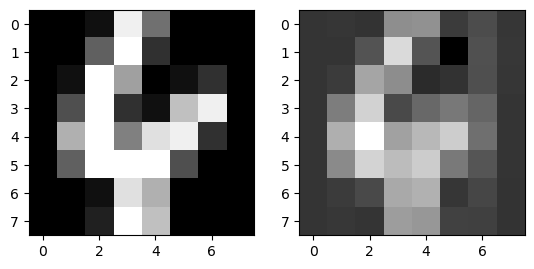

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt


k= 101
reconstruction = model.predict(train[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(train[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

The same for test

1/1 [==============================] - 0s 9ms/step


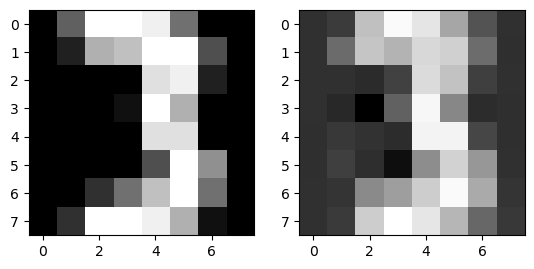

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


k= 10
reconstruction = model.predict(test[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

# Learning representations and pretraining

Let us use the intermediate representation for something.

In [6]:
tf.keras.backend.clear_session()

input_img = keras.Input(shape=(64,), name="image")
labels = keras.layers.Input(name="label", shape=(None,))

x = keras.layers.Dropout(0.1)(input_img)
x = keras.layers.Dense(32,activation="relu")(x)
x = keras.layers.Dense(16,activation="relu")(x)
encoder_output = keras.layers.Dense(2,activation="relu",name="encoder_output")(x)
x = keras.layers.Dense(16,activation="relu")(encoder_output)
x = keras.layers.Dense(32,activation="relu")(x)
decoder_output = keras.layers.Dense(64)(x)
model = keras.Model(inputs=input_img, outputs=decoder_output, name="a_model")

#keras.utils.plot_model(model, "autoencoder.png", show_shapes=True)

In [7]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(train, train, batch_size=64, epochs=2000, validation_split=0.2)


Epoch 1/2000


2022-08-31 18:00:46.460238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 1s 18ms/step - loss: 42.7836 - accuracy: 0.0118 - val_loss: 25.8767 - val_accuracy: 0.0118
Epoch 2/2000
13/22 [================>.............] - ETA: 0s - loss: 22.7580 - accuracy: 0.0132

2022-08-31 18:00:46.993528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 11ms/step - loss: 21.5287 - accuracy: 0.0111 - val_loss: 18.8962 - val_accuracy: 0.0118
Epoch 3/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.7964 - accuracy: 0.0442 - val_loss: 18.5285 - val_accuracy: 0.0235
Epoch 4/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.6220 - accuracy: 0.0612 - val_loss: 18.5362 - val_accuracy: 0.1235
Epoch 5/2000
22/22 [==============================] - 0s 11ms/step - loss: 18.5344 - accuracy: 0.0722 - val_loss: 18.4691 - val_accuracy: 0.0118
Epoch 6/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.5087 - accuracy: 0.0825 - val_loss: 18.4663 - val_accuracy: 0.2176
Epoch 7/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.4701 - accuracy: 0.0597 - val_loss: 18.5662 - val_accuracy: 0.0118
Epoch 8/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.4811 - accuracy: 0.0936 - val_loss: 18.3981 - val_accuracy: 0.217

22/22 [==============================] - 0s 10ms/step - loss: 18.3622 - accuracy: 0.0980 - val_loss: 18.4008 - val_accuracy: 0.0676
Epoch 59/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3562 - accuracy: 0.0811 - val_loss: 18.4838 - val_accuracy: 0.0118
Epoch 60/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3622 - accuracy: 0.0811 - val_loss: 18.3626 - val_accuracy: 0.0118
Epoch 61/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3730 - accuracy: 0.1127 - val_loss: 18.5236 - val_accuracy: 0.1176
Epoch 62/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3578 - accuracy: 0.0553 - val_loss: 18.4383 - val_accuracy: 0.1176
Epoch 63/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3486 - accuracy: 0.0973 - val_loss: 18.7006 - val_accuracy: 0.1235
Epoch 64/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3771 - accuracy: 0.1076 - val_loss: 18.3077 - val_accuracy:

22/22 [==============================] - 0s 10ms/step - loss: 18.3292 - accuracy: 0.1083 - val_loss: 18.3892 - val_accuracy: 0.1235
Epoch 115/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3233 - accuracy: 0.0722 - val_loss: 18.4131 - val_accuracy: 0.1206
Epoch 116/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3176 - accuracy: 0.1282 - val_loss: 18.3983 - val_accuracy: 0.2176
Epoch 117/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3328 - accuracy: 0.0914 - val_loss: 18.3425 - val_accuracy: 0.0118
Epoch 118/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3215 - accuracy: 0.0951 - val_loss: 18.5592 - val_accuracy: 0.1176
Epoch 119/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3228 - accuracy: 0.0508 - val_loss: 18.4347 - val_accuracy: 0.1147
Epoch 120/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3404 - accuracy: 0.1253 - val_loss: 18.3676 - val_acc

Epoch 170/2000
22/22 [==============================] - 0s 11ms/step - loss: 18.3001 - accuracy: 0.1076 - val_loss: 18.7143 - val_accuracy: 0.1235
Epoch 171/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3070 - accuracy: 0.0936 - val_loss: 18.3260 - val_accuracy: 0.0088
Epoch 172/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2957 - accuracy: 0.0597 - val_loss: 18.4865 - val_accuracy: 0.1235
Epoch 173/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3206 - accuracy: 0.1054 - val_loss: 18.4765 - val_accuracy: 0.0118
Epoch 174/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3005 - accuracy: 0.0339 - val_loss: 18.3816 - val_accuracy: 0.1088
Epoch 175/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3031 - accuracy: 0.0818 - val_loss: 18.4358 - val_accuracy: 0.1235
Epoch 176/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.3049 - accuracy: 0.0943 - val_loss: 18

Epoch 226/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2818 - accuracy: 0.1010 - val_loss: 18.3254 - val_accuracy: 0.0118
Epoch 227/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2778 - accuracy: 0.0486 - val_loss: 18.4650 - val_accuracy: 0.0059
Epoch 228/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2794 - accuracy: 0.0442 - val_loss: 18.3797 - val_accuracy: 0.1147
Epoch 229/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2835 - accuracy: 0.1113 - val_loss: 18.3918 - val_accuracy: 0.0118
Epoch 230/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2646 - accuracy: 0.0538 - val_loss: 18.6196 - val_accuracy: 0.0529
Epoch 231/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2803 - accuracy: 0.0752 - val_loss: 18.3318 - val_accuracy: 0.0118
Epoch 232/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2811 - accuracy: 0.0405 - val_loss: 18

Epoch 282/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2589 - accuracy: 0.0442 - val_loss: 18.3802 - val_accuracy: 0.0441
Epoch 283/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2503 - accuracy: 0.0958 - val_loss: 18.3408 - val_accuracy: 0.0235
Epoch 284/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2586 - accuracy: 0.0464 - val_loss: 18.4248 - val_accuracy: 0.0588
Epoch 285/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2595 - accuracy: 0.0626 - val_loss: 18.4665 - val_accuracy: 0.0118
Epoch 286/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2457 - accuracy: 0.0317 - val_loss: 18.5095 - val_accuracy: 0.1147
Epoch 287/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2505 - accuracy: 0.1304 - val_loss: 18.3283 - val_accuracy: 0.1147
Epoch 288/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2527 - accuracy: 0.0818 - val_loss: 18

Epoch 338/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2104 - accuracy: 0.1105 - val_loss: 18.4160 - val_accuracy: 0.0382
Epoch 339/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2049 - accuracy: 0.0671 - val_loss: 18.2395 - val_accuracy: 0.1206
Epoch 340/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2082 - accuracy: 0.1017 - val_loss: 18.3284 - val_accuracy: 0.0412
Epoch 341/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2049 - accuracy: 0.0906 - val_loss: 18.2349 - val_accuracy: 0.0118
Epoch 342/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2007 - accuracy: 0.0951 - val_loss: 18.2287 - val_accuracy: 0.0412
Epoch 343/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2045 - accuracy: 0.0693 - val_loss: 18.3267 - val_accuracy: 0.0618
Epoch 344/2000
22/22 [==============================] - 0s 10ms/step - loss: 18.2001 - accuracy: 0.1032 - val_loss: 18

Epoch 394/2000
22/22 [==============================] - 0s 10ms/step - loss: 17.9876 - accuracy: 0.1783 - val_loss: 18.0827 - val_accuracy: 0.0500
Epoch 395/2000
22/22 [==============================] - 0s 10ms/step - loss: 17.9758 - accuracy: 0.1076 - val_loss: 18.0365 - val_accuracy: 0.1412
Epoch 396/2000
22/22 [==============================] - 0s 10ms/step - loss: 17.9595 - accuracy: 0.1629 - val_loss: 18.0379 - val_accuracy: 0.1382
Epoch 397/2000
22/22 [==============================] - 0s 10ms/step - loss: 17.9442 - accuracy: 0.1724 - val_loss: 18.3438 - val_accuracy: 0.0794
Epoch 398/2000
22/22 [==============================] - 0s 10ms/step - loss: 17.9298 - accuracy: 0.1621 - val_loss: 18.5097 - val_accuracy: 0.0676
Epoch 399/2000
22/22 [==============================] - 0s 10ms/step - loss: 17.9216 - accuracy: 0.1113 - val_loss: 18.0387 - val_accuracy: 0.1441
Epoch 400/2000
22/22 [==============================] - 0s 10ms/step - loss: 17.9072 - accuracy: 0.1857 - val_loss: 17

Epoch 450/2000
22/22 [==============================] - 0s 10ms/step - loss: 16.6358 - accuracy: 0.1216 - val_loss: 17.1737 - val_accuracy: 0.1059
Epoch 451/2000
22/22 [==============================] - 0s 10ms/step - loss: 16.6232 - accuracy: 0.1076 - val_loss: 16.8653 - val_accuracy: 0.0794
Epoch 452/2000
22/22 [==============================] - 0s 10ms/step - loss: 16.6160 - accuracy: 0.0943 - val_loss: 16.9714 - val_accuracy: 0.0735
Epoch 453/2000
22/22 [==============================] - 0s 10ms/step - loss: 16.6085 - accuracy: 0.0921 - val_loss: 16.6613 - val_accuracy: 0.0676
Epoch 454/2000
22/22 [==============================] - 0s 10ms/step - loss: 16.5948 - accuracy: 0.0884 - val_loss: 17.0174 - val_accuracy: 0.1000
Epoch 455/2000
22/22 [==============================] - 0s 10ms/step - loss: 16.5826 - accuracy: 0.1010 - val_loss: 16.6658 - val_accuracy: 0.0706
Epoch 456/2000
22/22 [==============================] - 0s 10ms/step - loss: 16.5740 - accuracy: 0.0980 - val_loss: 16

Epoch 506/2000
22/22 [==============================] - 0s 10ms/step - loss: 15.7613 - accuracy: 0.0612 - val_loss: 16.1240 - val_accuracy: 0.0647
Epoch 507/2000
22/22 [==============================] - 0s 10ms/step - loss: 15.7308 - accuracy: 0.0604 - val_loss: 16.0371 - val_accuracy: 0.0588
Epoch 508/2000
22/22 [==============================] - 0s 10ms/step - loss: 15.7045 - accuracy: 0.0545 - val_loss: 16.2452 - val_accuracy: 0.0647
Epoch 509/2000
22/22 [==============================] - 0s 10ms/step - loss: 15.6831 - accuracy: 0.0508 - val_loss: 16.1409 - val_accuracy: 0.0559
Epoch 510/2000
22/22 [==============================] - 0s 10ms/step - loss: 15.6626 - accuracy: 0.0420 - val_loss: 15.9874 - val_accuracy: 0.0706
Epoch 511/2000
22/22 [==============================] - 0s 10ms/step - loss: 15.6242 - accuracy: 0.0413 - val_loss: 15.8730 - val_accuracy: 0.0588
Epoch 512/2000
22/22 [==============================] - 0s 10ms/step - loss: 15.6111 - accuracy: 0.0435 - val_loss: 16

Epoch 562/2000
22/22 [==============================] - 0s 10ms/step - loss: 11.5500 - accuracy: 0.1275 - val_loss: 11.9481 - val_accuracy: 0.0941
Epoch 563/2000
22/22 [==============================] - 0s 10ms/step - loss: 11.5261 - accuracy: 0.1231 - val_loss: 12.0154 - val_accuracy: 0.1118
Epoch 564/2000
22/22 [==============================] - 0s 10ms/step - loss: 11.4882 - accuracy: 0.1127 - val_loss: 11.9384 - val_accuracy: 0.1029
Epoch 565/2000
22/22 [==============================] - 0s 10ms/step - loss: 11.4460 - accuracy: 0.0943 - val_loss: 11.8527 - val_accuracy: 0.0971
Epoch 566/2000
22/22 [==============================] - 0s 10ms/step - loss: 11.4497 - accuracy: 0.1113 - val_loss: 11.8642 - val_accuracy: 0.0971
Epoch 567/2000
22/22 [==============================] - 0s 10ms/step - loss: 11.3956 - accuracy: 0.1024 - val_loss: 11.8236 - val_accuracy: 0.0912
Epoch 568/2000
22/22 [==============================] - 0s 10ms/step - loss: 11.3797 - accuracy: 0.1017 - val_loss: 11

Epoch 618/2000
22/22 [==============================] - 0s 10ms/step - loss: 10.5766 - accuracy: 0.0730 - val_loss: 11.0975 - val_accuracy: 0.0647
Epoch 619/2000
22/22 [==============================] - 0s 10ms/step - loss: 10.6276 - accuracy: 0.0789 - val_loss: 11.0312 - val_accuracy: 0.0353
Epoch 620/2000
22/22 [==============================] - 0s 10ms/step - loss: 10.5750 - accuracy: 0.0678 - val_loss: 11.0667 - val_accuracy: 0.0471
Epoch 621/2000
22/22 [==============================] - 0s 10ms/step - loss: 10.5588 - accuracy: 0.0737 - val_loss: 11.4274 - val_accuracy: 0.0471
Epoch 622/2000
22/22 [==============================] - 0s 10ms/step - loss: 10.5164 - accuracy: 0.0752 - val_loss: 11.1975 - val_accuracy: 0.0588
Epoch 623/2000
22/22 [==============================] - 0s 10ms/step - loss: 10.5362 - accuracy: 0.0715 - val_loss: 11.2367 - val_accuracy: 0.0441
Epoch 624/2000
22/22 [==============================] - 0s 10ms/step - loss: 10.5309 - accuracy: 0.0752 - val_loss: 11

Epoch 674/2000
22/22 [==============================] - 0s 10ms/step - loss: 10.1012 - accuracy: 0.0855 - val_loss: 10.6766 - val_accuracy: 0.0853
Epoch 675/2000
22/22 [==============================] - 0s 10ms/step - loss: 10.1107 - accuracy: 0.1098 - val_loss: 10.8640 - val_accuracy: 0.1029
Epoch 676/2000
22/22 [==============================] - 0s 10ms/step - loss: 10.0687 - accuracy: 0.0884 - val_loss: 10.9166 - val_accuracy: 0.0382
Epoch 677/2000
22/22 [==============================] - 0s 10ms/step - loss: 10.0843 - accuracy: 0.0803 - val_loss: 10.7919 - val_accuracy: 0.0706
Epoch 678/2000
22/22 [==============================] - 0s 10ms/step - loss: 10.0751 - accuracy: 0.0951 - val_loss: 10.7098 - val_accuracy: 0.0559
Epoch 679/2000
22/22 [==============================] - 0s 10ms/step - loss: 10.0523 - accuracy: 0.0892 - val_loss: 10.7105 - val_accuracy: 0.1059
Epoch 680/2000
22/22 [==============================] - 0s 10ms/step - loss: 10.1196 - accuracy: 0.0995 - val_loss: 10

22/22 [==============================] - 0s 10ms/step - loss: 9.6761 - accuracy: 0.1150 - val_loss: 10.4823 - val_accuracy: 0.0471
Epoch 731/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.6894 - accuracy: 0.0892 - val_loss: 10.5666 - val_accuracy: 0.1147
Epoch 732/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.8001 - accuracy: 0.1083 - val_loss: 10.5576 - val_accuracy: 0.0618
Epoch 733/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.7561 - accuracy: 0.0906 - val_loss: 10.3512 - val_accuracy: 0.0647
Epoch 734/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.6809 - accuracy: 0.1024 - val_loss: 10.4088 - val_accuracy: 0.0735
Epoch 735/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.7071 - accuracy: 0.0877 - val_loss: 10.5935 - val_accuracy: 0.0618
Epoch 736/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.6980 - accuracy: 0.0995 - val_loss: 10.4218 - val_accuracy: 

22/22 [==============================] - 0s 10ms/step - loss: 9.4106 - accuracy: 0.1098 - val_loss: 10.1099 - val_accuracy: 0.0912
Epoch 787/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.4126 - accuracy: 0.1120 - val_loss: 10.2647 - val_accuracy: 0.0765
Epoch 788/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.4906 - accuracy: 0.0943 - val_loss: 10.0867 - val_accuracy: 0.0676
Epoch 789/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.4325 - accuracy: 0.0914 - val_loss: 10.1709 - val_accuracy: 0.1118
Epoch 790/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.5176 - accuracy: 0.1069 - val_loss: 10.0624 - val_accuracy: 0.1000
Epoch 791/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.4216 - accuracy: 0.1120 - val_loss: 10.0527 - val_accuracy: 0.0853
Epoch 792/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.4075 - accuracy: 0.1076 - val_loss: 10.1420 - val_accuracy: 

22/22 [==============================] - 0s 10ms/step - loss: 9.2758 - accuracy: 0.0995 - val_loss: 9.8567 - val_accuracy: 0.1000
Epoch 843/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.2731 - accuracy: 0.1150 - val_loss: 9.9835 - val_accuracy: 0.0941
Epoch 844/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.2927 - accuracy: 0.1024 - val_loss: 9.9298 - val_accuracy: 0.0912
Epoch 845/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.2494 - accuracy: 0.1002 - val_loss: 9.9694 - val_accuracy: 0.0765
Epoch 846/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.2840 - accuracy: 0.0877 - val_loss: 10.0192 - val_accuracy: 0.1118
Epoch 847/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.2966 - accuracy: 0.1209 - val_loss: 10.1653 - val_accuracy: 0.1118
Epoch 848/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.2430 - accuracy: 0.1120 - val_loss: 9.8666 - val_accuracy: 0.052

22/22 [==============================] - 0s 10ms/step - loss: 9.1550 - accuracy: 0.1127 - val_loss: 9.7939 - val_accuracy: 0.0794
Epoch 899/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.1088 - accuracy: 0.1091 - val_loss: 9.9764 - val_accuracy: 0.0912
Epoch 900/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.0794 - accuracy: 0.1083 - val_loss: 9.7451 - val_accuracy: 0.0500
Epoch 901/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.1003 - accuracy: 0.1069 - val_loss: 9.7859 - val_accuracy: 0.0912
Epoch 902/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.1165 - accuracy: 0.1098 - val_loss: 9.7989 - val_accuracy: 0.1000
Epoch 903/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.0861 - accuracy: 0.1046 - val_loss: 9.7580 - val_accuracy: 0.0676
Epoch 904/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.0644 - accuracy: 0.1061 - val_loss: 9.8643 - val_accuracy: 0.0853


22/22 [==============================] - 0s 10ms/step - loss: 8.9512 - accuracy: 0.1010 - val_loss: 9.7282 - val_accuracy: 0.0824
Epoch 955/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.9223 - accuracy: 0.1290 - val_loss: 9.7921 - val_accuracy: 0.0971
Epoch 956/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.9222 - accuracy: 0.1127 - val_loss: 9.8171 - val_accuracy: 0.0794
Epoch 957/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.9800 - accuracy: 0.1054 - val_loss: 9.9183 - val_accuracy: 0.1029
Epoch 958/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.9700 - accuracy: 0.1135 - val_loss: 10.0449 - val_accuracy: 0.0588
Epoch 959/2000
22/22 [==============================] - 0s 10ms/step - loss: 9.0146 - accuracy: 0.1091 - val_loss: 10.2391 - val_accuracy: 0.0853
Epoch 960/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.9892 - accuracy: 0.1245 - val_loss: 9.7756 - val_accuracy: 0.082

22/22 [==============================] - 0s 10ms/step - loss: 8.8805 - accuracy: 0.1054 - val_loss: 9.6509 - val_accuracy: 0.0912
Epoch 1011/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.8753 - accuracy: 0.1157 - val_loss: 9.6869 - val_accuracy: 0.1029
Epoch 1012/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.8191 - accuracy: 0.1135 - val_loss: 9.7723 - val_accuracy: 0.0882
Epoch 1013/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.8631 - accuracy: 0.1216 - val_loss: 9.6749 - val_accuracy: 0.0794
Epoch 1014/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.8287 - accuracy: 0.1127 - val_loss: 9.6627 - val_accuracy: 0.0912
Epoch 1015/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.8070 - accuracy: 0.1024 - val_loss: 9.8297 - val_accuracy: 0.0941
Epoch 1016/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.8293 - accuracy: 0.1091 - val_loss: 9.5640 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.7695 - accuracy: 0.1105 - val_loss: 9.4332 - val_accuracy: 0.0912
Epoch 1067/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.7481 - accuracy: 0.1304 - val_loss: 9.5892 - val_accuracy: 0.0647
Epoch 1068/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.7727 - accuracy: 0.1120 - val_loss: 9.7060 - val_accuracy: 0.1029
Epoch 1069/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.7393 - accuracy: 0.1172 - val_loss: 9.5987 - val_accuracy: 0.0882
Epoch 1070/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.7218 - accuracy: 0.1172 - val_loss: 9.7516 - val_accuracy: 0.0941
Epoch 1071/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.7365 - accuracy: 0.1113 - val_loss: 9.7377 - val_accuracy: 0.0794
Epoch 1072/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.7516 - accuracy: 0.1142 - val_loss: 9.4035 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.6566 - accuracy: 0.1105 - val_loss: 9.5702 - val_accuracy: 0.1059
Epoch 1123/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.6008 - accuracy: 0.1113 - val_loss: 9.5118 - val_accuracy: 0.1029
Epoch 1124/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.6307 - accuracy: 0.1113 - val_loss: 9.6042 - val_accuracy: 0.0706
Epoch 1125/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.6147 - accuracy: 0.1231 - val_loss: 9.5501 - val_accuracy: 0.0882
Epoch 1126/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.6731 - accuracy: 0.1039 - val_loss: 9.3533 - val_accuracy: 0.0971
Epoch 1127/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.5981 - accuracy: 0.1142 - val_loss: 9.4767 - val_accuracy: 0.0765
Epoch 1128/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.6205 - accuracy: 0.1253 - val_loss: 9.5245 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.5511 - accuracy: 0.1157 - val_loss: 9.3475 - val_accuracy: 0.0824
Epoch 1179/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.5605 - accuracy: 0.1135 - val_loss: 9.3329 - val_accuracy: 0.0941
Epoch 1180/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.5340 - accuracy: 0.1157 - val_loss: 9.3092 - val_accuracy: 0.0794
Epoch 1181/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.6229 - accuracy: 0.1201 - val_loss: 9.5496 - val_accuracy: 0.0559
Epoch 1182/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.5784 - accuracy: 0.1194 - val_loss: 9.2496 - val_accuracy: 0.0882
Epoch 1183/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.5643 - accuracy: 0.1091 - val_loss: 9.2927 - val_accuracy: 0.0912
Epoch 1184/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.5669 - accuracy: 0.1076 - val_loss: 9.5132 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.4648 - accuracy: 0.1216 - val_loss: 9.4873 - val_accuracy: 0.0971
Epoch 1235/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.4589 - accuracy: 0.1245 - val_loss: 9.2074 - val_accuracy: 0.0765
Epoch 1236/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.4297 - accuracy: 0.1105 - val_loss: 9.3453 - val_accuracy: 0.0735
Epoch 1237/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.5145 - accuracy: 0.1201 - val_loss: 9.4758 - val_accuracy: 0.0853
Epoch 1238/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.4888 - accuracy: 0.1091 - val_loss: 9.1345 - val_accuracy: 0.1088
Epoch 1239/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.4269 - accuracy: 0.1194 - val_loss: 9.2489 - val_accuracy: 0.0647
Epoch 1240/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.4395 - accuracy: 0.1098 - val_loss: 9.5327 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.4164 - accuracy: 0.1201 - val_loss: 9.2965 - val_accuracy: 0.0941
Epoch 1291/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.4861 - accuracy: 0.1164 - val_loss: 9.3323 - val_accuracy: 0.1088
Epoch 1292/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.3253 - accuracy: 0.1091 - val_loss: 9.6259 - val_accuracy: 0.0912
Epoch 1293/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.4579 - accuracy: 0.1113 - val_loss: 9.1880 - val_accuracy: 0.0853
Epoch 1294/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.3486 - accuracy: 0.1120 - val_loss: 9.0652 - val_accuracy: 0.0824
Epoch 1295/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.3894 - accuracy: 0.1216 - val_loss: 9.3101 - val_accuracy: 0.0941
Epoch 1296/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.4311 - accuracy: 0.1127 - val_loss: 9.1808 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.3820 - accuracy: 0.1312 - val_loss: 9.5998 - val_accuracy: 0.0676
Epoch 1347/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.3902 - accuracy: 0.1120 - val_loss: 9.4660 - val_accuracy: 0.1000
Epoch 1348/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.3740 - accuracy: 0.1186 - val_loss: 9.3617 - val_accuracy: 0.0765
Epoch 1349/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.3629 - accuracy: 0.1172 - val_loss: 9.3398 - val_accuracy: 0.1147
Epoch 1350/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.4063 - accuracy: 0.1157 - val_loss: 9.1215 - val_accuracy: 0.1000
Epoch 1351/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.3540 - accuracy: 0.1120 - val_loss: 9.2233 - val_accuracy: 0.0647
Epoch 1352/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.3387 - accuracy: 0.1209 - val_loss: 9.2472 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.2778 - accuracy: 0.1223 - val_loss: 9.0070 - val_accuracy: 0.0912
Epoch 1403/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.2956 - accuracy: 0.1135 - val_loss: 9.4185 - val_accuracy: 0.1000
Epoch 1404/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.2721 - accuracy: 0.1164 - val_loss: 9.2192 - val_accuracy: 0.0912
Epoch 1405/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.2533 - accuracy: 0.1135 - val_loss: 9.1766 - val_accuracy: 0.0735
Epoch 1406/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.3846 - accuracy: 0.1105 - val_loss: 9.3532 - val_accuracy: 0.1353
Epoch 1407/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.3297 - accuracy: 0.1157 - val_loss: 8.9796 - val_accuracy: 0.1118
Epoch 1408/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.3979 - accuracy: 0.1238 - val_loss: 9.2980 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.2288 - accuracy: 0.1268 - val_loss: 9.2071 - val_accuracy: 0.0882
Epoch 1459/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.2026 - accuracy: 0.1179 - val_loss: 9.0503 - val_accuracy: 0.1029
Epoch 1460/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.1813 - accuracy: 0.1371 - val_loss: 9.0544 - val_accuracy: 0.0735
Epoch 1461/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.2391 - accuracy: 0.1245 - val_loss: 9.3934 - val_accuracy: 0.1088
Epoch 1462/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.2198 - accuracy: 0.1290 - val_loss: 9.0321 - val_accuracy: 0.0941
Epoch 1463/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.1943 - accuracy: 0.1120 - val_loss: 9.0928 - val_accuracy: 0.1029
Epoch 1464/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.2710 - accuracy: 0.1164 - val_loss: 9.0355 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.2243 - accuracy: 0.1150 - val_loss: 9.3081 - val_accuracy: 0.0912
Epoch 1515/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.2381 - accuracy: 0.1209 - val_loss: 9.1985 - val_accuracy: 0.1059
Epoch 1516/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.2514 - accuracy: 0.1304 - val_loss: 9.0611 - val_accuracy: 0.0765
Epoch 1517/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.1628 - accuracy: 0.1297 - val_loss: 9.0970 - val_accuracy: 0.0676
Epoch 1518/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.2199 - accuracy: 0.1238 - val_loss: 8.9409 - val_accuracy: 0.0853
Epoch 1519/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.1491 - accuracy: 0.1341 - val_loss: 8.8844 - val_accuracy: 0.0618
Epoch 1520/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.2117 - accuracy: 0.1098 - val_loss: 9.1349 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.1919 - accuracy: 0.1179 - val_loss: 8.9771 - val_accuracy: 0.1088
Epoch 1571/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.1320 - accuracy: 0.1245 - val_loss: 9.0510 - val_accuracy: 0.0824
Epoch 1572/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.2041 - accuracy: 0.1091 - val_loss: 9.0157 - val_accuracy: 0.1176
Epoch 1573/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.1452 - accuracy: 0.1349 - val_loss: 9.1397 - val_accuracy: 0.0941
Epoch 1574/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.1112 - accuracy: 0.1135 - val_loss: 9.4321 - val_accuracy: 0.0735
Epoch 1575/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.1326 - accuracy: 0.1039 - val_loss: 8.8884 - val_accuracy: 0.0794
Epoch 1576/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.1289 - accuracy: 0.1164 - val_loss: 8.9016 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.0959 - accuracy: 0.1164 - val_loss: 9.4437 - val_accuracy: 0.1176
Epoch 1627/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.0547 - accuracy: 0.1216 - val_loss: 8.8032 - val_accuracy: 0.0647
Epoch 1628/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.0840 - accuracy: 0.1010 - val_loss: 8.9962 - val_accuracy: 0.0588
Epoch 1629/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.0870 - accuracy: 0.1120 - val_loss: 8.8104 - val_accuracy: 0.0912
Epoch 1630/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.1141 - accuracy: 0.1179 - val_loss: 8.9644 - val_accuracy: 0.0853
Epoch 1631/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.1542 - accuracy: 0.1054 - val_loss: 8.8047 - val_accuracy: 0.1029
Epoch 1632/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.0993 - accuracy: 0.1186 - val_loss: 8.8740 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.0668 - accuracy: 0.1268 - val_loss: 8.7390 - val_accuracy: 0.0794
Epoch 1683/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.0084 - accuracy: 0.1179 - val_loss: 8.9352 - val_accuracy: 0.0882
Epoch 1684/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9602 - accuracy: 0.1150 - val_loss: 9.2849 - val_accuracy: 0.1382
Epoch 1685/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.0564 - accuracy: 0.1223 - val_loss: 9.0372 - val_accuracy: 0.1294
Epoch 1686/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.0707 - accuracy: 0.1334 - val_loss: 8.6988 - val_accuracy: 0.1118
Epoch 1687/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.0065 - accuracy: 0.1297 - val_loss: 8.7907 - val_accuracy: 0.1000
Epoch 1688/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.0992 - accuracy: 0.1231 - val_loss: 8.8304 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.0176 - accuracy: 0.1157 - val_loss: 8.8440 - val_accuracy: 0.1294
Epoch 1739/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9865 - accuracy: 0.1253 - val_loss: 9.1218 - val_accuracy: 0.0647
Epoch 1740/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.0493 - accuracy: 0.1127 - val_loss: 8.7641 - val_accuracy: 0.0853
Epoch 1741/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9713 - accuracy: 0.1231 - val_loss: 8.9595 - val_accuracy: 0.0735
Epoch 1742/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9906 - accuracy: 0.1135 - val_loss: 8.8472 - val_accuracy: 0.1176
Epoch 1743/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9885 - accuracy: 0.1179 - val_loss: 8.8584 - val_accuracy: 0.1265
Epoch 1744/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9580 - accuracy: 0.1304 - val_loss: 9.2090 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.0175 - accuracy: 0.1268 - val_loss: 8.6871 - val_accuracy: 0.1206
Epoch 1795/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9175 - accuracy: 0.1326 - val_loss: 8.9563 - val_accuracy: 0.1176
Epoch 1796/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9659 - accuracy: 0.1223 - val_loss: 8.8505 - val_accuracy: 0.1324
Epoch 1797/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9357 - accuracy: 0.1415 - val_loss: 8.6830 - val_accuracy: 0.1147
Epoch 1798/2000
22/22 [==============================] - 0s 10ms/step - loss: 8.0240 - accuracy: 0.1245 - val_loss: 8.8161 - val_accuracy: 0.0882
Epoch 1799/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9995 - accuracy: 0.1238 - val_loss: 8.5843 - val_accuracy: 0.0941
Epoch 1800/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9500 - accuracy: 0.1260 - val_loss: 8.7455 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.9971 - accuracy: 0.1172 - val_loss: 8.6630 - val_accuracy: 0.1529
Epoch 1851/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9126 - accuracy: 0.1282 - val_loss: 8.7615 - val_accuracy: 0.1059
Epoch 1852/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9688 - accuracy: 0.1268 - val_loss: 8.8090 - val_accuracy: 0.0853
Epoch 1853/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9546 - accuracy: 0.1172 - val_loss: 8.7835 - val_accuracy: 0.1265
Epoch 1854/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9122 - accuracy: 0.1393 - val_loss: 8.9359 - val_accuracy: 0.0735
Epoch 1855/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9455 - accuracy: 0.1076 - val_loss: 8.6591 - val_accuracy: 0.1176
Epoch 1856/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9217 - accuracy: 0.1201 - val_loss: 8.7479 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.9621 - accuracy: 0.1231 - val_loss: 8.7806 - val_accuracy: 0.0941
Epoch 1907/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9215 - accuracy: 0.1157 - val_loss: 8.7498 - val_accuracy: 0.1353
Epoch 1908/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9343 - accuracy: 0.1437 - val_loss: 8.8770 - val_accuracy: 0.1059
Epoch 1909/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9601 - accuracy: 0.1326 - val_loss: 8.8286 - val_accuracy: 0.0912
Epoch 1910/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9327 - accuracy: 0.1157 - val_loss: 8.9541 - val_accuracy: 0.1000
Epoch 1911/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.8886 - accuracy: 0.1356 - val_loss: 8.9847 - val_accuracy: 0.0912
Epoch 1912/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9222 - accuracy: 0.1297 - val_loss: 8.6728 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.8826 - accuracy: 0.1275 - val_loss: 8.5392 - val_accuracy: 0.1265
Epoch 1963/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.8812 - accuracy: 0.1172 - val_loss: 8.6454 - val_accuracy: 0.1088
Epoch 1964/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.8575 - accuracy: 0.1238 - val_loss: 8.6346 - val_accuracy: 0.0971
Epoch 1965/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.8857 - accuracy: 0.1253 - val_loss: 8.7705 - val_accuracy: 0.1088
Epoch 1966/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9124 - accuracy: 0.1312 - val_loss: 8.5925 - val_accuracy: 0.1029
Epoch 1967/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.8259 - accuracy: 0.1304 - val_loss: 8.9472 - val_accuracy: 0.1588
Epoch 1968/2000
22/22 [==============================] - 0s 10ms/step - loss: 7.9414 - accuracy: 0.1385 - val_loss: 8.6841 - val_accuracy: 0

In [8]:
test_scores = model.evaluate(test, test, verbose=2)

4/4 - 0s - loss: 8.5216 - accuracy: 0.0900 - 60ms/epoch - 15ms/step


1/1 [==============================] - 0s 42ms/step


2022-08-31 18:08:01.552210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


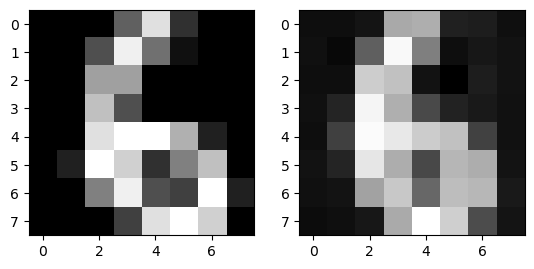

In [9]:
k= 5
reconstruction = model.predict(test[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

In [10]:
model.save("damodel")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("damodel")

INFO:tensorflow:Assets written to: damodel/assets


1/1 [==============================] - 0s 44ms/step


2022-08-31 18:08:02.808872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


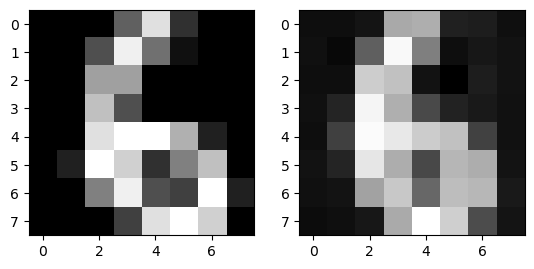

In [11]:
k= 5
reconstruction = model.predict(test[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

In [12]:
feature_ext = keras.Model(inputs=input_img, outputs=encoder_output)


In [13]:
code = feature_ext(train)

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(32,random_state=0)
clf.fit(code,train_y)

clf2 = RandomForestClassifier(32,random_state=0)
clf2.fit(train,train_y)

RandomForestClassifier(n_estimators=32, random_state=0)

In [15]:
print(code)

tf.Tensor(
[[ 0.        62.2867   ]
 [ 4.3565865  9.557279 ]
 [17.631908  32.293034 ]
 ...
 [14.242662   0.       ]
 [14.994687  51.166386 ]
 [11.412943   0.       ]], shape=(1697, 2), dtype=float32)


In [16]:
code = feature_ext(test)
print(clf.score(code,test_y))
print(clf2.score(test,test_y))

0.81
0.97


With just 2 features??????

In [17]:
code[1,:],test_y[1]

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 6.5122676, 10.432506 ], dtype=float32)>,
 5)

# Physical vs Logical bottlenecks: Sparse coding

Let us try a logical bottleneck.

In [18]:
from tensorflow.keras import layers


tf.keras.backend.clear_session()

class SparseRegularizationLayer(layers.Layer):
    def call(self, inputs):
        self.add_loss(tf.reduce_sum(tf.abs(inputs))*0.001)
        return inputs  # Pass-through layer.



input_img = keras.Input(shape=(64,), name="image")
labels = keras.layers.Input(name="label", shape=(None,))

x = keras.layers.Dropout(0.1)(input_img)
x = keras.layers.Dense(128,activation="relu")(x)
x = keras.layers.Dense(256,activation="relu")(x)
x = keras.layers.Dense(512,activation="relu")(x)
encoder_output = SparseRegularizationLayer()(x)
x = keras.layers.Dense(256,activation="relu")(encoder_output)
x = keras.layers.Dense(128,activation="relu")(x)
decoder_output = keras.layers.Dense(64)(x)
model = keras.Model(inputs=input_img, outputs=decoder_output, name="a_model")


In [19]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(train, train, batch_size=64, epochs=2000, validation_split=0.2)


Epoch 1/2000


2022-08-31 18:08:03.615773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 1s 19ms/step - loss: 33.9480 - accuracy: 0.0472 - val_loss: 22.2869 - val_accuracy: 0.1206
Epoch 2/2000
 7/22 [========>.....................] - ETA: 0s - loss: 22.0004 - accuracy: 0.1228

2022-08-31 18:08:04.148974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 13ms/step - loss: 20.8893 - accuracy: 0.1349 - val_loss: 18.5079 - val_accuracy: 0.1176
Epoch 3/2000
22/22 [==============================] - 0s 11ms/step - loss: 17.4376 - accuracy: 0.1282 - val_loss: 15.8620 - val_accuracy: 0.1324
Epoch 4/2000
22/22 [==============================] - 0s 11ms/step - loss: 15.3743 - accuracy: 0.1054 - val_loss: 13.5427 - val_accuracy: 0.0559
Epoch 5/2000
22/22 [==============================] - 0s 10ms/step - loss: 13.6928 - accuracy: 0.1010 - val_loss: 13.2545 - val_accuracy: 0.0971
Epoch 6/2000
22/22 [==============================] - 0s 11ms/step - loss: 12.6730 - accuracy: 0.1113 - val_loss: 10.9375 - val_accuracy: 0.1000
Epoch 7/2000
22/22 [==============================] - 0s 11ms/step - loss: 11.6332 - accuracy: 0.1061 - val_loss: 10.1533 - val_accuracy: 0.0647
Epoch 8/2000
22/22 [==============================] - 0s 11ms/step - loss: 11.1081 - accuracy: 0.0862 - val_loss: 11.4580 - val_accuracy: 0.061

Epoch 59/2000
22/22 [==============================] - 0s 11ms/step - loss: 4.0276 - accuracy: 0.1393 - val_loss: 5.3512 - val_accuracy: 0.0912
Epoch 60/2000
22/22 [==============================] - 0s 11ms/step - loss: 4.1463 - accuracy: 0.1216 - val_loss: 4.8320 - val_accuracy: 0.1000
Epoch 61/2000
22/22 [==============================] - 0s 11ms/step - loss: 4.0246 - accuracy: 0.1356 - val_loss: 4.7930 - val_accuracy: 0.0971
Epoch 62/2000
22/22 [==============================] - 0s 11ms/step - loss: 4.0057 - accuracy: 0.1245 - val_loss: 4.4429 - val_accuracy: 0.1471
Epoch 63/2000
22/22 [==============================] - 0s 11ms/step - loss: 3.9256 - accuracy: 0.1268 - val_loss: 4.1052 - val_accuracy: 0.1206
Epoch 64/2000
22/22 [==============================] - 0s 11ms/step - loss: 3.8923 - accuracy: 0.1201 - val_loss: 4.2602 - val_accuracy: 0.1588
Epoch 65/2000
22/22 [==============================] - 0s 12ms/step - loss: 3.9030 - accuracy: 0.1319 - val_loss: 4.2183 - val_accuracy:

Epoch 116/2000
22/22 [==============================] - 0s 10ms/step - loss: 2.7023 - accuracy: 0.1437 - val_loss: 3.7967 - val_accuracy: 0.1412
Epoch 117/2000
22/22 [==============================] - 0s 10ms/step - loss: 2.6656 - accuracy: 0.1408 - val_loss: 3.7120 - val_accuracy: 0.0706
Epoch 118/2000
22/22 [==============================] - 0s 11ms/step - loss: 2.6646 - accuracy: 0.1415 - val_loss: 3.6751 - val_accuracy: 0.0941
Epoch 119/2000
22/22 [==============================] - 0s 11ms/step - loss: 2.6204 - accuracy: 0.1511 - val_loss: 3.6080 - val_accuracy: 0.1059
Epoch 120/2000
22/22 [==============================] - 0s 10ms/step - loss: 2.6465 - accuracy: 0.1400 - val_loss: 3.7270 - val_accuracy: 0.1147
Epoch 121/2000
22/22 [==============================] - 0s 10ms/step - loss: 2.6075 - accuracy: 0.1592 - val_loss: 3.6153 - val_accuracy: 0.1088
Epoch 122/2000
22/22 [==============================] - 0s 10ms/step - loss: 2.5955 - accuracy: 0.1371 - val_loss: 4.1095 - val_ac

22/22 [==============================] - 0s 10ms/step - loss: 2.1145 - accuracy: 0.1400 - val_loss: 3.4580 - val_accuracy: 0.1029
Epoch 173/2000
22/22 [==============================] - 0s 10ms/step - loss: 2.0614 - accuracy: 0.1511 - val_loss: 3.6333 - val_accuracy: 0.1235
Epoch 174/2000
22/22 [==============================] - 0s 10ms/step - loss: 2.0952 - accuracy: 0.1422 - val_loss: 3.5608 - val_accuracy: 0.1176
Epoch 175/2000
22/22 [==============================] - 0s 10ms/step - loss: 2.0588 - accuracy: 0.1621 - val_loss: 3.6679 - val_accuracy: 0.1176
Epoch 176/2000
22/22 [==============================] - 0s 11ms/step - loss: 2.0092 - accuracy: 0.1658 - val_loss: 3.7512 - val_accuracy: 0.0794
Epoch 177/2000
22/22 [==============================] - 0s 10ms/step - loss: 2.0146 - accuracy: 0.1548 - val_loss: 3.4567 - val_accuracy: 0.1294
Epoch 178/2000
22/22 [==============================] - 0s 10ms/step - loss: 2.0402 - accuracy: 0.1636 - val_loss: 3.6184 - val_accuracy: 0.1324


22/22 [==============================] - 0s 11ms/step - loss: 1.7487 - accuracy: 0.1533 - val_loss: 3.4653 - val_accuracy: 0.1471
Epoch 229/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.7190 - accuracy: 0.1570 - val_loss: 3.5374 - val_accuracy: 0.1118
Epoch 230/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.7229 - accuracy: 0.1584 - val_loss: 3.5096 - val_accuracy: 0.1382
Epoch 231/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.7294 - accuracy: 0.1688 - val_loss: 3.4598 - val_accuracy: 0.1088
Epoch 232/2000
22/22 [==============================] - 0s 10ms/step - loss: 1.7305 - accuracy: 0.1717 - val_loss: 3.7266 - val_accuracy: 0.1176
Epoch 233/2000
22/22 [==============================] - 0s 10ms/step - loss: 1.6850 - accuracy: 0.1761 - val_loss: 3.5686 - val_accuracy: 0.1118
Epoch 234/2000
22/22 [==============================] - 0s 10ms/step - loss: 1.7332 - accuracy: 0.1614 - val_loss: 3.4742 - val_accuracy: 0.1118


22/22 [==============================] - 0s 11ms/step - loss: 1.5117 - accuracy: 0.1717 - val_loss: 3.8274 - val_accuracy: 0.0971
Epoch 285/2000
22/22 [==============================] - 0s 10ms/step - loss: 1.4898 - accuracy: 0.1813 - val_loss: 3.6874 - val_accuracy: 0.0971
Epoch 286/2000
22/22 [==============================] - 0s 10ms/step - loss: 1.4691 - accuracy: 0.1695 - val_loss: 3.6279 - val_accuracy: 0.1324
Epoch 287/2000
22/22 [==============================] - 0s 10ms/step - loss: 1.4768 - accuracy: 0.1761 - val_loss: 3.6389 - val_accuracy: 0.0941
Epoch 288/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.4829 - accuracy: 0.1769 - val_loss: 3.8546 - val_accuracy: 0.1059
Epoch 289/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.4683 - accuracy: 0.1614 - val_loss: 3.6488 - val_accuracy: 0.1235
Epoch 290/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.4691 - accuracy: 0.1746 - val_loss: 3.5145 - val_accuracy: 0.1147


22/22 [==============================] - 0s 11ms/step - loss: 1.2850 - accuracy: 0.1791 - val_loss: 3.6022 - val_accuracy: 0.1206
Epoch 341/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.3577 - accuracy: 0.1717 - val_loss: 3.6165 - val_accuracy: 0.1059
Epoch 342/2000
22/22 [==============================] - 0s 10ms/step - loss: 1.3543 - accuracy: 0.1982 - val_loss: 3.4812 - val_accuracy: 0.1441
Epoch 343/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.2999 - accuracy: 0.1754 - val_loss: 3.5541 - val_accuracy: 0.1676
Epoch 344/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.3176 - accuracy: 0.1835 - val_loss: 3.5337 - val_accuracy: 0.1059
Epoch 345/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.2930 - accuracy: 0.1909 - val_loss: 3.6244 - val_accuracy: 0.1059
Epoch 346/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.2958 - accuracy: 0.1850 - val_loss: 3.6405 - val_accuracy: 0.1294


22/22 [==============================] - 0s 11ms/step - loss: 1.2006 - accuracy: 0.1857 - val_loss: 3.7163 - val_accuracy: 0.1147
Epoch 397/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.1930 - accuracy: 0.1894 - val_loss: 3.7017 - val_accuracy: 0.1088
Epoch 398/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.1650 - accuracy: 0.1960 - val_loss: 3.7488 - val_accuracy: 0.1294
Epoch 399/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.1709 - accuracy: 0.1901 - val_loss: 3.6573 - val_accuracy: 0.1382
Epoch 400/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.1774 - accuracy: 0.1835 - val_loss: 3.6475 - val_accuracy: 0.1382
Epoch 401/2000
22/22 [==============================] - 0s 10ms/step - loss: 1.1677 - accuracy: 0.2019 - val_loss: 3.5312 - val_accuracy: 0.0971
Epoch 402/2000
22/22 [==============================] - 0s 10ms/step - loss: 1.1548 - accuracy: 0.1813 - val_loss: 3.7269 - val_accuracy: 0.1559


22/22 [==============================] - 0s 10ms/step - loss: 1.0789 - accuracy: 0.1872 - val_loss: 3.6868 - val_accuracy: 0.1265
Epoch 453/2000
22/22 [==============================] - 0s 10ms/step - loss: 1.0682 - accuracy: 0.1916 - val_loss: 3.6171 - val_accuracy: 0.1118
Epoch 454/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.0854 - accuracy: 0.1953 - val_loss: 3.6358 - val_accuracy: 0.1265
Epoch 455/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.0952 - accuracy: 0.1879 - val_loss: 3.7276 - val_accuracy: 0.1735
Epoch 456/2000
22/22 [==============================] - 0s 10ms/step - loss: 1.0751 - accuracy: 0.1828 - val_loss: 3.7318 - val_accuracy: 0.1559
Epoch 457/2000
22/22 [==============================] - 0s 10ms/step - loss: 1.0713 - accuracy: 0.1945 - val_loss: 3.5676 - val_accuracy: 0.1265
Epoch 458/2000
22/22 [==============================] - 0s 10ms/step - loss: 1.0959 - accuracy: 0.1894 - val_loss: 3.8163 - val_accuracy: 0.1441


22/22 [==============================] - 0s 10ms/step - loss: 0.9995 - accuracy: 0.2034 - val_loss: 3.7278 - val_accuracy: 0.1294
Epoch 509/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.9710 - accuracy: 0.2004 - val_loss: 3.8283 - val_accuracy: 0.1294
Epoch 510/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.9862 - accuracy: 0.1842 - val_loss: 3.6475 - val_accuracy: 0.1029
Epoch 511/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.9775 - accuracy: 0.1923 - val_loss: 3.7350 - val_accuracy: 0.1324
Epoch 512/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.9911 - accuracy: 0.2122 - val_loss: 3.6987 - val_accuracy: 0.1324
Epoch 513/2000
22/22 [==============================] - 0s 11ms/step - loss: 1.0095 - accuracy: 0.1828 - val_loss: 3.7590 - val_accuracy: 0.1294
Epoch 514/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.9732 - accuracy: 0.1982 - val_loss: 3.9888 - val_accuracy: 0.1412


22/22 [==============================] - 0s 11ms/step - loss: 0.9241 - accuracy: 0.2019 - val_loss: 3.7069 - val_accuracy: 0.1647
Epoch 565/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.9097 - accuracy: 0.1953 - val_loss: 3.7756 - val_accuracy: 0.1324
Epoch 566/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.9217 - accuracy: 0.2085 - val_loss: 3.8739 - val_accuracy: 0.1324
Epoch 567/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.9204 - accuracy: 0.2203 - val_loss: 3.6959 - val_accuracy: 0.0912
Epoch 568/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.9262 - accuracy: 0.2078 - val_loss: 3.8255 - val_accuracy: 0.1000
Epoch 569/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.9236 - accuracy: 0.2159 - val_loss: 3.7189 - val_accuracy: 0.0882
Epoch 570/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.9226 - accuracy: 0.1909 - val_loss: 3.8851 - val_accuracy: 0.0676


22/22 [==============================] - 0s 11ms/step - loss: 0.8641 - accuracy: 0.1975 - val_loss: 4.0502 - val_accuracy: 0.1118
Epoch 621/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.8653 - accuracy: 0.1997 - val_loss: 3.8808 - val_accuracy: 0.1176
Epoch 622/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.8862 - accuracy: 0.1909 - val_loss: 3.8499 - val_accuracy: 0.1382
Epoch 623/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.8750 - accuracy: 0.2049 - val_loss: 3.8088 - val_accuracy: 0.0882
Epoch 624/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.8486 - accuracy: 0.2004 - val_loss: 3.8008 - val_accuracy: 0.1029
Epoch 625/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.8570 - accuracy: 0.1953 - val_loss: 3.8611 - val_accuracy: 0.1235
Epoch 626/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.8649 - accuracy: 0.1982 - val_loss: 3.9200 - val_accuracy: 0.1294


22/22 [==============================] - 0s 11ms/step - loss: 0.8268 - accuracy: 0.2063 - val_loss: 3.8236 - val_accuracy: 0.1353
Epoch 677/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.8367 - accuracy: 0.2012 - val_loss: 3.8832 - val_accuracy: 0.1059
Epoch 678/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.8136 - accuracy: 0.2027 - val_loss: 3.8027 - val_accuracy: 0.1441
Epoch 679/2000
22/22 [==============================] - 0s 12ms/step - loss: 0.8010 - accuracy: 0.2137 - val_loss: 3.9688 - val_accuracy: 0.1559
Epoch 680/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.7952 - accuracy: 0.1820 - val_loss: 3.7936 - val_accuracy: 0.1500
Epoch 681/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.8298 - accuracy: 0.1894 - val_loss: 3.8282 - val_accuracy: 0.1059
Epoch 682/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.8047 - accuracy: 0.2181 - val_loss: 3.8381 - val_accuracy: 0.1000


22/22 [==============================] - 0s 11ms/step - loss: 0.7757 - accuracy: 0.2019 - val_loss: 3.8128 - val_accuracy: 0.1235
Epoch 733/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.7818 - accuracy: 0.2078 - val_loss: 3.8919 - val_accuracy: 0.1706
Epoch 734/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.7893 - accuracy: 0.2159 - val_loss: 4.0976 - val_accuracy: 0.1235
Epoch 735/2000
22/22 [==============================] - 0s 12ms/step - loss: 0.7445 - accuracy: 0.2144 - val_loss: 3.8650 - val_accuracy: 0.0794
Epoch 736/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.8015 - accuracy: 0.2056 - val_loss: 4.0480 - val_accuracy: 0.1206
Epoch 737/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.7551 - accuracy: 0.2159 - val_loss: 3.8843 - val_accuracy: 0.1353
Epoch 738/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.7592 - accuracy: 0.2004 - val_loss: 3.9738 - val_accuracy: 0.1235


22/22 [==============================] - 0s 10ms/step - loss: 0.7344 - accuracy: 0.1982 - val_loss: 3.8212 - val_accuracy: 0.1088
Epoch 789/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.7424 - accuracy: 0.2063 - val_loss: 4.0457 - val_accuracy: 0.1235
Epoch 790/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.7412 - accuracy: 0.2071 - val_loss: 3.9576 - val_accuracy: 0.1059
Epoch 791/2000
22/22 [==============================] - 0s 12ms/step - loss: 0.7259 - accuracy: 0.2078 - val_loss: 3.9992 - val_accuracy: 0.1147
Epoch 792/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.7298 - accuracy: 0.2130 - val_loss: 4.0877 - val_accuracy: 0.1618
Epoch 793/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.7019 - accuracy: 0.2085 - val_loss: 3.9430 - val_accuracy: 0.0912
Epoch 794/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.7524 - accuracy: 0.2056 - val_loss: 3.9986 - val_accuracy: 0.1353


22/22 [==============================] - 0s 11ms/step - loss: 0.7000 - accuracy: 0.2152 - val_loss: 4.1673 - val_accuracy: 0.1412
Epoch 845/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.7132 - accuracy: 0.2085 - val_loss: 4.0690 - val_accuracy: 0.1176
Epoch 846/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6825 - accuracy: 0.2144 - val_loss: 4.1570 - val_accuracy: 0.1235
Epoch 847/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.7188 - accuracy: 0.2004 - val_loss: 4.0097 - val_accuracy: 0.0912
Epoch 848/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.7214 - accuracy: 0.2144 - val_loss: 3.9634 - val_accuracy: 0.0912
Epoch 849/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.7077 - accuracy: 0.2019 - val_loss: 4.1228 - val_accuracy: 0.1265
Epoch 850/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.7110 - accuracy: 0.2152 - val_loss: 3.9885 - val_accuracy: 0.1324


22/22 [==============================] - 0s 11ms/step - loss: 0.6698 - accuracy: 0.2034 - val_loss: 4.2313 - val_accuracy: 0.1765
Epoch 901/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.6833 - accuracy: 0.2130 - val_loss: 3.9483 - val_accuracy: 0.1382
Epoch 902/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6938 - accuracy: 0.2395 - val_loss: 4.1631 - val_accuracy: 0.1059
Epoch 903/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6920 - accuracy: 0.2078 - val_loss: 3.9415 - val_accuracy: 0.1029
Epoch 904/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.6493 - accuracy: 0.2122 - val_loss: 3.9837 - val_accuracy: 0.0912
Epoch 905/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.6738 - accuracy: 0.2137 - val_loss: 4.1234 - val_accuracy: 0.1529
Epoch 906/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.6885 - accuracy: 0.2063 - val_loss: 4.1935 - val_accuracy: 0.1294


22/22 [==============================] - 0s 11ms/step - loss: 0.6621 - accuracy: 0.2270 - val_loss: 4.0795 - val_accuracy: 0.0853
Epoch 957/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6349 - accuracy: 0.2299 - val_loss: 3.9426 - val_accuracy: 0.1176
Epoch 958/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6596 - accuracy: 0.2034 - val_loss: 3.9456 - val_accuracy: 0.1235
Epoch 959/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.6371 - accuracy: 0.2255 - val_loss: 4.0107 - val_accuracy: 0.1176
Epoch 960/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6522 - accuracy: 0.2395 - val_loss: 4.1698 - val_accuracy: 0.1059
Epoch 961/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6589 - accuracy: 0.2078 - val_loss: 4.0189 - val_accuracy: 0.1324
Epoch 962/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.6752 - accuracy: 0.2152 - val_loss: 4.1463 - val_accuracy: 0.0765


22/22 [==============================] - 0s 11ms/step - loss: 0.6364 - accuracy: 0.2167 - val_loss: 4.0330 - val_accuracy: 0.0912
Epoch 1013/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6070 - accuracy: 0.2152 - val_loss: 4.2557 - val_accuracy: 0.1000
Epoch 1014/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6317 - accuracy: 0.2093 - val_loss: 3.9872 - val_accuracy: 0.1412
Epoch 1015/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.6338 - accuracy: 0.2336 - val_loss: 4.2014 - val_accuracy: 0.0882
Epoch 1016/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6238 - accuracy: 0.2270 - val_loss: 4.0866 - val_accuracy: 0.1000
Epoch 1017/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.6246 - accuracy: 0.2395 - val_loss: 4.0331 - val_accuracy: 0.1412
Epoch 1018/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6468 - accuracy: 0.2085 - val_loss: 4.2880 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 0.6204 - accuracy: 0.2196 - val_loss: 3.9256 - val_accuracy: 0.1176
Epoch 1069/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5940 - accuracy: 0.2366 - val_loss: 4.0973 - val_accuracy: 0.1500
Epoch 1070/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6356 - accuracy: 0.2248 - val_loss: 4.2100 - val_accuracy: 0.0971
Epoch 1071/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.6071 - accuracy: 0.2203 - val_loss: 4.1313 - val_accuracy: 0.0971
Epoch 1072/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6257 - accuracy: 0.2292 - val_loss: 4.0842 - val_accuracy: 0.1000
Epoch 1073/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5825 - accuracy: 0.2299 - val_loss: 4.2511 - val_accuracy: 0.1412
Epoch 1074/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6175 - accuracy: 0.2248 - val_loss: 4.0876 - val_accuracy: 0

22/22 [==============================] - 0s 11ms/step - loss: 0.5955 - accuracy: 0.2181 - val_loss: 4.1489 - val_accuracy: 0.1088
Epoch 1125/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5981 - accuracy: 0.2366 - val_loss: 4.0029 - val_accuracy: 0.1412
Epoch 1126/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5936 - accuracy: 0.2093 - val_loss: 4.0401 - val_accuracy: 0.1206
Epoch 1127/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6056 - accuracy: 0.2439 - val_loss: 4.2001 - val_accuracy: 0.1147
Epoch 1128/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6012 - accuracy: 0.2380 - val_loss: 4.2179 - val_accuracy: 0.1000
Epoch 1129/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5850 - accuracy: 0.2211 - val_loss: 4.0825 - val_accuracy: 0.1500
Epoch 1130/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.6149 - accuracy: 0.2248 - val_loss: 4.1550 - val_accuracy: 0

22/22 [==============================] - 0s 11ms/step - loss: 0.5864 - accuracy: 0.2233 - val_loss: 4.2436 - val_accuracy: 0.1088
Epoch 1181/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5872 - accuracy: 0.2181 - val_loss: 4.2839 - val_accuracy: 0.0824
Epoch 1182/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5543 - accuracy: 0.2181 - val_loss: 4.1767 - val_accuracy: 0.0912
Epoch 1183/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5775 - accuracy: 0.2085 - val_loss: 4.2850 - val_accuracy: 0.1000
Epoch 1184/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.6003 - accuracy: 0.2071 - val_loss: 4.1271 - val_accuracy: 0.1206
Epoch 1185/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5877 - accuracy: 0.2203 - val_loss: 4.0766 - val_accuracy: 0.1000
Epoch 1186/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5732 - accuracy: 0.2137 - val_loss: 4.1978 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 0.5809 - accuracy: 0.2108 - val_loss: 4.1962 - val_accuracy: 0.1176
Epoch 1237/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5590 - accuracy: 0.2108 - val_loss: 4.0012 - val_accuracy: 0.1382
Epoch 1238/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5457 - accuracy: 0.2181 - val_loss: 4.0935 - val_accuracy: 0.1000
Epoch 1239/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5575 - accuracy: 0.2144 - val_loss: 4.2009 - val_accuracy: 0.0971
Epoch 1240/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5930 - accuracy: 0.2284 - val_loss: 4.2567 - val_accuracy: 0.1059
Epoch 1241/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5609 - accuracy: 0.2174 - val_loss: 4.2176 - val_accuracy: 0.0794
Epoch 1242/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5694 - accuracy: 0.2395 - val_loss: 4.2932 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 0.5678 - accuracy: 0.2137 - val_loss: 4.1504 - val_accuracy: 0.1000
Epoch 1293/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5577 - accuracy: 0.2174 - val_loss: 4.0660 - val_accuracy: 0.0882
Epoch 1294/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5439 - accuracy: 0.2262 - val_loss: 4.2869 - val_accuracy: 0.0765
Epoch 1295/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5654 - accuracy: 0.2284 - val_loss: 4.1702 - val_accuracy: 0.1235
Epoch 1296/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5720 - accuracy: 0.2248 - val_loss: 4.1469 - val_accuracy: 0.0912
Epoch 1297/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5381 - accuracy: 0.2358 - val_loss: 4.3308 - val_accuracy: 0.1206
Epoch 1298/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5559 - accuracy: 0.2284 - val_loss: 4.2159 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 0.5528 - accuracy: 0.2410 - val_loss: 4.4287 - val_accuracy: 0.0912
Epoch 1349/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5476 - accuracy: 0.2248 - val_loss: 4.4277 - val_accuracy: 0.1088
Epoch 1350/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5228 - accuracy: 0.2513 - val_loss: 4.2347 - val_accuracy: 0.1235
Epoch 1351/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5426 - accuracy: 0.2108 - val_loss: 4.7316 - val_accuracy: 0.0971
Epoch 1352/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5434 - accuracy: 0.2137 - val_loss: 4.2545 - val_accuracy: 0.1265
Epoch 1353/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5302 - accuracy: 0.2233 - val_loss: 4.1862 - val_accuracy: 0.0794
Epoch 1354/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5290 - accuracy: 0.2366 - val_loss: 4.4724 - val_accuracy: 0

22/22 [==============================] - 0s 11ms/step - loss: 0.5276 - accuracy: 0.2189 - val_loss: 4.2377 - val_accuracy: 0.1059
Epoch 1405/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5472 - accuracy: 0.2270 - val_loss: 4.3597 - val_accuracy: 0.1000
Epoch 1406/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5435 - accuracy: 0.2108 - val_loss: 4.3496 - val_accuracy: 0.0912
Epoch 1407/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5489 - accuracy: 0.2299 - val_loss: 4.3138 - val_accuracy: 0.1235
Epoch 1408/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5494 - accuracy: 0.2152 - val_loss: 4.2197 - val_accuracy: 0.1118
Epoch 1409/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5218 - accuracy: 0.2299 - val_loss: 4.2463 - val_accuracy: 0.0912
Epoch 1410/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5222 - accuracy: 0.1968 - val_loss: 4.2061 - val_accuracy: 0

22/22 [==============================] - 0s 12ms/step - loss: 0.5280 - accuracy: 0.2144 - val_loss: 4.2307 - val_accuracy: 0.1147
Epoch 1461/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5441 - accuracy: 0.2181 - val_loss: 4.2230 - val_accuracy: 0.1147
Epoch 1462/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5050 - accuracy: 0.2292 - val_loss: 4.2014 - val_accuracy: 0.0971
Epoch 1463/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5213 - accuracy: 0.2233 - val_loss: 4.2315 - val_accuracy: 0.1206
Epoch 1464/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5327 - accuracy: 0.2225 - val_loss: 4.2550 - val_accuracy: 0.0941
Epoch 1465/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5272 - accuracy: 0.2189 - val_loss: 4.2048 - val_accuracy: 0.0882
Epoch 1466/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5265 - accuracy: 0.2321 - val_loss: 4.2818 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 0.5050 - accuracy: 0.2321 - val_loss: 4.2877 - val_accuracy: 0.0882
Epoch 1517/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5186 - accuracy: 0.2373 - val_loss: 4.2463 - val_accuracy: 0.1176
Epoch 1518/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5430 - accuracy: 0.2218 - val_loss: 4.3523 - val_accuracy: 0.1294
Epoch 1519/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5009 - accuracy: 0.2284 - val_loss: 4.2779 - val_accuracy: 0.0971
Epoch 1520/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5042 - accuracy: 0.2307 - val_loss: 4.5639 - val_accuracy: 0.0971
Epoch 1521/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.4957 - accuracy: 0.2189 - val_loss: 4.4250 - val_accuracy: 0.1000
Epoch 1522/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4889 - accuracy: 0.2233 - val_loss: 4.2522 - val_accuracy: 0

22/22 [==============================] - 0s 11ms/step - loss: 0.5167 - accuracy: 0.2174 - val_loss: 4.6333 - val_accuracy: 0.1412
Epoch 1573/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5260 - accuracy: 0.2225 - val_loss: 4.5302 - val_accuracy: 0.1147
Epoch 1574/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4971 - accuracy: 0.2189 - val_loss: 4.5137 - val_accuracy: 0.0765
Epoch 1575/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5220 - accuracy: 0.2262 - val_loss: 4.2368 - val_accuracy: 0.1147
Epoch 1576/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5279 - accuracy: 0.2314 - val_loss: 4.2678 - val_accuracy: 0.0824
Epoch 1577/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5366 - accuracy: 0.2122 - val_loss: 4.3543 - val_accuracy: 0.1206
Epoch 1578/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.4950 - accuracy: 0.2321 - val_loss: 4.4375 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 0.5194 - accuracy: 0.1960 - val_loss: 4.2443 - val_accuracy: 0.0912
Epoch 1629/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.4889 - accuracy: 0.2078 - val_loss: 4.3688 - val_accuracy: 0.0971
Epoch 1630/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5128 - accuracy: 0.2115 - val_loss: 4.3759 - val_accuracy: 0.1147
Epoch 1631/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5062 - accuracy: 0.2218 - val_loss: 4.2739 - val_accuracy: 0.1176
Epoch 1632/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5161 - accuracy: 0.1997 - val_loss: 4.1930 - val_accuracy: 0.1088
Epoch 1633/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5027 - accuracy: 0.2203 - val_loss: 4.3830 - val_accuracy: 0.1324
Epoch 1634/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5184 - accuracy: 0.2108 - val_loss: 4.4373 - val_accuracy: 0

22/22 [==============================] - 0s 11ms/step - loss: 0.5138 - accuracy: 0.2292 - val_loss: 4.2226 - val_accuracy: 0.0824
Epoch 1685/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5005 - accuracy: 0.2159 - val_loss: 4.2112 - val_accuracy: 0.1118
Epoch 1686/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4927 - accuracy: 0.2144 - val_loss: 4.4726 - val_accuracy: 0.0882
Epoch 1687/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5094 - accuracy: 0.2292 - val_loss: 4.3478 - val_accuracy: 0.0941
Epoch 1688/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5100 - accuracy: 0.2314 - val_loss: 4.4060 - val_accuracy: 0.0912
Epoch 1689/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5003 - accuracy: 0.2181 - val_loss: 4.4854 - val_accuracy: 0.1059
Epoch 1690/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5024 - accuracy: 0.2240 - val_loss: 4.4657 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 0.4819 - accuracy: 0.2152 - val_loss: 4.3959 - val_accuracy: 0.1088
Epoch 1741/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4927 - accuracy: 0.2373 - val_loss: 4.4616 - val_accuracy: 0.0676
Epoch 1742/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4922 - accuracy: 0.2122 - val_loss: 4.4852 - val_accuracy: 0.1324
Epoch 1743/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5076 - accuracy: 0.2233 - val_loss: 4.3600 - val_accuracy: 0.1206
Epoch 1744/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.4849 - accuracy: 0.2108 - val_loss: 4.3951 - val_accuracy: 0.1088
Epoch 1745/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.4757 - accuracy: 0.2203 - val_loss: 4.4109 - val_accuracy: 0.1235
Epoch 1746/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4781 - accuracy: 0.2019 - val_loss: 4.3910 - val_accuracy: 0

22/22 [==============================] - 0s 11ms/step - loss: 0.5161 - accuracy: 0.2307 - val_loss: 4.3771 - val_accuracy: 0.1059
Epoch 1797/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.4875 - accuracy: 0.2248 - val_loss: 4.5400 - val_accuracy: 0.0853
Epoch 1798/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4960 - accuracy: 0.2314 - val_loss: 4.3125 - val_accuracy: 0.0941
Epoch 1799/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.4799 - accuracy: 0.2085 - val_loss: 4.5043 - val_accuracy: 0.1147
Epoch 1800/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.4690 - accuracy: 0.2262 - val_loss: 4.4166 - val_accuracy: 0.1088
Epoch 1801/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4858 - accuracy: 0.2144 - val_loss: 4.4342 - val_accuracy: 0.1000
Epoch 1802/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.5199 - accuracy: 0.2262 - val_loss: 4.4561 - val_accuracy: 0

22/22 [==============================] - 0s 11ms/step - loss: 0.4983 - accuracy: 0.2307 - val_loss: 4.5723 - val_accuracy: 0.1118
Epoch 1853/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4853 - accuracy: 0.2439 - val_loss: 4.4496 - val_accuracy: 0.0882
Epoch 1854/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4907 - accuracy: 0.2137 - val_loss: 4.5416 - val_accuracy: 0.1088
Epoch 1855/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4759 - accuracy: 0.2181 - val_loss: 4.5195 - val_accuracy: 0.0765
Epoch 1856/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4725 - accuracy: 0.2233 - val_loss: 4.5027 - val_accuracy: 0.1000
Epoch 1857/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4772 - accuracy: 0.2093 - val_loss: 4.3547 - val_accuracy: 0.0824
Epoch 1858/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4744 - accuracy: 0.2056 - val_loss: 4.5108 - val_accuracy: 0

22/22 [==============================] - 0s 11ms/step - loss: 0.4670 - accuracy: 0.2314 - val_loss: 4.4078 - val_accuracy: 0.1206
Epoch 1909/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4660 - accuracy: 0.2321 - val_loss: 4.4336 - val_accuracy: 0.0941
Epoch 1910/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.4723 - accuracy: 0.2189 - val_loss: 4.6067 - val_accuracy: 0.0676
Epoch 1911/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.4693 - accuracy: 0.2248 - val_loss: 4.4025 - val_accuracy: 0.0794
Epoch 1912/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4957 - accuracy: 0.2248 - val_loss: 4.3756 - val_accuracy: 0.0676
Epoch 1913/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.5123 - accuracy: 0.2152 - val_loss: 4.4218 - val_accuracy: 0.0941
Epoch 1914/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.4751 - accuracy: 0.2137 - val_loss: 4.6208 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 0.4507 - accuracy: 0.1968 - val_loss: 4.6929 - val_accuracy: 0.1176
Epoch 1965/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.4773 - accuracy: 0.2255 - val_loss: 4.6463 - val_accuracy: 0.1294
Epoch 1966/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.4634 - accuracy: 0.2159 - val_loss: 4.7358 - val_accuracy: 0.0824
Epoch 1967/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.4882 - accuracy: 0.2388 - val_loss: 4.6452 - val_accuracy: 0.0971
Epoch 1968/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.4752 - accuracy: 0.2270 - val_loss: 4.5086 - val_accuracy: 0.1059
Epoch 1969/2000
22/22 [==============================] - 0s 11ms/step - loss: 0.4814 - accuracy: 0.2189 - val_loss: 4.7016 - val_accuracy: 0.1118
Epoch 1970/2000
22/22 [==============================] - 0s 10ms/step - loss: 0.4843 - accuracy: 0.2181 - val_loss: 4.5999 - val_accuracy: 0

In [20]:
test_scores = model.evaluate(test, test, verbose=2)

4/4 - 0s - loss: 4.8508 - accuracy: 0.1100 - 62ms/epoch - 15ms/step


1/1 [==============================] - 0s 50ms/step


2022-08-31 18:15:55.605782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


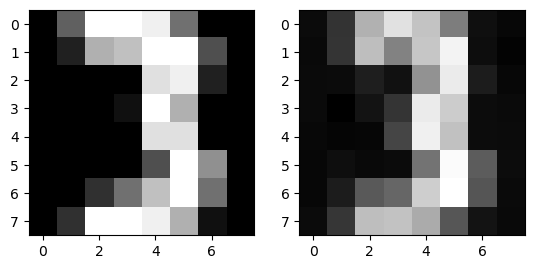

In [21]:
k= 10
reconstruction = model.predict(test[k:k+1,:])

plt.figure()
plt.subplot(1,2,1)
plt.imshow(test[k:k+1,:].reshape((8,8)),cmap="gray")
plt.subplot(1,2,2)
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

In [22]:
sparse_ext = keras.Model(inputs=input_img, outputs=encoder_output)


In [23]:
code = sparse_ext(train)

In [24]:
code = code.numpy()

In [25]:
code[0,:]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
non_zero=[]
for i in range(code.shape[0]):
    non_zero.append(len(np.where(code[i]>1e-6)[0]))

(array([  2.,  40., 117., 221.,   0., 317., 320., 271., 170.,   0., 100.,
         54.,  26.,  18.,   0.,  11.,  15.,   4.,   3.,   0.,   2.,   2.,
          0.,   0.,   0.,   1.,   0.,   2.,   0.,   1.]),
 array([ 1. ,  1.8,  2.6,  3.4,  4.2,  5. ,  5.8,  6.6,  7.4,  8.2,  9. ,
         9.8, 10.6, 11.4, 12.2, 13. , 13.8, 14.6, 15.4, 16.2, 17. , 17.8,
        18.6, 19.4, 20.2, 21. , 21.8, 22.6, 23.4, 24.2, 25. ]),
 <BarContainer object of 30 artists>)

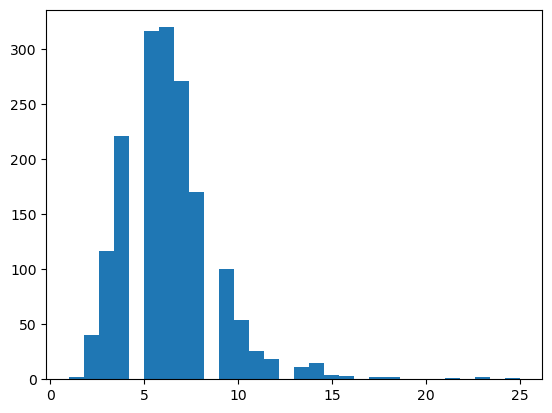

In [27]:
# Histogram of coded values
plt.hist(non_zero,bins = 30)

Let us check also the prediction capabilities from the intermediate representation.

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(32,random_state=0)
clf.fit(code,train_y)

clf2 = RandomForestClassifier(32,random_state=0)
clf2.fit(train,train_y)

RandomForestClassifier(n_estimators=32, random_state=0)

In [29]:
code = sparse_ext(test)
print(clf.score(code,test_y))
print(clf2.score(test,test_y))

0.94
0.97


# Generating with the decoder. From compressed to restored

Now let us get the decoder. Let us get the saved model first.

In [30]:
tf.keras.backend.clear_session()

input_img = keras.Input(shape=(64,), name="image")
labels = keras.layers.Input(name="label", shape=(None,))

#Instanciate the layers that are going to be reused in two data flows, 
#training of the autoencoder and decoding from intermediate layer

dec1 = keras.layers.Dense(16,activation="relu")
dec2 = keras.layers.Dense(32,activation="relu")
dec3 = keras.layers.Dense(64)

x = keras.layers.Dropout(0.1)(input_img)
x = keras.layers.Dense(32,activation="relu")(x)
x = keras.layers.Dense(16,activation="relu")(x)
encoder_output = keras.layers.Dense(2,activation="relu",name="encoder_output")(x)
x = dec1(encoder_output)
x = dec2(x)
decoder_output = dec3(x)
model = keras.Model(inputs=input_img, outputs=decoder_output, name="a_model")



intermediate_input = keras.Input(shape=dec1.get_input_shape_at(0)) # get shape at node 0
x = dec1(intermediate_input)
x = dec2(x)
decoder_output = dec3(x)
decoder = keras.Model(inputs=intermediate_input, outputs=decoder_output, name="a_decoder")



#keras.utils.plot_model(model, "autoencoder.png", show_shapes=True)

In [31]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(train, train, batch_size=64, epochs=4000, validation_split=0.2)


Epoch 1/4000
 1/22 [>.............................] - ETA: 8s - loss: 60.0952 - accuracy: 0.0312

2022-08-31 18:15:56.373986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 1s 18ms/step - loss: 42.5416 - accuracy: 0.0111 - val_loss: 25.6965 - val_accuracy: 0.0118
Epoch 2/4000
12/22 [===============>..............] - ETA: 0s - loss: 22.3706 - accuracy: 0.0091   

2022-08-31 18:15:56.862257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 11ms/step - loss: 21.3052 - accuracy: 0.0111 - val_loss: 19.0507 - val_accuracy: 0.0118
Epoch 3/4000
22/22 [==============================] - 0s 10ms/step - loss: 18.7575 - accuracy: 0.0184 - val_loss: 18.4612 - val_accuracy: 0.0118
Epoch 4/4000
22/22 [==============================] - 0s 10ms/step - loss: 18.4629 - accuracy: 0.0376 - val_loss: 18.3328 - val_accuracy: 0.0471
Epoch 5/4000
22/22 [==============================] - 0s 10ms/step - loss: 18.1236 - accuracy: 0.0707 - val_loss: 17.9404 - val_accuracy: 0.0235
Epoch 6/4000
22/22 [==============================] - 0s 11ms/step - loss: 17.8006 - accuracy: 0.1481 - val_loss: 17.5367 - val_accuracy: 0.1912
Epoch 7/4000
22/22 [==============================] - 0s 10ms/step - loss: 17.4756 - accuracy: 0.1732 - val_loss: 17.2505 - val_accuracy: 0.1294
Epoch 8/4000
22/22 [==============================] - 0s 10ms/step - loss: 17.0927 - accuracy: 0.1805 - val_loss: 17.0120 - val_accuracy: 0.194

22/22 [==============================] - 0s 10ms/step - loss: 14.3074 - accuracy: 0.0774 - val_loss: 14.6454 - val_accuracy: 0.0706
Epoch 59/4000
22/22 [==============================] - 0s 10ms/step - loss: 14.2823 - accuracy: 0.0626 - val_loss: 14.4612 - val_accuracy: 0.0971
Epoch 60/4000
22/22 [==============================] - 0s 10ms/step - loss: 14.2068 - accuracy: 0.0700 - val_loss: 14.5284 - val_accuracy: 0.0765
Epoch 61/4000
22/22 [==============================] - 0s 10ms/step - loss: 14.1909 - accuracy: 0.0685 - val_loss: 14.4263 - val_accuracy: 0.0735
Epoch 62/4000
22/22 [==============================] - 0s 10ms/step - loss: 14.1924 - accuracy: 0.0597 - val_loss: 14.3698 - val_accuracy: 0.0441
Epoch 63/4000
22/22 [==============================] - 0s 10ms/step - loss: 14.1131 - accuracy: 0.0508 - val_loss: 14.2888 - val_accuracy: 0.0588
Epoch 64/4000
22/22 [==============================] - 0s 10ms/step - loss: 14.1260 - accuracy: 0.0634 - val_loss: 14.3104 - val_accuracy:

22/22 [==============================] - 0s 10ms/step - loss: 13.0151 - accuracy: 0.0516 - val_loss: 13.3529 - val_accuracy: 0.0265
Epoch 115/4000
22/22 [==============================] - 0s 10ms/step - loss: 13.0335 - accuracy: 0.0354 - val_loss: 13.4983 - val_accuracy: 0.0294
Epoch 116/4000
22/22 [==============================] - 0s 10ms/step - loss: 13.0349 - accuracy: 0.0376 - val_loss: 13.7114 - val_accuracy: 0.0765
Epoch 117/4000
22/22 [==============================] - 0s 10ms/step - loss: 12.9954 - accuracy: 0.0523 - val_loss: 13.4949 - val_accuracy: 0.0382
Epoch 118/4000
22/22 [==============================] - 0s 10ms/step - loss: 12.9552 - accuracy: 0.0317 - val_loss: 13.4724 - val_accuracy: 0.0735
Epoch 119/4000
22/22 [==============================] - 0s 10ms/step - loss: 12.9936 - accuracy: 0.0361 - val_loss: 13.4596 - val_accuracy: 0.0500
Epoch 120/4000
22/22 [==============================] - 0s 10ms/step - loss: 12.9457 - accuracy: 0.0450 - val_loss: 13.5991 - val_acc

Epoch 170/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.8889 - accuracy: 0.0884 - val_loss: 12.5930 - val_accuracy: 0.0265
Epoch 171/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.8789 - accuracy: 0.0766 - val_loss: 12.7149 - val_accuracy: 0.0735
Epoch 172/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.9260 - accuracy: 0.0671 - val_loss: 12.6949 - val_accuracy: 0.0824
Epoch 173/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.9178 - accuracy: 0.0855 - val_loss: 12.4054 - val_accuracy: 0.1029
Epoch 174/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.8633 - accuracy: 0.0656 - val_loss: 12.5567 - val_accuracy: 0.1559
Epoch 175/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.8729 - accuracy: 0.0929 - val_loss: 12.7036 - val_accuracy: 0.0324
Epoch 176/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.9024 - accuracy: 0.0648 - val_loss: 12

Epoch 226/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.4746 - accuracy: 0.1091 - val_loss: 12.1152 - val_accuracy: 0.0912
Epoch 227/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.5679 - accuracy: 0.1194 - val_loss: 12.4111 - val_accuracy: 0.0971
Epoch 228/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.5074 - accuracy: 0.1120 - val_loss: 12.3427 - val_accuracy: 0.1647
Epoch 229/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.4819 - accuracy: 0.1164 - val_loss: 12.4374 - val_accuracy: 0.0912
Epoch 230/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.4095 - accuracy: 0.1010 - val_loss: 12.0433 - val_accuracy: 0.0618
Epoch 231/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.4691 - accuracy: 0.1046 - val_loss: 12.1091 - val_accuracy: 0.0941
Epoch 232/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.4336 - accuracy: 0.1223 - val_loss: 12

Epoch 282/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.2893 - accuracy: 0.1017 - val_loss: 11.9356 - val_accuracy: 0.0441
Epoch 283/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.3013 - accuracy: 0.0973 - val_loss: 11.8507 - val_accuracy: 0.0412
Epoch 284/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.2809 - accuracy: 0.1017 - val_loss: 12.0610 - val_accuracy: 0.1029
Epoch 285/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.2717 - accuracy: 0.0965 - val_loss: 11.9315 - val_accuracy: 0.1029
Epoch 286/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.2652 - accuracy: 0.0965 - val_loss: 11.7970 - val_accuracy: 0.0500
Epoch 287/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.2324 - accuracy: 0.0914 - val_loss: 11.9590 - val_accuracy: 0.1765
Epoch 288/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.1606 - accuracy: 0.1127 - val_loss: 12

Epoch 338/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.0517 - accuracy: 0.0906 - val_loss: 12.2518 - val_accuracy: 0.0735
Epoch 339/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.0529 - accuracy: 0.0774 - val_loss: 11.4962 - val_accuracy: 0.0882
Epoch 340/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.0611 - accuracy: 0.0965 - val_loss: 11.4370 - val_accuracy: 0.0706
Epoch 341/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.0619 - accuracy: 0.0855 - val_loss: 12.2163 - val_accuracy: 0.0706
Epoch 342/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.0178 - accuracy: 0.0921 - val_loss: 11.5110 - val_accuracy: 0.0941
Epoch 343/4000
22/22 [==============================] - 0s 10ms/step - loss: 11.0215 - accuracy: 0.0840 - val_loss: 11.4773 - val_accuracy: 0.0588
Epoch 344/4000
22/22 [==============================] - 0s 11ms/step - loss: 10.9981 - accuracy: 0.0744 - val_loss: 11

Epoch 394/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.8067 - accuracy: 0.0663 - val_loss: 11.4771 - val_accuracy: 0.0353
Epoch 395/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.7949 - accuracy: 0.0671 - val_loss: 11.6628 - val_accuracy: 0.0794
Epoch 396/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.8361 - accuracy: 0.0774 - val_loss: 11.4508 - val_accuracy: 0.0441
Epoch 397/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.8978 - accuracy: 0.0789 - val_loss: 11.4448 - val_accuracy: 0.0412
Epoch 398/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.8458 - accuracy: 0.0626 - val_loss: 11.1605 - val_accuracy: 0.1265
Epoch 399/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.8588 - accuracy: 0.0715 - val_loss: 11.3056 - val_accuracy: 0.0853
Epoch 400/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.8024 - accuracy: 0.0796 - val_loss: 11

Epoch 450/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.6214 - accuracy: 0.0774 - val_loss: 11.1626 - val_accuracy: 0.0382
Epoch 451/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.6545 - accuracy: 0.0693 - val_loss: 11.0646 - val_accuracy: 0.0588
Epoch 452/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.6016 - accuracy: 0.0914 - val_loss: 11.2322 - val_accuracy: 0.0353
Epoch 453/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.6066 - accuracy: 0.0693 - val_loss: 11.1104 - val_accuracy: 0.0647
Epoch 454/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.5757 - accuracy: 0.0877 - val_loss: 11.1367 - val_accuracy: 0.0618
Epoch 455/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.5718 - accuracy: 0.0722 - val_loss: 11.5480 - val_accuracy: 0.1824
Epoch 456/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.7394 - accuracy: 0.1091 - val_loss: 10

Epoch 506/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.4280 - accuracy: 0.1039 - val_loss: 11.0134 - val_accuracy: 0.1059
Epoch 507/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.5004 - accuracy: 0.0936 - val_loss: 11.3550 - val_accuracy: 0.0794
Epoch 508/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.4889 - accuracy: 0.1032 - val_loss: 10.9795 - val_accuracy: 0.1176
Epoch 509/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.3856 - accuracy: 0.1083 - val_loss: 11.1296 - val_accuracy: 0.0588
Epoch 510/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.4529 - accuracy: 0.0847 - val_loss: 10.8651 - val_accuracy: 0.0912
Epoch 511/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.4493 - accuracy: 0.0980 - val_loss: 11.2388 - val_accuracy: 0.0912
Epoch 512/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.4454 - accuracy: 0.1135 - val_loss: 10

Epoch 562/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.3448 - accuracy: 0.1054 - val_loss: 10.8568 - val_accuracy: 0.1147
Epoch 563/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.3112 - accuracy: 0.1039 - val_loss: 11.2752 - val_accuracy: 0.0765
Epoch 564/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.3669 - accuracy: 0.1039 - val_loss: 11.1446 - val_accuracy: 0.1029
Epoch 565/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.2960 - accuracy: 0.1135 - val_loss: 10.8918 - val_accuracy: 0.0618
Epoch 566/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.3313 - accuracy: 0.0906 - val_loss: 11.0381 - val_accuracy: 0.1559
Epoch 567/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.3244 - accuracy: 0.1223 - val_loss: 11.0643 - val_accuracy: 0.1529
Epoch 568/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.3906 - accuracy: 0.1113 - val_loss: 10

Epoch 618/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.2138 - accuracy: 0.1010 - val_loss: 10.5902 - val_accuracy: 0.0618
Epoch 619/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.2286 - accuracy: 0.0980 - val_loss: 11.1881 - val_accuracy: 0.0382
Epoch 620/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.1978 - accuracy: 0.1054 - val_loss: 10.6136 - val_accuracy: 0.0412
Epoch 621/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.0988 - accuracy: 0.0914 - val_loss: 10.5439 - val_accuracy: 0.1294
Epoch 622/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.2407 - accuracy: 0.1157 - val_loss: 10.7018 - val_accuracy: 0.1029
Epoch 623/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.1584 - accuracy: 0.1024 - val_loss: 10.6463 - val_accuracy: 0.1029
Epoch 624/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.1229 - accuracy: 0.1113 - val_loss: 10

Epoch 674/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.9852 - accuracy: 0.1120 - val_loss: 10.3533 - val_accuracy: 0.0500
Epoch 675/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.8920 - accuracy: 0.0936 - val_loss: 10.7634 - val_accuracy: 0.1059
Epoch 676/4000
22/22 [==============================] - 0s 10ms/step - loss: 10.0067 - accuracy: 0.1017 - val_loss: 10.5627 - val_accuracy: 0.0912
Epoch 677/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.9210 - accuracy: 0.0958 - val_loss: 10.7996 - val_accuracy: 0.0824
Epoch 678/4000
22/22 [==============================] - 0s 11ms/step - loss: 9.8968 - accuracy: 0.1002 - val_loss: 10.6852 - val_accuracy: 0.1176
Epoch 679/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.9545 - accuracy: 0.1046 - val_loss: 10.8458 - val_accuracy: 0.1471
Epoch 680/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.8731 - accuracy: 0.1083 - val_loss: 10.4859 

22/22 [==============================] - 0s 10ms/step - loss: 9.6600 - accuracy: 0.0899 - val_loss: 10.2203 - val_accuracy: 0.1412
Epoch 731/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.6477 - accuracy: 0.1113 - val_loss: 10.7486 - val_accuracy: 0.1559
Epoch 732/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.6311 - accuracy: 0.1069 - val_loss: 10.1270 - val_accuracy: 0.1382
Epoch 733/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.6633 - accuracy: 0.0973 - val_loss: 10.3088 - val_accuracy: 0.1353
Epoch 734/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.7191 - accuracy: 0.0914 - val_loss: 10.1119 - val_accuracy: 0.0735
Epoch 735/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.6407 - accuracy: 0.0840 - val_loss: 10.2762 - val_accuracy: 0.1324
Epoch 736/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.6960 - accuracy: 0.0965 - val_loss: 10.1119 - val_accuracy: 

22/22 [==============================] - 0s 10ms/step - loss: 9.5402 - accuracy: 0.0987 - val_loss: 10.0070 - val_accuracy: 0.1441
Epoch 787/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.5301 - accuracy: 0.1105 - val_loss: 10.1208 - val_accuracy: 0.1147
Epoch 788/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.5174 - accuracy: 0.0921 - val_loss: 9.9146 - val_accuracy: 0.0971
Epoch 789/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.4699 - accuracy: 0.1105 - val_loss: 9.8965 - val_accuracy: 0.1000
Epoch 790/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.5063 - accuracy: 0.0951 - val_loss: 10.2663 - val_accuracy: 0.1294
Epoch 791/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.4708 - accuracy: 0.1010 - val_loss: 10.1862 - val_accuracy: 0.0676
Epoch 792/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.4879 - accuracy: 0.0877 - val_loss: 9.7885 - val_accuracy: 0.1

22/22 [==============================] - 0s 10ms/step - loss: 9.3959 - accuracy: 0.0929 - val_loss: 9.7659 - val_accuracy: 0.0676
Epoch 843/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.3566 - accuracy: 0.0899 - val_loss: 9.7074 - val_accuracy: 0.1147
Epoch 844/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.3101 - accuracy: 0.1032 - val_loss: 10.6246 - val_accuracy: 0.1118
Epoch 845/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.3542 - accuracy: 0.1010 - val_loss: 9.8116 - val_accuracy: 0.1059
Epoch 846/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.2975 - accuracy: 0.0980 - val_loss: 9.6549 - val_accuracy: 0.1176
Epoch 847/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.3534 - accuracy: 0.1010 - val_loss: 10.2220 - val_accuracy: 0.1235
Epoch 848/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.3999 - accuracy: 0.0965 - val_loss: 9.7898 - val_accuracy: 0.070

22/22 [==============================] - 0s 11ms/step - loss: 9.1423 - accuracy: 0.1017 - val_loss: 9.8277 - val_accuracy: 0.1059
Epoch 899/4000
22/22 [==============================] - 0s 11ms/step - loss: 9.1388 - accuracy: 0.0995 - val_loss: 9.6621 - val_accuracy: 0.1059
Epoch 900/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.1787 - accuracy: 0.0929 - val_loss: 9.8812 - val_accuracy: 0.0794
Epoch 901/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.1868 - accuracy: 0.0892 - val_loss: 9.9437 - val_accuracy: 0.1647
Epoch 902/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.1941 - accuracy: 0.1105 - val_loss: 9.4742 - val_accuracy: 0.0853
Epoch 903/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.1316 - accuracy: 0.0951 - val_loss: 9.5996 - val_accuracy: 0.0971
Epoch 904/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.1811 - accuracy: 0.0973 - val_loss: 9.7706 - val_accuracy: 0.1206


22/22 [==============================] - 0s 10ms/step - loss: 9.0316 - accuracy: 0.0987 - val_loss: 9.7264 - val_accuracy: 0.0647
Epoch 955/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.1608 - accuracy: 0.1076 - val_loss: 9.6962 - val_accuracy: 0.0971
Epoch 956/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.0418 - accuracy: 0.0943 - val_loss: 9.4546 - val_accuracy: 0.1324
Epoch 957/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.0286 - accuracy: 0.1113 - val_loss: 9.4514 - val_accuracy: 0.0912
Epoch 958/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.1950 - accuracy: 0.0973 - val_loss: 9.6678 - val_accuracy: 0.0500
Epoch 959/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.0684 - accuracy: 0.0995 - val_loss: 9.4598 - val_accuracy: 0.0735
Epoch 960/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.0154 - accuracy: 0.0965 - val_loss: 9.4620 - val_accuracy: 0.1588


22/22 [==============================] - 0s 10ms/step - loss: 8.9104 - accuracy: 0.1054 - val_loss: 9.6717 - val_accuracy: 0.1059
Epoch 1011/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.9150 - accuracy: 0.1010 - val_loss: 9.9350 - val_accuracy: 0.0735
Epoch 1012/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.0603 - accuracy: 0.0951 - val_loss: 9.6236 - val_accuracy: 0.1206
Epoch 1013/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.9782 - accuracy: 0.1142 - val_loss: 9.5483 - val_accuracy: 0.0882
Epoch 1014/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.9808 - accuracy: 0.1098 - val_loss: 9.7185 - val_accuracy: 0.1471
Epoch 1015/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.9576 - accuracy: 0.0980 - val_loss: 9.3987 - val_accuracy: 0.1265
Epoch 1016/4000
22/22 [==============================] - 0s 10ms/step - loss: 9.0122 - accuracy: 0.1172 - val_loss: 9.6050 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.8902 - accuracy: 0.1127 - val_loss: 9.3832 - val_accuracy: 0.0824
Epoch 1067/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.8271 - accuracy: 0.1076 - val_loss: 9.4262 - val_accuracy: 0.1206
Epoch 1068/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.8919 - accuracy: 0.1017 - val_loss: 9.6932 - val_accuracy: 0.0765
Epoch 1069/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.7530 - accuracy: 0.1083 - val_loss: 9.6172 - val_accuracy: 0.1147
Epoch 1070/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.8047 - accuracy: 0.1105 - val_loss: 9.5565 - val_accuracy: 0.1235
Epoch 1071/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.8630 - accuracy: 0.1127 - val_loss: 9.3858 - val_accuracy: 0.1059
Epoch 1072/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.8747 - accuracy: 0.1098 - val_loss: 9.3230 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.7425 - accuracy: 0.1120 - val_loss: 9.1542 - val_accuracy: 0.1059
Epoch 1123/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.7492 - accuracy: 0.1098 - val_loss: 9.2542 - val_accuracy: 0.1412
Epoch 1124/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.7369 - accuracy: 0.1253 - val_loss: 9.3202 - val_accuracy: 0.1294
Epoch 1125/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.8216 - accuracy: 0.1209 - val_loss: 9.3340 - val_accuracy: 0.1088
Epoch 1126/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.7087 - accuracy: 0.1061 - val_loss: 9.2863 - val_accuracy: 0.1029
Epoch 1127/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.7414 - accuracy: 0.1113 - val_loss: 9.7191 - val_accuracy: 0.1059
Epoch 1128/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.7348 - accuracy: 0.1083 - val_loss: 9.5060 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.6483 - accuracy: 0.1113 - val_loss: 9.3137 - val_accuracy: 0.1088
Epoch 1179/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.6028 - accuracy: 0.1179 - val_loss: 9.2038 - val_accuracy: 0.1059
Epoch 1180/4000
22/22 [==============================] - 0s 11ms/step - loss: 8.6595 - accuracy: 0.1105 - val_loss: 9.3400 - val_accuracy: 0.0824
Epoch 1181/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.6694 - accuracy: 0.1098 - val_loss: 9.2367 - val_accuracy: 0.1118
Epoch 1182/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.6534 - accuracy: 0.1216 - val_loss: 9.0948 - val_accuracy: 0.0882
Epoch 1183/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.7017 - accuracy: 0.1142 - val_loss: 9.3879 - val_accuracy: 0.1059
Epoch 1184/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.6329 - accuracy: 0.1083 - val_loss: 9.1520 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.5630 - accuracy: 0.1120 - val_loss: 9.3888 - val_accuracy: 0.1118
Epoch 1235/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.5099 - accuracy: 0.1201 - val_loss: 9.3645 - val_accuracy: 0.0971
Epoch 1236/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.5667 - accuracy: 0.1186 - val_loss: 9.1533 - val_accuracy: 0.0824
Epoch 1237/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.5351 - accuracy: 0.1194 - val_loss: 9.4095 - val_accuracy: 0.0971
Epoch 1238/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.5043 - accuracy: 0.1120 - val_loss: 8.9324 - val_accuracy: 0.1118
Epoch 1239/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.5299 - accuracy: 0.1127 - val_loss: 8.8753 - val_accuracy: 0.0912
Epoch 1240/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.5290 - accuracy: 0.1172 - val_loss: 9.2264 - val_accuracy: 0

22/22 [==============================] - 0s 11ms/step - loss: 8.3855 - accuracy: 0.1268 - val_loss: 9.4351 - val_accuracy: 0.1353
Epoch 1291/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.4978 - accuracy: 0.1341 - val_loss: 9.0649 - val_accuracy: 0.1412
Epoch 1292/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.5120 - accuracy: 0.1142 - val_loss: 8.9223 - val_accuracy: 0.1324
Epoch 1293/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.4466 - accuracy: 0.1231 - val_loss: 9.0576 - val_accuracy: 0.1176
Epoch 1294/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.3892 - accuracy: 0.1216 - val_loss: 9.0563 - val_accuracy: 0.1059
Epoch 1295/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.4728 - accuracy: 0.1164 - val_loss: 8.9378 - val_accuracy: 0.1147
Epoch 1296/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.4457 - accuracy: 0.1172 - val_loss: 9.0814 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.2645 - accuracy: 0.1268 - val_loss: 9.3065 - val_accuracy: 0.1441
Epoch 1347/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.4210 - accuracy: 0.1164 - val_loss: 8.7386 - val_accuracy: 0.1324
Epoch 1348/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.4288 - accuracy: 0.1209 - val_loss: 8.9677 - val_accuracy: 0.1265
Epoch 1349/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.4099 - accuracy: 0.1260 - val_loss: 9.2540 - val_accuracy: 0.1059
Epoch 1350/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.3976 - accuracy: 0.1238 - val_loss: 9.4201 - val_accuracy: 0.1853
Epoch 1351/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.4087 - accuracy: 0.1312 - val_loss: 8.9235 - val_accuracy: 0.2000
Epoch 1352/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.2980 - accuracy: 0.1216 - val_loss: 8.8800 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.2806 - accuracy: 0.1290 - val_loss: 8.7139 - val_accuracy: 0.1294
Epoch 1403/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.2564 - accuracy: 0.1135 - val_loss: 9.0945 - val_accuracy: 0.1441
Epoch 1404/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.2944 - accuracy: 0.1334 - val_loss: 8.9008 - val_accuracy: 0.0941
Epoch 1405/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.2645 - accuracy: 0.1253 - val_loss: 8.8258 - val_accuracy: 0.1324
Epoch 1406/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.2950 - accuracy: 0.1172 - val_loss: 9.1061 - val_accuracy: 0.1235
Epoch 1407/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.3318 - accuracy: 0.1164 - val_loss: 9.1869 - val_accuracy: 0.1324
Epoch 1408/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.2985 - accuracy: 0.1304 - val_loss: 8.9602 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.2209 - accuracy: 0.1150 - val_loss: 8.7490 - val_accuracy: 0.1235
Epoch 1459/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.3373 - accuracy: 0.1334 - val_loss: 8.8539 - val_accuracy: 0.1441
Epoch 1460/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.2096 - accuracy: 0.1186 - val_loss: 8.7977 - val_accuracy: 0.1500
Epoch 1461/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.3437 - accuracy: 0.1304 - val_loss: 8.9228 - val_accuracy: 0.0941
Epoch 1462/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.2964 - accuracy: 0.1150 - val_loss: 8.7792 - val_accuracy: 0.1618
Epoch 1463/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.2919 - accuracy: 0.1253 - val_loss: 8.8589 - val_accuracy: 0.1324
Epoch 1464/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.2500 - accuracy: 0.1194 - val_loss: 8.7972 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.2454 - accuracy: 0.1297 - val_loss: 8.8178 - val_accuracy: 0.1441
Epoch 1515/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.1198 - accuracy: 0.1260 - val_loss: 8.8163 - val_accuracy: 0.1382
Epoch 1516/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.2125 - accuracy: 0.1238 - val_loss: 8.6623 - val_accuracy: 0.1412
Epoch 1517/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.2993 - accuracy: 0.1260 - val_loss: 8.7046 - val_accuracy: 0.1324
Epoch 1518/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.1675 - accuracy: 0.1422 - val_loss: 8.7374 - val_accuracy: 0.1206
Epoch 1519/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.1519 - accuracy: 0.1231 - val_loss: 8.9184 - val_accuracy: 0.1324
Epoch 1520/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.2136 - accuracy: 0.1312 - val_loss: 8.9032 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.1939 - accuracy: 0.1238 - val_loss: 8.8335 - val_accuracy: 0.1559
Epoch 1571/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.1540 - accuracy: 0.1341 - val_loss: 8.8583 - val_accuracy: 0.1294
Epoch 1572/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.0937 - accuracy: 0.1150 - val_loss: 8.6207 - val_accuracy: 0.1088
Epoch 1573/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.1039 - accuracy: 0.1297 - val_loss: 8.6859 - val_accuracy: 0.1029
Epoch 1574/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.1253 - accuracy: 0.1231 - val_loss: 8.7748 - val_accuracy: 0.0941
Epoch 1575/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.1376 - accuracy: 0.1238 - val_loss: 8.9482 - val_accuracy: 0.1412
Epoch 1576/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.1461 - accuracy: 0.1120 - val_loss: 8.8058 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.0708 - accuracy: 0.1459 - val_loss: 8.9175 - val_accuracy: 0.1294
Epoch 1627/4000
22/22 [==============================] - 0s 11ms/step - loss: 8.0599 - accuracy: 0.1297 - val_loss: 8.8144 - val_accuracy: 0.1500
Epoch 1628/4000
22/22 [==============================] - 0s 11ms/step - loss: 8.0236 - accuracy: 0.1231 - val_loss: 8.5878 - val_accuracy: 0.1235
Epoch 1629/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.1020 - accuracy: 0.1216 - val_loss: 8.7858 - val_accuracy: 0.1000
Epoch 1630/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.0413 - accuracy: 0.1209 - val_loss: 8.5812 - val_accuracy: 0.1176
Epoch 1631/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.0455 - accuracy: 0.1253 - val_loss: 8.8773 - val_accuracy: 0.1412
Epoch 1632/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.0539 - accuracy: 0.1319 - val_loss: 8.8726 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.1293 - accuracy: 0.1268 - val_loss: 8.7696 - val_accuracy: 0.1676
Epoch 1683/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.0551 - accuracy: 0.1142 - val_loss: 8.6524 - val_accuracy: 0.1147
Epoch 1684/4000
22/22 [==============================] - 0s 11ms/step - loss: 8.0107 - accuracy: 0.1371 - val_loss: 8.6925 - val_accuracy: 0.1441
Epoch 1685/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.0807 - accuracy: 0.1363 - val_loss: 8.8924 - val_accuracy: 0.1324
Epoch 1686/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.0059 - accuracy: 0.1304 - val_loss: 8.7646 - val_accuracy: 0.1382
Epoch 1687/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.0175 - accuracy: 0.1312 - val_loss: 8.7166 - val_accuracy: 0.1176
Epoch 1688/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.1009 - accuracy: 0.1304 - val_loss: 9.0607 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.0664 - accuracy: 0.1260 - val_loss: 8.7717 - val_accuracy: 0.1324
Epoch 1739/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.0322 - accuracy: 0.1150 - val_loss: 8.6951 - val_accuracy: 0.1529
Epoch 1740/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9725 - accuracy: 0.1216 - val_loss: 8.6957 - val_accuracy: 0.0794
Epoch 1741/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9769 - accuracy: 0.1253 - val_loss: 8.5588 - val_accuracy: 0.1559
Epoch 1742/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9012 - accuracy: 0.1304 - val_loss: 8.9476 - val_accuracy: 0.1441
Epoch 1743/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9684 - accuracy: 0.1290 - val_loss: 8.5851 - val_accuracy: 0.1588
Epoch 1744/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9721 - accuracy: 0.1260 - val_loss: 9.2347 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.9443 - accuracy: 0.1209 - val_loss: 8.5344 - val_accuracy: 0.1647
Epoch 1795/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9295 - accuracy: 0.1422 - val_loss: 9.0263 - val_accuracy: 0.1441
Epoch 1796/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8878 - accuracy: 0.1408 - val_loss: 8.8285 - val_accuracy: 0.1412
Epoch 1797/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9984 - accuracy: 0.1400 - val_loss: 8.5716 - val_accuracy: 0.1029
Epoch 1798/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9412 - accuracy: 0.1290 - val_loss: 8.6194 - val_accuracy: 0.1382
Epoch 1799/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9387 - accuracy: 0.1275 - val_loss: 8.4823 - val_accuracy: 0.1206
Epoch 1800/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.0107 - accuracy: 0.1393 - val_loss: 8.6487 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.7955 - accuracy: 0.1268 - val_loss: 8.7383 - val_accuracy: 0.1059
Epoch 1851/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8752 - accuracy: 0.1334 - val_loss: 8.8014 - val_accuracy: 0.1206
Epoch 1852/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9049 - accuracy: 0.1444 - val_loss: 8.7612 - val_accuracy: 0.1206
Epoch 1853/4000
22/22 [==============================] - 0s 11ms/step - loss: 7.9769 - accuracy: 0.1378 - val_loss: 9.0615 - val_accuracy: 0.1118
Epoch 1854/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9250 - accuracy: 0.1334 - val_loss: 8.4996 - val_accuracy: 0.1118
Epoch 1855/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9151 - accuracy: 0.1430 - val_loss: 8.6413 - val_accuracy: 0.1235
Epoch 1856/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8775 - accuracy: 0.1555 - val_loss: 8.7558 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.8690 - accuracy: 0.1408 - val_loss: 8.6347 - val_accuracy: 0.1000
Epoch 1907/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9168 - accuracy: 0.1304 - val_loss: 8.8949 - val_accuracy: 0.1353
Epoch 1908/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8512 - accuracy: 0.1371 - val_loss: 8.7537 - val_accuracy: 0.1235
Epoch 1909/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8739 - accuracy: 0.1466 - val_loss: 8.5832 - val_accuracy: 0.1294
Epoch 1910/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9258 - accuracy: 0.1415 - val_loss: 8.6957 - val_accuracy: 0.1206
Epoch 1911/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8930 - accuracy: 0.1562 - val_loss: 8.7366 - val_accuracy: 0.1147
Epoch 1912/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8188 - accuracy: 0.1415 - val_loss: 8.7499 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.8610 - accuracy: 0.1371 - val_loss: 8.9796 - val_accuracy: 0.1324
Epoch 1963/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8692 - accuracy: 0.1275 - val_loss: 8.8027 - val_accuracy: 0.0853
Epoch 1964/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8477 - accuracy: 0.1245 - val_loss: 8.4734 - val_accuracy: 0.1500
Epoch 1965/4000
22/22 [==============================] - 0s 11ms/step - loss: 7.8902 - accuracy: 0.1363 - val_loss: 8.4059 - val_accuracy: 0.1088
Epoch 1966/4000
22/22 [==============================] - 0s 11ms/step - loss: 7.8425 - accuracy: 0.1282 - val_loss: 8.5629 - val_accuracy: 0.1059
Epoch 1967/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8238 - accuracy: 0.1349 - val_loss: 8.4849 - val_accuracy: 0.1412
Epoch 1968/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8621 - accuracy: 0.1385 - val_loss: 8.8717 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.7928 - accuracy: 0.1363 - val_loss: 8.5812 - val_accuracy: 0.1294
Epoch 2019/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7876 - accuracy: 0.1363 - val_loss: 8.6739 - val_accuracy: 0.1265
Epoch 2020/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9955 - accuracy: 0.1422 - val_loss: 8.5689 - val_accuracy: 0.1294
Epoch 2021/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.0307 - accuracy: 0.1422 - val_loss: 8.5634 - val_accuracy: 0.1265
Epoch 2022/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.0544 - accuracy: 0.1275 - val_loss: 8.6533 - val_accuracy: 0.1059
Epoch 2023/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9039 - accuracy: 0.1312 - val_loss: 8.6020 - val_accuracy: 0.1176
Epoch 2024/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8964 - accuracy: 0.1525 - val_loss: 8.6365 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 8.1700 - accuracy: 0.1334 - val_loss: 8.9335 - val_accuracy: 0.1471
Epoch 2075/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.1039 - accuracy: 0.1385 - val_loss: 8.9264 - val_accuracy: 0.1765
Epoch 2076/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.2162 - accuracy: 0.1481 - val_loss: 8.7485 - val_accuracy: 0.1176
Epoch 2077/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.1093 - accuracy: 0.1371 - val_loss: 8.7288 - val_accuracy: 0.1529
Epoch 2078/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.0151 - accuracy: 0.1533 - val_loss: 8.9382 - val_accuracy: 0.0971
Epoch 2079/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9821 - accuracy: 0.1326 - val_loss: 9.0482 - val_accuracy: 0.1147
Epoch 2080/4000
22/22 [==============================] - 0s 10ms/step - loss: 8.0336 - accuracy: 0.1400 - val_loss: 8.5915 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.9066 - accuracy: 0.1326 - val_loss: 8.3948 - val_accuracy: 0.1059
Epoch 2131/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7891 - accuracy: 0.1393 - val_loss: 8.4557 - val_accuracy: 0.1412
Epoch 2132/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8257 - accuracy: 0.1489 - val_loss: 8.5970 - val_accuracy: 0.1088
Epoch 2133/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7765 - accuracy: 0.1290 - val_loss: 8.7173 - val_accuracy: 0.1118
Epoch 2134/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8985 - accuracy: 0.1238 - val_loss: 8.6302 - val_accuracy: 0.1324
Epoch 2135/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8723 - accuracy: 0.1378 - val_loss: 9.0525 - val_accuracy: 0.1294
Epoch 2136/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8399 - accuracy: 0.1511 - val_loss: 8.5187 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.7824 - accuracy: 0.1341 - val_loss: 8.6213 - val_accuracy: 0.0882
Epoch 2187/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9731 - accuracy: 0.1326 - val_loss: 8.3352 - val_accuracy: 0.1324
Epoch 2188/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9165 - accuracy: 0.1489 - val_loss: 8.7235 - val_accuracy: 0.1059
Epoch 2189/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8403 - accuracy: 0.1422 - val_loss: 8.7389 - val_accuracy: 0.1382
Epoch 2190/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8621 - accuracy: 0.1326 - val_loss: 8.6864 - val_accuracy: 0.1324
Epoch 2191/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8748 - accuracy: 0.1408 - val_loss: 8.4876 - val_accuracy: 0.0824
Epoch 2192/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8838 - accuracy: 0.1260 - val_loss: 8.5897 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.8370 - accuracy: 0.1393 - val_loss: 9.1343 - val_accuracy: 0.1000
Epoch 2243/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8965 - accuracy: 0.1452 - val_loss: 8.6306 - val_accuracy: 0.1559
Epoch 2244/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8530 - accuracy: 0.1371 - val_loss: 8.8264 - val_accuracy: 0.1206
Epoch 2245/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9114 - accuracy: 0.1415 - val_loss: 8.8821 - val_accuracy: 0.1382
Epoch 2246/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8644 - accuracy: 0.1341 - val_loss: 8.8697 - val_accuracy: 0.1176
Epoch 2247/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.9137 - accuracy: 0.1385 - val_loss: 10.1091 - val_accuracy: 0.1000
Epoch 2248/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8732 - accuracy: 0.1363 - val_loss: 8.5938 - val_accuracy: 

22/22 [==============================] - 0s 10ms/step - loss: 7.8335 - accuracy: 0.1430 - val_loss: 8.4071 - val_accuracy: 0.1235
Epoch 2299/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7522 - accuracy: 0.1437 - val_loss: 8.7857 - val_accuracy: 0.1324
Epoch 2300/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7634 - accuracy: 0.1371 - val_loss: 9.1215 - val_accuracy: 0.1294
Epoch 2301/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7927 - accuracy: 0.1422 - val_loss: 8.3947 - val_accuracy: 0.1353
Epoch 2302/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8673 - accuracy: 0.1415 - val_loss: 8.5112 - val_accuracy: 0.1353
Epoch 2303/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8044 - accuracy: 0.1363 - val_loss: 8.4510 - val_accuracy: 0.1059
Epoch 2304/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7419 - accuracy: 0.1363 - val_loss: 8.7201 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.7270 - accuracy: 0.1415 - val_loss: 8.6884 - val_accuracy: 0.1176
Epoch 2355/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8163 - accuracy: 0.1540 - val_loss: 8.4188 - val_accuracy: 0.1176
Epoch 2356/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6746 - accuracy: 0.1319 - val_loss: 8.3136 - val_accuracy: 0.1324
Epoch 2357/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.8245 - accuracy: 0.1415 - val_loss: 8.8018 - val_accuracy: 0.1441
Epoch 2358/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7377 - accuracy: 0.1312 - val_loss: 8.6559 - val_accuracy: 0.1265
Epoch 2359/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7032 - accuracy: 0.1349 - val_loss: 8.6968 - val_accuracy: 0.1147
Epoch 2360/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7253 - accuracy: 0.1363 - val_loss: 8.7786 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.6367 - accuracy: 0.1400 - val_loss: 8.8673 - val_accuracy: 0.1294
Epoch 2411/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7278 - accuracy: 0.1408 - val_loss: 8.5027 - val_accuracy: 0.1559
Epoch 2412/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6624 - accuracy: 0.1459 - val_loss: 8.5730 - val_accuracy: 0.1353
Epoch 2413/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6657 - accuracy: 0.1371 - val_loss: 8.7358 - val_accuracy: 0.1382
Epoch 2414/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7393 - accuracy: 0.1356 - val_loss: 8.5735 - val_accuracy: 0.1118
Epoch 2415/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6659 - accuracy: 0.1408 - val_loss: 8.3956 - val_accuracy: 0.1235
Epoch 2416/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6416 - accuracy: 0.1496 - val_loss: 8.4202 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.7319 - accuracy: 0.1349 - val_loss: 8.4670 - val_accuracy: 0.1382
Epoch 2467/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7002 - accuracy: 0.1422 - val_loss: 8.4136 - val_accuracy: 0.1324
Epoch 2468/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7020 - accuracy: 0.1540 - val_loss: 8.6710 - val_accuracy: 0.0941
Epoch 2469/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6392 - accuracy: 0.1437 - val_loss: 8.2840 - val_accuracy: 0.1029
Epoch 2470/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7040 - accuracy: 0.1400 - val_loss: 8.3651 - val_accuracy: 0.1882
Epoch 2471/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6762 - accuracy: 0.1577 - val_loss: 8.6512 - val_accuracy: 0.1294
Epoch 2472/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7528 - accuracy: 0.1518 - val_loss: 8.4844 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.6913 - accuracy: 0.1349 - val_loss: 8.4360 - val_accuracy: 0.1235
Epoch 2523/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7082 - accuracy: 0.1400 - val_loss: 8.4490 - val_accuracy: 0.1265
Epoch 2524/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6744 - accuracy: 0.1371 - val_loss: 8.6897 - val_accuracy: 0.1588
Epoch 2525/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6574 - accuracy: 0.1371 - val_loss: 8.6561 - val_accuracy: 0.1412
Epoch 2526/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7107 - accuracy: 0.1452 - val_loss: 8.5189 - val_accuracy: 0.1147
Epoch 2527/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.7050 - accuracy: 0.1319 - val_loss: 8.6273 - val_accuracy: 0.1324
Epoch 2528/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6279 - accuracy: 0.1231 - val_loss: 8.4016 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.6503 - accuracy: 0.1474 - val_loss: 8.5337 - val_accuracy: 0.1412
Epoch 2579/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6925 - accuracy: 0.1400 - val_loss: 8.5343 - val_accuracy: 0.1412
Epoch 2580/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5184 - accuracy: 0.1481 - val_loss: 8.8302 - val_accuracy: 0.1176
Epoch 2581/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6560 - accuracy: 0.1540 - val_loss: 8.6013 - val_accuracy: 0.1029
Epoch 2582/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5817 - accuracy: 0.1356 - val_loss: 8.2406 - val_accuracy: 0.1118
Epoch 2583/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6874 - accuracy: 0.1518 - val_loss: 8.4593 - val_accuracy: 0.1118
Epoch 2584/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6429 - accuracy: 0.1341 - val_loss: 8.5433 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.5900 - accuracy: 0.1356 - val_loss: 8.2652 - val_accuracy: 0.1265
Epoch 2635/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6092 - accuracy: 0.1452 - val_loss: 8.4935 - val_accuracy: 0.1353
Epoch 2636/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5585 - accuracy: 0.1408 - val_loss: 8.3896 - val_accuracy: 0.1235
Epoch 2637/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5394 - accuracy: 0.1489 - val_loss: 8.5356 - val_accuracy: 0.1412
Epoch 2638/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5882 - accuracy: 0.1400 - val_loss: 8.3525 - val_accuracy: 0.1324
Epoch 2639/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6284 - accuracy: 0.1621 - val_loss: 8.3792 - val_accuracy: 0.1441
Epoch 2640/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5860 - accuracy: 0.1430 - val_loss: 8.3811 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.5966 - accuracy: 0.1518 - val_loss: 8.3764 - val_accuracy: 0.1294
Epoch 2691/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5533 - accuracy: 0.1511 - val_loss: 8.5370 - val_accuracy: 0.0824
Epoch 2692/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5692 - accuracy: 0.1422 - val_loss: 8.5444 - val_accuracy: 0.1382
Epoch 2693/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5131 - accuracy: 0.1452 - val_loss: 8.5774 - val_accuracy: 0.1441
Epoch 2694/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5698 - accuracy: 0.1555 - val_loss: 8.4316 - val_accuracy: 0.1118
Epoch 2695/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5883 - accuracy: 0.1385 - val_loss: 8.7882 - val_accuracy: 0.1147
Epoch 2696/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6411 - accuracy: 0.1326 - val_loss: 8.5099 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.6018 - accuracy: 0.1422 - val_loss: 8.4411 - val_accuracy: 0.1382
Epoch 2747/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6225 - accuracy: 0.1356 - val_loss: 8.3563 - val_accuracy: 0.1176
Epoch 2748/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5367 - accuracy: 0.1474 - val_loss: 8.3317 - val_accuracy: 0.1265
Epoch 2749/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5865 - accuracy: 0.1466 - val_loss: 8.5484 - val_accuracy: 0.1353
Epoch 2750/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5735 - accuracy: 0.1614 - val_loss: 8.5529 - val_accuracy: 0.1647
Epoch 2751/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5794 - accuracy: 0.1629 - val_loss: 8.5362 - val_accuracy: 0.1206
Epoch 2752/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5930 - accuracy: 0.1422 - val_loss: 8.4375 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.5651 - accuracy: 0.1430 - val_loss: 8.2192 - val_accuracy: 0.1059
Epoch 2803/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5293 - accuracy: 0.1452 - val_loss: 8.5624 - val_accuracy: 0.0882
Epoch 2804/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5784 - accuracy: 0.1415 - val_loss: 8.2363 - val_accuracy: 0.1265
Epoch 2805/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5383 - accuracy: 0.1430 - val_loss: 8.3479 - val_accuracy: 0.1088
Epoch 2806/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5807 - accuracy: 0.1400 - val_loss: 8.4919 - val_accuracy: 0.1294
Epoch 2807/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5094 - accuracy: 0.1253 - val_loss: 8.6467 - val_accuracy: 0.1324
Epoch 2808/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4990 - accuracy: 0.1400 - val_loss: 8.4710 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.5409 - accuracy: 0.1334 - val_loss: 8.2233 - val_accuracy: 0.1206
Epoch 2859/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4703 - accuracy: 0.1444 - val_loss: 8.2993 - val_accuracy: 0.1441
Epoch 2860/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5238 - accuracy: 0.1356 - val_loss: 8.4208 - val_accuracy: 0.1118
Epoch 2861/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5060 - accuracy: 0.1378 - val_loss: 8.3310 - val_accuracy: 0.1206
Epoch 2862/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5275 - accuracy: 0.1422 - val_loss: 8.4147 - val_accuracy: 0.1088
Epoch 2863/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4927 - accuracy: 0.1371 - val_loss: 8.5005 - val_accuracy: 0.1118
Epoch 2864/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5645 - accuracy: 0.1489 - val_loss: 8.5650 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.5618 - accuracy: 0.1459 - val_loss: 8.2293 - val_accuracy: 0.1235
Epoch 2915/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5583 - accuracy: 0.1437 - val_loss: 8.4160 - val_accuracy: 0.1676
Epoch 2916/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4440 - accuracy: 0.1400 - val_loss: 8.1806 - val_accuracy: 0.1176
Epoch 2917/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4494 - accuracy: 0.1430 - val_loss: 8.3658 - val_accuracy: 0.1324
Epoch 2918/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6537 - accuracy: 0.1503 - val_loss: 8.5069 - val_accuracy: 0.1118
Epoch 2919/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4452 - accuracy: 0.1326 - val_loss: 8.3270 - val_accuracy: 0.1206
Epoch 2920/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5509 - accuracy: 0.1548 - val_loss: 8.4364 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.5357 - accuracy: 0.1437 - val_loss: 8.1195 - val_accuracy: 0.1353
Epoch 2971/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5098 - accuracy: 0.1511 - val_loss: 8.1440 - val_accuracy: 0.1088
Epoch 2972/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5184 - accuracy: 0.1393 - val_loss: 8.2319 - val_accuracy: 0.1235
Epoch 2973/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4147 - accuracy: 0.1385 - val_loss: 8.3386 - val_accuracy: 0.1118
Epoch 2974/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5656 - accuracy: 0.1496 - val_loss: 8.2531 - val_accuracy: 0.1353
Epoch 2975/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5083 - accuracy: 0.1481 - val_loss: 8.3257 - val_accuracy: 0.1059
Epoch 2976/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5291 - accuracy: 0.1385 - val_loss: 8.4371 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.4706 - accuracy: 0.1290 - val_loss: 8.6535 - val_accuracy: 0.1471
Epoch 3027/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4316 - accuracy: 0.1437 - val_loss: 8.2607 - val_accuracy: 0.1147
Epoch 3028/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4873 - accuracy: 0.1312 - val_loss: 8.6511 - val_accuracy: 0.1353
Epoch 3029/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4781 - accuracy: 0.1444 - val_loss: 8.2054 - val_accuracy: 0.1353
Epoch 3030/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4090 - accuracy: 0.1444 - val_loss: 8.4077 - val_accuracy: 0.1029
Epoch 3031/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5037 - accuracy: 0.1422 - val_loss: 8.4215 - val_accuracy: 0.1265
Epoch 3032/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4647 - accuracy: 0.1400 - val_loss: 8.5949 - val_accuracy: 0

22/22 [==============================] - 0s 11ms/step - loss: 7.5368 - accuracy: 0.1400 - val_loss: 8.4429 - val_accuracy: 0.1235
Epoch 3083/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4858 - accuracy: 0.1430 - val_loss: 8.4254 - val_accuracy: 0.1441
Epoch 3084/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4469 - accuracy: 0.1349 - val_loss: 8.5911 - val_accuracy: 0.0971
Epoch 3085/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5384 - accuracy: 0.1452 - val_loss: 8.1050 - val_accuracy: 0.0735
Epoch 3086/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5008 - accuracy: 0.1415 - val_loss: 8.3452 - val_accuracy: 0.1265
Epoch 3087/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4055 - accuracy: 0.1326 - val_loss: 8.4471 - val_accuracy: 0.0941
Epoch 3088/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4329 - accuracy: 0.1592 - val_loss: 8.2834 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.5176 - accuracy: 0.1341 - val_loss: 8.6254 - val_accuracy: 0.1294
Epoch 3139/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4515 - accuracy: 0.1253 - val_loss: 8.7234 - val_accuracy: 0.1353
Epoch 3140/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4693 - accuracy: 0.1474 - val_loss: 8.6002 - val_accuracy: 0.1000
Epoch 3141/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4193 - accuracy: 0.1496 - val_loss: 8.3325 - val_accuracy: 0.1294
Epoch 3142/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4437 - accuracy: 0.1415 - val_loss: 8.4932 - val_accuracy: 0.1382
Epoch 3143/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4152 - accuracy: 0.1496 - val_loss: 8.3579 - val_accuracy: 0.1118
Epoch 3144/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4175 - accuracy: 0.1408 - val_loss: 8.1906 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.3919 - accuracy: 0.1444 - val_loss: 8.4428 - val_accuracy: 0.1382
Epoch 3195/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4867 - accuracy: 0.1452 - val_loss: 8.3197 - val_accuracy: 0.1382
Epoch 3196/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4559 - accuracy: 0.1430 - val_loss: 8.4850 - val_accuracy: 0.1294
Epoch 3197/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5309 - accuracy: 0.1363 - val_loss: 8.5461 - val_accuracy: 0.1029
Epoch 3198/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4492 - accuracy: 0.1260 - val_loss: 8.5055 - val_accuracy: 0.1206
Epoch 3199/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4248 - accuracy: 0.1430 - val_loss: 8.6355 - val_accuracy: 0.1294
Epoch 3200/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3668 - accuracy: 0.1268 - val_loss: 8.2977 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.3802 - accuracy: 0.1444 - val_loss: 8.2062 - val_accuracy: 0.1324
Epoch 3251/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4390 - accuracy: 0.1437 - val_loss: 8.6288 - val_accuracy: 0.1235
Epoch 3252/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4794 - accuracy: 0.1400 - val_loss: 8.4130 - val_accuracy: 0.1000
Epoch 3253/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4318 - accuracy: 0.1290 - val_loss: 8.3544 - val_accuracy: 0.1382
Epoch 3254/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4327 - accuracy: 0.1349 - val_loss: 8.4236 - val_accuracy: 0.0853
Epoch 3255/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3713 - accuracy: 0.1363 - val_loss: 8.3606 - val_accuracy: 0.1147
Epoch 3256/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3819 - accuracy: 0.1422 - val_loss: 8.5026 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.3997 - accuracy: 0.1297 - val_loss: 8.4848 - val_accuracy: 0.1088
Epoch 3307/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3970 - accuracy: 0.1304 - val_loss: 8.4223 - val_accuracy: 0.1088
Epoch 3308/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3700 - accuracy: 0.1422 - val_loss: 8.2959 - val_accuracy: 0.1000
Epoch 3309/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3141 - accuracy: 0.1341 - val_loss: 8.2240 - val_accuracy: 0.0824
Epoch 3310/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3300 - accuracy: 0.1319 - val_loss: 8.1505 - val_accuracy: 0.1176
Epoch 3311/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4176 - accuracy: 0.1268 - val_loss: 8.2905 - val_accuracy: 0.1412
Epoch 3312/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4245 - accuracy: 0.1334 - val_loss: 8.1964 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.3521 - accuracy: 0.1312 - val_loss: 8.4277 - val_accuracy: 0.1176
Epoch 3363/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4219 - accuracy: 0.1356 - val_loss: 8.0833 - val_accuracy: 0.1118
Epoch 3364/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3521 - accuracy: 0.1408 - val_loss: 8.0100 - val_accuracy: 0.1618
Epoch 3365/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3751 - accuracy: 0.1408 - val_loss: 7.9846 - val_accuracy: 0.1324
Epoch 3366/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3927 - accuracy: 0.1245 - val_loss: 8.3319 - val_accuracy: 0.1059
Epoch 3367/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4432 - accuracy: 0.1326 - val_loss: 8.2436 - val_accuracy: 0.0971
Epoch 3368/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3335 - accuracy: 0.1326 - val_loss: 8.1189 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.3404 - accuracy: 0.1400 - val_loss: 8.3719 - val_accuracy: 0.1000
Epoch 3419/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4234 - accuracy: 0.1319 - val_loss: 8.2248 - val_accuracy: 0.1088
Epoch 3420/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3747 - accuracy: 0.1393 - val_loss: 8.2584 - val_accuracy: 0.0824
Epoch 3421/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3605 - accuracy: 0.1297 - val_loss: 8.4250 - val_accuracy: 0.1176
Epoch 3422/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4209 - accuracy: 0.1371 - val_loss: 8.3801 - val_accuracy: 0.1176
Epoch 3423/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5031 - accuracy: 0.1378 - val_loss: 8.4367 - val_accuracy: 0.1147
Epoch 3424/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4594 - accuracy: 0.1238 - val_loss: 8.6229 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.3581 - accuracy: 0.1356 - val_loss: 8.4299 - val_accuracy: 0.1059
Epoch 3475/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4216 - accuracy: 0.1400 - val_loss: 8.4513 - val_accuracy: 0.0882
Epoch 3476/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3032 - accuracy: 0.1385 - val_loss: 8.2650 - val_accuracy: 0.0971
Epoch 3477/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3086 - accuracy: 0.1341 - val_loss: 8.6964 - val_accuracy: 0.1088
Epoch 3478/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5386 - accuracy: 0.1194 - val_loss: 8.5112 - val_accuracy: 0.1176
Epoch 3479/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4719 - accuracy: 0.1385 - val_loss: 8.4518 - val_accuracy: 0.0912
Epoch 3480/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5184 - accuracy: 0.1223 - val_loss: 8.7145 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.4246 - accuracy: 0.1290 - val_loss: 8.8844 - val_accuracy: 0.1059
Epoch 3531/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4936 - accuracy: 0.1400 - val_loss: 8.4995 - val_accuracy: 0.1176
Epoch 3532/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4170 - accuracy: 0.1334 - val_loss: 8.8687 - val_accuracy: 0.0941
Epoch 3533/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3611 - accuracy: 0.1172 - val_loss: 8.3094 - val_accuracy: 0.1029
Epoch 3534/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4711 - accuracy: 0.1452 - val_loss: 8.8944 - val_accuracy: 0.1147
Epoch 3535/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3604 - accuracy: 0.1422 - val_loss: 8.4347 - val_accuracy: 0.0882
Epoch 3536/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3259 - accuracy: 0.1341 - val_loss: 8.3933 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.4082 - accuracy: 0.1216 - val_loss: 8.3227 - val_accuracy: 0.1235
Epoch 3587/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3371 - accuracy: 0.1349 - val_loss: 8.2591 - val_accuracy: 0.1029
Epoch 3588/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3883 - accuracy: 0.1282 - val_loss: 8.2009 - val_accuracy: 0.1353
Epoch 3589/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.2641 - accuracy: 0.1540 - val_loss: 8.4072 - val_accuracy: 0.1147
Epoch 3590/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3663 - accuracy: 0.1297 - val_loss: 8.5957 - val_accuracy: 0.0971
Epoch 3591/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.2644 - accuracy: 0.1474 - val_loss: 8.4630 - val_accuracy: 0.1176
Epoch 3592/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3061 - accuracy: 0.1415 - val_loss: 8.3552 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.4077 - accuracy: 0.1393 - val_loss: 8.2784 - val_accuracy: 0.1353
Epoch 3643/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3770 - accuracy: 0.1290 - val_loss: 8.1957 - val_accuracy: 0.1324
Epoch 3644/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3977 - accuracy: 0.1363 - val_loss: 8.3062 - val_accuracy: 0.1059
Epoch 3645/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3709 - accuracy: 0.1437 - val_loss: 8.3902 - val_accuracy: 0.1324
Epoch 3646/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3112 - accuracy: 0.1312 - val_loss: 8.3391 - val_accuracy: 0.1382
Epoch 3647/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3551 - accuracy: 0.1430 - val_loss: 8.5358 - val_accuracy: 0.1353
Epoch 3648/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3356 - accuracy: 0.1430 - val_loss: 8.5395 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.3507 - accuracy: 0.1326 - val_loss: 8.4568 - val_accuracy: 0.0882
Epoch 3699/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5209 - accuracy: 0.1231 - val_loss: 8.5502 - val_accuracy: 0.1000
Epoch 3700/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5449 - accuracy: 0.1282 - val_loss: 8.4420 - val_accuracy: 0.1059
Epoch 3701/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5561 - accuracy: 0.1437 - val_loss: 8.5890 - val_accuracy: 0.1353
Epoch 3702/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5808 - accuracy: 0.1334 - val_loss: 8.5873 - val_accuracy: 0.1059
Epoch 3703/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5305 - accuracy: 0.1142 - val_loss: 8.6552 - val_accuracy: 0.1206
Epoch 3704/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4346 - accuracy: 0.1385 - val_loss: 8.8007 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.5143 - accuracy: 0.1290 - val_loss: 8.6374 - val_accuracy: 0.1029
Epoch 3755/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.6238 - accuracy: 0.1304 - val_loss: 8.6096 - val_accuracy: 0.0941
Epoch 3756/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4573 - accuracy: 0.1341 - val_loss: 8.5975 - val_accuracy: 0.1088
Epoch 3757/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.5348 - accuracy: 0.1349 - val_loss: 8.7731 - val_accuracy: 0.0941
Epoch 3758/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4774 - accuracy: 0.1334 - val_loss: 8.8215 - val_accuracy: 0.1059
Epoch 3759/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4404 - accuracy: 0.1356 - val_loss: 8.4447 - val_accuracy: 0.1029
Epoch 3760/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4240 - accuracy: 0.1326 - val_loss: 8.5390 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.4310 - accuracy: 0.1400 - val_loss: 8.4156 - val_accuracy: 0.1059
Epoch 3811/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4530 - accuracy: 0.1216 - val_loss: 8.2492 - val_accuracy: 0.1088
Epoch 3812/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3729 - accuracy: 0.1179 - val_loss: 8.3882 - val_accuracy: 0.0941
Epoch 3813/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.2833 - accuracy: 0.1393 - val_loss: 8.3365 - val_accuracy: 0.1441
Epoch 3814/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3761 - accuracy: 0.1231 - val_loss: 8.1609 - val_accuracy: 0.1382
Epoch 3815/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4197 - accuracy: 0.1371 - val_loss: 8.6529 - val_accuracy: 0.0912
Epoch 3816/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4007 - accuracy: 0.1334 - val_loss: 8.5363 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.3330 - accuracy: 0.1341 - val_loss: 8.4244 - val_accuracy: 0.0912
Epoch 3867/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3741 - accuracy: 0.1275 - val_loss: 8.2683 - val_accuracy: 0.1206
Epoch 3868/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3470 - accuracy: 0.1356 - val_loss: 8.8013 - val_accuracy: 0.1000
Epoch 3869/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3420 - accuracy: 0.1378 - val_loss: 8.6155 - val_accuracy: 0.0971
Epoch 3870/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.2962 - accuracy: 0.1216 - val_loss: 8.7024 - val_accuracy: 0.1235
Epoch 3871/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3917 - accuracy: 0.1297 - val_loss: 8.7825 - val_accuracy: 0.0824
Epoch 3872/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3466 - accuracy: 0.1231 - val_loss: 8.8131 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.4313 - accuracy: 0.1223 - val_loss: 8.5138 - val_accuracy: 0.1118
Epoch 3923/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3620 - accuracy: 0.1341 - val_loss: 8.7709 - val_accuracy: 0.0882
Epoch 3924/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4574 - accuracy: 0.1275 - val_loss: 8.4625 - val_accuracy: 0.1000
Epoch 3925/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4337 - accuracy: 0.1194 - val_loss: 8.8317 - val_accuracy: 0.1324
Epoch 3926/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4291 - accuracy: 0.1385 - val_loss: 8.8869 - val_accuracy: 0.0853
Epoch 3927/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3676 - accuracy: 0.1297 - val_loss: 8.7163 - val_accuracy: 0.0912
Epoch 3928/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4496 - accuracy: 0.1282 - val_loss: 8.6113 - val_accuracy: 0

22/22 [==============================] - 0s 10ms/step - loss: 7.4015 - accuracy: 0.1076 - val_loss: 8.5731 - val_accuracy: 0.0853
Epoch 3979/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3235 - accuracy: 0.1268 - val_loss: 8.5821 - val_accuracy: 0.1088
Epoch 3980/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.3802 - accuracy: 0.1304 - val_loss: 8.4879 - val_accuracy: 0.1176
Epoch 3981/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4610 - accuracy: 0.1319 - val_loss: 8.5859 - val_accuracy: 0.1000
Epoch 3982/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4617 - accuracy: 0.1231 - val_loss: 8.3254 - val_accuracy: 0.0765
Epoch 3983/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4411 - accuracy: 0.1268 - val_loss: 8.6258 - val_accuracy: 0.0971
Epoch 3984/4000
22/22 [==============================] - 0s 10ms/step - loss: 7.4579 - accuracy: 0.1268 - val_loss: 8.4201 - val_accuracy: 0

In [32]:
feature_ext = keras.Model(inputs=input_img, outputs=encoder_output)
intermediate_code=feature_ext(train)

In [33]:
code_decoded=decoder(intermediate_code)

In [34]:
intermediate_code[0,:],code_decoded[0,:]

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([38.072273, 24.32764 ], dtype=float32)>,
 <tf.Tensor: shape=(64,), dtype=float32, numpy=
 array([ 3.17969583e-02, -4.15757388e-01,  5.74553728e+00,  1.47062407e+01,
         1.04414434e+01,  1.33716893e+00,  5.14954448e-01, -6.20706677e-02,
         1.45431161e-02,  1.52762890e+00,  1.11954269e+01,  1.31695833e+01,
         1.46011667e+01,  6.98295212e+00, -1.06181204e-01, -2.42634594e-01,
        -1.09123886e-02,  2.28912807e+00,  9.31762600e+00,  5.07716179e+00,
         1.09423952e+01,  1.00551491e+01,  2.18701482e-01, -1.65982783e-01,
         9.59397256e-02,  3.88510942e-01,  2.78288794e+00,  2.41673708e+00,
         1.09600363e+01,  9.28284359e+00,  1.31781900e+00,  4.95559648e-02,
        -3.23751345e-02, -1.81319952e-01, -7.73518682e-02,  1.83221984e+00,
         1.35631990e+01,  6.27972507e+00,  1.11161125e+00, -3.19878124e-02,
         1.14201978e-01, -6.68299198e-02, -3.94723058e-01,  5.63543129e+00,
         1.53057775e+01

Let us query a random value and see what we get...

In [35]:
reconstruction = decoder(tf.constant([[-1.,3.]]))

In [36]:
reconstruction=reconstruction.numpy()

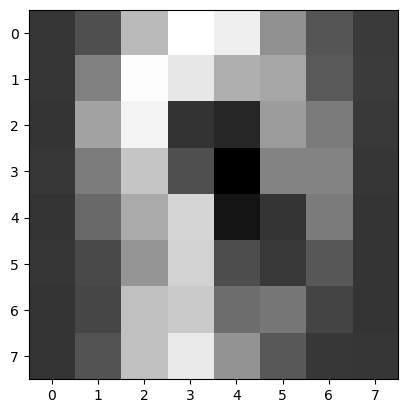

In [37]:
plt.imshow(reconstruction.reshape((8,8)),cmap="gray")

# Surfing the embedding manifold 

In [38]:
feature_ext = keras.Model(inputs=input_img, outputs=encoder_output)
representation=feature_ext(train)

In [39]:
from scipy.spatial import distance 
N=10
vx = np.linspace(np.min(representation[:,0]),np.max(representation[:,0]),N)
vy = np.linspace(np.min(representation[:,1]),np.max(representation[:,1]),N)
print(vx,vy)

def is_visited(x,l):
    for item in l:
        if np.abs(x-item)<1e-10:
            return True
    return False

visited=[]
idx_mat=np.zeros((N,N))       

for i in range(N):
    for j in range(N):
        d = distance.cdist(np.array([vx[i],vy[j]])[np.newaxis,:], representation)
        idx_sort = np.argsort(d)[0]
        idx_not_visited=[tmp for tmp in idx_sort if not(is_visited(tmp,visited))]
        if len(idx_not_visited)>0:
            idx_mat[i,j] = idx_not_visited[0]
            visited.append(idx_not_visited[0])

[ 0.          7.32442051 14.64884101 21.97326152 29.29768202 36.62210253
 43.94652303 51.27094354 58.59536404 65.91978455] [ 0.          8.68950314 17.37900628 26.06850942 34.75801256 43.4475157
 52.13701884 60.82652198 69.51602512 78.20552826]


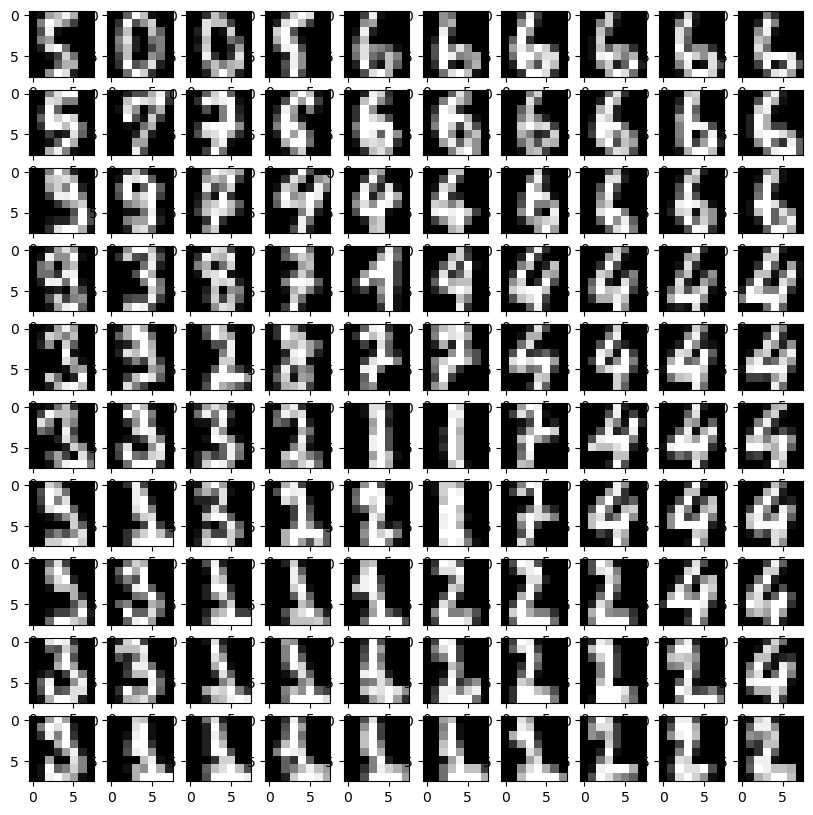

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
f, axarr = plt.subplots(N, N)

for i in range(N):
    for j in range(N):
        axarr[i,j].imshow(train[int(idx_mat[i,j]),:].reshape((8,8)),cmap='gray', interpolation='nearest')
f.set_size_inches(10,10)

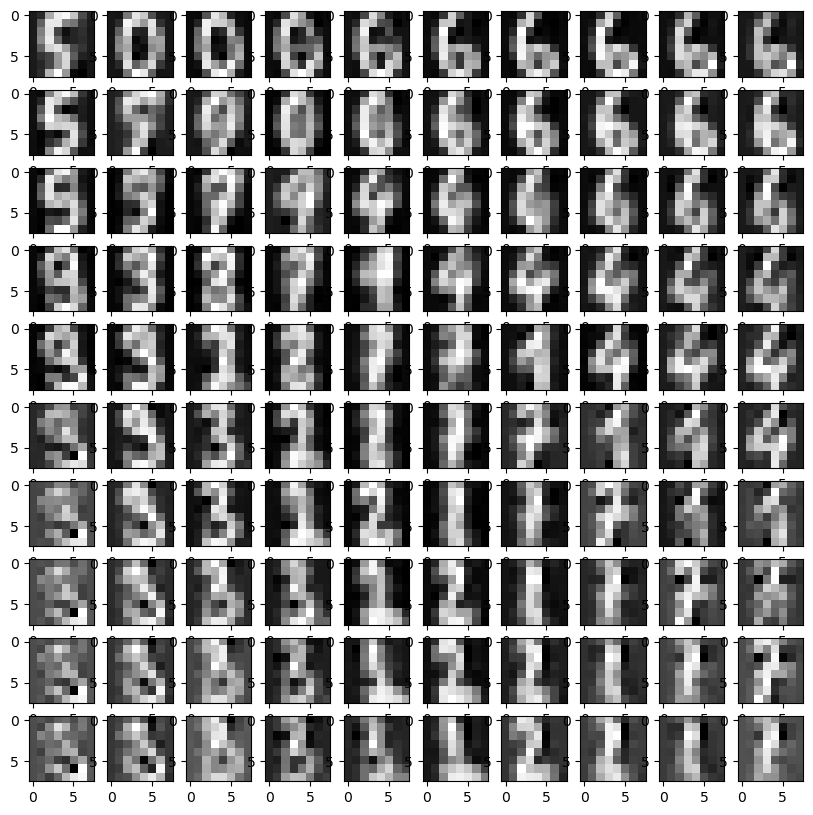

In [41]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(N, N)

for i in range(N):
    for j in range(N):
        reconstruction = decoder(tf.constant(np.array([[vx[i],vy[j]]])))
        axarr[i,j].imshow(reconstruction.numpy().reshape((8,8)),cmap='gray', interpolation='nearest')
f.set_size_inches(10,10)

# Some notes on Variational Autoencoders

Althought autoencoders already serve the trick for generating samples. It turns out that space from which we are generating seems to be composed of bubbles of information with bad interpolation properties among bubbles. In order to solve that issue and smooth the manifold Variational Autoencoders (VAE) are proposed.

<img src = "vae2_proc.png">

This probabilistic behavior requires the use of a different loss, Kullbakc-Leibler divergence.

In practice the latent space is going to be modeled as a Gaussian distribution, and thus two vectors are returned.

<img src = "vae2.png">

But... what is the distribution we are comparing with in the loss? We will use standard normal distribution, resulting in the following loss:


$$L (x,\hat{x}) = \|x-\hat{x}\| + KL(\mathcal{N}(\mu(x),\sigma(x)),\mathcal{N}(0,1))$$


Where this comes from?

We are using Variational Inference for learning. This is we are approximating the desired distribution $p(z|x)$ by a controlled set of base functions $q(z)$. Usually, we use mean field approximation in which we assume that all variables in $z$ are independent and Gaussian. This is $q_x(z) = \prod q_x(z^{(i)}) = \prod \mathcal{N}(\mu^{(i)}(x),\sigma^{(i)}(x))$.

Our goal is

$$\underset{\mu,\sigma}{\text{minimize}}\quad KL(q_x(z),p(z|x))$$

where 

$$KL(q(x)\|p(x)) = \mathbb{E}_{q(x)}[\log\frac{q(x)}{p(x)}] = \int_{-\infty}^{\infty} q(x) \log \frac{q(x)}{p(x)}dx$$,

thus 

$$KL(q_x(z),p(z|x)) = \mathbb{E}_{z\sim q(x)}[\log q(z) - \log p(z|x)] $$

$$= \mathbb{E}_{z\sim q(x)}[\log q(z)] - \mathbb{E}_{z\sim q(x)}[\log p(z|x)]$$

$$= \mathbb{E}_{z\sim q(z)}[\log q(x)] - \mathbb{E}_{z\sim q(x)}[\log p(x|z) + \log p(z) - \log p(x)]$$

$$= - \mathbb{E}_{z\sim q(x)}[\log p(x|z)] +\mathbb{E}_{z\sim q(x)}[\log q(z) -\log p(z) + \log p(x)]$$

Observe that $p(x)$ does not depend on $z$ so this term is irrelevant in terms of the minimization. Thus

$$\underset{\mu,\sigma}{\text{minimize}}\quad - \mathbb{E}_{z\sim q(x)}[\log p(x|z)] +\mathbb{E}_{z\sim q(x)}[\log q(z) -\log p(z)] = $$

$$\underset{\mu,\sigma}{\text{minimize}}\quad - \mathbb{E}_{z\sim q(x)}[\log p(x|z)] +KL(q(z)\|p(z))$$


considering $p(x|z)$ a Gaussian distribution, then 

$$\underset{\mu,\sigma}{\text{minimize}}\quad - \mathbb{E}_{z\sim q(x)}[-\frac{(x-f(z))^2}{2c}] +KL(q(z)\|p(z))$$

that shows the dual loss we brought up before. 

# Generative Adversarial Networks

This is a clever trick for guiding a network into mimicking a sampled data distribution. In a nutshell it consists of a two part process:

- **Part 1: The generator** A network plays the role of a generator. We input data coming from one well-known distribution such as a Normal distribution and the output is expected to be the type of data we desire, e.g. cat images, words, etc. Just as we saw with the decoder of the Auto-encoder.

- **Part 2: The discriminator** In order for the generator to be able to achieve its goal here comes the clever trick. A discriminator is trained with data coming from the true source we want to mimick and with the data coming from the generator. These are mixed. And the role of the discriminator is to tell apart real from fake data. 

In [42]:
%reset -f
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


In [43]:
# Load data
from sklearn.datasets import load_digits
data = load_digits()

idx = np.random.permutation(data.data.shape[0])
idx_train = idx[:-100]
idx_test = idx[-100:]

train = data.data[idx_train,:]
test = data.data[idx_test,:]

train_y = data.target[idx_train]
test_y = data.target[idx_test]

In [44]:
from tensorflow.keras import layers


tf.keras.backend.clear_session()

noise = keras.Input(shape=(64,), name="random")

x = keras.layers.Dense(128,activation="relu")(noise)
x = keras.layers.Dense(64,activation="relu")(x)
gen_output = keras.layers.Dense(64)(x) # The same as the decoder
generator = keras.Model(inputs=noise, outputs=gen_output, name="generator")


In [45]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, clipvalue=1.0, decay=6e-8)
GEN = tf.keras.Sequential()
GEN.add(generator)
GEN.compile(loss='least_squares', optimizer=optimizer,metrics=['rmse'])


In [46]:

input_img = keras.Input(shape=(64,), name="image")
labels = keras.layers.Input(name="label", shape=(None,))

x = keras.layers.Dropout(0.1)(input_img)
x = keras.layers.Dense(256,activation="relu")(x)
x = keras.layers.Dense(64,activation="relu")(x)
dis_output = keras.layers.Dense(1)(x)

discriminator = keras.Model(inputs=input_img, outputs=dis_output, name="discriminator")


In [47]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, clipvalue=1.0, decay=6e-8)
DM = tf.keras.Sequential()
DM.add(discriminator)
DM.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])


In [48]:
generator.trainable=False
GAN = tf.keras.Sequential()
GAN.add(generator)
GAN.add(discriminator)
GAN.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

tf.Tensor(
[[ 0.32766518  0.08126039  0.46472335 -0.34138185 -0.6254648   0.24156275
  -0.03363755 -0.3197345  -1.0848318   1.1447692  -0.07221648 -1.0799575
   0.11785471 -0.19735798 -0.273885    0.3942282   0.4514687  -0.5651351
  -0.10245561 -0.44546884 -0.34812877  0.18784657  0.444853    0.01450828
  -0.2062136   0.94788516  0.89586484 -0.11035658 -0.37641215  1.16998
   0.06978055  0.48649192 -0.23497403  0.689156    0.4996563   0.5992128
  -0.21572706 -0.88944054  0.01865098 -0.11616421  0.18359038 -0.59996474
  -0.53965175 -0.6656134   0.12178491  0.4837354   0.35828245  0.40527606
  -0.36695528 -0.1921123   0.3042798   1.1417315  -1.644366   -0.39032632
   0.17615782 -0.0279161  -1.109177   -0.00636674  0.79178154  0.11264324
  -0.2381676   0.02443206  0.39164257  0.703593  ]], shape=(1, 64), dtype=float32)


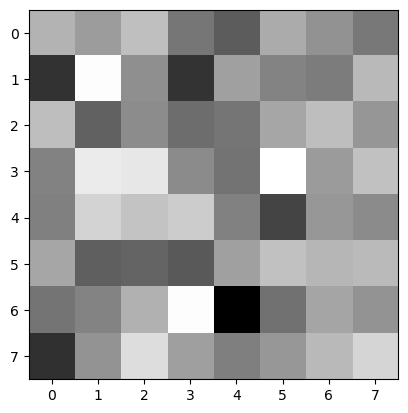

In [49]:
noise = tf.random.normal([1, 64])
generated_image = generator(noise, training=False)

print(generated_image)
plt.imshow(generated_image[0].numpy().reshape((8,8)), cmap='gray')

In [50]:
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = np.random.randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [51]:
generate_latent_points(64,2)

array([[ 9.59117902e-01, -2.10106011e-02, -2.80590976e+00,
        -8.44430725e-01,  1.58101506e-01,  9.93237025e-01,
         8.90058432e-01, -3.95897502e-01,  5.90260136e-01,
         1.24697881e+00, -6.69019974e-01,  4.43353645e-01,
        -1.26070719e-01,  3.45992325e-01,  9.21270523e-01,
        -2.57737771e-01,  1.26860450e+00, -7.99649079e-01,
         8.96414662e-01, -1.20788588e+00,  1.88039030e+00,
        -5.57115819e-01,  1.63609698e-01,  3.01608743e+00,
        -1.90481912e-01, -2.99079683e-02, -4.59474943e-01,
        -9.57080695e-01,  6.87018256e-01, -1.17568940e+00,
         1.16506769e+00,  4.26745999e-01, -1.03033086e+00,
        -3.44382590e-01,  1.60504991e+00, -3.80346829e-02,
        -4.22655063e-01, -1.50864880e-01,  1.00763399e-01,
         1.96134785e-01, -1.67744251e+00, -6.28334512e-01,
         6.93910716e-01, -1.44156214e+00, -6.39655362e-01,
         1.30029985e+00, -7.50479023e-01, -4.38939225e-01,
         7.53298320e-01,  2.11643531e+00, -2.04843740e-0

In [52]:
def generate_fake_samples(gen, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = gen.predict(x_input)
    # create 'fake' class labels (0)
    y = np.zeros((n_samples, 1))
    return X, y


In [53]:
generate_fake_samples(GEN,64,1)

1/1 [==============================] - 0s 26ms/step


2022-08-31 18:31:23.609184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(array([[ 7.0212728e-01, -7.6322293e-01,  7.2094744e-01,  2.3356859e-01,
         -4.8058009e-01,  3.6065516e-01,  4.6811253e-01, -5.4094005e-01,
          1.9956928e-01,  3.9107496e-01, -2.3751068e-01, -1.3502887e-01,
          4.4907600e-01,  4.0516692e-01,  2.7513093e-01,  7.6904196e-01,
         -3.6450550e-01, -3.2211445e-02, -9.3779251e-02,  3.1282479e-01,
          3.4748018e-04,  5.6560487e-02,  3.4231728e-01, -2.9879841e-01,
          1.4292631e-01,  7.2965038e-01,  3.3438712e-01, -1.1179254e+00,
          8.9985296e-02,  1.0188481e+00,  2.5400797e-01,  7.3369908e-01,
         -1.2709498e-02,  9.2520612e-01, -2.5019521e-01,  2.5003582e-01,
         -3.3173096e-01, -1.7388073e-01, -5.8151692e-02, -3.9486259e-02,
         -1.4376244e-01, -1.4678189e-01, -3.6973375e-01, -3.3762175e-01,
          3.2029188e-01,  3.3656052e-01,  4.6484587e-01,  6.8675661e-01,
         -5.1916081e-01,  1.0425362e-01,  6.7870402e-01,  1.1150341e+00,
         -5.3411162e-01, -2.9214764e-01,  6.3208413

In [54]:
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = np.random.randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    # generate 'real' class labels (1)
    y = np.ones((n_samples, 1))
    return X, y

In [55]:
generate_real_samples(train,3)

(array([[ 0.,  0.,  9., 16., 16., 16., 10.,  0.,  0.,  4., 16., 14.,  8.,
         11., 11.,  0.,  0., 11., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  5.,
         15., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  1., 14., 15.,  0.,  0.,
          0.,  0.,  0.,  0.,  8., 16.,  0.,  0.,  0.,  0.,  0.,  9., 13.,
         14.,  0.,  0.,  0.,  0.,  0., 12., 16.,  7.,  0.,  0.,  0.],
        [ 0.,  0., 10., 15.,  7.,  0.,  0.,  0.,  0.,  4., 16., 13., 11.,
         11.,  0.,  0.,  0., 10., 16., 12., 15., 16.,  4.,  0.,  0.,  3.,
         12., 12., 14., 16.,  4.,  0.,  0.,  0.,  0.,  0., 10., 16.,  4.,
          0.,  0.,  0.,  0.,  0.,  9., 16.,  4.,  0.,  0.,  0.,  4.,  4.,
         15., 15.,  0.,  0.,  0.,  1., 12., 15., 12.,  3.,  0.,  0.],
        [ 0.,  0.,  6., 12., 12.,  6.,  0.,  0.,  0.,  0., 11., 16., 16.,
         13.,  0.,  0.,  0.,  0., 12., 16., 16.,  8.,  0.,  0.,  0.,  0.,
          8., 16., 16., 12.,  0.,  0.,  0.,  2., 13., 16., 16., 12.,  0.,
          0.,  0.,  1., 16., 16., 16., 10.,  0

In [56]:
def trainGAN(gen, dm, gan, dataset, latent_dim, n_epochs=100, n_batch=256):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    print(bat_per_epo)
    print(half_batch)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(gen, latent_dim, half_batch)
            # create training set for the discriminator
            X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
            # update discriminator model weights
            d_loss, _ = dm.train_on_batch(X, y)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples - we want the error to improve the generator thus the change
            y_gan = np.ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss[0]))

In [57]:
trainGAN(GEN,DM,GAN,train,64,n_epochs=10000)

6
128
4/4 [==============================] - 0s 2ms/step


2022-08-31 18:31:23.864549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


>1, 1/6, d=0.698, g=9.894
4/4 [==============================] - 0s 2ms/step


2022-08-31 18:31:24.236150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


>1, 2/6, d=2.256, g=1.334
4/4 [==============================] - 0s 2ms/step
>1, 3/6, d=0.557, g=0.846
4/4 [==============================] - 0s 2ms/step
>1, 4/6, d=0.625, g=0.726
4/4 [==============================] - 0s 2ms/step
>1, 5/6, d=0.845, g=0.689
4/4 [==============================] - 0s 2ms/step
>1, 6/6, d=1.233, g=0.769
4/4 [==============================] - 0s 2ms/step
>2, 1/6, d=1.015, g=0.730
4/4 [==============================] - 0s 2ms/step
>2, 2/6, d=0.770, g=0.779
4/4 [==============================] - 0s 2ms/step
>2, 3/6, d=0.824, g=0.727
4/4 [==============================] - 0s 2ms/step
>2, 4/6, d=0.644, g=0.853
4/4 [==============================] - 0s 2ms/step
>2, 5/6, d=0.508, g=0.956
4/4 [==============================] - 0s 2ms/step
>2, 6/6, d=0.438, g=0.820
4/4 [==============================] - 0s 2ms/step
>3, 1/6, d=0.869, g=1.210
4/4 [==============================] - 0s 2ms/step
>3, 2/6, d=0.332, g=0.834
4/4 [==============================] - 0s 2ms/step

4/4 [==============================] - 0s 2ms/step
>18, 6/6, d=0.524, g=0.610
4/4 [==============================] - 0s 2ms/step
>19, 1/6, d=0.517, g=0.592
4/4 [==============================] - 0s 2ms/step
>19, 2/6, d=0.513, g=0.579
4/4 [==============================] - 0s 2ms/step
>19, 3/6, d=0.518, g=0.587
4/4 [==============================] - 0s 2ms/step
>19, 4/6, d=0.558, g=0.628
4/4 [==============================] - 0s 2ms/step
>19, 5/6, d=0.509, g=0.604
4/4 [==============================] - 0s 2ms/step
>19, 6/6, d=0.666, g=0.629
4/4 [==============================] - 0s 2ms/step
>20, 1/6, d=0.515, g=0.627
4/4 [==============================] - 0s 2ms/step
>20, 2/6, d=0.517, g=0.609
4/4 [==============================] - 0s 2ms/step
>20, 3/6, d=0.510, g=0.608
4/4 [==============================] - 0s 2ms/step
>20, 4/6, d=0.539, g=0.592
4/4 [==============================] - 0s 2ms/step
>20, 5/6, d=0.596, g=0.611
4/4 [==============================] - 0s 2ms/step
>20, 6/6, d=0

4/4 [==============================] - 0s 2ms/step
>36, 3/6, d=0.450, g=0.620
4/4 [==============================] - 0s 2ms/step
>36, 4/6, d=0.450, g=0.599
4/4 [==============================] - 0s 2ms/step
>36, 5/6, d=0.489, g=0.603
4/4 [==============================] - 0s 2ms/step
>36, 6/6, d=0.478, g=0.596
4/4 [==============================] - 0s 2ms/step
>37, 1/6, d=0.467, g=0.564
4/4 [==============================] - 0s 2ms/step
>37, 2/6, d=0.517, g=0.552
4/4 [==============================] - 0s 2ms/step
>37, 3/6, d=0.526, g=0.585
4/4 [==============================] - 0s 2ms/step
>37, 4/6, d=0.487, g=0.584
4/4 [==============================] - 0s 2ms/step
>37, 5/6, d=0.516, g=0.586
4/4 [==============================] - 0s 2ms/step
>37, 6/6, d=0.523, g=0.566
4/4 [==============================] - 0s 2ms/step
>38, 1/6, d=0.582, g=0.569
4/4 [==============================] - 0s 2ms/step
>38, 2/6, d=0.503, g=0.584
4/4 [==============================] - 0s 2ms/step
>38, 3/6, d=0

4/4 [==============================] - 0s 2ms/step
>53, 6/6, d=0.612, g=0.547
4/4 [==============================] - 0s 2ms/step
>54, 1/6, d=0.516, g=0.557
4/4 [==============================] - 0s 2ms/step
>54, 2/6, d=0.529, g=0.537
4/4 [==============================] - 0s 2ms/step
>54, 3/6, d=0.520, g=0.551
4/4 [==============================] - 0s 2ms/step
>54, 4/6, d=0.519, g=0.552
4/4 [==============================] - 0s 2ms/step
>54, 5/6, d=0.518, g=0.567
4/4 [==============================] - 0s 2ms/step
>54, 6/6, d=0.533, g=0.557
4/4 [==============================] - 0s 2ms/step
>55, 1/6, d=0.480, g=0.553
4/4 [==============================] - 0s 2ms/step
>55, 2/6, d=0.530, g=0.557
4/4 [==============================] - 0s 2ms/step
>55, 3/6, d=0.528, g=0.545
4/4 [==============================] - 0s 2ms/step
>55, 4/6, d=0.529, g=0.551
4/4 [==============================] - 0s 2ms/step
>55, 5/6, d=0.533, g=0.549
4/4 [==============================] - 0s 2ms/step
>55, 6/6, d=0

4/4 [==============================] - 0s 2ms/step
>71, 3/6, d=0.542, g=0.529
4/4 [==============================] - 0s 2ms/step
>71, 4/6, d=0.516, g=0.544
4/4 [==============================] - 0s 2ms/step
>71, 5/6, d=0.557, g=0.545
4/4 [==============================] - 0s 2ms/step
>71, 6/6, d=0.516, g=0.541
4/4 [==============================] - 0s 2ms/step
>72, 1/6, d=0.517, g=0.543
4/4 [==============================] - 0s 2ms/step
>72, 2/6, d=0.558, g=0.534
4/4 [==============================] - 0s 2ms/step
>72, 3/6, d=0.536, g=0.535
4/4 [==============================] - 0s 2ms/step
>72, 4/6, d=0.529, g=0.528
4/4 [==============================] - 0s 2ms/step
>72, 5/6, d=0.513, g=0.522
4/4 [==============================] - 0s 2ms/step
>72, 6/6, d=0.535, g=0.538
4/4 [==============================] - 0s 2ms/step
>73, 1/6, d=0.541, g=0.535
4/4 [==============================] - 0s 2ms/step
>73, 2/6, d=0.537, g=0.543
4/4 [==============================] - 0s 2ms/step
>73, 3/6, d=0

4/4 [==============================] - 0s 2ms/step
>88, 6/6, d=0.553, g=0.550
4/4 [==============================] - 0s 2ms/step
>89, 1/6, d=0.507, g=0.554
4/4 [==============================] - 0s 2ms/step
>89, 2/6, d=0.504, g=0.537
4/4 [==============================] - 0s 2ms/step
>89, 3/6, d=0.554, g=0.520
4/4 [==============================] - 0s 2ms/step
>89, 4/6, d=0.512, g=0.541
4/4 [==============================] - 0s 3ms/step
>89, 5/6, d=0.506, g=0.522
4/4 [==============================] - 0s 2ms/step
>89, 6/6, d=0.527, g=0.533
4/4 [==============================] - 0s 2ms/step
>90, 1/6, d=0.544, g=0.532
4/4 [==============================] - 0s 2ms/step
>90, 2/6, d=0.509, g=0.525
4/4 [==============================] - 0s 2ms/step
>90, 3/6, d=0.520, g=0.515
4/4 [==============================] - 0s 2ms/step
>90, 4/6, d=0.507, g=0.525
4/4 [==============================] - 0s 2ms/step
>90, 5/6, d=0.532, g=0.523
4/4 [==============================] - 0s 2ms/step
>90, 6/6, d=0

4/4 [==============================] - 0s 2ms/step
>106, 2/6, d=0.519, g=0.530
4/4 [==============================] - 0s 2ms/step
>106, 3/6, d=0.537, g=0.542
4/4 [==============================] - 0s 2ms/step
>106, 4/6, d=0.513, g=0.545
4/4 [==============================] - 0s 2ms/step
>106, 5/6, d=0.503, g=0.549
4/4 [==============================] - 0s 2ms/step
>106, 6/6, d=0.483, g=0.549
4/4 [==============================] - 0s 2ms/step
>107, 1/6, d=0.529, g=0.532
4/4 [==============================] - 0s 2ms/step
>107, 2/6, d=0.512, g=0.532
4/4 [==============================] - 0s 2ms/step
>107, 3/6, d=0.505, g=0.539
4/4 [==============================] - 0s 2ms/step
>107, 4/6, d=0.501, g=0.532
4/4 [==============================] - 0s 2ms/step
>107, 5/6, d=0.508, g=0.518
4/4 [==============================] - 0s 2ms/step
>107, 6/6, d=0.504, g=0.539
4/4 [==============================] - 0s 2ms/step
>108, 1/6, d=0.501, g=0.516
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>123, 4/6, d=0.531, g=0.506
4/4 [==============================] - 0s 2ms/step
>123, 5/6, d=0.533, g=0.500
4/4 [==============================] - 0s 2ms/step
>123, 6/6, d=0.526, g=0.494
4/4 [==============================] - 0s 2ms/step
>124, 1/6, d=0.507, g=0.503
4/4 [==============================] - 0s 2ms/step
>124, 2/6, d=0.530, g=0.500
4/4 [==============================] - 0s 2ms/step
>124, 3/6, d=0.522, g=0.502
4/4 [==============================] - 0s 2ms/step
>124, 4/6, d=0.552, g=0.497
4/4 [==============================] - 0s 2ms/step
>124, 5/6, d=0.520, g=0.512
4/4 [==============================] - 0s 2ms/step
>124, 6/6, d=0.548, g=0.523
4/4 [==============================] - 0s 2ms/step
>125, 1/6, d=0.533, g=0.518
4/4 [==============================] - 0s 2ms/step
>125, 2/6, d=0.529, g=0.506
4/4 [==============================] - 0s 2ms/step
>125, 3/6, d=0.501, g=0.511
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>140, 6/6, d=0.531, g=0.509
4/4 [==============================] - 0s 2ms/step
>141, 1/6, d=0.538, g=0.502
4/4 [==============================] - 0s 2ms/step
>141, 2/6, d=0.534, g=0.497
4/4 [==============================] - 0s 2ms/step
>141, 3/6, d=0.507, g=0.484
4/4 [==============================] - 0s 2ms/step
>141, 4/6, d=0.534, g=0.500
4/4 [==============================] - 0s 2ms/step
>141, 5/6, d=0.513, g=0.508
4/4 [==============================] - 0s 2ms/step
>141, 6/6, d=0.585, g=0.488
4/4 [==============================] - 0s 2ms/step
>142, 1/6, d=0.562, g=0.493
4/4 [==============================] - 0s 2ms/step
>142, 2/6, d=0.532, g=0.505
4/4 [==============================] - 0s 2ms/step
>142, 3/6, d=0.524, g=0.502
4/4 [==============================] - 0s 2ms/step
>142, 4/6, d=0.547, g=0.504
4/4 [==============================] - 0s 2ms/step
>142, 5/6, d=0.532, g=0.501
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>158, 2/6, d=0.508, g=0.508
4/4 [==============================] - 0s 2ms/step
>158, 3/6, d=0.523, g=0.516
4/4 [==============================] - 0s 2ms/step
>158, 4/6, d=0.512, g=0.521
4/4 [==============================] - 0s 2ms/step
>158, 5/6, d=0.535, g=0.511
4/4 [==============================] - 0s 2ms/step
>158, 6/6, d=0.537, g=0.510
4/4 [==============================] - 0s 2ms/step
>159, 1/6, d=0.510, g=0.521
4/4 [==============================] - 0s 2ms/step
>159, 2/6, d=0.512, g=0.496
4/4 [==============================] - 0s 2ms/step
>159, 3/6, d=0.515, g=0.489
4/4 [==============================] - 0s 2ms/step
>159, 4/6, d=0.531, g=0.497
4/4 [==============================] - 0s 2ms/step
>159, 5/6, d=0.594, g=0.505
4/4 [==============================] - 0s 2ms/step
>159, 6/6, d=0.512, g=0.492
4/4 [==============================] - 0s 2ms/step
>160, 1/6, d=0.528, g=0.496
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>175, 4/6, d=0.519, g=0.499
4/4 [==============================] - 0s 2ms/step
>175, 5/6, d=0.508, g=0.511
4/4 [==============================] - 0s 2ms/step
>175, 6/6, d=0.529, g=0.486
4/4 [==============================] - 0s 2ms/step
>176, 1/6, d=0.541, g=0.485
4/4 [==============================] - 0s 2ms/step
>176, 2/6, d=0.537, g=0.492
4/4 [==============================] - 0s 2ms/step
>176, 3/6, d=0.519, g=0.485
4/4 [==============================] - 0s 2ms/step
>176, 4/6, d=0.514, g=0.481
4/4 [==============================] - 0s 2ms/step
>176, 5/6, d=0.528, g=0.482
4/4 [==============================] - 0s 2ms/step
>176, 6/6, d=0.528, g=0.479
4/4 [==============================] - 0s 2ms/step
>177, 1/6, d=0.522, g=0.494
4/4 [==============================] - 0s 2ms/step
>177, 2/6, d=0.535, g=0.496
4/4 [==============================] - 0s 2ms/step
>177, 3/6, d=0.548, g=0.496
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>192, 6/6, d=0.529, g=0.476
4/4 [==============================] - 0s 2ms/step
>193, 1/6, d=0.549, g=0.495
4/4 [==============================] - 0s 2ms/step
>193, 2/6, d=0.537, g=0.485
4/4 [==============================] - 0s 2ms/step
>193, 3/6, d=0.544, g=0.500
4/4 [==============================] - 0s 2ms/step
>193, 4/6, d=0.519, g=0.498
4/4 [==============================] - 0s 2ms/step
>193, 5/6, d=0.523, g=0.478
4/4 [==============================] - 0s 2ms/step
>193, 6/6, d=0.542, g=0.473
4/4 [==============================] - 0s 2ms/step
>194, 1/6, d=0.558, g=0.491
4/4 [==============================] - 0s 2ms/step
>194, 2/6, d=0.529, g=0.503
4/4 [==============================] - 0s 2ms/step
>194, 3/6, d=0.537, g=0.498
4/4 [==============================] - 0s 2ms/step
>194, 4/6, d=0.523, g=0.497
4/4 [==============================] - 0s 2ms/step
>194, 5/6, d=0.516, g=0.491
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>210, 2/6, d=0.513, g=0.488
4/4 [==============================] - 0s 2ms/step
>210, 3/6, d=0.521, g=0.497
4/4 [==============================] - 0s 2ms/step
>210, 4/6, d=0.541, g=0.500
4/4 [==============================] - 0s 2ms/step
>210, 5/6, d=0.544, g=0.497
4/4 [==============================] - 0s 2ms/step
>210, 6/6, d=0.519, g=0.487
4/4 [==============================] - 0s 2ms/step
>211, 1/6, d=0.526, g=0.488
4/4 [==============================] - 0s 2ms/step
>211, 2/6, d=0.547, g=0.487
4/4 [==============================] - 0s 2ms/step
>211, 3/6, d=0.508, g=0.470
4/4 [==============================] - 0s 2ms/step
>211, 4/6, d=0.535, g=0.475
4/4 [==============================] - 0s 2ms/step
>211, 5/6, d=0.538, g=0.480
4/4 [==============================] - 0s 2ms/step
>211, 6/6, d=0.531, g=0.479
4/4 [==============================] - 0s 2ms/step
>212, 1/6, d=0.548, g=0.493
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>227, 4/6, d=0.520, g=0.494
4/4 [==============================] - 0s 2ms/step
>227, 5/6, d=0.522, g=0.478
4/4 [==============================] - 0s 2ms/step
>227, 6/6, d=0.535, g=0.483
4/4 [==============================] - 0s 2ms/step
>228, 1/6, d=0.532, g=0.484
4/4 [==============================] - 0s 2ms/step
>228, 2/6, d=0.519, g=0.478
4/4 [==============================] - 0s 2ms/step
>228, 3/6, d=0.543, g=0.478
4/4 [==============================] - 0s 2ms/step
>228, 4/6, d=0.527, g=0.476
4/4 [==============================] - 0s 2ms/step
>228, 5/6, d=0.534, g=0.484
4/4 [==============================] - 0s 2ms/step
>228, 6/6, d=0.537, g=0.490
4/4 [==============================] - 0s 2ms/step
>229, 1/6, d=0.537, g=0.485
4/4 [==============================] - 0s 2ms/step
>229, 2/6, d=0.556, g=0.488
4/4 [==============================] - 0s 2ms/step
>229, 3/6, d=0.533, g=0.493
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>244, 6/6, d=0.571, g=0.472
4/4 [==============================] - 0s 2ms/step
>245, 1/6, d=0.543, g=0.478
4/4 [==============================] - 0s 2ms/step
>245, 2/6, d=0.516, g=0.477
4/4 [==============================] - 0s 2ms/step
>245, 3/6, d=0.567, g=0.491
4/4 [==============================] - 0s 2ms/step
>245, 4/6, d=0.537, g=0.482
4/4 [==============================] - 0s 2ms/step
>245, 5/6, d=0.544, g=0.474
4/4 [==============================] - 0s 2ms/step
>245, 6/6, d=0.528, g=0.478
4/4 [==============================] - 0s 2ms/step
>246, 1/6, d=0.514, g=0.469
4/4 [==============================] - 0s 2ms/step
>246, 2/6, d=0.544, g=0.478
4/4 [==============================] - 0s 2ms/step
>246, 3/6, d=0.549, g=0.471
4/4 [==============================] - 0s 2ms/step
>246, 4/6, d=0.528, g=0.476
4/4 [==============================] - 0s 2ms/step
>246, 5/6, d=0.542, g=0.464
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>262, 2/6, d=0.533, g=0.474
4/4 [==============================] - 0s 2ms/step
>262, 3/6, d=0.530, g=0.478
4/4 [==============================] - 0s 2ms/step
>262, 4/6, d=0.534, g=0.467
4/4 [==============================] - 0s 2ms/step
>262, 5/6, d=0.535, g=0.473
4/4 [==============================] - 0s 2ms/step
>262, 6/6, d=0.523, g=0.469
4/4 [==============================] - 0s 2ms/step
>263, 1/6, d=0.532, g=0.476
4/4 [==============================] - 0s 2ms/step
>263, 2/6, d=0.545, g=0.457
4/4 [==============================] - 0s 2ms/step
>263, 3/6, d=0.524, g=0.468
4/4 [==============================] - 0s 2ms/step
>263, 4/6, d=0.537, g=0.460
4/4 [==============================] - 0s 2ms/step
>263, 5/6, d=0.546, g=0.465
4/4 [==============================] - 0s 2ms/step
>263, 6/6, d=0.543, g=0.479
4/4 [==============================] - 0s 2ms/step
>264, 1/6, d=0.533, g=0.462
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>279, 4/6, d=0.554, g=0.472
4/4 [==============================] - 0s 2ms/step
>279, 5/6, d=0.536, g=0.476
4/4 [==============================] - 0s 2ms/step
>279, 6/6, d=0.546, g=0.480
4/4 [==============================] - 0s 2ms/step
>280, 1/6, d=0.531, g=0.480
4/4 [==============================] - 0s 2ms/step
>280, 2/6, d=0.516, g=0.471
4/4 [==============================] - 0s 2ms/step
>280, 3/6, d=0.526, g=0.472
4/4 [==============================] - 0s 2ms/step
>280, 4/6, d=0.521, g=0.472
4/4 [==============================] - 0s 2ms/step
>280, 5/6, d=0.507, g=0.461
4/4 [==============================] - 0s 2ms/step
>280, 6/6, d=0.543, g=0.464
4/4 [==============================] - 0s 2ms/step
>281, 1/6, d=0.527, g=0.468
4/4 [==============================] - 0s 2ms/step
>281, 2/6, d=0.535, g=0.461
4/4 [==============================] - 0s 2ms/step
>281, 3/6, d=0.549, g=0.468
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>296, 6/6, d=0.531, g=0.465
4/4 [==============================] - 0s 2ms/step
>297, 1/6, d=0.515, g=0.460
4/4 [==============================] - 0s 2ms/step
>297, 2/6, d=0.521, g=0.467
4/4 [==============================] - 0s 2ms/step
>297, 3/6, d=0.531, g=0.457
4/4 [==============================] - 0s 2ms/step
>297, 4/6, d=0.534, g=0.460
4/4 [==============================] - 0s 2ms/step
>297, 5/6, d=0.540, g=0.466
4/4 [==============================] - 0s 2ms/step
>297, 6/6, d=0.532, g=0.472
4/4 [==============================] - 0s 2ms/step
>298, 1/6, d=0.539, g=0.466
4/4 [==============================] - 0s 2ms/step
>298, 2/6, d=0.540, g=0.451
4/4 [==============================] - 0s 2ms/step
>298, 3/6, d=0.538, g=0.464
4/4 [==============================] - 0s 2ms/step
>298, 4/6, d=0.529, g=0.457
4/4 [==============================] - 0s 2ms/step
>298, 5/6, d=0.536, g=0.452
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>314, 2/6, d=0.535, g=0.468
4/4 [==============================] - 0s 2ms/step
>314, 3/6, d=0.524, g=0.466
4/4 [==============================] - 0s 2ms/step
>314, 4/6, d=0.574, g=0.464
4/4 [==============================] - 0s 2ms/step
>314, 5/6, d=0.534, g=0.461
4/4 [==============================] - 0s 2ms/step
>314, 6/6, d=0.537, g=0.462
4/4 [==============================] - 0s 2ms/step
>315, 1/6, d=0.535, g=0.463
4/4 [==============================] - 0s 2ms/step
>315, 2/6, d=0.538, g=0.481
4/4 [==============================] - 0s 2ms/step
>315, 3/6, d=0.532, g=0.459
4/4 [==============================] - 0s 2ms/step
>315, 4/6, d=0.534, g=0.463
4/4 [==============================] - 0s 2ms/step
>315, 5/6, d=0.572, g=0.467
4/4 [==============================] - 0s 2ms/step
>315, 6/6, d=0.533, g=0.468
4/4 [==============================] - 0s 2ms/step
>316, 1/6, d=0.533, g=0.475
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>331, 4/6, d=0.541, g=0.464
4/4 [==============================] - 0s 2ms/step
>331, 5/6, d=0.544, g=0.468
4/4 [==============================] - 0s 2ms/step
>331, 6/6, d=0.544, g=0.476
4/4 [==============================] - 0s 2ms/step
>332, 1/6, d=0.523, g=0.471
4/4 [==============================] - 0s 2ms/step
>332, 2/6, d=0.591, g=0.457
4/4 [==============================] - 0s 2ms/step
>332, 3/6, d=0.536, g=0.458
4/4 [==============================] - 0s 2ms/step
>332, 4/6, d=0.538, g=0.467
4/4 [==============================] - 0s 2ms/step
>332, 5/6, d=0.533, g=0.470
4/4 [==============================] - 0s 2ms/step
>332, 6/6, d=0.530, g=0.463
4/4 [==============================] - 0s 2ms/step
>333, 1/6, d=0.544, g=0.472
4/4 [==============================] - 0s 2ms/step
>333, 2/6, d=0.531, g=0.468
4/4 [==============================] - 0s 2ms/step
>333, 3/6, d=0.531, g=0.464
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>348, 6/6, d=0.602, g=0.453
4/4 [==============================] - 0s 2ms/step
>349, 1/6, d=0.598, g=0.472
4/4 [==============================] - 0s 2ms/step
>349, 2/6, d=0.537, g=0.454
4/4 [==============================] - 0s 2ms/step
>349, 3/6, d=0.524, g=0.451
4/4 [==============================] - 0s 2ms/step
>349, 4/6, d=0.519, g=0.464
4/4 [==============================] - 0s 2ms/step
>349, 5/6, d=0.537, g=0.447
4/4 [==============================] - 0s 2ms/step
>349, 6/6, d=0.536, g=0.446
4/4 [==============================] - 0s 2ms/step
>350, 1/6, d=0.537, g=0.448
4/4 [==============================] - 0s 2ms/step
>350, 2/6, d=0.557, g=0.463
4/4 [==============================] - 0s 2ms/step
>350, 3/6, d=0.526, g=0.450
4/4 [==============================] - 0s 2ms/step
>350, 4/6, d=0.539, g=0.454
4/4 [==============================] - 0s 2ms/step
>350, 5/6, d=0.533, g=0.444
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>366, 2/6, d=0.586, g=0.456
4/4 [==============================] - 0s 2ms/step
>366, 3/6, d=0.548, g=0.468
4/4 [==============================] - 0s 2ms/step
>366, 4/6, d=0.526, g=0.462
4/4 [==============================] - 0s 2ms/step
>366, 5/6, d=0.536, g=0.468
4/4 [==============================] - 0s 2ms/step
>366, 6/6, d=0.519, g=0.468
4/4 [==============================] - 0s 2ms/step
>367, 1/6, d=0.515, g=0.465
4/4 [==============================] - 0s 2ms/step
>367, 2/6, d=0.540, g=0.466
4/4 [==============================] - 0s 2ms/step
>367, 3/6, d=0.520, g=0.457
4/4 [==============================] - 0s 2ms/step
>367, 4/6, d=0.528, g=0.463
4/4 [==============================] - 0s 2ms/step
>367, 5/6, d=0.529, g=0.469
4/4 [==============================] - 0s 2ms/step
>367, 6/6, d=0.534, g=0.450
4/4 [==============================] - 0s 2ms/step
>368, 1/6, d=0.533, g=0.465
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>383, 4/6, d=0.526, g=0.456
4/4 [==============================] - 0s 2ms/step
>383, 5/6, d=0.518, g=0.460
4/4 [==============================] - 0s 2ms/step
>383, 6/6, d=0.529, g=0.463
4/4 [==============================] - 0s 2ms/step
>384, 1/6, d=0.536, g=0.460
4/4 [==============================] - 0s 2ms/step
>384, 2/6, d=0.532, g=0.460
4/4 [==============================] - 0s 2ms/step
>384, 3/6, d=0.549, g=0.454
4/4 [==============================] - 0s 2ms/step
>384, 4/6, d=0.550, g=0.469
4/4 [==============================] - 0s 2ms/step
>384, 5/6, d=0.536, g=0.461
4/4 [==============================] - 0s 2ms/step
>384, 6/6, d=0.591, g=0.461
4/4 [==============================] - 0s 2ms/step
>385, 1/6, d=0.530, g=0.452
4/4 [==============================] - 0s 2ms/step
>385, 2/6, d=0.533, g=0.451
4/4 [==============================] - 0s 2ms/step
>385, 3/6, d=0.530, g=0.450
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>400, 6/6, d=0.513, g=0.460
4/4 [==============================] - 0s 2ms/step
>401, 1/6, d=0.534, g=0.446
4/4 [==============================] - 0s 2ms/step
>401, 2/6, d=0.532, g=0.463
4/4 [==============================] - 0s 2ms/step
>401, 3/6, d=0.539, g=0.461
4/4 [==============================] - 0s 2ms/step
>401, 4/6, d=0.588, g=0.461
4/4 [==============================] - 0s 2ms/step
>401, 5/6, d=0.543, g=0.457
4/4 [==============================] - 0s 2ms/step
>401, 6/6, d=0.523, g=0.458
4/4 [==============================] - 0s 2ms/step
>402, 1/6, d=0.555, g=0.465
4/4 [==============================] - 0s 2ms/step
>402, 2/6, d=0.550, g=0.466
4/4 [==============================] - 0s 2ms/step
>402, 3/6, d=0.537, g=0.460
4/4 [==============================] - 0s 2ms/step
>402, 4/6, d=0.521, g=0.462
4/4 [==============================] - 0s 2ms/step
>402, 5/6, d=0.534, g=0.465
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>418, 2/6, d=0.533, g=0.456
4/4 [==============================] - 0s 2ms/step
>418, 3/6, d=0.538, g=0.456
4/4 [==============================] - 0s 2ms/step
>418, 4/6, d=0.533, g=0.455
4/4 [==============================] - 0s 2ms/step
>418, 5/6, d=0.528, g=0.442
4/4 [==============================] - 0s 2ms/step
>418, 6/6, d=0.527, g=0.462
4/4 [==============================] - 0s 2ms/step
>419, 1/6, d=0.531, g=0.450
4/4 [==============================] - 0s 2ms/step
>419, 2/6, d=0.542, g=0.451
4/4 [==============================] - 0s 2ms/step
>419, 3/6, d=0.518, g=0.454
4/4 [==============================] - 0s 2ms/step
>419, 4/6, d=0.541, g=0.444
4/4 [==============================] - 0s 2ms/step
>419, 5/6, d=0.525, g=0.446
4/4 [==============================] - 0s 2ms/step
>419, 6/6, d=0.542, g=0.453
4/4 [==============================] - 0s 2ms/step
>420, 1/6, d=0.532, g=0.451
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>435, 4/6, d=0.585, g=0.446
4/4 [==============================] - 0s 2ms/step
>435, 5/6, d=0.546, g=0.456
4/4 [==============================] - 0s 2ms/step
>435, 6/6, d=0.536, g=0.454
4/4 [==============================] - 0s 2ms/step
>436, 1/6, d=0.533, g=0.454
4/4 [==============================] - 0s 2ms/step
>436, 2/6, d=0.536, g=0.462
4/4 [==============================] - 0s 2ms/step
>436, 3/6, d=0.598, g=0.452
4/4 [==============================] - 0s 2ms/step
>436, 4/6, d=0.538, g=0.452
4/4 [==============================] - 0s 2ms/step
>436, 5/6, d=0.549, g=0.448
4/4 [==============================] - 0s 2ms/step
>436, 6/6, d=0.526, g=0.451
4/4 [==============================] - 0s 2ms/step
>437, 1/6, d=0.522, g=0.445
4/4 [==============================] - 0s 2ms/step
>437, 2/6, d=0.518, g=0.450
4/4 [==============================] - 0s 2ms/step
>437, 3/6, d=0.517, g=0.452
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>452, 6/6, d=0.543, g=0.456
4/4 [==============================] - 0s 2ms/step
>453, 1/6, d=0.591, g=0.450
4/4 [==============================] - 0s 2ms/step
>453, 2/6, d=0.543, g=0.449
4/4 [==============================] - 0s 2ms/step
>453, 3/6, d=0.527, g=0.437
4/4 [==============================] - 0s 2ms/step
>453, 4/6, d=0.532, g=0.440
4/4 [==============================] - 0s 2ms/step
>453, 5/6, d=0.540, g=0.445
4/4 [==============================] - 0s 2ms/step
>453, 6/6, d=0.594, g=0.441
4/4 [==============================] - 0s 2ms/step
>454, 1/6, d=0.550, g=0.446
4/4 [==============================] - 0s 2ms/step
>454, 2/6, d=0.542, g=0.455
4/4 [==============================] - 0s 2ms/step
>454, 3/6, d=0.541, g=0.457
4/4 [==============================] - 0s 2ms/step
>454, 4/6, d=0.530, g=0.456
4/4 [==============================] - 0s 2ms/step
>454, 5/6, d=0.548, g=0.454
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>470, 2/6, d=0.527, g=0.447
4/4 [==============================] - 0s 2ms/step
>470, 3/6, d=0.546, g=0.439
4/4 [==============================] - 0s 2ms/step
>470, 4/6, d=0.545, g=0.440
4/4 [==============================] - 0s 2ms/step
>470, 5/6, d=0.536, g=0.442
4/4 [==============================] - 0s 2ms/step
>470, 6/6, d=0.545, g=0.447
4/4 [==============================] - 0s 2ms/step
>471, 1/6, d=0.595, g=0.448
4/4 [==============================] - 0s 2ms/step
>471, 2/6, d=0.592, g=0.452
4/4 [==============================] - 0s 2ms/step
>471, 3/6, d=0.534, g=0.452
4/4 [==============================] - 0s 2ms/step
>471, 4/6, d=0.527, g=0.445
4/4 [==============================] - 0s 2ms/step
>471, 5/6, d=0.527, g=0.435
4/4 [==============================] - 0s 2ms/step
>471, 6/6, d=0.552, g=0.446
4/4 [==============================] - 0s 2ms/step
>472, 1/6, d=0.585, g=0.439
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>487, 4/6, d=0.521, g=0.438
4/4 [==============================] - 0s 2ms/step
>487, 5/6, d=0.533, g=0.450
4/4 [==============================] - 0s 2ms/step
>487, 6/6, d=0.543, g=0.456
4/4 [==============================] - 0s 2ms/step
>488, 1/6, d=0.515, g=0.439
4/4 [==============================] - 0s 2ms/step
>488, 2/6, d=0.552, g=0.448
4/4 [==============================] - 0s 2ms/step
>488, 3/6, d=0.576, g=0.455
4/4 [==============================] - 0s 2ms/step
>488, 4/6, d=0.548, g=0.452
4/4 [==============================] - 0s 2ms/step
>488, 5/6, d=0.518, g=0.450
4/4 [==============================] - 0s 2ms/step
>488, 6/6, d=0.525, g=0.442
4/4 [==============================] - 0s 2ms/step
>489, 1/6, d=0.532, g=0.450
4/4 [==============================] - 0s 2ms/step
>489, 2/6, d=0.556, g=0.441
4/4 [==============================] - 0s 2ms/step
>489, 3/6, d=0.536, g=0.443
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>504, 6/6, d=0.593, g=0.471
4/4 [==============================] - 0s 2ms/step
>505, 1/6, d=0.517, g=0.452
4/4 [==============================] - 0s 2ms/step
>505, 2/6, d=0.565, g=0.453
4/4 [==============================] - 0s 2ms/step
>505, 3/6, d=0.540, g=0.458
4/4 [==============================] - 0s 2ms/step
>505, 4/6, d=0.516, g=0.460
4/4 [==============================] - 0s 2ms/step
>505, 5/6, d=0.536, g=0.440
4/4 [==============================] - 0s 2ms/step
>505, 6/6, d=0.522, g=0.463
4/4 [==============================] - 0s 2ms/step
>506, 1/6, d=0.525, g=0.460
4/4 [==============================] - 0s 2ms/step
>506, 2/6, d=0.580, g=0.452
4/4 [==============================] - 0s 2ms/step
>506, 3/6, d=0.529, g=0.452
4/4 [==============================] - 0s 2ms/step
>506, 4/6, d=0.527, g=0.453
4/4 [==============================] - 0s 2ms/step
>506, 5/6, d=0.532, g=0.432
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>522, 2/6, d=0.585, g=0.440
4/4 [==============================] - 0s 2ms/step
>522, 3/6, d=0.519, g=0.445
4/4 [==============================] - 0s 2ms/step
>522, 4/6, d=0.549, g=0.441
4/4 [==============================] - 0s 2ms/step
>522, 5/6, d=0.518, g=0.443
4/4 [==============================] - 0s 2ms/step
>522, 6/6, d=0.538, g=0.444
4/4 [==============================] - 0s 2ms/step
>523, 1/6, d=0.585, g=0.441
4/4 [==============================] - 0s 2ms/step
>523, 2/6, d=0.534, g=0.444
4/4 [==============================] - 0s 2ms/step
>523, 3/6, d=0.535, g=0.447
4/4 [==============================] - 0s 2ms/step
>523, 4/6, d=0.539, g=0.432
4/4 [==============================] - 0s 2ms/step
>523, 5/6, d=0.541, g=0.440
4/4 [==============================] - 0s 2ms/step
>523, 6/6, d=0.527, g=0.442
4/4 [==============================] - 0s 2ms/step
>524, 1/6, d=0.550, g=0.448
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>539, 4/6, d=0.528, g=0.447
4/4 [==============================] - 0s 2ms/step
>539, 5/6, d=0.532, g=0.447
4/4 [==============================] - 0s 2ms/step
>539, 6/6, d=0.538, g=0.439
4/4 [==============================] - 0s 2ms/step
>540, 1/6, d=0.529, g=0.451
4/4 [==============================] - 0s 2ms/step
>540, 2/6, d=0.547, g=0.449
4/4 [==============================] - 0s 2ms/step
>540, 3/6, d=0.538, g=0.442
4/4 [==============================] - 0s 2ms/step
>540, 4/6, d=0.536, g=0.451
4/4 [==============================] - 0s 2ms/step
>540, 5/6, d=0.542, g=0.456
4/4 [==============================] - 0s 2ms/step
>540, 6/6, d=0.574, g=0.450
4/4 [==============================] - 0s 2ms/step
>541, 1/6, d=0.526, g=0.447
4/4 [==============================] - 0s 2ms/step
>541, 2/6, d=0.525, g=0.456
4/4 [==============================] - 0s 2ms/step
>541, 3/6, d=0.538, g=0.446
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>556, 6/6, d=0.518, g=0.449
4/4 [==============================] - 0s 2ms/step
>557, 1/6, d=0.586, g=0.428
4/4 [==============================] - 0s 2ms/step
>557, 2/6, d=0.609, g=0.441
4/4 [==============================] - 0s 2ms/step
>557, 3/6, d=0.530, g=0.435
4/4 [==============================] - 0s 2ms/step
>557, 4/6, d=0.539, g=0.451
4/4 [==============================] - 0s 2ms/step
>557, 5/6, d=0.529, g=0.434
4/4 [==============================] - 0s 2ms/step
>557, 6/6, d=0.600, g=0.444
4/4 [==============================] - 0s 2ms/step
>558, 1/6, d=0.579, g=0.444
4/4 [==============================] - 0s 2ms/step
>558, 2/6, d=0.529, g=0.424
4/4 [==============================] - 0s 2ms/step
>558, 3/6, d=0.544, g=0.449
4/4 [==============================] - 0s 2ms/step
>558, 4/6, d=0.586, g=0.441
4/4 [==============================] - 0s 2ms/step
>558, 5/6, d=0.660, g=0.437
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>574, 2/6, d=0.530, g=0.449
4/4 [==============================] - 0s 2ms/step
>574, 3/6, d=0.519, g=0.450
4/4 [==============================] - 0s 2ms/step
>574, 4/6, d=0.524, g=0.441
4/4 [==============================] - 0s 2ms/step
>574, 5/6, d=0.528, g=0.456
4/4 [==============================] - 0s 2ms/step
>574, 6/6, d=0.530, g=0.448
4/4 [==============================] - 0s 2ms/step
>575, 1/6, d=0.532, g=0.443
4/4 [==============================] - 0s 2ms/step
>575, 2/6, d=0.540, g=0.433
4/4 [==============================] - 0s 2ms/step
>575, 3/6, d=0.525, g=0.440
4/4 [==============================] - 0s 2ms/step
>575, 4/6, d=0.580, g=0.452
4/4 [==============================] - 0s 2ms/step
>575, 5/6, d=0.534, g=0.441
4/4 [==============================] - 0s 2ms/step
>575, 6/6, d=0.572, g=0.435
4/4 [==============================] - 0s 2ms/step
>576, 1/6, d=0.532, g=0.444
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>591, 4/6, d=0.523, g=0.450
4/4 [==============================] - 0s 2ms/step
>591, 5/6, d=0.552, g=0.445
4/4 [==============================] - 0s 2ms/step
>591, 6/6, d=0.537, g=0.440
4/4 [==============================] - 0s 2ms/step
>592, 1/6, d=0.541, g=0.457
4/4 [==============================] - 0s 2ms/step
>592, 2/6, d=0.532, g=0.452
4/4 [==============================] - 0s 2ms/step
>592, 3/6, d=0.585, g=0.453
4/4 [==============================] - 0s 2ms/step
>592, 4/6, d=0.515, g=0.434
4/4 [==============================] - 0s 2ms/step
>592, 5/6, d=0.591, g=0.453
4/4 [==============================] - 0s 2ms/step
>592, 6/6, d=0.592, g=0.446
4/4 [==============================] - 0s 2ms/step
>593, 1/6, d=0.528, g=0.453
4/4 [==============================] - 0s 2ms/step
>593, 2/6, d=0.536, g=0.444
4/4 [==============================] - 0s 2ms/step
>593, 3/6, d=0.516, g=0.454
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>608, 6/6, d=0.546, g=0.451
4/4 [==============================] - 0s 2ms/step
>609, 1/6, d=0.534, g=0.439
4/4 [==============================] - 0s 2ms/step
>609, 2/6, d=0.596, g=0.440
4/4 [==============================] - 0s 2ms/step
>609, 3/6, d=0.531, g=0.447
4/4 [==============================] - 0s 2ms/step
>609, 4/6, d=0.531, g=0.445
4/4 [==============================] - 0s 2ms/step
>609, 5/6, d=0.592, g=0.446
4/4 [==============================] - 0s 2ms/step
>609, 6/6, d=0.606, g=0.443
4/4 [==============================] - 0s 2ms/step
>610, 1/6, d=0.600, g=0.441
4/4 [==============================] - 0s 2ms/step
>610, 2/6, d=0.524, g=0.444
4/4 [==============================] - 0s 2ms/step
>610, 3/6, d=0.586, g=0.442
4/4 [==============================] - 0s 2ms/step
>610, 4/6, d=0.586, g=0.446
4/4 [==============================] - 0s 2ms/step
>610, 5/6, d=0.525, g=0.435
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>626, 2/6, d=0.530, g=0.429
4/4 [==============================] - 0s 2ms/step
>626, 3/6, d=0.535, g=0.441
4/4 [==============================] - 0s 2ms/step
>626, 4/6, d=0.533, g=0.453
4/4 [==============================] - 0s 2ms/step
>626, 5/6, d=0.525, g=0.440
4/4 [==============================] - 0s 2ms/step
>626, 6/6, d=0.596, g=0.440
4/4 [==============================] - 0s 2ms/step
>627, 1/6, d=0.545, g=0.443
4/4 [==============================] - 0s 2ms/step
>627, 2/6, d=0.546, g=0.442
4/4 [==============================] - 0s 2ms/step
>627, 3/6, d=0.519, g=0.450
4/4 [==============================] - 0s 2ms/step
>627, 4/6, d=0.534, g=0.444
4/4 [==============================] - 0s 2ms/step
>627, 5/6, d=0.573, g=0.435
4/4 [==============================] - 0s 2ms/step
>627, 6/6, d=0.546, g=0.431
4/4 [==============================] - 0s 2ms/step
>628, 1/6, d=0.648, g=0.440
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>643, 4/6, d=0.579, g=0.438
4/4 [==============================] - 0s 2ms/step
>643, 5/6, d=0.541, g=0.439
4/4 [==============================] - 0s 2ms/step
>643, 6/6, d=0.547, g=0.454
4/4 [==============================] - 0s 2ms/step
>644, 1/6, d=0.529, g=0.435
4/4 [==============================] - 0s 2ms/step
>644, 2/6, d=0.650, g=0.441
4/4 [==============================] - 0s 2ms/step
>644, 3/6, d=0.518, g=0.441
4/4 [==============================] - 0s 2ms/step
>644, 4/6, d=0.535, g=0.450
4/4 [==============================] - 0s 2ms/step
>644, 5/6, d=0.594, g=0.438
4/4 [==============================] - 0s 2ms/step
>644, 6/6, d=0.541, g=0.452
4/4 [==============================] - 0s 2ms/step
>645, 1/6, d=0.531, g=0.444
4/4 [==============================] - 0s 2ms/step
>645, 2/6, d=0.534, g=0.444
4/4 [==============================] - 0s 2ms/step
>645, 3/6, d=0.528, g=0.450
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>660, 6/6, d=0.520, g=0.458
4/4 [==============================] - 0s 2ms/step
>661, 1/6, d=0.527, g=0.455
4/4 [==============================] - 0s 2ms/step
>661, 2/6, d=0.539, g=0.452
4/4 [==============================] - 0s 2ms/step
>661, 3/6, d=0.522, g=0.448
4/4 [==============================] - 0s 2ms/step
>661, 4/6, d=0.535, g=0.459
4/4 [==============================] - 0s 2ms/step
>661, 5/6, d=0.508, g=0.456
4/4 [==============================] - 0s 2ms/step
>661, 6/6, d=0.566, g=0.447
4/4 [==============================] - 0s 2ms/step
>662, 1/6, d=0.521, g=0.463
4/4 [==============================] - 0s 2ms/step
>662, 2/6, d=0.575, g=0.463
4/4 [==============================] - 0s 2ms/step
>662, 3/6, d=0.577, g=0.449
4/4 [==============================] - 0s 2ms/step
>662, 4/6, d=0.521, g=0.459
4/4 [==============================] - 0s 2ms/step
>662, 5/6, d=0.592, g=0.451
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>678, 2/6, d=0.534, g=0.449
4/4 [==============================] - 0s 2ms/step
>678, 3/6, d=0.540, g=0.447
4/4 [==============================] - 0s 2ms/step
>678, 4/6, d=0.547, g=0.443
4/4 [==============================] - 0s 2ms/step
>678, 5/6, d=0.542, g=0.444
4/4 [==============================] - 0s 2ms/step
>678, 6/6, d=0.525, g=0.441
4/4 [==============================] - 0s 2ms/step
>679, 1/6, d=0.523, g=0.441
4/4 [==============================] - 0s 2ms/step
>679, 2/6, d=0.536, g=0.447
4/4 [==============================] - 0s 2ms/step
>679, 3/6, d=0.531, g=0.440
4/4 [==============================] - 0s 2ms/step
>679, 4/6, d=0.531, g=0.441
4/4 [==============================] - 0s 2ms/step
>679, 5/6, d=0.534, g=0.447
4/4 [==============================] - 0s 2ms/step
>679, 6/6, d=0.524, g=0.443
4/4 [==============================] - 0s 2ms/step
>680, 1/6, d=0.521, g=0.437
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>695, 4/6, d=0.592, g=0.439
4/4 [==============================] - 0s 2ms/step
>695, 5/6, d=0.535, g=0.434
4/4 [==============================] - 0s 2ms/step
>695, 6/6, d=0.540, g=0.444
4/4 [==============================] - 0s 2ms/step
>696, 1/6, d=0.534, g=0.451
4/4 [==============================] - 0s 2ms/step
>696, 2/6, d=0.520, g=0.438
4/4 [==============================] - 0s 2ms/step
>696, 3/6, d=0.582, g=0.446
4/4 [==============================] - 0s 2ms/step
>696, 4/6, d=0.536, g=0.445
4/4 [==============================] - 0s 2ms/step
>696, 5/6, d=0.595, g=0.443
4/4 [==============================] - 0s 2ms/step
>696, 6/6, d=0.527, g=0.445
4/4 [==============================] - 0s 2ms/step
>697, 1/6, d=0.550, g=0.441
4/4 [==============================] - 0s 2ms/step
>697, 2/6, d=0.587, g=0.440
4/4 [==============================] - 0s 2ms/step
>697, 3/6, d=0.604, g=0.450
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>712, 6/6, d=0.602, g=0.435
4/4 [==============================] - 0s 2ms/step
>713, 1/6, d=0.588, g=0.450
4/4 [==============================] - 0s 2ms/step
>713, 2/6, d=0.651, g=0.450
4/4 [==============================] - 0s 2ms/step
>713, 3/6, d=0.518, g=0.445
4/4 [==============================] - 0s 2ms/step
>713, 4/6, d=0.514, g=0.452
4/4 [==============================] - 0s 2ms/step
>713, 5/6, d=0.543, g=0.446
4/4 [==============================] - 0s 2ms/step
>713, 6/6, d=0.529, g=0.441
4/4 [==============================] - 0s 2ms/step
>714, 1/6, d=0.529, g=0.440
4/4 [==============================] - 0s 2ms/step
>714, 2/6, d=0.580, g=0.443
4/4 [==============================] - 0s 2ms/step
>714, 3/6, d=0.534, g=0.451
4/4 [==============================] - 0s 2ms/step
>714, 4/6, d=0.584, g=0.443
4/4 [==============================] - 0s 2ms/step
>714, 5/6, d=0.531, g=0.449
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>730, 2/6, d=0.523, g=0.446
4/4 [==============================] - 0s 2ms/step
>730, 3/6, d=0.529, g=0.445
4/4 [==============================] - 0s 2ms/step
>730, 4/6, d=0.525, g=0.441
4/4 [==============================] - 0s 2ms/step
>730, 5/6, d=0.591, g=0.436
4/4 [==============================] - 0s 2ms/step
>730, 6/6, d=0.586, g=0.439
4/4 [==============================] - 0s 2ms/step
>731, 1/6, d=0.646, g=0.445
4/4 [==============================] - 0s 2ms/step
>731, 2/6, d=0.591, g=0.441
4/4 [==============================] - 0s 2ms/step
>731, 3/6, d=0.584, g=0.440
4/4 [==============================] - 0s 2ms/step
>731, 4/6, d=0.538, g=0.442
4/4 [==============================] - 0s 2ms/step
>731, 5/6, d=0.522, g=0.442
4/4 [==============================] - 0s 2ms/step
>731, 6/6, d=0.596, g=0.435
4/4 [==============================] - 0s 2ms/step
>732, 1/6, d=0.520, g=0.446
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>747, 4/6, d=0.536, g=0.436
4/4 [==============================] - 0s 2ms/step
>747, 5/6, d=0.544, g=0.444
4/4 [==============================] - 0s 2ms/step
>747, 6/6, d=0.532, g=0.451
4/4 [==============================] - 0s 2ms/step
>748, 1/6, d=0.524, g=0.444
4/4 [==============================] - 0s 2ms/step
>748, 2/6, d=0.530, g=0.443
4/4 [==============================] - 0s 2ms/step
>748, 3/6, d=0.536, g=0.433
4/4 [==============================] - 0s 2ms/step
>748, 4/6, d=0.587, g=0.438
4/4 [==============================] - 0s 2ms/step
>748, 5/6, d=0.585, g=0.438
4/4 [==============================] - 0s 2ms/step
>748, 6/6, d=0.585, g=0.445
4/4 [==============================] - 0s 2ms/step
>749, 1/6, d=0.602, g=0.440
4/4 [==============================] - 0s 2ms/step
>749, 2/6, d=0.521, g=0.432
4/4 [==============================] - 0s 2ms/step
>749, 3/6, d=0.530, g=0.449
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>764, 6/6, d=0.656, g=0.435
4/4 [==============================] - 0s 2ms/step
>765, 1/6, d=0.588, g=0.423
4/4 [==============================] - 0s 2ms/step
>765, 2/6, d=0.534, g=0.434
4/4 [==============================] - 0s 2ms/step
>765, 3/6, d=0.527, g=0.442
4/4 [==============================] - 0s 2ms/step
>765, 4/6, d=0.544, g=0.433
4/4 [==============================] - 0s 2ms/step
>765, 5/6, d=0.546, g=0.450
4/4 [==============================] - 0s 2ms/step
>765, 6/6, d=0.519, g=0.446
4/4 [==============================] - 0s 2ms/step
>766, 1/6, d=0.525, g=0.461
4/4 [==============================] - 0s 2ms/step
>766, 2/6, d=0.518, g=0.445
4/4 [==============================] - 0s 2ms/step
>766, 3/6, d=0.518, g=0.446
4/4 [==============================] - 0s 2ms/step
>766, 4/6, d=0.591, g=0.440
4/4 [==============================] - 0s 2ms/step
>766, 5/6, d=0.521, g=0.444
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>782, 2/6, d=0.533, g=0.444
4/4 [==============================] - 0s 2ms/step
>782, 3/6, d=0.588, g=0.449
4/4 [==============================] - 0s 2ms/step
>782, 4/6, d=0.603, g=0.441
4/4 [==============================] - 0s 2ms/step
>782, 5/6, d=0.525, g=0.438
4/4 [==============================] - 0s 2ms/step
>782, 6/6, d=0.522, g=0.442
4/4 [==============================] - 0s 2ms/step
>783, 1/6, d=0.528, g=0.441
4/4 [==============================] - 0s 2ms/step
>783, 2/6, d=0.642, g=0.429
4/4 [==============================] - 0s 2ms/step
>783, 3/6, d=0.533, g=0.444
4/4 [==============================] - 0s 2ms/step
>783, 4/6, d=0.533, g=0.450
4/4 [==============================] - 0s 2ms/step
>783, 5/6, d=0.537, g=0.447
4/4 [==============================] - 0s 2ms/step
>783, 6/6, d=0.520, g=0.432
4/4 [==============================] - 0s 2ms/step
>784, 1/6, d=0.533, g=0.430
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>799, 4/6, d=0.542, g=0.431
4/4 [==============================] - 0s 2ms/step
>799, 5/6, d=0.651, g=0.442
4/4 [==============================] - 0s 2ms/step
>799, 6/6, d=0.571, g=0.434
4/4 [==============================] - 0s 2ms/step
>800, 1/6, d=0.587, g=0.444
4/4 [==============================] - 0s 2ms/step
>800, 2/6, d=0.530, g=0.437
4/4 [==============================] - 0s 2ms/step
>800, 3/6, d=0.527, g=0.436
4/4 [==============================] - 0s 2ms/step
>800, 4/6, d=0.537, g=0.451
4/4 [==============================] - 0s 2ms/step
>800, 5/6, d=0.543, g=0.444
4/4 [==============================] - 0s 2ms/step
>800, 6/6, d=0.520, g=0.442
4/4 [==============================] - 0s 2ms/step
>801, 1/6, d=0.552, g=0.454
4/4 [==============================] - 0s 2ms/step
>801, 2/6, d=0.575, g=0.453
4/4 [==============================] - 0s 2ms/step
>801, 3/6, d=0.520, g=0.450
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>816, 6/6, d=0.512, g=0.441
4/4 [==============================] - 0s 2ms/step
>817, 1/6, d=0.534, g=0.453
4/4 [==============================] - 0s 2ms/step
>817, 2/6, d=0.509, g=0.438
4/4 [==============================] - 0s 2ms/step
>817, 3/6, d=0.577, g=0.443
4/4 [==============================] - 0s 2ms/step
>817, 4/6, d=0.529, g=0.439
4/4 [==============================] - 0s 2ms/step
>817, 5/6, d=0.527, g=0.442
4/4 [==============================] - 0s 2ms/step
>817, 6/6, d=0.538, g=0.446
4/4 [==============================] - 0s 2ms/step
>818, 1/6, d=0.579, g=0.449
4/4 [==============================] - 0s 2ms/step
>818, 2/6, d=0.526, g=0.441
4/4 [==============================] - 0s 2ms/step
>818, 3/6, d=0.519, g=0.451
4/4 [==============================] - 0s 2ms/step
>818, 4/6, d=0.523, g=0.438
4/4 [==============================] - 0s 2ms/step
>818, 5/6, d=0.520, g=0.432
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>834, 2/6, d=0.538, g=0.436
4/4 [==============================] - 0s 2ms/step
>834, 3/6, d=0.524, g=0.430
4/4 [==============================] - 0s 2ms/step
>834, 4/6, d=0.518, g=0.431
4/4 [==============================] - 0s 2ms/step
>834, 5/6, d=0.532, g=0.445
4/4 [==============================] - 0s 2ms/step
>834, 6/6, d=0.526, g=0.434
4/4 [==============================] - 0s 2ms/step
>835, 1/6, d=0.537, g=0.428
4/4 [==============================] - 0s 2ms/step
>835, 2/6, d=0.530, g=0.426
4/4 [==============================] - 0s 2ms/step
>835, 3/6, d=0.519, g=0.434
4/4 [==============================] - 0s 2ms/step
>835, 4/6, d=0.538, g=0.427
4/4 [==============================] - 0s 2ms/step
>835, 5/6, d=0.529, g=0.436
4/4 [==============================] - 0s 2ms/step
>835, 6/6, d=0.536, g=0.430
4/4 [==============================] - 0s 2ms/step
>836, 1/6, d=0.586, g=0.433
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>851, 4/6, d=0.524, g=0.430
4/4 [==============================] - 0s 2ms/step
>851, 5/6, d=0.565, g=0.426
4/4 [==============================] - 0s 2ms/step
>851, 6/6, d=0.595, g=0.436
4/4 [==============================] - 0s 2ms/step
>852, 1/6, d=0.540, g=0.436
4/4 [==============================] - 0s 2ms/step
>852, 2/6, d=0.531, g=0.438
4/4 [==============================] - 0s 2ms/step
>852, 3/6, d=0.540, g=0.433
4/4 [==============================] - 0s 2ms/step
>852, 4/6, d=0.535, g=0.428
4/4 [==============================] - 0s 2ms/step
>852, 5/6, d=0.528, g=0.430
4/4 [==============================] - 0s 2ms/step
>852, 6/6, d=0.530, g=0.431
4/4 [==============================] - 0s 2ms/step
>853, 1/6, d=0.541, g=0.439
4/4 [==============================] - 0s 2ms/step
>853, 2/6, d=0.539, g=0.438
4/4 [==============================] - 0s 2ms/step
>853, 3/6, d=0.532, g=0.436
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>868, 6/6, d=0.578, g=0.444
4/4 [==============================] - 0s 2ms/step
>869, 1/6, d=0.593, g=0.451
4/4 [==============================] - 0s 2ms/step
>869, 2/6, d=0.522, g=0.440
4/4 [==============================] - 0s 2ms/step
>869, 3/6, d=0.521, g=0.436
4/4 [==============================] - 0s 2ms/step
>869, 4/6, d=0.585, g=0.445
4/4 [==============================] - 0s 2ms/step
>869, 5/6, d=0.521, g=0.446
4/4 [==============================] - 0s 2ms/step
>869, 6/6, d=0.518, g=0.446
4/4 [==============================] - 0s 2ms/step
>870, 1/6, d=0.566, g=0.435
4/4 [==============================] - 0s 2ms/step
>870, 2/6, d=0.541, g=0.437
4/4 [==============================] - 0s 2ms/step
>870, 3/6, d=0.578, g=0.441
4/4 [==============================] - 0s 2ms/step
>870, 4/6, d=0.531, g=0.426
4/4 [==============================] - 0s 3ms/step
>870, 5/6, d=0.519, g=0.436
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>886, 2/6, d=0.540, g=0.441
4/4 [==============================] - 0s 2ms/step
>886, 3/6, d=0.572, g=0.431
4/4 [==============================] - 0s 2ms/step
>886, 4/6, d=0.573, g=0.427
4/4 [==============================] - 0s 2ms/step
>886, 5/6, d=0.584, g=0.435
4/4 [==============================] - 0s 2ms/step
>886, 6/6, d=0.532, g=0.437
4/4 [==============================] - 0s 2ms/step
>887, 1/6, d=0.656, g=0.428
4/4 [==============================] - 0s 2ms/step
>887, 2/6, d=0.573, g=0.453
4/4 [==============================] - 0s 2ms/step
>887, 3/6, d=0.600, g=0.445
4/4 [==============================] - 0s 2ms/step
>887, 4/6, d=0.532, g=0.439
4/4 [==============================] - 0s 2ms/step
>887, 5/6, d=0.516, g=0.437
4/4 [==============================] - 0s 2ms/step
>887, 6/6, d=0.629, g=0.435
4/4 [==============================] - 0s 2ms/step
>888, 1/6, d=0.534, g=0.443
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>903, 4/6, d=0.525, g=0.435
4/4 [==============================] - 0s 2ms/step
>903, 5/6, d=0.514, g=0.431
4/4 [==============================] - 0s 2ms/step
>903, 6/6, d=0.633, g=0.432
4/4 [==============================] - 0s 2ms/step
>904, 1/6, d=0.572, g=0.428
4/4 [==============================] - 0s 2ms/step
>904, 2/6, d=0.526, g=0.443
4/4 [==============================] - 0s 2ms/step
>904, 3/6, d=0.574, g=0.430
4/4 [==============================] - 0s 2ms/step
>904, 4/6, d=0.530, g=0.434
4/4 [==============================] - 0s 2ms/step
>904, 5/6, d=0.582, g=0.435
4/4 [==============================] - 0s 2ms/step
>904, 6/6, d=0.532, g=0.444
4/4 [==============================] - 0s 2ms/step
>905, 1/6, d=0.541, g=0.442
4/4 [==============================] - 0s 2ms/step
>905, 2/6, d=0.650, g=0.450
4/4 [==============================] - 0s 2ms/step
>905, 3/6, d=0.578, g=0.434
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>920, 6/6, d=0.581, g=0.438
4/4 [==============================] - 0s 2ms/step
>921, 1/6, d=0.527, g=0.427
4/4 [==============================] - 0s 2ms/step
>921, 2/6, d=0.523, g=0.432
4/4 [==============================] - 0s 2ms/step
>921, 3/6, d=0.534, g=0.438
4/4 [==============================] - 0s 2ms/step
>921, 4/6, d=0.519, g=0.429
4/4 [==============================] - 0s 2ms/step
>921, 5/6, d=0.523, g=0.446
4/4 [==============================] - 0s 2ms/step
>921, 6/6, d=0.656, g=0.435
4/4 [==============================] - 0s 2ms/step
>922, 1/6, d=0.574, g=0.434
4/4 [==============================] - 0s 2ms/step
>922, 2/6, d=0.525, g=0.446
4/4 [==============================] - 0s 2ms/step
>922, 3/6, d=0.526, g=0.436
4/4 [==============================] - 0s 2ms/step
>922, 4/6, d=0.532, g=0.436
4/4 [==============================] - 0s 2ms/step
>922, 5/6, d=0.525, g=0.428
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>938, 2/6, d=0.572, g=0.442
4/4 [==============================] - 0s 2ms/step
>938, 3/6, d=0.555, g=0.447
4/4 [==============================] - 0s 2ms/step
>938, 4/6, d=0.567, g=0.448
4/4 [==============================] - 0s 2ms/step
>938, 5/6, d=0.525, g=0.447
4/4 [==============================] - 0s 2ms/step
>938, 6/6, d=0.536, g=0.461
4/4 [==============================] - 0s 2ms/step
>939, 1/6, d=0.574, g=0.445
4/4 [==============================] - 0s 2ms/step
>939, 2/6, d=0.580, g=0.444
4/4 [==============================] - 0s 2ms/step
>939, 3/6, d=0.514, g=0.432
4/4 [==============================] - 0s 2ms/step
>939, 4/6, d=0.528, g=0.440
4/4 [==============================] - 0s 2ms/step
>939, 5/6, d=0.520, g=0.433
4/4 [==============================] - 0s 2ms/step
>939, 6/6, d=0.536, g=0.434
4/4 [==============================] - 0s 2ms/step
>940, 1/6, d=0.529, g=0.438
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>955, 4/6, d=0.527, g=0.441
4/4 [==============================] - 0s 2ms/step
>955, 5/6, d=0.507, g=0.435
4/4 [==============================] - 0s 2ms/step
>955, 6/6, d=0.578, g=0.442
4/4 [==============================] - 0s 2ms/step
>956, 1/6, d=0.529, g=0.446
4/4 [==============================] - 0s 2ms/step
>956, 2/6, d=0.589, g=0.431
4/4 [==============================] - 0s 2ms/step
>956, 3/6, d=0.527, g=0.447
4/4 [==============================] - 0s 2ms/step
>956, 4/6, d=0.633, g=0.426
4/4 [==============================] - 0s 2ms/step
>956, 5/6, d=0.527, g=0.428
4/4 [==============================] - 0s 2ms/step
>956, 6/6, d=0.604, g=0.437
4/4 [==============================] - 0s 2ms/step
>957, 1/6, d=0.579, g=0.446
4/4 [==============================] - 0s 2ms/step
>957, 2/6, d=0.570, g=0.429
4/4 [==============================] - 0s 2ms/step
>957, 3/6, d=0.605, g=0.439
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>972, 6/6, d=0.569, g=0.442
4/4 [==============================] - 0s 2ms/step
>973, 1/6, d=0.513, g=0.440
4/4 [==============================] - 0s 2ms/step
>973, 2/6, d=0.522, g=0.438
4/4 [==============================] - 0s 2ms/step
>973, 3/6, d=0.526, g=0.438
4/4 [==============================] - 0s 2ms/step
>973, 4/6, d=0.538, g=0.437
4/4 [==============================] - 0s 2ms/step
>973, 5/6, d=0.600, g=0.447
4/4 [==============================] - 0s 2ms/step
>973, 6/6, d=0.513, g=0.453
4/4 [==============================] - 0s 2ms/step
>974, 1/6, d=0.521, g=0.447
4/4 [==============================] - 0s 2ms/step
>974, 2/6, d=0.513, g=0.442
4/4 [==============================] - 0s 2ms/step
>974, 3/6, d=0.509, g=0.451
4/4 [==============================] - 0s 3ms/step
>974, 4/6, d=0.514, g=0.452
4/4 [==============================] - 0s 2ms/step
>974, 5/6, d=0.519, g=0.450
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>990, 2/6, d=0.592, g=0.439
4/4 [==============================] - 0s 2ms/step
>990, 3/6, d=0.629, g=0.439
4/4 [==============================] - 0s 2ms/step
>990, 4/6, d=0.578, g=0.448
4/4 [==============================] - 0s 2ms/step
>990, 5/6, d=0.583, g=0.425
4/4 [==============================] - 0s 2ms/step
>990, 6/6, d=0.544, g=0.450
4/4 [==============================] - 0s 2ms/step
>991, 1/6, d=0.503, g=0.437
4/4 [==============================] - 0s 2ms/step
>991, 2/6, d=0.581, g=0.432
4/4 [==============================] - 0s 2ms/step
>991, 3/6, d=0.542, g=0.431
4/4 [==============================] - 0s 2ms/step
>991, 4/6, d=0.645, g=0.442
4/4 [==============================] - 0s 2ms/step
>991, 5/6, d=0.525, g=0.435
4/4 [==============================] - 0s 2ms/step
>991, 6/6, d=0.540, g=0.442
4/4 [==============================] - 0s 2ms/step
>992, 1/6, d=0.533, g=0.443
4/4 [==============================] - 0s 2ms/step
>

4/4 [==============================] - 0s 2ms/step
>1007, 3/6, d=0.632, g=0.460
4/4 [==============================] - 0s 2ms/step
>1007, 4/6, d=0.520, g=0.446
4/4 [==============================] - 0s 2ms/step
>1007, 5/6, d=0.618, g=0.444
4/4 [==============================] - 0s 2ms/step
>1007, 6/6, d=0.531, g=0.452
4/4 [==============================] - 0s 2ms/step
>1008, 1/6, d=0.522, g=0.442
4/4 [==============================] - 0s 2ms/step
>1008, 2/6, d=0.569, g=0.436
4/4 [==============================] - 0s 2ms/step
>1008, 3/6, d=0.618, g=0.429
4/4 [==============================] - 0s 2ms/step
>1008, 4/6, d=0.582, g=0.429
4/4 [==============================] - 0s 2ms/step
>1008, 5/6, d=0.523, g=0.423
4/4 [==============================] - 0s 2ms/step
>1008, 6/6, d=0.519, g=0.429
4/4 [==============================] - 0s 2ms/step
>1009, 1/6, d=0.649, g=0.429
4/4 [==============================] - 0s 2ms/step
>1009, 2/6, d=0.567, g=0.441
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1024, 3/6, d=0.580, g=0.440
4/4 [==============================] - 0s 2ms/step
>1024, 4/6, d=0.512, g=0.442
4/4 [==============================] - 0s 2ms/step
>1024, 5/6, d=0.593, g=0.431
4/4 [==============================] - 0s 2ms/step
>1024, 6/6, d=0.583, g=0.440
4/4 [==============================] - 0s 2ms/step
>1025, 1/6, d=0.528, g=0.426
4/4 [==============================] - 0s 2ms/step
>1025, 2/6, d=0.540, g=0.438
4/4 [==============================] - 0s 2ms/step
>1025, 3/6, d=0.523, g=0.431
4/4 [==============================] - 0s 2ms/step
>1025, 4/6, d=0.575, g=0.425
4/4 [==============================] - 0s 2ms/step
>1025, 5/6, d=0.524, g=0.435
4/4 [==============================] - 0s 2ms/step
>1025, 6/6, d=0.641, g=0.421
4/4 [==============================] - 0s 2ms/step
>1026, 1/6, d=0.541, g=0.442
4/4 [==============================] - 0s 2ms/step
>1026, 2/6, d=0.581, g=0.443
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1041, 3/6, d=0.589, g=0.429
4/4 [==============================] - 0s 2ms/step
>1041, 4/6, d=0.574, g=0.429
4/4 [==============================] - 0s 2ms/step
>1041, 5/6, d=0.604, g=0.439
4/4 [==============================] - 0s 2ms/step
>1041, 6/6, d=0.583, g=0.440
4/4 [==============================] - 0s 2ms/step
>1042, 1/6, d=0.653, g=0.441
4/4 [==============================] - 0s 2ms/step
>1042, 2/6, d=0.518, g=0.443
4/4 [==============================] - 0s 2ms/step
>1042, 3/6, d=0.531, g=0.450
4/4 [==============================] - 0s 2ms/step
>1042, 4/6, d=0.576, g=0.444
4/4 [==============================] - 0s 2ms/step
>1042, 5/6, d=0.537, g=0.444
4/4 [==============================] - 0s 2ms/step
>1042, 6/6, d=0.591, g=0.447
4/4 [==============================] - 0s 2ms/step
>1043, 1/6, d=0.515, g=0.449
4/4 [==============================] - 0s 2ms/step
>1043, 2/6, d=0.514, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1058, 3/6, d=0.525, g=0.444
4/4 [==============================] - 0s 2ms/step
>1058, 4/6, d=0.518, g=0.430
4/4 [==============================] - 0s 2ms/step
>1058, 5/6, d=0.526, g=0.442
4/4 [==============================] - 0s 2ms/step
>1058, 6/6, d=0.529, g=0.435
4/4 [==============================] - 0s 2ms/step
>1059, 1/6, d=0.538, g=0.432
4/4 [==============================] - 0s 2ms/step
>1059, 2/6, d=0.589, g=0.445
4/4 [==============================] - 0s 2ms/step
>1059, 3/6, d=0.550, g=0.445
4/4 [==============================] - 0s 2ms/step
>1059, 4/6, d=0.538, g=0.450
4/4 [==============================] - 0s 2ms/step
>1059, 5/6, d=0.526, g=0.452
4/4 [==============================] - 0s 2ms/step
>1059, 6/6, d=0.519, g=0.440
4/4 [==============================] - 0s 2ms/step
>1060, 1/6, d=0.574, g=0.432
4/4 [==============================] - 0s 2ms/step
>1060, 2/6, d=0.532, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1075, 3/6, d=0.516, g=0.438
4/4 [==============================] - 0s 2ms/step
>1075, 4/6, d=0.583, g=0.446
4/4 [==============================] - 0s 2ms/step
>1075, 5/6, d=0.583, g=0.434
4/4 [==============================] - 0s 2ms/step
>1075, 6/6, d=0.633, g=0.427
4/4 [==============================] - 0s 2ms/step
>1076, 1/6, d=0.577, g=0.434
4/4 [==============================] - 0s 2ms/step
>1076, 2/6, d=0.516, g=0.436
4/4 [==============================] - 0s 2ms/step
>1076, 3/6, d=0.699, g=0.435
4/4 [==============================] - 0s 2ms/step
>1076, 4/6, d=0.592, g=0.436
4/4 [==============================] - 0s 2ms/step
>1076, 5/6, d=0.520, g=0.432
4/4 [==============================] - 0s 2ms/step
>1076, 6/6, d=0.509, g=0.447
4/4 [==============================] - 0s 2ms/step
>1077, 1/6, d=0.523, g=0.433
4/4 [==============================] - 0s 2ms/step
>1077, 2/6, d=0.515, g=0.443
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1092, 3/6, d=0.524, g=0.433
4/4 [==============================] - 0s 2ms/step
>1092, 4/6, d=0.610, g=0.450
4/4 [==============================] - 0s 2ms/step
>1092, 5/6, d=0.590, g=0.438
4/4 [==============================] - 0s 2ms/step
>1092, 6/6, d=0.577, g=0.442
4/4 [==============================] - 0s 2ms/step
>1093, 1/6, d=0.566, g=0.444
4/4 [==============================] - 0s 2ms/step
>1093, 2/6, d=0.540, g=0.437
4/4 [==============================] - 0s 2ms/step
>1093, 3/6, d=0.545, g=0.437
4/4 [==============================] - 0s 2ms/step
>1093, 4/6, d=0.656, g=0.443
4/4 [==============================] - 0s 2ms/step
>1093, 5/6, d=0.532, g=0.449
4/4 [==============================] - 0s 2ms/step
>1093, 6/6, d=0.570, g=0.449
4/4 [==============================] - 0s 2ms/step
>1094, 1/6, d=0.530, g=0.442
4/4 [==============================] - 0s 2ms/step
>1094, 2/6, d=0.577, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1109, 3/6, d=0.512, g=0.447
4/4 [==============================] - 0s 2ms/step
>1109, 4/6, d=0.529, g=0.436
4/4 [==============================] - 0s 2ms/step
>1109, 5/6, d=0.512, g=0.443
4/4 [==============================] - 0s 2ms/step
>1109, 6/6, d=0.523, g=0.439
4/4 [==============================] - 0s 2ms/step
>1110, 1/6, d=0.518, g=0.444
4/4 [==============================] - 0s 2ms/step
>1110, 2/6, d=0.620, g=0.424
4/4 [==============================] - 0s 2ms/step
>1110, 3/6, d=0.589, g=0.431
4/4 [==============================] - 0s 2ms/step
>1110, 4/6, d=0.634, g=0.427
4/4 [==============================] - 0s 2ms/step
>1110, 5/6, d=0.691, g=0.431
4/4 [==============================] - 0s 2ms/step
>1110, 6/6, d=0.547, g=0.442
4/4 [==============================] - 0s 2ms/step
>1111, 1/6, d=0.576, g=0.441
4/4 [==============================] - 0s 2ms/step
>1111, 2/6, d=0.695, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1126, 3/6, d=0.636, g=0.436
4/4 [==============================] - 0s 2ms/step
>1126, 4/6, d=0.587, g=0.427
4/4 [==============================] - 0s 2ms/step
>1126, 5/6, d=0.629, g=0.430
4/4 [==============================] - 0s 2ms/step
>1126, 6/6, d=0.533, g=0.432
4/4 [==============================] - 0s 2ms/step
>1127, 1/6, d=0.585, g=0.438
4/4 [==============================] - 0s 2ms/step
>1127, 2/6, d=0.571, g=0.447
4/4 [==============================] - 0s 2ms/step
>1127, 3/6, d=0.589, g=0.433
4/4 [==============================] - 0s 2ms/step
>1127, 4/6, d=0.625, g=0.435
4/4 [==============================] - 0s 2ms/step
>1127, 5/6, d=0.537, g=0.434
4/4 [==============================] - 0s 2ms/step
>1127, 6/6, d=0.628, g=0.438
4/4 [==============================] - 0s 2ms/step
>1128, 1/6, d=0.606, g=0.435
4/4 [==============================] - 0s 2ms/step
>1128, 2/6, d=0.527, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1143, 3/6, d=0.519, g=0.448
4/4 [==============================] - 0s 2ms/step
>1143, 4/6, d=0.513, g=0.460
4/4 [==============================] - 0s 2ms/step
>1143, 5/6, d=0.589, g=0.452
4/4 [==============================] - 0s 2ms/step
>1143, 6/6, d=0.588, g=0.454
4/4 [==============================] - 0s 2ms/step
>1144, 1/6, d=0.547, g=0.463
4/4 [==============================] - 0s 2ms/step
>1144, 2/6, d=0.516, g=0.449
4/4 [==============================] - 0s 2ms/step
>1144, 3/6, d=0.498, g=0.443
4/4 [==============================] - 0s 2ms/step
>1144, 4/6, d=0.512, g=0.439
4/4 [==============================] - 0s 2ms/step
>1144, 5/6, d=0.558, g=0.452
4/4 [==============================] - 0s 2ms/step
>1144, 6/6, d=0.530, g=0.455
4/4 [==============================] - 0s 2ms/step
>1145, 1/6, d=0.580, g=0.449
4/4 [==============================] - 0s 2ms/step
>1145, 2/6, d=0.563, g=0.446
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1160, 3/6, d=0.575, g=0.442
4/4 [==============================] - 0s 2ms/step
>1160, 4/6, d=0.513, g=0.459
4/4 [==============================] - 0s 2ms/step
>1160, 5/6, d=0.524, g=0.456
4/4 [==============================] - 0s 2ms/step
>1160, 6/6, d=0.615, g=0.441
4/4 [==============================] - 0s 2ms/step
>1161, 1/6, d=0.517, g=0.458
4/4 [==============================] - 0s 2ms/step
>1161, 2/6, d=0.581, g=0.440
4/4 [==============================] - 0s 2ms/step
>1161, 3/6, d=0.515, g=0.442
4/4 [==============================] - 0s 2ms/step
>1161, 4/6, d=0.522, g=0.444
4/4 [==============================] - 0s 2ms/step
>1161, 5/6, d=0.517, g=0.450
4/4 [==============================] - 0s 2ms/step
>1161, 6/6, d=0.516, g=0.437
4/4 [==============================] - 0s 2ms/step
>1162, 1/6, d=0.592, g=0.437
4/4 [==============================] - 0s 2ms/step
>1162, 2/6, d=0.576, g=0.446
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1177, 3/6, d=0.524, g=0.433
4/4 [==============================] - 0s 2ms/step
>1177, 4/6, d=0.523, g=0.437
4/4 [==============================] - 0s 2ms/step
>1177, 5/6, d=0.542, g=0.429
4/4 [==============================] - 0s 2ms/step
>1177, 6/6, d=0.529, g=0.443
4/4 [==============================] - 0s 2ms/step
>1178, 1/6, d=0.592, g=0.442
4/4 [==============================] - 0s 2ms/step
>1178, 2/6, d=0.528, g=0.437
4/4 [==============================] - 0s 2ms/step
>1178, 3/6, d=0.604, g=0.440
4/4 [==============================] - 0s 2ms/step
>1178, 4/6, d=0.537, g=0.445
4/4 [==============================] - 0s 2ms/step
>1178, 5/6, d=0.517, g=0.456
4/4 [==============================] - 0s 2ms/step
>1178, 6/6, d=0.535, g=0.442
4/4 [==============================] - 0s 2ms/step
>1179, 1/6, d=0.518, g=0.425
4/4 [==============================] - 0s 2ms/step
>1179, 2/6, d=0.573, g=0.446
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1194, 3/6, d=0.693, g=0.441
4/4 [==============================] - 0s 2ms/step
>1194, 4/6, d=0.528, g=0.433
4/4 [==============================] - 0s 2ms/step
>1194, 5/6, d=0.600, g=0.442
4/4 [==============================] - 0s 2ms/step
>1194, 6/6, d=0.574, g=0.433
4/4 [==============================] - 0s 2ms/step
>1195, 1/6, d=0.526, g=0.445
4/4 [==============================] - 0s 2ms/step
>1195, 2/6, d=0.595, g=0.427
4/4 [==============================] - 0s 2ms/step
>1195, 3/6, d=0.650, g=0.441
4/4 [==============================] - 0s 2ms/step
>1195, 4/6, d=0.520, g=0.441
4/4 [==============================] - 0s 2ms/step
>1195, 5/6, d=0.521, g=0.441
4/4 [==============================] - 0s 2ms/step
>1195, 6/6, d=0.581, g=0.443
4/4 [==============================] - 0s 2ms/step
>1196, 1/6, d=0.689, g=0.440
4/4 [==============================] - 0s 2ms/step
>1196, 2/6, d=0.622, g=0.452
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1211, 3/6, d=0.584, g=0.439
4/4 [==============================] - 0s 2ms/step
>1211, 4/6, d=0.550, g=0.439
4/4 [==============================] - 0s 2ms/step
>1211, 5/6, d=0.520, g=0.438
4/4 [==============================] - 0s 2ms/step
>1211, 6/6, d=0.546, g=0.449
4/4 [==============================] - 0s 2ms/step
>1212, 1/6, d=0.522, g=0.438
4/4 [==============================] - 0s 2ms/step
>1212, 2/6, d=0.565, g=0.430
4/4 [==============================] - 0s 2ms/step
>1212, 3/6, d=0.584, g=0.429
4/4 [==============================] - 0s 2ms/step
>1212, 4/6, d=0.644, g=0.441
4/4 [==============================] - 0s 2ms/step
>1212, 5/6, d=0.583, g=0.438
4/4 [==============================] - 0s 2ms/step
>1212, 6/6, d=0.515, g=0.427
4/4 [==============================] - 0s 2ms/step
>1213, 1/6, d=0.533, g=0.433
4/4 [==============================] - 0s 2ms/step
>1213, 2/6, d=0.589, g=0.432
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1228, 3/6, d=0.531, g=0.454
4/4 [==============================] - 0s 2ms/step
>1228, 4/6, d=0.532, g=0.435
4/4 [==============================] - 0s 2ms/step
>1228, 5/6, d=0.636, g=0.441
4/4 [==============================] - 0s 2ms/step
>1228, 6/6, d=0.511, g=0.432
4/4 [==============================] - 0s 2ms/step
>1229, 1/6, d=0.574, g=0.433
4/4 [==============================] - 0s 2ms/step
>1229, 2/6, d=0.540, g=0.439
4/4 [==============================] - 0s 2ms/step
>1229, 3/6, d=0.527, g=0.445
4/4 [==============================] - 0s 2ms/step
>1229, 4/6, d=0.698, g=0.439
4/4 [==============================] - 0s 2ms/step
>1229, 5/6, d=0.593, g=0.442
4/4 [==============================] - 0s 2ms/step
>1229, 6/6, d=0.580, g=0.431
4/4 [==============================] - 0s 2ms/step
>1230, 1/6, d=0.519, g=0.434
4/4 [==============================] - 0s 2ms/step
>1230, 2/6, d=0.588, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1245, 3/6, d=0.590, g=0.443
4/4 [==============================] - 0s 2ms/step
>1245, 4/6, d=0.539, g=0.432
4/4 [==============================] - 0s 2ms/step
>1245, 5/6, d=0.634, g=0.447
4/4 [==============================] - 0s 2ms/step
>1245, 6/6, d=0.533, g=0.432
4/4 [==============================] - 0s 2ms/step
>1246, 1/6, d=0.695, g=0.431
4/4 [==============================] - 0s 2ms/step
>1246, 2/6, d=0.528, g=0.443
4/4 [==============================] - 0s 2ms/step
>1246, 3/6, d=0.665, g=0.442
4/4 [==============================] - 0s 2ms/step
>1246, 4/6, d=0.577, g=0.453
4/4 [==============================] - 0s 2ms/step
>1246, 5/6, d=0.517, g=0.447
4/4 [==============================] - 0s 2ms/step
>1246, 6/6, d=0.509, g=0.442
4/4 [==============================] - 0s 2ms/step
>1247, 1/6, d=0.584, g=0.441
4/4 [==============================] - 0s 2ms/step
>1247, 2/6, d=0.525, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1262, 3/6, d=0.524, g=0.434
4/4 [==============================] - 0s 2ms/step
>1262, 4/6, d=0.661, g=0.445
4/4 [==============================] - 0s 2ms/step
>1262, 5/6, d=0.583, g=0.432
4/4 [==============================] - 0s 2ms/step
>1262, 6/6, d=0.633, g=0.441
4/4 [==============================] - 0s 2ms/step
>1263, 1/6, d=0.571, g=0.434
4/4 [==============================] - 0s 2ms/step
>1263, 2/6, d=0.524, g=0.450
4/4 [==============================] - 0s 2ms/step
>1263, 3/6, d=0.636, g=0.436
4/4 [==============================] - 0s 2ms/step
>1263, 4/6, d=0.578, g=0.425
4/4 [==============================] - 0s 2ms/step
>1263, 5/6, d=0.694, g=0.430
4/4 [==============================] - 0s 2ms/step
>1263, 6/6, d=0.584, g=0.429
4/4 [==============================] - 0s 2ms/step
>1264, 1/6, d=0.643, g=0.428
4/4 [==============================] - 0s 2ms/step
>1264, 2/6, d=0.701, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1279, 3/6, d=0.689, g=0.440
4/4 [==============================] - 0s 2ms/step
>1279, 4/6, d=0.674, g=0.440
4/4 [==============================] - 0s 2ms/step
>1279, 5/6, d=0.534, g=0.450
4/4 [==============================] - 0s 2ms/step
>1279, 6/6, d=0.573, g=0.448
4/4 [==============================] - 0s 2ms/step
>1280, 1/6, d=0.577, g=0.451
4/4 [==============================] - 0s 2ms/step
>1280, 2/6, d=0.687, g=0.442
4/4 [==============================] - 0s 2ms/step
>1280, 3/6, d=0.577, g=0.440
4/4 [==============================] - 0s 2ms/step
>1280, 4/6, d=0.795, g=0.444
4/4 [==============================] - 0s 2ms/step
>1280, 5/6, d=0.706, g=0.441
4/4 [==============================] - 0s 2ms/step
>1280, 6/6, d=0.673, g=0.438
4/4 [==============================] - 0s 2ms/step
>1281, 1/6, d=0.645, g=0.437
4/4 [==============================] - 0s 2ms/step
>1281, 2/6, d=0.570, g=0.432
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1296, 3/6, d=0.574, g=0.448
4/4 [==============================] - 0s 2ms/step
>1296, 4/6, d=0.586, g=0.436
4/4 [==============================] - 0s 2ms/step
>1296, 5/6, d=0.567, g=0.458
4/4 [==============================] - 0s 2ms/step
>1296, 6/6, d=0.578, g=0.441
4/4 [==============================] - 0s 2ms/step
>1297, 1/6, d=0.691, g=0.431
4/4 [==============================] - 0s 2ms/step
>1297, 2/6, d=0.636, g=0.451
4/4 [==============================] - 0s 2ms/step
>1297, 3/6, d=0.540, g=0.444
4/4 [==============================] - 0s 2ms/step
>1297, 4/6, d=0.588, g=0.438
4/4 [==============================] - 0s 2ms/step
>1297, 5/6, d=0.549, g=0.446
4/4 [==============================] - 0s 2ms/step
>1297, 6/6, d=0.582, g=0.440
4/4 [==============================] - 0s 2ms/step
>1298, 1/6, d=0.535, g=0.434
4/4 [==============================] - 0s 2ms/step
>1298, 2/6, d=0.579, g=0.442
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1313, 3/6, d=0.630, g=0.442
4/4 [==============================] - 0s 2ms/step
>1313, 4/6, d=0.541, g=0.439
4/4 [==============================] - 0s 2ms/step
>1313, 5/6, d=0.571, g=0.446
4/4 [==============================] - 0s 2ms/step
>1313, 6/6, d=0.564, g=0.438
4/4 [==============================] - 0s 2ms/step
>1314, 1/6, d=0.680, g=0.440
4/4 [==============================] - 0s 2ms/step
>1314, 2/6, d=0.623, g=0.443
4/4 [==============================] - 0s 2ms/step
>1314, 3/6, d=0.527, g=0.451
4/4 [==============================] - 0s 2ms/step
>1314, 4/6, d=0.702, g=0.447
4/4 [==============================] - 0s 2ms/step
>1314, 5/6, d=0.519, g=0.435
4/4 [==============================] - 0s 2ms/step
>1314, 6/6, d=0.589, g=0.428
4/4 [==============================] - 0s 2ms/step
>1315, 1/6, d=0.595, g=0.445
4/4 [==============================] - 0s 2ms/step
>1315, 2/6, d=0.614, g=0.451
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1330, 3/6, d=0.689, g=0.431
4/4 [==============================] - 0s 2ms/step
>1330, 4/6, d=0.638, g=0.445
4/4 [==============================] - 0s 2ms/step
>1330, 5/6, d=0.694, g=0.444
4/4 [==============================] - 0s 2ms/step
>1330, 6/6, d=0.575, g=0.445
4/4 [==============================] - 0s 2ms/step
>1331, 1/6, d=0.685, g=0.436
4/4 [==============================] - 0s 2ms/step
>1331, 2/6, d=0.521, g=0.449
4/4 [==============================] - 0s 2ms/step
>1331, 3/6, d=0.704, g=0.428
4/4 [==============================] - 0s 2ms/step
>1331, 4/6, d=0.596, g=0.445
4/4 [==============================] - 0s 2ms/step
>1331, 5/6, d=0.506, g=0.440
4/4 [==============================] - 0s 2ms/step
>1331, 6/6, d=0.617, g=0.448
4/4 [==============================] - 0s 2ms/step
>1332, 1/6, d=0.521, g=0.445
4/4 [==============================] - 0s 2ms/step
>1332, 2/6, d=0.681, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1347, 3/6, d=0.563, g=0.429
4/4 [==============================] - 0s 2ms/step
>1347, 4/6, d=0.580, g=0.447
4/4 [==============================] - 0s 2ms/step
>1347, 5/6, d=0.630, g=0.447
4/4 [==============================] - 0s 2ms/step
>1347, 6/6, d=0.537, g=0.447
4/4 [==============================] - 0s 2ms/step
>1348, 1/6, d=0.524, g=0.446
4/4 [==============================] - 0s 2ms/step
>1348, 2/6, d=0.592, g=0.435
4/4 [==============================] - 0s 2ms/step
>1348, 3/6, d=0.736, g=0.448
4/4 [==============================] - 0s 2ms/step
>1348, 4/6, d=0.624, g=0.434
4/4 [==============================] - 0s 2ms/step
>1348, 5/6, d=0.618, g=0.423
4/4 [==============================] - 0s 2ms/step
>1348, 6/6, d=0.690, g=0.439
4/4 [==============================] - 0s 2ms/step
>1349, 1/6, d=0.591, g=0.432
4/4 [==============================] - 0s 2ms/step
>1349, 2/6, d=0.544, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1364, 3/6, d=0.585, g=0.434
4/4 [==============================] - 0s 2ms/step
>1364, 4/6, d=0.575, g=0.441
4/4 [==============================] - 0s 2ms/step
>1364, 5/6, d=0.529, g=0.438
4/4 [==============================] - 0s 2ms/step
>1364, 6/6, d=0.578, g=0.445
4/4 [==============================] - 0s 2ms/step
>1365, 1/6, d=0.585, g=0.422
4/4 [==============================] - 0s 2ms/step
>1365, 2/6, d=0.637, g=0.439
4/4 [==============================] - 0s 2ms/step
>1365, 3/6, d=0.704, g=0.437
4/4 [==============================] - 0s 2ms/step
>1365, 4/6, d=0.625, g=0.430
4/4 [==============================] - 0s 2ms/step
>1365, 5/6, d=0.531, g=0.445
4/4 [==============================] - 0s 2ms/step
>1365, 6/6, d=0.587, g=0.441
4/4 [==============================] - 0s 2ms/step
>1366, 1/6, d=0.519, g=0.450
4/4 [==============================] - 0s 2ms/step
>1366, 2/6, d=0.736, g=0.450
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1381, 3/6, d=0.519, g=0.439
4/4 [==============================] - 0s 2ms/step
>1381, 4/6, d=0.532, g=0.443
4/4 [==============================] - 0s 2ms/step
>1381, 5/6, d=0.638, g=0.442
4/4 [==============================] - 0s 2ms/step
>1381, 6/6, d=0.570, g=0.450
4/4 [==============================] - 0s 2ms/step
>1382, 1/6, d=0.567, g=0.443
4/4 [==============================] - 0s 2ms/step
>1382, 2/6, d=0.619, g=0.441
4/4 [==============================] - 0s 2ms/step
>1382, 3/6, d=0.578, g=0.442
4/4 [==============================] - 0s 2ms/step
>1382, 4/6, d=0.581, g=0.433
4/4 [==============================] - 0s 2ms/step
>1382, 5/6, d=0.534, g=0.439
4/4 [==============================] - 0s 2ms/step
>1382, 6/6, d=0.540, g=0.440
4/4 [==============================] - 0s 2ms/step
>1383, 1/6, d=0.568, g=0.428
4/4 [==============================] - 0s 2ms/step
>1383, 2/6, d=0.682, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1398, 3/6, d=0.641, g=0.411
4/4 [==============================] - 0s 2ms/step
>1398, 4/6, d=0.725, g=0.440
4/4 [==============================] - 0s 2ms/step
>1398, 5/6, d=0.690, g=0.440
4/4 [==============================] - 0s 2ms/step
>1398, 6/6, d=0.630, g=0.428
4/4 [==============================] - 0s 2ms/step
>1399, 1/6, d=0.584, g=0.433
4/4 [==============================] - 0s 2ms/step
>1399, 2/6, d=0.527, g=0.427
4/4 [==============================] - 0s 2ms/step
>1399, 3/6, d=0.715, g=0.429
4/4 [==============================] - 0s 2ms/step
>1399, 4/6, d=0.573, g=0.437
4/4 [==============================] - 0s 2ms/step
>1399, 5/6, d=0.596, g=0.441
4/4 [==============================] - 0s 2ms/step
>1399, 6/6, d=0.718, g=0.438
4/4 [==============================] - 0s 2ms/step
>1400, 1/6, d=0.572, g=0.443
4/4 [==============================] - 0s 2ms/step
>1400, 2/6, d=0.517, g=0.453
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1415, 3/6, d=0.508, g=0.426
4/4 [==============================] - 0s 2ms/step
>1415, 4/6, d=0.659, g=0.436
4/4 [==============================] - 0s 2ms/step
>1415, 5/6, d=0.693, g=0.443
4/4 [==============================] - 0s 2ms/step
>1415, 6/6, d=0.688, g=0.440
4/4 [==============================] - 0s 2ms/step
>1416, 1/6, d=0.675, g=0.439
4/4 [==============================] - 0s 2ms/step
>1416, 2/6, d=0.807, g=0.442
4/4 [==============================] - 0s 2ms/step
>1416, 3/6, d=0.725, g=0.434
4/4 [==============================] - 0s 2ms/step
>1416, 4/6, d=0.584, g=0.434
4/4 [==============================] - 0s 2ms/step
>1416, 5/6, d=0.594, g=0.426
4/4 [==============================] - 0s 2ms/step
>1416, 6/6, d=0.685, g=0.436
4/4 [==============================] - 0s 2ms/step
>1417, 1/6, d=0.576, g=0.434
4/4 [==============================] - 0s 2ms/step
>1417, 2/6, d=0.582, g=0.431
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1432, 3/6, d=0.673, g=0.430
4/4 [==============================] - 0s 2ms/step
>1432, 4/6, d=0.686, g=0.440
4/4 [==============================] - 0s 2ms/step
>1432, 5/6, d=0.740, g=0.446
4/4 [==============================] - 0s 2ms/step
>1432, 6/6, d=0.586, g=0.437
4/4 [==============================] - 0s 2ms/step
>1433, 1/6, d=0.686, g=0.441
4/4 [==============================] - 0s 2ms/step
>1433, 2/6, d=0.558, g=0.421
4/4 [==============================] - 0s 2ms/step
>1433, 3/6, d=0.647, g=0.451
4/4 [==============================] - 0s 2ms/step
>1433, 4/6, d=0.704, g=0.429
4/4 [==============================] - 0s 2ms/step
>1433, 5/6, d=0.586, g=0.423
4/4 [==============================] - 0s 2ms/step
>1433, 6/6, d=0.587, g=0.451
4/4 [==============================] - 0s 2ms/step
>1434, 1/6, d=0.570, g=0.438
4/4 [==============================] - 0s 2ms/step
>1434, 2/6, d=0.541, g=0.446
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1449, 3/6, d=0.642, g=0.439
4/4 [==============================] - 0s 2ms/step
>1449, 4/6, d=0.631, g=0.438
4/4 [==============================] - 0s 2ms/step
>1449, 5/6, d=0.645, g=0.448
4/4 [==============================] - 0s 2ms/step
>1449, 6/6, d=0.576, g=0.435
4/4 [==============================] - 0s 2ms/step
>1450, 1/6, d=0.588, g=0.442
4/4 [==============================] - 0s 2ms/step
>1450, 2/6, d=0.620, g=0.425
4/4 [==============================] - 0s 2ms/step
>1450, 3/6, d=0.624, g=0.442
4/4 [==============================] - 0s 2ms/step
>1450, 4/6, d=0.645, g=0.435
4/4 [==============================] - 0s 2ms/step
>1450, 5/6, d=0.682, g=0.438
4/4 [==============================] - 0s 2ms/step
>1450, 6/6, d=0.579, g=0.430
4/4 [==============================] - 0s 2ms/step
>1451, 1/6, d=0.578, g=0.444
4/4 [==============================] - 0s 2ms/step
>1451, 2/6, d=0.585, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1466, 3/6, d=0.641, g=0.435
4/4 [==============================] - 0s 2ms/step
>1466, 4/6, d=0.532, g=0.437
4/4 [==============================] - 0s 2ms/step
>1466, 5/6, d=0.520, g=0.434
4/4 [==============================] - 0s 2ms/step
>1466, 6/6, d=0.576, g=0.427
4/4 [==============================] - 0s 2ms/step
>1467, 1/6, d=0.660, g=0.436
4/4 [==============================] - 0s 2ms/step
>1467, 2/6, d=0.585, g=0.435
4/4 [==============================] - 0s 2ms/step
>1467, 3/6, d=0.575, g=0.438
4/4 [==============================] - 0s 2ms/step
>1467, 4/6, d=0.613, g=0.429
4/4 [==============================] - 0s 2ms/step
>1467, 5/6, d=0.705, g=0.435
4/4 [==============================] - 0s 2ms/step
>1467, 6/6, d=0.526, g=0.437
4/4 [==============================] - 0s 2ms/step
>1468, 1/6, d=0.634, g=0.431
4/4 [==============================] - 0s 2ms/step
>1468, 2/6, d=0.528, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1483, 3/6, d=0.583, g=0.429
4/4 [==============================] - 0s 2ms/step
>1483, 4/6, d=0.694, g=0.439
4/4 [==============================] - 0s 2ms/step
>1483, 5/6, d=0.676, g=0.438
4/4 [==============================] - 0s 2ms/step
>1483, 6/6, d=0.628, g=0.433
4/4 [==============================] - 0s 2ms/step
>1484, 1/6, d=0.738, g=0.460
4/4 [==============================] - 0s 2ms/step
>1484, 2/6, d=0.643, g=0.444
4/4 [==============================] - 0s 2ms/step
>1484, 3/6, d=0.683, g=0.434
4/4 [==============================] - 0s 2ms/step
>1484, 4/6, d=0.601, g=0.433
4/4 [==============================] - 0s 2ms/step
>1484, 5/6, d=0.576, g=0.421
4/4 [==============================] - 0s 2ms/step
>1484, 6/6, d=0.582, g=0.438
4/4 [==============================] - 0s 2ms/step
>1485, 1/6, d=0.642, g=0.449
4/4 [==============================] - 0s 2ms/step
>1485, 2/6, d=0.524, g=0.443
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1500, 3/6, d=0.651, g=0.439
4/4 [==============================] - 0s 2ms/step
>1500, 4/6, d=0.568, g=0.445
4/4 [==============================] - 0s 2ms/step
>1500, 5/6, d=0.534, g=0.439
4/4 [==============================] - 0s 2ms/step
>1500, 6/6, d=0.516, g=0.439
4/4 [==============================] - 0s 2ms/step
>1501, 1/6, d=0.708, g=0.427
4/4 [==============================] - 0s 2ms/step
>1501, 2/6, d=0.622, g=0.428
4/4 [==============================] - 0s 2ms/step
>1501, 3/6, d=0.651, g=0.440
4/4 [==============================] - 0s 2ms/step
>1501, 4/6, d=0.578, g=0.431
4/4 [==============================] - 0s 2ms/step
>1501, 5/6, d=0.593, g=0.439
4/4 [==============================] - 0s 2ms/step
>1501, 6/6, d=0.564, g=0.422
4/4 [==============================] - 0s 2ms/step
>1502, 1/6, d=0.737, g=0.440
4/4 [==============================] - 0s 2ms/step
>1502, 2/6, d=0.749, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1517, 3/6, d=0.518, g=0.430
4/4 [==============================] - 0s 2ms/step
>1517, 4/6, d=0.612, g=0.436
4/4 [==============================] - 0s 2ms/step
>1517, 5/6, d=0.576, g=0.457
4/4 [==============================] - 0s 2ms/step
>1517, 6/6, d=0.502, g=0.443
4/4 [==============================] - 0s 2ms/step
>1518, 1/6, d=0.510, g=0.449
4/4 [==============================] - 0s 2ms/step
>1518, 2/6, d=0.578, g=0.442
4/4 [==============================] - 0s 2ms/step
>1518, 3/6, d=0.618, g=0.448
4/4 [==============================] - 0s 2ms/step
>1518, 4/6, d=0.606, g=0.449
4/4 [==============================] - 0s 2ms/step
>1518, 5/6, d=0.739, g=0.436
4/4 [==============================] - 0s 2ms/step
>1518, 6/6, d=0.515, g=0.438
4/4 [==============================] - 0s 2ms/step
>1519, 1/6, d=0.510, g=0.437
4/4 [==============================] - 0s 2ms/step
>1519, 2/6, d=0.523, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1534, 3/6, d=0.629, g=0.434
4/4 [==============================] - 0s 2ms/step
>1534, 4/6, d=0.581, g=0.436
4/4 [==============================] - 0s 2ms/step
>1534, 5/6, d=0.534, g=0.432
4/4 [==============================] - 0s 2ms/step
>1534, 6/6, d=0.566, g=0.427
4/4 [==============================] - 0s 2ms/step
>1535, 1/6, d=0.733, g=0.453
4/4 [==============================] - 0s 2ms/step
>1535, 2/6, d=0.565, g=0.443
4/4 [==============================] - 0s 2ms/step
>1535, 3/6, d=0.572, g=0.437
4/4 [==============================] - 0s 2ms/step
>1535, 4/6, d=0.699, g=0.434
4/4 [==============================] - 0s 2ms/step
>1535, 5/6, d=0.574, g=0.458
4/4 [==============================] - 0s 2ms/step
>1535, 6/6, d=0.677, g=0.446
4/4 [==============================] - 0s 2ms/step
>1536, 1/6, d=0.637, g=0.441
4/4 [==============================] - 0s 2ms/step
>1536, 2/6, d=0.790, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1551, 3/6, d=0.669, g=0.437
4/4 [==============================] - 0s 2ms/step
>1551, 4/6, d=0.572, g=0.444
4/4 [==============================] - 0s 2ms/step
>1551, 5/6, d=0.644, g=0.440
4/4 [==============================] - 0s 2ms/step
>1551, 6/6, d=0.676, g=0.438
4/4 [==============================] - 0s 2ms/step
>1552, 1/6, d=0.632, g=0.417
4/4 [==============================] - 0s 2ms/step
>1552, 2/6, d=0.637, g=0.452
4/4 [==============================] - 0s 2ms/step
>1552, 3/6, d=0.565, g=0.433
4/4 [==============================] - 0s 2ms/step
>1552, 4/6, d=0.747, g=0.431
4/4 [==============================] - 0s 2ms/step
>1552, 5/6, d=0.750, g=0.426
4/4 [==============================] - 0s 2ms/step
>1552, 6/6, d=0.807, g=0.432
4/4 [==============================] - 0s 2ms/step
>1553, 1/6, d=1.025, g=0.430
4/4 [==============================] - 0s 2ms/step
>1553, 2/6, d=0.635, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1568, 3/6, d=0.763, g=0.444
4/4 [==============================] - 0s 2ms/step
>1568, 4/6, d=0.525, g=0.433
4/4 [==============================] - 0s 2ms/step
>1568, 5/6, d=0.692, g=0.434
4/4 [==============================] - 0s 2ms/step
>1568, 6/6, d=0.578, g=0.444
4/4 [==============================] - 0s 2ms/step
>1569, 1/6, d=0.572, g=0.432
4/4 [==============================] - 0s 2ms/step
>1569, 2/6, d=0.636, g=0.435
4/4 [==============================] - 0s 2ms/step
>1569, 3/6, d=0.705, g=0.432
4/4 [==============================] - 0s 2ms/step
>1569, 4/6, d=0.625, g=0.444
4/4 [==============================] - 0s 2ms/step
>1569, 5/6, d=0.539, g=0.431
4/4 [==============================] - 0s 2ms/step
>1569, 6/6, d=0.647, g=0.426
4/4 [==============================] - 0s 2ms/step
>1570, 1/6, d=0.627, g=0.422
4/4 [==============================] - 0s 2ms/step
>1570, 2/6, d=0.639, g=0.449
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1585, 3/6, d=0.514, g=0.453
4/4 [==============================] - 0s 2ms/step
>1585, 4/6, d=0.545, g=0.436
4/4 [==============================] - 0s 2ms/step
>1585, 5/6, d=0.574, g=0.430
4/4 [==============================] - 0s 2ms/step
>1585, 6/6, d=0.637, g=0.430
4/4 [==============================] - 0s 2ms/step
>1586, 1/6, d=0.576, g=0.437
4/4 [==============================] - 0s 2ms/step
>1586, 2/6, d=0.508, g=0.448
4/4 [==============================] - 0s 2ms/step
>1586, 3/6, d=0.510, g=0.438
4/4 [==============================] - 0s 2ms/step
>1586, 4/6, d=0.635, g=0.425
4/4 [==============================] - 0s 2ms/step
>1586, 5/6, d=0.589, g=0.438
4/4 [==============================] - 0s 2ms/step
>1586, 6/6, d=0.571, g=0.425
4/4 [==============================] - 0s 2ms/step
>1587, 1/6, d=0.695, g=0.421
4/4 [==============================] - 0s 2ms/step
>1587, 2/6, d=0.664, g=0.448
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1602, 3/6, d=0.565, g=0.450
4/4 [==============================] - 0s 2ms/step
>1602, 4/6, d=0.693, g=0.443
4/4 [==============================] - 0s 2ms/step
>1602, 5/6, d=0.627, g=0.449
4/4 [==============================] - 0s 2ms/step
>1602, 6/6, d=0.805, g=0.437
4/4 [==============================] - 0s 2ms/step
>1603, 1/6, d=0.571, g=0.438
4/4 [==============================] - 0s 2ms/step
>1603, 2/6, d=0.533, g=0.431
4/4 [==============================] - 0s 2ms/step
>1603, 3/6, d=0.573, g=0.446
4/4 [==============================] - 0s 2ms/step
>1603, 4/6, d=0.532, g=0.431
4/4 [==============================] - 0s 2ms/step
>1603, 5/6, d=0.573, g=0.452
4/4 [==============================] - 0s 2ms/step
>1603, 6/6, d=0.609, g=0.443
4/4 [==============================] - 0s 2ms/step
>1604, 1/6, d=0.568, g=0.454
4/4 [==============================] - 0s 2ms/step
>1604, 2/6, d=0.857, g=0.440
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1619, 3/6, d=0.638, g=0.434
4/4 [==============================] - 0s 2ms/step
>1619, 4/6, d=0.748, g=0.460
4/4 [==============================] - 0s 2ms/step
>1619, 5/6, d=0.588, g=0.441
4/4 [==============================] - 0s 2ms/step
>1619, 6/6, d=0.687, g=0.432
4/4 [==============================] - 0s 2ms/step
>1620, 1/6, d=0.577, g=0.438
4/4 [==============================] - 0s 2ms/step
>1620, 2/6, d=0.571, g=0.433
4/4 [==============================] - 0s 2ms/step
>1620, 3/6, d=0.575, g=0.447
4/4 [==============================] - 0s 2ms/step
>1620, 4/6, d=0.574, g=0.439
4/4 [==============================] - 0s 2ms/step
>1620, 5/6, d=0.688, g=0.418
4/4 [==============================] - 0s 2ms/step
>1620, 6/6, d=0.636, g=0.451
4/4 [==============================] - 0s 2ms/step
>1621, 1/6, d=0.673, g=0.447
4/4 [==============================] - 0s 2ms/step
>1621, 2/6, d=0.583, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1636, 3/6, d=0.620, g=0.428
4/4 [==============================] - 0s 2ms/step
>1636, 4/6, d=0.710, g=0.444
4/4 [==============================] - 0s 2ms/step
>1636, 5/6, d=0.628, g=0.436
4/4 [==============================] - 0s 2ms/step
>1636, 6/6, d=0.654, g=0.440
4/4 [==============================] - 0s 2ms/step
>1637, 1/6, d=0.638, g=0.440
4/4 [==============================] - 0s 2ms/step
>1637, 2/6, d=0.647, g=0.445
4/4 [==============================] - 0s 2ms/step
>1637, 3/6, d=0.625, g=0.438
4/4 [==============================] - 0s 2ms/step
>1637, 4/6, d=0.529, g=0.430
4/4 [==============================] - 0s 2ms/step
>1637, 5/6, d=0.637, g=0.440
4/4 [==============================] - 0s 2ms/step
>1637, 6/6, d=0.701, g=0.422
4/4 [==============================] - 0s 2ms/step
>1638, 1/6, d=0.696, g=0.436
4/4 [==============================] - 0s 2ms/step
>1638, 2/6, d=0.589, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1653, 3/6, d=0.686, g=0.439
4/4 [==============================] - 0s 2ms/step
>1653, 4/6, d=0.681, g=0.429
4/4 [==============================] - 0s 2ms/step
>1653, 5/6, d=0.583, g=0.444
4/4 [==============================] - 0s 2ms/step
>1653, 6/6, d=0.513, g=0.429
4/4 [==============================] - 0s 2ms/step
>1654, 1/6, d=0.883, g=0.436
4/4 [==============================] - 0s 2ms/step
>1654, 2/6, d=0.781, g=0.444
4/4 [==============================] - 0s 2ms/step
>1654, 3/6, d=0.652, g=0.426
4/4 [==============================] - 0s 2ms/step
>1654, 4/6, d=0.741, g=0.449
4/4 [==============================] - 0s 2ms/step
>1654, 5/6, d=0.520, g=0.429
4/4 [==============================] - 0s 2ms/step
>1654, 6/6, d=0.863, g=0.431
4/4 [==============================] - 0s 2ms/step
>1655, 1/6, d=0.672, g=0.422
4/4 [==============================] - 0s 2ms/step
>1655, 2/6, d=0.513, g=0.431
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1670, 3/6, d=0.693, g=0.449
4/4 [==============================] - 0s 2ms/step
>1670, 4/6, d=0.630, g=0.439
4/4 [==============================] - 0s 2ms/step
>1670, 5/6, d=0.534, g=0.433
4/4 [==============================] - 0s 2ms/step
>1670, 6/6, d=0.535, g=0.442
4/4 [==============================] - 0s 2ms/step
>1671, 1/6, d=0.522, g=0.432
4/4 [==============================] - 0s 2ms/step
>1671, 2/6, d=0.575, g=0.438
4/4 [==============================] - 0s 2ms/step
>1671, 3/6, d=0.509, g=0.442
4/4 [==============================] - 0s 2ms/step
>1671, 4/6, d=0.682, g=0.429
4/4 [==============================] - 0s 2ms/step
>1671, 5/6, d=0.598, g=0.428
4/4 [==============================] - 0s 2ms/step
>1671, 6/6, d=0.529, g=0.448
4/4 [==============================] - 0s 2ms/step
>1672, 1/6, d=0.518, g=0.435
4/4 [==============================] - 0s 2ms/step
>1672, 2/6, d=0.575, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1687, 3/6, d=0.514, g=0.426
4/4 [==============================] - 0s 2ms/step
>1687, 4/6, d=0.579, g=0.435
4/4 [==============================] - 0s 2ms/step
>1687, 5/6, d=0.578, g=0.438
4/4 [==============================] - 0s 2ms/step
>1687, 6/6, d=0.628, g=0.431
4/4 [==============================] - 0s 2ms/step
>1688, 1/6, d=0.696, g=0.435
4/4 [==============================] - 0s 2ms/step
>1688, 2/6, d=0.577, g=0.436
4/4 [==============================] - 0s 2ms/step
>1688, 3/6, d=0.656, g=0.434
4/4 [==============================] - 0s 2ms/step
>1688, 4/6, d=0.591, g=0.432
4/4 [==============================] - 0s 2ms/step
>1688, 5/6, d=0.554, g=0.430
4/4 [==============================] - 0s 2ms/step
>1688, 6/6, d=0.646, g=0.431
4/4 [==============================] - 0s 2ms/step
>1689, 1/6, d=0.696, g=0.425
4/4 [==============================] - 0s 2ms/step
>1689, 2/6, d=0.521, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1704, 3/6, d=0.510, g=0.428
4/4 [==============================] - 0s 2ms/step
>1704, 4/6, d=0.702, g=0.450
4/4 [==============================] - 0s 2ms/step
>1704, 5/6, d=0.559, g=0.446
4/4 [==============================] - 0s 2ms/step
>1704, 6/6, d=0.622, g=0.455
4/4 [==============================] - 0s 3ms/step
>1705, 1/6, d=0.616, g=0.449
4/4 [==============================] - 0s 2ms/step
>1705, 2/6, d=0.576, g=0.445
4/4 [==============================] - 0s 2ms/step
>1705, 3/6, d=0.518, g=0.439
4/4 [==============================] - 0s 2ms/step
>1705, 4/6, d=0.517, g=0.436
4/4 [==============================] - 0s 2ms/step
>1705, 5/6, d=0.680, g=0.437
4/4 [==============================] - 0s 2ms/step
>1705, 6/6, d=0.569, g=0.447
4/4 [==============================] - 0s 2ms/step
>1706, 1/6, d=0.623, g=0.454
4/4 [==============================] - 0s 2ms/step
>1706, 2/6, d=0.571, g=0.454
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1721, 3/6, d=0.573, g=0.442
4/4 [==============================] - 0s 2ms/step
>1721, 4/6, d=0.559, g=0.444
4/4 [==============================] - 0s 2ms/step
>1721, 5/6, d=0.598, g=0.445
4/4 [==============================] - 0s 2ms/step
>1721, 6/6, d=0.539, g=0.446
4/4 [==============================] - 0s 2ms/step
>1722, 1/6, d=0.523, g=0.441
4/4 [==============================] - 0s 2ms/step
>1722, 2/6, d=0.529, g=0.459
4/4 [==============================] - 0s 2ms/step
>1722, 3/6, d=0.610, g=0.439
4/4 [==============================] - 0s 2ms/step
>1722, 4/6, d=0.583, g=0.448
4/4 [==============================] - 0s 2ms/step
>1722, 5/6, d=0.608, g=0.445
4/4 [==============================] - 0s 2ms/step
>1722, 6/6, d=0.508, g=0.442
4/4 [==============================] - 0s 2ms/step
>1723, 1/6, d=0.568, g=0.447
4/4 [==============================] - 0s 2ms/step
>1723, 2/6, d=0.652, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1738, 3/6, d=0.517, g=0.428
4/4 [==============================] - 0s 2ms/step
>1738, 4/6, d=0.675, g=0.427
4/4 [==============================] - 0s 2ms/step
>1738, 5/6, d=0.572, g=0.426
4/4 [==============================] - 0s 2ms/step
>1738, 6/6, d=0.573, g=0.430
4/4 [==============================] - 0s 2ms/step
>1739, 1/6, d=0.630, g=0.425
4/4 [==============================] - 0s 2ms/step
>1739, 2/6, d=0.526, g=0.425
4/4 [==============================] - 0s 2ms/step
>1739, 3/6, d=0.760, g=0.435
4/4 [==============================] - 0s 2ms/step
>1739, 4/6, d=0.580, g=0.432
4/4 [==============================] - 0s 2ms/step
>1739, 5/6, d=0.535, g=0.428
4/4 [==============================] - 0s 2ms/step
>1739, 6/6, d=0.517, g=0.431
4/4 [==============================] - 0s 2ms/step
>1740, 1/6, d=0.660, g=0.439
4/4 [==============================] - 0s 2ms/step
>1740, 2/6, d=0.800, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1755, 3/6, d=0.508, g=0.462
4/4 [==============================] - 0s 2ms/step
>1755, 4/6, d=0.517, g=0.455
4/4 [==============================] - 0s 2ms/step
>1755, 5/6, d=0.563, g=0.447
4/4 [==============================] - 0s 2ms/step
>1755, 6/6, d=0.504, g=0.458
4/4 [==============================] - 0s 2ms/step
>1756, 1/6, d=0.578, g=0.441
4/4 [==============================] - 0s 2ms/step
>1756, 2/6, d=0.502, g=0.457
4/4 [==============================] - 0s 2ms/step
>1756, 3/6, d=0.590, g=0.453
4/4 [==============================] - 0s 2ms/step
>1756, 4/6, d=0.637, g=0.459
4/4 [==============================] - 0s 2ms/step
>1756, 5/6, d=0.518, g=0.439
4/4 [==============================] - 0s 2ms/step
>1756, 6/6, d=0.585, g=0.453
4/4 [==============================] - 0s 2ms/step
>1757, 1/6, d=0.509, g=0.448
4/4 [==============================] - 0s 2ms/step
>1757, 2/6, d=0.644, g=0.441
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1772, 3/6, d=0.590, g=0.438
4/4 [==============================] - 0s 2ms/step
>1772, 4/6, d=0.699, g=0.453
4/4 [==============================] - 0s 2ms/step
>1772, 5/6, d=0.575, g=0.457
4/4 [==============================] - 0s 2ms/step
>1772, 6/6, d=0.616, g=0.439
4/4 [==============================] - 0s 2ms/step
>1773, 1/6, d=0.574, g=0.455
4/4 [==============================] - 0s 2ms/step
>1773, 2/6, d=0.570, g=0.465
4/4 [==============================] - 0s 2ms/step
>1773, 3/6, d=0.517, g=0.430
4/4 [==============================] - 0s 2ms/step
>1773, 4/6, d=0.630, g=0.432
4/4 [==============================] - 0s 2ms/step
>1773, 5/6, d=0.514, g=0.450
4/4 [==============================] - 0s 2ms/step
>1773, 6/6, d=0.563, g=0.454
4/4 [==============================] - 0s 2ms/step
>1774, 1/6, d=0.563, g=0.445
4/4 [==============================] - 0s 2ms/step
>1774, 2/6, d=0.573, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1789, 3/6, d=0.539, g=0.437
4/4 [==============================] - 0s 2ms/step
>1789, 4/6, d=0.604, g=0.444
4/4 [==============================] - 0s 2ms/step
>1789, 5/6, d=0.613, g=0.451
4/4 [==============================] - 0s 2ms/step
>1789, 6/6, d=0.572, g=0.442
4/4 [==============================] - 0s 2ms/step
>1790, 1/6, d=0.595, g=0.436
4/4 [==============================] - 0s 2ms/step
>1790, 2/6, d=0.534, g=0.436
4/4 [==============================] - 0s 2ms/step
>1790, 3/6, d=0.525, g=0.443
4/4 [==============================] - 0s 2ms/step
>1790, 4/6, d=0.576, g=0.450
4/4 [==============================] - 0s 2ms/step
>1790, 5/6, d=0.614, g=0.457
4/4 [==============================] - 0s 2ms/step
>1790, 6/6, d=0.573, g=0.444
4/4 [==============================] - 0s 2ms/step
>1791, 1/6, d=0.514, g=0.443
4/4 [==============================] - 0s 2ms/step
>1791, 2/6, d=0.528, g=0.444
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1806, 3/6, d=0.818, g=0.432
4/4 [==============================] - 0s 2ms/step
>1806, 4/6, d=0.544, g=0.433
4/4 [==============================] - 0s 2ms/step
>1806, 5/6, d=0.739, g=0.432
4/4 [==============================] - 0s 2ms/step
>1806, 6/6, d=0.691, g=0.427
4/4 [==============================] - 0s 2ms/step
>1807, 1/6, d=0.651, g=0.435
4/4 [==============================] - 0s 2ms/step
>1807, 2/6, d=0.531, g=0.432
4/4 [==============================] - 0s 2ms/step
>1807, 3/6, d=0.747, g=0.443
4/4 [==============================] - 0s 2ms/step
>1807, 4/6, d=0.755, g=0.431
4/4 [==============================] - 0s 2ms/step
>1807, 5/6, d=0.692, g=0.428
4/4 [==============================] - 0s 2ms/step
>1807, 6/6, d=0.619, g=0.435
4/4 [==============================] - 0s 2ms/step
>1808, 1/6, d=0.690, g=0.431
4/4 [==============================] - 0s 2ms/step
>1808, 2/6, d=0.648, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1823, 3/6, d=0.624, g=0.442
4/4 [==============================] - 0s 2ms/step
>1823, 4/6, d=0.566, g=0.435
4/4 [==============================] - 0s 2ms/step
>1823, 5/6, d=0.624, g=0.424
4/4 [==============================] - 0s 2ms/step
>1823, 6/6, d=0.579, g=0.435
4/4 [==============================] - 0s 2ms/step
>1824, 1/6, d=0.797, g=0.434
4/4 [==============================] - 0s 2ms/step
>1824, 2/6, d=0.638, g=0.437
4/4 [==============================] - 0s 2ms/step
>1824, 3/6, d=0.675, g=0.435
4/4 [==============================] - 0s 2ms/step
>1824, 4/6, d=0.859, g=0.435
4/4 [==============================] - 0s 2ms/step
>1824, 5/6, d=0.627, g=0.435
4/4 [==============================] - 0s 2ms/step
>1824, 6/6, d=0.569, g=0.438
4/4 [==============================] - 0s 2ms/step
>1825, 1/6, d=0.523, g=0.427
4/4 [==============================] - 0s 2ms/step
>1825, 2/6, d=0.663, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1840, 3/6, d=0.847, g=0.440
4/4 [==============================] - 0s 2ms/step
>1840, 4/6, d=0.623, g=0.447
4/4 [==============================] - 0s 2ms/step
>1840, 5/6, d=0.754, g=0.432
4/4 [==============================] - 0s 2ms/step
>1840, 6/6, d=0.527, g=0.441
4/4 [==============================] - 0s 2ms/step
>1841, 1/6, d=0.581, g=0.414
4/4 [==============================] - 0s 2ms/step
>1841, 2/6, d=0.848, g=0.427
4/4 [==============================] - 0s 2ms/step
>1841, 3/6, d=0.684, g=0.427
4/4 [==============================] - 0s 2ms/step
>1841, 4/6, d=0.761, g=0.434
4/4 [==============================] - 0s 2ms/step
>1841, 5/6, d=0.583, g=0.426
4/4 [==============================] - 0s 2ms/step
>1841, 6/6, d=0.751, g=0.422
4/4 [==============================] - 0s 2ms/step
>1842, 1/6, d=1.090, g=0.440
4/4 [==============================] - 0s 2ms/step
>1842, 2/6, d=0.663, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1857, 3/6, d=0.568, g=0.445
4/4 [==============================] - 0s 2ms/step
>1857, 4/6, d=0.530, g=0.448
4/4 [==============================] - 0s 2ms/step
>1857, 5/6, d=0.636, g=0.442
4/4 [==============================] - 0s 2ms/step
>1857, 6/6, d=0.737, g=0.441
4/4 [==============================] - 0s 2ms/step
>1858, 1/6, d=0.607, g=0.450
4/4 [==============================] - 0s 2ms/step
>1858, 2/6, d=0.516, g=0.460
4/4 [==============================] - 0s 2ms/step
>1858, 3/6, d=0.590, g=0.438
4/4 [==============================] - 0s 2ms/step
>1858, 4/6, d=0.674, g=0.459
4/4 [==============================] - 0s 2ms/step
>1858, 5/6, d=0.570, g=0.450
4/4 [==============================] - 0s 2ms/step
>1858, 6/6, d=0.635, g=0.422
4/4 [==============================] - 0s 2ms/step
>1859, 1/6, d=0.576, g=0.464
4/4 [==============================] - 0s 2ms/step
>1859, 2/6, d=0.580, g=0.450
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1874, 3/6, d=0.640, g=0.434
4/4 [==============================] - 0s 2ms/step
>1874, 4/6, d=0.564, g=0.440
4/4 [==============================] - 0s 2ms/step
>1874, 5/6, d=0.576, g=0.440
4/4 [==============================] - 0s 2ms/step
>1874, 6/6, d=0.742, g=0.436
4/4 [==============================] - 0s 2ms/step
>1875, 1/6, d=0.584, g=0.438
4/4 [==============================] - 0s 2ms/step
>1875, 2/6, d=0.730, g=0.436
4/4 [==============================] - 0s 2ms/step
>1875, 3/6, d=0.621, g=0.453
4/4 [==============================] - 0s 2ms/step
>1875, 4/6, d=0.630, g=0.439
4/4 [==============================] - 0s 2ms/step
>1875, 5/6, d=0.630, g=0.454
4/4 [==============================] - 0s 2ms/step
>1875, 6/6, d=0.560, g=0.412
4/4 [==============================] - 0s 2ms/step
>1876, 1/6, d=0.606, g=0.447
4/4 [==============================] - 0s 2ms/step
>1876, 2/6, d=0.817, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1891, 3/6, d=0.589, g=0.440
4/4 [==============================] - 0s 2ms/step
>1891, 4/6, d=0.519, g=0.441
4/4 [==============================] - 0s 2ms/step
>1891, 5/6, d=0.591, g=0.435
4/4 [==============================] - 0s 2ms/step
>1891, 6/6, d=0.569, g=0.445
4/4 [==============================] - 0s 2ms/step
>1892, 1/6, d=0.594, g=0.444
4/4 [==============================] - 0s 2ms/step
>1892, 2/6, d=0.685, g=0.439
4/4 [==============================] - 0s 2ms/step
>1892, 3/6, d=0.578, g=0.453
4/4 [==============================] - 0s 2ms/step
>1892, 4/6, d=0.632, g=0.446
4/4 [==============================] - 0s 2ms/step
>1892, 5/6, d=0.575, g=0.434
4/4 [==============================] - 0s 2ms/step
>1892, 6/6, d=0.583, g=0.454
4/4 [==============================] - 0s 2ms/step
>1893, 1/6, d=0.504, g=0.446
4/4 [==============================] - 0s 2ms/step
>1893, 2/6, d=0.570, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1908, 3/6, d=0.617, g=0.437
4/4 [==============================] - 0s 2ms/step
>1908, 4/6, d=0.525, g=0.451
4/4 [==============================] - 0s 2ms/step
>1908, 5/6, d=0.587, g=0.438
4/4 [==============================] - 0s 2ms/step
>1908, 6/6, d=0.617, g=0.456
4/4 [==============================] - 0s 2ms/step
>1909, 1/6, d=0.580, g=0.420
4/4 [==============================] - 0s 2ms/step
>1909, 2/6, d=0.541, g=0.446
4/4 [==============================] - 0s 2ms/step
>1909, 3/6, d=0.522, g=0.431
4/4 [==============================] - 0s 2ms/step
>1909, 4/6, d=0.619, g=0.450
4/4 [==============================] - 0s 2ms/step
>1909, 5/6, d=0.617, g=0.461
4/4 [==============================] - 0s 2ms/step
>1909, 6/6, d=0.560, g=0.451
4/4 [==============================] - 0s 2ms/step
>1910, 1/6, d=0.759, g=0.441
4/4 [==============================] - 0s 2ms/step
>1910, 2/6, d=0.572, g=0.441
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1925, 3/6, d=0.803, g=0.432
4/4 [==============================] - 0s 2ms/step
>1925, 4/6, d=0.641, g=0.425
4/4 [==============================] - 0s 2ms/step
>1925, 5/6, d=0.718, g=0.429
4/4 [==============================] - 0s 2ms/step
>1925, 6/6, d=0.733, g=0.433
4/4 [==============================] - 0s 2ms/step
>1926, 1/6, d=0.821, g=0.462
4/4 [==============================] - 0s 2ms/step
>1926, 2/6, d=0.790, g=0.431
4/4 [==============================] - 0s 2ms/step
>1926, 3/6, d=0.790, g=0.435
4/4 [==============================] - 0s 2ms/step
>1926, 4/6, d=0.872, g=0.436
4/4 [==============================] - 0s 2ms/step
>1926, 5/6, d=0.636, g=0.445
4/4 [==============================] - 0s 2ms/step
>1926, 6/6, d=0.682, g=0.433
4/4 [==============================] - 0s 2ms/step
>1927, 1/6, d=0.630, g=0.448
4/4 [==============================] - 0s 3ms/step
>1927, 2/6, d=0.496, g=0.440
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1942, 3/6, d=0.510, g=0.450
4/4 [==============================] - 0s 2ms/step
>1942, 4/6, d=0.635, g=0.445
4/4 [==============================] - 0s 2ms/step
>1942, 5/6, d=0.647, g=0.440
4/4 [==============================] - 0s 2ms/step
>1942, 6/6, d=0.494, g=0.429
4/4 [==============================] - 0s 2ms/step
>1943, 1/6, d=0.518, g=0.440
4/4 [==============================] - 0s 2ms/step
>1943, 2/6, d=0.568, g=0.448
4/4 [==============================] - 0s 2ms/step
>1943, 3/6, d=0.574, g=0.438
4/4 [==============================] - 0s 2ms/step
>1943, 4/6, d=0.638, g=0.444
4/4 [==============================] - 0s 2ms/step
>1943, 5/6, d=0.749, g=0.449
4/4 [==============================] - 0s 2ms/step
>1943, 6/6, d=0.642, g=0.443
4/4 [==============================] - 0s 2ms/step
>1944, 1/6, d=0.635, g=0.443
4/4 [==============================] - 0s 2ms/step
>1944, 2/6, d=0.625, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1959, 3/6, d=0.690, g=0.435
4/4 [==============================] - 0s 2ms/step
>1959, 4/6, d=0.757, g=0.421
4/4 [==============================] - 0s 2ms/step
>1959, 5/6, d=0.503, g=0.428
4/4 [==============================] - 0s 2ms/step
>1959, 6/6, d=0.526, g=0.433
4/4 [==============================] - 0s 2ms/step
>1960, 1/6, d=0.631, g=0.439
4/4 [==============================] - 0s 2ms/step
>1960, 2/6, d=0.685, g=0.432
4/4 [==============================] - 0s 2ms/step
>1960, 3/6, d=0.631, g=0.420
4/4 [==============================] - 0s 2ms/step
>1960, 4/6, d=0.917, g=0.415
4/4 [==============================] - 0s 2ms/step
>1960, 5/6, d=0.586, g=0.424
4/4 [==============================] - 0s 2ms/step
>1960, 6/6, d=0.795, g=0.447
4/4 [==============================] - 0s 2ms/step
>1961, 1/6, d=0.786, g=0.428
4/4 [==============================] - 0s 2ms/step
>1961, 2/6, d=0.751, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1976, 3/6, d=0.518, g=0.449
4/4 [==============================] - 0s 2ms/step
>1976, 4/6, d=0.550, g=0.452
4/4 [==============================] - 0s 2ms/step
>1976, 5/6, d=0.680, g=0.438
4/4 [==============================] - 0s 2ms/step
>1976, 6/6, d=0.576, g=0.432
4/4 [==============================] - 0s 2ms/step
>1977, 1/6, d=0.519, g=0.440
4/4 [==============================] - 0s 2ms/step
>1977, 2/6, d=0.587, g=0.423
4/4 [==============================] - 0s 2ms/step
>1977, 3/6, d=0.663, g=0.457
4/4 [==============================] - 0s 2ms/step
>1977, 4/6, d=0.563, g=0.431
4/4 [==============================] - 0s 2ms/step
>1977, 5/6, d=0.574, g=0.439
4/4 [==============================] - 0s 2ms/step
>1977, 6/6, d=0.616, g=0.442
4/4 [==============================] - 0s 2ms/step
>1978, 1/6, d=0.582, g=0.441
4/4 [==============================] - 0s 2ms/step
>1978, 2/6, d=0.571, g=0.462
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>1993, 3/6, d=0.569, g=0.439
4/4 [==============================] - 0s 2ms/step
>1993, 4/6, d=0.631, g=0.443
4/4 [==============================] - 0s 2ms/step
>1993, 5/6, d=0.680, g=0.451
4/4 [==============================] - 0s 2ms/step
>1993, 6/6, d=0.582, g=0.430
4/4 [==============================] - 0s 2ms/step
>1994, 1/6, d=0.583, g=0.420
4/4 [==============================] - 0s 2ms/step
>1994, 2/6, d=0.520, g=0.434
4/4 [==============================] - 0s 2ms/step
>1994, 3/6, d=0.520, g=0.426
4/4 [==============================] - 0s 2ms/step
>1994, 4/6, d=0.627, g=0.445
4/4 [==============================] - 0s 2ms/step
>1994, 5/6, d=0.586, g=0.441
4/4 [==============================] - 0s 2ms/step
>1994, 6/6, d=0.574, g=0.434
4/4 [==============================] - 0s 2ms/step
>1995, 1/6, d=0.621, g=0.440
4/4 [==============================] - 0s 2ms/step
>1995, 2/6, d=0.625, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2010, 3/6, d=0.733, g=0.441
4/4 [==============================] - 0s 2ms/step
>2010, 4/6, d=0.504, g=0.439
4/4 [==============================] - 0s 2ms/step
>2010, 5/6, d=0.696, g=0.437
4/4 [==============================] - 0s 2ms/step
>2010, 6/6, d=0.713, g=0.434
4/4 [==============================] - 0s 2ms/step
>2011, 1/6, d=0.575, g=0.455
4/4 [==============================] - 0s 2ms/step
>2011, 2/6, d=0.656, g=0.431
4/4 [==============================] - 0s 2ms/step
>2011, 3/6, d=0.555, g=0.447
4/4 [==============================] - 0s 2ms/step
>2011, 4/6, d=0.628, g=0.443
4/4 [==============================] - 0s 2ms/step
>2011, 5/6, d=0.564, g=0.431
4/4 [==============================] - 0s 2ms/step
>2011, 6/6, d=0.701, g=0.435
4/4 [==============================] - 0s 2ms/step
>2012, 1/6, d=0.632, g=0.426
4/4 [==============================] - 0s 2ms/step
>2012, 2/6, d=0.628, g=0.442
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2027, 3/6, d=0.728, g=0.440
4/4 [==============================] - 0s 2ms/step
>2027, 4/6, d=0.775, g=0.451
4/4 [==============================] - 0s 2ms/step
>2027, 5/6, d=0.634, g=0.440
4/4 [==============================] - 0s 2ms/step
>2027, 6/6, d=0.642, g=0.449
4/4 [==============================] - 0s 2ms/step
>2028, 1/6, d=0.715, g=0.443
4/4 [==============================] - 0s 2ms/step
>2028, 2/6, d=0.627, g=0.436
4/4 [==============================] - 0s 2ms/step
>2028, 3/6, d=0.561, g=0.432
4/4 [==============================] - 0s 2ms/step
>2028, 4/6, d=0.552, g=0.445
4/4 [==============================] - 0s 2ms/step
>2028, 5/6, d=0.745, g=0.450
4/4 [==============================] - 0s 2ms/step
>2028, 6/6, d=0.739, g=0.424
4/4 [==============================] - 0s 2ms/step
>2029, 1/6, d=0.689, g=0.443
4/4 [==============================] - 0s 2ms/step
>2029, 2/6, d=0.740, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2044, 3/6, d=0.521, g=0.442
4/4 [==============================] - 0s 2ms/step
>2044, 4/6, d=0.574, g=0.455
4/4 [==============================] - 0s 2ms/step
>2044, 5/6, d=0.749, g=0.436
4/4 [==============================] - 0s 2ms/step
>2044, 6/6, d=0.515, g=0.439
4/4 [==============================] - 0s 2ms/step
>2045, 1/6, d=0.562, g=0.429
4/4 [==============================] - 0s 2ms/step
>2045, 2/6, d=0.560, g=0.442
4/4 [==============================] - 0s 2ms/step
>2045, 3/6, d=0.620, g=0.433
4/4 [==============================] - 0s 2ms/step
>2045, 4/6, d=0.801, g=0.432
4/4 [==============================] - 0s 2ms/step
>2045, 5/6, d=0.625, g=0.420
4/4 [==============================] - 0s 2ms/step
>2045, 6/6, d=0.644, g=0.413
4/4 [==============================] - 0s 2ms/step
>2046, 1/6, d=0.805, g=0.432
4/4 [==============================] - 0s 2ms/step
>2046, 2/6, d=0.650, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2061, 3/6, d=0.585, g=0.431
4/4 [==============================] - 0s 2ms/step
>2061, 4/6, d=0.680, g=0.448
4/4 [==============================] - 0s 2ms/step
>2061, 5/6, d=0.644, g=0.435
4/4 [==============================] - 0s 2ms/step
>2061, 6/6, d=0.634, g=0.432
4/4 [==============================] - 0s 2ms/step
>2062, 1/6, d=0.753, g=0.430
4/4 [==============================] - 0s 2ms/step
>2062, 2/6, d=0.583, g=0.437
4/4 [==============================] - 0s 2ms/step
>2062, 3/6, d=0.526, g=0.429
4/4 [==============================] - 0s 2ms/step
>2062, 4/6, d=0.673, g=0.435
4/4 [==============================] - 0s 2ms/step
>2062, 5/6, d=0.625, g=0.447
4/4 [==============================] - 0s 2ms/step
>2062, 6/6, d=0.690, g=0.446
4/4 [==============================] - 0s 2ms/step
>2063, 1/6, d=0.528, g=0.444
4/4 [==============================] - 0s 2ms/step
>2063, 2/6, d=0.621, g=0.455
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2078, 3/6, d=0.781, g=0.429
4/4 [==============================] - 0s 2ms/step
>2078, 4/6, d=0.733, g=0.427
4/4 [==============================] - 0s 2ms/step
>2078, 5/6, d=0.844, g=0.442
4/4 [==============================] - 0s 2ms/step
>2078, 6/6, d=0.686, g=0.417
4/4 [==============================] - 0s 2ms/step
>2079, 1/6, d=0.757, g=0.427
4/4 [==============================] - 0s 2ms/step
>2079, 2/6, d=0.649, g=0.440
4/4 [==============================] - 0s 2ms/step
>2079, 3/6, d=0.686, g=0.434
4/4 [==============================] - 0s 2ms/step
>2079, 4/6, d=0.596, g=0.438
4/4 [==============================] - 0s 2ms/step
>2079, 5/6, d=0.739, g=0.418
4/4 [==============================] - 0s 2ms/step
>2079, 6/6, d=0.623, g=0.409
4/4 [==============================] - 0s 2ms/step
>2080, 1/6, d=0.793, g=0.404
4/4 [==============================] - 0s 2ms/step
>2080, 2/6, d=0.717, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2095, 3/6, d=0.630, g=0.432
4/4 [==============================] - 0s 2ms/step
>2095, 4/6, d=0.747, g=0.445
4/4 [==============================] - 0s 2ms/step
>2095, 5/6, d=0.909, g=0.419
4/4 [==============================] - 0s 2ms/step
>2095, 6/6, d=0.694, g=0.434
4/4 [==============================] - 0s 2ms/step
>2096, 1/6, d=0.668, g=0.446
4/4 [==============================] - 0s 2ms/step
>2096, 2/6, d=0.563, g=0.449
4/4 [==============================] - 0s 2ms/step
>2096, 3/6, d=0.613, g=0.414
4/4 [==============================] - 0s 2ms/step
>2096, 4/6, d=0.953, g=0.424
4/4 [==============================] - 0s 2ms/step
>2096, 5/6, d=0.676, g=0.430
4/4 [==============================] - 0s 2ms/step
>2096, 6/6, d=0.970, g=0.440
4/4 [==============================] - 0s 2ms/step
>2097, 1/6, d=0.680, g=0.434
4/4 [==============================] - 0s 2ms/step
>2097, 2/6, d=0.728, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2112, 3/6, d=0.505, g=0.455
4/4 [==============================] - 0s 2ms/step
>2112, 4/6, d=0.739, g=0.439
4/4 [==============================] - 0s 2ms/step
>2112, 5/6, d=0.681, g=0.439
4/4 [==============================] - 0s 2ms/step
>2112, 6/6, d=0.548, g=0.430
4/4 [==============================] - 0s 2ms/step
>2113, 1/6, d=0.598, g=0.454
4/4 [==============================] - 0s 2ms/step
>2113, 2/6, d=0.679, g=0.454
4/4 [==============================] - 0s 2ms/step
>2113, 3/6, d=0.898, g=0.439
4/4 [==============================] - 0s 2ms/step
>2113, 4/6, d=0.625, g=0.447
4/4 [==============================] - 0s 2ms/step
>2113, 5/6, d=0.682, g=0.447
4/4 [==============================] - 0s 2ms/step
>2113, 6/6, d=0.718, g=0.435
4/4 [==============================] - 0s 2ms/step
>2114, 1/6, d=0.655, g=0.445
4/4 [==============================] - 0s 2ms/step
>2114, 2/6, d=0.782, g=0.446
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2129, 3/6, d=0.788, g=0.424
4/4 [==============================] - 0s 2ms/step
>2129, 4/6, d=0.703, g=0.419
4/4 [==============================] - 0s 2ms/step
>2129, 5/6, d=0.851, g=0.434
4/4 [==============================] - 0s 2ms/step
>2129, 6/6, d=0.737, g=0.443
4/4 [==============================] - 0s 2ms/step
>2130, 1/6, d=1.021, g=0.441
4/4 [==============================] - 0s 2ms/step
>2130, 2/6, d=0.698, g=0.406
4/4 [==============================] - 0s 2ms/step
>2130, 3/6, d=0.755, g=0.438
4/4 [==============================] - 0s 2ms/step
>2130, 4/6, d=0.695, g=0.433
4/4 [==============================] - 0s 2ms/step
>2130, 5/6, d=0.644, g=0.423
4/4 [==============================] - 0s 2ms/step
>2130, 6/6, d=0.861, g=0.441
4/4 [==============================] - 0s 2ms/step
>2131, 1/6, d=0.725, g=0.453
4/4 [==============================] - 0s 2ms/step
>2131, 2/6, d=0.614, g=0.448
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2146, 3/6, d=0.524, g=0.422
4/4 [==============================] - 0s 2ms/step
>2146, 4/6, d=0.730, g=0.440
4/4 [==============================] - 0s 2ms/step
>2146, 5/6, d=0.632, g=0.439
4/4 [==============================] - 0s 2ms/step
>2146, 6/6, d=0.861, g=0.435
4/4 [==============================] - 0s 2ms/step
>2147, 1/6, d=0.676, g=0.436
4/4 [==============================] - 0s 2ms/step
>2147, 2/6, d=0.535, g=0.446
4/4 [==============================] - 0s 2ms/step
>2147, 3/6, d=0.573, g=0.433
4/4 [==============================] - 0s 2ms/step
>2147, 4/6, d=0.574, g=0.423
4/4 [==============================] - 0s 2ms/step
>2147, 5/6, d=0.653, g=0.439
4/4 [==============================] - 0s 2ms/step
>2147, 6/6, d=0.625, g=0.438
4/4 [==============================] - 0s 2ms/step
>2148, 1/6, d=0.884, g=0.440
4/4 [==============================] - 0s 2ms/step
>2148, 2/6, d=0.526, g=0.431
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2163, 3/6, d=0.634, g=0.447
4/4 [==============================] - 0s 2ms/step
>2163, 4/6, d=0.532, g=0.434
4/4 [==============================] - 0s 2ms/step
>2163, 5/6, d=0.749, g=0.434
4/4 [==============================] - 0s 2ms/step
>2163, 6/6, d=0.557, g=0.430
4/4 [==============================] - 0s 2ms/step
>2164, 1/6, d=0.627, g=0.425
4/4 [==============================] - 0s 2ms/step
>2164, 2/6, d=0.623, g=0.436
4/4 [==============================] - 0s 2ms/step
>2164, 3/6, d=0.798, g=0.437
4/4 [==============================] - 0s 2ms/step
>2164, 4/6, d=0.756, g=0.437
4/4 [==============================] - 0s 2ms/step
>2164, 5/6, d=0.854, g=0.434
4/4 [==============================] - 0s 2ms/step
>2164, 6/6, d=0.697, g=0.439
4/4 [==============================] - 0s 2ms/step
>2165, 1/6, d=0.705, g=0.439
4/4 [==============================] - 0s 2ms/step
>2165, 2/6, d=0.615, g=0.452
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2180, 3/6, d=0.569, g=0.438
4/4 [==============================] - 0s 2ms/step
>2180, 4/6, d=0.729, g=0.441
4/4 [==============================] - 0s 2ms/step
>2180, 5/6, d=0.692, g=0.439
4/4 [==============================] - 0s 2ms/step
>2180, 6/6, d=0.721, g=0.425
4/4 [==============================] - 0s 2ms/step
>2181, 1/6, d=0.580, g=0.435
4/4 [==============================] - 0s 2ms/step
>2181, 2/6, d=0.566, g=0.439
4/4 [==============================] - 0s 2ms/step
>2181, 3/6, d=0.645, g=0.449
4/4 [==============================] - 0s 2ms/step
>2181, 4/6, d=0.566, g=0.430
4/4 [==============================] - 0s 2ms/step
>2181, 5/6, d=0.676, g=0.433
4/4 [==============================] - 0s 2ms/step
>2181, 6/6, d=0.843, g=0.457
4/4 [==============================] - 0s 2ms/step
>2182, 1/6, d=0.504, g=0.439
4/4 [==============================] - 0s 2ms/step
>2182, 2/6, d=0.734, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2197, 3/6, d=0.638, g=0.446
4/4 [==============================] - 0s 2ms/step
>2197, 4/6, d=0.592, g=0.438
4/4 [==============================] - 0s 2ms/step
>2197, 5/6, d=0.580, g=0.448
4/4 [==============================] - 0s 2ms/step
>2197, 6/6, d=0.569, g=0.449
4/4 [==============================] - 0s 2ms/step
>2198, 1/6, d=0.840, g=0.438
4/4 [==============================] - 0s 2ms/step
>2198, 2/6, d=0.637, g=0.451
4/4 [==============================] - 0s 2ms/step
>2198, 3/6, d=0.656, g=0.449
4/4 [==============================] - 0s 2ms/step
>2198, 4/6, d=0.569, g=0.445
4/4 [==============================] - 0s 2ms/step
>2198, 5/6, d=0.545, g=0.436
4/4 [==============================] - 0s 2ms/step
>2198, 6/6, d=0.516, g=0.448
4/4 [==============================] - 0s 2ms/step
>2199, 1/6, d=0.625, g=0.449
4/4 [==============================] - 0s 2ms/step
>2199, 2/6, d=0.641, g=0.445
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2214, 3/6, d=0.642, g=0.452
4/4 [==============================] - 0s 2ms/step
>2214, 4/6, d=0.608, g=0.429
4/4 [==============================] - 0s 2ms/step
>2214, 5/6, d=0.664, g=0.430
4/4 [==============================] - 0s 2ms/step
>2214, 6/6, d=0.685, g=0.440
4/4 [==============================] - 0s 2ms/step
>2215, 1/6, d=0.645, g=0.428
4/4 [==============================] - 0s 3ms/step
>2215, 2/6, d=0.695, g=0.440
4/4 [==============================] - 0s 2ms/step
>2215, 3/6, d=0.513, g=0.446
4/4 [==============================] - 0s 2ms/step
>2215, 4/6, d=0.801, g=0.452
4/4 [==============================] - 0s 2ms/step
>2215, 5/6, d=0.625, g=0.440
4/4 [==============================] - 0s 2ms/step
>2215, 6/6, d=0.536, g=0.425
4/4 [==============================] - 0s 2ms/step
>2216, 1/6, d=0.800, g=0.431
4/4 [==============================] - 0s 2ms/step
>2216, 2/6, d=0.581, g=0.442
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2231, 3/6, d=0.806, g=0.445
4/4 [==============================] - 0s 2ms/step
>2231, 4/6, d=0.584, g=0.411
4/4 [==============================] - 0s 2ms/step
>2231, 5/6, d=0.649, g=0.433
4/4 [==============================] - 0s 2ms/step
>2231, 6/6, d=0.745, g=0.421
4/4 [==============================] - 0s 2ms/step
>2232, 1/6, d=0.570, g=0.436
4/4 [==============================] - 0s 2ms/step
>2232, 2/6, d=0.516, g=0.445
4/4 [==============================] - 0s 2ms/step
>2232, 3/6, d=0.683, g=0.433
4/4 [==============================] - 0s 2ms/step
>2232, 4/6, d=0.568, g=0.441
4/4 [==============================] - 0s 2ms/step
>2232, 5/6, d=0.597, g=0.440
4/4 [==============================] - 0s 2ms/step
>2232, 6/6, d=0.637, g=0.436
4/4 [==============================] - 0s 2ms/step
>2233, 1/6, d=0.698, g=0.438
4/4 [==============================] - 0s 2ms/step
>2233, 2/6, d=0.641, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2248, 3/6, d=0.575, g=0.427
4/4 [==============================] - 0s 2ms/step
>2248, 4/6, d=0.650, g=0.428
4/4 [==============================] - 0s 2ms/step
>2248, 5/6, d=0.743, g=0.425
4/4 [==============================] - 0s 2ms/step
>2248, 6/6, d=0.754, g=0.443
4/4 [==============================] - 0s 2ms/step
>2249, 1/6, d=0.593, g=0.430
4/4 [==============================] - 0s 2ms/step
>2249, 2/6, d=0.604, g=0.436
4/4 [==============================] - 0s 2ms/step
>2249, 3/6, d=0.621, g=0.429
4/4 [==============================] - 0s 2ms/step
>2249, 4/6, d=0.733, g=0.427
4/4 [==============================] - 0s 2ms/step
>2249, 5/6, d=0.646, g=0.430
4/4 [==============================] - 0s 2ms/step
>2249, 6/6, d=0.742, g=0.428
4/4 [==============================] - 0s 2ms/step
>2250, 1/6, d=0.725, g=0.426
4/4 [==============================] - 0s 2ms/step
>2250, 2/6, d=0.797, g=0.415
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2265, 3/6, d=0.678, g=0.432
4/4 [==============================] - 0s 2ms/step
>2265, 4/6, d=0.737, g=0.417
4/4 [==============================] - 0s 2ms/step
>2265, 5/6, d=0.575, g=0.429
4/4 [==============================] - 0s 2ms/step
>2265, 6/6, d=0.530, g=0.434
4/4 [==============================] - 0s 2ms/step
>2266, 1/6, d=0.506, g=0.424
4/4 [==============================] - 0s 2ms/step
>2266, 2/6, d=0.706, g=0.412
4/4 [==============================] - 0s 2ms/step
>2266, 3/6, d=0.756, g=0.420
4/4 [==============================] - 0s 2ms/step
>2266, 4/6, d=0.930, g=0.436
4/4 [==============================] - 0s 2ms/step
>2266, 5/6, d=0.811, g=0.423
4/4 [==============================] - 0s 2ms/step
>2266, 6/6, d=0.833, g=0.438
4/4 [==============================] - 0s 2ms/step
>2267, 1/6, d=0.633, g=0.429
4/4 [==============================] - 0s 2ms/step
>2267, 2/6, d=0.703, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2282, 3/6, d=0.638, g=0.445
4/4 [==============================] - 0s 2ms/step
>2282, 4/6, d=0.678, g=0.452
4/4 [==============================] - 0s 2ms/step
>2282, 5/6, d=0.613, g=0.429
4/4 [==============================] - 0s 2ms/step
>2282, 6/6, d=0.523, g=0.436
4/4 [==============================] - 0s 2ms/step
>2283, 1/6, d=0.682, g=0.439
4/4 [==============================] - 0s 2ms/step
>2283, 2/6, d=0.607, g=0.442
4/4 [==============================] - 0s 2ms/step
>2283, 3/6, d=0.617, g=0.439
4/4 [==============================] - 0s 2ms/step
>2283, 4/6, d=0.610, g=0.456
4/4 [==============================] - 0s 2ms/step
>2283, 5/6, d=0.633, g=0.453
4/4 [==============================] - 0s 2ms/step
>2283, 6/6, d=0.603, g=0.437
4/4 [==============================] - 0s 2ms/step
>2284, 1/6, d=0.553, g=0.464
4/4 [==============================] - 0s 2ms/step
>2284, 2/6, d=0.719, g=0.460
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2299, 3/6, d=0.590, g=0.438
4/4 [==============================] - 0s 2ms/step
>2299, 4/6, d=0.794, g=0.434
4/4 [==============================] - 0s 2ms/step
>2299, 5/6, d=0.749, g=0.423
4/4 [==============================] - 0s 2ms/step
>2299, 6/6, d=0.757, g=0.427
4/4 [==============================] - 0s 2ms/step
>2300, 1/6, d=0.760, g=0.421
4/4 [==============================] - 0s 2ms/step
>2300, 2/6, d=0.622, g=0.431
4/4 [==============================] - 0s 2ms/step
>2300, 3/6, d=0.524, g=0.438
4/4 [==============================] - 0s 2ms/step
>2300, 4/6, d=0.681, g=0.430
4/4 [==============================] - 0s 2ms/step
>2300, 5/6, d=0.689, g=0.414
4/4 [==============================] - 0s 2ms/step
>2300, 6/6, d=0.615, g=0.422
4/4 [==============================] - 0s 2ms/step
>2301, 1/6, d=0.752, g=0.420
4/4 [==============================] - 0s 2ms/step
>2301, 2/6, d=0.747, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2316, 3/6, d=0.636, g=0.435
4/4 [==============================] - 0s 2ms/step
>2316, 4/6, d=0.560, g=0.434
4/4 [==============================] - 0s 2ms/step
>2316, 5/6, d=0.798, g=0.434
4/4 [==============================] - 0s 2ms/step
>2316, 6/6, d=0.522, g=0.450
4/4 [==============================] - 0s 2ms/step
>2317, 1/6, d=0.842, g=0.429
4/4 [==============================] - 0s 2ms/step
>2317, 2/6, d=0.505, g=0.422
4/4 [==============================] - 0s 2ms/step
>2317, 3/6, d=0.613, g=0.424
4/4 [==============================] - 0s 2ms/step
>2317, 4/6, d=0.657, g=0.427
4/4 [==============================] - 0s 2ms/step
>2317, 5/6, d=0.563, g=0.420
4/4 [==============================] - 0s 2ms/step
>2317, 6/6, d=0.667, g=0.433
4/4 [==============================] - 0s 2ms/step
>2318, 1/6, d=0.810, g=0.431
4/4 [==============================] - 0s 2ms/step
>2318, 2/6, d=0.679, g=0.427
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2333, 3/6, d=0.681, g=0.444
4/4 [==============================] - 0s 2ms/step
>2333, 4/6, d=0.519, g=0.440
4/4 [==============================] - 0s 2ms/step
>2333, 5/6, d=0.559, g=0.455
4/4 [==============================] - 0s 2ms/step
>2333, 6/6, d=0.557, g=0.447
4/4 [==============================] - 0s 2ms/step
>2334, 1/6, d=0.577, g=0.456
4/4 [==============================] - 0s 2ms/step
>2334, 2/6, d=0.501, g=0.436
4/4 [==============================] - 0s 2ms/step
>2334, 3/6, d=0.918, g=0.453
4/4 [==============================] - 0s 2ms/step
>2334, 4/6, d=0.625, g=0.457
4/4 [==============================] - 0s 2ms/step
>2334, 5/6, d=0.688, g=0.440
4/4 [==============================] - 0s 2ms/step
>2334, 6/6, d=0.565, g=0.453
4/4 [==============================] - 0s 2ms/step
>2335, 1/6, d=0.680, g=0.453
4/4 [==============================] - 0s 2ms/step
>2335, 2/6, d=0.707, g=0.441
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2350, 3/6, d=0.507, g=0.447
4/4 [==============================] - 0s 2ms/step
>2350, 4/6, d=0.564, g=0.446
4/4 [==============================] - 0s 2ms/step
>2350, 5/6, d=0.579, g=0.435
4/4 [==============================] - 0s 2ms/step
>2350, 6/6, d=0.696, g=0.439
4/4 [==============================] - 0s 2ms/step
>2351, 1/6, d=0.625, g=0.434
4/4 [==============================] - 0s 2ms/step
>2351, 2/6, d=0.631, g=0.429
4/4 [==============================] - 0s 2ms/step
>2351, 3/6, d=0.692, g=0.440
4/4 [==============================] - 0s 2ms/step
>2351, 4/6, d=0.534, g=0.435
4/4 [==============================] - 0s 2ms/step
>2351, 5/6, d=0.962, g=0.427
4/4 [==============================] - 0s 2ms/step
>2351, 6/6, d=0.567, g=0.420
4/4 [==============================] - 0s 2ms/step
>2352, 1/6, d=0.521, g=0.438
4/4 [==============================] - 0s 2ms/step
>2352, 2/6, d=0.631, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2367, 3/6, d=0.650, g=0.433
4/4 [==============================] - 0s 2ms/step
>2367, 4/6, d=0.692, g=0.440
4/4 [==============================] - 0s 2ms/step
>2367, 5/6, d=0.620, g=0.441
4/4 [==============================] - 0s 2ms/step
>2367, 6/6, d=0.579, g=0.421
4/4 [==============================] - 0s 2ms/step
>2368, 1/6, d=0.583, g=0.423
4/4 [==============================] - 0s 2ms/step
>2368, 2/6, d=0.517, g=0.424
4/4 [==============================] - 0s 2ms/step
>2368, 3/6, d=0.581, g=0.440
4/4 [==============================] - 0s 2ms/step
>2368, 4/6, d=0.640, g=0.427
4/4 [==============================] - 0s 2ms/step
>2368, 5/6, d=0.525, g=0.428
4/4 [==============================] - 0s 2ms/step
>2368, 6/6, d=0.589, g=0.428
4/4 [==============================] - 0s 2ms/step
>2369, 1/6, d=0.570, g=0.447
4/4 [==============================] - 0s 2ms/step
>2369, 2/6, d=0.521, g=0.443
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2384, 3/6, d=0.745, g=0.420
4/4 [==============================] - 0s 2ms/step
>2384, 4/6, d=0.638, g=0.419
4/4 [==============================] - 0s 2ms/step
>2384, 5/6, d=0.593, g=0.411
4/4 [==============================] - 0s 2ms/step
>2384, 6/6, d=0.669, g=0.414
4/4 [==============================] - 0s 2ms/step
>2385, 1/6, d=0.706, g=0.424
4/4 [==============================] - 0s 2ms/step
>2385, 2/6, d=0.734, g=0.427
4/4 [==============================] - 0s 2ms/step
>2385, 3/6, d=0.737, g=0.427
4/4 [==============================] - 0s 2ms/step
>2385, 4/6, d=0.567, g=0.427
4/4 [==============================] - 0s 2ms/step
>2385, 5/6, d=0.624, g=0.437
4/4 [==============================] - 0s 2ms/step
>2385, 6/6, d=0.525, g=0.427
4/4 [==============================] - 0s 2ms/step
>2386, 1/6, d=0.850, g=0.420
4/4 [==============================] - 0s 2ms/step
>2386, 2/6, d=0.614, g=0.443
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2401, 3/6, d=0.681, g=0.430
4/4 [==============================] - 0s 2ms/step
>2401, 4/6, d=0.627, g=0.440
4/4 [==============================] - 0s 2ms/step
>2401, 5/6, d=0.679, g=0.436
4/4 [==============================] - 0s 2ms/step
>2401, 6/6, d=0.759, g=0.427
4/4 [==============================] - 0s 2ms/step
>2402, 1/6, d=0.681, g=0.425
4/4 [==============================] - 0s 2ms/step
>2402, 2/6, d=0.634, g=0.432
4/4 [==============================] - 0s 2ms/step
>2402, 3/6, d=0.534, g=0.422
4/4 [==============================] - 0s 2ms/step
>2402, 4/6, d=0.579, g=0.424
4/4 [==============================] - 0s 2ms/step
>2402, 5/6, d=0.690, g=0.426
4/4 [==============================] - 0s 2ms/step
>2402, 6/6, d=0.737, g=0.413
4/4 [==============================] - 0s 2ms/step
>2403, 1/6, d=0.696, g=0.421
4/4 [==============================] - 0s 2ms/step
>2403, 2/6, d=0.548, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2418, 3/6, d=0.534, g=0.433
4/4 [==============================] - 0s 2ms/step
>2418, 4/6, d=0.944, g=0.433
4/4 [==============================] - 0s 2ms/step
>2418, 5/6, d=0.627, g=0.426
4/4 [==============================] - 0s 2ms/step
>2418, 6/6, d=0.615, g=0.434
4/4 [==============================] - 0s 2ms/step
>2419, 1/6, d=0.804, g=0.413
4/4 [==============================] - 0s 2ms/step
>2419, 2/6, d=0.641, g=0.440
4/4 [==============================] - 0s 2ms/step
>2419, 3/6, d=0.862, g=0.426
4/4 [==============================] - 0s 2ms/step
>2419, 4/6, d=0.629, g=0.439
4/4 [==============================] - 0s 2ms/step
>2419, 5/6, d=0.577, g=0.430
4/4 [==============================] - 0s 2ms/step
>2419, 6/6, d=0.578, g=0.425
4/4 [==============================] - 0s 2ms/step
>2420, 1/6, d=0.589, g=0.417
4/4 [==============================] - 0s 2ms/step
>2420, 2/6, d=0.618, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2435, 3/6, d=0.751, g=0.428
4/4 [==============================] - 0s 2ms/step
>2435, 4/6, d=0.602, g=0.426
4/4 [==============================] - 0s 2ms/step
>2435, 5/6, d=0.757, g=0.433
4/4 [==============================] - 0s 2ms/step
>2435, 6/6, d=0.771, g=0.426
4/4 [==============================] - 0s 2ms/step
>2436, 1/6, d=0.542, g=0.441
4/4 [==============================] - 0s 2ms/step
>2436, 2/6, d=0.634, g=0.426
4/4 [==============================] - 0s 2ms/step
>2436, 3/6, d=0.593, g=0.435
4/4 [==============================] - 0s 2ms/step
>2436, 4/6, d=0.575, g=0.432
4/4 [==============================] - 0s 2ms/step
>2436, 5/6, d=0.656, g=0.419
4/4 [==============================] - 0s 2ms/step
>2436, 6/6, d=0.605, g=0.440
4/4 [==============================] - 0s 2ms/step
>2437, 1/6, d=0.634, g=0.420
4/4 [==============================] - 0s 2ms/step
>2437, 2/6, d=0.566, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2452, 3/6, d=0.512, g=0.428
4/4 [==============================] - 0s 2ms/step
>2452, 4/6, d=0.639, g=0.428
4/4 [==============================] - 0s 2ms/step
>2452, 5/6, d=0.738, g=0.430
4/4 [==============================] - 0s 2ms/step
>2452, 6/6, d=0.616, g=0.436
4/4 [==============================] - 0s 2ms/step
>2453, 1/6, d=0.640, g=0.422
4/4 [==============================] - 0s 2ms/step
>2453, 2/6, d=0.588, g=0.428
4/4 [==============================] - 0s 2ms/step
>2453, 3/6, d=0.626, g=0.440
4/4 [==============================] - 0s 2ms/step
>2453, 4/6, d=0.624, g=0.429
4/4 [==============================] - 0s 2ms/step
>2453, 5/6, d=0.629, g=0.432
4/4 [==============================] - 0s 2ms/step
>2453, 6/6, d=0.565, g=0.443
4/4 [==============================] - 0s 2ms/step
>2454, 1/6, d=0.813, g=0.434
4/4 [==============================] - 0s 2ms/step
>2454, 2/6, d=0.697, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2469, 3/6, d=0.696, g=0.425
4/4 [==============================] - 0s 2ms/step
>2469, 4/6, d=0.701, g=0.405
4/4 [==============================] - 0s 2ms/step
>2469, 5/6, d=0.650, g=0.434
4/4 [==============================] - 0s 2ms/step
>2469, 6/6, d=0.646, g=0.421
4/4 [==============================] - 0s 2ms/step
>2470, 1/6, d=0.634, g=0.424
4/4 [==============================] - 0s 2ms/step
>2470, 2/6, d=0.680, g=0.425
4/4 [==============================] - 0s 2ms/step
>2470, 3/6, d=0.652, g=0.412
4/4 [==============================] - 0s 2ms/step
>2470, 4/6, d=0.930, g=0.423
4/4 [==============================] - 0s 2ms/step
>2470, 5/6, d=0.534, g=0.408
4/4 [==============================] - 0s 2ms/step
>2470, 6/6, d=0.580, g=0.404
4/4 [==============================] - 0s 2ms/step
>2471, 1/6, d=0.864, g=0.427
4/4 [==============================] - 0s 2ms/step
>2471, 2/6, d=0.750, g=0.413
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2486, 3/6, d=0.745, g=0.406
4/4 [==============================] - 0s 2ms/step
>2486, 4/6, d=0.815, g=0.412
4/4 [==============================] - 0s 2ms/step
>2486, 5/6, d=0.669, g=0.415
4/4 [==============================] - 0s 2ms/step
>2486, 6/6, d=0.875, g=0.416
4/4 [==============================] - 0s 2ms/step
>2487, 1/6, d=0.702, g=0.386
4/4 [==============================] - 0s 2ms/step
>2487, 2/6, d=0.591, g=0.410
4/4 [==============================] - 0s 2ms/step
>2487, 3/6, d=0.703, g=0.418
4/4 [==============================] - 0s 2ms/step
>2487, 4/6, d=0.574, g=0.418
4/4 [==============================] - 0s 2ms/step
>2487, 5/6, d=0.654, g=0.403
4/4 [==============================] - 0s 2ms/step
>2487, 6/6, d=0.822, g=0.415
4/4 [==============================] - 0s 2ms/step
>2488, 1/6, d=0.636, g=0.398
4/4 [==============================] - 0s 2ms/step
>2488, 2/6, d=0.706, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2503, 3/6, d=0.745, g=0.408
4/4 [==============================] - 0s 2ms/step
>2503, 4/6, d=0.700, g=0.429
4/4 [==============================] - 0s 2ms/step
>2503, 5/6, d=0.793, g=0.415
4/4 [==============================] - 0s 2ms/step
>2503, 6/6, d=0.645, g=0.430
4/4 [==============================] - 0s 2ms/step
>2504, 1/6, d=0.809, g=0.422
4/4 [==============================] - 0s 2ms/step
>2504, 2/6, d=0.687, g=0.423
4/4 [==============================] - 0s 2ms/step
>2504, 3/6, d=0.746, g=0.427
4/4 [==============================] - 0s 2ms/step
>2504, 4/6, d=0.738, g=0.419
4/4 [==============================] - 0s 2ms/step
>2504, 5/6, d=0.538, g=0.423
4/4 [==============================] - 0s 2ms/step
>2504, 6/6, d=0.623, g=0.441
4/4 [==============================] - 0s 2ms/step
>2505, 1/6, d=0.690, g=0.438
4/4 [==============================] - 0s 2ms/step
>2505, 2/6, d=0.692, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2520, 3/6, d=0.526, g=0.426
4/4 [==============================] - 0s 2ms/step
>2520, 4/6, d=0.575, g=0.426
4/4 [==============================] - 0s 2ms/step
>2520, 5/6, d=0.639, g=0.423
4/4 [==============================] - 0s 2ms/step
>2520, 6/6, d=0.625, g=0.419
4/4 [==============================] - 0s 2ms/step
>2521, 1/6, d=0.771, g=0.429
4/4 [==============================] - 0s 2ms/step
>2521, 2/6, d=0.579, g=0.419
4/4 [==============================] - 0s 2ms/step
>2521, 3/6, d=0.695, g=0.418
4/4 [==============================] - 0s 2ms/step
>2521, 4/6, d=0.691, g=0.427
4/4 [==============================] - 0s 2ms/step
>2521, 5/6, d=0.687, g=0.403
4/4 [==============================] - 0s 2ms/step
>2521, 6/6, d=0.645, g=0.431
4/4 [==============================] - 0s 2ms/step
>2522, 1/6, d=0.605, g=0.429
4/4 [==============================] - 0s 2ms/step
>2522, 2/6, d=0.691, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2537, 3/6, d=0.596, g=0.412
4/4 [==============================] - 0s 2ms/step
>2537, 4/6, d=0.535, g=0.427
4/4 [==============================] - 0s 2ms/step
>2537, 5/6, d=0.539, g=0.412
4/4 [==============================] - 0s 2ms/step
>2537, 6/6, d=0.594, g=0.416
4/4 [==============================] - 0s 2ms/step
>2538, 1/6, d=0.861, g=0.418
4/4 [==============================] - 0s 2ms/step
>2538, 2/6, d=0.534, g=0.423
4/4 [==============================] - 0s 2ms/step
>2538, 3/6, d=0.595, g=0.415
4/4 [==============================] - 0s 2ms/step
>2538, 4/6, d=0.596, g=0.436
4/4 [==============================] - 0s 2ms/step
>2538, 5/6, d=0.596, g=0.409
4/4 [==============================] - 0s 2ms/step
>2538, 6/6, d=0.715, g=0.416
4/4 [==============================] - 0s 2ms/step
>2539, 1/6, d=0.709, g=0.433
4/4 [==============================] - 0s 2ms/step
>2539, 2/6, d=0.584, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2554, 3/6, d=0.593, g=0.437
4/4 [==============================] - 0s 2ms/step
>2554, 4/6, d=0.688, g=0.420
4/4 [==============================] - 0s 2ms/step
>2554, 5/6, d=0.696, g=0.405
4/4 [==============================] - 0s 2ms/step
>2554, 6/6, d=0.901, g=0.420
4/4 [==============================] - 0s 2ms/step
>2555, 1/6, d=0.758, g=0.404
4/4 [==============================] - 0s 2ms/step
>2555, 2/6, d=0.814, g=0.421
4/4 [==============================] - 0s 2ms/step
>2555, 3/6, d=0.591, g=0.411
4/4 [==============================] - 0s 2ms/step
>2555, 4/6, d=0.735, g=0.424
4/4 [==============================] - 0s 2ms/step
>2555, 5/6, d=0.763, g=0.431
4/4 [==============================] - 0s 2ms/step
>2555, 6/6, d=0.593, g=0.407
4/4 [==============================] - 0s 2ms/step
>2556, 1/6, d=0.578, g=0.419
4/4 [==============================] - 0s 2ms/step
>2556, 2/6, d=0.697, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2571, 3/6, d=0.585, g=0.428
4/4 [==============================] - 0s 2ms/step
>2571, 4/6, d=0.641, g=0.420
4/4 [==============================] - 0s 2ms/step
>2571, 5/6, d=0.861, g=0.421
4/4 [==============================] - 0s 2ms/step
>2571, 6/6, d=0.683, g=0.413
4/4 [==============================] - 0s 2ms/step
>2572, 1/6, d=0.806, g=0.429
4/4 [==============================] - 0s 2ms/step
>2572, 2/6, d=0.709, g=0.408
4/4 [==============================] - 0s 2ms/step
>2572, 3/6, d=0.589, g=0.403
4/4 [==============================] - 0s 2ms/step
>2572, 4/6, d=0.642, g=0.428
4/4 [==============================] - 0s 2ms/step
>2572, 5/6, d=0.619, g=0.410
4/4 [==============================] - 0s 2ms/step
>2572, 6/6, d=0.630, g=0.393
4/4 [==============================] - 0s 2ms/step
>2573, 1/6, d=0.653, g=0.417
4/4 [==============================] - 0s 2ms/step
>2573, 2/6, d=0.584, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2588, 3/6, d=0.719, g=0.418
4/4 [==============================] - 0s 2ms/step
>2588, 4/6, d=0.690, g=0.411
4/4 [==============================] - 0s 2ms/step
>2588, 5/6, d=0.662, g=0.418
4/4 [==============================] - 0s 2ms/step
>2588, 6/6, d=0.830, g=0.416
4/4 [==============================] - 0s 2ms/step
>2589, 1/6, d=0.640, g=0.427
4/4 [==============================] - 0s 2ms/step
>2589, 2/6, d=0.600, g=0.416
4/4 [==============================] - 0s 2ms/step
>2589, 3/6, d=0.649, g=0.415
4/4 [==============================] - 0s 2ms/step
>2589, 4/6, d=0.593, g=0.422
4/4 [==============================] - 0s 2ms/step
>2589, 5/6, d=0.633, g=0.414
4/4 [==============================] - 0s 2ms/step
>2589, 6/6, d=0.697, g=0.411
4/4 [==============================] - 0s 2ms/step
>2590, 1/6, d=0.830, g=0.413
4/4 [==============================] - 0s 2ms/step
>2590, 2/6, d=0.638, g=0.412
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2605, 3/6, d=0.811, g=0.407
4/4 [==============================] - 0s 2ms/step
>2605, 4/6, d=0.632, g=0.398
4/4 [==============================] - 0s 2ms/step
>2605, 5/6, d=0.886, g=0.394
4/4 [==============================] - 0s 2ms/step
>2605, 6/6, d=0.702, g=0.401
4/4 [==============================] - 0s 2ms/step
>2606, 1/6, d=0.746, g=0.421
4/4 [==============================] - 0s 2ms/step
>2606, 2/6, d=0.707, g=0.414
4/4 [==============================] - 0s 2ms/step
>2606, 3/6, d=0.697, g=0.413
4/4 [==============================] - 0s 2ms/step
>2606, 4/6, d=0.757, g=0.421
4/4 [==============================] - 0s 2ms/step
>2606, 5/6, d=0.859, g=0.422
4/4 [==============================] - 0s 2ms/step
>2606, 6/6, d=0.652, g=0.430
4/4 [==============================] - 0s 2ms/step
>2607, 1/6, d=0.523, g=0.413
4/4 [==============================] - 0s 2ms/step
>2607, 2/6, d=0.760, g=0.408
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2622, 3/6, d=0.595, g=0.414
4/4 [==============================] - 0s 2ms/step
>2622, 4/6, d=0.652, g=0.420
4/4 [==============================] - 0s 2ms/step
>2622, 5/6, d=0.748, g=0.445
4/4 [==============================] - 0s 2ms/step
>2622, 6/6, d=0.762, g=0.423
4/4 [==============================] - 0s 2ms/step
>2623, 1/6, d=0.626, g=0.430
4/4 [==============================] - 0s 2ms/step
>2623, 2/6, d=0.871, g=0.422
4/4 [==============================] - 0s 2ms/step
>2623, 3/6, d=0.641, g=0.423
4/4 [==============================] - 0s 2ms/step
>2623, 4/6, d=0.806, g=0.418
4/4 [==============================] - 0s 2ms/step
>2623, 5/6, d=0.566, g=0.419
4/4 [==============================] - 0s 2ms/step
>2623, 6/6, d=0.634, g=0.408
4/4 [==============================] - 0s 2ms/step
>2624, 1/6, d=0.674, g=0.414
4/4 [==============================] - 0s 2ms/step
>2624, 2/6, d=0.690, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2639, 3/6, d=0.517, g=0.414
4/4 [==============================] - 0s 2ms/step
>2639, 4/6, d=0.813, g=0.403
4/4 [==============================] - 0s 2ms/step
>2639, 5/6, d=0.755, g=0.419
4/4 [==============================] - 0s 2ms/step
>2639, 6/6, d=0.696, g=0.414
4/4 [==============================] - 0s 2ms/step
>2640, 1/6, d=0.587, g=0.431
4/4 [==============================] - 0s 2ms/step
>2640, 2/6, d=0.630, g=0.424
4/4 [==============================] - 0s 2ms/step
>2640, 3/6, d=0.678, g=0.426
4/4 [==============================] - 0s 2ms/step
>2640, 4/6, d=0.584, g=0.426
4/4 [==============================] - 0s 2ms/step
>2640, 5/6, d=0.623, g=0.416
4/4 [==============================] - 0s 2ms/step
>2640, 6/6, d=0.631, g=0.444
4/4 [==============================] - 0s 2ms/step
>2641, 1/6, d=0.577, g=0.431
4/4 [==============================] - 0s 2ms/step
>2641, 2/6, d=0.743, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2656, 3/6, d=0.588, g=0.416
4/4 [==============================] - 0s 2ms/step
>2656, 4/6, d=0.782, g=0.423
4/4 [==============================] - 0s 2ms/step
>2656, 5/6, d=0.586, g=0.413
4/4 [==============================] - 0s 2ms/step
>2656, 6/6, d=0.761, g=0.413
4/4 [==============================] - 0s 2ms/step
>2657, 1/6, d=0.594, g=0.421
4/4 [==============================] - 0s 2ms/step
>2657, 2/6, d=0.687, g=0.422
4/4 [==============================] - 0s 2ms/step
>2657, 3/6, d=0.639, g=0.407
4/4 [==============================] - 0s 2ms/step
>2657, 4/6, d=0.584, g=0.436
4/4 [==============================] - 0s 2ms/step
>2657, 5/6, d=0.846, g=0.407
4/4 [==============================] - 0s 2ms/step
>2657, 6/6, d=0.627, g=0.435
4/4 [==============================] - 0s 2ms/step
>2658, 1/6, d=0.557, g=0.432
4/4 [==============================] - 0s 2ms/step
>2658, 2/6, d=0.643, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2673, 3/6, d=0.815, g=0.409
4/4 [==============================] - 0s 2ms/step
>2673, 4/6, d=0.677, g=0.406
4/4 [==============================] - 0s 2ms/step
>2673, 5/6, d=0.922, g=0.404
4/4 [==============================] - 0s 2ms/step
>2673, 6/6, d=0.598, g=0.402
4/4 [==============================] - 0s 2ms/step
>2674, 1/6, d=0.714, g=0.403
4/4 [==============================] - 0s 2ms/step
>2674, 2/6, d=0.809, g=0.417
4/4 [==============================] - 0s 2ms/step
>2674, 3/6, d=0.591, g=0.415
4/4 [==============================] - 0s 2ms/step
>2674, 4/6, d=0.654, g=0.408
4/4 [==============================] - 0s 2ms/step
>2674, 5/6, d=0.818, g=0.412
4/4 [==============================] - 0s 2ms/step
>2674, 6/6, d=0.752, g=0.422
4/4 [==============================] - 0s 2ms/step
>2675, 1/6, d=0.662, g=0.429
4/4 [==============================] - 0s 2ms/step
>2675, 2/6, d=0.691, g=0.408
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2690, 3/6, d=0.813, g=0.426
4/4 [==============================] - 0s 2ms/step
>2690, 4/6, d=0.748, g=0.440
4/4 [==============================] - 0s 2ms/step
>2690, 5/6, d=0.748, g=0.437
4/4 [==============================] - 0s 2ms/step
>2690, 6/6, d=0.591, g=0.435
4/4 [==============================] - 0s 2ms/step
>2691, 1/6, d=0.646, g=0.424
4/4 [==============================] - 0s 2ms/step
>2691, 2/6, d=0.699, g=0.415
4/4 [==============================] - 0s 2ms/step
>2691, 3/6, d=0.598, g=0.422
4/4 [==============================] - 0s 2ms/step
>2691, 4/6, d=0.754, g=0.422
4/4 [==============================] - 0s 2ms/step
>2691, 5/6, d=0.647, g=0.431
4/4 [==============================] - 0s 2ms/step
>2691, 6/6, d=0.746, g=0.413
4/4 [==============================] - 0s 2ms/step
>2692, 1/6, d=0.693, g=0.427
4/4 [==============================] - 0s 2ms/step
>2692, 2/6, d=0.575, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2707, 3/6, d=0.817, g=0.403
4/4 [==============================] - 0s 2ms/step
>2707, 4/6, d=0.982, g=0.407
4/4 [==============================] - 0s 2ms/step
>2707, 5/6, d=0.722, g=0.411
4/4 [==============================] - 0s 2ms/step
>2707, 6/6, d=0.805, g=0.431
4/4 [==============================] - 0s 2ms/step
>2708, 1/6, d=0.705, g=0.408
4/4 [==============================] - 0s 2ms/step
>2708, 2/6, d=0.640, g=0.415
4/4 [==============================] - 0s 2ms/step
>2708, 3/6, d=0.650, g=0.407
4/4 [==============================] - 0s 2ms/step
>2708, 4/6, d=0.719, g=0.408
4/4 [==============================] - 0s 2ms/step
>2708, 5/6, d=0.793, g=0.414
4/4 [==============================] - 0s 2ms/step
>2708, 6/6, d=0.755, g=0.412
4/4 [==============================] - 0s 2ms/step
>2709, 1/6, d=0.757, g=0.418
4/4 [==============================] - 0s 2ms/step
>2709, 2/6, d=0.637, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2724, 3/6, d=0.808, g=0.424
4/4 [==============================] - 0s 2ms/step
>2724, 4/6, d=0.804, g=0.423
4/4 [==============================] - 0s 2ms/step
>2724, 5/6, d=0.736, g=0.426
4/4 [==============================] - 0s 2ms/step
>2724, 6/6, d=0.862, g=0.427
4/4 [==============================] - 0s 2ms/step
>2725, 1/6, d=0.854, g=0.426
4/4 [==============================] - 0s 2ms/step
>2725, 2/6, d=0.853, g=0.420
4/4 [==============================] - 0s 2ms/step
>2725, 3/6, d=0.727, g=0.408
4/4 [==============================] - 0s 2ms/step
>2725, 4/6, d=0.749, g=0.423
4/4 [==============================] - 0s 2ms/step
>2725, 5/6, d=0.859, g=0.412
4/4 [==============================] - 0s 2ms/step
>2725, 6/6, d=0.739, g=0.388
4/4 [==============================] - 0s 2ms/step
>2726, 1/6, d=0.905, g=0.424
4/4 [==============================] - 0s 2ms/step
>2726, 2/6, d=0.654, g=0.389
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2741, 3/6, d=0.965, g=0.400
4/4 [==============================] - 0s 2ms/step
>2741, 4/6, d=0.592, g=0.416
4/4 [==============================] - 0s 2ms/step
>2741, 5/6, d=0.753, g=0.397
4/4 [==============================] - 0s 2ms/step
>2741, 6/6, d=0.987, g=0.406
4/4 [==============================] - 0s 2ms/step
>2742, 1/6, d=0.904, g=0.425
4/4 [==============================] - 0s 2ms/step
>2742, 2/6, d=1.007, g=0.421
4/4 [==============================] - 0s 2ms/step
>2742, 3/6, d=0.850, g=0.416
4/4 [==============================] - 0s 2ms/step
>2742, 4/6, d=0.756, g=0.414
4/4 [==============================] - 0s 2ms/step
>2742, 5/6, d=0.678, g=0.402
4/4 [==============================] - 0s 2ms/step
>2742, 6/6, d=0.706, g=0.407
4/4 [==============================] - 0s 2ms/step
>2743, 1/6, d=0.529, g=0.419
4/4 [==============================] - 0s 2ms/step
>2743, 2/6, d=0.745, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2758, 3/6, d=0.590, g=0.431
4/4 [==============================] - 0s 2ms/step
>2758, 4/6, d=0.822, g=0.426
4/4 [==============================] - 0s 2ms/step
>2758, 5/6, d=0.693, g=0.408
4/4 [==============================] - 0s 2ms/step
>2758, 6/6, d=0.697, g=0.412
4/4 [==============================] - 0s 2ms/step
>2759, 1/6, d=0.597, g=0.423
4/4 [==============================] - 0s 2ms/step
>2759, 2/6, d=0.575, g=0.425
4/4 [==============================] - 0s 2ms/step
>2759, 3/6, d=0.683, g=0.425
4/4 [==============================] - 0s 2ms/step
>2759, 4/6, d=0.682, g=0.407
4/4 [==============================] - 0s 2ms/step
>2759, 5/6, d=0.630, g=0.417
4/4 [==============================] - 0s 2ms/step
>2759, 6/6, d=0.636, g=0.426
4/4 [==============================] - 0s 2ms/step
>2760, 1/6, d=0.632, g=0.387
4/4 [==============================] - 0s 2ms/step
>2760, 2/6, d=0.633, g=0.413
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2775, 3/6, d=0.798, g=0.424
4/4 [==============================] - 0s 2ms/step
>2775, 4/6, d=0.901, g=0.431
4/4 [==============================] - 0s 2ms/step
>2775, 5/6, d=0.603, g=0.420
4/4 [==============================] - 0s 2ms/step
>2775, 6/6, d=0.844, g=0.414
4/4 [==============================] - 0s 2ms/step
>2776, 1/6, d=0.846, g=0.419
4/4 [==============================] - 0s 2ms/step
>2776, 2/6, d=0.796, g=0.422
4/4 [==============================] - 0s 2ms/step
>2776, 3/6, d=0.746, g=0.408
4/4 [==============================] - 0s 2ms/step
>2776, 4/6, d=0.957, g=0.420
4/4 [==============================] - 0s 2ms/step
>2776, 5/6, d=0.745, g=0.404
4/4 [==============================] - 0s 2ms/step
>2776, 6/6, d=1.034, g=0.405
4/4 [==============================] - 0s 2ms/step
>2777, 1/6, d=1.073, g=0.402
4/4 [==============================] - 0s 2ms/step
>2777, 2/6, d=0.728, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2792, 3/6, d=0.975, g=0.408
4/4 [==============================] - 0s 2ms/step
>2792, 4/6, d=0.871, g=0.405
4/4 [==============================] - 0s 2ms/step
>2792, 5/6, d=0.699, g=0.423
4/4 [==============================] - 0s 2ms/step
>2792, 6/6, d=0.684, g=0.416
4/4 [==============================] - 0s 2ms/step
>2793, 1/6, d=0.869, g=0.407
4/4 [==============================] - 0s 2ms/step
>2793, 2/6, d=0.867, g=0.393
4/4 [==============================] - 0s 2ms/step
>2793, 3/6, d=0.733, g=0.413
4/4 [==============================] - 0s 2ms/step
>2793, 4/6, d=0.630, g=0.421
4/4 [==============================] - 0s 2ms/step
>2793, 5/6, d=0.967, g=0.395
4/4 [==============================] - 0s 2ms/step
>2793, 6/6, d=0.844, g=0.403
4/4 [==============================] - 0s 2ms/step
>2794, 1/6, d=0.861, g=0.421
4/4 [==============================] - 0s 2ms/step
>2794, 2/6, d=0.924, g=0.402
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2809, 3/6, d=0.653, g=0.413
4/4 [==============================] - 0s 2ms/step
>2809, 4/6, d=0.711, g=0.416
4/4 [==============================] - 0s 2ms/step
>2809, 5/6, d=0.666, g=0.408
4/4 [==============================] - 0s 2ms/step
>2809, 6/6, d=0.698, g=0.408
4/4 [==============================] - 0s 2ms/step
>2810, 1/6, d=0.935, g=0.392
4/4 [==============================] - 0s 2ms/step
>2810, 2/6, d=0.737, g=0.422
4/4 [==============================] - 0s 2ms/step
>2810, 3/6, d=0.640, g=0.413
4/4 [==============================] - 0s 2ms/step
>2810, 4/6, d=0.698, g=0.409
4/4 [==============================] - 0s 2ms/step
>2810, 5/6, d=0.746, g=0.415
4/4 [==============================] - 0s 2ms/step
>2810, 6/6, d=0.682, g=0.402
4/4 [==============================] - 0s 2ms/step
>2811, 1/6, d=0.741, g=0.408
4/4 [==============================] - 0s 2ms/step
>2811, 2/6, d=0.571, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2826, 3/6, d=0.588, g=0.422
4/4 [==============================] - 0s 2ms/step
>2826, 4/6, d=0.700, g=0.413
4/4 [==============================] - 0s 2ms/step
>2826, 5/6, d=0.571, g=0.424
4/4 [==============================] - 0s 2ms/step
>2826, 6/6, d=0.921, g=0.416
4/4 [==============================] - 0s 2ms/step
>2827, 1/6, d=0.805, g=0.406
4/4 [==============================] - 0s 2ms/step
>2827, 2/6, d=0.809, g=0.407
4/4 [==============================] - 0s 2ms/step
>2827, 3/6, d=0.635, g=0.418
4/4 [==============================] - 0s 2ms/step
>2827, 4/6, d=0.799, g=0.410
4/4 [==============================] - 0s 2ms/step
>2827, 5/6, d=0.655, g=0.402
4/4 [==============================] - 0s 2ms/step
>2827, 6/6, d=0.698, g=0.423
4/4 [==============================] - 0s 2ms/step
>2828, 1/6, d=0.762, g=0.406
4/4 [==============================] - 0s 2ms/step
>2828, 2/6, d=0.738, g=0.415
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2843, 3/6, d=0.656, g=0.426
4/4 [==============================] - 0s 2ms/step
>2843, 4/6, d=0.876, g=0.408
4/4 [==============================] - 0s 2ms/step
>2843, 5/6, d=0.824, g=0.389
4/4 [==============================] - 0s 2ms/step
>2843, 6/6, d=0.704, g=0.396
4/4 [==============================] - 0s 2ms/step
>2844, 1/6, d=0.586, g=0.397
4/4 [==============================] - 0s 2ms/step
>2844, 2/6, d=0.668, g=0.396
4/4 [==============================] - 0s 2ms/step
>2844, 3/6, d=0.979, g=0.400
4/4 [==============================] - 0s 2ms/step
>2844, 4/6, d=0.806, g=0.412
4/4 [==============================] - 0s 2ms/step
>2844, 5/6, d=0.805, g=0.412
4/4 [==============================] - 0s 2ms/step
>2844, 6/6, d=0.672, g=0.391
4/4 [==============================] - 0s 2ms/step
>2845, 1/6, d=1.043, g=0.398
4/4 [==============================] - 0s 2ms/step
>2845, 2/6, d=0.755, g=0.400
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2860, 3/6, d=0.580, g=0.416
4/4 [==============================] - 0s 2ms/step
>2860, 4/6, d=0.757, g=0.416
4/4 [==============================] - 0s 2ms/step
>2860, 5/6, d=0.525, g=0.425
4/4 [==============================] - 0s 2ms/step
>2860, 6/6, d=0.619, g=0.415
4/4 [==============================] - 0s 2ms/step
>2861, 1/6, d=0.838, g=0.417
4/4 [==============================] - 0s 2ms/step
>2861, 2/6, d=0.690, g=0.427
4/4 [==============================] - 0s 2ms/step
>2861, 3/6, d=0.610, g=0.420
4/4 [==============================] - 0s 2ms/step
>2861, 4/6, d=0.913, g=0.414
4/4 [==============================] - 0s 2ms/step
>2861, 5/6, d=0.683, g=0.412
4/4 [==============================] - 0s 2ms/step
>2861, 6/6, d=0.863, g=0.412
4/4 [==============================] - 0s 2ms/step
>2862, 1/6, d=0.650, g=0.392
4/4 [==============================] - 0s 2ms/step
>2862, 2/6, d=0.820, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2877, 3/6, d=0.714, g=0.403
4/4 [==============================] - 0s 2ms/step
>2877, 4/6, d=0.711, g=0.421
4/4 [==============================] - 0s 2ms/step
>2877, 5/6, d=0.568, g=0.410
4/4 [==============================] - 0s 2ms/step
>2877, 6/6, d=0.637, g=0.403
4/4 [==============================] - 0s 2ms/step
>2878, 1/6, d=0.694, g=0.418
4/4 [==============================] - 0s 2ms/step
>2878, 2/6, d=0.807, g=0.415
4/4 [==============================] - 0s 2ms/step
>2878, 3/6, d=0.681, g=0.403
4/4 [==============================] - 0s 2ms/step
>2878, 4/6, d=0.931, g=0.404
4/4 [==============================] - 0s 2ms/step
>2878, 5/6, d=0.808, g=0.410
4/4 [==============================] - 0s 2ms/step
>2878, 6/6, d=0.759, g=0.408
4/4 [==============================] - 0s 2ms/step
>2879, 1/6, d=0.666, g=0.422
4/4 [==============================] - 0s 2ms/step
>2879, 2/6, d=0.636, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2894, 3/6, d=0.720, g=0.394
4/4 [==============================] - 0s 2ms/step
>2894, 4/6, d=0.938, g=0.405
4/4 [==============================] - 0s 2ms/step
>2894, 5/6, d=0.921, g=0.417
4/4 [==============================] - 0s 2ms/step
>2894, 6/6, d=0.664, g=0.405
4/4 [==============================] - 0s 2ms/step
>2895, 1/6, d=0.641, g=0.411
4/4 [==============================] - 0s 2ms/step
>2895, 2/6, d=0.694, g=0.425
4/4 [==============================] - 0s 2ms/step
>2895, 3/6, d=0.695, g=0.413
4/4 [==============================] - 0s 2ms/step
>2895, 4/6, d=0.657, g=0.431
4/4 [==============================] - 0s 2ms/step
>2895, 5/6, d=0.579, g=0.429
4/4 [==============================] - 0s 2ms/step
>2895, 6/6, d=0.649, g=0.427
4/4 [==============================] - 0s 2ms/step
>2896, 1/6, d=0.747, g=0.427
4/4 [==============================] - 0s 2ms/step
>2896, 2/6, d=0.693, g=0.413
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2911, 3/6, d=0.813, g=0.415
4/4 [==============================] - 0s 2ms/step
>2911, 4/6, d=0.593, g=0.422
4/4 [==============================] - 0s 2ms/step
>2911, 5/6, d=0.657, g=0.406
4/4 [==============================] - 0s 2ms/step
>2911, 6/6, d=0.906, g=0.413
4/4 [==============================] - 0s 2ms/step
>2912, 1/6, d=0.683, g=0.419
4/4 [==============================] - 0s 2ms/step
>2912, 2/6, d=0.639, g=0.423
4/4 [==============================] - 0s 2ms/step
>2912, 3/6, d=0.887, g=0.406
4/4 [==============================] - 0s 2ms/step
>2912, 4/6, d=0.707, g=0.425
4/4 [==============================] - 0s 2ms/step
>2912, 5/6, d=0.653, g=0.415
4/4 [==============================] - 0s 2ms/step
>2912, 6/6, d=0.675, g=0.410
4/4 [==============================] - 0s 2ms/step
>2913, 1/6, d=0.654, g=0.417
4/4 [==============================] - 0s 2ms/step
>2913, 2/6, d=0.652, g=0.408
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2928, 3/6, d=0.584, g=0.419
4/4 [==============================] - 0s 2ms/step
>2928, 4/6, d=0.740, g=0.422
4/4 [==============================] - 0s 2ms/step
>2928, 5/6, d=0.805, g=0.423
4/4 [==============================] - 0s 2ms/step
>2928, 6/6, d=0.793, g=0.429
4/4 [==============================] - 0s 2ms/step
>2929, 1/6, d=0.860, g=0.439
4/4 [==============================] - 0s 2ms/step
>2929, 2/6, d=0.691, g=0.410
4/4 [==============================] - 0s 2ms/step
>2929, 3/6, d=0.720, g=0.409
4/4 [==============================] - 0s 2ms/step
>2929, 4/6, d=0.638, g=0.417
4/4 [==============================] - 0s 2ms/step
>2929, 5/6, d=0.650, g=0.406
4/4 [==============================] - 0s 2ms/step
>2929, 6/6, d=0.758, g=0.414
4/4 [==============================] - 0s 2ms/step
>2930, 1/6, d=0.633, g=0.404
4/4 [==============================] - 0s 2ms/step
>2930, 2/6, d=0.533, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2945, 3/6, d=0.755, g=0.436
4/4 [==============================] - 0s 2ms/step
>2945, 4/6, d=0.717, g=0.422
4/4 [==============================] - 0s 2ms/step
>2945, 5/6, d=0.695, g=0.416
4/4 [==============================] - 0s 2ms/step
>2945, 6/6, d=0.670, g=0.439
4/4 [==============================] - 0s 2ms/step
>2946, 1/6, d=0.518, g=0.420
4/4 [==============================] - 0s 2ms/step
>2946, 2/6, d=0.566, g=0.411
4/4 [==============================] - 0s 2ms/step
>2946, 3/6, d=0.584, g=0.423
4/4 [==============================] - 0s 2ms/step
>2946, 4/6, d=0.813, g=0.424
4/4 [==============================] - 0s 2ms/step
>2946, 5/6, d=0.598, g=0.407
4/4 [==============================] - 0s 2ms/step
>2946, 6/6, d=0.691, g=0.420
4/4 [==============================] - 0s 2ms/step
>2947, 1/6, d=0.635, g=0.412
4/4 [==============================] - 0s 2ms/step
>2947, 2/6, d=0.597, g=0.412
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2962, 3/6, d=0.783, g=0.402
4/4 [==============================] - 0s 2ms/step
>2962, 4/6, d=0.656, g=0.384
4/4 [==============================] - 0s 2ms/step
>2962, 5/6, d=0.611, g=0.399
4/4 [==============================] - 0s 2ms/step
>2962, 6/6, d=0.882, g=0.408
4/4 [==============================] - 0s 2ms/step
>2963, 1/6, d=0.646, g=0.411
4/4 [==============================] - 0s 2ms/step
>2963, 2/6, d=0.825, g=0.411
4/4 [==============================] - 0s 2ms/step
>2963, 3/6, d=0.820, g=0.410
4/4 [==============================] - 0s 2ms/step
>2963, 4/6, d=0.653, g=0.414
4/4 [==============================] - 0s 2ms/step
>2963, 5/6, d=0.798, g=0.406
4/4 [==============================] - 0s 2ms/step
>2963, 6/6, d=0.941, g=0.411
4/4 [==============================] - 0s 2ms/step
>2964, 1/6, d=0.827, g=0.386
4/4 [==============================] - 0s 2ms/step
>2964, 2/6, d=0.705, g=0.399
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2979, 3/6, d=0.601, g=0.428
4/4 [==============================] - 0s 2ms/step
>2979, 4/6, d=0.690, g=0.436
4/4 [==============================] - 0s 2ms/step
>2979, 5/6, d=0.861, g=0.405
4/4 [==============================] - 0s 2ms/step
>2979, 6/6, d=0.587, g=0.420
4/4 [==============================] - 0s 2ms/step
>2980, 1/6, d=0.624, g=0.407
4/4 [==============================] - 0s 2ms/step
>2980, 2/6, d=0.702, g=0.429
4/4 [==============================] - 0s 2ms/step
>2980, 3/6, d=0.934, g=0.426
4/4 [==============================] - 0s 2ms/step
>2980, 4/6, d=0.699, g=0.406
4/4 [==============================] - 0s 2ms/step
>2980, 5/6, d=0.657, g=0.411
4/4 [==============================] - 0s 2ms/step
>2980, 6/6, d=0.765, g=0.414
4/4 [==============================] - 0s 2ms/step
>2981, 1/6, d=0.661, g=0.402
4/4 [==============================] - 0s 2ms/step
>2981, 2/6, d=0.824, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>2996, 3/6, d=0.756, g=0.412
4/4 [==============================] - 0s 2ms/step
>2996, 4/6, d=0.597, g=0.421
4/4 [==============================] - 0s 2ms/step
>2996, 5/6, d=0.864, g=0.411
4/4 [==============================] - 0s 2ms/step
>2996, 6/6, d=0.760, g=0.407
4/4 [==============================] - 0s 2ms/step
>2997, 1/6, d=0.661, g=0.432
4/4 [==============================] - 0s 2ms/step
>2997, 2/6, d=0.579, g=0.430
4/4 [==============================] - 0s 2ms/step
>2997, 3/6, d=0.749, g=0.421
4/4 [==============================] - 0s 2ms/step
>2997, 4/6, d=0.598, g=0.424
4/4 [==============================] - 0s 2ms/step
>2997, 5/6, d=0.587, g=0.431
4/4 [==============================] - 0s 2ms/step
>2997, 6/6, d=0.803, g=0.423
4/4 [==============================] - 0s 2ms/step
>2998, 1/6, d=0.709, g=0.421
4/4 [==============================] - 0s 2ms/step
>2998, 2/6, d=0.592, g=0.412
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3013, 3/6, d=0.910, g=0.408
4/4 [==============================] - 0s 2ms/step
>3013, 4/6, d=0.756, g=0.437
4/4 [==============================] - 0s 2ms/step
>3013, 5/6, d=0.687, g=0.415
4/4 [==============================] - 0s 2ms/step
>3013, 6/6, d=0.635, g=0.419
4/4 [==============================] - 0s 2ms/step
>3014, 1/6, d=0.644, g=0.414
4/4 [==============================] - 0s 2ms/step
>3014, 2/6, d=0.688, g=0.427
4/4 [==============================] - 0s 2ms/step
>3014, 3/6, d=0.639, g=0.403
4/4 [==============================] - 0s 2ms/step
>3014, 4/6, d=0.571, g=0.410
4/4 [==============================] - 0s 2ms/step
>3014, 5/6, d=0.684, g=0.418
4/4 [==============================] - 0s 2ms/step
>3014, 6/6, d=0.676, g=0.409
4/4 [==============================] - 0s 2ms/step
>3015, 1/6, d=0.605, g=0.402
4/4 [==============================] - 0s 2ms/step
>3015, 2/6, d=0.803, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3030, 3/6, d=0.647, g=0.405
4/4 [==============================] - 0s 2ms/step
>3030, 4/6, d=0.556, g=0.412
4/4 [==============================] - 0s 2ms/step
>3030, 5/6, d=0.596, g=0.415
4/4 [==============================] - 0s 2ms/step
>3030, 6/6, d=0.636, g=0.412
4/4 [==============================] - 0s 2ms/step
>3031, 1/6, d=0.588, g=0.422
4/4 [==============================] - 0s 2ms/step
>3031, 2/6, d=0.585, g=0.424
4/4 [==============================] - 0s 2ms/step
>3031, 3/6, d=0.770, g=0.417
4/4 [==============================] - 0s 2ms/step
>3031, 4/6, d=0.605, g=0.430
4/4 [==============================] - 0s 2ms/step
>3031, 5/6, d=0.675, g=0.428
4/4 [==============================] - 0s 2ms/step
>3031, 6/6, d=0.677, g=0.424
4/4 [==============================] - 0s 2ms/step
>3032, 1/6, d=0.704, g=0.435
4/4 [==============================] - 0s 2ms/step
>3032, 2/6, d=0.658, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3047, 3/6, d=0.608, g=0.420
4/4 [==============================] - 0s 2ms/step
>3047, 4/6, d=0.656, g=0.408
4/4 [==============================] - 0s 2ms/step
>3047, 5/6, d=0.744, g=0.407
4/4 [==============================] - 0s 2ms/step
>3047, 6/6, d=0.749, g=0.406
4/4 [==============================] - 0s 2ms/step
>3048, 1/6, d=0.729, g=0.400
4/4 [==============================] - 0s 2ms/step
>3048, 2/6, d=0.729, g=0.405
4/4 [==============================] - 0s 2ms/step
>3048, 3/6, d=0.701, g=0.409
4/4 [==============================] - 0s 2ms/step
>3048, 4/6, d=0.562, g=0.411
4/4 [==============================] - 0s 2ms/step
>3048, 5/6, d=0.645, g=0.414
4/4 [==============================] - 0s 2ms/step
>3048, 6/6, d=0.710, g=0.418
4/4 [==============================] - 0s 2ms/step
>3049, 1/6, d=0.651, g=0.409
4/4 [==============================] - 0s 2ms/step
>3049, 2/6, d=0.588, g=0.415
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3064, 3/6, d=0.754, g=0.437
4/4 [==============================] - 0s 2ms/step
>3064, 4/6, d=0.727, g=0.409
4/4 [==============================] - 0s 2ms/step
>3064, 5/6, d=0.755, g=0.420
4/4 [==============================] - 0s 2ms/step
>3064, 6/6, d=0.646, g=0.415
4/4 [==============================] - 0s 2ms/step
>3065, 1/6, d=0.530, g=0.411
4/4 [==============================] - 0s 2ms/step
>3065, 2/6, d=1.039, g=0.426
4/4 [==============================] - 0s 2ms/step
>3065, 3/6, d=0.791, g=0.426
4/4 [==============================] - 0s 2ms/step
>3065, 4/6, d=0.672, g=0.415
4/4 [==============================] - 0s 2ms/step
>3065, 5/6, d=0.808, g=0.419
4/4 [==============================] - 0s 2ms/step
>3065, 6/6, d=0.866, g=0.426
4/4 [==============================] - 0s 2ms/step
>3066, 1/6, d=0.743, g=0.431
4/4 [==============================] - 0s 2ms/step
>3066, 2/6, d=0.684, g=0.402
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3081, 3/6, d=0.692, g=0.415
4/4 [==============================] - 0s 2ms/step
>3081, 4/6, d=0.704, g=0.421
4/4 [==============================] - 0s 2ms/step
>3081, 5/6, d=0.768, g=0.430
4/4 [==============================] - 0s 2ms/step
>3081, 6/6, d=0.695, g=0.414
4/4 [==============================] - 0s 2ms/step
>3082, 1/6, d=0.548, g=0.425
4/4 [==============================] - 0s 2ms/step
>3082, 2/6, d=0.754, g=0.419
4/4 [==============================] - 0s 2ms/step
>3082, 3/6, d=0.865, g=0.415
4/4 [==============================] - 0s 2ms/step
>3082, 4/6, d=0.705, g=0.408
4/4 [==============================] - 0s 2ms/step
>3082, 5/6, d=0.604, g=0.434
4/4 [==============================] - 0s 2ms/step
>3082, 6/6, d=0.801, g=0.420
4/4 [==============================] - 0s 2ms/step
>3083, 1/6, d=0.591, g=0.405
4/4 [==============================] - 0s 2ms/step
>3083, 2/6, d=0.594, g=0.427
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3098, 3/6, d=0.827, g=0.415
4/4 [==============================] - 0s 2ms/step
>3098, 4/6, d=0.684, g=0.424
4/4 [==============================] - 0s 2ms/step
>3098, 5/6, d=0.751, g=0.408
4/4 [==============================] - 0s 2ms/step
>3098, 6/6, d=0.772, g=0.419
4/4 [==============================] - 0s 2ms/step
>3099, 1/6, d=0.717, g=0.410
4/4 [==============================] - 0s 2ms/step
>3099, 2/6, d=0.639, g=0.413
4/4 [==============================] - 0s 2ms/step
>3099, 3/6, d=0.788, g=0.428
4/4 [==============================] - 0s 2ms/step
>3099, 4/6, d=0.714, g=0.411
4/4 [==============================] - 0s 2ms/step
>3099, 5/6, d=0.866, g=0.418
4/4 [==============================] - 0s 2ms/step
>3099, 6/6, d=0.707, g=0.410
4/4 [==============================] - 0s 2ms/step
>3100, 1/6, d=0.670, g=0.412
4/4 [==============================] - 0s 2ms/step
>3100, 2/6, d=1.247, g=0.398
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3115, 3/6, d=0.567, g=0.393
4/4 [==============================] - 0s 2ms/step
>3115, 4/6, d=0.745, g=0.422
4/4 [==============================] - 0s 2ms/step
>3115, 5/6, d=0.815, g=0.399
4/4 [==============================] - 0s 2ms/step
>3115, 6/6, d=0.707, g=0.413
4/4 [==============================] - 0s 2ms/step
>3116, 1/6, d=0.598, g=0.395
4/4 [==============================] - 0s 2ms/step
>3116, 2/6, d=0.592, g=0.405
4/4 [==============================] - 0s 2ms/step
>3116, 3/6, d=0.713, g=0.400
4/4 [==============================] - 0s 2ms/step
>3116, 4/6, d=0.924, g=0.394
4/4 [==============================] - 0s 2ms/step
>3116, 5/6, d=0.719, g=0.391
4/4 [==============================] - 0s 2ms/step
>3116, 6/6, d=0.551, g=0.402
4/4 [==============================] - 0s 2ms/step
>3117, 1/6, d=0.685, g=0.420
4/4 [==============================] - 0s 2ms/step
>3117, 2/6, d=0.753, g=0.412
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3132, 3/6, d=0.578, g=0.426
4/4 [==============================] - 0s 2ms/step
>3132, 4/6, d=0.804, g=0.418
4/4 [==============================] - 0s 2ms/step
>3132, 5/6, d=0.583, g=0.417
4/4 [==============================] - 0s 2ms/step
>3132, 6/6, d=0.593, g=0.422
4/4 [==============================] - 0s 2ms/step
>3133, 1/6, d=0.659, g=0.419
4/4 [==============================] - 0s 2ms/step
>3133, 2/6, d=0.722, g=0.410
4/4 [==============================] - 0s 2ms/step
>3133, 3/6, d=0.692, g=0.425
4/4 [==============================] - 0s 2ms/step
>3133, 4/6, d=0.640, g=0.396
4/4 [==============================] - 0s 2ms/step
>3133, 5/6, d=0.589, g=0.420
4/4 [==============================] - 0s 2ms/step
>3133, 6/6, d=0.769, g=0.422
4/4 [==============================] - 0s 2ms/step
>3134, 1/6, d=0.623, g=0.423
4/4 [==============================] - 0s 2ms/step
>3134, 2/6, d=0.678, g=0.419
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3149, 3/6, d=0.775, g=0.420
4/4 [==============================] - 0s 2ms/step
>3149, 4/6, d=0.626, g=0.423
4/4 [==============================] - 0s 2ms/step
>3149, 5/6, d=0.574, g=0.424
4/4 [==============================] - 0s 2ms/step
>3149, 6/6, d=0.580, g=0.423
4/4 [==============================] - 0s 2ms/step
>3150, 1/6, d=0.633, g=0.414
4/4 [==============================] - 0s 2ms/step
>3150, 2/6, d=0.749, g=0.436
4/4 [==============================] - 0s 2ms/step
>3150, 3/6, d=0.848, g=0.405
4/4 [==============================] - 0s 2ms/step
>3150, 4/6, d=0.639, g=0.422
4/4 [==============================] - 0s 2ms/step
>3150, 5/6, d=0.970, g=0.416
4/4 [==============================] - 0s 2ms/step
>3150, 6/6, d=0.741, g=0.414
4/4 [==============================] - 0s 2ms/step
>3151, 1/6, d=0.857, g=0.409
4/4 [==============================] - 0s 2ms/step
>3151, 2/6, d=0.696, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3166, 3/6, d=0.697, g=0.428
4/4 [==============================] - 0s 2ms/step
>3166, 4/6, d=0.649, g=0.412
4/4 [==============================] - 0s 2ms/step
>3166, 5/6, d=0.750, g=0.422
4/4 [==============================] - 0s 2ms/step
>3166, 6/6, d=0.640, g=0.420
4/4 [==============================] - 0s 2ms/step
>3167, 1/6, d=0.623, g=0.414
4/4 [==============================] - 0s 2ms/step
>3167, 2/6, d=0.546, g=0.419
4/4 [==============================] - 0s 2ms/step
>3167, 3/6, d=0.630, g=0.405
4/4 [==============================] - 0s 2ms/step
>3167, 4/6, d=0.564, g=0.427
4/4 [==============================] - 0s 2ms/step
>3167, 5/6, d=0.702, g=0.410
4/4 [==============================] - 0s 2ms/step
>3167, 6/6, d=0.811, g=0.418
4/4 [==============================] - 0s 2ms/step
>3168, 1/6, d=0.817, g=0.428
4/4 [==============================] - 0s 2ms/step
>3168, 2/6, d=0.645, g=0.408
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3183, 3/6, d=0.711, g=0.411
4/4 [==============================] - 0s 2ms/step
>3183, 4/6, d=0.683, g=0.417
4/4 [==============================] - 0s 2ms/step
>3183, 5/6, d=0.734, g=0.422
4/4 [==============================] - 0s 2ms/step
>3183, 6/6, d=0.587, g=0.417
4/4 [==============================] - 0s 2ms/step
>3184, 1/6, d=0.739, g=0.421
4/4 [==============================] - 0s 2ms/step
>3184, 2/6, d=0.689, g=0.424
4/4 [==============================] - 0s 2ms/step
>3184, 3/6, d=0.644, g=0.420
4/4 [==============================] - 0s 2ms/step
>3184, 4/6, d=0.747, g=0.412
4/4 [==============================] - 0s 2ms/step
>3184, 5/6, d=0.859, g=0.413
4/4 [==============================] - 0s 2ms/step
>3184, 6/6, d=0.763, g=0.422
4/4 [==============================] - 0s 2ms/step
>3185, 1/6, d=0.637, g=0.418
4/4 [==============================] - 0s 2ms/step
>3185, 2/6, d=0.632, g=0.427
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3200, 3/6, d=0.666, g=0.423
4/4 [==============================] - 0s 2ms/step
>3200, 4/6, d=1.057, g=0.401
4/4 [==============================] - 0s 2ms/step
>3200, 5/6, d=0.732, g=0.410
4/4 [==============================] - 0s 2ms/step
>3200, 6/6, d=0.993, g=0.407
4/4 [==============================] - 0s 2ms/step
>3201, 1/6, d=0.852, g=0.402
4/4 [==============================] - 0s 2ms/step
>3201, 2/6, d=0.629, g=0.428
4/4 [==============================] - 0s 2ms/step
>3201, 3/6, d=0.987, g=0.418
4/4 [==============================] - 0s 2ms/step
>3201, 4/6, d=0.890, g=0.407
4/4 [==============================] - 0s 2ms/step
>3201, 5/6, d=0.969, g=0.430
4/4 [==============================] - 0s 2ms/step
>3201, 6/6, d=0.791, g=0.394
4/4 [==============================] - 0s 2ms/step
>3202, 1/6, d=0.758, g=0.416
4/4 [==============================] - 0s 2ms/step
>3202, 2/6, d=0.871, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3217, 3/6, d=0.767, g=0.415
4/4 [==============================] - 0s 2ms/step
>3217, 4/6, d=0.922, g=0.392
4/4 [==============================] - 0s 2ms/step
>3217, 5/6, d=1.024, g=0.419
4/4 [==============================] - 0s 2ms/step
>3217, 6/6, d=0.760, g=0.383
4/4 [==============================] - 0s 2ms/step
>3218, 1/6, d=0.866, g=0.402
4/4 [==============================] - 0s 2ms/step
>3218, 2/6, d=0.863, g=0.395
4/4 [==============================] - 0s 2ms/step
>3218, 3/6, d=0.683, g=0.406
4/4 [==============================] - 0s 2ms/step
>3218, 4/6, d=0.700, g=0.410
4/4 [==============================] - 0s 2ms/step
>3218, 5/6, d=0.861, g=0.414
4/4 [==============================] - 0s 2ms/step
>3218, 6/6, d=0.786, g=0.405
4/4 [==============================] - 0s 2ms/step
>3219, 1/6, d=0.751, g=0.416
4/4 [==============================] - 0s 2ms/step
>3219, 2/6, d=0.632, g=0.409
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3234, 3/6, d=0.699, g=0.405
4/4 [==============================] - 0s 2ms/step
>3234, 4/6, d=0.838, g=0.396
4/4 [==============================] - 0s 2ms/step
>3234, 5/6, d=0.728, g=0.384
4/4 [==============================] - 0s 2ms/step
>3234, 6/6, d=0.761, g=0.392
4/4 [==============================] - 0s 2ms/step
>3235, 1/6, d=0.777, g=0.383
4/4 [==============================] - 0s 2ms/step
>3235, 2/6, d=0.655, g=0.408
4/4 [==============================] - 0s 2ms/step
>3235, 3/6, d=0.659, g=0.392
4/4 [==============================] - 0s 2ms/step
>3235, 4/6, d=0.890, g=0.396
4/4 [==============================] - 0s 2ms/step
>3235, 5/6, d=0.710, g=0.401
4/4 [==============================] - 0s 2ms/step
>3235, 6/6, d=0.935, g=0.388
4/4 [==============================] - 0s 2ms/step
>3236, 1/6, d=0.823, g=0.415
4/4 [==============================] - 0s 2ms/step
>3236, 2/6, d=0.712, g=0.383
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3251, 3/6, d=0.760, g=0.421
4/4 [==============================] - 0s 2ms/step
>3251, 4/6, d=0.703, g=0.409
4/4 [==============================] - 0s 2ms/step
>3251, 5/6, d=0.738, g=0.406
4/4 [==============================] - 0s 2ms/step
>3251, 6/6, d=0.670, g=0.402
4/4 [==============================] - 0s 2ms/step
>3252, 1/6, d=0.805, g=0.421
4/4 [==============================] - 0s 2ms/step
>3252, 2/6, d=0.650, g=0.418
4/4 [==============================] - 0s 2ms/step
>3252, 3/6, d=0.650, g=0.397
4/4 [==============================] - 0s 2ms/step
>3252, 4/6, d=0.825, g=0.419
4/4 [==============================] - 0s 2ms/step
>3252, 5/6, d=0.585, g=0.417
4/4 [==============================] - 0s 2ms/step
>3252, 6/6, d=0.755, g=0.422
4/4 [==============================] - 0s 2ms/step
>3253, 1/6, d=0.770, g=0.434
4/4 [==============================] - 0s 2ms/step
>3253, 2/6, d=0.586, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3268, 3/6, d=0.618, g=0.454
4/4 [==============================] - 0s 2ms/step
>3268, 4/6, d=0.509, g=0.432
4/4 [==============================] - 0s 2ms/step
>3268, 5/6, d=0.625, g=0.422
4/4 [==============================] - 0s 2ms/step
>3268, 6/6, d=0.570, g=0.432
4/4 [==============================] - 0s 2ms/step
>3269, 1/6, d=0.737, g=0.434
4/4 [==============================] - 0s 2ms/step
>3269, 2/6, d=0.522, g=0.429
4/4 [==============================] - 0s 2ms/step
>3269, 3/6, d=0.637, g=0.429
4/4 [==============================] - 0s 2ms/step
>3269, 4/6, d=0.616, g=0.429
4/4 [==============================] - 0s 2ms/step
>3269, 5/6, d=0.579, g=0.427
4/4 [==============================] - 0s 2ms/step
>3269, 6/6, d=0.685, g=0.419
4/4 [==============================] - 0s 2ms/step
>3270, 1/6, d=0.581, g=0.435
4/4 [==============================] - 0s 2ms/step
>3270, 2/6, d=0.635, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3285, 3/6, d=0.759, g=0.417
4/4 [==============================] - 0s 2ms/step
>3285, 4/6, d=0.634, g=0.406
4/4 [==============================] - 0s 2ms/step
>3285, 5/6, d=0.705, g=0.431
4/4 [==============================] - 0s 2ms/step
>3285, 6/6, d=0.645, g=0.416
4/4 [==============================] - 0s 2ms/step
>3286, 1/6, d=0.686, g=0.413
4/4 [==============================] - 0s 2ms/step
>3286, 2/6, d=0.810, g=0.410
4/4 [==============================] - 0s 2ms/step
>3286, 3/6, d=0.585, g=0.413
4/4 [==============================] - 0s 2ms/step
>3286, 4/6, d=0.542, g=0.421
4/4 [==============================] - 0s 2ms/step
>3286, 5/6, d=0.681, g=0.416
4/4 [==============================] - 0s 2ms/step
>3286, 6/6, d=0.694, g=0.413
4/4 [==============================] - 0s 2ms/step
>3287, 1/6, d=0.710, g=0.440
4/4 [==============================] - 0s 2ms/step
>3287, 2/6, d=0.569, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3302, 3/6, d=0.652, g=0.410
4/4 [==============================] - 0s 2ms/step
>3302, 4/6, d=0.539, g=0.396
4/4 [==============================] - 0s 2ms/step
>3302, 5/6, d=0.993, g=0.411
4/4 [==============================] - 0s 2ms/step
>3302, 6/6, d=0.917, g=0.400
4/4 [==============================] - 0s 2ms/step
>3303, 1/6, d=0.768, g=0.413
4/4 [==============================] - 0s 2ms/step
>3303, 2/6, d=0.657, g=0.397
4/4 [==============================] - 0s 2ms/step
>3303, 3/6, d=0.718, g=0.399
4/4 [==============================] - 0s 2ms/step
>3303, 4/6, d=0.746, g=0.406
4/4 [==============================] - 0s 2ms/step
>3303, 5/6, d=0.817, g=0.393
4/4 [==============================] - 0s 2ms/step
>3303, 6/6, d=0.652, g=0.404
4/4 [==============================] - 0s 2ms/step
>3304, 1/6, d=0.544, g=0.404
4/4 [==============================] - 0s 2ms/step
>3304, 2/6, d=0.716, g=0.398
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3319, 3/6, d=0.605, g=0.435
4/4 [==============================] - 0s 2ms/step
>3319, 4/6, d=0.626, g=0.421
4/4 [==============================] - 0s 2ms/step
>3319, 5/6, d=0.689, g=0.430
4/4 [==============================] - 0s 2ms/step
>3319, 6/6, d=0.649, g=0.436
4/4 [==============================] - 0s 2ms/step
>3320, 1/6, d=0.702, g=0.426
4/4 [==============================] - 0s 2ms/step
>3320, 2/6, d=0.711, g=0.421
4/4 [==============================] - 0s 2ms/step
>3320, 3/6, d=0.504, g=0.422
4/4 [==============================] - 0s 2ms/step
>3320, 4/6, d=0.651, g=0.430
4/4 [==============================] - 0s 2ms/step
>3320, 5/6, d=0.580, g=0.429
4/4 [==============================] - 0s 2ms/step
>3320, 6/6, d=0.638, g=0.414
4/4 [==============================] - 0s 2ms/step
>3321, 1/6, d=0.627, g=0.412
4/4 [==============================] - 0s 2ms/step
>3321, 2/6, d=0.706, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3336, 3/6, d=0.517, g=0.414
4/4 [==============================] - 0s 2ms/step
>3336, 4/6, d=0.652, g=0.428
4/4 [==============================] - 0s 2ms/step
>3336, 5/6, d=0.675, g=0.433
4/4 [==============================] - 0s 2ms/step
>3336, 6/6, d=0.505, g=0.422
4/4 [==============================] - 0s 2ms/step
>3337, 1/6, d=0.794, g=0.430
4/4 [==============================] - 0s 2ms/step
>3337, 2/6, d=0.707, g=0.433
4/4 [==============================] - 0s 2ms/step
>3337, 3/6, d=0.841, g=0.428
4/4 [==============================] - 0s 2ms/step
>3337, 4/6, d=0.693, g=0.421
4/4 [==============================] - 0s 2ms/step
>3337, 5/6, d=0.722, g=0.419
4/4 [==============================] - 0s 2ms/step
>3337, 6/6, d=0.743, g=0.425
4/4 [==============================] - 0s 2ms/step
>3338, 1/6, d=0.844, g=0.444
4/4 [==============================] - 0s 2ms/step
>3338, 2/6, d=1.012, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3353, 3/6, d=0.769, g=0.442
4/4 [==============================] - 0s 2ms/step
>3353, 4/6, d=0.792, g=0.406
4/4 [==============================] - 0s 2ms/step
>3353, 5/6, d=0.559, g=0.419
4/4 [==============================] - 0s 2ms/step
>3353, 6/6, d=0.686, g=0.430
4/4 [==============================] - 0s 2ms/step
>3354, 1/6, d=0.649, g=0.455
4/4 [==============================] - 0s 2ms/step
>3354, 2/6, d=0.617, g=0.430
4/4 [==============================] - 0s 2ms/step
>3354, 3/6, d=0.565, g=0.428
4/4 [==============================] - 0s 2ms/step
>3354, 4/6, d=0.900, g=0.447
4/4 [==============================] - 0s 2ms/step
>3354, 5/6, d=0.682, g=0.442
4/4 [==============================] - 0s 2ms/step
>3354, 6/6, d=0.626, g=0.428
4/4 [==============================] - 0s 2ms/step
>3355, 1/6, d=0.840, g=0.421
4/4 [==============================] - 0s 2ms/step
>3355, 2/6, d=0.682, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3370, 3/6, d=0.861, g=0.407
4/4 [==============================] - 0s 2ms/step
>3370, 4/6, d=0.807, g=0.411
4/4 [==============================] - 0s 2ms/step
>3370, 5/6, d=0.906, g=0.405
4/4 [==============================] - 0s 2ms/step
>3370, 6/6, d=0.632, g=0.410
4/4 [==============================] - 0s 2ms/step
>3371, 1/6, d=0.826, g=0.423
4/4 [==============================] - 0s 2ms/step
>3371, 2/6, d=0.697, g=0.408
4/4 [==============================] - 0s 2ms/step
>3371, 3/6, d=0.684, g=0.417
4/4 [==============================] - 0s 2ms/step
>3371, 4/6, d=0.793, g=0.410
4/4 [==============================] - 0s 2ms/step
>3371, 5/6, d=0.683, g=0.425
4/4 [==============================] - 0s 2ms/step
>3371, 6/6, d=0.758, g=0.412
4/4 [==============================] - 0s 2ms/step
>3372, 1/6, d=0.752, g=0.416
4/4 [==============================] - 0s 2ms/step
>3372, 2/6, d=0.920, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3387, 3/6, d=0.683, g=0.417
4/4 [==============================] - 0s 2ms/step
>3387, 4/6, d=0.719, g=0.391
4/4 [==============================] - 0s 2ms/step
>3387, 5/6, d=0.646, g=0.398
4/4 [==============================] - 0s 2ms/step
>3387, 6/6, d=0.768, g=0.403
4/4 [==============================] - 0s 2ms/step
>3388, 1/6, d=0.705, g=0.391
4/4 [==============================] - 0s 2ms/step
>3388, 2/6, d=0.868, g=0.404
4/4 [==============================] - 0s 2ms/step
>3388, 3/6, d=0.756, g=0.393
4/4 [==============================] - 0s 2ms/step
>3388, 4/6, d=0.827, g=0.394
4/4 [==============================] - 0s 2ms/step
>3388, 5/6, d=0.665, g=0.393
4/4 [==============================] - 0s 2ms/step
>3388, 6/6, d=0.518, g=0.407
4/4 [==============================] - 0s 2ms/step
>3389, 1/6, d=0.828, g=0.405
4/4 [==============================] - 0s 2ms/step
>3389, 2/6, d=0.661, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3404, 3/6, d=0.747, g=0.415
4/4 [==============================] - 0s 2ms/step
>3404, 4/6, d=0.640, g=0.426
4/4 [==============================] - 0s 2ms/step
>3404, 5/6, d=0.603, g=0.424
4/4 [==============================] - 0s 2ms/step
>3404, 6/6, d=0.538, g=0.406
4/4 [==============================] - 0s 2ms/step
>3405, 1/6, d=0.738, g=0.429
4/4 [==============================] - 0s 2ms/step
>3405, 2/6, d=0.530, g=0.412
4/4 [==============================] - 0s 2ms/step
>3405, 3/6, d=0.639, g=0.401
4/4 [==============================] - 0s 2ms/step
>3405, 4/6, d=0.599, g=0.419
4/4 [==============================] - 0s 2ms/step
>3405, 5/6, d=0.699, g=0.423
4/4 [==============================] - 0s 2ms/step
>3405, 6/6, d=0.640, g=0.421
4/4 [==============================] - 0s 2ms/step
>3406, 1/6, d=0.755, g=0.425
4/4 [==============================] - 0s 2ms/step
>3406, 2/6, d=0.636, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3421, 3/6, d=0.569, g=0.438
4/4 [==============================] - 0s 2ms/step
>3421, 4/6, d=0.578, g=0.424
4/4 [==============================] - 0s 2ms/step
>3421, 5/6, d=0.739, g=0.437
4/4 [==============================] - 0s 2ms/step
>3421, 6/6, d=0.629, g=0.424
4/4 [==============================] - 0s 2ms/step
>3422, 1/6, d=0.805, g=0.422
4/4 [==============================] - 0s 2ms/step
>3422, 2/6, d=0.757, g=0.419
4/4 [==============================] - 0s 2ms/step
>3422, 3/6, d=0.628, g=0.428
4/4 [==============================] - 0s 2ms/step
>3422, 4/6, d=0.786, g=0.419
4/4 [==============================] - 0s 2ms/step
>3422, 5/6, d=0.533, g=0.426
4/4 [==============================] - 0s 2ms/step
>3422, 6/6, d=0.625, g=0.429
4/4 [==============================] - 0s 2ms/step
>3423, 1/6, d=0.628, g=0.423
4/4 [==============================] - 0s 2ms/step
>3423, 2/6, d=0.681, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3438, 3/6, d=0.872, g=0.406
4/4 [==============================] - 0s 2ms/step
>3438, 4/6, d=0.649, g=0.407
4/4 [==============================] - 0s 2ms/step
>3438, 5/6, d=0.851, g=0.412
4/4 [==============================] - 0s 2ms/step
>3438, 6/6, d=0.588, g=0.411
4/4 [==============================] - 0s 2ms/step
>3439, 1/6, d=0.772, g=0.414
4/4 [==============================] - 0s 2ms/step
>3439, 2/6, d=0.806, g=0.412
4/4 [==============================] - 0s 2ms/step
>3439, 3/6, d=0.775, g=0.415
4/4 [==============================] - 0s 2ms/step
>3439, 4/6, d=0.633, g=0.406
4/4 [==============================] - 0s 2ms/step
>3439, 5/6, d=0.544, g=0.411
4/4 [==============================] - 0s 2ms/step
>3439, 6/6, d=0.699, g=0.416
4/4 [==============================] - 0s 2ms/step
>3440, 1/6, d=0.932, g=0.421
4/4 [==============================] - 0s 2ms/step
>3440, 2/6, d=0.691, g=0.405
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3455, 3/6, d=0.684, g=0.412
4/4 [==============================] - 0s 2ms/step
>3455, 4/6, d=0.638, g=0.397
4/4 [==============================] - 0s 2ms/step
>3455, 5/6, d=0.713, g=0.418
4/4 [==============================] - 0s 2ms/step
>3455, 6/6, d=0.700, g=0.413
4/4 [==============================] - 0s 2ms/step
>3456, 1/6, d=1.031, g=0.421
4/4 [==============================] - 0s 2ms/step
>3456, 2/6, d=0.596, g=0.426
4/4 [==============================] - 0s 2ms/step
>3456, 3/6, d=0.700, g=0.439
4/4 [==============================] - 0s 2ms/step
>3456, 4/6, d=0.574, g=0.422
4/4 [==============================] - 0s 2ms/step
>3456, 5/6, d=0.641, g=0.436
4/4 [==============================] - 0s 2ms/step
>3456, 6/6, d=0.518, g=0.441
4/4 [==============================] - 0s 2ms/step
>3457, 1/6, d=0.728, g=0.427
4/4 [==============================] - 0s 2ms/step
>3457, 2/6, d=0.624, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3472, 3/6, d=0.622, g=0.421
4/4 [==============================] - 0s 2ms/step
>3472, 4/6, d=0.816, g=0.419
4/4 [==============================] - 0s 2ms/step
>3472, 5/6, d=0.724, g=0.421
4/4 [==============================] - 0s 2ms/step
>3472, 6/6, d=0.882, g=0.432
4/4 [==============================] - 0s 2ms/step
>3473, 1/6, d=0.699, g=0.426
4/4 [==============================] - 0s 2ms/step
>3473, 2/6, d=0.845, g=0.429
4/4 [==============================] - 0s 2ms/step
>3473, 3/6, d=0.633, g=0.427
4/4 [==============================] - 0s 2ms/step
>3473, 4/6, d=0.923, g=0.422
4/4 [==============================] - 0s 2ms/step
>3473, 5/6, d=0.687, g=0.413
4/4 [==============================] - 0s 2ms/step
>3473, 6/6, d=0.842, g=0.437
4/4 [==============================] - 0s 2ms/step
>3474, 1/6, d=0.860, g=0.416
4/4 [==============================] - 0s 2ms/step
>3474, 2/6, d=0.704, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3489, 3/6, d=0.761, g=0.387
4/4 [==============================] - 0s 2ms/step
>3489, 4/6, d=0.801, g=0.411
4/4 [==============================] - 0s 2ms/step
>3489, 5/6, d=0.744, g=0.408
4/4 [==============================] - 0s 2ms/step
>3489, 6/6, d=0.646, g=0.425
4/4 [==============================] - 0s 2ms/step
>3490, 1/6, d=0.801, g=0.413
4/4 [==============================] - 0s 2ms/step
>3490, 2/6, d=0.752, g=0.399
4/4 [==============================] - 0s 2ms/step
>3490, 3/6, d=0.805, g=0.407
4/4 [==============================] - 0s 2ms/step
>3490, 4/6, d=0.815, g=0.407
4/4 [==============================] - 0s 2ms/step
>3490, 5/6, d=0.925, g=0.402
4/4 [==============================] - 0s 2ms/step
>3490, 6/6, d=0.700, g=0.414
4/4 [==============================] - 0s 2ms/step
>3491, 1/6, d=0.629, g=0.423
4/4 [==============================] - 0s 2ms/step
>3491, 2/6, d=0.797, g=0.405
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3506, 3/6, d=0.853, g=0.433
4/4 [==============================] - 0s 2ms/step
>3506, 4/6, d=0.696, g=0.426
4/4 [==============================] - 0s 2ms/step
>3506, 5/6, d=0.807, g=0.431
4/4 [==============================] - 0s 2ms/step
>3506, 6/6, d=0.854, g=0.403
4/4 [==============================] - 0s 2ms/step
>3507, 1/6, d=0.971, g=0.420
4/4 [==============================] - 0s 2ms/step
>3507, 2/6, d=0.858, g=0.412
4/4 [==============================] - 0s 2ms/step
>3507, 3/6, d=0.740, g=0.407
4/4 [==============================] - 0s 2ms/step
>3507, 4/6, d=0.709, g=0.406
4/4 [==============================] - 0s 2ms/step
>3507, 5/6, d=0.692, g=0.409
4/4 [==============================] - 0s 2ms/step
>3507, 6/6, d=0.749, g=0.424
4/4 [==============================] - 0s 2ms/step
>3508, 1/6, d=0.744, g=0.413
4/4 [==============================] - 0s 2ms/step
>3508, 2/6, d=0.852, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3523, 3/6, d=0.798, g=0.420
4/4 [==============================] - 0s 2ms/step
>3523, 4/6, d=0.805, g=0.415
4/4 [==============================] - 0s 2ms/step
>3523, 5/6, d=1.034, g=0.402
4/4 [==============================] - 0s 2ms/step
>3523, 6/6, d=0.792, g=0.413
4/4 [==============================] - 0s 2ms/step
>3524, 1/6, d=0.632, g=0.417
4/4 [==============================] - 0s 2ms/step
>3524, 2/6, d=0.658, g=0.420
4/4 [==============================] - 0s 2ms/step
>3524, 3/6, d=0.573, g=0.401
4/4 [==============================] - 0s 2ms/step
>3524, 4/6, d=1.022, g=0.407
4/4 [==============================] - 0s 2ms/step
>3524, 5/6, d=0.695, g=0.413
4/4 [==============================] - 0s 2ms/step
>3524, 6/6, d=0.654, g=0.419
4/4 [==============================] - 0s 2ms/step
>3525, 1/6, d=0.743, g=0.420
4/4 [==============================] - 0s 2ms/step
>3525, 2/6, d=0.920, g=0.415
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3540, 3/6, d=0.863, g=0.395
4/4 [==============================] - 0s 2ms/step
>3540, 4/6, d=0.867, g=0.412
4/4 [==============================] - 0s 2ms/step
>3540, 5/6, d=0.831, g=0.400
4/4 [==============================] - 0s 2ms/step
>3540, 6/6, d=0.870, g=0.403
4/4 [==============================] - 0s 2ms/step
>3541, 1/6, d=0.626, g=0.410
4/4 [==============================] - 0s 2ms/step
>3541, 2/6, d=0.580, g=0.405
4/4 [==============================] - 0s 2ms/step
>3541, 3/6, d=0.794, g=0.412
4/4 [==============================] - 0s 2ms/step
>3541, 4/6, d=0.729, g=0.408
4/4 [==============================] - 0s 2ms/step
>3541, 5/6, d=0.818, g=0.398
4/4 [==============================] - 0s 2ms/step
>3541, 6/6, d=0.646, g=0.412
4/4 [==============================] - 0s 2ms/step
>3542, 1/6, d=0.642, g=0.407
4/4 [==============================] - 0s 2ms/step
>3542, 2/6, d=0.977, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3557, 3/6, d=0.704, g=0.419
4/4 [==============================] - 0s 2ms/step
>3557, 4/6, d=0.531, g=0.440
4/4 [==============================] - 0s 2ms/step
>3557, 5/6, d=0.576, g=0.424
4/4 [==============================] - 0s 2ms/step
>3557, 6/6, d=0.690, g=0.422
4/4 [==============================] - 0s 2ms/step
>3558, 1/6, d=0.703, g=0.416
4/4 [==============================] - 0s 2ms/step
>3558, 2/6, d=0.704, g=0.408
4/4 [==============================] - 0s 2ms/step
>3558, 3/6, d=0.660, g=0.420
4/4 [==============================] - 0s 2ms/step
>3558, 4/6, d=0.803, g=0.417
4/4 [==============================] - 0s 2ms/step
>3558, 5/6, d=0.583, g=0.426
4/4 [==============================] - 0s 2ms/step
>3558, 6/6, d=0.738, g=0.411
4/4 [==============================] - 0s 2ms/step
>3559, 1/6, d=0.632, g=0.413
4/4 [==============================] - 0s 2ms/step
>3559, 2/6, d=0.744, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3574, 3/6, d=0.744, g=0.418
4/4 [==============================] - 0s 2ms/step
>3574, 4/6, d=0.807, g=0.424
4/4 [==============================] - 0s 2ms/step
>3574, 5/6, d=0.566, g=0.433
4/4 [==============================] - 0s 2ms/step
>3574, 6/6, d=0.621, g=0.428
4/4 [==============================] - 0s 2ms/step
>3575, 1/6, d=0.566, g=0.418
4/4 [==============================] - 0s 2ms/step
>3575, 2/6, d=0.675, g=0.427
4/4 [==============================] - 0s 2ms/step
>3575, 3/6, d=0.806, g=0.433
4/4 [==============================] - 0s 2ms/step
>3575, 4/6, d=0.693, g=0.433
4/4 [==============================] - 0s 2ms/step
>3575, 5/6, d=0.852, g=0.414
4/4 [==============================] - 0s 2ms/step
>3575, 6/6, d=1.077, g=0.406
4/4 [==============================] - 0s 2ms/step
>3576, 1/6, d=0.691, g=0.413
4/4 [==============================] - 0s 2ms/step
>3576, 2/6, d=0.627, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3591, 3/6, d=0.692, g=0.432
4/4 [==============================] - 0s 2ms/step
>3591, 4/6, d=0.619, g=0.417
4/4 [==============================] - 0s 2ms/step
>3591, 5/6, d=0.958, g=0.422
4/4 [==============================] - 0s 2ms/step
>3591, 6/6, d=0.632, g=0.414
4/4 [==============================] - 0s 2ms/step
>3592, 1/6, d=0.536, g=0.430
4/4 [==============================] - 0s 2ms/step
>3592, 2/6, d=0.626, g=0.418
4/4 [==============================] - 0s 2ms/step
>3592, 3/6, d=0.513, g=0.415
4/4 [==============================] - 0s 2ms/step
>3592, 4/6, d=0.621, g=0.422
4/4 [==============================] - 0s 2ms/step
>3592, 5/6, d=0.695, g=0.422
4/4 [==============================] - 0s 2ms/step
>3592, 6/6, d=0.682, g=0.403
4/4 [==============================] - 0s 2ms/step
>3593, 1/6, d=0.648, g=0.433
4/4 [==============================] - 0s 2ms/step
>3593, 2/6, d=0.690, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3608, 3/6, d=0.767, g=0.423
4/4 [==============================] - 0s 2ms/step
>3608, 4/6, d=0.690, g=0.415
4/4 [==============================] - 0s 2ms/step
>3608, 5/6, d=0.505, g=0.434
4/4 [==============================] - 0s 2ms/step
>3608, 6/6, d=0.865, g=0.423
4/4 [==============================] - 0s 2ms/step
>3609, 1/6, d=0.787, g=0.414
4/4 [==============================] - 0s 2ms/step
>3609, 2/6, d=0.750, g=0.420
4/4 [==============================] - 0s 2ms/step
>3609, 3/6, d=0.579, g=0.411
4/4 [==============================] - 0s 2ms/step
>3609, 4/6, d=0.852, g=0.425
4/4 [==============================] - 0s 2ms/step
>3609, 5/6, d=0.703, g=0.421
4/4 [==============================] - 0s 2ms/step
>3609, 6/6, d=0.629, g=0.414
4/4 [==============================] - 0s 2ms/step
>3610, 1/6, d=0.718, g=0.418
4/4 [==============================] - 0s 2ms/step
>3610, 2/6, d=0.705, g=0.419
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3625, 3/6, d=0.603, g=0.427
4/4 [==============================] - 0s 2ms/step
>3625, 4/6, d=0.590, g=0.423
4/4 [==============================] - 0s 2ms/step
>3625, 5/6, d=0.633, g=0.425
4/4 [==============================] - 0s 2ms/step
>3625, 6/6, d=0.641, g=0.416
4/4 [==============================] - 0s 2ms/step
>3626, 1/6, d=0.647, g=0.425
4/4 [==============================] - 0s 2ms/step
>3626, 2/6, d=0.630, g=0.433
4/4 [==============================] - 0s 2ms/step
>3626, 3/6, d=0.716, g=0.440
4/4 [==============================] - 0s 2ms/step
>3626, 4/6, d=0.579, g=0.442
4/4 [==============================] - 0s 2ms/step
>3626, 5/6, d=0.584, g=0.431
4/4 [==============================] - 0s 2ms/step
>3626, 6/6, d=0.677, g=0.437
4/4 [==============================] - 0s 2ms/step
>3627, 1/6, d=0.624, g=0.445
4/4 [==============================] - 0s 2ms/step
>3627, 2/6, d=0.618, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3642, 3/6, d=0.694, g=0.412
4/4 [==============================] - 0s 2ms/step
>3642, 4/6, d=0.745, g=0.428
4/4 [==============================] - 0s 2ms/step
>3642, 5/6, d=1.013, g=0.419
4/4 [==============================] - 0s 2ms/step
>3642, 6/6, d=0.628, g=0.438
4/4 [==============================] - 0s 2ms/step
>3643, 1/6, d=0.759, g=0.425
4/4 [==============================] - 0s 2ms/step
>3643, 2/6, d=0.805, g=0.410
4/4 [==============================] - 0s 2ms/step
>3643, 3/6, d=0.671, g=0.448
4/4 [==============================] - 0s 2ms/step
>3643, 4/6, d=0.755, g=0.427
4/4 [==============================] - 0s 2ms/step
>3643, 5/6, d=0.680, g=0.431
4/4 [==============================] - 0s 2ms/step
>3643, 6/6, d=0.747, g=0.413
4/4 [==============================] - 0s 2ms/step
>3644, 1/6, d=0.676, g=0.415
4/4 [==============================] - 0s 2ms/step
>3644, 2/6, d=0.839, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3659, 3/6, d=0.785, g=0.403
4/4 [==============================] - 0s 2ms/step
>3659, 4/6, d=0.760, g=0.400
4/4 [==============================] - 0s 2ms/step
>3659, 5/6, d=0.615, g=0.395
4/4 [==============================] - 0s 2ms/step
>3659, 6/6, d=0.756, g=0.398
4/4 [==============================] - 0s 2ms/step
>3660, 1/6, d=0.652, g=0.400
4/4 [==============================] - 0s 2ms/step
>3660, 2/6, d=0.778, g=0.397
4/4 [==============================] - 0s 2ms/step
>3660, 3/6, d=0.793, g=0.392
4/4 [==============================] - 0s 2ms/step
>3660, 4/6, d=0.766, g=0.396
4/4 [==============================] - 0s 2ms/step
>3660, 5/6, d=0.613, g=0.429
4/4 [==============================] - 0s 2ms/step
>3660, 6/6, d=0.616, g=0.417
4/4 [==============================] - 0s 2ms/step
>3661, 1/6, d=0.728, g=0.405
4/4 [==============================] - 0s 2ms/step
>3661, 2/6, d=0.583, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3676, 3/6, d=0.732, g=0.426
4/4 [==============================] - 0s 2ms/step
>3676, 4/6, d=0.616, g=0.422
4/4 [==============================] - 0s 2ms/step
>3676, 5/6, d=0.971, g=0.402
4/4 [==============================] - 0s 2ms/step
>3676, 6/6, d=0.577, g=0.433
4/4 [==============================] - 0s 2ms/step
>3677, 1/6, d=0.793, g=0.420
4/4 [==============================] - 0s 2ms/step
>3677, 2/6, d=0.678, g=0.416
4/4 [==============================] - 0s 2ms/step
>3677, 3/6, d=0.775, g=0.420
4/4 [==============================] - 0s 2ms/step
>3677, 4/6, d=0.897, g=0.400
4/4 [==============================] - 0s 2ms/step
>3677, 5/6, d=0.878, g=0.422
4/4 [==============================] - 0s 2ms/step
>3677, 6/6, d=1.076, g=0.430
4/4 [==============================] - 0s 2ms/step
>3678, 1/6, d=0.864, g=0.401
4/4 [==============================] - 0s 2ms/step
>3678, 2/6, d=0.687, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3693, 3/6, d=0.776, g=0.427
4/4 [==============================] - 0s 2ms/step
>3693, 4/6, d=0.609, g=0.422
4/4 [==============================] - 0s 2ms/step
>3693, 5/6, d=0.697, g=0.436
4/4 [==============================] - 0s 2ms/step
>3693, 6/6, d=0.681, g=0.434
4/4 [==============================] - 0s 2ms/step
>3694, 1/6, d=0.696, g=0.426
4/4 [==============================] - 0s 2ms/step
>3694, 2/6, d=0.728, g=0.441
4/4 [==============================] - 0s 2ms/step
>3694, 3/6, d=0.749, g=0.427
4/4 [==============================] - 0s 2ms/step
>3694, 4/6, d=0.727, g=0.420
4/4 [==============================] - 0s 2ms/step
>3694, 5/6, d=0.790, g=0.447
4/4 [==============================] - 0s 2ms/step
>3694, 6/6, d=0.884, g=0.439
4/4 [==============================] - 0s 2ms/step
>3695, 1/6, d=0.496, g=0.435
4/4 [==============================] - 0s 2ms/step
>3695, 2/6, d=0.914, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3710, 3/6, d=0.900, g=0.427
4/4 [==============================] - 0s 2ms/step
>3710, 4/6, d=0.688, g=0.435
4/4 [==============================] - 0s 2ms/step
>3710, 5/6, d=0.617, g=0.425
4/4 [==============================] - 0s 2ms/step
>3710, 6/6, d=0.791, g=0.420
4/4 [==============================] - 0s 2ms/step
>3711, 1/6, d=0.800, g=0.423
4/4 [==============================] - 0s 2ms/step
>3711, 2/6, d=0.742, g=0.415
4/4 [==============================] - 0s 2ms/step
>3711, 3/6, d=0.701, g=0.412
4/4 [==============================] - 0s 2ms/step
>3711, 4/6, d=1.024, g=0.406
4/4 [==============================] - 0s 2ms/step
>3711, 5/6, d=0.793, g=0.418
4/4 [==============================] - 0s 2ms/step
>3711, 6/6, d=0.593, g=0.424
4/4 [==============================] - 0s 2ms/step
>3712, 1/6, d=0.877, g=0.439
4/4 [==============================] - 0s 2ms/step
>3712, 2/6, d=0.561, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3727, 3/6, d=0.646, g=0.411
4/4 [==============================] - 0s 2ms/step
>3727, 4/6, d=0.805, g=0.414
4/4 [==============================] - 0s 2ms/step
>3727, 5/6, d=0.772, g=0.417
4/4 [==============================] - 0s 2ms/step
>3727, 6/6, d=0.649, g=0.406
4/4 [==============================] - 0s 2ms/step
>3728, 1/6, d=0.905, g=0.394
4/4 [==============================] - 0s 2ms/step
>3728, 2/6, d=0.703, g=0.391
4/4 [==============================] - 0s 2ms/step
>3728, 3/6, d=0.813, g=0.416
4/4 [==============================] - 0s 2ms/step
>3728, 4/6, d=0.635, g=0.408
4/4 [==============================] - 0s 2ms/step
>3728, 5/6, d=0.764, g=0.425
4/4 [==============================] - 0s 2ms/step
>3728, 6/6, d=0.814, g=0.407
4/4 [==============================] - 0s 2ms/step
>3729, 1/6, d=0.912, g=0.407
4/4 [==============================] - 0s 2ms/step
>3729, 2/6, d=0.918, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3744, 3/6, d=0.650, g=0.405
4/4 [==============================] - 0s 2ms/step
>3744, 4/6, d=0.866, g=0.407
4/4 [==============================] - 0s 2ms/step
>3744, 5/6, d=0.596, g=0.409
4/4 [==============================] - 0s 2ms/step
>3744, 6/6, d=0.640, g=0.390
4/4 [==============================] - 0s 2ms/step
>3745, 1/6, d=0.704, g=0.394
4/4 [==============================] - 0s 2ms/step
>3745, 2/6, d=0.683, g=0.405
4/4 [==============================] - 0s 2ms/step
>3745, 3/6, d=0.716, g=0.406
4/4 [==============================] - 0s 2ms/step
>3745, 4/6, d=0.879, g=0.397
4/4 [==============================] - 0s 2ms/step
>3745, 5/6, d=0.532, g=0.413
4/4 [==============================] - 0s 2ms/step
>3745, 6/6, d=0.650, g=0.410
4/4 [==============================] - 0s 2ms/step
>3746, 1/6, d=0.755, g=0.401
4/4 [==============================] - 0s 2ms/step
>3746, 2/6, d=0.582, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3761, 3/6, d=0.577, g=0.414
4/4 [==============================] - 0s 2ms/step
>3761, 4/6, d=0.574, g=0.401
4/4 [==============================] - 0s 2ms/step
>3761, 5/6, d=0.760, g=0.427
4/4 [==============================] - 0s 2ms/step
>3761, 6/6, d=0.710, g=0.416
4/4 [==============================] - 0s 2ms/step
>3762, 1/6, d=0.525, g=0.420
4/4 [==============================] - 0s 2ms/step
>3762, 2/6, d=0.668, g=0.429
4/4 [==============================] - 0s 2ms/step
>3762, 3/6, d=0.867, g=0.427
4/4 [==============================] - 0s 2ms/step
>3762, 4/6, d=0.520, g=0.428
4/4 [==============================] - 0s 2ms/step
>3762, 5/6, d=0.637, g=0.419
4/4 [==============================] - 0s 2ms/step
>3762, 6/6, d=0.668, g=0.438
4/4 [==============================] - 0s 2ms/step
>3763, 1/6, d=0.582, g=0.421
4/4 [==============================] - 0s 2ms/step
>3763, 2/6, d=0.709, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3778, 3/6, d=0.647, g=0.433
4/4 [==============================] - 0s 2ms/step
>3778, 4/6, d=0.691, g=0.420
4/4 [==============================] - 0s 2ms/step
>3778, 5/6, d=0.644, g=0.419
4/4 [==============================] - 0s 2ms/step
>3778, 6/6, d=0.575, g=0.422
4/4 [==============================] - 0s 2ms/step
>3779, 1/6, d=0.807, g=0.413
4/4 [==============================] - 0s 2ms/step
>3779, 2/6, d=0.750, g=0.426
4/4 [==============================] - 0s 2ms/step
>3779, 3/6, d=0.850, g=0.397
4/4 [==============================] - 0s 2ms/step
>3779, 4/6, d=0.680, g=0.415
4/4 [==============================] - 0s 2ms/step
>3779, 5/6, d=0.929, g=0.433
4/4 [==============================] - 0s 2ms/step
>3779, 6/6, d=0.750, g=0.413
4/4 [==============================] - 0s 2ms/step
>3780, 1/6, d=0.633, g=0.429
4/4 [==============================] - 0s 2ms/step
>3780, 2/6, d=0.660, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3795, 3/6, d=0.590, g=0.420
4/4 [==============================] - 0s 2ms/step
>3795, 4/6, d=0.986, g=0.416
4/4 [==============================] - 0s 2ms/step
>3795, 5/6, d=0.845, g=0.424
4/4 [==============================] - 0s 2ms/step
>3795, 6/6, d=0.884, g=0.416
4/4 [==============================] - 0s 2ms/step
>3796, 1/6, d=0.697, g=0.424
4/4 [==============================] - 0s 2ms/step
>3796, 2/6, d=0.592, g=0.418
4/4 [==============================] - 0s 2ms/step
>3796, 3/6, d=0.712, g=0.421
4/4 [==============================] - 0s 2ms/step
>3796, 4/6, d=0.588, g=0.416
4/4 [==============================] - 0s 2ms/step
>3796, 5/6, d=0.723, g=0.407
4/4 [==============================] - 0s 2ms/step
>3796, 6/6, d=0.587, g=0.416
4/4 [==============================] - 0s 2ms/step
>3797, 1/6, d=0.769, g=0.417
4/4 [==============================] - 0s 2ms/step
>3797, 2/6, d=0.607, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3812, 3/6, d=0.680, g=0.414
4/4 [==============================] - 0s 2ms/step
>3812, 4/6, d=0.854, g=0.441
4/4 [==============================] - 0s 2ms/step
>3812, 5/6, d=0.858, g=0.429
4/4 [==============================] - 0s 2ms/step
>3812, 6/6, d=0.737, g=0.425
4/4 [==============================] - 0s 2ms/step
>3813, 1/6, d=0.690, g=0.442
4/4 [==============================] - 0s 2ms/step
>3813, 2/6, d=0.622, g=0.418
4/4 [==============================] - 0s 2ms/step
>3813, 3/6, d=0.839, g=0.419
4/4 [==============================] - 0s 2ms/step
>3813, 4/6, d=0.761, g=0.431
4/4 [==============================] - 0s 2ms/step
>3813, 5/6, d=0.849, g=0.446
4/4 [==============================] - 0s 2ms/step
>3813, 6/6, d=1.018, g=0.415
4/4 [==============================] - 0s 2ms/step
>3814, 1/6, d=0.739, g=0.421
4/4 [==============================] - 0s 2ms/step
>3814, 2/6, d=0.522, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3829, 3/6, d=0.964, g=0.406
4/4 [==============================] - 0s 2ms/step
>3829, 4/6, d=0.898, g=0.407
4/4 [==============================] - 0s 2ms/step
>3829, 5/6, d=0.980, g=0.415
4/4 [==============================] - 0s 2ms/step
>3829, 6/6, d=0.919, g=0.398
4/4 [==============================] - 0s 2ms/step
>3830, 1/6, d=0.975, g=0.406
4/4 [==============================] - 0s 2ms/step
>3830, 2/6, d=0.876, g=0.400
4/4 [==============================] - 0s 2ms/step
>3830, 3/6, d=0.872, g=0.405
4/4 [==============================] - 0s 2ms/step
>3830, 4/6, d=1.037, g=0.401
4/4 [==============================] - 0s 2ms/step
>3830, 5/6, d=0.791, g=0.411
4/4 [==============================] - 0s 2ms/step
>3830, 6/6, d=0.949, g=0.412
4/4 [==============================] - 0s 2ms/step
>3831, 1/6, d=0.958, g=0.401
4/4 [==============================] - 0s 2ms/step
>3831, 2/6, d=0.871, g=0.405
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3846, 3/6, d=0.863, g=0.419
4/4 [==============================] - 0s 2ms/step
>3846, 4/6, d=0.659, g=0.433
4/4 [==============================] - 0s 2ms/step
>3846, 5/6, d=0.793, g=0.446
4/4 [==============================] - 0s 2ms/step
>3846, 6/6, d=0.860, g=0.435
4/4 [==============================] - 0s 2ms/step
>3847, 1/6, d=0.618, g=0.421
4/4 [==============================] - 0s 2ms/step
>3847, 2/6, d=0.847, g=0.421
4/4 [==============================] - 0s 2ms/step
>3847, 3/6, d=0.623, g=0.431
4/4 [==============================] - 0s 2ms/step
>3847, 4/6, d=0.803, g=0.402
4/4 [==============================] - 0s 2ms/step
>3847, 5/6, d=0.641, g=0.425
4/4 [==============================] - 0s 2ms/step
>3847, 6/6, d=0.909, g=0.410
4/4 [==============================] - 0s 2ms/step
>3848, 1/6, d=0.668, g=0.393
4/4 [==============================] - 0s 2ms/step
>3848, 2/6, d=0.764, g=0.409
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3863, 3/6, d=0.790, g=0.426
4/4 [==============================] - 0s 2ms/step
>3863, 4/6, d=0.918, g=0.424
4/4 [==============================] - 0s 2ms/step
>3863, 5/6, d=0.812, g=0.431
4/4 [==============================] - 0s 2ms/step
>3863, 6/6, d=0.812, g=0.411
4/4 [==============================] - 0s 2ms/step
>3864, 1/6, d=0.864, g=0.420
4/4 [==============================] - 0s 2ms/step
>3864, 2/6, d=0.734, g=0.408
4/4 [==============================] - 0s 2ms/step
>3864, 3/6, d=0.686, g=0.420
4/4 [==============================] - 0s 2ms/step
>3864, 4/6, d=0.701, g=0.423
4/4 [==============================] - 0s 2ms/step
>3864, 5/6, d=0.685, g=0.418
4/4 [==============================] - 0s 2ms/step
>3864, 6/6, d=0.626, g=0.426
4/4 [==============================] - 0s 2ms/step
>3865, 1/6, d=0.841, g=0.432
4/4 [==============================] - 0s 2ms/step
>3865, 2/6, d=0.743, g=0.410
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3880, 3/6, d=0.908, g=0.411
4/4 [==============================] - 0s 2ms/step
>3880, 4/6, d=0.743, g=0.413
4/4 [==============================] - 0s 2ms/step
>3880, 5/6, d=0.744, g=0.417
4/4 [==============================] - 0s 2ms/step
>3880, 6/6, d=0.662, g=0.412
4/4 [==============================] - 0s 2ms/step
>3881, 1/6, d=0.600, g=0.401
4/4 [==============================] - 0s 2ms/step
>3881, 2/6, d=0.697, g=0.411
4/4 [==============================] - 0s 2ms/step
>3881, 3/6, d=0.925, g=0.430
4/4 [==============================] - 0s 2ms/step
>3881, 4/6, d=0.714, g=0.421
4/4 [==============================] - 0s 2ms/step
>3881, 5/6, d=0.832, g=0.417
4/4 [==============================] - 0s 2ms/step
>3881, 6/6, d=0.758, g=0.415
4/4 [==============================] - 0s 2ms/step
>3882, 1/6, d=0.720, g=0.397
4/4 [==============================] - 0s 2ms/step
>3882, 2/6, d=0.688, g=0.394
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3897, 3/6, d=0.786, g=0.426
4/4 [==============================] - 0s 2ms/step
>3897, 4/6, d=0.724, g=0.427
4/4 [==============================] - 0s 2ms/step
>3897, 5/6, d=0.850, g=0.426
4/4 [==============================] - 0s 2ms/step
>3897, 6/6, d=0.853, g=0.410
4/4 [==============================] - 0s 2ms/step
>3898, 1/6, d=0.631, g=0.444
4/4 [==============================] - 0s 2ms/step
>3898, 2/6, d=0.696, g=0.441
4/4 [==============================] - 0s 2ms/step
>3898, 3/6, d=0.561, g=0.412
4/4 [==============================] - 0s 2ms/step
>3898, 4/6, d=0.681, g=0.434
4/4 [==============================] - 0s 2ms/step
>3898, 5/6, d=0.629, g=0.435
4/4 [==============================] - 0s 2ms/step
>3898, 6/6, d=0.688, g=0.436
4/4 [==============================] - 0s 2ms/step
>3899, 1/6, d=0.686, g=0.434
4/4 [==============================] - 0s 2ms/step
>3899, 2/6, d=0.745, g=0.421
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3914, 3/6, d=0.921, g=0.404
4/4 [==============================] - 0s 2ms/step
>3914, 4/6, d=0.852, g=0.392
4/4 [==============================] - 0s 2ms/step
>3914, 5/6, d=0.918, g=0.405
4/4 [==============================] - 0s 2ms/step
>3914, 6/6, d=0.777, g=0.412
4/4 [==============================] - 0s 2ms/step
>3915, 1/6, d=0.760, g=0.407
4/4 [==============================] - 0s 2ms/step
>3915, 2/6, d=0.764, g=0.409
4/4 [==============================] - 0s 2ms/step
>3915, 3/6, d=0.800, g=0.406
4/4 [==============================] - 0s 2ms/step
>3915, 4/6, d=0.817, g=0.418
4/4 [==============================] - 0s 2ms/step
>3915, 5/6, d=0.809, g=0.424
4/4 [==============================] - 0s 2ms/step
>3915, 6/6, d=0.861, g=0.410
4/4 [==============================] - 0s 2ms/step
>3916, 1/6, d=0.806, g=0.401
4/4 [==============================] - 0s 2ms/step
>3916, 2/6, d=0.689, g=0.410
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3931, 3/6, d=0.773, g=0.409
4/4 [==============================] - 0s 2ms/step
>3931, 4/6, d=0.633, g=0.414
4/4 [==============================] - 0s 2ms/step
>3931, 5/6, d=0.836, g=0.424
4/4 [==============================] - 0s 2ms/step
>3931, 6/6, d=0.750, g=0.408
4/4 [==============================] - 0s 2ms/step
>3932, 1/6, d=0.917, g=0.429
4/4 [==============================] - 0s 2ms/step
>3932, 2/6, d=0.645, g=0.413
4/4 [==============================] - 0s 2ms/step
>3932, 3/6, d=0.749, g=0.415
4/4 [==============================] - 0s 2ms/step
>3932, 4/6, d=0.695, g=0.407
4/4 [==============================] - 0s 2ms/step
>3932, 5/6, d=0.771, g=0.422
4/4 [==============================] - 0s 2ms/step
>3932, 6/6, d=0.821, g=0.397
4/4 [==============================] - 0s 2ms/step
>3933, 1/6, d=0.900, g=0.425
4/4 [==============================] - 0s 2ms/step
>3933, 2/6, d=0.818, g=0.395
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3948, 3/6, d=0.695, g=0.390
4/4 [==============================] - 0s 2ms/step
>3948, 4/6, d=0.799, g=0.421
4/4 [==============================] - 0s 2ms/step
>3948, 5/6, d=0.751, g=0.403
4/4 [==============================] - 0s 2ms/step
>3948, 6/6, d=0.903, g=0.415
4/4 [==============================] - 0s 2ms/step
>3949, 1/6, d=0.688, g=0.423
4/4 [==============================] - 0s 2ms/step
>3949, 2/6, d=1.142, g=0.406
4/4 [==============================] - 0s 2ms/step
>3949, 3/6, d=0.904, g=0.410
4/4 [==============================] - 0s 2ms/step
>3949, 4/6, d=0.811, g=0.419
4/4 [==============================] - 0s 2ms/step
>3949, 5/6, d=0.970, g=0.424
4/4 [==============================] - 0s 2ms/step
>3949, 6/6, d=0.902, g=0.418
4/4 [==============================] - 0s 2ms/step
>3950, 1/6, d=0.804, g=0.436
4/4 [==============================] - 0s 2ms/step
>3950, 2/6, d=1.141, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3965, 3/6, d=0.606, g=0.422
4/4 [==============================] - 0s 2ms/step
>3965, 4/6, d=0.815, g=0.437
4/4 [==============================] - 0s 2ms/step
>3965, 5/6, d=0.701, g=0.417
4/4 [==============================] - 0s 2ms/step
>3965, 6/6, d=0.806, g=0.429
4/4 [==============================] - 0s 2ms/step
>3966, 1/6, d=0.513, g=0.426
4/4 [==============================] - 0s 2ms/step
>3966, 2/6, d=0.702, g=0.419
4/4 [==============================] - 0s 2ms/step
>3966, 3/6, d=0.693, g=0.400
4/4 [==============================] - 0s 2ms/step
>3966, 4/6, d=0.592, g=0.400
4/4 [==============================] - 0s 2ms/step
>3966, 5/6, d=1.031, g=0.418
4/4 [==============================] - 0s 2ms/step
>3966, 6/6, d=0.584, g=0.413
4/4 [==============================] - 0s 2ms/step
>3967, 1/6, d=0.631, g=0.424
4/4 [==============================] - 0s 2ms/step
>3967, 2/6, d=0.594, g=0.409
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3982, 3/6, d=0.796, g=0.437
4/4 [==============================] - 0s 2ms/step
>3982, 4/6, d=0.584, g=0.414
4/4 [==============================] - 0s 2ms/step
>3982, 5/6, d=0.630, g=0.427
4/4 [==============================] - 0s 2ms/step
>3982, 6/6, d=0.790, g=0.424
4/4 [==============================] - 0s 2ms/step
>3983, 1/6, d=0.646, g=0.422
4/4 [==============================] - 0s 2ms/step
>3983, 2/6, d=0.840, g=0.439
4/4 [==============================] - 0s 2ms/step
>3983, 3/6, d=0.831, g=0.419
4/4 [==============================] - 0s 2ms/step
>3983, 4/6, d=0.678, g=0.417
4/4 [==============================] - 0s 2ms/step
>3983, 5/6, d=0.624, g=0.426
4/4 [==============================] - 0s 2ms/step
>3983, 6/6, d=0.650, g=0.424
4/4 [==============================] - 0s 2ms/step
>3984, 1/6, d=0.777, g=0.408
4/4 [==============================] - 0s 2ms/step
>3984, 2/6, d=0.718, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>3999, 3/6, d=0.768, g=0.413
4/4 [==============================] - 0s 2ms/step
>3999, 4/6, d=0.787, g=0.423
4/4 [==============================] - 0s 2ms/step
>3999, 5/6, d=0.562, g=0.411
4/4 [==============================] - 0s 2ms/step
>3999, 6/6, d=0.725, g=0.421
4/4 [==============================] - 0s 2ms/step
>4000, 1/6, d=0.868, g=0.412
4/4 [==============================] - 0s 2ms/step
>4000, 2/6, d=0.764, g=0.431
4/4 [==============================] - 0s 2ms/step
>4000, 3/6, d=0.727, g=0.438
4/4 [==============================] - 0s 2ms/step
>4000, 4/6, d=0.734, g=0.425
4/4 [==============================] - 0s 2ms/step
>4000, 5/6, d=0.682, g=0.426
4/4 [==============================] - 0s 2ms/step
>4000, 6/6, d=0.670, g=0.412
4/4 [==============================] - 0s 2ms/step
>4001, 1/6, d=0.738, g=0.415
4/4 [==============================] - 0s 2ms/step
>4001, 2/6, d=0.744, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4016, 3/6, d=0.798, g=0.426
4/4 [==============================] - 0s 2ms/step
>4016, 4/6, d=0.802, g=0.401
4/4 [==============================] - 0s 2ms/step
>4016, 5/6, d=0.637, g=0.413
4/4 [==============================] - 0s 2ms/step
>4016, 6/6, d=0.626, g=0.414
4/4 [==============================] - 0s 2ms/step
>4017, 1/6, d=0.852, g=0.419
4/4 [==============================] - 0s 2ms/step
>4017, 2/6, d=0.735, g=0.416
4/4 [==============================] - 0s 2ms/step
>4017, 3/6, d=0.701, g=0.437
4/4 [==============================] - 0s 2ms/step
>4017, 4/6, d=0.805, g=0.425
4/4 [==============================] - 0s 2ms/step
>4017, 5/6, d=0.855, g=0.440
4/4 [==============================] - 0s 2ms/step
>4017, 6/6, d=0.846, g=0.425
4/4 [==============================] - 0s 2ms/step
>4018, 1/6, d=0.555, g=0.440
4/4 [==============================] - 0s 2ms/step
>4018, 2/6, d=0.753, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4033, 3/6, d=0.673, g=0.430
4/4 [==============================] - 0s 2ms/step
>4033, 4/6, d=0.693, g=0.430
4/4 [==============================] - 0s 2ms/step
>4033, 5/6, d=0.807, g=0.425
4/4 [==============================] - 0s 2ms/step
>4033, 6/6, d=0.640, g=0.423
4/4 [==============================] - 0s 2ms/step
>4034, 1/6, d=0.681, g=0.441
4/4 [==============================] - 0s 2ms/step
>4034, 2/6, d=0.580, g=0.420
4/4 [==============================] - 0s 2ms/step
>4034, 3/6, d=0.786, g=0.430
4/4 [==============================] - 0s 2ms/step
>4034, 4/6, d=0.617, g=0.434
4/4 [==============================] - 0s 2ms/step
>4034, 5/6, d=0.968, g=0.425
4/4 [==============================] - 0s 2ms/step
>4034, 6/6, d=0.634, g=0.421
4/4 [==============================] - 0s 2ms/step
>4035, 1/6, d=0.623, g=0.431
4/4 [==============================] - 0s 2ms/step
>4035, 2/6, d=0.847, g=0.412
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4050, 3/6, d=0.577, g=0.421
4/4 [==============================] - 0s 2ms/step
>4050, 4/6, d=0.725, g=0.426
4/4 [==============================] - 0s 2ms/step
>4050, 5/6, d=0.656, g=0.426
4/4 [==============================] - 0s 2ms/step
>4050, 6/6, d=0.803, g=0.436
4/4 [==============================] - 0s 2ms/step
>4051, 1/6, d=0.755, g=0.424
4/4 [==============================] - 0s 2ms/step
>4051, 2/6, d=0.757, g=0.433
4/4 [==============================] - 0s 2ms/step
>4051, 3/6, d=0.691, g=0.427
4/4 [==============================] - 0s 2ms/step
>4051, 4/6, d=0.693, g=0.418
4/4 [==============================] - 0s 2ms/step
>4051, 5/6, d=0.713, g=0.445
4/4 [==============================] - 0s 2ms/step
>4051, 6/6, d=0.679, g=0.433
4/4 [==============================] - 0s 2ms/step
>4052, 1/6, d=0.731, g=0.439
4/4 [==============================] - 0s 2ms/step
>4052, 2/6, d=0.625, g=0.427
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4067, 3/6, d=0.899, g=0.428
4/4 [==============================] - 0s 2ms/step
>4067, 4/6, d=0.734, g=0.414
4/4 [==============================] - 0s 2ms/step
>4067, 5/6, d=0.700, g=0.421
4/4 [==============================] - 0s 2ms/step
>4067, 6/6, d=0.684, g=0.424
4/4 [==============================] - 0s 2ms/step
>4068, 1/6, d=0.917, g=0.401
4/4 [==============================] - 0s 2ms/step
>4068, 2/6, d=0.811, g=0.416
4/4 [==============================] - 0s 2ms/step
>4068, 3/6, d=0.820, g=0.421
4/4 [==============================] - 0s 2ms/step
>4068, 4/6, d=0.861, g=0.424
4/4 [==============================] - 0s 2ms/step
>4068, 5/6, d=0.781, g=0.432
4/4 [==============================] - 0s 2ms/step
>4068, 6/6, d=0.709, g=0.434
4/4 [==============================] - 0s 2ms/step
>4069, 1/6, d=0.830, g=0.435
4/4 [==============================] - 0s 2ms/step
>4069, 2/6, d=0.560, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4084, 3/6, d=0.766, g=0.435
4/4 [==============================] - 0s 2ms/step
>4084, 4/6, d=0.622, g=0.435
4/4 [==============================] - 0s 2ms/step
>4084, 5/6, d=0.672, g=0.451
4/4 [==============================] - 0s 2ms/step
>4084, 6/6, d=0.652, g=0.436
4/4 [==============================] - 0s 2ms/step
>4085, 1/6, d=0.528, g=0.443
4/4 [==============================] - 0s 2ms/step
>4085, 2/6, d=0.559, g=0.440
4/4 [==============================] - 0s 2ms/step
>4085, 3/6, d=0.676, g=0.447
4/4 [==============================] - 0s 2ms/step
>4085, 4/6, d=0.573, g=0.441
4/4 [==============================] - 0s 2ms/step
>4085, 5/6, d=0.626, g=0.416
4/4 [==============================] - 0s 2ms/step
>4085, 6/6, d=0.618, g=0.450
4/4 [==============================] - 0s 2ms/step
>4086, 1/6, d=0.779, g=0.427
4/4 [==============================] - 0s 2ms/step
>4086, 2/6, d=0.669, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4101, 3/6, d=0.753, g=0.419
4/4 [==============================] - 0s 2ms/step
>4101, 4/6, d=0.739, g=0.425
4/4 [==============================] - 0s 2ms/step
>4101, 5/6, d=0.749, g=0.429
4/4 [==============================] - 0s 2ms/step
>4101, 6/6, d=0.679, g=0.427
4/4 [==============================] - 0s 2ms/step
>4102, 1/6, d=0.788, g=0.429
4/4 [==============================] - 0s 2ms/step
>4102, 2/6, d=0.688, g=0.430
4/4 [==============================] - 0s 2ms/step
>4102, 3/6, d=0.584, g=0.409
4/4 [==============================] - 0s 2ms/step
>4102, 4/6, d=0.739, g=0.442
4/4 [==============================] - 0s 2ms/step
>4102, 5/6, d=0.973, g=0.438
4/4 [==============================] - 0s 2ms/step
>4102, 6/6, d=0.691, g=0.437
4/4 [==============================] - 0s 2ms/step
>4103, 1/6, d=0.726, g=0.433
4/4 [==============================] - 0s 2ms/step
>4103, 2/6, d=0.709, g=0.440
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4118, 3/6, d=0.576, g=0.448
4/4 [==============================] - 0s 2ms/step
>4118, 4/6, d=0.698, g=0.424
4/4 [==============================] - 0s 2ms/step
>4118, 5/6, d=0.704, g=0.410
4/4 [==============================] - 0s 2ms/step
>4118, 6/6, d=0.569, g=0.430
4/4 [==============================] - 0s 2ms/step
>4119, 1/6, d=0.577, g=0.433
4/4 [==============================] - 0s 2ms/step
>4119, 2/6, d=0.560, g=0.411
4/4 [==============================] - 0s 2ms/step
>4119, 3/6, d=0.626, g=0.430
4/4 [==============================] - 0s 2ms/step
>4119, 4/6, d=0.611, g=0.450
4/4 [==============================] - 0s 2ms/step
>4119, 5/6, d=0.681, g=0.432
4/4 [==============================] - 0s 2ms/step
>4119, 6/6, d=0.633, g=0.425
4/4 [==============================] - 0s 2ms/step
>4120, 1/6, d=0.645, g=0.418
4/4 [==============================] - 0s 2ms/step
>4120, 2/6, d=0.766, g=0.432
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4135, 3/6, d=0.800, g=0.422
4/4 [==============================] - 0s 2ms/step
>4135, 4/6, d=0.852, g=0.416
4/4 [==============================] - 0s 2ms/step
>4135, 5/6, d=0.905, g=0.415
4/4 [==============================] - 0s 2ms/step
>4135, 6/6, d=0.698, g=0.419
4/4 [==============================] - 0s 2ms/step
>4136, 1/6, d=0.923, g=0.446
4/4 [==============================] - 0s 2ms/step
>4136, 2/6, d=0.795, g=0.435
4/4 [==============================] - 0s 2ms/step
>4136, 3/6, d=0.633, g=0.414
4/4 [==============================] - 0s 2ms/step
>4136, 4/6, d=0.901, g=0.410
4/4 [==============================] - 0s 2ms/step
>4136, 5/6, d=0.954, g=0.423
4/4 [==============================] - 0s 2ms/step
>4136, 6/6, d=0.735, g=0.420
4/4 [==============================] - 0s 2ms/step
>4137, 1/6, d=0.731, g=0.423
4/4 [==============================] - 0s 2ms/step
>4137, 2/6, d=0.716, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4152, 3/6, d=0.816, g=0.408
4/4 [==============================] - 0s 2ms/step
>4152, 4/6, d=0.824, g=0.395
4/4 [==============================] - 0s 2ms/step
>4152, 5/6, d=0.813, g=0.406
4/4 [==============================] - 0s 2ms/step
>4152, 6/6, d=0.823, g=0.415
4/4 [==============================] - 0s 2ms/step
>4153, 1/6, d=0.746, g=0.396
4/4 [==============================] - 0s 2ms/step
>4153, 2/6, d=0.901, g=0.389
4/4 [==============================] - 0s 2ms/step
>4153, 3/6, d=0.923, g=0.401
4/4 [==============================] - 0s 2ms/step
>4153, 4/6, d=0.794, g=0.411
4/4 [==============================] - 0s 2ms/step
>4153, 5/6, d=0.810, g=0.405
4/4 [==============================] - 0s 2ms/step
>4153, 6/6, d=1.111, g=0.414
4/4 [==============================] - 0s 2ms/step
>4154, 1/6, d=1.032, g=0.422
4/4 [==============================] - 0s 2ms/step
>4154, 2/6, d=0.735, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4169, 3/6, d=0.748, g=0.429
4/4 [==============================] - 0s 2ms/step
>4169, 4/6, d=0.785, g=0.425
4/4 [==============================] - 0s 2ms/step
>4169, 5/6, d=0.902, g=0.427
4/4 [==============================] - 0s 2ms/step
>4169, 6/6, d=0.630, g=0.402
4/4 [==============================] - 0s 2ms/step
>4170, 1/6, d=0.642, g=0.431
4/4 [==============================] - 0s 2ms/step
>4170, 2/6, d=0.687, g=0.432
4/4 [==============================] - 0s 2ms/step
>4170, 3/6, d=0.673, g=0.420
4/4 [==============================] - 0s 2ms/step
>4170, 4/6, d=0.706, g=0.414
4/4 [==============================] - 0s 2ms/step
>4170, 5/6, d=0.647, g=0.427
4/4 [==============================] - 0s 2ms/step
>4170, 6/6, d=0.694, g=0.417
4/4 [==============================] - 0s 2ms/step
>4171, 1/6, d=0.630, g=0.431
4/4 [==============================] - 0s 2ms/step
>4171, 2/6, d=0.651, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4186, 3/6, d=0.634, g=0.416
4/4 [==============================] - 0s 2ms/step
>4186, 4/6, d=0.799, g=0.414
4/4 [==============================] - 0s 2ms/step
>4186, 5/6, d=0.692, g=0.420
4/4 [==============================] - 0s 2ms/step
>4186, 6/6, d=0.675, g=0.416
4/4 [==============================] - 0s 2ms/step
>4187, 1/6, d=0.658, g=0.419
4/4 [==============================] - 0s 2ms/step
>4187, 2/6, d=0.526, g=0.415
4/4 [==============================] - 0s 2ms/step
>4187, 3/6, d=1.018, g=0.420
4/4 [==============================] - 0s 2ms/step
>4187, 4/6, d=0.760, g=0.411
4/4 [==============================] - 0s 2ms/step
>4187, 5/6, d=0.627, g=0.421
4/4 [==============================] - 0s 2ms/step
>4187, 6/6, d=0.690, g=0.420
4/4 [==============================] - 0s 2ms/step
>4188, 1/6, d=0.684, g=0.432
4/4 [==============================] - 0s 2ms/step
>4188, 2/6, d=0.734, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4203, 3/6, d=0.787, g=0.429
4/4 [==============================] - 0s 2ms/step
>4203, 4/6, d=0.686, g=0.435
4/4 [==============================] - 0s 2ms/step
>4203, 5/6, d=0.567, g=0.435
4/4 [==============================] - 0s 2ms/step
>4203, 6/6, d=0.954, g=0.412
4/4 [==============================] - 0s 2ms/step
>4204, 1/6, d=0.828, g=0.421
4/4 [==============================] - 0s 2ms/step
>4204, 2/6, d=0.772, g=0.415
4/4 [==============================] - 0s 2ms/step
>4204, 3/6, d=0.786, g=0.428
4/4 [==============================] - 0s 2ms/step
>4204, 4/6, d=0.801, g=0.413
4/4 [==============================] - 0s 2ms/step
>4204, 5/6, d=0.635, g=0.425
4/4 [==============================] - 0s 2ms/step
>4204, 6/6, d=0.853, g=0.425
4/4 [==============================] - 0s 2ms/step
>4205, 1/6, d=1.035, g=0.408
4/4 [==============================] - 0s 2ms/step
>4205, 2/6, d=0.788, g=0.431
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4220, 3/6, d=0.853, g=0.431
4/4 [==============================] - 0s 2ms/step
>4220, 4/6, d=0.736, g=0.424
4/4 [==============================] - 0s 2ms/step
>4220, 5/6, d=0.790, g=0.411
4/4 [==============================] - 0s 2ms/step
>4220, 6/6, d=0.875, g=0.407
4/4 [==============================] - 0s 2ms/step
>4221, 1/6, d=0.816, g=0.420
4/4 [==============================] - 0s 2ms/step
>4221, 2/6, d=0.910, g=0.406
4/4 [==============================] - 0s 2ms/step
>4221, 3/6, d=0.748, g=0.404
4/4 [==============================] - 0s 2ms/step
>4221, 4/6, d=0.803, g=0.424
4/4 [==============================] - 0s 2ms/step
>4221, 5/6, d=0.963, g=0.406
4/4 [==============================] - 0s 2ms/step
>4221, 6/6, d=0.701, g=0.422
4/4 [==============================] - 0s 2ms/step
>4222, 1/6, d=0.855, g=0.427
4/4 [==============================] - 0s 2ms/step
>4222, 2/6, d=0.752, g=0.414
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4237, 3/6, d=0.880, g=0.422
4/4 [==============================] - 0s 2ms/step
>4237, 4/6, d=0.662, g=0.415
4/4 [==============================] - 0s 2ms/step
>4237, 5/6, d=0.659, g=0.416
4/4 [==============================] - 0s 2ms/step
>4237, 6/6, d=0.629, g=0.428
4/4 [==============================] - 0s 2ms/step
>4238, 1/6, d=0.688, g=0.392
4/4 [==============================] - 0s 2ms/step
>4238, 2/6, d=0.648, g=0.423
4/4 [==============================] - 0s 2ms/step
>4238, 3/6, d=0.738, g=0.424
4/4 [==============================] - 0s 2ms/step
>4238, 4/6, d=0.811, g=0.427
4/4 [==============================] - 0s 2ms/step
>4238, 5/6, d=0.800, g=0.412
4/4 [==============================] - 0s 2ms/step
>4238, 6/6, d=0.919, g=0.404
4/4 [==============================] - 0s 2ms/step
>4239, 1/6, d=0.565, g=0.421
4/4 [==============================] - 0s 2ms/step
>4239, 2/6, d=0.860, g=0.408
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4254, 3/6, d=1.034, g=0.408
4/4 [==============================] - 0s 2ms/step
>4254, 4/6, d=0.980, g=0.412
4/4 [==============================] - 0s 2ms/step
>4254, 5/6, d=0.871, g=0.422
4/4 [==============================] - 0s 2ms/step
>4254, 6/6, d=1.093, g=0.401
4/4 [==============================] - 0s 2ms/step
>4255, 1/6, d=0.982, g=0.405
4/4 [==============================] - 0s 2ms/step
>4255, 2/6, d=0.816, g=0.405
4/4 [==============================] - 0s 2ms/step
>4255, 3/6, d=0.841, g=0.399
4/4 [==============================] - 0s 2ms/step
>4255, 4/6, d=0.757, g=0.395
4/4 [==============================] - 0s 2ms/step
>4255, 5/6, d=0.881, g=0.411
4/4 [==============================] - 0s 2ms/step
>4255, 6/6, d=0.811, g=0.412
4/4 [==============================] - 0s 2ms/step
>4256, 1/6, d=0.793, g=0.412
4/4 [==============================] - 0s 2ms/step
>4256, 2/6, d=1.050, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4271, 3/6, d=0.916, g=0.427
4/4 [==============================] - 0s 2ms/step
>4271, 4/6, d=0.831, g=0.422
4/4 [==============================] - 0s 2ms/step
>4271, 5/6, d=1.116, g=0.433
4/4 [==============================] - 0s 2ms/step
>4271, 6/6, d=0.837, g=0.431
4/4 [==============================] - 0s 2ms/step
>4272, 1/6, d=0.741, g=0.415
4/4 [==============================] - 0s 2ms/step
>4272, 2/6, d=0.955, g=0.406
4/4 [==============================] - 0s 2ms/step
>4272, 3/6, d=0.690, g=0.433
4/4 [==============================] - 0s 2ms/step
>4272, 4/6, d=1.126, g=0.431
4/4 [==============================] - 0s 2ms/step
>4272, 5/6, d=0.701, g=0.419
4/4 [==============================] - 0s 2ms/step
>4272, 6/6, d=0.753, g=0.415
4/4 [==============================] - 0s 2ms/step
>4273, 1/6, d=0.702, g=0.422
4/4 [==============================] - 0s 2ms/step
>4273, 2/6, d=1.017, g=0.414
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4288, 3/6, d=1.011, g=0.420
4/4 [==============================] - 0s 2ms/step
>4288, 4/6, d=0.942, g=0.422
4/4 [==============================] - 0s 2ms/step
>4288, 5/6, d=0.955, g=0.402
4/4 [==============================] - 0s 2ms/step
>4288, 6/6, d=0.898, g=0.407
4/4 [==============================] - 0s 2ms/step
>4289, 1/6, d=1.081, g=0.416
4/4 [==============================] - 0s 2ms/step
>4289, 2/6, d=0.610, g=0.403
4/4 [==============================] - 0s 2ms/step
>4289, 3/6, d=0.972, g=0.424
4/4 [==============================] - 0s 2ms/step
>4289, 4/6, d=0.921, g=0.415
4/4 [==============================] - 0s 2ms/step
>4289, 5/6, d=0.819, g=0.417
4/4 [==============================] - 0s 2ms/step
>4289, 6/6, d=0.957, g=0.419
4/4 [==============================] - 0s 2ms/step
>4290, 1/6, d=0.846, g=0.420
4/4 [==============================] - 0s 2ms/step
>4290, 2/6, d=0.856, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4305, 3/6, d=0.812, g=0.437
4/4 [==============================] - 0s 2ms/step
>4305, 4/6, d=0.849, g=0.437
4/4 [==============================] - 0s 2ms/step
>4305, 5/6, d=0.819, g=0.432
4/4 [==============================] - 0s 2ms/step
>4305, 6/6, d=0.679, g=0.422
4/4 [==============================] - 0s 2ms/step
>4306, 1/6, d=0.751, g=0.417
4/4 [==============================] - 0s 2ms/step
>4306, 2/6, d=0.615, g=0.414
4/4 [==============================] - 0s 2ms/step
>4306, 3/6, d=0.848, g=0.432
4/4 [==============================] - 0s 2ms/step
>4306, 4/6, d=0.800, g=0.422
4/4 [==============================] - 0s 2ms/step
>4306, 5/6, d=0.678, g=0.411
4/4 [==============================] - 0s 2ms/step
>4306, 6/6, d=0.852, g=0.407
4/4 [==============================] - 0s 2ms/step
>4307, 1/6, d=0.926, g=0.422
4/4 [==============================] - 0s 2ms/step
>4307, 2/6, d=0.805, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4322, 3/6, d=0.751, g=0.432
4/4 [==============================] - 0s 2ms/step
>4322, 4/6, d=0.670, g=0.434
4/4 [==============================] - 0s 2ms/step
>4322, 5/6, d=1.024, g=0.425
4/4 [==============================] - 0s 2ms/step
>4322, 6/6, d=0.850, g=0.426
4/4 [==============================] - 0s 2ms/step
>4323, 1/6, d=0.745, g=0.436
4/4 [==============================] - 0s 2ms/step
>4323, 2/6, d=0.861, g=0.407
4/4 [==============================] - 0s 2ms/step
>4323, 3/6, d=0.851, g=0.429
4/4 [==============================] - 0s 2ms/step
>4323, 4/6, d=0.726, g=0.427
4/4 [==============================] - 0s 2ms/step
>4323, 5/6, d=0.803, g=0.428
4/4 [==============================] - 0s 2ms/step
>4323, 6/6, d=0.849, g=0.441
4/4 [==============================] - 0s 2ms/step
>4324, 1/6, d=0.915, g=0.433
4/4 [==============================] - 0s 2ms/step
>4324, 2/6, d=0.629, g=0.440
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4339, 3/6, d=0.694, g=0.421
4/4 [==============================] - 0s 2ms/step
>4339, 4/6, d=0.810, g=0.417
4/4 [==============================] - 0s 2ms/step
>4339, 5/6, d=0.814, g=0.422
4/4 [==============================] - 0s 2ms/step
>4339, 6/6, d=0.846, g=0.432
4/4 [==============================] - 0s 2ms/step
>4340, 1/6, d=0.795, g=0.423
4/4 [==============================] - 0s 2ms/step
>4340, 2/6, d=0.619, g=0.424
4/4 [==============================] - 0s 2ms/step
>4340, 3/6, d=0.794, g=0.430
4/4 [==============================] - 0s 2ms/step
>4340, 4/6, d=0.948, g=0.424
4/4 [==============================] - 0s 2ms/step
>4340, 5/6, d=0.868, g=0.440
4/4 [==============================] - 0s 2ms/step
>4340, 6/6, d=0.836, g=0.434
4/4 [==============================] - 0s 2ms/step
>4341, 1/6, d=1.056, g=0.434
4/4 [==============================] - 0s 2ms/step
>4341, 2/6, d=0.778, g=0.498
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4356, 3/6, d=0.864, g=0.409
4/4 [==============================] - 0s 2ms/step
>4356, 4/6, d=0.702, g=0.395
4/4 [==============================] - 0s 2ms/step
>4356, 5/6, d=1.117, g=0.429
4/4 [==============================] - 0s 2ms/step
>4356, 6/6, d=0.858, g=0.388
4/4 [==============================] - 0s 2ms/step
>4357, 1/6, d=0.715, g=0.421
4/4 [==============================] - 0s 2ms/step
>4357, 2/6, d=0.687, g=0.419
4/4 [==============================] - 0s 2ms/step
>4357, 3/6, d=0.806, g=0.406
4/4 [==============================] - 0s 2ms/step
>4357, 4/6, d=0.821, g=0.413
4/4 [==============================] - 0s 2ms/step
>4357, 5/6, d=1.039, g=0.417
4/4 [==============================] - 0s 2ms/step
>4357, 6/6, d=0.805, g=0.428
4/4 [==============================] - 0s 2ms/step
>4358, 1/6, d=0.808, g=0.406
4/4 [==============================] - 0s 2ms/step
>4358, 2/6, d=0.907, g=0.409
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4373, 3/6, d=0.696, g=0.407
4/4 [==============================] - 0s 2ms/step
>4373, 4/6, d=0.846, g=0.414
4/4 [==============================] - 0s 2ms/step
>4373, 5/6, d=0.882, g=0.431
4/4 [==============================] - 0s 2ms/step
>4373, 6/6, d=0.703, g=0.419
4/4 [==============================] - 0s 2ms/step
>4374, 1/6, d=0.890, g=0.420
4/4 [==============================] - 0s 2ms/step
>4374, 2/6, d=0.871, g=0.395
4/4 [==============================] - 0s 2ms/step
>4374, 3/6, d=1.157, g=0.400
4/4 [==============================] - 0s 2ms/step
>4374, 4/6, d=0.668, g=0.389
4/4 [==============================] - 0s 2ms/step
>4374, 5/6, d=0.779, g=0.389
4/4 [==============================] - 0s 2ms/step
>4374, 6/6, d=0.884, g=0.377
4/4 [==============================] - 0s 2ms/step
>4375, 1/6, d=0.659, g=0.404
4/4 [==============================] - 0s 2ms/step
>4375, 2/6, d=0.758, g=0.389
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4390, 3/6, d=0.679, g=0.412
4/4 [==============================] - 0s 2ms/step
>4390, 4/6, d=0.861, g=0.428
4/4 [==============================] - 0s 2ms/step
>4390, 5/6, d=0.993, g=0.402
4/4 [==============================] - 0s 2ms/step
>4390, 6/6, d=0.787, g=0.397
4/4 [==============================] - 0s 2ms/step
>4391, 1/6, d=0.585, g=0.415
4/4 [==============================] - 0s 2ms/step
>4391, 2/6, d=0.693, g=0.428
4/4 [==============================] - 0s 2ms/step
>4391, 3/6, d=0.614, g=0.411
4/4 [==============================] - 0s 2ms/step
>4391, 4/6, d=0.805, g=0.422
4/4 [==============================] - 0s 2ms/step
>4391, 5/6, d=1.101, g=0.389
4/4 [==============================] - 0s 2ms/step
>4391, 6/6, d=0.988, g=0.389
4/4 [==============================] - 0s 2ms/step
>4392, 1/6, d=0.813, g=0.405
4/4 [==============================] - 0s 2ms/step
>4392, 2/6, d=0.809, g=0.408
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4407, 3/6, d=0.813, g=0.401
4/4 [==============================] - 0s 2ms/step
>4407, 4/6, d=0.854, g=0.404
4/4 [==============================] - 0s 2ms/step
>4407, 5/6, d=1.084, g=0.421
4/4 [==============================] - 0s 2ms/step
>4407, 6/6, d=0.745, g=0.422
4/4 [==============================] - 0s 2ms/step
>4408, 1/6, d=0.638, g=0.415
4/4 [==============================] - 0s 2ms/step
>4408, 2/6, d=1.026, g=0.408
4/4 [==============================] - 0s 2ms/step
>4408, 3/6, d=0.697, g=0.404
4/4 [==============================] - 0s 2ms/step
>4408, 4/6, d=0.985, g=0.403
4/4 [==============================] - 0s 2ms/step
>4408, 5/6, d=1.036, g=0.413
4/4 [==============================] - 0s 2ms/step
>4408, 6/6, d=0.947, g=0.399
4/4 [==============================] - 0s 2ms/step
>4409, 1/6, d=0.650, g=0.408
4/4 [==============================] - 0s 2ms/step
>4409, 2/6, d=1.159, g=0.408
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4424, 3/6, d=0.730, g=0.437
4/4 [==============================] - 0s 2ms/step
>4424, 4/6, d=0.687, g=0.428
4/4 [==============================] - 0s 2ms/step
>4424, 5/6, d=0.736, g=0.430
4/4 [==============================] - 0s 2ms/step
>4424, 6/6, d=1.024, g=0.413
4/4 [==============================] - 0s 2ms/step
>4425, 1/6, d=0.642, g=0.416
4/4 [==============================] - 0s 2ms/step
>4425, 2/6, d=0.864, g=0.433
4/4 [==============================] - 0s 2ms/step
>4425, 3/6, d=0.904, g=0.435
4/4 [==============================] - 0s 2ms/step
>4425, 4/6, d=0.809, g=0.437
4/4 [==============================] - 0s 2ms/step
>4425, 5/6, d=0.792, g=0.432
4/4 [==============================] - 0s 2ms/step
>4425, 6/6, d=0.579, g=0.440
4/4 [==============================] - 0s 2ms/step
>4426, 1/6, d=0.530, g=0.432
4/4 [==============================] - 0s 2ms/step
>4426, 2/6, d=0.664, g=0.442
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4441, 3/6, d=0.779, g=0.434
4/4 [==============================] - 0s 2ms/step
>4441, 4/6, d=0.839, g=0.438
4/4 [==============================] - 0s 2ms/step
>4441, 5/6, d=1.008, g=0.427
4/4 [==============================] - 0s 2ms/step
>4441, 6/6, d=0.679, g=0.435
4/4 [==============================] - 0s 2ms/step
>4442, 1/6, d=0.843, g=0.419
4/4 [==============================] - 0s 2ms/step
>4442, 2/6, d=0.800, g=0.420
4/4 [==============================] - 0s 2ms/step
>4442, 3/6, d=0.900, g=0.444
4/4 [==============================] - 0s 2ms/step
>4442, 4/6, d=0.678, g=0.435
4/4 [==============================] - 0s 2ms/step
>4442, 5/6, d=0.801, g=0.436
4/4 [==============================] - 0s 2ms/step
>4442, 6/6, d=0.781, g=0.427
4/4 [==============================] - 0s 2ms/step
>4443, 1/6, d=0.912, g=0.427
4/4 [==============================] - 0s 2ms/step
>4443, 2/6, d=0.766, g=0.444
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4458, 3/6, d=0.732, g=0.422
4/4 [==============================] - 0s 2ms/step
>4458, 4/6, d=0.583, g=0.439
4/4 [==============================] - 0s 2ms/step
>4458, 5/6, d=0.730, g=0.420
4/4 [==============================] - 0s 2ms/step
>4458, 6/6, d=0.589, g=0.432
4/4 [==============================] - 0s 2ms/step
>4459, 1/6, d=0.751, g=0.442
4/4 [==============================] - 0s 2ms/step
>4459, 2/6, d=0.568, g=0.405
4/4 [==============================] - 0s 2ms/step
>4459, 3/6, d=0.700, g=0.428
4/4 [==============================] - 0s 2ms/step
>4459, 4/6, d=0.740, g=0.425
4/4 [==============================] - 0s 2ms/step
>4459, 5/6, d=0.751, g=0.416
4/4 [==============================] - 0s 2ms/step
>4459, 6/6, d=0.745, g=0.416
4/4 [==============================] - 0s 2ms/step
>4460, 1/6, d=0.700, g=0.408
4/4 [==============================] - 0s 2ms/step
>4460, 2/6, d=0.568, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4475, 3/6, d=0.955, g=0.425
4/4 [==============================] - 0s 2ms/step
>4475, 4/6, d=0.717, g=0.420
4/4 [==============================] - 0s 2ms/step
>4475, 5/6, d=0.662, g=0.435
4/4 [==============================] - 0s 2ms/step
>4475, 6/6, d=0.565, g=0.442
4/4 [==============================] - 0s 2ms/step
>4476, 1/6, d=0.800, g=0.426
4/4 [==============================] - 0s 2ms/step
>4476, 2/6, d=0.669, g=0.428
4/4 [==============================] - 0s 2ms/step
>4476, 3/6, d=0.749, g=0.434
4/4 [==============================] - 0s 2ms/step
>4476, 4/6, d=0.737, g=0.416
4/4 [==============================] - 0s 2ms/step
>4476, 5/6, d=0.913, g=0.441
4/4 [==============================] - 0s 2ms/step
>4476, 6/6, d=0.673, g=0.431
4/4 [==============================] - 0s 2ms/step
>4477, 1/6, d=0.851, g=0.428
4/4 [==============================] - 0s 2ms/step
>4477, 2/6, d=0.745, g=0.441
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4492, 3/6, d=0.567, g=0.418
4/4 [==============================] - 0s 2ms/step
>4492, 4/6, d=0.953, g=0.405
4/4 [==============================] - 0s 2ms/step
>4492, 5/6, d=0.760, g=0.431
4/4 [==============================] - 0s 2ms/step
>4492, 6/6, d=0.726, g=0.431
4/4 [==============================] - 0s 2ms/step
>4493, 1/6, d=0.814, g=0.414
4/4 [==============================] - 0s 2ms/step
>4493, 2/6, d=0.812, g=0.438
4/4 [==============================] - 0s 2ms/step
>4493, 3/6, d=0.746, g=0.423
4/4 [==============================] - 0s 2ms/step
>4493, 4/6, d=0.740, g=0.428
4/4 [==============================] - 0s 2ms/step
>4493, 5/6, d=0.866, g=0.446
4/4 [==============================] - 0s 2ms/step
>4493, 6/6, d=0.726, g=0.439
4/4 [==============================] - 0s 2ms/step
>4494, 1/6, d=0.697, g=0.432
4/4 [==============================] - 0s 2ms/step
>4494, 2/6, d=0.685, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4509, 3/6, d=0.738, g=0.429
4/4 [==============================] - 0s 2ms/step
>4509, 4/6, d=0.899, g=0.423
4/4 [==============================] - 0s 2ms/step
>4509, 5/6, d=0.629, g=0.434
4/4 [==============================] - 0s 2ms/step
>4509, 6/6, d=0.693, g=0.417
4/4 [==============================] - 0s 2ms/step
>4510, 1/6, d=0.663, g=0.427
4/4 [==============================] - 0s 2ms/step
>4510, 2/6, d=0.852, g=0.429
4/4 [==============================] - 0s 2ms/step
>4510, 3/6, d=0.680, g=0.425
4/4 [==============================] - 0s 2ms/step
>4510, 4/6, d=0.860, g=0.423
4/4 [==============================] - 0s 2ms/step
>4510, 5/6, d=0.577, g=0.408
4/4 [==============================] - 0s 2ms/step
>4510, 6/6, d=0.855, g=0.411
4/4 [==============================] - 0s 2ms/step
>4511, 1/6, d=0.792, g=0.428
4/4 [==============================] - 0s 2ms/step
>4511, 2/6, d=0.627, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4526, 3/6, d=0.740, g=0.408
4/4 [==============================] - 0s 2ms/step
>4526, 4/6, d=0.846, g=0.415
4/4 [==============================] - 0s 2ms/step
>4526, 5/6, d=0.754, g=0.436
4/4 [==============================] - 0s 2ms/step
>4526, 6/6, d=0.881, g=0.435
4/4 [==============================] - 0s 2ms/step
>4527, 1/6, d=0.955, g=0.426
4/4 [==============================] - 0s 2ms/step
>4527, 2/6, d=0.960, g=0.440
4/4 [==============================] - 0s 2ms/step
>4527, 3/6, d=0.805, g=0.415
4/4 [==============================] - 0s 2ms/step
>4527, 4/6, d=0.634, g=0.445
4/4 [==============================] - 0s 2ms/step
>4527, 5/6, d=0.794, g=0.437
4/4 [==============================] - 0s 2ms/step
>4527, 6/6, d=0.908, g=0.440
4/4 [==============================] - 0s 2ms/step
>4528, 1/6, d=0.845, g=0.436
4/4 [==============================] - 0s 2ms/step
>4528, 2/6, d=0.795, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4543, 3/6, d=0.623, g=0.421
4/4 [==============================] - 0s 2ms/step
>4543, 4/6, d=0.763, g=0.416
4/4 [==============================] - 0s 2ms/step
>4543, 5/6, d=0.897, g=0.428
4/4 [==============================] - 0s 2ms/step
>4543, 6/6, d=0.753, g=0.439
4/4 [==============================] - 0s 2ms/step
>4544, 1/6, d=0.513, g=0.430
4/4 [==============================] - 0s 2ms/step
>4544, 2/6, d=0.722, g=0.433
4/4 [==============================] - 0s 2ms/step
>4544, 3/6, d=0.733, g=0.440
4/4 [==============================] - 0s 2ms/step
>4544, 4/6, d=0.687, g=0.408
4/4 [==============================] - 0s 2ms/step
>4544, 5/6, d=0.702, g=0.431
4/4 [==============================] - 0s 2ms/step
>4544, 6/6, d=0.626, g=0.427
4/4 [==============================] - 0s 2ms/step
>4545, 1/6, d=0.675, g=0.428
4/4 [==============================] - 0s 2ms/step
>4545, 2/6, d=0.701, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4560, 3/6, d=0.691, g=0.431
4/4 [==============================] - 0s 2ms/step
>4560, 4/6, d=0.921, g=0.406
4/4 [==============================] - 0s 2ms/step
>4560, 5/6, d=0.904, g=0.416
4/4 [==============================] - 0s 2ms/step
>4560, 6/6, d=0.913, g=0.411
4/4 [==============================] - 0s 2ms/step
>4561, 1/6, d=1.017, g=0.433
4/4 [==============================] - 0s 2ms/step
>4561, 2/6, d=0.857, g=0.423
4/4 [==============================] - 0s 2ms/step
>4561, 3/6, d=0.640, g=0.412
4/4 [==============================] - 0s 2ms/step
>4561, 4/6, d=0.704, g=0.418
4/4 [==============================] - 0s 2ms/step
>4561, 5/6, d=1.016, g=0.407
4/4 [==============================] - 0s 2ms/step
>4561, 6/6, d=0.798, g=0.422
4/4 [==============================] - 0s 2ms/step
>4562, 1/6, d=0.688, g=0.404
4/4 [==============================] - 0s 2ms/step
>4562, 2/6, d=1.032, g=0.419
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4577, 3/6, d=0.743, g=0.421
4/4 [==============================] - 0s 2ms/step
>4577, 4/6, d=0.702, g=0.425
4/4 [==============================] - 0s 2ms/step
>4577, 5/6, d=0.673, g=0.425
4/4 [==============================] - 0s 2ms/step
>4577, 6/6, d=0.695, g=0.429
4/4 [==============================] - 0s 2ms/step
>4578, 1/6, d=0.826, g=0.423
4/4 [==============================] - 0s 2ms/step
>4578, 2/6, d=0.815, g=0.433
4/4 [==============================] - 0s 2ms/step
>4578, 3/6, d=0.763, g=0.414
4/4 [==============================] - 0s 2ms/step
>4578, 4/6, d=0.624, g=0.423
4/4 [==============================] - 0s 2ms/step
>4578, 5/6, d=0.786, g=0.414
4/4 [==============================] - 0s 2ms/step
>4578, 6/6, d=0.940, g=0.424
4/4 [==============================] - 0s 2ms/step
>4579, 1/6, d=0.804, g=0.408
4/4 [==============================] - 0s 2ms/step
>4579, 2/6, d=0.705, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4594, 3/6, d=0.749, g=0.429
4/4 [==============================] - 0s 2ms/step
>4594, 4/6, d=0.814, g=0.419
4/4 [==============================] - 0s 2ms/step
>4594, 5/6, d=0.896, g=0.429
4/4 [==============================] - 0s 2ms/step
>4594, 6/6, d=0.888, g=0.415
4/4 [==============================] - 0s 2ms/step
>4595, 1/6, d=0.743, g=0.436
4/4 [==============================] - 0s 2ms/step
>4595, 2/6, d=1.077, g=0.431
4/4 [==============================] - 0s 2ms/step
>4595, 3/6, d=1.013, g=0.421
4/4 [==============================] - 0s 2ms/step
>4595, 4/6, d=0.686, g=0.441
4/4 [==============================] - 0s 2ms/step
>4595, 5/6, d=0.790, g=0.418
4/4 [==============================] - 0s 2ms/step
>4595, 6/6, d=0.870, g=0.434
4/4 [==============================] - 0s 2ms/step
>4596, 1/6, d=0.741, g=0.419
4/4 [==============================] - 0s 2ms/step
>4596, 2/6, d=0.906, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step
>4611, 3/6, d=0.697, g=0.432
4/4 [==============================] - 0s 2ms/step
>4611, 4/6, d=0.854, g=0.447
4/4 [==============================] - 0s 2ms/step
>4611, 5/6, d=0.695, g=0.415
4/4 [==============================] - 0s 2ms/step
>4611, 6/6, d=0.649, g=0.427
4/4 [==============================] - 0s 2ms/step
>4612, 1/6, d=0.635, g=0.434
4/4 [==============================] - 0s 2ms/step
>4612, 2/6, d=0.622, g=0.429
4/4 [==============================] - 0s 2ms/step
>4612, 3/6, d=0.755, g=0.436
4/4 [==============================] - 0s 2ms/step
>4612, 4/6, d=0.680, g=0.439
4/4 [==============================] - 0s 2ms/step
>4612, 5/6, d=0.611, g=0.425
4/4 [==============================] - 0s 2ms/step
>4612, 6/6, d=0.718, g=0.440
4/4 [==============================] - 0s 2ms/step
>4613, 1/6, d=0.689, g=0.431
4/4 [==============================] - 0s 2ms/step
>4613, 2/6, d=0.546, g=0.444
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4628, 3/6, d=0.621, g=0.429
4/4 [==============================] - 0s 2ms/step
>4628, 4/6, d=0.697, g=0.447
4/4 [==============================] - 0s 2ms/step
>4628, 5/6, d=0.791, g=0.439
4/4 [==============================] - 0s 2ms/step
>4628, 6/6, d=0.878, g=0.414
4/4 [==============================] - 0s 2ms/step
>4629, 1/6, d=0.674, g=0.417
4/4 [==============================] - 0s 2ms/step
>4629, 2/6, d=0.845, g=0.427
4/4 [==============================] - 0s 2ms/step
>4629, 3/6, d=0.695, g=0.427
4/4 [==============================] - 0s 2ms/step
>4629, 4/6, d=0.869, g=0.422
4/4 [==============================] - 0s 2ms/step
>4629, 5/6, d=0.795, g=0.428
4/4 [==============================] - 0s 2ms/step
>4629, 6/6, d=0.823, g=0.411
4/4 [==============================] - 0s 2ms/step
>4630, 1/6, d=0.848, g=0.431
4/4 [==============================] - 0s 2ms/step
>4630, 2/6, d=0.666, g=0.442
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4645, 3/6, d=0.604, g=0.438
4/4 [==============================] - 0s 2ms/step
>4645, 4/6, d=0.660, g=0.452
4/4 [==============================] - 0s 2ms/step
>4645, 5/6, d=0.692, g=0.435
4/4 [==============================] - 0s 2ms/step
>4645, 6/6, d=0.624, g=0.440
4/4 [==============================] - 0s 2ms/step
>4646, 1/6, d=0.747, g=0.436
4/4 [==============================] - 0s 2ms/step
>4646, 2/6, d=0.724, g=0.435
4/4 [==============================] - 0s 2ms/step
>4646, 3/6, d=0.693, g=0.441
4/4 [==============================] - 0s 2ms/step
>4646, 4/6, d=0.844, g=0.434
4/4 [==============================] - 0s 2ms/step
>4646, 5/6, d=0.646, g=0.442
4/4 [==============================] - 0s 2ms/step
>4646, 6/6, d=0.637, g=0.458
4/4 [==============================] - 0s 2ms/step
>4647, 1/6, d=0.651, g=0.436
4/4 [==============================] - 0s 2ms/step
>4647, 2/6, d=0.695, g=0.444
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4662, 3/6, d=0.585, g=0.429
4/4 [==============================] - 0s 2ms/step
>4662, 4/6, d=0.742, g=0.426
4/4 [==============================] - 0s 2ms/step
>4662, 5/6, d=0.599, g=0.435
4/4 [==============================] - 0s 2ms/step
>4662, 6/6, d=0.788, g=0.430
4/4 [==============================] - 0s 2ms/step
>4663, 1/6, d=0.697, g=0.437
4/4 [==============================] - 0s 2ms/step
>4663, 2/6, d=0.689, g=0.448
4/4 [==============================] - 0s 2ms/step
>4663, 3/6, d=0.784, g=0.451
4/4 [==============================] - 0s 2ms/step
>4663, 4/6, d=0.578, g=0.440
4/4 [==============================] - 0s 2ms/step
>4663, 5/6, d=0.637, g=0.443
4/4 [==============================] - 0s 2ms/step
>4663, 6/6, d=0.607, g=0.435
4/4 [==============================] - 0s 2ms/step
>4664, 1/6, d=0.621, g=0.430
4/4 [==============================] - 0s 2ms/step
>4664, 2/6, d=0.617, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4679, 3/6, d=0.738, g=0.407
4/4 [==============================] - 0s 2ms/step
>4679, 4/6, d=0.547, g=0.436
4/4 [==============================] - 0s 2ms/step
>4679, 5/6, d=0.630, g=0.442
4/4 [==============================] - 0s 2ms/step
>4679, 6/6, d=0.674, g=0.426
4/4 [==============================] - 0s 2ms/step
>4680, 1/6, d=0.728, g=0.414
4/4 [==============================] - 0s 2ms/step
>4680, 2/6, d=0.560, g=0.439
4/4 [==============================] - 0s 2ms/step
>4680, 3/6, d=0.691, g=0.434
4/4 [==============================] - 0s 2ms/step
>4680, 4/6, d=0.579, g=0.428
4/4 [==============================] - 0s 2ms/step
>4680, 5/6, d=0.769, g=0.421
4/4 [==============================] - 0s 2ms/step
>4680, 6/6, d=0.766, g=0.420
4/4 [==============================] - 0s 2ms/step
>4681, 1/6, d=0.794, g=0.427
4/4 [==============================] - 0s 2ms/step
>4681, 2/6, d=0.694, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4696, 3/6, d=0.778, g=0.414
4/4 [==============================] - 0s 2ms/step
>4696, 4/6, d=0.672, g=0.435
4/4 [==============================] - 0s 2ms/step
>4696, 5/6, d=0.792, g=0.431
4/4 [==============================] - 0s 2ms/step
>4696, 6/6, d=0.742, g=0.426
4/4 [==============================] - 0s 2ms/step
>4697, 1/6, d=0.672, g=0.416
4/4 [==============================] - 0s 2ms/step
>4697, 2/6, d=0.620, g=0.430
4/4 [==============================] - 0s 2ms/step
>4697, 3/6, d=0.695, g=0.431
4/4 [==============================] - 0s 2ms/step
>4697, 4/6, d=0.906, g=0.436
4/4 [==============================] - 0s 2ms/step
>4697, 5/6, d=0.870, g=0.425
4/4 [==============================] - 0s 2ms/step
>4697, 6/6, d=0.995, g=0.413
4/4 [==============================] - 0s 2ms/step
>4698, 1/6, d=0.572, g=0.430
4/4 [==============================] - 0s 2ms/step
>4698, 2/6, d=0.572, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4713, 3/6, d=0.778, g=0.447
4/4 [==============================] - 0s 2ms/step
>4713, 4/6, d=0.611, g=0.441
4/4 [==============================] - 0s 2ms/step
>4713, 5/6, d=0.829, g=0.434
4/4 [==============================] - 0s 2ms/step
>4713, 6/6, d=0.916, g=0.446
4/4 [==============================] - 0s 2ms/step
>4714, 1/6, d=0.612, g=0.414
4/4 [==============================] - 0s 2ms/step
>4714, 2/6, d=0.664, g=0.421
4/4 [==============================] - 0s 2ms/step
>4714, 3/6, d=0.816, g=0.437
4/4 [==============================] - 0s 2ms/step
>4714, 4/6, d=0.843, g=0.420
4/4 [==============================] - 0s 2ms/step
>4714, 5/6, d=0.793, g=0.429
4/4 [==============================] - 0s 2ms/step
>4714, 6/6, d=0.711, g=0.416
4/4 [==============================] - 0s 2ms/step
>4715, 1/6, d=0.680, g=0.437
4/4 [==============================] - 0s 2ms/step
>4715, 2/6, d=0.784, g=0.419
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4730, 3/6, d=0.747, g=0.433
4/4 [==============================] - 0s 2ms/step
>4730, 4/6, d=0.628, g=0.423
4/4 [==============================] - 0s 2ms/step
>4730, 5/6, d=0.647, g=0.432
4/4 [==============================] - 0s 2ms/step
>4730, 6/6, d=0.620, g=0.421
4/4 [==============================] - 0s 2ms/step
>4731, 1/6, d=0.648, g=0.429
4/4 [==============================] - 0s 2ms/step
>4731, 2/6, d=0.752, g=0.431
4/4 [==============================] - 0s 2ms/step
>4731, 3/6, d=0.623, g=0.421
4/4 [==============================] - 0s 2ms/step
>4731, 4/6, d=0.724, g=0.445
4/4 [==============================] - 0s 2ms/step
>4731, 5/6, d=0.791, g=0.449
4/4 [==============================] - 0s 2ms/step
>4731, 6/6, d=0.725, g=0.435
4/4 [==============================] - 0s 2ms/step
>4732, 1/6, d=0.839, g=0.442
4/4 [==============================] - 0s 2ms/step
>4732, 2/6, d=0.798, g=0.453
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4747, 3/6, d=0.517, g=0.445
4/4 [==============================] - 0s 2ms/step
>4747, 4/6, d=0.500, g=0.425
4/4 [==============================] - 0s 2ms/step
>4747, 5/6, d=0.520, g=0.439
4/4 [==============================] - 0s 2ms/step
>4747, 6/6, d=0.574, g=0.434
4/4 [==============================] - 0s 2ms/step
>4748, 1/6, d=0.720, g=0.436
4/4 [==============================] - 0s 2ms/step
>4748, 2/6, d=0.567, g=0.436
4/4 [==============================] - 0s 2ms/step
>4748, 3/6, d=0.788, g=0.435
4/4 [==============================] - 0s 2ms/step
>4748, 4/6, d=0.564, g=0.426
4/4 [==============================] - 0s 2ms/step
>4748, 5/6, d=0.699, g=0.449
4/4 [==============================] - 0s 2ms/step
>4748, 6/6, d=0.633, g=0.435
4/4 [==============================] - 0s 2ms/step
>4749, 1/6, d=0.724, g=0.428
4/4 [==============================] - 0s 2ms/step
>4749, 2/6, d=0.672, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4764, 3/6, d=0.513, g=0.439
4/4 [==============================] - 0s 2ms/step
>4764, 4/6, d=0.578, g=0.428
4/4 [==============================] - 0s 2ms/step
>4764, 5/6, d=0.685, g=0.432
4/4 [==============================] - 0s 2ms/step
>4764, 6/6, d=0.678, g=0.439
4/4 [==============================] - 0s 2ms/step
>4765, 1/6, d=0.625, g=0.439
4/4 [==============================] - 0s 2ms/step
>4765, 2/6, d=0.615, g=0.437
4/4 [==============================] - 0s 2ms/step
>4765, 3/6, d=0.615, g=0.444
4/4 [==============================] - 0s 2ms/step
>4765, 4/6, d=0.565, g=0.436
4/4 [==============================] - 0s 2ms/step
>4765, 5/6, d=0.743, g=0.428
4/4 [==============================] - 0s 2ms/step
>4765, 6/6, d=0.614, g=0.445
4/4 [==============================] - 0s 2ms/step
>4766, 1/6, d=0.615, g=0.439
4/4 [==============================] - 0s 2ms/step
>4766, 2/6, d=0.633, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4781, 3/6, d=0.681, g=0.424
4/4 [==============================] - 0s 2ms/step
>4781, 4/6, d=0.734, g=0.417
4/4 [==============================] - 0s 2ms/step
>4781, 5/6, d=0.677, g=0.426
4/4 [==============================] - 0s 2ms/step
>4781, 6/6, d=0.738, g=0.422
4/4 [==============================] - 0s 2ms/step
>4782, 1/6, d=0.849, g=0.434
4/4 [==============================] - 0s 2ms/step
>4782, 2/6, d=0.889, g=0.423
4/4 [==============================] - 0s 2ms/step
>4782, 3/6, d=0.522, g=0.427
4/4 [==============================] - 0s 2ms/step
>4782, 4/6, d=1.115, g=0.424
4/4 [==============================] - 0s 2ms/step
>4782, 5/6, d=0.804, g=0.417
4/4 [==============================] - 0s 2ms/step
>4782, 6/6, d=0.760, g=0.427
4/4 [==============================] - 0s 2ms/step
>4783, 1/6, d=0.743, g=0.417
4/4 [==============================] - 0s 2ms/step
>4783, 2/6, d=0.699, g=0.403
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4798, 3/6, d=0.722, g=0.441
4/4 [==============================] - 0s 2ms/step
>4798, 4/6, d=0.581, g=0.432
4/4 [==============================] - 0s 2ms/step
>4798, 5/6, d=0.739, g=0.441
4/4 [==============================] - 0s 2ms/step
>4798, 6/6, d=0.731, g=0.448
4/4 [==============================] - 0s 2ms/step
>4799, 1/6, d=0.861, g=0.431
4/4 [==============================] - 0s 2ms/step
>4799, 2/6, d=0.827, g=0.462
4/4 [==============================] - 0s 2ms/step
>4799, 3/6, d=0.654, g=0.439
4/4 [==============================] - 0s 2ms/step
>4799, 4/6, d=0.692, g=0.463
4/4 [==============================] - 0s 2ms/step
>4799, 5/6, d=0.537, g=0.485
4/4 [==============================] - 0s 2ms/step
>4799, 6/6, d=0.754, g=0.467
4/4 [==============================] - 0s 2ms/step
>4800, 1/6, d=0.609, g=0.463
4/4 [==============================] - 0s 2ms/step
>4800, 2/6, d=0.775, g=0.495
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4815, 3/6, d=0.650, g=0.425
4/4 [==============================] - 0s 2ms/step
>4815, 4/6, d=0.748, g=0.456
4/4 [==============================] - 0s 2ms/step
>4815, 5/6, d=0.585, g=0.456
4/4 [==============================] - 0s 2ms/step
>4815, 6/6, d=0.496, g=0.473
4/4 [==============================] - 0s 2ms/step
>4816, 1/6, d=0.554, g=0.453
4/4 [==============================] - 0s 2ms/step
>4816, 2/6, d=0.781, g=0.438
4/4 [==============================] - 0s 2ms/step
>4816, 3/6, d=0.687, g=0.456
4/4 [==============================] - 0s 2ms/step
>4816, 4/6, d=0.612, g=0.460
4/4 [==============================] - 0s 2ms/step
>4816, 5/6, d=0.717, g=0.437
4/4 [==============================] - 0s 2ms/step
>4816, 6/6, d=0.609, g=0.455
4/4 [==============================] - 0s 2ms/step
>4817, 1/6, d=0.739, g=0.448
4/4 [==============================] - 0s 2ms/step
>4817, 2/6, d=0.673, g=0.454
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4832, 3/6, d=0.753, g=0.434
4/4 [==============================] - 0s 2ms/step
>4832, 4/6, d=0.679, g=0.432
4/4 [==============================] - 0s 2ms/step
>4832, 5/6, d=0.725, g=0.427
4/4 [==============================] - 0s 2ms/step
>4832, 6/6, d=0.718, g=0.424
4/4 [==============================] - 0s 2ms/step
>4833, 1/6, d=0.669, g=0.428
4/4 [==============================] - 0s 2ms/step
>4833, 2/6, d=0.795, g=0.424
4/4 [==============================] - 0s 2ms/step
>4833, 3/6, d=0.745, g=0.433
4/4 [==============================] - 0s 2ms/step
>4833, 4/6, d=0.745, g=0.436
4/4 [==============================] - 0s 2ms/step
>4833, 5/6, d=0.785, g=0.444
4/4 [==============================] - 0s 2ms/step
>4833, 6/6, d=1.032, g=0.406
4/4 [==============================] - 0s 2ms/step
>4834, 1/6, d=0.642, g=0.430
4/4 [==============================] - 0s 2ms/step
>4834, 2/6, d=0.845, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4849, 3/6, d=0.907, g=0.423
4/4 [==============================] - 0s 2ms/step
>4849, 4/6, d=0.792, g=0.443
4/4 [==============================] - 0s 2ms/step
>4849, 5/6, d=0.812, g=0.411
4/4 [==============================] - 0s 2ms/step
>4849, 6/6, d=0.752, g=0.432
4/4 [==============================] - 0s 2ms/step
>4850, 1/6, d=0.838, g=0.411
4/4 [==============================] - 0s 2ms/step
>4850, 2/6, d=0.577, g=0.419
4/4 [==============================] - 0s 2ms/step
>4850, 3/6, d=0.696, g=0.421
4/4 [==============================] - 0s 2ms/step
>4850, 4/6, d=0.816, g=0.424
4/4 [==============================] - 0s 2ms/step
>4850, 5/6, d=0.692, g=0.431
4/4 [==============================] - 0s 2ms/step
>4850, 6/6, d=0.808, g=0.404
4/4 [==============================] - 0s 2ms/step
>4851, 1/6, d=0.747, g=0.411
4/4 [==============================] - 0s 2ms/step
>4851, 2/6, d=0.914, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4866, 3/6, d=0.737, g=0.426
4/4 [==============================] - 0s 2ms/step
>4866, 4/6, d=0.803, g=0.408
4/4 [==============================] - 0s 2ms/step
>4866, 5/6, d=0.835, g=0.405
4/4 [==============================] - 0s 2ms/step
>4866, 6/6, d=0.872, g=0.424
4/4 [==============================] - 0s 2ms/step
>4867, 1/6, d=0.625, g=0.411
4/4 [==============================] - 0s 2ms/step
>4867, 2/6, d=0.733, g=0.420
4/4 [==============================] - 0s 2ms/step
>4867, 3/6, d=0.788, g=0.415
4/4 [==============================] - 0s 2ms/step
>4867, 4/6, d=0.576, g=0.415
4/4 [==============================] - 0s 2ms/step
>4867, 5/6, d=0.827, g=0.427
4/4 [==============================] - 0s 2ms/step
>4867, 6/6, d=0.630, g=0.449
4/4 [==============================] - 0s 2ms/step
>4868, 1/6, d=0.671, g=0.433
4/4 [==============================] - 0s 2ms/step
>4868, 2/6, d=0.835, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4883, 3/6, d=0.952, g=0.425
4/4 [==============================] - 0s 2ms/step
>4883, 4/6, d=1.315, g=0.410
4/4 [==============================] - 0s 2ms/step
>4883, 5/6, d=0.903, g=0.417
4/4 [==============================] - 0s 2ms/step
>4883, 6/6, d=0.962, g=0.437
4/4 [==============================] - 0s 2ms/step
>4884, 1/6, d=0.913, g=0.410
4/4 [==============================] - 0s 2ms/step
>4884, 2/6, d=1.278, g=0.411
4/4 [==============================] - 0s 2ms/step
>4884, 3/6, d=0.685, g=0.405
4/4 [==============================] - 0s 2ms/step
>4884, 4/6, d=0.810, g=0.415
4/4 [==============================] - 0s 2ms/step
>4884, 5/6, d=0.847, g=0.427
4/4 [==============================] - 0s 2ms/step
>4884, 6/6, d=1.138, g=0.406
4/4 [==============================] - 0s 2ms/step
>4885, 1/6, d=1.026, g=0.422
4/4 [==============================] - 0s 2ms/step
>4885, 2/6, d=0.872, g=0.406
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4900, 3/6, d=0.946, g=0.414
4/4 [==============================] - 0s 2ms/step
>4900, 4/6, d=0.900, g=0.438
4/4 [==============================] - 0s 2ms/step
>4900, 5/6, d=0.519, g=0.417
4/4 [==============================] - 0s 2ms/step
>4900, 6/6, d=0.802, g=0.409
4/4 [==============================] - 0s 2ms/step
>4901, 1/6, d=0.876, g=0.397
4/4 [==============================] - 0s 2ms/step
>4901, 2/6, d=0.714, g=0.408
4/4 [==============================] - 0s 2ms/step
>4901, 3/6, d=0.762, g=0.419
4/4 [==============================] - 0s 2ms/step
>4901, 4/6, d=0.754, g=0.420
4/4 [==============================] - 0s 2ms/step
>4901, 5/6, d=0.519, g=0.399
4/4 [==============================] - 0s 2ms/step
>4901, 6/6, d=0.871, g=0.398
4/4 [==============================] - 0s 2ms/step
>4902, 1/6, d=0.757, g=0.405
4/4 [==============================] - 0s 2ms/step
>4902, 2/6, d=0.653, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4917, 3/6, d=0.969, g=0.424
4/4 [==============================] - 0s 2ms/step
>4917, 4/6, d=0.591, g=0.441
4/4 [==============================] - 0s 2ms/step
>4917, 5/6, d=0.757, g=0.420
4/4 [==============================] - 0s 2ms/step
>4917, 6/6, d=0.741, g=0.419
4/4 [==============================] - 0s 2ms/step
>4918, 1/6, d=0.817, g=0.396
4/4 [==============================] - 0s 2ms/step
>4918, 2/6, d=0.630, g=0.431
4/4 [==============================] - 0s 2ms/step
>4918, 3/6, d=0.629, g=0.424
4/4 [==============================] - 0s 2ms/step
>4918, 4/6, d=0.624, g=0.416
4/4 [==============================] - 0s 2ms/step
>4918, 5/6, d=0.654, g=0.416
4/4 [==============================] - 0s 2ms/step
>4918, 6/6, d=0.792, g=0.422
4/4 [==============================] - 0s 2ms/step
>4919, 1/6, d=0.813, g=0.427
4/4 [==============================] - 0s 2ms/step
>4919, 2/6, d=0.724, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4934, 3/6, d=0.681, g=0.429
4/4 [==============================] - 0s 2ms/step
>4934, 4/6, d=0.808, g=0.440
4/4 [==============================] - 0s 2ms/step
>4934, 5/6, d=0.735, g=0.428
4/4 [==============================] - 0s 2ms/step
>4934, 6/6, d=0.677, g=0.459
4/4 [==============================] - 0s 2ms/step
>4935, 1/6, d=0.624, g=0.437
4/4 [==============================] - 0s 2ms/step
>4935, 2/6, d=0.839, g=0.439
4/4 [==============================] - 0s 2ms/step
>4935, 3/6, d=0.732, g=0.436
4/4 [==============================] - 0s 2ms/step
>4935, 4/6, d=0.731, g=0.432
4/4 [==============================] - 0s 2ms/step
>4935, 5/6, d=0.839, g=0.407
4/4 [==============================] - 0s 2ms/step
>4935, 6/6, d=0.791, g=0.430
4/4 [==============================] - 0s 2ms/step
>4936, 1/6, d=0.734, g=0.416
4/4 [==============================] - 0s 2ms/step
>4936, 2/6, d=0.736, g=0.414
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4951, 3/6, d=0.826, g=0.436
4/4 [==============================] - 0s 2ms/step
>4951, 4/6, d=0.778, g=0.425
4/4 [==============================] - 0s 2ms/step
>4951, 5/6, d=0.686, g=0.425
4/4 [==============================] - 0s 2ms/step
>4951, 6/6, d=0.573, g=0.429
4/4 [==============================] - 0s 2ms/step
>4952, 1/6, d=0.801, g=0.421
4/4 [==============================] - 0s 2ms/step
>4952, 2/6, d=0.717, g=0.423
4/4 [==============================] - 0s 2ms/step
>4952, 3/6, d=0.789, g=0.417
4/4 [==============================] - 0s 2ms/step
>4952, 4/6, d=0.791, g=0.434
4/4 [==============================] - 0s 2ms/step
>4952, 5/6, d=0.756, g=0.418
4/4 [==============================] - 0s 2ms/step
>4952, 6/6, d=0.777, g=0.428
4/4 [==============================] - 0s 2ms/step
>4953, 1/6, d=0.787, g=0.432
4/4 [==============================] - 0s 2ms/step
>4953, 2/6, d=0.838, g=0.421
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4968, 3/6, d=0.866, g=0.419
4/4 [==============================] - 0s 2ms/step
>4968, 4/6, d=0.670, g=0.439
4/4 [==============================] - 0s 2ms/step
>4968, 5/6, d=0.807, g=0.414
4/4 [==============================] - 0s 2ms/step
>4968, 6/6, d=0.796, g=0.428
4/4 [==============================] - 0s 2ms/step
>4969, 1/6, d=0.963, g=0.416
4/4 [==============================] - 0s 2ms/step
>4969, 2/6, d=0.657, g=0.423
4/4 [==============================] - 0s 2ms/step
>4969, 3/6, d=0.731, g=0.458
4/4 [==============================] - 0s 2ms/step
>4969, 4/6, d=0.987, g=0.422
4/4 [==============================] - 0s 2ms/step
>4969, 5/6, d=0.943, g=0.423
4/4 [==============================] - 0s 2ms/step
>4969, 6/6, d=0.678, g=0.426
4/4 [==============================] - 0s 2ms/step
>4970, 1/6, d=1.037, g=0.427
4/4 [==============================] - 0s 2ms/step
>4970, 2/6, d=1.062, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>4985, 3/6, d=0.953, g=0.421
4/4 [==============================] - 0s 2ms/step
>4985, 4/6, d=0.653, g=0.428
4/4 [==============================] - 0s 2ms/step
>4985, 5/6, d=1.084, g=0.435
4/4 [==============================] - 0s 2ms/step
>4985, 6/6, d=0.725, g=0.438
4/4 [==============================] - 0s 2ms/step
>4986, 1/6, d=0.849, g=0.418
4/4 [==============================] - 0s 2ms/step
>4986, 2/6, d=0.619, g=0.412
4/4 [==============================] - 0s 2ms/step
>4986, 3/6, d=0.945, g=0.434
4/4 [==============================] - 0s 2ms/step
>4986, 4/6, d=0.529, g=0.411
4/4 [==============================] - 0s 2ms/step
>4986, 5/6, d=0.851, g=0.419
4/4 [==============================] - 0s 2ms/step
>4986, 6/6, d=0.865, g=0.426
4/4 [==============================] - 0s 2ms/step
>4987, 1/6, d=0.626, g=0.413
4/4 [==============================] - 0s 2ms/step
>4987, 2/6, d=0.729, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5002, 3/6, d=0.771, g=0.406
4/4 [==============================] - 0s 2ms/step
>5002, 4/6, d=0.749, g=0.426
4/4 [==============================] - 0s 2ms/step
>5002, 5/6, d=0.923, g=0.409
4/4 [==============================] - 0s 2ms/step
>5002, 6/6, d=0.681, g=0.426
4/4 [==============================] - 0s 2ms/step
>5003, 1/6, d=0.708, g=0.390
4/4 [==============================] - 0s 2ms/step
>5003, 2/6, d=0.649, g=0.412
4/4 [==============================] - 0s 2ms/step
>5003, 3/6, d=0.861, g=0.406
4/4 [==============================] - 0s 2ms/step
>5003, 4/6, d=0.895, g=0.405
4/4 [==============================] - 0s 2ms/step
>5003, 5/6, d=0.648, g=0.407
4/4 [==============================] - 0s 2ms/step
>5003, 6/6, d=0.879, g=0.409
4/4 [==============================] - 0s 2ms/step
>5004, 1/6, d=0.976, g=0.401
4/4 [==============================] - 0s 2ms/step
>5004, 2/6, d=0.690, g=0.394
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5019, 3/6, d=0.743, g=0.411
4/4 [==============================] - 0s 2ms/step
>5019, 4/6, d=0.867, g=0.411
4/4 [==============================] - 0s 2ms/step
>5019, 5/6, d=1.075, g=0.406
4/4 [==============================] - 0s 2ms/step
>5019, 6/6, d=1.140, g=0.387
4/4 [==============================] - 0s 2ms/step
>5020, 1/6, d=0.911, g=0.404
4/4 [==============================] - 0s 2ms/step
>5020, 2/6, d=0.910, g=0.413
4/4 [==============================] - 0s 2ms/step
>5020, 3/6, d=1.087, g=0.397
4/4 [==============================] - 0s 2ms/step
>5020, 4/6, d=0.686, g=0.416
4/4 [==============================] - 0s 2ms/step
>5020, 5/6, d=0.746, g=0.421
4/4 [==============================] - 0s 2ms/step
>5020, 6/6, d=1.011, g=0.403
4/4 [==============================] - 0s 2ms/step
>5021, 1/6, d=0.967, g=0.401
4/4 [==============================] - 0s 2ms/step
>5021, 2/6, d=0.973, g=0.405
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5036, 3/6, d=1.131, g=0.402
4/4 [==============================] - 0s 2ms/step
>5036, 4/6, d=1.076, g=0.414
4/4 [==============================] - 0s 2ms/step
>5036, 5/6, d=0.850, g=0.403
4/4 [==============================] - 0s 2ms/step
>5036, 6/6, d=0.900, g=0.406
4/4 [==============================] - 0s 2ms/step
>5037, 1/6, d=0.614, g=0.387
4/4 [==============================] - 0s 2ms/step
>5037, 2/6, d=1.136, g=0.403
4/4 [==============================] - 0s 2ms/step
>5037, 3/6, d=0.822, g=0.396
4/4 [==============================] - 0s 2ms/step
>5037, 4/6, d=0.806, g=0.403
4/4 [==============================] - 0s 2ms/step
>5037, 5/6, d=1.147, g=0.415
4/4 [==============================] - 0s 2ms/step
>5037, 6/6, d=0.862, g=0.435
4/4 [==============================] - 0s 2ms/step
>5038, 1/6, d=0.907, g=0.414
4/4 [==============================] - 0s 2ms/step
>5038, 2/6, d=1.236, g=0.405
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5053, 3/6, d=0.861, g=0.405
4/4 [==============================] - 0s 2ms/step
>5053, 4/6, d=1.078, g=0.419
4/4 [==============================] - 0s 2ms/step
>5053, 5/6, d=0.749, g=0.400
4/4 [==============================] - 0s 2ms/step
>5053, 6/6, d=1.051, g=0.409
4/4 [==============================] - 0s 2ms/step
>5054, 1/6, d=0.758, g=0.407
4/4 [==============================] - 0s 2ms/step
>5054, 2/6, d=0.902, g=0.392
4/4 [==============================] - 0s 2ms/step
>5054, 3/6, d=0.854, g=0.389
4/4 [==============================] - 0s 2ms/step
>5054, 4/6, d=0.889, g=0.404
4/4 [==============================] - 0s 2ms/step
>5054, 5/6, d=0.974, g=0.382
4/4 [==============================] - 0s 2ms/step
>5054, 6/6, d=0.918, g=0.401
4/4 [==============================] - 0s 2ms/step
>5055, 1/6, d=1.025, g=0.394
4/4 [==============================] - 0s 2ms/step
>5055, 2/6, d=0.872, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5070, 3/6, d=0.796, g=0.420
4/4 [==============================] - 0s 2ms/step
>5070, 4/6, d=0.907, g=0.416
4/4 [==============================] - 0s 2ms/step
>5070, 5/6, d=0.843, g=0.408
4/4 [==============================] - 0s 2ms/step
>5070, 6/6, d=0.626, g=0.421
4/4 [==============================] - 0s 2ms/step
>5071, 1/6, d=0.789, g=0.438
4/4 [==============================] - 0s 2ms/step
>5071, 2/6, d=0.791, g=0.442
4/4 [==============================] - 0s 2ms/step
>5071, 3/6, d=1.012, g=0.435
4/4 [==============================] - 0s 2ms/step
>5071, 4/6, d=0.844, g=0.423
4/4 [==============================] - 0s 2ms/step
>5071, 5/6, d=0.905, g=0.432
4/4 [==============================] - 0s 2ms/step
>5071, 6/6, d=0.801, g=0.428
4/4 [==============================] - 0s 2ms/step
>5072, 1/6, d=0.696, g=0.431
4/4 [==============================] - 0s 2ms/step
>5072, 2/6, d=0.843, g=0.455
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5087, 3/6, d=0.854, g=0.408
4/4 [==============================] - 0s 2ms/step
>5087, 4/6, d=0.939, g=0.403
4/4 [==============================] - 0s 2ms/step
>5087, 5/6, d=0.806, g=0.419
4/4 [==============================] - 0s 2ms/step
>5087, 6/6, d=0.764, g=0.434
4/4 [==============================] - 0s 2ms/step
>5088, 1/6, d=1.029, g=0.417
4/4 [==============================] - 0s 2ms/step
>5088, 2/6, d=0.933, g=0.408
4/4 [==============================] - 0s 2ms/step
>5088, 3/6, d=0.934, g=0.388
4/4 [==============================] - 0s 2ms/step
>5088, 4/6, d=0.713, g=0.411
4/4 [==============================] - 0s 2ms/step
>5088, 5/6, d=0.928, g=0.415
4/4 [==============================] - 0s 2ms/step
>5088, 6/6, d=0.842, g=0.416
4/4 [==============================] - 0s 2ms/step
>5089, 1/6, d=0.877, g=0.418
4/4 [==============================] - 0s 2ms/step
>5089, 2/6, d=0.907, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5104, 3/6, d=0.780, g=0.406
4/4 [==============================] - 0s 2ms/step
>5104, 4/6, d=0.710, g=0.444
4/4 [==============================] - 0s 2ms/step
>5104, 5/6, d=0.643, g=0.421
4/4 [==============================] - 0s 2ms/step
>5104, 6/6, d=1.008, g=0.411
4/4 [==============================] - 0s 2ms/step
>5105, 1/6, d=1.016, g=0.430
4/4 [==============================] - 0s 2ms/step
>5105, 2/6, d=0.741, g=0.419
4/4 [==============================] - 0s 2ms/step
>5105, 3/6, d=0.732, g=0.424
4/4 [==============================] - 0s 2ms/step
>5105, 4/6, d=0.906, g=0.413
4/4 [==============================] - 0s 2ms/step
>5105, 5/6, d=1.024, g=0.414
4/4 [==============================] - 0s 2ms/step
>5105, 6/6, d=0.699, g=0.419
4/4 [==============================] - 0s 2ms/step
>5106, 1/6, d=1.034, g=0.437
4/4 [==============================] - 0s 2ms/step
>5106, 2/6, d=0.855, g=0.415
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5121, 3/6, d=0.859, g=0.403
4/4 [==============================] - 0s 2ms/step
>5121, 4/6, d=0.764, g=0.405
4/4 [==============================] - 0s 2ms/step
>5121, 5/6, d=0.794, g=0.410
4/4 [==============================] - 0s 2ms/step
>5121, 6/6, d=0.752, g=0.402
4/4 [==============================] - 0s 2ms/step
>5122, 1/6, d=1.021, g=0.420
4/4 [==============================] - 0s 2ms/step
>5122, 2/6, d=0.799, g=0.422
4/4 [==============================] - 0s 2ms/step
>5122, 3/6, d=0.636, g=0.427
4/4 [==============================] - 0s 2ms/step
>5122, 4/6, d=0.807, g=0.417
4/4 [==============================] - 0s 2ms/step
>5122, 5/6, d=0.777, g=0.407
4/4 [==============================] - 0s 2ms/step
>5122, 6/6, d=0.733, g=0.421
4/4 [==============================] - 0s 2ms/step
>5123, 1/6, d=0.820, g=0.407
4/4 [==============================] - 0s 2ms/step
>5123, 2/6, d=0.743, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5138, 3/6, d=0.799, g=0.433
4/4 [==============================] - 0s 2ms/step
>5138, 4/6, d=0.753, g=0.426
4/4 [==============================] - 0s 2ms/step
>5138, 5/6, d=0.642, g=0.404
4/4 [==============================] - 0s 2ms/step
>5138, 6/6, d=0.743, g=0.418
4/4 [==============================] - 0s 2ms/step
>5139, 1/6, d=0.791, g=0.422
4/4 [==============================] - 0s 2ms/step
>5139, 2/6, d=1.092, g=0.423
4/4 [==============================] - 0s 2ms/step
>5139, 3/6, d=0.872, g=0.425
4/4 [==============================] - 0s 2ms/step
>5139, 4/6, d=0.689, g=0.407
4/4 [==============================] - 0s 2ms/step
>5139, 5/6, d=0.762, g=0.416
4/4 [==============================] - 0s 2ms/step
>5139, 6/6, d=0.684, g=0.427
4/4 [==============================] - 0s 2ms/step
>5140, 1/6, d=0.920, g=0.426
4/4 [==============================] - 0s 2ms/step
>5140, 2/6, d=0.748, g=0.427
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5155, 3/6, d=0.905, g=0.402
4/4 [==============================] - 0s 2ms/step
>5155, 4/6, d=0.736, g=0.427
4/4 [==============================] - 0s 2ms/step
>5155, 5/6, d=0.785, g=0.426
4/4 [==============================] - 0s 2ms/step
>5155, 6/6, d=0.895, g=0.444
4/4 [==============================] - 0s 2ms/step
>5156, 1/6, d=0.719, g=0.432
4/4 [==============================] - 0s 2ms/step
>5156, 2/6, d=0.682, g=0.444
4/4 [==============================] - 0s 2ms/step
>5156, 3/6, d=0.730, g=0.429
4/4 [==============================] - 0s 2ms/step
>5156, 4/6, d=0.577, g=0.444
4/4 [==============================] - 0s 2ms/step
>5156, 5/6, d=0.746, g=0.421
4/4 [==============================] - 0s 2ms/step
>5156, 6/6, d=0.785, g=0.441
4/4 [==============================] - 0s 2ms/step
>5157, 1/6, d=0.674, g=0.436
4/4 [==============================] - 0s 2ms/step
>5157, 2/6, d=0.670, g=0.431
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5172, 3/6, d=0.719, g=0.417
4/4 [==============================] - 0s 2ms/step
>5172, 4/6, d=0.759, g=0.410
4/4 [==============================] - 0s 2ms/step
>5172, 5/6, d=1.018, g=0.422
4/4 [==============================] - 0s 2ms/step
>5172, 6/6, d=0.896, g=0.416
4/4 [==============================] - 0s 2ms/step
>5173, 1/6, d=0.740, g=0.425
4/4 [==============================] - 0s 2ms/step
>5173, 2/6, d=0.748, g=0.427
4/4 [==============================] - 0s 2ms/step
>5173, 3/6, d=0.787, g=0.412
4/4 [==============================] - 0s 2ms/step
>5173, 4/6, d=0.745, g=0.398
4/4 [==============================] - 0s 2ms/step
>5173, 5/6, d=0.763, g=0.438
4/4 [==============================] - 0s 2ms/step
>5173, 6/6, d=0.849, g=0.407
4/4 [==============================] - 0s 2ms/step
>5174, 1/6, d=0.682, g=0.435
4/4 [==============================] - 0s 2ms/step
>5174, 2/6, d=0.873, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5189, 3/6, d=0.741, g=0.404
4/4 [==============================] - 0s 2ms/step
>5189, 4/6, d=0.747, g=0.408
4/4 [==============================] - 0s 2ms/step
>5189, 5/6, d=0.581, g=0.424
4/4 [==============================] - 0s 2ms/step
>5189, 6/6, d=0.974, g=0.423
4/4 [==============================] - 0s 2ms/step
>5190, 1/6, d=0.661, g=0.421
4/4 [==============================] - 0s 2ms/step
>5190, 2/6, d=0.894, g=0.431
4/4 [==============================] - 0s 2ms/step
>5190, 3/6, d=0.643, g=0.450
4/4 [==============================] - 0s 2ms/step
>5190, 4/6, d=0.813, g=0.436
4/4 [==============================] - 0s 2ms/step
>5190, 5/6, d=0.734, g=0.415
4/4 [==============================] - 0s 2ms/step
>5190, 6/6, d=0.713, g=0.427
4/4 [==============================] - 0s 2ms/step
>5191, 1/6, d=1.013, g=0.401
4/4 [==============================] - 0s 2ms/step
>5191, 2/6, d=0.815, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5206, 3/6, d=0.693, g=0.422
4/4 [==============================] - 0s 2ms/step
>5206, 4/6, d=0.780, g=0.419
4/4 [==============================] - 0s 2ms/step
>5206, 5/6, d=0.738, g=0.420
4/4 [==============================] - 0s 2ms/step
>5206, 6/6, d=0.638, g=0.415
4/4 [==============================] - 0s 2ms/step
>5207, 1/6, d=0.520, g=0.427
4/4 [==============================] - 0s 2ms/step
>5207, 2/6, d=0.570, g=0.432
4/4 [==============================] - 0s 2ms/step
>5207, 3/6, d=0.696, g=0.400
4/4 [==============================] - 0s 2ms/step
>5207, 4/6, d=0.694, g=0.420
4/4 [==============================] - 0s 2ms/step
>5207, 5/6, d=0.807, g=0.452
4/4 [==============================] - 0s 2ms/step
>5207, 6/6, d=0.856, g=0.420
4/4 [==============================] - 0s 2ms/step
>5208, 1/6, d=0.694, g=0.420
4/4 [==============================] - 0s 2ms/step
>5208, 2/6, d=0.621, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5223, 3/6, d=0.578, g=0.420
4/4 [==============================] - 0s 2ms/step
>5223, 4/6, d=0.698, g=0.419
4/4 [==============================] - 0s 2ms/step
>5223, 5/6, d=0.655, g=0.434
4/4 [==============================] - 0s 2ms/step
>5223, 6/6, d=0.654, g=0.443
4/4 [==============================] - 0s 2ms/step
>5224, 1/6, d=0.824, g=0.425
4/4 [==============================] - 0s 2ms/step
>5224, 2/6, d=0.736, g=0.420
4/4 [==============================] - 0s 2ms/step
>5224, 3/6, d=0.903, g=0.433
4/4 [==============================] - 0s 2ms/step
>5224, 4/6, d=0.681, g=0.438
4/4 [==============================] - 0s 2ms/step
>5224, 5/6, d=0.742, g=0.433
4/4 [==============================] - 0s 2ms/step
>5224, 6/6, d=0.568, g=0.408
4/4 [==============================] - 0s 2ms/step
>5225, 1/6, d=0.672, g=0.428
4/4 [==============================] - 0s 2ms/step
>5225, 2/6, d=0.523, g=0.441
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5240, 3/6, d=0.694, g=0.438
4/4 [==============================] - 0s 2ms/step
>5240, 4/6, d=0.676, g=0.434
4/4 [==============================] - 0s 2ms/step
>5240, 5/6, d=0.889, g=0.432
4/4 [==============================] - 0s 2ms/step
>5240, 6/6, d=0.578, g=0.418
4/4 [==============================] - 0s 2ms/step
>5241, 1/6, d=0.842, g=0.433
4/4 [==============================] - 0s 2ms/step
>5241, 2/6, d=0.575, g=0.403
4/4 [==============================] - 0s 2ms/step
>5241, 3/6, d=0.703, g=0.430
4/4 [==============================] - 0s 2ms/step
>5241, 4/6, d=0.773, g=0.436
4/4 [==============================] - 0s 2ms/step
>5241, 5/6, d=0.744, g=0.431
4/4 [==============================] - 0s 2ms/step
>5241, 6/6, d=0.700, g=0.453
4/4 [==============================] - 0s 2ms/step
>5242, 1/6, d=0.789, g=0.428
4/4 [==============================] - 0s 2ms/step
>5242, 2/6, d=0.697, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5257, 3/6, d=0.658, g=0.415
4/4 [==============================] - 0s 2ms/step
>5257, 4/6, d=0.604, g=0.435
4/4 [==============================] - 0s 2ms/step
>5257, 5/6, d=0.858, g=0.436
4/4 [==============================] - 0s 2ms/step
>5257, 6/6, d=0.565, g=0.445
4/4 [==============================] - 0s 2ms/step
>5258, 1/6, d=0.572, g=0.436
4/4 [==============================] - 0s 2ms/step
>5258, 2/6, d=0.728, g=0.444
4/4 [==============================] - 0s 2ms/step
>5258, 3/6, d=0.694, g=0.430
4/4 [==============================] - 0s 2ms/step
>5258, 4/6, d=0.751, g=0.453
4/4 [==============================] - 0s 2ms/step
>5258, 5/6, d=0.763, g=0.422
4/4 [==============================] - 0s 2ms/step
>5258, 6/6, d=0.577, g=0.446
4/4 [==============================] - 0s 2ms/step
>5259, 1/6, d=0.720, g=0.444
4/4 [==============================] - 0s 2ms/step
>5259, 2/6, d=0.728, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5274, 3/6, d=0.865, g=0.418
4/4 [==============================] - 0s 2ms/step
>5274, 4/6, d=0.671, g=0.413
4/4 [==============================] - 0s 2ms/step
>5274, 5/6, d=0.584, g=0.423
4/4 [==============================] - 0s 2ms/step
>5274, 6/6, d=0.650, g=0.422
4/4 [==============================] - 0s 2ms/step
>5275, 1/6, d=0.676, g=0.438
4/4 [==============================] - 0s 2ms/step
>5275, 2/6, d=0.856, g=0.424
4/4 [==============================] - 0s 2ms/step
>5275, 3/6, d=0.757, g=0.408
4/4 [==============================] - 0s 2ms/step
>5275, 4/6, d=0.554, g=0.408
4/4 [==============================] - 0s 2ms/step
>5275, 5/6, d=0.674, g=0.415
4/4 [==============================] - 0s 2ms/step
>5275, 6/6, d=0.708, g=0.411
4/4 [==============================] - 0s 2ms/step
>5276, 1/6, d=0.690, g=0.434
4/4 [==============================] - 0s 2ms/step
>5276, 2/6, d=0.626, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5291, 3/6, d=1.078, g=0.438
4/4 [==============================] - 0s 2ms/step
>5291, 4/6, d=0.765, g=0.444
4/4 [==============================] - 0s 2ms/step
>5291, 5/6, d=0.749, g=0.435
4/4 [==============================] - 0s 2ms/step
>5291, 6/6, d=0.845, g=0.435
4/4 [==============================] - 0s 2ms/step
>5292, 1/6, d=0.736, g=0.431
4/4 [==============================] - 0s 2ms/step
>5292, 2/6, d=0.688, g=0.432
4/4 [==============================] - 0s 2ms/step
>5292, 3/6, d=0.791, g=0.428
4/4 [==============================] - 0s 2ms/step
>5292, 4/6, d=0.734, g=0.443
4/4 [==============================] - 0s 2ms/step
>5292, 5/6, d=0.694, g=0.443
4/4 [==============================] - 0s 2ms/step
>5292, 6/6, d=0.681, g=0.435
4/4 [==============================] - 0s 2ms/step
>5293, 1/6, d=0.612, g=0.436
4/4 [==============================] - 0s 2ms/step
>5293, 2/6, d=0.679, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5308, 3/6, d=0.953, g=0.434
4/4 [==============================] - 0s 2ms/step
>5308, 4/6, d=0.787, g=0.457
4/4 [==============================] - 0s 2ms/step
>5308, 5/6, d=0.938, g=0.440
4/4 [==============================] - 0s 2ms/step
>5308, 6/6, d=0.864, g=0.437
4/4 [==============================] - 0s 2ms/step
>5309, 1/6, d=1.074, g=0.437
4/4 [==============================] - 0s 2ms/step
>5309, 2/6, d=0.749, g=0.423
4/4 [==============================] - 0s 2ms/step
>5309, 3/6, d=0.819, g=0.429
4/4 [==============================] - 0s 2ms/step
>5309, 4/6, d=0.792, g=0.428
4/4 [==============================] - 0s 2ms/step
>5309, 5/6, d=0.802, g=0.455
4/4 [==============================] - 0s 2ms/step
>5309, 6/6, d=0.675, g=0.420
4/4 [==============================] - 0s 2ms/step
>5310, 1/6, d=0.847, g=0.421
4/4 [==============================] - 0s 2ms/step
>5310, 2/6, d=0.793, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5325, 3/6, d=0.637, g=0.430
4/4 [==============================] - 0s 2ms/step
>5325, 4/6, d=0.622, g=0.422
4/4 [==============================] - 0s 2ms/step
>5325, 5/6, d=0.743, g=0.439
4/4 [==============================] - 0s 2ms/step
>5325, 6/6, d=0.730, g=0.444
4/4 [==============================] - 0s 2ms/step
>5326, 1/6, d=0.625, g=0.438
4/4 [==============================] - 0s 2ms/step
>5326, 2/6, d=0.693, g=0.448
4/4 [==============================] - 0s 2ms/step
>5326, 3/6, d=0.676, g=0.424
4/4 [==============================] - 0s 2ms/step
>5326, 4/6, d=0.728, g=0.425
4/4 [==============================] - 0s 2ms/step
>5326, 5/6, d=0.804, g=0.425
4/4 [==============================] - 0s 2ms/step
>5326, 6/6, d=0.692, g=0.437
4/4 [==============================] - 0s 2ms/step
>5327, 1/6, d=0.760, g=0.443
4/4 [==============================] - 0s 2ms/step
>5327, 2/6, d=0.770, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 4ms/step
>5342, 3/6, d=0.551, g=0.418
4/4 [==============================] - 0s 2ms/step
>5342, 4/6, d=0.803, g=0.458
4/4 [==============================] - 0s 2ms/step
>5342, 5/6, d=0.519, g=0.454
4/4 [==============================] - 0s 2ms/step
>5342, 6/6, d=0.746, g=0.437
4/4 [==============================] - 0s 2ms/step
>5343, 1/6, d=0.585, g=0.426
4/4 [==============================] - 0s 2ms/step
>5343, 2/6, d=0.574, g=0.429
4/4 [==============================] - 0s 2ms/step
>5343, 3/6, d=0.631, g=0.445
4/4 [==============================] - 0s 2ms/step
>5343, 4/6, d=0.682, g=0.424
4/4 [==============================] - 0s 2ms/step
>5343, 5/6, d=0.670, g=0.438
4/4 [==============================] - 0s 2ms/step
>5343, 6/6, d=0.628, g=0.439
4/4 [==============================] - 0s 2ms/step
>5344, 1/6, d=0.707, g=0.442
4/4 [==============================] - 0s 2ms/step
>5344, 2/6, d=0.691, g=0.441
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5359, 3/6, d=0.621, g=0.433
4/4 [==============================] - 0s 2ms/step
>5359, 4/6, d=0.668, g=0.441
4/4 [==============================] - 0s 2ms/step
>5359, 5/6, d=0.677, g=0.449
4/4 [==============================] - 0s 2ms/step
>5359, 6/6, d=0.733, g=0.436
4/4 [==============================] - 0s 2ms/step
>5360, 1/6, d=0.664, g=0.448
4/4 [==============================] - 0s 2ms/step
>5360, 2/6, d=0.734, g=0.431
4/4 [==============================] - 0s 2ms/step
>5360, 3/6, d=0.779, g=0.423
4/4 [==============================] - 0s 2ms/step
>5360, 4/6, d=0.846, g=0.425
4/4 [==============================] - 0s 2ms/step
>5360, 5/6, d=0.801, g=0.423
4/4 [==============================] - 0s 2ms/step
>5360, 6/6, d=0.624, g=0.436
4/4 [==============================] - 0s 2ms/step
>5361, 1/6, d=0.794, g=0.414
4/4 [==============================] - 0s 2ms/step
>5361, 2/6, d=1.013, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5376, 3/6, d=0.689, g=0.463
4/4 [==============================] - 0s 2ms/step
>5376, 4/6, d=0.935, g=0.445
4/4 [==============================] - 0s 2ms/step
>5376, 5/6, d=0.603, g=0.455
4/4 [==============================] - 0s 2ms/step
>5376, 6/6, d=0.692, g=0.439
4/4 [==============================] - 0s 2ms/step
>5377, 1/6, d=0.699, g=0.444
4/4 [==============================] - 0s 2ms/step
>5377, 2/6, d=0.507, g=0.464
4/4 [==============================] - 0s 2ms/step
>5377, 3/6, d=0.570, g=0.444
4/4 [==============================] - 0s 2ms/step
>5377, 4/6, d=0.613, g=0.459
4/4 [==============================] - 0s 2ms/step
>5377, 5/6, d=0.733, g=0.438
4/4 [==============================] - 0s 2ms/step
>5377, 6/6, d=0.725, g=0.432
4/4 [==============================] - 0s 2ms/step
>5378, 1/6, d=0.616, g=0.446
4/4 [==============================] - 0s 2ms/step
>5378, 2/6, d=0.678, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5393, 3/6, d=0.554, g=0.442
4/4 [==============================] - 0s 2ms/step
>5393, 4/6, d=0.802, g=0.432
4/4 [==============================] - 0s 2ms/step
>5393, 5/6, d=0.796, g=0.428
4/4 [==============================] - 0s 2ms/step
>5393, 6/6, d=0.663, g=0.423
4/4 [==============================] - 0s 2ms/step
>5394, 1/6, d=0.730, g=0.432
4/4 [==============================] - 0s 2ms/step
>5394, 2/6, d=0.738, g=0.414
4/4 [==============================] - 0s 2ms/step
>5394, 3/6, d=0.788, g=0.438
4/4 [==============================] - 0s 2ms/step
>5394, 4/6, d=0.787, g=0.421
4/4 [==============================] - 0s 2ms/step
>5394, 5/6, d=0.763, g=0.432
4/4 [==============================] - 0s 2ms/step
>5394, 6/6, d=0.628, g=0.437
4/4 [==============================] - 0s 2ms/step
>5395, 1/6, d=0.704, g=0.456
4/4 [==============================] - 0s 2ms/step
>5395, 2/6, d=0.787, g=0.457
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5410, 3/6, d=0.647, g=0.425
4/4 [==============================] - 0s 2ms/step
>5410, 4/6, d=0.631, g=0.442
4/4 [==============================] - 0s 2ms/step
>5410, 5/6, d=0.743, g=0.423
4/4 [==============================] - 0s 2ms/step
>5410, 6/6, d=1.018, g=0.425
4/4 [==============================] - 0s 2ms/step
>5411, 1/6, d=0.596, g=0.426
4/4 [==============================] - 0s 2ms/step
>5411, 2/6, d=0.756, g=0.435
4/4 [==============================] - 0s 2ms/step
>5411, 3/6, d=0.695, g=0.424
4/4 [==============================] - 0s 2ms/step
>5411, 4/6, d=0.684, g=0.421
4/4 [==============================] - 0s 2ms/step
>5411, 5/6, d=0.664, g=0.431
4/4 [==============================] - 0s 2ms/step
>5411, 6/6, d=0.801, g=0.430
4/4 [==============================] - 0s 2ms/step
>5412, 1/6, d=0.601, g=0.430
4/4 [==============================] - 0s 2ms/step
>5412, 2/6, d=0.742, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5427, 3/6, d=0.754, g=0.423
4/4 [==============================] - 0s 2ms/step
>5427, 4/6, d=0.595, g=0.427
4/4 [==============================] - 0s 2ms/step
>5427, 5/6, d=0.777, g=0.435
4/4 [==============================] - 0s 2ms/step
>5427, 6/6, d=0.616, g=0.439
4/4 [==============================] - 0s 2ms/step
>5428, 1/6, d=0.783, g=0.434
4/4 [==============================] - 0s 2ms/step
>5428, 2/6, d=0.676, g=0.432
4/4 [==============================] - 0s 2ms/step
>5428, 3/6, d=0.690, g=0.410
4/4 [==============================] - 0s 2ms/step
>5428, 4/6, d=0.788, g=0.435
4/4 [==============================] - 0s 2ms/step
>5428, 5/6, d=0.862, g=0.410
4/4 [==============================] - 0s 2ms/step
>5428, 6/6, d=0.650, g=0.431
4/4 [==============================] - 0s 2ms/step
>5429, 1/6, d=0.859, g=0.428
4/4 [==============================] - 0s 2ms/step
>5429, 2/6, d=0.570, g=0.450
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5444, 3/6, d=0.571, g=0.430
4/4 [==============================] - 0s 2ms/step
>5444, 4/6, d=0.749, g=0.418
4/4 [==============================] - 0s 2ms/step
>5444, 5/6, d=0.697, g=0.423
4/4 [==============================] - 0s 2ms/step
>5444, 6/6, d=0.686, g=0.416
4/4 [==============================] - 0s 2ms/step
>5445, 1/6, d=0.795, g=0.420
4/4 [==============================] - 0s 2ms/step
>5445, 2/6, d=0.815, g=0.440
4/4 [==============================] - 0s 2ms/step
>5445, 3/6, d=0.687, g=0.422
4/4 [==============================] - 0s 2ms/step
>5445, 4/6, d=0.616, g=0.419
4/4 [==============================] - 0s 2ms/step
>5445, 5/6, d=0.644, g=0.409
4/4 [==============================] - 0s 2ms/step
>5445, 6/6, d=0.857, g=0.444
4/4 [==============================] - 0s 2ms/step
>5446, 1/6, d=0.739, g=0.418
4/4 [==============================] - 0s 2ms/step
>5446, 2/6, d=0.706, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5461, 3/6, d=0.738, g=0.449
4/4 [==============================] - 0s 2ms/step
>5461, 4/6, d=0.632, g=0.430
4/4 [==============================] - 0s 2ms/step
>5461, 5/6, d=0.623, g=0.445
4/4 [==============================] - 0s 2ms/step
>5461, 6/6, d=0.723, g=0.447
4/4 [==============================] - 0s 2ms/step
>5462, 1/6, d=0.736, g=0.443
4/4 [==============================] - 0s 2ms/step
>5462, 2/6, d=0.845, g=0.424
4/4 [==============================] - 0s 2ms/step
>5462, 3/6, d=0.641, g=0.434
4/4 [==============================] - 0s 2ms/step
>5462, 4/6, d=0.638, g=0.436
4/4 [==============================] - 0s 2ms/step
>5462, 5/6, d=0.688, g=0.447
4/4 [==============================] - 0s 2ms/step
>5462, 6/6, d=0.742, g=0.447
4/4 [==============================] - 0s 2ms/step
>5463, 1/6, d=0.676, g=0.427
4/4 [==============================] - 0s 2ms/step
>5463, 2/6, d=0.640, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5478, 3/6, d=0.613, g=0.432
4/4 [==============================] - 0s 2ms/step
>5478, 4/6, d=0.597, g=0.455
4/4 [==============================] - 0s 2ms/step
>5478, 5/6, d=0.523, g=0.445
4/4 [==============================] - 0s 2ms/step
>5478, 6/6, d=0.511, g=0.457
4/4 [==============================] - 0s 2ms/step
>5479, 1/6, d=0.683, g=0.466
4/4 [==============================] - 0s 2ms/step
>5479, 2/6, d=0.561, g=0.437
4/4 [==============================] - 0s 2ms/step
>5479, 3/6, d=0.665, g=0.438
4/4 [==============================] - 0s 2ms/step
>5479, 4/6, d=0.656, g=0.469
4/4 [==============================] - 0s 2ms/step
>5479, 5/6, d=0.694, g=0.426
4/4 [==============================] - 0s 2ms/step
>5479, 6/6, d=0.664, g=0.449
4/4 [==============================] - 0s 2ms/step
>5480, 1/6, d=0.687, g=0.456
4/4 [==============================] - 0s 2ms/step
>5480, 2/6, d=0.506, g=0.464
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5495, 3/6, d=0.684, g=0.391
4/4 [==============================] - 0s 2ms/step
>5495, 4/6, d=0.807, g=0.397
4/4 [==============================] - 0s 2ms/step
>5495, 5/6, d=0.696, g=0.422
4/4 [==============================] - 0s 2ms/step
>5495, 6/6, d=0.760, g=0.420
4/4 [==============================] - 0s 2ms/step
>5496, 1/6, d=0.802, g=0.407
4/4 [==============================] - 0s 2ms/step
>5496, 2/6, d=0.726, g=0.424
4/4 [==============================] - 0s 2ms/step
>5496, 3/6, d=1.100, g=0.421
4/4 [==============================] - 0s 2ms/step
>5496, 4/6, d=0.990, g=0.424
4/4 [==============================] - 0s 2ms/step
>5496, 5/6, d=1.030, g=0.443
4/4 [==============================] - 0s 2ms/step
>5496, 6/6, d=0.855, g=0.425
4/4 [==============================] - 0s 2ms/step
>5497, 1/6, d=0.632, g=0.432
4/4 [==============================] - 0s 2ms/step
>5497, 2/6, d=0.733, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5512, 3/6, d=0.792, g=0.434
4/4 [==============================] - 0s 2ms/step
>5512, 4/6, d=0.729, g=0.440
4/4 [==============================] - 0s 2ms/step
>5512, 5/6, d=0.823, g=0.422
4/4 [==============================] - 0s 2ms/step
>5512, 6/6, d=0.613, g=0.466
4/4 [==============================] - 0s 2ms/step
>5513, 1/6, d=0.671, g=0.442
4/4 [==============================] - 0s 2ms/step
>5513, 2/6, d=0.792, g=0.441
4/4 [==============================] - 0s 2ms/step
>5513, 3/6, d=0.654, g=0.445
4/4 [==============================] - 0s 2ms/step
>5513, 4/6, d=0.747, g=0.443
4/4 [==============================] - 0s 2ms/step
>5513, 5/6, d=0.762, g=0.450
4/4 [==============================] - 0s 2ms/step
>5513, 6/6, d=0.783, g=0.428
4/4 [==============================] - 0s 2ms/step
>5514, 1/6, d=0.692, g=0.435
4/4 [==============================] - 0s 2ms/step
>5514, 2/6, d=0.632, g=0.431
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5529, 3/6, d=0.783, g=0.421
4/4 [==============================] - 0s 2ms/step
>5529, 4/6, d=0.652, g=0.440
4/4 [==============================] - 0s 2ms/step
>5529, 5/6, d=1.062, g=0.441
4/4 [==============================] - 0s 2ms/step
>5529, 6/6, d=0.829, g=0.412
4/4 [==============================] - 0s 2ms/step
>5530, 1/6, d=0.747, g=0.438
4/4 [==============================] - 0s 2ms/step
>5530, 2/6, d=0.636, g=0.437
4/4 [==============================] - 0s 2ms/step
>5530, 3/6, d=0.675, g=0.430
4/4 [==============================] - 0s 2ms/step
>5530, 4/6, d=0.686, g=0.431
4/4 [==============================] - 0s 2ms/step
>5530, 5/6, d=0.726, g=0.414
4/4 [==============================] - 0s 2ms/step
>5530, 6/6, d=0.795, g=0.431
4/4 [==============================] - 0s 2ms/step
>5531, 1/6, d=0.901, g=0.427
4/4 [==============================] - 0s 2ms/step
>5531, 2/6, d=0.843, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5546, 3/6, d=0.837, g=0.435
4/4 [==============================] - 0s 2ms/step
>5546, 4/6, d=0.970, g=0.436
4/4 [==============================] - 0s 2ms/step
>5546, 5/6, d=0.581, g=0.449
4/4 [==============================] - 0s 2ms/step
>5546, 6/6, d=0.700, g=0.432
4/4 [==============================] - 0s 2ms/step
>5547, 1/6, d=0.960, g=0.429
4/4 [==============================] - 0s 2ms/step
>5547, 2/6, d=0.643, g=0.420
4/4 [==============================] - 0s 2ms/step
>5547, 3/6, d=0.855, g=0.432
4/4 [==============================] - 0s 2ms/step
>5547, 4/6, d=0.796, g=0.433
4/4 [==============================] - 0s 2ms/step
>5547, 5/6, d=0.895, g=0.414
4/4 [==============================] - 0s 2ms/step
>5547, 6/6, d=0.603, g=0.432
4/4 [==============================] - 0s 2ms/step
>5548, 1/6, d=0.689, g=0.424
4/4 [==============================] - 0s 2ms/step
>5548, 2/6, d=0.941, g=0.406
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5563, 3/6, d=0.739, g=0.411
4/4 [==============================] - 0s 2ms/step
>5563, 4/6, d=0.760, g=0.411
4/4 [==============================] - 0s 2ms/step
>5563, 5/6, d=0.855, g=0.425
4/4 [==============================] - 0s 2ms/step
>5563, 6/6, d=0.855, g=0.430
4/4 [==============================] - 0s 2ms/step
>5564, 1/6, d=0.622, g=0.423
4/4 [==============================] - 0s 2ms/step
>5564, 2/6, d=0.684, g=0.410
4/4 [==============================] - 0s 2ms/step
>5564, 3/6, d=0.857, g=0.434
4/4 [==============================] - 0s 2ms/step
>5564, 4/6, d=0.738, g=0.428
4/4 [==============================] - 0s 2ms/step
>5564, 5/6, d=0.961, g=0.423
4/4 [==============================] - 0s 2ms/step
>5564, 6/6, d=0.861, g=0.420
4/4 [==============================] - 0s 2ms/step
>5565, 1/6, d=0.791, g=0.438
4/4 [==============================] - 0s 2ms/step
>5565, 2/6, d=0.611, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5580, 3/6, d=0.806, g=0.395
4/4 [==============================] - 0s 2ms/step
>5580, 4/6, d=0.744, g=0.412
4/4 [==============================] - 0s 2ms/step
>5580, 5/6, d=0.845, g=0.420
4/4 [==============================] - 0s 2ms/step
>5580, 6/6, d=0.644, g=0.425
4/4 [==============================] - 0s 2ms/step
>5581, 1/6, d=0.858, g=0.409
4/4 [==============================] - 0s 2ms/step
>5581, 2/6, d=0.703, g=0.410
4/4 [==============================] - 0s 2ms/step
>5581, 3/6, d=0.667, g=0.424
4/4 [==============================] - 0s 2ms/step
>5581, 4/6, d=0.904, g=0.420
4/4 [==============================] - 0s 2ms/step
>5581, 5/6, d=0.708, g=0.414
4/4 [==============================] - 0s 2ms/step
>5581, 6/6, d=0.791, g=0.447
4/4 [==============================] - 0s 2ms/step
>5582, 1/6, d=0.729, g=0.403
4/4 [==============================] - 0s 2ms/step
>5582, 2/6, d=0.623, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5597, 3/6, d=0.621, g=0.433
4/4 [==============================] - 0s 2ms/step
>5597, 4/6, d=0.903, g=0.442
4/4 [==============================] - 0s 2ms/step
>5597, 5/6, d=0.918, g=0.436
4/4 [==============================] - 0s 2ms/step
>5597, 6/6, d=0.852, g=0.437
4/4 [==============================] - 0s 2ms/step
>5598, 1/6, d=0.806, g=0.422
4/4 [==============================] - 0s 2ms/step
>5598, 2/6, d=0.619, g=0.413
4/4 [==============================] - 0s 2ms/step
>5598, 3/6, d=0.674, g=0.409
4/4 [==============================] - 0s 2ms/step
>5598, 4/6, d=0.793, g=0.427
4/4 [==============================] - 0s 2ms/step
>5598, 5/6, d=0.661, g=0.426
4/4 [==============================] - 0s 2ms/step
>5598, 6/6, d=0.730, g=0.433
4/4 [==============================] - 0s 2ms/step
>5599, 1/6, d=0.791, g=0.426
4/4 [==============================] - 0s 2ms/step
>5599, 2/6, d=0.961, g=0.413
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5614, 3/6, d=0.896, g=0.419
4/4 [==============================] - 0s 2ms/step
>5614, 4/6, d=0.924, g=0.418
4/4 [==============================] - 0s 2ms/step
>5614, 5/6, d=0.918, g=0.427
4/4 [==============================] - 0s 2ms/step
>5614, 6/6, d=0.791, g=0.417
4/4 [==============================] - 0s 2ms/step
>5615, 1/6, d=0.965, g=0.425
4/4 [==============================] - 0s 2ms/step
>5615, 2/6, d=0.862, g=0.410
4/4 [==============================] - 0s 2ms/step
>5615, 3/6, d=0.755, g=0.418
4/4 [==============================] - 0s 2ms/step
>5615, 4/6, d=1.049, g=0.423
4/4 [==============================] - 0s 2ms/step
>5615, 5/6, d=0.807, g=0.423
4/4 [==============================] - 0s 2ms/step
>5615, 6/6, d=0.650, g=0.408
4/4 [==============================] - 0s 2ms/step
>5616, 1/6, d=0.974, g=0.413
4/4 [==============================] - 0s 2ms/step
>5616, 2/6, d=0.706, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5631, 3/6, d=0.665, g=0.443
4/4 [==============================] - 0s 2ms/step
>5631, 4/6, d=0.849, g=0.447
4/4 [==============================] - 0s 2ms/step
>5631, 5/6, d=0.942, g=0.463
4/4 [==============================] - 0s 2ms/step
>5631, 6/6, d=0.777, g=0.421
4/4 [==============================] - 0s 2ms/step
>5632, 1/6, d=0.681, g=0.443
4/4 [==============================] - 0s 2ms/step
>5632, 2/6, d=0.603, g=0.444
4/4 [==============================] - 0s 2ms/step
>5632, 3/6, d=0.785, g=0.450
4/4 [==============================] - 0s 2ms/step
>5632, 4/6, d=0.768, g=0.425
4/4 [==============================] - 0s 2ms/step
>5632, 5/6, d=0.601, g=0.419
4/4 [==============================] - 0s 2ms/step
>5632, 6/6, d=0.623, g=0.439
4/4 [==============================] - 0s 2ms/step
>5633, 1/6, d=0.749, g=0.479
4/4 [==============================] - 0s 2ms/step
>5633, 2/6, d=0.729, g=0.463
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5648, 3/6, d=0.638, g=0.438
4/4 [==============================] - 0s 2ms/step
>5648, 4/6, d=0.652, g=0.426
4/4 [==============================] - 0s 2ms/step
>5648, 5/6, d=0.631, g=0.426
4/4 [==============================] - 0s 2ms/step
>5648, 6/6, d=0.817, g=0.428
4/4 [==============================] - 0s 2ms/step
>5649, 1/6, d=0.674, g=0.434
4/4 [==============================] - 0s 2ms/step
>5649, 2/6, d=1.076, g=0.430
4/4 [==============================] - 0s 2ms/step
>5649, 3/6, d=0.742, g=0.403
4/4 [==============================] - 0s 2ms/step
>5649, 4/6, d=1.055, g=0.422
4/4 [==============================] - 0s 2ms/step
>5649, 5/6, d=0.868, g=0.432
4/4 [==============================] - 0s 2ms/step
>5649, 6/6, d=1.030, g=0.431
4/4 [==============================] - 0s 2ms/step
>5650, 1/6, d=0.863, g=0.426
4/4 [==============================] - 0s 2ms/step
>5650, 2/6, d=0.752, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5665, 3/6, d=0.779, g=0.433
4/4 [==============================] - 0s 2ms/step
>5665, 4/6, d=0.776, g=0.439
4/4 [==============================] - 0s 2ms/step
>5665, 5/6, d=0.711, g=0.439
4/4 [==============================] - 0s 2ms/step
>5665, 6/6, d=0.642, g=0.442
4/4 [==============================] - 0s 2ms/step
>5666, 1/6, d=0.696, g=0.429
4/4 [==============================] - 0s 2ms/step
>5666, 2/6, d=0.745, g=0.418
4/4 [==============================] - 0s 2ms/step
>5666, 3/6, d=0.649, g=0.444
4/4 [==============================] - 0s 2ms/step
>5666, 4/6, d=0.807, g=0.452
4/4 [==============================] - 0s 2ms/step
>5666, 5/6, d=0.511, g=0.425
4/4 [==============================] - 0s 2ms/step
>5666, 6/6, d=0.713, g=0.453
4/4 [==============================] - 0s 2ms/step
>5667, 1/6, d=0.800, g=0.437
4/4 [==============================] - 0s 2ms/step
>5667, 2/6, d=0.787, g=0.446
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5682, 3/6, d=0.675, g=0.425
4/4 [==============================] - 0s 2ms/step
>5682, 4/6, d=0.636, g=0.418
4/4 [==============================] - 0s 2ms/step
>5682, 5/6, d=0.776, g=0.423
4/4 [==============================] - 0s 2ms/step
>5682, 6/6, d=0.838, g=0.412
4/4 [==============================] - 0s 2ms/step
>5683, 1/6, d=0.761, g=0.432
4/4 [==============================] - 0s 2ms/step
>5683, 2/6, d=0.723, g=0.419
4/4 [==============================] - 0s 2ms/step
>5683, 3/6, d=0.968, g=0.433
4/4 [==============================] - 0s 2ms/step
>5683, 4/6, d=0.895, g=0.431
4/4 [==============================] - 0s 2ms/step
>5683, 5/6, d=0.869, g=0.431
4/4 [==============================] - 0s 2ms/step
>5683, 6/6, d=0.669, g=0.427
4/4 [==============================] - 0s 2ms/step
>5684, 1/6, d=0.719, g=0.419
4/4 [==============================] - 0s 2ms/step
>5684, 2/6, d=0.661, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5699, 3/6, d=0.772, g=0.425
4/4 [==============================] - 0s 2ms/step
>5699, 4/6, d=1.016, g=0.426
4/4 [==============================] - 0s 2ms/step
>5699, 5/6, d=0.522, g=0.432
4/4 [==============================] - 0s 2ms/step
>5699, 6/6, d=0.851, g=0.431
4/4 [==============================] - 0s 2ms/step
>5700, 1/6, d=0.794, g=0.420
4/4 [==============================] - 0s 2ms/step
>5700, 2/6, d=0.640, g=0.434
4/4 [==============================] - 0s 2ms/step
>5700, 3/6, d=0.556, g=0.446
4/4 [==============================] - 0s 2ms/step
>5700, 4/6, d=0.737, g=0.435
4/4 [==============================] - 0s 2ms/step
>5700, 5/6, d=0.705, g=0.412
4/4 [==============================] - 0s 2ms/step
>5700, 6/6, d=1.026, g=0.430
4/4 [==============================] - 0s 2ms/step
>5701, 1/6, d=0.721, g=0.427
4/4 [==============================] - 0s 2ms/step
>5701, 2/6, d=0.812, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5716, 3/6, d=0.702, g=0.435
4/4 [==============================] - 0s 2ms/step
>5716, 4/6, d=0.756, g=0.450
4/4 [==============================] - 0s 2ms/step
>5716, 5/6, d=0.781, g=0.425
4/4 [==============================] - 0s 2ms/step
>5716, 6/6, d=0.633, g=0.429
4/4 [==============================] - 0s 2ms/step
>5717, 1/6, d=0.860, g=0.444
4/4 [==============================] - 0s 2ms/step
>5717, 2/6, d=0.746, g=0.430
4/4 [==============================] - 0s 2ms/step
>5717, 3/6, d=0.755, g=0.419
4/4 [==============================] - 0s 2ms/step
>5717, 4/6, d=0.918, g=0.436
4/4 [==============================] - 0s 2ms/step
>5717, 5/6, d=0.844, g=0.426
4/4 [==============================] - 0s 2ms/step
>5717, 6/6, d=0.628, g=0.425
4/4 [==============================] - 0s 2ms/step
>5718, 1/6, d=0.695, g=0.432
4/4 [==============================] - 0s 2ms/step
>5718, 2/6, d=0.691, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5733, 3/6, d=1.066, g=0.418
4/4 [==============================] - 0s 2ms/step
>5733, 4/6, d=0.675, g=0.409
4/4 [==============================] - 0s 2ms/step
>5733, 5/6, d=0.766, g=0.422
4/4 [==============================] - 0s 2ms/step
>5733, 6/6, d=0.633, g=0.442
4/4 [==============================] - 0s 2ms/step
>5734, 1/6, d=0.671, g=0.427
4/4 [==============================] - 0s 2ms/step
>5734, 2/6, d=0.668, g=0.442
4/4 [==============================] - 0s 2ms/step
>5734, 3/6, d=0.640, g=0.435
4/4 [==============================] - 0s 2ms/step
>5734, 4/6, d=0.688, g=0.411
4/4 [==============================] - 0s 2ms/step
>5734, 5/6, d=0.683, g=0.425
4/4 [==============================] - 0s 2ms/step
>5734, 6/6, d=0.794, g=0.421
4/4 [==============================] - 0s 2ms/step
>5735, 1/6, d=0.636, g=0.433
4/4 [==============================] - 0s 2ms/step
>5735, 2/6, d=0.698, g=0.406
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5750, 3/6, d=0.621, g=0.432
4/4 [==============================] - 0s 2ms/step
>5750, 4/6, d=0.730, g=0.399
4/4 [==============================] - 0s 2ms/step
>5750, 5/6, d=0.808, g=0.412
4/4 [==============================] - 0s 2ms/step
>5750, 6/6, d=0.796, g=0.415
4/4 [==============================] - 0s 2ms/step
>5751, 1/6, d=0.671, g=0.424
4/4 [==============================] - 0s 2ms/step
>5751, 2/6, d=0.926, g=0.430
4/4 [==============================] - 0s 2ms/step
>5751, 3/6, d=0.693, g=0.419
4/4 [==============================] - 0s 2ms/step
>5751, 4/6, d=0.785, g=0.437
4/4 [==============================] - 0s 2ms/step
>5751, 5/6, d=0.860, g=0.428
4/4 [==============================] - 0s 2ms/step
>5751, 6/6, d=0.916, g=0.420
4/4 [==============================] - 0s 2ms/step
>5752, 1/6, d=0.768, g=0.443
4/4 [==============================] - 0s 2ms/step
>5752, 2/6, d=0.732, g=0.421
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5767, 3/6, d=0.966, g=0.392
4/4 [==============================] - 0s 2ms/step
>5767, 4/6, d=0.787, g=0.413
4/4 [==============================] - 0s 2ms/step
>5767, 5/6, d=0.956, g=0.403
4/4 [==============================] - 0s 2ms/step
>5767, 6/6, d=0.816, g=0.416
4/4 [==============================] - 0s 2ms/step
>5768, 1/6, d=0.589, g=0.388
4/4 [==============================] - 0s 2ms/step
>5768, 2/6, d=1.028, g=0.403
4/4 [==============================] - 0s 2ms/step
>5768, 3/6, d=0.859, g=0.416
4/4 [==============================] - 0s 2ms/step
>5768, 4/6, d=0.984, g=0.410
4/4 [==============================] - 0s 2ms/step
>5768, 5/6, d=1.158, g=0.384
4/4 [==============================] - 0s 2ms/step
>5768, 6/6, d=0.763, g=0.400
4/4 [==============================] - 0s 2ms/step
>5769, 1/6, d=0.894, g=0.408
4/4 [==============================] - 0s 2ms/step
>5769, 2/6, d=0.826, g=0.409
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5784, 3/6, d=0.786, g=0.422
4/4 [==============================] - 0s 2ms/step
>5784, 4/6, d=0.834, g=0.413
4/4 [==============================] - 0s 2ms/step
>5784, 5/6, d=0.810, g=0.421
4/4 [==============================] - 0s 2ms/step
>5784, 6/6, d=0.906, g=0.406
4/4 [==============================] - 0s 2ms/step
>5785, 1/6, d=0.738, g=0.423
4/4 [==============================] - 0s 2ms/step
>5785, 2/6, d=0.843, g=0.410
4/4 [==============================] - 0s 2ms/step
>5785, 3/6, d=0.822, g=0.409
4/4 [==============================] - 0s 2ms/step
>5785, 4/6, d=0.813, g=0.441
4/4 [==============================] - 0s 2ms/step
>5785, 5/6, d=0.869, g=0.396
4/4 [==============================] - 0s 2ms/step
>5785, 6/6, d=0.713, g=0.419
4/4 [==============================] - 0s 2ms/step
>5786, 1/6, d=1.038, g=0.408
4/4 [==============================] - 0s 2ms/step
>5786, 2/6, d=0.575, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5801, 3/6, d=0.692, g=0.426
4/4 [==============================] - 0s 2ms/step
>5801, 4/6, d=0.818, g=0.432
4/4 [==============================] - 0s 2ms/step
>5801, 5/6, d=0.855, g=0.421
4/4 [==============================] - 0s 2ms/step
>5801, 6/6, d=0.896, g=0.450
4/4 [==============================] - 0s 2ms/step
>5802, 1/6, d=0.639, g=0.421
4/4 [==============================] - 0s 2ms/step
>5802, 2/6, d=0.616, g=0.437
4/4 [==============================] - 0s 2ms/step
>5802, 3/6, d=0.517, g=0.438
4/4 [==============================] - 0s 2ms/step
>5802, 4/6, d=0.740, g=0.436
4/4 [==============================] - 0s 2ms/step
>5802, 5/6, d=0.639, g=0.437
4/4 [==============================] - 0s 2ms/step
>5802, 6/6, d=0.793, g=0.438
4/4 [==============================] - 0s 2ms/step
>5803, 1/6, d=0.668, g=0.442
4/4 [==============================] - 0s 2ms/step
>5803, 2/6, d=0.839, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5818, 3/6, d=0.806, g=0.429
4/4 [==============================] - 0s 2ms/step
>5818, 4/6, d=0.804, g=0.410
4/4 [==============================] - 0s 2ms/step
>5818, 5/6, d=0.950, g=0.421
4/4 [==============================] - 0s 2ms/step
>5818, 6/6, d=0.627, g=0.409
4/4 [==============================] - 0s 2ms/step
>5819, 1/6, d=0.845, g=0.432
4/4 [==============================] - 0s 2ms/step
>5819, 2/6, d=0.745, g=0.438
4/4 [==============================] - 0s 2ms/step
>5819, 3/6, d=0.686, g=0.422
4/4 [==============================] - 0s 2ms/step
>5819, 4/6, d=0.827, g=0.439
4/4 [==============================] - 0s 2ms/step
>5819, 5/6, d=0.639, g=0.407
4/4 [==============================] - 0s 2ms/step
>5819, 6/6, d=0.833, g=0.412
4/4 [==============================] - 0s 2ms/step
>5820, 1/6, d=0.868, g=0.417
4/4 [==============================] - 0s 2ms/step
>5820, 2/6, d=0.704, g=0.419
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5835, 3/6, d=0.618, g=0.447
4/4 [==============================] - 0s 2ms/step
>5835, 4/6, d=0.618, g=0.445
4/4 [==============================] - 0s 2ms/step
>5835, 5/6, d=0.660, g=0.443
4/4 [==============================] - 0s 2ms/step
>5835, 6/6, d=0.511, g=0.439
4/4 [==============================] - 0s 2ms/step
>5836, 1/6, d=0.740, g=0.434
4/4 [==============================] - 0s 2ms/step
>5836, 2/6, d=0.561, g=0.446
4/4 [==============================] - 0s 2ms/step
>5836, 3/6, d=0.634, g=0.454
4/4 [==============================] - 0s 2ms/step
>5836, 4/6, d=0.629, g=0.416
4/4 [==============================] - 0s 2ms/step
>5836, 5/6, d=0.625, g=0.436
4/4 [==============================] - 0s 2ms/step
>5836, 6/6, d=0.500, g=0.448
4/4 [==============================] - 0s 2ms/step
>5837, 1/6, d=0.630, g=0.422
4/4 [==============================] - 0s 2ms/step
>5837, 2/6, d=0.676, g=0.419
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5852, 3/6, d=0.845, g=0.426
4/4 [==============================] - 0s 2ms/step
>5852, 4/6, d=0.685, g=0.430
4/4 [==============================] - 0s 2ms/step
>5852, 5/6, d=0.790, g=0.444
4/4 [==============================] - 0s 2ms/step
>5852, 6/6, d=0.803, g=0.432
4/4 [==============================] - 0s 2ms/step
>5853, 1/6, d=0.736, g=0.424
4/4 [==============================] - 0s 2ms/step
>5853, 2/6, d=0.678, g=0.427
4/4 [==============================] - 0s 2ms/step
>5853, 3/6, d=0.686, g=0.449
4/4 [==============================] - 0s 2ms/step
>5853, 4/6, d=0.841, g=0.440
4/4 [==============================] - 0s 2ms/step
>5853, 5/6, d=0.696, g=0.427
4/4 [==============================] - 0s 2ms/step
>5853, 6/6, d=0.622, g=0.418
4/4 [==============================] - 0s 2ms/step
>5854, 1/6, d=0.744, g=0.452
4/4 [==============================] - 0s 2ms/step
>5854, 2/6, d=0.694, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5869, 3/6, d=0.861, g=0.431
4/4 [==============================] - 0s 2ms/step
>5869, 4/6, d=0.744, g=0.413
4/4 [==============================] - 0s 2ms/step
>5869, 5/6, d=1.024, g=0.422
4/4 [==============================] - 0s 2ms/step
>5869, 6/6, d=0.824, g=0.434
4/4 [==============================] - 0s 2ms/step
>5870, 1/6, d=0.681, g=0.423
4/4 [==============================] - 0s 2ms/step
>5870, 2/6, d=0.693, g=0.403
4/4 [==============================] - 0s 2ms/step
>5870, 3/6, d=0.754, g=0.433
4/4 [==============================] - 0s 2ms/step
>5870, 4/6, d=0.704, g=0.422
4/4 [==============================] - 0s 2ms/step
>5870, 5/6, d=0.798, g=0.434
4/4 [==============================] - 0s 2ms/step
>5870, 6/6, d=0.786, g=0.424
4/4 [==============================] - 0s 2ms/step
>5871, 1/6, d=0.732, g=0.421
4/4 [==============================] - 0s 2ms/step
>5871, 2/6, d=0.616, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5886, 3/6, d=0.710, g=0.453
4/4 [==============================] - 0s 2ms/step
>5886, 4/6, d=0.773, g=0.429
4/4 [==============================] - 0s 2ms/step
>5886, 5/6, d=0.709, g=0.438
4/4 [==============================] - 0s 2ms/step
>5886, 6/6, d=0.548, g=0.447
4/4 [==============================] - 0s 2ms/step
>5887, 1/6, d=0.668, g=0.435
4/4 [==============================] - 0s 2ms/step
>5887, 2/6, d=0.624, g=0.429
4/4 [==============================] - 0s 2ms/step
>5887, 3/6, d=0.719, g=0.440
4/4 [==============================] - 0s 2ms/step
>5887, 4/6, d=0.972, g=0.426
4/4 [==============================] - 0s 2ms/step
>5887, 5/6, d=0.813, g=0.429
4/4 [==============================] - 0s 2ms/step
>5887, 6/6, d=0.715, g=0.444
4/4 [==============================] - 0s 2ms/step
>5888, 1/6, d=0.975, g=0.457
4/4 [==============================] - 0s 2ms/step
>5888, 2/6, d=0.786, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5903, 3/6, d=0.877, g=0.453
4/4 [==============================] - 0s 2ms/step
>5903, 4/6, d=0.933, g=0.447
4/4 [==============================] - 0s 2ms/step
>5903, 5/6, d=1.161, g=0.441
4/4 [==============================] - 0s 2ms/step
>5903, 6/6, d=0.996, g=0.417
4/4 [==============================] - 0s 2ms/step
>5904, 1/6, d=0.746, g=0.427
4/4 [==============================] - 0s 2ms/step
>5904, 2/6, d=0.837, g=0.425
4/4 [==============================] - 0s 2ms/step
>5904, 3/6, d=0.753, g=0.417
4/4 [==============================] - 0s 2ms/step
>5904, 4/6, d=1.005, g=0.435
4/4 [==============================] - 0s 2ms/step
>5904, 5/6, d=0.702, g=0.420
4/4 [==============================] - 0s 2ms/step
>5904, 6/6, d=1.120, g=0.447
4/4 [==============================] - 0s 2ms/step
>5905, 1/6, d=1.008, g=0.415
4/4 [==============================] - 0s 2ms/step
>5905, 2/6, d=1.052, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5920, 3/6, d=0.764, g=0.404
4/4 [==============================] - 0s 2ms/step
>5920, 4/6, d=0.700, g=0.414
4/4 [==============================] - 0s 2ms/step
>5920, 5/6, d=0.706, g=0.398
4/4 [==============================] - 0s 2ms/step
>5920, 6/6, d=0.759, g=0.420
4/4 [==============================] - 0s 2ms/step
>5921, 1/6, d=0.762, g=0.413
4/4 [==============================] - 0s 2ms/step
>5921, 2/6, d=0.653, g=0.402
4/4 [==============================] - 0s 2ms/step
>5921, 3/6, d=0.678, g=0.434
4/4 [==============================] - 0s 2ms/step
>5921, 4/6, d=0.796, g=0.413
4/4 [==============================] - 0s 2ms/step
>5921, 5/6, d=0.761, g=0.415
4/4 [==============================] - 0s 2ms/step
>5921, 6/6, d=0.711, g=0.427
4/4 [==============================] - 0s 2ms/step
>5922, 1/6, d=0.747, g=0.436
4/4 [==============================] - 0s 2ms/step
>5922, 2/6, d=0.738, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5937, 3/6, d=0.738, g=0.413
4/4 [==============================] - 0s 2ms/step
>5937, 4/6, d=0.636, g=0.429
4/4 [==============================] - 0s 2ms/step
>5937, 5/6, d=0.641, g=0.428
4/4 [==============================] - 0s 2ms/step
>5937, 6/6, d=0.747, g=0.419
4/4 [==============================] - 0s 2ms/step
>5938, 1/6, d=0.576, g=0.423
4/4 [==============================] - 0s 2ms/step
>5938, 2/6, d=0.700, g=0.443
4/4 [==============================] - 0s 2ms/step
>5938, 3/6, d=0.697, g=0.430
4/4 [==============================] - 0s 2ms/step
>5938, 4/6, d=0.682, g=0.431
4/4 [==============================] - 0s 2ms/step
>5938, 5/6, d=0.681, g=0.433
4/4 [==============================] - 0s 2ms/step
>5938, 6/6, d=0.906, g=0.432
4/4 [==============================] - 0s 2ms/step
>5939, 1/6, d=0.704, g=0.434
4/4 [==============================] - 0s 2ms/step
>5939, 2/6, d=0.577, g=0.427
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5954, 3/6, d=0.567, g=0.443
4/4 [==============================] - 0s 2ms/step
>5954, 4/6, d=0.665, g=0.451
4/4 [==============================] - 0s 2ms/step
>5954, 5/6, d=0.725, g=0.438
4/4 [==============================] - 0s 2ms/step
>5954, 6/6, d=0.676, g=0.440
4/4 [==============================] - 0s 2ms/step
>5955, 1/6, d=0.555, g=0.461
4/4 [==============================] - 0s 2ms/step
>5955, 2/6, d=0.723, g=0.447
4/4 [==============================] - 0s 2ms/step
>5955, 3/6, d=0.745, g=0.420
4/4 [==============================] - 0s 2ms/step
>5955, 4/6, d=0.755, g=0.429
4/4 [==============================] - 0s 2ms/step
>5955, 5/6, d=0.734, g=0.438
4/4 [==============================] - 0s 2ms/step
>5955, 6/6, d=0.696, g=0.435
4/4 [==============================] - 0s 2ms/step
>5956, 1/6, d=0.623, g=0.427
4/4 [==============================] - 0s 2ms/step
>5956, 2/6, d=0.625, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5971, 3/6, d=0.690, g=0.432
4/4 [==============================] - 0s 2ms/step
>5971, 4/6, d=0.670, g=0.445
4/4 [==============================] - 0s 2ms/step
>5971, 5/6, d=0.638, g=0.434
4/4 [==============================] - 0s 2ms/step
>5971, 6/6, d=0.734, g=0.434
4/4 [==============================] - 0s 2ms/step
>5972, 1/6, d=0.601, g=0.443
4/4 [==============================] - 0s 2ms/step
>5972, 2/6, d=0.672, g=0.425
4/4 [==============================] - 0s 2ms/step
>5972, 3/6, d=0.746, g=0.438
4/4 [==============================] - 0s 2ms/step
>5972, 4/6, d=0.738, g=0.462
4/4 [==============================] - 0s 2ms/step
>5972, 5/6, d=0.615, g=0.432
4/4 [==============================] - 0s 2ms/step
>5972, 6/6, d=0.713, g=0.455
4/4 [==============================] - 0s 2ms/step
>5973, 1/6, d=0.771, g=0.437
4/4 [==============================] - 0s 2ms/step
>5973, 2/6, d=0.731, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>5988, 3/6, d=0.819, g=0.428
4/4 [==============================] - 0s 2ms/step
>5988, 4/6, d=0.850, g=0.425
4/4 [==============================] - 0s 2ms/step
>5988, 5/6, d=0.680, g=0.428
4/4 [==============================] - 0s 2ms/step
>5988, 6/6, d=1.075, g=0.427
4/4 [==============================] - 0s 2ms/step
>5989, 1/6, d=1.026, g=0.438
4/4 [==============================] - 0s 2ms/step
>5989, 2/6, d=0.684, g=0.412
4/4 [==============================] - 0s 2ms/step
>5989, 3/6, d=0.691, g=0.432
4/4 [==============================] - 0s 2ms/step
>5989, 4/6, d=0.891, g=0.420
4/4 [==============================] - 0s 2ms/step
>5989, 5/6, d=0.794, g=0.426
4/4 [==============================] - 0s 2ms/step
>5989, 6/6, d=0.634, g=0.413
4/4 [==============================] - 0s 2ms/step
>5990, 1/6, d=0.632, g=0.435
4/4 [==============================] - 0s 2ms/step
>5990, 2/6, d=0.552, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6005, 3/6, d=0.671, g=0.424
4/4 [==============================] - 0s 2ms/step
>6005, 4/6, d=0.817, g=0.432
4/4 [==============================] - 0s 2ms/step
>6005, 5/6, d=0.749, g=0.433
4/4 [==============================] - 0s 2ms/step
>6005, 6/6, d=0.645, g=0.443
4/4 [==============================] - 0s 2ms/step
>6006, 1/6, d=0.638, g=0.423
4/4 [==============================] - 0s 2ms/step
>6006, 2/6, d=0.618, g=0.418
4/4 [==============================] - 0s 2ms/step
>6006, 3/6, d=0.871, g=0.419
4/4 [==============================] - 0s 2ms/step
>6006, 4/6, d=0.678, g=0.436
4/4 [==============================] - 0s 2ms/step
>6006, 5/6, d=0.858, g=0.419
4/4 [==============================] - 0s 2ms/step
>6006, 6/6, d=0.640, g=0.440
4/4 [==============================] - 0s 2ms/step
>6007, 1/6, d=0.914, g=0.448
4/4 [==============================] - 0s 2ms/step
>6007, 2/6, d=0.677, g=0.427
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6022, 3/6, d=0.822, g=0.412
4/4 [==============================] - 0s 2ms/step
>6022, 4/6, d=0.705, g=0.428
4/4 [==============================] - 0s 2ms/step
>6022, 5/6, d=0.793, g=0.430
4/4 [==============================] - 0s 2ms/step
>6022, 6/6, d=0.812, g=0.425
4/4 [==============================] - 0s 2ms/step
>6023, 1/6, d=0.695, g=0.424
4/4 [==============================] - 0s 2ms/step
>6023, 2/6, d=0.622, g=0.415
4/4 [==============================] - 0s 2ms/step
>6023, 3/6, d=0.911, g=0.402
4/4 [==============================] - 0s 2ms/step
>6023, 4/6, d=0.866, g=0.409
4/4 [==============================] - 0s 2ms/step
>6023, 5/6, d=1.048, g=0.419
4/4 [==============================] - 0s 2ms/step
>6023, 6/6, d=0.853, g=0.416
4/4 [==============================] - 0s 2ms/step
>6024, 1/6, d=0.744, g=0.428
4/4 [==============================] - 0s 2ms/step
>6024, 2/6, d=0.586, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6039, 3/6, d=0.643, g=0.427
4/4 [==============================] - 0s 2ms/step
>6039, 4/6, d=0.817, g=0.418
4/4 [==============================] - 0s 2ms/step
>6039, 5/6, d=0.797, g=0.421
4/4 [==============================] - 0s 2ms/step
>6039, 6/6, d=0.810, g=0.410
4/4 [==============================] - 0s 2ms/step
>6040, 1/6, d=0.675, g=0.421
4/4 [==============================] - 0s 2ms/step
>6040, 2/6, d=0.684, g=0.404
4/4 [==============================] - 0s 2ms/step
>6040, 3/6, d=0.547, g=0.421
4/4 [==============================] - 0s 2ms/step
>6040, 4/6, d=0.693, g=0.435
4/4 [==============================] - 0s 2ms/step
>6040, 5/6, d=0.689, g=0.489
4/4 [==============================] - 0s 2ms/step
>6040, 6/6, d=0.704, g=0.426
4/4 [==============================] - 0s 2ms/step
>6041, 1/6, d=0.520, g=0.418
4/4 [==============================] - 0s 2ms/step
>6041, 2/6, d=0.774, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6056, 3/6, d=0.744, g=0.406
4/4 [==============================] - 0s 2ms/step
>6056, 4/6, d=0.665, g=0.403
4/4 [==============================] - 0s 2ms/step
>6056, 5/6, d=0.755, g=0.420
4/4 [==============================] - 0s 2ms/step
>6056, 6/6, d=0.766, g=0.419
4/4 [==============================] - 0s 2ms/step
>6057, 1/6, d=0.770, g=0.427
4/4 [==============================] - 0s 2ms/step
>6057, 2/6, d=0.689, g=0.415
4/4 [==============================] - 0s 2ms/step
>6057, 3/6, d=0.710, g=0.427
4/4 [==============================] - 0s 2ms/step
>6057, 4/6, d=0.661, g=0.405
4/4 [==============================] - 0s 2ms/step
>6057, 5/6, d=0.641, g=0.415
4/4 [==============================] - 0s 2ms/step
>6057, 6/6, d=0.820, g=0.404
4/4 [==============================] - 0s 2ms/step
>6058, 1/6, d=0.584, g=0.417
4/4 [==============================] - 0s 2ms/step
>6058, 2/6, d=0.699, g=0.441
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6073, 3/6, d=0.624, g=0.430
4/4 [==============================] - 0s 2ms/step
>6073, 4/6, d=0.685, g=0.406
4/4 [==============================] - 0s 2ms/step
>6073, 5/6, d=0.682, g=0.415
4/4 [==============================] - 0s 2ms/step
>6073, 6/6, d=0.768, g=0.418
4/4 [==============================] - 0s 2ms/step
>6074, 1/6, d=0.799, g=0.409
4/4 [==============================] - 0s 2ms/step
>6074, 2/6, d=0.939, g=0.419
4/4 [==============================] - 0s 2ms/step
>6074, 3/6, d=0.749, g=0.408
4/4 [==============================] - 0s 2ms/step
>6074, 4/6, d=0.760, g=0.411
4/4 [==============================] - 0s 2ms/step
>6074, 5/6, d=0.685, g=0.428
4/4 [==============================] - 0s 2ms/step
>6074, 6/6, d=0.799, g=0.391
4/4 [==============================] - 0s 2ms/step
>6075, 1/6, d=0.632, g=0.410
4/4 [==============================] - 0s 2ms/step
>6075, 2/6, d=0.834, g=0.431
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6090, 3/6, d=1.023, g=0.415
4/4 [==============================] - 0s 2ms/step
>6090, 4/6, d=0.809, g=0.417
4/4 [==============================] - 0s 2ms/step
>6090, 5/6, d=0.808, g=0.417
4/4 [==============================] - 0s 2ms/step
>6090, 6/6, d=0.792, g=0.454
4/4 [==============================] - 0s 2ms/step
>6091, 1/6, d=0.998, g=0.424
4/4 [==============================] - 0s 2ms/step
>6091, 2/6, d=0.832, g=0.414
4/4 [==============================] - 0s 2ms/step
>6091, 3/6, d=0.891, g=0.418
4/4 [==============================] - 0s 2ms/step
>6091, 4/6, d=1.013, g=0.399
4/4 [==============================] - 0s 2ms/step
>6091, 5/6, d=0.905, g=0.420
4/4 [==============================] - 0s 2ms/step
>6091, 6/6, d=0.856, g=0.431
4/4 [==============================] - 0s 2ms/step
>6092, 1/6, d=0.949, g=0.438
4/4 [==============================] - 0s 2ms/step
>6092, 2/6, d=0.734, g=0.441
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6107, 3/6, d=0.983, g=0.420
4/4 [==============================] - 0s 2ms/step
>6107, 4/6, d=0.722, g=0.444
4/4 [==============================] - 0s 2ms/step
>6107, 5/6, d=0.801, g=0.472
4/4 [==============================] - 0s 2ms/step
>6107, 6/6, d=0.984, g=0.437
4/4 [==============================] - 0s 2ms/step
>6108, 1/6, d=0.819, g=0.441
4/4 [==============================] - 0s 2ms/step
>6108, 2/6, d=0.610, g=0.441
4/4 [==============================] - 0s 2ms/step
>6108, 3/6, d=0.763, g=0.444
4/4 [==============================] - 0s 2ms/step
>6108, 4/6, d=0.790, g=0.450
4/4 [==============================] - 0s 2ms/step
>6108, 5/6, d=0.737, g=0.436
4/4 [==============================] - 0s 2ms/step
>6108, 6/6, d=0.774, g=0.449
4/4 [==============================] - 0s 2ms/step
>6109, 1/6, d=0.897, g=0.453
4/4 [==============================] - 0s 2ms/step
>6109, 2/6, d=0.671, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6124, 3/6, d=1.134, g=0.431
4/4 [==============================] - 0s 2ms/step
>6124, 4/6, d=0.894, g=0.432
4/4 [==============================] - 0s 2ms/step
>6124, 5/6, d=0.778, g=0.393
4/4 [==============================] - 0s 2ms/step
>6124, 6/6, d=0.682, g=0.414
4/4 [==============================] - 0s 2ms/step
>6125, 1/6, d=0.802, g=0.428
4/4 [==============================] - 0s 2ms/step
>6125, 2/6, d=0.849, g=0.415
4/4 [==============================] - 0s 2ms/step
>6125, 3/6, d=0.963, g=0.409
4/4 [==============================] - 0s 2ms/step
>6125, 4/6, d=0.861, g=0.411
4/4 [==============================] - 0s 2ms/step
>6125, 5/6, d=1.341, g=0.393
4/4 [==============================] - 0s 2ms/step
>6125, 6/6, d=0.974, g=0.431
4/4 [==============================] - 0s 2ms/step
>6126, 1/6, d=0.753, g=0.428
4/4 [==============================] - 0s 2ms/step
>6126, 2/6, d=0.831, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6141, 3/6, d=0.792, g=0.438
4/4 [==============================] - 0s 2ms/step
>6141, 4/6, d=0.841, g=0.425
4/4 [==============================] - 0s 2ms/step
>6141, 5/6, d=1.225, g=0.430
4/4 [==============================] - 0s 2ms/step
>6141, 6/6, d=0.858, g=0.427
4/4 [==============================] - 0s 2ms/step
>6142, 1/6, d=1.034, g=0.411
4/4 [==============================] - 0s 2ms/step
>6142, 2/6, d=0.856, g=0.413
4/4 [==============================] - 0s 2ms/step
>6142, 3/6, d=0.797, g=0.412
4/4 [==============================] - 0s 2ms/step
>6142, 4/6, d=0.933, g=0.430
4/4 [==============================] - 0s 2ms/step
>6142, 5/6, d=0.689, g=0.415
4/4 [==============================] - 0s 2ms/step
>6142, 6/6, d=0.855, g=0.425
4/4 [==============================] - 0s 2ms/step
>6143, 1/6, d=0.847, g=0.416
4/4 [==============================] - 0s 2ms/step
>6143, 2/6, d=1.024, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6158, 3/6, d=0.861, g=0.426
4/4 [==============================] - 0s 2ms/step
>6158, 4/6, d=0.763, g=0.402
4/4 [==============================] - 0s 2ms/step
>6158, 5/6, d=0.674, g=0.420
4/4 [==============================] - 0s 2ms/step
>6158, 6/6, d=0.883, g=0.421
4/4 [==============================] - 0s 2ms/step
>6159, 1/6, d=0.961, g=0.422
4/4 [==============================] - 0s 2ms/step
>6159, 2/6, d=1.048, g=0.439
4/4 [==============================] - 0s 2ms/step
>6159, 3/6, d=1.027, g=0.423
4/4 [==============================] - 0s 2ms/step
>6159, 4/6, d=1.113, g=0.442
4/4 [==============================] - 0s 2ms/step
>6159, 5/6, d=1.006, g=0.447
4/4 [==============================] - 0s 2ms/step
>6159, 6/6, d=0.777, g=0.429
4/4 [==============================] - 0s 2ms/step
>6160, 1/6, d=0.855, g=0.423
4/4 [==============================] - 0s 2ms/step
>6160, 2/6, d=0.910, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6175, 3/6, d=0.688, g=0.423
4/4 [==============================] - 0s 2ms/step
>6175, 4/6, d=0.874, g=0.440
4/4 [==============================] - 0s 2ms/step
>6175, 5/6, d=0.856, g=0.422
4/4 [==============================] - 0s 2ms/step
>6175, 6/6, d=0.643, g=0.440
4/4 [==============================] - 0s 2ms/step
>6176, 1/6, d=0.690, g=0.425
4/4 [==============================] - 0s 2ms/step
>6176, 2/6, d=0.840, g=0.416
4/4 [==============================] - 0s 2ms/step
>6176, 3/6, d=0.866, g=0.433
4/4 [==============================] - 0s 2ms/step
>6176, 4/6, d=0.698, g=0.437
4/4 [==============================] - 0s 2ms/step
>6176, 5/6, d=0.600, g=0.424
4/4 [==============================] - 0s 2ms/step
>6176, 6/6, d=1.018, g=0.425
4/4 [==============================] - 0s 2ms/step
>6177, 1/6, d=0.806, g=0.409
4/4 [==============================] - 0s 2ms/step
>6177, 2/6, d=0.877, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6192, 3/6, d=0.696, g=0.414
4/4 [==============================] - 0s 2ms/step
>6192, 4/6, d=0.814, g=0.414
4/4 [==============================] - 0s 2ms/step
>6192, 5/6, d=0.753, g=0.414
4/4 [==============================] - 0s 2ms/step
>6192, 6/6, d=0.741, g=0.414
4/4 [==============================] - 0s 2ms/step
>6193, 1/6, d=0.678, g=0.417
4/4 [==============================] - 0s 2ms/step
>6193, 2/6, d=0.781, g=0.401
4/4 [==============================] - 0s 2ms/step
>6193, 3/6, d=0.858, g=0.419
4/4 [==============================] - 0s 2ms/step
>6193, 4/6, d=0.860, g=0.420
4/4 [==============================] - 0s 2ms/step
>6193, 5/6, d=0.565, g=0.438
4/4 [==============================] - 0s 2ms/step
>6193, 6/6, d=1.099, g=0.430
4/4 [==============================] - 0s 2ms/step
>6194, 1/6, d=0.817, g=0.394
4/4 [==============================] - 0s 2ms/step
>6194, 2/6, d=0.801, g=0.405
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6209, 3/6, d=0.755, g=0.429
4/4 [==============================] - 0s 2ms/step
>6209, 4/6, d=0.843, g=0.442
4/4 [==============================] - 0s 2ms/step
>6209, 5/6, d=0.858, g=0.426
4/4 [==============================] - 0s 2ms/step
>6209, 6/6, d=0.809, g=0.423
4/4 [==============================] - 0s 2ms/step
>6210, 1/6, d=0.693, g=0.431
4/4 [==============================] - 0s 2ms/step
>6210, 2/6, d=0.584, g=0.420
4/4 [==============================] - 0s 2ms/step
>6210, 3/6, d=0.651, g=0.438
4/4 [==============================] - 0s 2ms/step
>6210, 4/6, d=0.687, g=0.429
4/4 [==============================] - 0s 2ms/step
>6210, 5/6, d=0.803, g=0.420
4/4 [==============================] - 0s 2ms/step
>6210, 6/6, d=0.746, g=0.416
4/4 [==============================] - 0s 2ms/step
>6211, 1/6, d=0.501, g=0.429
4/4 [==============================] - 0s 2ms/step
>6211, 2/6, d=0.744, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6226, 3/6, d=0.614, g=0.453
4/4 [==============================] - 0s 2ms/step
>6226, 4/6, d=0.770, g=0.474
4/4 [==============================] - 0s 2ms/step
>6226, 5/6, d=0.710, g=0.442
4/4 [==============================] - 0s 2ms/step
>6226, 6/6, d=0.652, g=0.446
4/4 [==============================] - 0s 2ms/step
>6227, 1/6, d=0.624, g=0.456
4/4 [==============================] - 0s 2ms/step
>6227, 2/6, d=0.653, g=0.452
4/4 [==============================] - 0s 2ms/step
>6227, 3/6, d=0.846, g=0.451
4/4 [==============================] - 0s 2ms/step
>6227, 4/6, d=0.763, g=0.441
4/4 [==============================] - 0s 2ms/step
>6227, 5/6, d=0.619, g=0.452
4/4 [==============================] - 0s 2ms/step
>6227, 6/6, d=0.676, g=0.444
4/4 [==============================] - 0s 2ms/step
>6228, 1/6, d=0.733, g=0.457
4/4 [==============================] - 0s 2ms/step
>6228, 2/6, d=0.823, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6243, 3/6, d=0.967, g=0.428
4/4 [==============================] - 0s 2ms/step
>6243, 4/6, d=0.909, g=0.429
4/4 [==============================] - 0s 2ms/step
>6243, 5/6, d=0.634, g=0.424
4/4 [==============================] - 0s 2ms/step
>6243, 6/6, d=0.687, g=0.410
4/4 [==============================] - 0s 2ms/step
>6244, 1/6, d=0.635, g=0.398
4/4 [==============================] - 0s 2ms/step
>6244, 2/6, d=0.811, g=0.406
4/4 [==============================] - 0s 2ms/step
>6244, 3/6, d=0.803, g=0.410
4/4 [==============================] - 0s 2ms/step
>6244, 4/6, d=0.633, g=0.423
4/4 [==============================] - 0s 2ms/step
>6244, 5/6, d=0.779, g=0.423
4/4 [==============================] - 0s 2ms/step
>6244, 6/6, d=0.702, g=0.425
4/4 [==============================] - 0s 2ms/step
>6245, 1/6, d=0.689, g=0.434
4/4 [==============================] - 0s 2ms/step
>6245, 2/6, d=0.630, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6260, 3/6, d=0.689, g=0.433
4/4 [==============================] - 0s 2ms/step
>6260, 4/6, d=0.739, g=0.432
4/4 [==============================] - 0s 2ms/step
>6260, 5/6, d=0.803, g=0.421
4/4 [==============================] - 0s 2ms/step
>6260, 6/6, d=0.808, g=0.424
4/4 [==============================] - 0s 2ms/step
>6261, 1/6, d=0.682, g=0.414
4/4 [==============================] - 0s 2ms/step
>6261, 2/6, d=0.693, g=0.431
4/4 [==============================] - 0s 2ms/step
>6261, 3/6, d=0.700, g=0.422
4/4 [==============================] - 0s 2ms/step
>6261, 4/6, d=0.648, g=0.437
4/4 [==============================] - 0s 2ms/step
>6261, 5/6, d=0.736, g=0.435
4/4 [==============================] - 0s 2ms/step
>6261, 6/6, d=0.680, g=0.433
4/4 [==============================] - 0s 2ms/step
>6262, 1/6, d=0.619, g=0.446
4/4 [==============================] - 0s 2ms/step
>6262, 2/6, d=0.707, g=0.448
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6277, 3/6, d=0.738, g=0.422
4/4 [==============================] - 0s 2ms/step
>6277, 4/6, d=0.750, g=0.414
4/4 [==============================] - 0s 2ms/step
>6277, 5/6, d=0.863, g=0.415
4/4 [==============================] - 0s 2ms/step
>6277, 6/6, d=0.637, g=0.428
4/4 [==============================] - 0s 2ms/step
>6278, 1/6, d=0.524, g=0.425
4/4 [==============================] - 0s 2ms/step
>6278, 2/6, d=0.703, g=0.445
4/4 [==============================] - 0s 2ms/step
>6278, 3/6, d=0.570, g=0.468
4/4 [==============================] - 0s 2ms/step
>6278, 4/6, d=0.843, g=0.443
4/4 [==============================] - 0s 2ms/step
>6278, 5/6, d=0.595, g=0.425
4/4 [==============================] - 0s 2ms/step
>6278, 6/6, d=0.763, g=0.411
4/4 [==============================] - 0s 2ms/step
>6279, 1/6, d=0.807, g=0.418
4/4 [==============================] - 0s 2ms/step
>6279, 2/6, d=0.666, g=0.452
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6294, 3/6, d=0.626, g=0.436
4/4 [==============================] - 0s 2ms/step
>6294, 4/6, d=0.634, g=0.424
4/4 [==============================] - 0s 2ms/step
>6294, 5/6, d=0.619, g=0.433
4/4 [==============================] - 0s 2ms/step
>6294, 6/6, d=0.793, g=0.429
4/4 [==============================] - 0s 2ms/step
>6295, 1/6, d=0.849, g=0.423
4/4 [==============================] - 0s 2ms/step
>6295, 2/6, d=0.744, g=0.411
4/4 [==============================] - 0s 2ms/step
>6295, 3/6, d=0.651, g=0.435
4/4 [==============================] - 0s 2ms/step
>6295, 4/6, d=0.837, g=0.424
4/4 [==============================] - 0s 2ms/step
>6295, 5/6, d=0.660, g=0.424
4/4 [==============================] - 0s 2ms/step
>6295, 6/6, d=0.864, g=0.445
4/4 [==============================] - 0s 2ms/step
>6296, 1/6, d=0.779, g=0.431
4/4 [==============================] - 0s 2ms/step
>6296, 2/6, d=0.627, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6311, 3/6, d=0.975, g=0.430
4/4 [==============================] - 0s 2ms/step
>6311, 4/6, d=0.641, g=0.432
4/4 [==============================] - 0s 2ms/step
>6311, 5/6, d=0.686, g=0.441
4/4 [==============================] - 0s 2ms/step
>6311, 6/6, d=0.858, g=0.428
4/4 [==============================] - 0s 2ms/step
>6312, 1/6, d=0.785, g=0.430
4/4 [==============================] - 0s 2ms/step
>6312, 2/6, d=0.695, g=0.447
4/4 [==============================] - 0s 2ms/step
>6312, 3/6, d=0.916, g=0.432
4/4 [==============================] - 0s 2ms/step
>6312, 4/6, d=0.782, g=0.443
4/4 [==============================] - 0s 2ms/step
>6312, 5/6, d=0.695, g=0.439
4/4 [==============================] - 0s 2ms/step
>6312, 6/6, d=0.671, g=0.444
4/4 [==============================] - 0s 2ms/step
>6313, 1/6, d=0.783, g=0.441
4/4 [==============================] - 0s 2ms/step
>6313, 2/6, d=0.742, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6328, 3/6, d=0.697, g=0.451
4/4 [==============================] - 0s 2ms/step
>6328, 4/6, d=0.608, g=0.457
4/4 [==============================] - 0s 2ms/step
>6328, 5/6, d=0.708, g=0.435
4/4 [==============================] - 0s 2ms/step
>6328, 6/6, d=0.673, g=0.462
4/4 [==============================] - 0s 2ms/step
>6329, 1/6, d=0.565, g=0.464
4/4 [==============================] - 0s 2ms/step
>6329, 2/6, d=0.694, g=0.467
4/4 [==============================] - 0s 2ms/step
>6329, 3/6, d=0.560, g=0.467
4/4 [==============================] - 0s 2ms/step
>6329, 4/6, d=0.607, g=0.436
4/4 [==============================] - 0s 2ms/step
>6329, 5/6, d=0.479, g=0.453
4/4 [==============================] - 0s 2ms/step
>6329, 6/6, d=0.780, g=0.461
4/4 [==============================] - 0s 2ms/step
>6330, 1/6, d=0.826, g=0.437
4/4 [==============================] - 0s 2ms/step
>6330, 2/6, d=0.846, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6345, 3/6, d=0.756, g=0.442
4/4 [==============================] - 0s 2ms/step
>6345, 4/6, d=0.754, g=0.421
4/4 [==============================] - 0s 2ms/step
>6345, 5/6, d=0.743, g=0.438
4/4 [==============================] - 0s 2ms/step
>6345, 6/6, d=0.639, g=0.423
4/4 [==============================] - 0s 2ms/step
>6346, 1/6, d=0.698, g=0.432
4/4 [==============================] - 0s 2ms/step
>6346, 2/6, d=0.713, g=0.427
4/4 [==============================] - 0s 2ms/step
>6346, 3/6, d=0.566, g=0.422
4/4 [==============================] - 0s 2ms/step
>6346, 4/6, d=0.583, g=0.422
4/4 [==============================] - 0s 2ms/step
>6346, 5/6, d=0.585, g=0.416
4/4 [==============================] - 0s 2ms/step
>6346, 6/6, d=0.742, g=0.403
4/4 [==============================] - 0s 2ms/step
>6347, 1/6, d=0.736, g=0.440
4/4 [==============================] - 0s 2ms/step
>6347, 2/6, d=0.741, g=0.427
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6362, 3/6, d=0.869, g=0.440
4/4 [==============================] - 0s 2ms/step
>6362, 4/6, d=1.151, g=0.419
4/4 [==============================] - 0s 2ms/step
>6362, 5/6, d=0.810, g=0.433
4/4 [==============================] - 0s 2ms/step
>6362, 6/6, d=0.697, g=0.441
4/4 [==============================] - 0s 2ms/step
>6363, 1/6, d=0.585, g=0.428
4/4 [==============================] - 0s 2ms/step
>6363, 2/6, d=0.577, g=0.428
4/4 [==============================] - 0s 2ms/step
>6363, 3/6, d=0.687, g=0.436
4/4 [==============================] - 0s 2ms/step
>6363, 4/6, d=0.609, g=0.432
4/4 [==============================] - 0s 2ms/step
>6363, 5/6, d=0.712, g=0.440
4/4 [==============================] - 0s 2ms/step
>6363, 6/6, d=0.757, g=0.445
4/4 [==============================] - 0s 2ms/step
>6364, 1/6, d=0.692, g=0.440
4/4 [==============================] - 0s 2ms/step
>6364, 2/6, d=0.732, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6379, 3/6, d=0.847, g=0.420
4/4 [==============================] - 0s 2ms/step
>6379, 4/6, d=0.570, g=0.445
4/4 [==============================] - 0s 2ms/step
>6379, 5/6, d=0.693, g=0.436
4/4 [==============================] - 0s 2ms/step
>6379, 6/6, d=0.797, g=0.433
4/4 [==============================] - 0s 2ms/step
>6380, 1/6, d=0.740, g=0.435
4/4 [==============================] - 0s 2ms/step
>6380, 2/6, d=0.669, g=0.445
4/4 [==============================] - 0s 2ms/step
>6380, 3/6, d=0.786, g=0.422
4/4 [==============================] - 0s 2ms/step
>6380, 4/6, d=0.685, g=0.444
4/4 [==============================] - 0s 2ms/step
>6380, 5/6, d=0.868, g=0.424
4/4 [==============================] - 0s 2ms/step
>6380, 6/6, d=0.524, g=0.430
4/4 [==============================] - 0s 2ms/step
>6381, 1/6, d=0.723, g=0.414
4/4 [==============================] - 0s 2ms/step
>6381, 2/6, d=0.675, g=0.414
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6396, 3/6, d=0.650, g=0.397
4/4 [==============================] - 0s 2ms/step
>6396, 4/6, d=1.024, g=0.390
4/4 [==============================] - 0s 2ms/step
>6396, 5/6, d=0.754, g=0.416
4/4 [==============================] - 0s 2ms/step
>6396, 6/6, d=0.756, g=0.411
4/4 [==============================] - 0s 2ms/step
>6397, 1/6, d=0.806, g=0.415
4/4 [==============================] - 0s 2ms/step
>6397, 2/6, d=0.644, g=0.403
4/4 [==============================] - 0s 2ms/step
>6397, 3/6, d=0.869, g=0.416
4/4 [==============================] - 0s 2ms/step
>6397, 4/6, d=0.760, g=0.410
4/4 [==============================] - 0s 2ms/step
>6397, 5/6, d=0.577, g=0.423
4/4 [==============================] - 0s 2ms/step
>6397, 6/6, d=0.576, g=0.415
4/4 [==============================] - 0s 2ms/step
>6398, 1/6, d=0.822, g=0.398
4/4 [==============================] - 0s 2ms/step
>6398, 2/6, d=0.772, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6413, 3/6, d=0.628, g=0.430
4/4 [==============================] - 0s 2ms/step
>6413, 4/6, d=0.852, g=0.422
4/4 [==============================] - 0s 2ms/step
>6413, 5/6, d=0.730, g=0.441
4/4 [==============================] - 0s 2ms/step
>6413, 6/6, d=0.584, g=0.432
4/4 [==============================] - 0s 2ms/step
>6414, 1/6, d=0.738, g=0.445
4/4 [==============================] - 0s 2ms/step
>6414, 2/6, d=0.829, g=0.430
4/4 [==============================] - 0s 2ms/step
>6414, 3/6, d=0.778, g=0.422
4/4 [==============================] - 0s 2ms/step
>6414, 4/6, d=0.745, g=0.437
4/4 [==============================] - 0s 2ms/step
>6414, 5/6, d=0.735, g=0.413
4/4 [==============================] - 0s 2ms/step
>6414, 6/6, d=0.564, g=0.427
4/4 [==============================] - 0s 2ms/step
>6415, 1/6, d=0.753, g=0.429
4/4 [==============================] - 0s 2ms/step
>6415, 2/6, d=0.585, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6430, 3/6, d=0.678, g=0.430
4/4 [==============================] - 0s 2ms/step
>6430, 4/6, d=0.642, g=0.407
4/4 [==============================] - 0s 2ms/step
>6430, 5/6, d=0.746, g=0.425
4/4 [==============================] - 0s 2ms/step
>6430, 6/6, d=0.708, g=0.432
4/4 [==============================] - 0s 2ms/step
>6431, 1/6, d=0.871, g=0.431
4/4 [==============================] - 0s 2ms/step
>6431, 2/6, d=0.619, g=0.434
4/4 [==============================] - 0s 2ms/step
>6431, 3/6, d=0.786, g=0.442
4/4 [==============================] - 0s 2ms/step
>6431, 4/6, d=0.787, g=0.424
4/4 [==============================] - 0s 2ms/step
>6431, 5/6, d=0.578, g=0.458
4/4 [==============================] - 0s 2ms/step
>6431, 6/6, d=0.676, g=0.449
4/4 [==============================] - 0s 2ms/step
>6432, 1/6, d=0.843, g=0.462
4/4 [==============================] - 0s 2ms/step
>6432, 2/6, d=0.741, g=0.403
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6447, 3/6, d=1.015, g=0.431
4/4 [==============================] - 0s 2ms/step
>6447, 4/6, d=0.783, g=0.427
4/4 [==============================] - 0s 2ms/step
>6447, 5/6, d=0.990, g=0.421
4/4 [==============================] - 0s 2ms/step
>6447, 6/6, d=0.688, g=0.430
4/4 [==============================] - 0s 2ms/step
>6448, 1/6, d=0.617, g=0.420
4/4 [==============================] - 0s 2ms/step
>6448, 2/6, d=0.853, g=0.422
4/4 [==============================] - 0s 2ms/step
>6448, 3/6, d=0.887, g=0.419
4/4 [==============================] - 0s 2ms/step
>6448, 4/6, d=0.795, g=0.423
4/4 [==============================] - 0s 2ms/step
>6448, 5/6, d=0.909, g=0.415
4/4 [==============================] - 0s 2ms/step
>6448, 6/6, d=0.783, g=0.408
4/4 [==============================] - 0s 2ms/step
>6449, 1/6, d=0.984, g=0.401
4/4 [==============================] - 0s 2ms/step
>6449, 2/6, d=0.860, g=0.408
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6464, 3/6, d=0.856, g=0.435
4/4 [==============================] - 0s 2ms/step
>6464, 4/6, d=0.757, g=0.455
4/4 [==============================] - 0s 2ms/step
>6464, 5/6, d=0.628, g=0.447
4/4 [==============================] - 0s 2ms/step
>6464, 6/6, d=0.608, g=0.444
4/4 [==============================] - 0s 2ms/step
>6465, 1/6, d=0.608, g=0.456
4/4 [==============================] - 0s 2ms/step
>6465, 2/6, d=0.638, g=0.438
4/4 [==============================] - 0s 2ms/step
>6465, 3/6, d=0.727, g=0.438
4/4 [==============================] - 0s 2ms/step
>6465, 4/6, d=0.819, g=0.450
4/4 [==============================] - 0s 2ms/step
>6465, 5/6, d=0.722, g=0.440
4/4 [==============================] - 0s 2ms/step
>6465, 6/6, d=0.726, g=0.437
4/4 [==============================] - 0s 2ms/step
>6466, 1/6, d=0.639, g=0.455
4/4 [==============================] - 0s 2ms/step
>6466, 2/6, d=0.894, g=0.421
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6481, 3/6, d=0.695, g=0.440
4/4 [==============================] - 0s 2ms/step
>6481, 4/6, d=0.980, g=0.439
4/4 [==============================] - 0s 2ms/step
>6481, 5/6, d=0.663, g=0.450
4/4 [==============================] - 0s 2ms/step
>6481, 6/6, d=0.554, g=0.445
4/4 [==============================] - 0s 2ms/step
>6482, 1/6, d=1.171, g=0.433
4/4 [==============================] - 0s 2ms/step
>6482, 2/6, d=0.678, g=0.426
4/4 [==============================] - 0s 2ms/step
>6482, 3/6, d=0.909, g=0.441
4/4 [==============================] - 0s 2ms/step
>6482, 4/6, d=0.929, g=0.426
4/4 [==============================] - 0s 2ms/step
>6482, 5/6, d=0.854, g=0.441
4/4 [==============================] - 0s 2ms/step
>6482, 6/6, d=0.612, g=0.452
4/4 [==============================] - 0s 2ms/step
>6483, 1/6, d=1.001, g=0.433
4/4 [==============================] - 0s 2ms/step
>6483, 2/6, d=0.788, g=0.441
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6498, 3/6, d=0.765, g=0.454
4/4 [==============================] - 0s 2ms/step
>6498, 4/6, d=0.755, g=0.415
4/4 [==============================] - 0s 2ms/step
>6498, 5/6, d=0.783, g=0.440
4/4 [==============================] - 0s 2ms/step
>6498, 6/6, d=0.959, g=0.441
4/4 [==============================] - 0s 2ms/step
>6499, 1/6, d=0.688, g=0.437
4/4 [==============================] - 0s 2ms/step
>6499, 2/6, d=0.692, g=0.442
4/4 [==============================] - 0s 2ms/step
>6499, 3/6, d=0.668, g=0.435
4/4 [==============================] - 0s 2ms/step
>6499, 4/6, d=0.839, g=0.428
4/4 [==============================] - 0s 2ms/step
>6499, 5/6, d=0.583, g=0.430
4/4 [==============================] - 0s 2ms/step
>6499, 6/6, d=0.558, g=0.444
4/4 [==============================] - 0s 2ms/step
>6500, 1/6, d=0.680, g=0.422
4/4 [==============================] - 0s 2ms/step
>6500, 2/6, d=0.816, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6515, 3/6, d=0.860, g=0.453
4/4 [==============================] - 0s 2ms/step
>6515, 4/6, d=0.711, g=0.435
4/4 [==============================] - 0s 2ms/step
>6515, 5/6, d=1.034, g=0.438
4/4 [==============================] - 0s 2ms/step
>6515, 6/6, d=0.846, g=0.432
4/4 [==============================] - 0s 2ms/step
>6516, 1/6, d=0.786, g=0.446
4/4 [==============================] - 0s 2ms/step
>6516, 2/6, d=0.637, g=0.425
4/4 [==============================] - 0s 2ms/step
>6516, 3/6, d=0.794, g=0.445
4/4 [==============================] - 0s 2ms/step
>6516, 4/6, d=0.683, g=0.443
4/4 [==============================] - 0s 2ms/step
>6516, 5/6, d=0.733, g=0.444
4/4 [==============================] - 0s 2ms/step
>6516, 6/6, d=0.622, g=0.423
4/4 [==============================] - 0s 2ms/step
>6517, 1/6, d=0.729, g=0.436
4/4 [==============================] - 0s 2ms/step
>6517, 2/6, d=0.834, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6532, 3/6, d=0.964, g=0.425
4/4 [==============================] - 0s 2ms/step
>6532, 4/6, d=0.827, g=0.446
4/4 [==============================] - 0s 2ms/step
>6532, 5/6, d=0.699, g=0.452
4/4 [==============================] - 0s 2ms/step
>6532, 6/6, d=0.793, g=0.442
4/4 [==============================] - 0s 2ms/step
>6533, 1/6, d=0.744, g=0.442
4/4 [==============================] - 0s 2ms/step
>6533, 2/6, d=0.751, g=0.416
4/4 [==============================] - 0s 2ms/step
>6533, 3/6, d=0.861, g=0.423
4/4 [==============================] - 0s 2ms/step
>6533, 4/6, d=0.684, g=0.402
4/4 [==============================] - 0s 2ms/step
>6533, 5/6, d=1.015, g=0.438
4/4 [==============================] - 0s 2ms/step
>6533, 6/6, d=0.663, g=0.451
4/4 [==============================] - 0s 2ms/step
>6534, 1/6, d=0.796, g=0.430
4/4 [==============================] - 0s 2ms/step
>6534, 2/6, d=0.733, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6549, 3/6, d=0.938, g=0.433
4/4 [==============================] - 0s 2ms/step
>6549, 4/6, d=0.835, g=0.424
4/4 [==============================] - 0s 2ms/step
>6549, 5/6, d=0.759, g=0.421
4/4 [==============================] - 0s 2ms/step
>6549, 6/6, d=0.944, g=0.443
4/4 [==============================] - 0s 2ms/step
>6550, 1/6, d=0.837, g=0.427
4/4 [==============================] - 0s 2ms/step
>6550, 2/6, d=0.958, g=0.440
4/4 [==============================] - 0s 2ms/step
>6550, 3/6, d=1.137, g=0.430
4/4 [==============================] - 0s 2ms/step
>6550, 4/6, d=0.793, g=0.424
4/4 [==============================] - 0s 2ms/step
>6550, 5/6, d=0.855, g=0.448
4/4 [==============================] - 0s 2ms/step
>6550, 6/6, d=1.123, g=0.446
4/4 [==============================] - 0s 2ms/step
>6551, 1/6, d=0.863, g=0.457
4/4 [==============================] - 0s 2ms/step
>6551, 2/6, d=0.685, g=0.450
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6566, 3/6, d=0.657, g=0.425
4/4 [==============================] - 0s 2ms/step
>6566, 4/6, d=0.799, g=0.419
4/4 [==============================] - 0s 2ms/step
>6566, 5/6, d=0.903, g=0.423
4/4 [==============================] - 0s 2ms/step
>6566, 6/6, d=0.672, g=0.430
4/4 [==============================] - 0s 2ms/step
>6567, 1/6, d=0.984, g=0.442
4/4 [==============================] - 0s 2ms/step
>6567, 2/6, d=0.855, g=0.441
4/4 [==============================] - 0s 2ms/step
>6567, 3/6, d=1.014, g=0.407
4/4 [==============================] - 0s 2ms/step
>6567, 4/6, d=0.693, g=0.401
4/4 [==============================] - 0s 2ms/step
>6567, 5/6, d=0.878, g=0.417
4/4 [==============================] - 0s 2ms/step
>6567, 6/6, d=0.792, g=0.406
4/4 [==============================] - 0s 2ms/step
>6568, 1/6, d=0.681, g=0.412
4/4 [==============================] - 0s 2ms/step
>6568, 2/6, d=0.805, g=0.414
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6583, 3/6, d=0.903, g=0.431
4/4 [==============================] - 0s 2ms/step
>6583, 4/6, d=0.862, g=0.429
4/4 [==============================] - 0s 2ms/step
>6583, 5/6, d=0.684, g=0.428
4/4 [==============================] - 0s 2ms/step
>6583, 6/6, d=0.596, g=0.421
4/4 [==============================] - 0s 2ms/step
>6584, 1/6, d=0.957, g=0.445
4/4 [==============================] - 0s 2ms/step
>6584, 2/6, d=0.934, g=0.443
4/4 [==============================] - 0s 2ms/step
>6584, 3/6, d=0.724, g=0.446
4/4 [==============================] - 0s 2ms/step
>6584, 4/6, d=0.787, g=0.441
4/4 [==============================] - 0s 2ms/step
>6584, 5/6, d=0.684, g=0.423
4/4 [==============================] - 0s 2ms/step
>6584, 6/6, d=0.741, g=0.400
4/4 [==============================] - 0s 2ms/step
>6585, 1/6, d=0.827, g=0.410
4/4 [==============================] - 0s 2ms/step
>6585, 2/6, d=0.636, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6600, 3/6, d=0.965, g=0.419
4/4 [==============================] - 0s 2ms/step
>6600, 4/6, d=0.795, g=0.423
4/4 [==============================] - 0s 2ms/step
>6600, 5/6, d=0.746, g=0.405
4/4 [==============================] - 0s 2ms/step
>6600, 6/6, d=0.839, g=0.407
4/4 [==============================] - 0s 2ms/step
>6601, 1/6, d=0.845, g=0.423
4/4 [==============================] - 0s 2ms/step
>6601, 2/6, d=0.620, g=0.436
4/4 [==============================] - 0s 2ms/step
>6601, 3/6, d=0.903, g=0.430
4/4 [==============================] - 0s 2ms/step
>6601, 4/6, d=0.914, g=0.428
4/4 [==============================] - 0s 2ms/step
>6601, 5/6, d=0.995, g=0.407
4/4 [==============================] - 0s 2ms/step
>6601, 6/6, d=0.691, g=0.447
4/4 [==============================] - 0s 2ms/step
>6602, 1/6, d=0.970, g=0.414
4/4 [==============================] - 0s 2ms/step
>6602, 2/6, d=0.869, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6617, 3/6, d=0.793, g=0.399
4/4 [==============================] - 0s 2ms/step
>6617, 4/6, d=0.872, g=0.421
4/4 [==============================] - 0s 2ms/step
>6617, 5/6, d=0.909, g=0.406
4/4 [==============================] - 0s 2ms/step
>6617, 6/6, d=0.875, g=0.412
4/4 [==============================] - 0s 2ms/step
>6618, 1/6, d=0.904, g=0.405
4/4 [==============================] - 0s 2ms/step
>6618, 2/6, d=0.695, g=0.408
4/4 [==============================] - 0s 2ms/step
>6618, 3/6, d=0.690, g=0.403
4/4 [==============================] - 0s 2ms/step
>6618, 4/6, d=0.746, g=0.423
4/4 [==============================] - 0s 2ms/step
>6618, 5/6, d=0.925, g=0.414
4/4 [==============================] - 0s 2ms/step
>6618, 6/6, d=0.928, g=0.420
4/4 [==============================] - 0s 2ms/step
>6619, 1/6, d=0.689, g=0.432
4/4 [==============================] - 0s 2ms/step
>6619, 2/6, d=0.846, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6634, 3/6, d=0.623, g=0.432
4/4 [==============================] - 0s 2ms/step
>6634, 4/6, d=0.587, g=0.415
4/4 [==============================] - 0s 2ms/step
>6634, 5/6, d=0.646, g=0.434
4/4 [==============================] - 0s 2ms/step
>6634, 6/6, d=0.572, g=0.416
4/4 [==============================] - 0s 2ms/step
>6635, 1/6, d=0.730, g=0.403
4/4 [==============================] - 0s 2ms/step
>6635, 2/6, d=0.929, g=0.429
4/4 [==============================] - 0s 2ms/step
>6635, 3/6, d=0.584, g=0.402
4/4 [==============================] - 0s 2ms/step
>6635, 4/6, d=0.875, g=0.401
4/4 [==============================] - 0s 2ms/step
>6635, 5/6, d=0.755, g=0.413
4/4 [==============================] - 0s 2ms/step
>6635, 6/6, d=0.861, g=0.409
4/4 [==============================] - 0s 2ms/step
>6636, 1/6, d=0.591, g=0.412
4/4 [==============================] - 0s 2ms/step
>6636, 2/6, d=0.878, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6651, 3/6, d=0.831, g=0.435
4/4 [==============================] - 0s 2ms/step
>6651, 4/6, d=0.696, g=0.411
4/4 [==============================] - 0s 2ms/step
>6651, 5/6, d=0.520, g=0.432
4/4 [==============================] - 0s 2ms/step
>6651, 6/6, d=0.834, g=0.429
4/4 [==============================] - 0s 2ms/step
>6652, 1/6, d=0.684, g=0.443
4/4 [==============================] - 0s 2ms/step
>6652, 2/6, d=0.591, g=0.432
4/4 [==============================] - 0s 2ms/step
>6652, 3/6, d=0.562, g=0.436
4/4 [==============================] - 0s 2ms/step
>6652, 4/6, d=0.791, g=0.437
4/4 [==============================] - 0s 2ms/step
>6652, 5/6, d=0.742, g=0.451
4/4 [==============================] - 0s 2ms/step
>6652, 6/6, d=0.682, g=0.440
4/4 [==============================] - 0s 2ms/step
>6653, 1/6, d=0.711, g=0.437
4/4 [==============================] - 0s 2ms/step
>6653, 2/6, d=0.732, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6668, 3/6, d=0.650, g=0.432
4/4 [==============================] - 0s 2ms/step
>6668, 4/6, d=0.785, g=0.434
4/4 [==============================] - 0s 2ms/step
>6668, 5/6, d=0.580, g=0.436
4/4 [==============================] - 0s 2ms/step
>6668, 6/6, d=0.661, g=0.451
4/4 [==============================] - 0s 2ms/step
>6669, 1/6, d=0.622, g=0.432
4/4 [==============================] - 0s 2ms/step
>6669, 2/6, d=0.690, g=0.428
4/4 [==============================] - 0s 2ms/step
>6669, 3/6, d=0.654, g=0.437
4/4 [==============================] - 0s 2ms/step
>6669, 4/6, d=0.572, g=0.454
4/4 [==============================] - 0s 2ms/step
>6669, 5/6, d=0.675, g=0.433
4/4 [==============================] - 0s 2ms/step
>6669, 6/6, d=0.665, g=0.430
4/4 [==============================] - 0s 2ms/step
>6670, 1/6, d=0.806, g=0.445
4/4 [==============================] - 0s 2ms/step
>6670, 2/6, d=0.696, g=0.446
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6685, 3/6, d=0.853, g=0.453
4/4 [==============================] - 0s 2ms/step
>6685, 4/6, d=0.761, g=0.459
4/4 [==============================] - 0s 2ms/step
>6685, 5/6, d=0.718, g=0.426
4/4 [==============================] - 0s 2ms/step
>6685, 6/6, d=0.828, g=0.451
4/4 [==============================] - 0s 2ms/step
>6686, 1/6, d=0.782, g=0.451
4/4 [==============================] - 0s 2ms/step
>6686, 2/6, d=0.882, g=0.419
4/4 [==============================] - 0s 2ms/step
>6686, 3/6, d=0.787, g=0.434
4/4 [==============================] - 0s 2ms/step
>6686, 4/6, d=0.888, g=0.434
4/4 [==============================] - 0s 2ms/step
>6686, 5/6, d=0.678, g=0.439
4/4 [==============================] - 0s 2ms/step
>6686, 6/6, d=0.929, g=0.422
4/4 [==============================] - 0s 2ms/step
>6687, 1/6, d=0.577, g=0.418
4/4 [==============================] - 0s 2ms/step
>6687, 2/6, d=0.883, g=0.442
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6702, 3/6, d=0.691, g=0.446
4/4 [==============================] - 0s 2ms/step
>6702, 4/6, d=0.791, g=0.415
4/4 [==============================] - 0s 2ms/step
>6702, 5/6, d=0.615, g=0.427
4/4 [==============================] - 0s 2ms/step
>6702, 6/6, d=0.632, g=0.411
4/4 [==============================] - 0s 2ms/step
>6703, 1/6, d=0.609, g=0.422
4/4 [==============================] - 0s 2ms/step
>6703, 2/6, d=0.683, g=0.435
4/4 [==============================] - 0s 2ms/step
>6703, 3/6, d=0.576, g=0.446
4/4 [==============================] - 0s 2ms/step
>6703, 4/6, d=1.007, g=0.421
4/4 [==============================] - 0s 2ms/step
>6703, 5/6, d=0.748, g=0.441
4/4 [==============================] - 0s 2ms/step
>6703, 6/6, d=1.135, g=0.424
4/4 [==============================] - 0s 2ms/step
>6704, 1/6, d=0.785, g=0.430
4/4 [==============================] - 0s 2ms/step
>6704, 2/6, d=1.073, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6719, 3/6, d=0.625, g=0.433
4/4 [==============================] - 0s 2ms/step
>6719, 4/6, d=0.907, g=0.429
4/4 [==============================] - 0s 2ms/step
>6719, 5/6, d=1.005, g=0.438
4/4 [==============================] - 0s 2ms/step
>6719, 6/6, d=0.953, g=0.430
4/4 [==============================] - 0s 2ms/step
>6720, 1/6, d=0.943, g=0.428
4/4 [==============================] - 0s 2ms/step
>6720, 2/6, d=0.735, g=0.405
4/4 [==============================] - 0s 2ms/step
>6720, 3/6, d=0.918, g=0.419
4/4 [==============================] - 0s 2ms/step
>6720, 4/6, d=0.907, g=0.411
4/4 [==============================] - 0s 2ms/step
>6720, 5/6, d=0.737, g=0.424
4/4 [==============================] - 0s 2ms/step
>6720, 6/6, d=0.709, g=0.420
4/4 [==============================] - 0s 2ms/step
>6721, 1/6, d=0.729, g=0.414
4/4 [==============================] - 0s 2ms/step
>6721, 2/6, d=0.720, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6736, 3/6, d=0.759, g=0.429
4/4 [==============================] - 0s 2ms/step
>6736, 4/6, d=0.747, g=0.411
4/4 [==============================] - 0s 2ms/step
>6736, 5/6, d=0.813, g=0.422
4/4 [==============================] - 0s 2ms/step
>6736, 6/6, d=0.795, g=0.417
4/4 [==============================] - 0s 2ms/step
>6737, 1/6, d=0.807, g=0.420
4/4 [==============================] - 0s 2ms/step
>6737, 2/6, d=0.517, g=0.439
4/4 [==============================] - 0s 2ms/step
>6737, 3/6, d=0.812, g=0.450
4/4 [==============================] - 0s 2ms/step
>6737, 4/6, d=0.810, g=0.428
4/4 [==============================] - 0s 2ms/step
>6737, 5/6, d=0.744, g=0.431
4/4 [==============================] - 0s 2ms/step
>6737, 6/6, d=0.804, g=0.430
4/4 [==============================] - 0s 2ms/step
>6738, 1/6, d=0.727, g=0.417
4/4 [==============================] - 0s 2ms/step
>6738, 2/6, d=0.659, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6753, 3/6, d=0.735, g=0.412
4/4 [==============================] - 0s 2ms/step
>6753, 4/6, d=0.623, g=0.433
4/4 [==============================] - 0s 2ms/step
>6753, 5/6, d=0.804, g=0.435
4/4 [==============================] - 0s 2ms/step
>6753, 6/6, d=0.741, g=0.421
4/4 [==============================] - 0s 2ms/step
>6754, 1/6, d=0.843, g=0.435
4/4 [==============================] - 0s 2ms/step
>6754, 2/6, d=0.851, g=0.432
4/4 [==============================] - 0s 2ms/step
>6754, 3/6, d=0.844, g=0.415
4/4 [==============================] - 0s 2ms/step
>6754, 4/6, d=0.924, g=0.411
4/4 [==============================] - 0s 2ms/step
>6754, 5/6, d=0.744, g=0.423
4/4 [==============================] - 0s 2ms/step
>6754, 6/6, d=0.790, g=0.416
4/4 [==============================] - 0s 2ms/step
>6755, 1/6, d=0.814, g=0.424
4/4 [==============================] - 0s 2ms/step
>6755, 2/6, d=0.662, g=0.419
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6770, 3/6, d=0.629, g=0.436
4/4 [==============================] - 0s 2ms/step
>6770, 4/6, d=0.677, g=0.415
4/4 [==============================] - 0s 2ms/step
>6770, 5/6, d=0.621, g=0.413
4/4 [==============================] - 0s 2ms/step
>6770, 6/6, d=0.801, g=0.422
4/4 [==============================] - 0s 2ms/step
>6771, 1/6, d=0.772, g=0.424
4/4 [==============================] - 0s 2ms/step
>6771, 2/6, d=0.700, g=0.432
4/4 [==============================] - 0s 2ms/step
>6771, 3/6, d=0.669, g=0.429
4/4 [==============================] - 0s 2ms/step
>6771, 4/6, d=0.730, g=0.437
4/4 [==============================] - 0s 2ms/step
>6771, 5/6, d=0.892, g=0.453
4/4 [==============================] - 0s 2ms/step
>6771, 6/6, d=0.835, g=0.426
4/4 [==============================] - 0s 2ms/step
>6772, 1/6, d=0.952, g=0.446
4/4 [==============================] - 0s 2ms/step
>6772, 2/6, d=0.853, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6787, 3/6, d=0.956, g=0.409
4/4 [==============================] - 0s 2ms/step
>6787, 4/6, d=0.788, g=0.436
4/4 [==============================] - 0s 2ms/step
>6787, 5/6, d=0.737, g=0.433
4/4 [==============================] - 0s 2ms/step
>6787, 6/6, d=0.693, g=0.431
4/4 [==============================] - 0s 2ms/step
>6788, 1/6, d=0.731, g=0.434
4/4 [==============================] - 0s 2ms/step
>6788, 2/6, d=0.872, g=0.420
4/4 [==============================] - 0s 2ms/step
>6788, 3/6, d=0.766, g=0.411
4/4 [==============================] - 0s 2ms/step
>6788, 4/6, d=0.759, g=0.445
4/4 [==============================] - 0s 2ms/step
>6788, 5/6, d=0.904, g=0.455
4/4 [==============================] - 0s 2ms/step
>6788, 6/6, d=0.717, g=0.452
4/4 [==============================] - 0s 2ms/step
>6789, 1/6, d=0.837, g=0.443
4/4 [==============================] - 0s 2ms/step
>6789, 2/6, d=0.786, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6804, 3/6, d=0.878, g=0.431
4/4 [==============================] - 0s 2ms/step
>6804, 4/6, d=0.754, g=0.407
4/4 [==============================] - 0s 2ms/step
>6804, 5/6, d=0.899, g=0.425
4/4 [==============================] - 0s 2ms/step
>6804, 6/6, d=0.704, g=0.437
4/4 [==============================] - 0s 2ms/step
>6805, 1/6, d=0.891, g=0.411
4/4 [==============================] - 0s 2ms/step
>6805, 2/6, d=0.688, g=0.426
4/4 [==============================] - 0s 2ms/step
>6805, 3/6, d=0.687, g=0.440
4/4 [==============================] - 0s 2ms/step
>6805, 4/6, d=0.847, g=0.400
4/4 [==============================] - 0s 2ms/step
>6805, 5/6, d=0.791, g=0.416
4/4 [==============================] - 0s 2ms/step
>6805, 6/6, d=0.811, g=0.436
4/4 [==============================] - 0s 2ms/step
>6806, 1/6, d=0.867, g=0.441
4/4 [==============================] - 0s 2ms/step
>6806, 2/6, d=0.614, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6821, 3/6, d=0.679, g=0.431
4/4 [==============================] - 0s 2ms/step
>6821, 4/6, d=0.708, g=0.418
4/4 [==============================] - 0s 2ms/step
>6821, 5/6, d=0.629, g=0.421
4/4 [==============================] - 0s 2ms/step
>6821, 6/6, d=0.859, g=0.425
4/4 [==============================] - 0s 2ms/step
>6822, 1/6, d=0.794, g=0.425
4/4 [==============================] - 0s 2ms/step
>6822, 2/6, d=0.722, g=0.432
4/4 [==============================] - 0s 2ms/step
>6822, 3/6, d=1.027, g=0.411
4/4 [==============================] - 0s 2ms/step
>6822, 4/6, d=0.639, g=0.420
4/4 [==============================] - 0s 2ms/step
>6822, 5/6, d=1.031, g=0.442
4/4 [==============================] - 0s 2ms/step
>6822, 6/6, d=0.798, g=0.428
4/4 [==============================] - 0s 2ms/step
>6823, 1/6, d=0.862, g=0.432
4/4 [==============================] - 0s 2ms/step
>6823, 2/6, d=0.695, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6838, 3/6, d=0.691, g=0.410
4/4 [==============================] - 0s 2ms/step
>6838, 4/6, d=0.858, g=0.420
4/4 [==============================] - 0s 2ms/step
>6838, 5/6, d=0.911, g=0.409
4/4 [==============================] - 0s 2ms/step
>6838, 6/6, d=0.987, g=0.415
4/4 [==============================] - 0s 2ms/step
>6839, 1/6, d=0.968, g=0.417
4/4 [==============================] - 0s 2ms/step
>6839, 2/6, d=0.973, g=0.396
4/4 [==============================] - 0s 2ms/step
>6839, 3/6, d=0.866, g=0.400
4/4 [==============================] - 0s 2ms/step
>6839, 4/6, d=0.825, g=0.401
4/4 [==============================] - 0s 2ms/step
>6839, 5/6, d=0.816, g=0.415
4/4 [==============================] - 0s 2ms/step
>6839, 6/6, d=0.942, g=0.409
4/4 [==============================] - 0s 2ms/step
>6840, 1/6, d=0.626, g=0.389
4/4 [==============================] - 0s 2ms/step
>6840, 2/6, d=0.654, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6855, 3/6, d=0.694, g=0.444
4/4 [==============================] - 0s 2ms/step
>6855, 4/6, d=0.814, g=0.436
4/4 [==============================] - 0s 2ms/step
>6855, 5/6, d=0.732, g=0.421
4/4 [==============================] - 0s 2ms/step
>6855, 6/6, d=0.709, g=0.432
4/4 [==============================] - 0s 2ms/step
>6856, 1/6, d=0.807, g=0.431
4/4 [==============================] - 0s 2ms/step
>6856, 2/6, d=1.019, g=0.420
4/4 [==============================] - 0s 2ms/step
>6856, 3/6, d=0.692, g=0.422
4/4 [==============================] - 0s 2ms/step
>6856, 4/6, d=0.589, g=0.440
4/4 [==============================] - 0s 2ms/step
>6856, 5/6, d=0.848, g=0.438
4/4 [==============================] - 0s 2ms/step
>6856, 6/6, d=0.664, g=0.441
4/4 [==============================] - 0s 2ms/step
>6857, 1/6, d=0.912, g=0.425
4/4 [==============================] - 0s 2ms/step
>6857, 2/6, d=0.862, g=0.431
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6872, 3/6, d=0.880, g=0.436
4/4 [==============================] - 0s 2ms/step
>6872, 4/6, d=0.736, g=0.417
4/4 [==============================] - 0s 2ms/step
>6872, 5/6, d=0.684, g=0.438
4/4 [==============================] - 0s 2ms/step
>6872, 6/6, d=0.861, g=0.465
4/4 [==============================] - 0s 2ms/step
>6873, 1/6, d=0.554, g=0.439
4/4 [==============================] - 0s 2ms/step
>6873, 2/6, d=0.569, g=0.452
4/4 [==============================] - 0s 2ms/step
>6873, 3/6, d=0.564, g=0.441
4/4 [==============================] - 0s 2ms/step
>6873, 4/6, d=0.712, g=0.454
4/4 [==============================] - 0s 2ms/step
>6873, 5/6, d=0.684, g=0.440
4/4 [==============================] - 0s 2ms/step
>6873, 6/6, d=0.797, g=0.446
4/4 [==============================] - 0s 2ms/step
>6874, 1/6, d=0.681, g=0.559
4/4 [==============================] - 0s 2ms/step
>6874, 2/6, d=0.680, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6889, 3/6, d=0.631, g=0.442
4/4 [==============================] - 0s 2ms/step
>6889, 4/6, d=0.678, g=0.427
4/4 [==============================] - 0s 2ms/step
>6889, 5/6, d=0.556, g=0.448
4/4 [==============================] - 0s 2ms/step
>6889, 6/6, d=0.671, g=0.434
4/4 [==============================] - 0s 2ms/step
>6890, 1/6, d=0.670, g=0.437
4/4 [==============================] - 0s 2ms/step
>6890, 2/6, d=0.676, g=0.441
4/4 [==============================] - 0s 2ms/step
>6890, 3/6, d=0.707, g=0.441
4/4 [==============================] - 0s 2ms/step
>6890, 4/6, d=0.799, g=0.441
4/4 [==============================] - 0s 2ms/step
>6890, 5/6, d=0.543, g=0.442
4/4 [==============================] - 0s 2ms/step
>6890, 6/6, d=0.922, g=0.464
4/4 [==============================] - 0s 2ms/step
>6891, 1/6, d=0.712, g=0.461
4/4 [==============================] - 0s 2ms/step
>6891, 2/6, d=0.740, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6906, 3/6, d=0.698, g=0.435
4/4 [==============================] - 0s 2ms/step
>6906, 4/6, d=0.773, g=0.448
4/4 [==============================] - 0s 2ms/step
>6906, 5/6, d=0.560, g=0.423
4/4 [==============================] - 0s 2ms/step
>6906, 6/6, d=0.625, g=0.441
4/4 [==============================] - 0s 2ms/step
>6907, 1/6, d=0.755, g=0.436
4/4 [==============================] - 0s 2ms/step
>6907, 2/6, d=0.589, g=0.431
4/4 [==============================] - 0s 2ms/step
>6907, 3/6, d=0.782, g=0.433
4/4 [==============================] - 0s 2ms/step
>6907, 4/6, d=0.748, g=0.455
4/4 [==============================] - 0s 2ms/step
>6907, 5/6, d=0.669, g=0.436
4/4 [==============================] - 0s 2ms/step
>6907, 6/6, d=0.663, g=0.448
4/4 [==============================] - 0s 2ms/step
>6908, 1/6, d=0.525, g=0.440
4/4 [==============================] - 0s 2ms/step
>6908, 2/6, d=0.610, g=0.455
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6923, 3/6, d=0.904, g=0.452
4/4 [==============================] - 0s 2ms/step
>6923, 4/6, d=0.667, g=0.448
4/4 [==============================] - 0s 2ms/step
>6923, 5/6, d=0.755, g=0.444
4/4 [==============================] - 0s 2ms/step
>6923, 6/6, d=0.666, g=0.468
4/4 [==============================] - 0s 2ms/step
>6924, 1/6, d=0.666, g=0.444
4/4 [==============================] - 0s 2ms/step
>6924, 2/6, d=0.664, g=0.443
4/4 [==============================] - 0s 2ms/step
>6924, 3/6, d=0.783, g=0.443
4/4 [==============================] - 0s 2ms/step
>6924, 4/6, d=0.792, g=0.453
4/4 [==============================] - 0s 2ms/step
>6924, 5/6, d=0.802, g=0.454
4/4 [==============================] - 0s 2ms/step
>6924, 6/6, d=0.663, g=0.466
4/4 [==============================] - 0s 2ms/step
>6925, 1/6, d=0.727, g=0.445
4/4 [==============================] - 0s 2ms/step
>6925, 2/6, d=0.609, g=0.449
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6940, 3/6, d=0.797, g=0.421
4/4 [==============================] - 0s 2ms/step
>6940, 4/6, d=0.559, g=0.416
4/4 [==============================] - 0s 2ms/step
>6940, 5/6, d=0.738, g=0.444
4/4 [==============================] - 0s 2ms/step
>6940, 6/6, d=0.631, g=0.445
4/4 [==============================] - 0s 2ms/step
>6941, 1/6, d=0.688, g=0.436
4/4 [==============================] - 0s 2ms/step
>6941, 2/6, d=0.813, g=0.425
4/4 [==============================] - 0s 2ms/step
>6941, 3/6, d=0.634, g=0.425
4/4 [==============================] - 0s 2ms/step
>6941, 4/6, d=0.636, g=0.433
4/4 [==============================] - 0s 2ms/step
>6941, 5/6, d=0.666, g=0.436
4/4 [==============================] - 0s 2ms/step
>6941, 6/6, d=0.689, g=0.436
4/4 [==============================] - 0s 2ms/step
>6942, 1/6, d=0.846, g=0.438
4/4 [==============================] - 0s 2ms/step
>6942, 2/6, d=0.753, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6957, 3/6, d=0.878, g=0.430
4/4 [==============================] - 0s 2ms/step
>6957, 4/6, d=0.736, g=0.441
4/4 [==============================] - 0s 2ms/step
>6957, 5/6, d=0.902, g=0.425
4/4 [==============================] - 0s 2ms/step
>6957, 6/6, d=0.726, g=0.447
4/4 [==============================] - 0s 2ms/step
>6958, 1/6, d=0.792, g=0.436
4/4 [==============================] - 0s 2ms/step
>6958, 2/6, d=0.750, g=0.442
4/4 [==============================] - 0s 2ms/step
>6958, 3/6, d=0.739, g=0.435
4/4 [==============================] - 0s 2ms/step
>6958, 4/6, d=0.956, g=0.423
4/4 [==============================] - 0s 2ms/step
>6958, 5/6, d=0.744, g=0.436
4/4 [==============================] - 0s 2ms/step
>6958, 6/6, d=0.821, g=0.420
4/4 [==============================] - 0s 2ms/step
>6959, 1/6, d=0.665, g=0.434
4/4 [==============================] - 0s 2ms/step
>6959, 2/6, d=0.814, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6974, 3/6, d=0.916, g=0.431
4/4 [==============================] - 0s 2ms/step
>6974, 4/6, d=0.777, g=0.428
4/4 [==============================] - 0s 2ms/step
>6974, 5/6, d=0.758, g=0.431
4/4 [==============================] - 0s 2ms/step
>6974, 6/6, d=0.906, g=0.424
4/4 [==============================] - 0s 2ms/step
>6975, 1/6, d=0.585, g=0.422
4/4 [==============================] - 0s 2ms/step
>6975, 2/6, d=0.634, g=0.432
4/4 [==============================] - 0s 2ms/step
>6975, 3/6, d=0.640, g=0.424
4/4 [==============================] - 0s 2ms/step
>6975, 4/6, d=0.633, g=0.424
4/4 [==============================] - 0s 2ms/step
>6975, 5/6, d=0.753, g=0.449
4/4 [==============================] - 0s 2ms/step
>6975, 6/6, d=0.715, g=0.416
4/4 [==============================] - 0s 2ms/step
>6976, 1/6, d=0.917, g=0.447
4/4 [==============================] - 0s 2ms/step
>6976, 2/6, d=0.621, g=0.454
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>6991, 3/6, d=0.620, g=0.432
4/4 [==============================] - 0s 2ms/step
>6991, 4/6, d=0.967, g=0.415
4/4 [==============================] - 0s 2ms/step
>6991, 5/6, d=0.740, g=0.417
4/4 [==============================] - 0s 2ms/step
>6991, 6/6, d=0.757, g=0.416
4/4 [==============================] - 0s 2ms/step
>6992, 1/6, d=0.703, g=0.419
4/4 [==============================] - 0s 2ms/step
>6992, 2/6, d=0.802, g=0.432
4/4 [==============================] - 0s 2ms/step
>6992, 3/6, d=0.872, g=0.420
4/4 [==============================] - 0s 2ms/step
>6992, 4/6, d=0.659, g=0.418
4/4 [==============================] - 0s 2ms/step
>6992, 5/6, d=0.673, g=0.404
4/4 [==============================] - 0s 2ms/step
>6992, 6/6, d=0.790, g=0.447
4/4 [==============================] - 0s 2ms/step
>6993, 1/6, d=1.086, g=0.434
4/4 [==============================] - 0s 2ms/step
>6993, 2/6, d=0.848, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7008, 3/6, d=0.840, g=0.420
4/4 [==============================] - 0s 2ms/step
>7008, 4/6, d=1.028, g=0.432
4/4 [==============================] - 0s 2ms/step
>7008, 5/6, d=0.630, g=0.426
4/4 [==============================] - 0s 2ms/step
>7008, 6/6, d=0.638, g=0.426
4/4 [==============================] - 0s 2ms/step
>7009, 1/6, d=0.977, g=0.423
4/4 [==============================] - 0s 2ms/step
>7009, 2/6, d=0.693, g=0.415
4/4 [==============================] - 0s 2ms/step
>7009, 3/6, d=0.696, g=0.422
4/4 [==============================] - 0s 2ms/step
>7009, 4/6, d=0.853, g=0.417
4/4 [==============================] - 0s 2ms/step
>7009, 5/6, d=0.863, g=0.430
4/4 [==============================] - 0s 2ms/step
>7009, 6/6, d=1.053, g=0.434
4/4 [==============================] - 0s 2ms/step
>7010, 1/6, d=0.768, g=0.418
4/4 [==============================] - 0s 2ms/step
>7010, 2/6, d=0.686, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7025, 3/6, d=0.785, g=0.415
4/4 [==============================] - 0s 2ms/step
>7025, 4/6, d=1.022, g=0.425
4/4 [==============================] - 0s 2ms/step
>7025, 5/6, d=0.793, g=0.404
4/4 [==============================] - 0s 2ms/step
>7025, 6/6, d=0.875, g=0.398
4/4 [==============================] - 0s 2ms/step
>7026, 1/6, d=0.796, g=0.435
4/4 [==============================] - 0s 2ms/step
>7026, 2/6, d=0.802, g=0.397
4/4 [==============================] - 0s 2ms/step
>7026, 3/6, d=0.968, g=0.414
4/4 [==============================] - 0s 2ms/step
>7026, 4/6, d=0.751, g=0.421
4/4 [==============================] - 0s 2ms/step
>7026, 5/6, d=0.862, g=0.426
4/4 [==============================] - 0s 2ms/step
>7026, 6/6, d=0.691, g=0.431
4/4 [==============================] - 0s 2ms/step
>7027, 1/6, d=0.960, g=0.416
4/4 [==============================] - 0s 2ms/step
>7027, 2/6, d=0.744, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7042, 3/6, d=0.861, g=0.430
4/4 [==============================] - 0s 2ms/step
>7042, 4/6, d=0.734, g=0.422
4/4 [==============================] - 0s 2ms/step
>7042, 5/6, d=0.748, g=0.422
4/4 [==============================] - 0s 2ms/step
>7042, 6/6, d=1.013, g=0.422
4/4 [==============================] - 0s 2ms/step
>7043, 1/6, d=0.762, g=0.437
4/4 [==============================] - 0s 2ms/step
>7043, 2/6, d=0.803, g=0.420
4/4 [==============================] - 0s 2ms/step
>7043, 3/6, d=0.883, g=0.424
4/4 [==============================] - 0s 2ms/step
>7043, 4/6, d=0.723, g=0.449
4/4 [==============================] - 0s 2ms/step
>7043, 5/6, d=0.681, g=0.443
4/4 [==============================] - 0s 2ms/step
>7043, 6/6, d=0.677, g=0.439
4/4 [==============================] - 0s 2ms/step
>7044, 1/6, d=0.901, g=0.425
4/4 [==============================] - 0s 2ms/step
>7044, 2/6, d=0.784, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7059, 3/6, d=0.739, g=0.443
4/4 [==============================] - 0s 2ms/step
>7059, 4/6, d=0.671, g=0.442
4/4 [==============================] - 0s 2ms/step
>7059, 5/6, d=0.763, g=0.431
4/4 [==============================] - 0s 2ms/step
>7059, 6/6, d=0.913, g=0.435
4/4 [==============================] - 0s 2ms/step
>7060, 1/6, d=0.749, g=0.438
4/4 [==============================] - 0s 2ms/step
>7060, 2/6, d=0.592, g=0.418
4/4 [==============================] - 0s 2ms/step
>7060, 3/6, d=0.755, g=0.430
4/4 [==============================] - 0s 2ms/step
>7060, 4/6, d=0.840, g=0.441
4/4 [==============================] - 0s 2ms/step
>7060, 5/6, d=0.961, g=0.430
4/4 [==============================] - 0s 2ms/step
>7060, 6/6, d=0.794, g=0.431
4/4 [==============================] - 0s 2ms/step
>7061, 1/6, d=0.718, g=0.424
4/4 [==============================] - 0s 2ms/step
>7061, 2/6, d=0.843, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7076, 3/6, d=0.671, g=0.432
4/4 [==============================] - 0s 2ms/step
>7076, 4/6, d=0.670, g=0.446
4/4 [==============================] - 0s 2ms/step
>7076, 5/6, d=0.687, g=0.427
4/4 [==============================] - 0s 2ms/step
>7076, 6/6, d=0.839, g=0.451
4/4 [==============================] - 0s 2ms/step
>7077, 1/6, d=0.970, g=0.441
4/4 [==============================] - 0s 2ms/step
>7077, 2/6, d=0.738, g=0.421
4/4 [==============================] - 0s 2ms/step
>7077, 3/6, d=0.904, g=0.447
4/4 [==============================] - 0s 2ms/step
>7077, 4/6, d=0.643, g=0.433
4/4 [==============================] - 0s 2ms/step
>7077, 5/6, d=0.664, g=0.435
4/4 [==============================] - 0s 2ms/step
>7077, 6/6, d=0.744, g=0.430
4/4 [==============================] - 0s 2ms/step
>7078, 1/6, d=0.801, g=0.441
4/4 [==============================] - 0s 2ms/step
>7078, 2/6, d=0.789, g=0.445
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7093, 3/6, d=0.687, g=0.422
4/4 [==============================] - 0s 2ms/step
>7093, 4/6, d=0.758, g=0.411
4/4 [==============================] - 0s 2ms/step
>7093, 5/6, d=0.682, g=0.433
4/4 [==============================] - 0s 2ms/step
>7093, 6/6, d=0.692, g=0.439
4/4 [==============================] - 0s 2ms/step
>7094, 1/6, d=0.564, g=0.432
4/4 [==============================] - 0s 2ms/step
>7094, 2/6, d=0.619, g=0.422
4/4 [==============================] - 0s 2ms/step
>7094, 3/6, d=0.640, g=0.440
4/4 [==============================] - 0s 2ms/step
>7094, 4/6, d=0.631, g=0.424
4/4 [==============================] - 0s 2ms/step
>7094, 5/6, d=0.748, g=0.422
4/4 [==============================] - 0s 2ms/step
>7094, 6/6, d=0.803, g=0.419
4/4 [==============================] - 0s 2ms/step
>7095, 1/6, d=0.781, g=0.425
4/4 [==============================] - 0s 2ms/step
>7095, 2/6, d=0.779, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7110, 3/6, d=0.841, g=0.414
4/4 [==============================] - 0s 2ms/step
>7110, 4/6, d=1.079, g=0.418
4/4 [==============================] - 0s 2ms/step
>7110, 5/6, d=0.775, g=0.417
4/4 [==============================] - 0s 2ms/step
>7110, 6/6, d=0.916, g=0.431
4/4 [==============================] - 0s 2ms/step
>7111, 1/6, d=0.732, g=0.449
4/4 [==============================] - 0s 2ms/step
>7111, 2/6, d=1.014, g=0.421
4/4 [==============================] - 0s 2ms/step
>7111, 3/6, d=0.993, g=0.420
4/4 [==============================] - 0s 2ms/step
>7111, 4/6, d=0.742, g=0.434
4/4 [==============================] - 0s 2ms/step
>7111, 5/6, d=0.728, g=0.413
4/4 [==============================] - 0s 2ms/step
>7111, 6/6, d=1.060, g=0.417
4/4 [==============================] - 0s 2ms/step
>7112, 1/6, d=0.909, g=0.427
4/4 [==============================] - 0s 2ms/step
>7112, 2/6, d=0.913, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7127, 3/6, d=0.668, g=0.455
4/4 [==============================] - 0s 2ms/step
>7127, 4/6, d=0.578, g=0.444
4/4 [==============================] - 0s 2ms/step
>7127, 5/6, d=0.665, g=0.443
4/4 [==============================] - 0s 2ms/step
>7127, 6/6, d=0.711, g=0.422
4/4 [==============================] - 0s 2ms/step
>7128, 1/6, d=0.901, g=0.429
4/4 [==============================] - 0s 2ms/step
>7128, 2/6, d=0.848, g=0.433
4/4 [==============================] - 0s 2ms/step
>7128, 3/6, d=0.564, g=0.427
4/4 [==============================] - 0s 2ms/step
>7128, 4/6, d=0.680, g=0.443
4/4 [==============================] - 0s 2ms/step
>7128, 5/6, d=0.780, g=0.432
4/4 [==============================] - 0s 2ms/step
>7128, 6/6, d=0.738, g=0.457
4/4 [==============================] - 0s 2ms/step
>7129, 1/6, d=0.715, g=0.437
4/4 [==============================] - 0s 2ms/step
>7129, 2/6, d=0.840, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7144, 3/6, d=0.797, g=0.426
4/4 [==============================] - 0s 2ms/step
>7144, 4/6, d=0.807, g=0.423
4/4 [==============================] - 0s 2ms/step
>7144, 5/6, d=0.849, g=0.423
4/4 [==============================] - 0s 2ms/step
>7144, 6/6, d=0.753, g=0.419
4/4 [==============================] - 0s 2ms/step
>7145, 1/6, d=0.786, g=0.433
4/4 [==============================] - 0s 2ms/step
>7145, 2/6, d=0.844, g=0.431
4/4 [==============================] - 0s 2ms/step
>7145, 3/6, d=0.625, g=0.429
4/4 [==============================] - 0s 2ms/step
>7145, 4/6, d=0.927, g=0.409
4/4 [==============================] - 0s 2ms/step
>7145, 5/6, d=0.798, g=0.426
4/4 [==============================] - 0s 2ms/step
>7145, 6/6, d=0.818, g=0.412
4/4 [==============================] - 0s 2ms/step
>7146, 1/6, d=0.686, g=0.421
4/4 [==============================] - 0s 2ms/step
>7146, 2/6, d=0.926, g=0.419
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7161, 3/6, d=0.689, g=0.422
4/4 [==============================] - 0s 2ms/step
>7161, 4/6, d=0.608, g=0.412
4/4 [==============================] - 0s 2ms/step
>7161, 5/6, d=0.945, g=0.406
4/4 [==============================] - 0s 2ms/step
>7161, 6/6, d=1.019, g=0.413
4/4 [==============================] - 0s 2ms/step
>7162, 1/6, d=0.807, g=0.435
4/4 [==============================] - 0s 2ms/step
>7162, 2/6, d=0.848, g=0.427
4/4 [==============================] - 0s 2ms/step
>7162, 3/6, d=0.697, g=0.450
4/4 [==============================] - 0s 2ms/step
>7162, 4/6, d=0.672, g=0.422
4/4 [==============================] - 0s 2ms/step
>7162, 5/6, d=0.784, g=0.429
4/4 [==============================] - 0s 2ms/step
>7162, 6/6, d=0.795, g=0.441
4/4 [==============================] - 0s 2ms/step
>7163, 1/6, d=0.949, g=0.430
4/4 [==============================] - 0s 2ms/step
>7163, 2/6, d=0.844, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7178, 3/6, d=0.935, g=0.451
4/4 [==============================] - 0s 2ms/step
>7178, 4/6, d=0.958, g=0.442
4/4 [==============================] - 0s 2ms/step
>7178, 5/6, d=0.860, g=0.415
4/4 [==============================] - 0s 2ms/step
>7178, 6/6, d=0.875, g=0.423
4/4 [==============================] - 0s 2ms/step
>7179, 1/6, d=0.850, g=0.422
4/4 [==============================] - 0s 2ms/step
>7179, 2/6, d=1.249, g=0.429
4/4 [==============================] - 0s 2ms/step
>7179, 3/6, d=0.844, g=0.417
4/4 [==============================] - 0s 2ms/step
>7179, 4/6, d=1.080, g=0.418
4/4 [==============================] - 0s 2ms/step
>7179, 5/6, d=1.164, g=0.427
4/4 [==============================] - 0s 2ms/step
>7179, 6/6, d=0.850, g=0.439
4/4 [==============================] - 0s 2ms/step
>7180, 1/6, d=0.728, g=0.409
4/4 [==============================] - 0s 2ms/step
>7180, 2/6, d=0.965, g=0.410
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7195, 3/6, d=1.109, g=0.442
4/4 [==============================] - 0s 2ms/step
>7195, 4/6, d=0.797, g=0.441
4/4 [==============================] - 0s 2ms/step
>7195, 5/6, d=0.973, g=0.437
4/4 [==============================] - 0s 2ms/step
>7195, 6/6, d=0.691, g=0.429
4/4 [==============================] - 0s 2ms/step
>7196, 1/6, d=1.052, g=0.433
4/4 [==============================] - 0s 2ms/step
>7196, 2/6, d=1.146, g=0.422
4/4 [==============================] - 0s 2ms/step
>7196, 3/6, d=0.906, g=0.424
4/4 [==============================] - 0s 2ms/step
>7196, 4/6, d=0.839, g=0.446
4/4 [==============================] - 0s 2ms/step
>7196, 5/6, d=0.726, g=0.419
4/4 [==============================] - 0s 2ms/step
>7196, 6/6, d=1.265, g=0.428
4/4 [==============================] - 0s 2ms/step
>7197, 1/6, d=0.844, g=0.412
4/4 [==============================] - 0s 2ms/step
>7197, 2/6, d=0.780, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7212, 3/6, d=0.805, g=0.424
4/4 [==============================] - 0s 2ms/step
>7212, 4/6, d=0.750, g=0.419
4/4 [==============================] - 0s 2ms/step
>7212, 5/6, d=0.740, g=0.411
4/4 [==============================] - 0s 2ms/step
>7212, 6/6, d=0.982, g=0.413
4/4 [==============================] - 0s 2ms/step
>7213, 1/6, d=0.757, g=0.404
4/4 [==============================] - 0s 2ms/step
>7213, 2/6, d=0.645, g=0.411
4/4 [==============================] - 0s 2ms/step
>7213, 3/6, d=0.818, g=0.424
4/4 [==============================] - 0s 2ms/step
>7213, 4/6, d=0.873, g=0.423
4/4 [==============================] - 0s 2ms/step
>7213, 5/6, d=0.690, g=0.409
4/4 [==============================] - 0s 2ms/step
>7213, 6/6, d=0.819, g=0.411
4/4 [==============================] - 0s 2ms/step
>7214, 1/6, d=0.775, g=0.427
4/4 [==============================] - 0s 2ms/step
>7214, 2/6, d=0.695, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7229, 3/6, d=0.638, g=0.416
4/4 [==============================] - 0s 2ms/step
>7229, 4/6, d=0.685, g=0.426
4/4 [==============================] - 0s 2ms/step
>7229, 5/6, d=0.743, g=0.417
4/4 [==============================] - 0s 2ms/step
>7229, 6/6, d=0.751, g=0.418
4/4 [==============================] - 0s 2ms/step
>7230, 1/6, d=0.873, g=0.397
4/4 [==============================] - 0s 2ms/step
>7230, 2/6, d=0.690, g=0.434
4/4 [==============================] - 0s 2ms/step
>7230, 3/6, d=0.625, g=0.399
4/4 [==============================] - 0s 2ms/step
>7230, 4/6, d=0.899, g=0.419
4/4 [==============================] - 0s 2ms/step
>7230, 5/6, d=0.812, g=0.423
4/4 [==============================] - 0s 2ms/step
>7230, 6/6, d=0.869, g=0.411
4/4 [==============================] - 0s 2ms/step
>7231, 1/6, d=0.715, g=0.425
4/4 [==============================] - 0s 2ms/step
>7231, 2/6, d=0.691, g=0.457
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7246, 3/6, d=0.995, g=0.431
4/4 [==============================] - 0s 2ms/step
>7246, 4/6, d=0.830, g=0.418
4/4 [==============================] - 0s 2ms/step
>7246, 5/6, d=0.969, g=0.431
4/4 [==============================] - 0s 2ms/step
>7246, 6/6, d=0.726, g=0.427
4/4 [==============================] - 0s 2ms/step
>7247, 1/6, d=0.663, g=0.426
4/4 [==============================] - 0s 2ms/step
>7247, 2/6, d=0.638, g=0.433
4/4 [==============================] - 0s 2ms/step
>7247, 3/6, d=0.928, g=0.431
4/4 [==============================] - 0s 2ms/step
>7247, 4/6, d=0.578, g=0.448
4/4 [==============================] - 0s 2ms/step
>7247, 5/6, d=0.617, g=0.441
4/4 [==============================] - 0s 2ms/step
>7247, 6/6, d=0.781, g=0.449
4/4 [==============================] - 0s 2ms/step
>7248, 1/6, d=0.882, g=0.437
4/4 [==============================] - 0s 2ms/step
>7248, 2/6, d=0.738, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7263, 3/6, d=0.920, g=0.429
4/4 [==============================] - 0s 2ms/step
>7263, 4/6, d=1.007, g=0.426
4/4 [==============================] - 0s 2ms/step
>7263, 5/6, d=0.910, g=0.417
4/4 [==============================] - 0s 2ms/step
>7263, 6/6, d=0.792, g=0.412
4/4 [==============================] - 0s 2ms/step
>7264, 1/6, d=0.909, g=0.417
4/4 [==============================] - 0s 2ms/step
>7264, 2/6, d=1.015, g=0.404
4/4 [==============================] - 0s 2ms/step
>7264, 3/6, d=0.904, g=0.420
4/4 [==============================] - 0s 2ms/step
>7264, 4/6, d=0.913, g=0.402
4/4 [==============================] - 0s 2ms/step
>7264, 5/6, d=1.094, g=0.400
4/4 [==============================] - 0s 2ms/step
>7264, 6/6, d=0.928, g=0.406
4/4 [==============================] - 0s 2ms/step
>7265, 1/6, d=1.027, g=0.406
4/4 [==============================] - 0s 2ms/step
>7265, 2/6, d=0.748, g=0.413
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7280, 3/6, d=0.879, g=0.406
4/4 [==============================] - 0s 2ms/step
>7280, 4/6, d=0.676, g=0.397
4/4 [==============================] - 0s 2ms/step
>7280, 5/6, d=0.803, g=0.409
4/4 [==============================] - 0s 2ms/step
>7280, 6/6, d=0.913, g=0.417
4/4 [==============================] - 0s 2ms/step
>7281, 1/6, d=0.702, g=0.424
4/4 [==============================] - 0s 2ms/step
>7281, 2/6, d=0.599, g=0.428
4/4 [==============================] - 0s 2ms/step
>7281, 3/6, d=1.039, g=0.391
4/4 [==============================] - 0s 2ms/step
>7281, 4/6, d=0.946, g=0.425
4/4 [==============================] - 0s 2ms/step
>7281, 5/6, d=0.953, g=0.435
4/4 [==============================] - 0s 2ms/step
>7281, 6/6, d=0.819, g=0.451
4/4 [==============================] - 0s 2ms/step
>7282, 1/6, d=0.821, g=0.432
4/4 [==============================] - 0s 2ms/step
>7282, 2/6, d=0.681, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7297, 3/6, d=0.954, g=0.428
4/4 [==============================] - 0s 2ms/step
>7297, 4/6, d=1.190, g=0.444
4/4 [==============================] - 0s 2ms/step
>7297, 5/6, d=0.777, g=0.434
4/4 [==============================] - 0s 2ms/step
>7297, 6/6, d=0.698, g=0.432
4/4 [==============================] - 0s 2ms/step
>7298, 1/6, d=0.845, g=0.446
4/4 [==============================] - 0s 2ms/step
>7298, 2/6, d=0.918, g=0.435
4/4 [==============================] - 0s 2ms/step
>7298, 3/6, d=0.897, g=0.447
4/4 [==============================] - 0s 2ms/step
>7298, 4/6, d=0.737, g=0.438
4/4 [==============================] - 0s 2ms/step
>7298, 5/6, d=0.734, g=0.399
4/4 [==============================] - 0s 2ms/step
>7298, 6/6, d=0.913, g=0.405
4/4 [==============================] - 0s 2ms/step
>7299, 1/6, d=0.979, g=0.442
4/4 [==============================] - 0s 2ms/step
>7299, 2/6, d=0.925, g=0.450
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7314, 3/6, d=0.802, g=0.422
4/4 [==============================] - 0s 2ms/step
>7314, 4/6, d=0.757, g=0.385
4/4 [==============================] - 0s 2ms/step
>7314, 5/6, d=0.970, g=0.417
4/4 [==============================] - 0s 2ms/step
>7314, 6/6, d=0.801, g=0.408
4/4 [==============================] - 0s 2ms/step
>7315, 1/6, d=0.983, g=0.413
4/4 [==============================] - 0s 2ms/step
>7315, 2/6, d=0.694, g=0.417
4/4 [==============================] - 0s 2ms/step
>7315, 3/6, d=0.871, g=0.412
4/4 [==============================] - 0s 2ms/step
>7315, 4/6, d=0.713, g=0.435
4/4 [==============================] - 0s 2ms/step
>7315, 5/6, d=0.803, g=0.403
4/4 [==============================] - 0s 2ms/step
>7315, 6/6, d=0.845, g=0.420
4/4 [==============================] - 0s 2ms/step
>7316, 1/6, d=1.028, g=0.413
4/4 [==============================] - 0s 2ms/step
>7316, 2/6, d=0.867, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7331, 3/6, d=0.842, g=0.435
4/4 [==============================] - 0s 2ms/step
>7331, 4/6, d=0.856, g=0.436
4/4 [==============================] - 0s 2ms/step
>7331, 5/6, d=0.787, g=0.436
4/4 [==============================] - 0s 2ms/step
>7331, 6/6, d=0.843, g=0.440
4/4 [==============================] - 0s 2ms/step
>7332, 1/6, d=1.102, g=0.435
4/4 [==============================] - 0s 2ms/step
>7332, 2/6, d=0.690, g=0.439
4/4 [==============================] - 0s 2ms/step
>7332, 3/6, d=0.722, g=0.421
4/4 [==============================] - 0s 2ms/step
>7332, 4/6, d=0.575, g=0.404
4/4 [==============================] - 0s 2ms/step
>7332, 5/6, d=0.738, g=0.434
4/4 [==============================] - 0s 2ms/step
>7332, 6/6, d=0.678, g=0.432
4/4 [==============================] - 0s 2ms/step
>7333, 1/6, d=0.781, g=0.446
4/4 [==============================] - 0s 2ms/step
>7333, 2/6, d=0.876, g=0.451
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7348, 3/6, d=0.794, g=0.423
4/4 [==============================] - 0s 2ms/step
>7348, 4/6, d=0.787, g=0.420
4/4 [==============================] - 0s 2ms/step
>7348, 5/6, d=0.856, g=0.443
4/4 [==============================] - 0s 2ms/step
>7348, 6/6, d=0.843, g=0.442
4/4 [==============================] - 0s 2ms/step
>7349, 1/6, d=0.568, g=0.430
4/4 [==============================] - 0s 2ms/step
>7349, 2/6, d=0.881, g=0.451
4/4 [==============================] - 0s 2ms/step
>7349, 3/6, d=0.970, g=0.458
4/4 [==============================] - 0s 2ms/step
>7349, 4/6, d=0.770, g=0.423
4/4 [==============================] - 0s 2ms/step
>7349, 5/6, d=0.883, g=0.441
4/4 [==============================] - 0s 2ms/step
>7349, 6/6, d=0.818, g=0.446
4/4 [==============================] - 0s 2ms/step
>7350, 1/6, d=0.971, g=0.429
4/4 [==============================] - 0s 2ms/step
>7350, 2/6, d=0.783, g=0.414
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7365, 3/6, d=0.748, g=0.428
4/4 [==============================] - 0s 2ms/step
>7365, 4/6, d=0.861, g=0.413
4/4 [==============================] - 0s 2ms/step
>7365, 5/6, d=0.976, g=0.420
4/4 [==============================] - 0s 2ms/step
>7365, 6/6, d=0.854, g=0.411
4/4 [==============================] - 0s 2ms/step
>7366, 1/6, d=0.869, g=0.418
4/4 [==============================] - 0s 2ms/step
>7366, 2/6, d=0.694, g=0.427
4/4 [==============================] - 0s 2ms/step
>7366, 3/6, d=0.796, g=0.428
4/4 [==============================] - 0s 2ms/step
>7366, 4/6, d=0.847, g=0.406
4/4 [==============================] - 0s 2ms/step
>7366, 5/6, d=0.977, g=0.430
4/4 [==============================] - 0s 2ms/step
>7366, 6/6, d=0.797, g=0.414
4/4 [==============================] - 0s 2ms/step
>7367, 1/6, d=0.681, g=0.424
4/4 [==============================] - 0s 2ms/step
>7367, 2/6, d=1.040, g=0.443
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7382, 3/6, d=1.081, g=0.434
4/4 [==============================] - 0s 2ms/step
>7382, 4/6, d=0.864, g=0.444
4/4 [==============================] - 0s 2ms/step
>7382, 5/6, d=0.756, g=0.451
4/4 [==============================] - 0s 2ms/step
>7382, 6/6, d=1.144, g=0.410
4/4 [==============================] - 0s 2ms/step
>7383, 1/6, d=0.728, g=0.421
4/4 [==============================] - 0s 2ms/step
>7383, 2/6, d=0.631, g=0.433
4/4 [==============================] - 0s 2ms/step
>7383, 3/6, d=0.753, g=0.447
4/4 [==============================] - 0s 2ms/step
>7383, 4/6, d=0.689, g=0.418
4/4 [==============================] - 0s 2ms/step
>7383, 5/6, d=0.686, g=0.424
4/4 [==============================] - 0s 2ms/step
>7383, 6/6, d=0.850, g=0.429
4/4 [==============================] - 0s 2ms/step
>7384, 1/6, d=0.675, g=0.434
4/4 [==============================] - 0s 2ms/step
>7384, 2/6, d=0.850, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7399, 3/6, d=0.833, g=0.443
4/4 [==============================] - 0s 2ms/step
>7399, 4/6, d=0.737, g=0.426
4/4 [==============================] - 0s 2ms/step
>7399, 5/6, d=1.036, g=0.424
4/4 [==============================] - 0s 2ms/step
>7399, 6/6, d=0.795, g=0.428
4/4 [==============================] - 0s 2ms/step
>7400, 1/6, d=0.925, g=0.450
4/4 [==============================] - 0s 2ms/step
>7400, 2/6, d=0.751, g=0.432
4/4 [==============================] - 0s 2ms/step
>7400, 3/6, d=0.861, g=0.450
4/4 [==============================] - 0s 2ms/step
>7400, 4/6, d=0.910, g=0.430
4/4 [==============================] - 0s 2ms/step
>7400, 5/6, d=0.635, g=0.457
4/4 [==============================] - 0s 2ms/step
>7400, 6/6, d=0.732, g=0.452
4/4 [==============================] - 0s 2ms/step
>7401, 1/6, d=0.750, g=0.450
4/4 [==============================] - 0s 2ms/step
>7401, 2/6, d=0.622, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7416, 3/6, d=1.072, g=0.432
4/4 [==============================] - 0s 2ms/step
>7416, 4/6, d=0.684, g=0.437
4/4 [==============================] - 0s 2ms/step
>7416, 5/6, d=0.640, g=0.415
4/4 [==============================] - 0s 2ms/step
>7416, 6/6, d=1.008, g=0.409
4/4 [==============================] - 0s 2ms/step
>7417, 1/6, d=0.750, g=0.418
4/4 [==============================] - 0s 2ms/step
>7417, 2/6, d=0.694, g=0.421
4/4 [==============================] - 0s 2ms/step
>7417, 3/6, d=0.823, g=0.406
4/4 [==============================] - 0s 2ms/step
>7417, 4/6, d=0.894, g=0.407
4/4 [==============================] - 0s 2ms/step
>7417, 5/6, d=0.970, g=0.435
4/4 [==============================] - 0s 2ms/step
>7417, 6/6, d=0.923, g=0.431
4/4 [==============================] - 0s 2ms/step
>7418, 1/6, d=0.842, g=0.408
4/4 [==============================] - 0s 2ms/step
>7418, 2/6, d=0.667, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7433, 3/6, d=0.722, g=0.432
4/4 [==============================] - 0s 2ms/step
>7433, 4/6, d=0.800, g=0.415
4/4 [==============================] - 0s 2ms/step
>7433, 5/6, d=0.983, g=0.416
4/4 [==============================] - 0s 2ms/step
>7433, 6/6, d=0.729, g=0.428
4/4 [==============================] - 0s 2ms/step
>7434, 1/6, d=0.611, g=0.426
4/4 [==============================] - 0s 2ms/step
>7434, 2/6, d=0.731, g=0.437
4/4 [==============================] - 0s 2ms/step
>7434, 3/6, d=0.736, g=0.443
4/4 [==============================] - 0s 2ms/step
>7434, 4/6, d=1.007, g=0.424
4/4 [==============================] - 0s 2ms/step
>7434, 5/6, d=0.732, g=0.417
4/4 [==============================] - 0s 2ms/step
>7434, 6/6, d=0.637, g=0.424
4/4 [==============================] - 0s 2ms/step
>7435, 1/6, d=0.905, g=0.434
4/4 [==============================] - 0s 2ms/step
>7435, 2/6, d=0.794, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7450, 3/6, d=0.856, g=0.409
4/4 [==============================] - 0s 2ms/step
>7450, 4/6, d=1.079, g=0.432
4/4 [==============================] - 0s 2ms/step
>7450, 5/6, d=0.926, g=0.416
4/4 [==============================] - 0s 2ms/step
>7450, 6/6, d=0.611, g=0.413
4/4 [==============================] - 0s 2ms/step
>7451, 1/6, d=0.908, g=0.418
4/4 [==============================] - 0s 2ms/step
>7451, 2/6, d=0.909, g=0.420
4/4 [==============================] - 0s 2ms/step
>7451, 3/6, d=0.805, g=0.420
4/4 [==============================] - 0s 2ms/step
>7451, 4/6, d=0.689, g=0.419
4/4 [==============================] - 0s 2ms/step
>7451, 5/6, d=0.905, g=0.410
4/4 [==============================] - 0s 2ms/step
>7451, 6/6, d=0.637, g=0.420
4/4 [==============================] - 0s 2ms/step
>7452, 1/6, d=0.873, g=0.408
4/4 [==============================] - 0s 2ms/step
>7452, 2/6, d=0.655, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7467, 3/6, d=0.915, g=0.415
4/4 [==============================] - 0s 2ms/step
>7467, 4/6, d=0.682, g=0.410
4/4 [==============================] - 0s 2ms/step
>7467, 5/6, d=0.976, g=0.398
4/4 [==============================] - 0s 2ms/step
>7467, 6/6, d=1.027, g=0.424
4/4 [==============================] - 0s 2ms/step
>7468, 1/6, d=0.804, g=0.439
4/4 [==============================] - 0s 2ms/step
>7468, 2/6, d=0.904, g=0.447
4/4 [==============================] - 0s 2ms/step
>7468, 3/6, d=0.858, g=0.411
4/4 [==============================] - 0s 2ms/step
>7468, 4/6, d=0.786, g=0.442
4/4 [==============================] - 0s 2ms/step
>7468, 5/6, d=0.906, g=0.429
4/4 [==============================] - 0s 2ms/step
>7468, 6/6, d=0.632, g=0.427
4/4 [==============================] - 0s 2ms/step
>7469, 1/6, d=0.979, g=0.417
4/4 [==============================] - 0s 2ms/step
>7469, 2/6, d=1.088, g=0.411
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7484, 3/6, d=0.769, g=0.416
4/4 [==============================] - 0s 2ms/step
>7484, 4/6, d=1.026, g=0.407
4/4 [==============================] - 0s 2ms/step
>7484, 5/6, d=1.023, g=0.421
4/4 [==============================] - 0s 2ms/step
>7484, 6/6, d=0.922, g=0.427
4/4 [==============================] - 0s 2ms/step
>7485, 1/6, d=0.947, g=0.423
4/4 [==============================] - 0s 2ms/step
>7485, 2/6, d=1.085, g=0.423
4/4 [==============================] - 0s 2ms/step
>7485, 3/6, d=1.039, g=0.424
4/4 [==============================] - 0s 2ms/step
>7485, 4/6, d=0.772, g=0.425
4/4 [==============================] - 0s 2ms/step
>7485, 5/6, d=0.958, g=0.417
4/4 [==============================] - 0s 2ms/step
>7485, 6/6, d=0.690, g=0.405
4/4 [==============================] - 0s 2ms/step
>7486, 1/6, d=0.956, g=0.409
4/4 [==============================] - 0s 2ms/step
>7486, 2/6, d=1.023, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7501, 3/6, d=0.894, g=0.447
4/4 [==============================] - 0s 2ms/step
>7501, 4/6, d=0.795, g=0.437
4/4 [==============================] - 0s 2ms/step
>7501, 5/6, d=0.755, g=0.437
4/4 [==============================] - 0s 2ms/step
>7501, 6/6, d=0.764, g=0.453
4/4 [==============================] - 0s 2ms/step
>7502, 1/6, d=0.839, g=0.457
4/4 [==============================] - 0s 2ms/step
>7502, 2/6, d=0.542, g=0.432
4/4 [==============================] - 0s 2ms/step
>7502, 3/6, d=0.893, g=0.440
4/4 [==============================] - 0s 2ms/step
>7502, 4/6, d=0.681, g=0.450
4/4 [==============================] - 0s 2ms/step
>7502, 5/6, d=0.665, g=0.435
4/4 [==============================] - 0s 2ms/step
>7502, 6/6, d=0.608, g=0.427
4/4 [==============================] - 0s 2ms/step
>7503, 1/6, d=0.955, g=0.453
4/4 [==============================] - 0s 2ms/step
>7503, 2/6, d=0.723, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7518, 3/6, d=0.816, g=0.425
4/4 [==============================] - 0s 2ms/step
>7518, 4/6, d=0.839, g=0.452
4/4 [==============================] - 0s 2ms/step
>7518, 5/6, d=1.013, g=0.422
4/4 [==============================] - 0s 2ms/step
>7518, 6/6, d=0.724, g=0.445
4/4 [==============================] - 0s 2ms/step
>7519, 1/6, d=0.835, g=0.425
4/4 [==============================] - 0s 2ms/step
>7519, 2/6, d=0.949, g=0.441
4/4 [==============================] - 0s 2ms/step
>7519, 3/6, d=0.848, g=0.414
4/4 [==============================] - 0s 2ms/step
>7519, 4/6, d=1.009, g=0.434
4/4 [==============================] - 0s 2ms/step
>7519, 5/6, d=0.831, g=0.416
4/4 [==============================] - 0s 2ms/step
>7519, 6/6, d=0.947, g=0.424
4/4 [==============================] - 0s 2ms/step
>7520, 1/6, d=1.120, g=0.404
4/4 [==============================] - 0s 2ms/step
>7520, 2/6, d=0.846, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7535, 3/6, d=0.813, g=0.402
4/4 [==============================] - 0s 2ms/step
>7535, 4/6, d=1.116, g=0.409
4/4 [==============================] - 0s 2ms/step
>7535, 5/6, d=1.208, g=0.408
4/4 [==============================] - 0s 2ms/step
>7535, 6/6, d=0.804, g=0.416
4/4 [==============================] - 0s 2ms/step
>7536, 1/6, d=0.618, g=0.410
4/4 [==============================] - 0s 2ms/step
>7536, 2/6, d=0.760, g=0.438
4/4 [==============================] - 0s 2ms/step
>7536, 3/6, d=0.711, g=0.427
4/4 [==============================] - 0s 2ms/step
>7536, 4/6, d=0.873, g=0.403
4/4 [==============================] - 0s 2ms/step
>7536, 5/6, d=1.010, g=0.410
4/4 [==============================] - 0s 2ms/step
>7536, 6/6, d=1.150, g=0.417
4/4 [==============================] - 0s 2ms/step
>7537, 1/6, d=1.181, g=0.429
4/4 [==============================] - 0s 2ms/step
>7537, 2/6, d=1.023, g=0.421
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7552, 3/6, d=0.926, g=0.420
4/4 [==============================] - 0s 2ms/step
>7552, 4/6, d=0.861, g=0.399
4/4 [==============================] - 0s 2ms/step
>7552, 5/6, d=0.639, g=0.419
4/4 [==============================] - 0s 2ms/step
>7552, 6/6, d=0.958, g=0.412
4/4 [==============================] - 0s 2ms/step
>7553, 1/6, d=0.689, g=0.419
4/4 [==============================] - 0s 2ms/step
>7553, 2/6, d=0.761, g=0.427
4/4 [==============================] - 0s 2ms/step
>7553, 3/6, d=0.967, g=0.422
4/4 [==============================] - 0s 2ms/step
>7553, 4/6, d=0.914, g=0.413
4/4 [==============================] - 0s 2ms/step
>7553, 5/6, d=0.807, g=0.408
4/4 [==============================] - 0s 2ms/step
>7553, 6/6, d=0.635, g=0.432
4/4 [==============================] - 0s 2ms/step
>7554, 1/6, d=0.707, g=0.402
4/4 [==============================] - 0s 2ms/step
>7554, 2/6, d=0.879, g=0.421
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7569, 3/6, d=0.796, g=0.432
4/4 [==============================] - 0s 2ms/step
>7569, 4/6, d=0.736, g=0.436
4/4 [==============================] - 0s 2ms/step
>7569, 5/6, d=0.649, g=0.426
4/4 [==============================] - 0s 2ms/step
>7569, 6/6, d=1.027, g=0.433
4/4 [==============================] - 0s 2ms/step
>7570, 1/6, d=0.750, g=0.419
4/4 [==============================] - 0s 2ms/step
>7570, 2/6, d=0.787, g=0.433
4/4 [==============================] - 0s 2ms/step
>7570, 3/6, d=0.679, g=0.425
4/4 [==============================] - 0s 2ms/step
>7570, 4/6, d=0.690, g=0.418
4/4 [==============================] - 0s 2ms/step
>7570, 5/6, d=0.729, g=0.420
4/4 [==============================] - 0s 2ms/step
>7570, 6/6, d=0.723, g=0.407
4/4 [==============================] - 0s 2ms/step
>7571, 1/6, d=0.813, g=0.409
4/4 [==============================] - 0s 2ms/step
>7571, 2/6, d=0.715, g=0.395
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7586, 3/6, d=0.864, g=0.437
4/4 [==============================] - 0s 2ms/step
>7586, 4/6, d=0.795, g=0.433
4/4 [==============================] - 0s 2ms/step
>7586, 5/6, d=0.923, g=0.412
4/4 [==============================] - 0s 2ms/step
>7586, 6/6, d=0.907, g=0.435
4/4 [==============================] - 0s 2ms/step
>7587, 1/6, d=0.858, g=0.426
4/4 [==============================] - 0s 2ms/step
>7587, 2/6, d=0.910, g=0.403
4/4 [==============================] - 0s 2ms/step
>7587, 3/6, d=0.795, g=0.432
4/4 [==============================] - 0s 2ms/step
>7587, 4/6, d=0.704, g=0.414
4/4 [==============================] - 0s 2ms/step
>7587, 5/6, d=0.866, g=0.418
4/4 [==============================] - 0s 2ms/step
>7587, 6/6, d=0.870, g=0.426
4/4 [==============================] - 0s 2ms/step
>7588, 1/6, d=0.700, g=0.427
4/4 [==============================] - 0s 2ms/step
>7588, 2/6, d=0.789, g=0.432
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7603, 3/6, d=0.633, g=0.453
4/4 [==============================] - 0s 2ms/step
>7603, 4/6, d=0.570, g=0.443
4/4 [==============================] - 0s 2ms/step
>7603, 5/6, d=0.674, g=0.451
4/4 [==============================] - 0s 2ms/step
>7603, 6/6, d=0.623, g=0.450
4/4 [==============================] - 0s 2ms/step
>7604, 1/6, d=0.669, g=0.447
4/4 [==============================] - 0s 2ms/step
>7604, 2/6, d=0.829, g=0.437
4/4 [==============================] - 0s 2ms/step
>7604, 3/6, d=0.994, g=0.445
4/4 [==============================] - 0s 2ms/step
>7604, 4/6, d=0.832, g=0.432
4/4 [==============================] - 0s 2ms/step
>7604, 5/6, d=1.117, g=0.429
4/4 [==============================] - 0s 2ms/step
>7604, 6/6, d=0.794, g=0.451
4/4 [==============================] - 0s 2ms/step
>7605, 1/6, d=0.745, g=0.430
4/4 [==============================] - 0s 2ms/step
>7605, 2/6, d=0.854, g=0.440
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7620, 3/6, d=1.026, g=0.433
4/4 [==============================] - 0s 2ms/step
>7620, 4/6, d=0.825, g=0.434
4/4 [==============================] - 0s 2ms/step
>7620, 5/6, d=0.948, g=0.439
4/4 [==============================] - 0s 2ms/step
>7620, 6/6, d=0.754, g=0.418
4/4 [==============================] - 0s 2ms/step
>7621, 1/6, d=0.756, g=0.425
4/4 [==============================] - 0s 2ms/step
>7621, 2/6, d=0.790, g=0.427
4/4 [==============================] - 0s 2ms/step
>7621, 3/6, d=0.910, g=0.426
4/4 [==============================] - 0s 2ms/step
>7621, 4/6, d=0.913, g=0.425
4/4 [==============================] - 0s 2ms/step
>7621, 5/6, d=0.845, g=0.410
4/4 [==============================] - 0s 2ms/step
>7621, 6/6, d=0.809, g=0.445
4/4 [==============================] - 0s 2ms/step
>7622, 1/6, d=0.610, g=0.440
4/4 [==============================] - 0s 2ms/step
>7622, 2/6, d=0.764, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7637, 3/6, d=0.866, g=0.427
4/4 [==============================] - 0s 2ms/step
>7637, 4/6, d=0.850, g=0.422
4/4 [==============================] - 0s 2ms/step
>7637, 5/6, d=0.842, g=0.413
4/4 [==============================] - 0s 2ms/step
>7637, 6/6, d=0.581, g=0.439
4/4 [==============================] - 0s 2ms/step
>7638, 1/6, d=0.898, g=0.422
4/4 [==============================] - 0s 2ms/step
>7638, 2/6, d=0.971, g=0.434
4/4 [==============================] - 0s 2ms/step
>7638, 3/6, d=0.765, g=0.434
4/4 [==============================] - 0s 2ms/step
>7638, 4/6, d=0.832, g=0.443
4/4 [==============================] - 0s 2ms/step
>7638, 5/6, d=0.627, g=0.432
4/4 [==============================] - 0s 2ms/step
>7638, 6/6, d=0.727, g=0.468
4/4 [==============================] - 0s 2ms/step
>7639, 1/6, d=0.767, g=0.407
4/4 [==============================] - 0s 2ms/step
>7639, 2/6, d=0.645, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7654, 3/6, d=0.798, g=0.403
4/4 [==============================] - 0s 2ms/step
>7654, 4/6, d=0.789, g=0.428
4/4 [==============================] - 0s 2ms/step
>7654, 5/6, d=0.735, g=0.454
4/4 [==============================] - 0s 2ms/step
>7654, 6/6, d=0.970, g=0.427
4/4 [==============================] - 0s 2ms/step
>7655, 1/6, d=0.698, g=0.425
4/4 [==============================] - 0s 2ms/step
>7655, 2/6, d=0.910, g=0.428
4/4 [==============================] - 0s 2ms/step
>7655, 3/6, d=1.070, g=0.410
4/4 [==============================] - 0s 2ms/step
>7655, 4/6, d=0.757, g=0.405
4/4 [==============================] - 0s 2ms/step
>7655, 5/6, d=1.030, g=0.425
4/4 [==============================] - 0s 2ms/step
>7655, 6/6, d=0.680, g=0.403
4/4 [==============================] - 0s 2ms/step
>7656, 1/6, d=0.690, g=0.413
4/4 [==============================] - 0s 2ms/step
>7656, 2/6, d=1.032, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7671, 3/6, d=0.674, g=0.423
4/4 [==============================] - 0s 2ms/step
>7671, 4/6, d=0.723, g=0.430
4/4 [==============================] - 0s 2ms/step
>7671, 5/6, d=0.679, g=0.461
4/4 [==============================] - 0s 2ms/step
>7671, 6/6, d=0.677, g=0.417
4/4 [==============================] - 0s 2ms/step
>7672, 1/6, d=0.791, g=0.451
4/4 [==============================] - 0s 2ms/step
>7672, 2/6, d=0.845, g=0.431
4/4 [==============================] - 0s 2ms/step
>7672, 3/6, d=0.850, g=0.448
4/4 [==============================] - 0s 2ms/step
>7672, 4/6, d=0.788, g=0.414
4/4 [==============================] - 0s 2ms/step
>7672, 5/6, d=0.630, g=0.422
4/4 [==============================] - 0s 2ms/step
>7672, 6/6, d=0.856, g=0.441
4/4 [==============================] - 0s 2ms/step
>7673, 1/6, d=0.626, g=0.418
4/4 [==============================] - 0s 2ms/step
>7673, 2/6, d=0.729, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7688, 3/6, d=0.905, g=0.475
4/4 [==============================] - 0s 2ms/step
>7688, 4/6, d=0.556, g=0.461
4/4 [==============================] - 0s 2ms/step
>7688, 5/6, d=0.825, g=0.466
4/4 [==============================] - 0s 2ms/step
>7688, 6/6, d=0.623, g=0.461
4/4 [==============================] - 0s 2ms/step
>7689, 1/6, d=0.645, g=0.470
4/4 [==============================] - 0s 2ms/step
>7689, 2/6, d=0.717, g=0.441
4/4 [==============================] - 0s 2ms/step
>7689, 3/6, d=0.715, g=0.456
4/4 [==============================] - 0s 2ms/step
>7689, 4/6, d=0.751, g=0.459
4/4 [==============================] - 0s 2ms/step
>7689, 5/6, d=0.789, g=0.472
4/4 [==============================] - 0s 2ms/step
>7689, 6/6, d=0.771, g=0.453
4/4 [==============================] - 0s 2ms/step
>7690, 1/6, d=0.612, g=0.468
4/4 [==============================] - 0s 2ms/step
>7690, 2/6, d=0.848, g=0.454
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7705, 3/6, d=0.862, g=0.437
4/4 [==============================] - 0s 2ms/step
>7705, 4/6, d=0.854, g=0.448
4/4 [==============================] - 0s 2ms/step
>7705, 5/6, d=0.840, g=0.440
4/4 [==============================] - 0s 2ms/step
>7705, 6/6, d=0.557, g=0.428
4/4 [==============================] - 0s 2ms/step
>7706, 1/6, d=0.727, g=0.421
4/4 [==============================] - 0s 2ms/step
>7706, 2/6, d=0.628, g=0.441
4/4 [==============================] - 0s 2ms/step
>7706, 3/6, d=0.850, g=0.440
4/4 [==============================] - 0s 2ms/step
>7706, 4/6, d=0.755, g=0.439
4/4 [==============================] - 0s 2ms/step
>7706, 5/6, d=0.633, g=0.456
4/4 [==============================] - 0s 2ms/step
>7706, 6/6, d=0.734, g=0.416
4/4 [==============================] - 0s 2ms/step
>7707, 1/6, d=0.858, g=0.433
4/4 [==============================] - 0s 2ms/step
>7707, 2/6, d=0.663, g=0.445
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7722, 3/6, d=0.579, g=0.455
4/4 [==============================] - 0s 2ms/step
>7722, 4/6, d=0.635, g=0.424
4/4 [==============================] - 0s 2ms/step
>7722, 5/6, d=0.740, g=0.439
4/4 [==============================] - 0s 2ms/step
>7722, 6/6, d=0.681, g=0.448
4/4 [==============================] - 0s 2ms/step
>7723, 1/6, d=0.608, g=0.440
4/4 [==============================] - 0s 2ms/step
>7723, 2/6, d=0.619, g=0.437
4/4 [==============================] - 0s 2ms/step
>7723, 3/6, d=0.734, g=0.440
4/4 [==============================] - 0s 2ms/step
>7723, 4/6, d=0.746, g=0.435
4/4 [==============================] - 0s 2ms/step
>7723, 5/6, d=0.733, g=0.432
4/4 [==============================] - 0s 2ms/step
>7723, 6/6, d=0.577, g=0.431
4/4 [==============================] - 0s 2ms/step
>7724, 1/6, d=0.570, g=0.427
4/4 [==============================] - 0s 2ms/step
>7724, 2/6, d=0.682, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7739, 3/6, d=0.705, g=0.450
4/4 [==============================] - 0s 2ms/step
>7739, 4/6, d=0.584, g=0.438
4/4 [==============================] - 0s 2ms/step
>7739, 5/6, d=0.810, g=0.426
4/4 [==============================] - 0s 2ms/step
>7739, 6/6, d=0.740, g=0.407
4/4 [==============================] - 0s 2ms/step
>7740, 1/6, d=0.696, g=0.448
4/4 [==============================] - 0s 2ms/step
>7740, 2/6, d=0.680, g=0.438
4/4 [==============================] - 0s 2ms/step
>7740, 3/6, d=0.663, g=0.424
4/4 [==============================] - 0s 2ms/step
>7740, 4/6, d=0.536, g=0.429
4/4 [==============================] - 0s 2ms/step
>7740, 5/6, d=0.760, g=0.406
4/4 [==============================] - 0s 2ms/step
>7740, 6/6, d=0.574, g=0.431
4/4 [==============================] - 0s 2ms/step
>7741, 1/6, d=0.625, g=0.415
4/4 [==============================] - 0s 2ms/step
>7741, 2/6, d=0.912, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7756, 3/6, d=0.817, g=0.443
4/4 [==============================] - 0s 2ms/step
>7756, 4/6, d=0.717, g=0.431
4/4 [==============================] - 0s 2ms/step
>7756, 5/6, d=0.737, g=0.421
4/4 [==============================] - 0s 2ms/step
>7756, 6/6, d=0.686, g=0.435
4/4 [==============================] - 0s 2ms/step
>7757, 1/6, d=0.725, g=0.436
4/4 [==============================] - 0s 2ms/step
>7757, 2/6, d=0.767, g=0.423
4/4 [==============================] - 0s 2ms/step
>7757, 3/6, d=0.830, g=0.456
4/4 [==============================] - 0s 2ms/step
>7757, 4/6, d=0.727, g=0.414
4/4 [==============================] - 0s 2ms/step
>7757, 5/6, d=0.772, g=0.446
4/4 [==============================] - 0s 2ms/step
>7757, 6/6, d=0.737, g=0.433
4/4 [==============================] - 0s 2ms/step
>7758, 1/6, d=0.738, g=0.450
4/4 [==============================] - 0s 2ms/step
>7758, 2/6, d=0.844, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7773, 3/6, d=0.849, g=0.428
4/4 [==============================] - 0s 2ms/step
>7773, 4/6, d=0.625, g=0.420
4/4 [==============================] - 0s 2ms/step
>7773, 5/6, d=0.823, g=0.439
4/4 [==============================] - 0s 2ms/step
>7773, 6/6, d=0.697, g=0.429
4/4 [==============================] - 0s 2ms/step
>7774, 1/6, d=0.724, g=0.456
4/4 [==============================] - 0s 2ms/step
>7774, 2/6, d=0.661, g=0.446
4/4 [==============================] - 0s 2ms/step
>7774, 3/6, d=0.719, g=0.447
4/4 [==============================] - 0s 2ms/step
>7774, 4/6, d=0.800, g=0.444
4/4 [==============================] - 0s 2ms/step
>7774, 5/6, d=0.933, g=0.441
4/4 [==============================] - 0s 2ms/step
>7774, 6/6, d=0.746, g=0.440
4/4 [==============================] - 0s 2ms/step
>7775, 1/6, d=0.908, g=0.440
4/4 [==============================] - 0s 2ms/step
>7775, 2/6, d=0.729, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7790, 3/6, d=0.802, g=0.439
4/4 [==============================] - 0s 2ms/step
>7790, 4/6, d=0.847, g=0.440
4/4 [==============================] - 0s 2ms/step
>7790, 5/6, d=0.682, g=0.433
4/4 [==============================] - 0s 2ms/step
>7790, 6/6, d=0.708, g=0.433
4/4 [==============================] - 0s 2ms/step
>7791, 1/6, d=0.738, g=0.440
4/4 [==============================] - 0s 2ms/step
>7791, 2/6, d=0.740, g=0.444
4/4 [==============================] - 0s 2ms/step
>7791, 3/6, d=0.806, g=0.446
4/4 [==============================] - 0s 2ms/step
>7791, 4/6, d=0.851, g=0.418
4/4 [==============================] - 0s 2ms/step
>7791, 5/6, d=0.780, g=0.440
4/4 [==============================] - 0s 2ms/step
>7791, 6/6, d=0.613, g=0.419
4/4 [==============================] - 0s 2ms/step
>7792, 1/6, d=0.734, g=0.449
4/4 [==============================] - 0s 2ms/step
>7792, 2/6, d=0.634, g=0.460
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7807, 3/6, d=0.949, g=0.425
4/4 [==============================] - 0s 2ms/step
>7807, 4/6, d=0.591, g=0.428
4/4 [==============================] - 0s 2ms/step
>7807, 5/6, d=0.609, g=0.423
4/4 [==============================] - 0s 2ms/step
>7807, 6/6, d=0.677, g=0.412
4/4 [==============================] - 0s 2ms/step
>7808, 1/6, d=0.746, g=0.446
4/4 [==============================] - 0s 2ms/step
>7808, 2/6, d=0.902, g=0.426
4/4 [==============================] - 0s 2ms/step
>7808, 3/6, d=0.791, g=0.436
4/4 [==============================] - 0s 2ms/step
>7808, 4/6, d=0.817, g=0.441
4/4 [==============================] - 0s 2ms/step
>7808, 5/6, d=0.722, g=0.414
4/4 [==============================] - 0s 2ms/step
>7808, 6/6, d=0.861, g=0.437
4/4 [==============================] - 0s 2ms/step
>7809, 1/6, d=0.807, g=0.431
4/4 [==============================] - 0s 2ms/step
>7809, 2/6, d=0.946, g=0.440
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7824, 3/6, d=0.678, g=0.421
4/4 [==============================] - 0s 2ms/step
>7824, 4/6, d=0.790, g=0.426
4/4 [==============================] - 0s 2ms/step
>7824, 5/6, d=0.818, g=0.427
4/4 [==============================] - 0s 2ms/step
>7824, 6/6, d=0.816, g=0.426
4/4 [==============================] - 0s 2ms/step
>7825, 1/6, d=0.633, g=0.432
4/4 [==============================] - 0s 2ms/step
>7825, 2/6, d=0.731, g=0.444
4/4 [==============================] - 0s 2ms/step
>7825, 3/6, d=0.917, g=0.429
4/4 [==============================] - 0s 2ms/step
>7825, 4/6, d=0.700, g=0.433
4/4 [==============================] - 0s 2ms/step
>7825, 5/6, d=0.599, g=0.441
4/4 [==============================] - 0s 2ms/step
>7825, 6/6, d=0.667, g=0.447
4/4 [==============================] - 0s 2ms/step
>7826, 1/6, d=0.612, g=0.447
4/4 [==============================] - 0s 2ms/step
>7826, 2/6, d=0.892, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7841, 3/6, d=1.194, g=0.425
4/4 [==============================] - 0s 2ms/step
>7841, 4/6, d=0.971, g=0.405
4/4 [==============================] - 0s 2ms/step
>7841, 5/6, d=0.642, g=0.423
4/4 [==============================] - 0s 2ms/step
>7841, 6/6, d=0.871, g=0.425
4/4 [==============================] - 0s 2ms/step
>7842, 1/6, d=0.647, g=0.411
4/4 [==============================] - 0s 2ms/step
>7842, 2/6, d=0.789, g=0.440
4/4 [==============================] - 0s 2ms/step
>7842, 3/6, d=0.585, g=0.421
4/4 [==============================] - 0s 2ms/step
>7842, 4/6, d=0.740, g=0.433
4/4 [==============================] - 0s 2ms/step
>7842, 5/6, d=0.603, g=0.421
4/4 [==============================] - 0s 2ms/step
>7842, 6/6, d=0.712, g=0.428
4/4 [==============================] - 0s 2ms/step
>7843, 1/6, d=0.792, g=0.436
4/4 [==============================] - 0s 2ms/step
>7843, 2/6, d=0.801, g=0.408
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7858, 3/6, d=0.733, g=0.445
4/4 [==============================] - 0s 2ms/step
>7858, 4/6, d=0.791, g=0.450
4/4 [==============================] - 0s 2ms/step
>7858, 5/6, d=0.732, g=0.440
4/4 [==============================] - 0s 2ms/step
>7858, 6/6, d=0.661, g=0.452
4/4 [==============================] - 0s 2ms/step
>7859, 1/6, d=0.684, g=0.438
4/4 [==============================] - 0s 2ms/step
>7859, 2/6, d=0.833, g=0.461
4/4 [==============================] - 0s 2ms/step
>7859, 3/6, d=0.613, g=0.468
4/4 [==============================] - 0s 2ms/step
>7859, 4/6, d=0.740, g=0.464
4/4 [==============================] - 0s 2ms/step
>7859, 5/6, d=0.744, g=0.441
4/4 [==============================] - 0s 2ms/step
>7859, 6/6, d=0.795, g=0.418
4/4 [==============================] - 0s 2ms/step
>7860, 1/6, d=0.492, g=0.409
4/4 [==============================] - 0s 2ms/step
>7860, 2/6, d=0.690, g=0.443
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7875, 3/6, d=0.734, g=0.420
4/4 [==============================] - 0s 2ms/step
>7875, 4/6, d=0.719, g=0.412
4/4 [==============================] - 0s 2ms/step
>7875, 5/6, d=0.622, g=0.424
4/4 [==============================] - 0s 2ms/step
>7875, 6/6, d=0.819, g=0.422
4/4 [==============================] - 0s 2ms/step
>7876, 1/6, d=0.803, g=0.426
4/4 [==============================] - 0s 2ms/step
>7876, 2/6, d=0.684, g=0.418
4/4 [==============================] - 0s 2ms/step
>7876, 3/6, d=0.626, g=0.403
4/4 [==============================] - 0s 2ms/step
>7876, 4/6, d=0.870, g=0.427
4/4 [==============================] - 0s 2ms/step
>7876, 5/6, d=1.035, g=0.417
4/4 [==============================] - 0s 2ms/step
>7876, 6/6, d=0.696, g=0.416
4/4 [==============================] - 0s 2ms/step
>7877, 1/6, d=0.869, g=0.440
4/4 [==============================] - 0s 2ms/step
>7877, 2/6, d=0.683, g=0.419
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7892, 3/6, d=0.905, g=0.433
4/4 [==============================] - 0s 2ms/step
>7892, 4/6, d=0.856, g=0.418
4/4 [==============================] - 0s 2ms/step
>7892, 5/6, d=1.008, g=0.455
4/4 [==============================] - 0s 2ms/step
>7892, 6/6, d=0.529, g=0.429
4/4 [==============================] - 0s 2ms/step
>7893, 1/6, d=0.837, g=0.430
4/4 [==============================] - 0s 2ms/step
>7893, 2/6, d=0.776, g=0.435
4/4 [==============================] - 0s 2ms/step
>7893, 3/6, d=0.801, g=0.444
4/4 [==============================] - 0s 2ms/step
>7893, 4/6, d=0.751, g=0.422
4/4 [==============================] - 0s 2ms/step
>7893, 5/6, d=0.775, g=0.444
4/4 [==============================] - 0s 2ms/step
>7893, 6/6, d=0.634, g=0.442
4/4 [==============================] - 0s 2ms/step
>7894, 1/6, d=0.715, g=0.438
4/4 [==============================] - 0s 2ms/step
>7894, 2/6, d=0.831, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7909, 3/6, d=0.744, g=0.439
4/4 [==============================] - 0s 2ms/step
>7909, 4/6, d=0.862, g=0.430
4/4 [==============================] - 0s 2ms/step
>7909, 5/6, d=0.856, g=0.417
4/4 [==============================] - 0s 2ms/step
>7909, 6/6, d=0.907, g=0.434
4/4 [==============================] - 0s 2ms/step
>7910, 1/6, d=0.903, g=0.451
4/4 [==============================] - 0s 2ms/step
>7910, 2/6, d=0.880, g=0.423
4/4 [==============================] - 0s 2ms/step
>7910, 3/6, d=0.707, g=0.434
4/4 [==============================] - 0s 2ms/step
>7910, 4/6, d=0.908, g=0.433
4/4 [==============================] - 0s 2ms/step
>7910, 5/6, d=0.920, g=0.441
4/4 [==============================] - 0s 2ms/step
>7910, 6/6, d=0.688, g=0.458
4/4 [==============================] - 0s 2ms/step
>7911, 1/6, d=0.959, g=0.451
4/4 [==============================] - 0s 2ms/step
>7911, 2/6, d=0.722, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7926, 3/6, d=0.882, g=0.411
4/4 [==============================] - 0s 2ms/step
>7926, 4/6, d=0.920, g=0.436
4/4 [==============================] - 0s 2ms/step
>7926, 5/6, d=0.821, g=0.411
4/4 [==============================] - 0s 2ms/step
>7926, 6/6, d=0.759, g=0.411
4/4 [==============================] - 0s 2ms/step
>7927, 1/6, d=0.578, g=0.436
4/4 [==============================] - 0s 2ms/step
>7927, 2/6, d=0.689, g=0.416
4/4 [==============================] - 0s 2ms/step
>7927, 3/6, d=0.850, g=0.430
4/4 [==============================] - 0s 2ms/step
>7927, 4/6, d=0.851, g=0.427
4/4 [==============================] - 0s 2ms/step
>7927, 5/6, d=0.918, g=0.418
4/4 [==============================] - 0s 2ms/step
>7927, 6/6, d=1.033, g=0.424
4/4 [==============================] - 0s 2ms/step
>7928, 1/6, d=1.079, g=0.419
4/4 [==============================] - 0s 2ms/step
>7928, 2/6, d=1.031, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7943, 3/6, d=0.546, g=0.392
4/4 [==============================] - 0s 2ms/step
>7943, 4/6, d=0.757, g=0.393
4/4 [==============================] - 0s 2ms/step
>7943, 5/6, d=0.780, g=0.412
4/4 [==============================] - 0s 2ms/step
>7943, 6/6, d=0.876, g=0.385
4/4 [==============================] - 0s 2ms/step
>7944, 1/6, d=0.836, g=0.391
4/4 [==============================] - 0s 2ms/step
>7944, 2/6, d=0.889, g=0.402
4/4 [==============================] - 0s 2ms/step
>7944, 3/6, d=0.675, g=0.403
4/4 [==============================] - 0s 2ms/step
>7944, 4/6, d=0.645, g=0.397
4/4 [==============================] - 0s 2ms/step
>7944, 5/6, d=1.099, g=0.411
4/4 [==============================] - 0s 2ms/step
>7944, 6/6, d=0.971, g=0.419
4/4 [==============================] - 0s 2ms/step
>7945, 1/6, d=0.636, g=0.418
4/4 [==============================] - 0s 2ms/step
>7945, 2/6, d=0.828, g=0.404
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7960, 3/6, d=0.729, g=0.431
4/4 [==============================] - 0s 2ms/step
>7960, 4/6, d=1.082, g=0.429
4/4 [==============================] - 0s 2ms/step
>7960, 5/6, d=0.638, g=0.437
4/4 [==============================] - 0s 2ms/step
>7960, 6/6, d=1.006, g=0.442
4/4 [==============================] - 0s 2ms/step
>7961, 1/6, d=0.930, g=0.423
4/4 [==============================] - 0s 2ms/step
>7961, 2/6, d=0.736, g=0.418
4/4 [==============================] - 0s 2ms/step
>7961, 3/6, d=0.737, g=0.460
4/4 [==============================] - 0s 2ms/step
>7961, 4/6, d=0.715, g=0.454
4/4 [==============================] - 0s 2ms/step
>7961, 5/6, d=0.924, g=0.410
4/4 [==============================] - 0s 2ms/step
>7961, 6/6, d=0.790, g=0.440
4/4 [==============================] - 0s 2ms/step
>7962, 1/6, d=0.788, g=0.437
4/4 [==============================] - 0s 2ms/step
>7962, 2/6, d=0.709, g=0.409
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7977, 3/6, d=0.863, g=0.428
4/4 [==============================] - 0s 2ms/step
>7977, 4/6, d=0.797, g=0.416
4/4 [==============================] - 0s 2ms/step
>7977, 5/6, d=1.189, g=0.423
4/4 [==============================] - 0s 2ms/step
>7977, 6/6, d=0.912, g=0.434
4/4 [==============================] - 0s 2ms/step
>7978, 1/6, d=0.635, g=0.412
4/4 [==============================] - 0s 2ms/step
>7978, 2/6, d=0.936, g=0.421
4/4 [==============================] - 0s 2ms/step
>7978, 3/6, d=0.807, g=0.412
4/4 [==============================] - 0s 2ms/step
>7978, 4/6, d=0.725, g=0.412
4/4 [==============================] - 0s 2ms/step
>7978, 5/6, d=0.814, g=0.418
4/4 [==============================] - 0s 2ms/step
>7978, 6/6, d=0.746, g=0.425
4/4 [==============================] - 0s 2ms/step
>7979, 1/6, d=0.753, g=0.433
4/4 [==============================] - 0s 2ms/step
>7979, 2/6, d=0.798, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>7994, 3/6, d=0.728, g=0.454
4/4 [==============================] - 0s 2ms/step
>7994, 4/6, d=1.007, g=0.442
4/4 [==============================] - 0s 2ms/step
>7994, 5/6, d=0.774, g=0.463
4/4 [==============================] - 0s 2ms/step
>7994, 6/6, d=0.604, g=0.443
4/4 [==============================] - 0s 2ms/step
>7995, 1/6, d=0.889, g=0.435
4/4 [==============================] - 0s 2ms/step
>7995, 2/6, d=0.998, g=0.445
4/4 [==============================] - 0s 2ms/step
>7995, 3/6, d=0.722, g=0.446
4/4 [==============================] - 0s 2ms/step
>7995, 4/6, d=0.770, g=0.430
4/4 [==============================] - 0s 2ms/step
>7995, 5/6, d=0.784, g=0.438
4/4 [==============================] - 0s 2ms/step
>7995, 6/6, d=0.627, g=0.437
4/4 [==============================] - 0s 2ms/step
>7996, 1/6, d=0.747, g=0.424
4/4 [==============================] - 0s 2ms/step
>7996, 2/6, d=0.793, g=0.431
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8011, 3/6, d=0.797, g=0.428
4/4 [==============================] - 0s 2ms/step
>8011, 4/6, d=0.822, g=0.437
4/4 [==============================] - 0s 2ms/step
>8011, 5/6, d=0.705, g=0.433
4/4 [==============================] - 0s 2ms/step
>8011, 6/6, d=1.064, g=0.442
4/4 [==============================] - 0s 2ms/step
>8012, 1/6, d=0.818, g=0.438
4/4 [==============================] - 0s 2ms/step
>8012, 2/6, d=0.974, g=0.426
4/4 [==============================] - 0s 2ms/step
>8012, 3/6, d=0.747, g=0.430
4/4 [==============================] - 0s 2ms/step
>8012, 4/6, d=1.125, g=0.431
4/4 [==============================] - 0s 2ms/step
>8012, 5/6, d=1.016, g=0.438
4/4 [==============================] - 0s 2ms/step
>8012, 6/6, d=0.777, g=0.442
4/4 [==============================] - 0s 2ms/step
>8013, 1/6, d=0.682, g=0.429
4/4 [==============================] - 0s 2ms/step
>8013, 2/6, d=0.893, g=0.443
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8028, 3/6, d=0.718, g=0.425
4/4 [==============================] - 0s 2ms/step
>8028, 4/6, d=0.572, g=0.423
4/4 [==============================] - 0s 2ms/step
>8028, 5/6, d=0.739, g=0.423
4/4 [==============================] - 0s 2ms/step
>8028, 6/6, d=0.837, g=0.446
4/4 [==============================] - 0s 2ms/step
>8029, 1/6, d=0.891, g=0.424
4/4 [==============================] - 0s 2ms/step
>8029, 2/6, d=1.010, g=0.430
4/4 [==============================] - 0s 2ms/step
>8029, 3/6, d=0.860, g=0.432
4/4 [==============================] - 0s 2ms/step
>8029, 4/6, d=0.845, g=0.418
4/4 [==============================] - 0s 2ms/step
>8029, 5/6, d=0.878, g=0.434
4/4 [==============================] - 0s 2ms/step
>8029, 6/6, d=0.964, g=0.430
4/4 [==============================] - 0s 2ms/step
>8030, 1/6, d=0.658, g=0.419
4/4 [==============================] - 0s 2ms/step
>8030, 2/6, d=0.746, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8045, 3/6, d=0.907, g=0.415
4/4 [==============================] - 0s 2ms/step
>8045, 4/6, d=0.748, g=0.437
4/4 [==============================] - 0s 2ms/step
>8045, 5/6, d=0.628, g=0.423
4/4 [==============================] - 0s 2ms/step
>8045, 6/6, d=0.796, g=0.426
4/4 [==============================] - 0s 2ms/step
>8046, 1/6, d=0.565, g=0.417
4/4 [==============================] - 0s 2ms/step
>8046, 2/6, d=0.801, g=0.425
4/4 [==============================] - 0s 2ms/step
>8046, 3/6, d=0.603, g=0.433
4/4 [==============================] - 0s 2ms/step
>8046, 4/6, d=0.750, g=0.428
4/4 [==============================] - 0s 2ms/step
>8046, 5/6, d=0.852, g=0.425
4/4 [==============================] - 0s 2ms/step
>8046, 6/6, d=1.158, g=0.387
4/4 [==============================] - 0s 2ms/step
>8047, 1/6, d=0.840, g=0.384
4/4 [==============================] - 0s 2ms/step
>8047, 2/6, d=0.779, g=0.412
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8062, 3/6, d=0.566, g=0.428
4/4 [==============================] - 0s 2ms/step
>8062, 4/6, d=0.861, g=0.419
4/4 [==============================] - 0s 2ms/step
>8062, 5/6, d=0.748, g=0.411
4/4 [==============================] - 0s 2ms/step
>8062, 6/6, d=0.873, g=0.410
4/4 [==============================] - 0s 2ms/step
>8063, 1/6, d=0.809, g=0.428
4/4 [==============================] - 0s 2ms/step
>8063, 2/6, d=0.713, g=0.438
4/4 [==============================] - 0s 2ms/step
>8063, 3/6, d=0.750, g=0.433
4/4 [==============================] - 0s 2ms/step
>8063, 4/6, d=0.755, g=0.427
4/4 [==============================] - 0s 2ms/step
>8063, 5/6, d=0.930, g=0.428
4/4 [==============================] - 0s 2ms/step
>8063, 6/6, d=0.754, g=0.435
4/4 [==============================] - 0s 2ms/step
>8064, 1/6, d=0.610, g=0.426
4/4 [==============================] - 0s 2ms/step
>8064, 2/6, d=0.818, g=0.413
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8079, 3/6, d=0.756, g=0.433
4/4 [==============================] - 0s 2ms/step
>8079, 4/6, d=0.736, g=0.439
4/4 [==============================] - 0s 2ms/step
>8079, 5/6, d=1.076, g=0.427
4/4 [==============================] - 0s 2ms/step
>8079, 6/6, d=0.628, g=0.423
4/4 [==============================] - 0s 2ms/step
>8080, 1/6, d=1.040, g=0.436
4/4 [==============================] - 0s 2ms/step
>8080, 2/6, d=0.744, g=0.435
4/4 [==============================] - 0s 2ms/step
>8080, 3/6, d=0.772, g=0.417
4/4 [==============================] - 0s 2ms/step
>8080, 4/6, d=1.032, g=0.432
4/4 [==============================] - 0s 2ms/step
>8080, 5/6, d=0.899, g=0.449
4/4 [==============================] - 0s 2ms/step
>8080, 6/6, d=0.675, g=0.426
4/4 [==============================] - 0s 2ms/step
>8081, 1/6, d=0.787, g=0.416
4/4 [==============================] - 0s 2ms/step
>8081, 2/6, d=0.910, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8096, 3/6, d=0.891, g=0.428
4/4 [==============================] - 0s 2ms/step
>8096, 4/6, d=0.894, g=0.407
4/4 [==============================] - 0s 2ms/step
>8096, 5/6, d=0.939, g=0.435
4/4 [==============================] - 0s 2ms/step
>8096, 6/6, d=0.901, g=0.415
4/4 [==============================] - 0s 2ms/step
>8097, 1/6, d=0.757, g=0.429
4/4 [==============================] - 0s 2ms/step
>8097, 2/6, d=1.205, g=0.435
4/4 [==============================] - 0s 2ms/step
>8097, 3/6, d=0.603, g=0.425
4/4 [==============================] - 0s 2ms/step
>8097, 4/6, d=0.766, g=0.423
4/4 [==============================] - 0s 2ms/step
>8097, 5/6, d=0.808, g=0.419
4/4 [==============================] - 0s 2ms/step
>8097, 6/6, d=0.968, g=0.445
4/4 [==============================] - 0s 2ms/step
>8098, 1/6, d=0.853, g=0.416
4/4 [==============================] - 0s 2ms/step
>8098, 2/6, d=0.918, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8113, 3/6, d=0.777, g=0.438
4/4 [==============================] - 0s 2ms/step
>8113, 4/6, d=0.941, g=0.444
4/4 [==============================] - 0s 2ms/step
>8113, 5/6, d=0.730, g=0.427
4/4 [==============================] - 0s 2ms/step
>8113, 6/6, d=0.917, g=0.443
4/4 [==============================] - 0s 2ms/step
>8114, 1/6, d=0.613, g=0.412
4/4 [==============================] - 0s 2ms/step
>8114, 2/6, d=0.790, g=0.449
4/4 [==============================] - 0s 2ms/step
>8114, 3/6, d=0.691, g=0.420
4/4 [==============================] - 0s 2ms/step
>8114, 4/6, d=0.570, g=0.428
4/4 [==============================] - 0s 2ms/step
>8114, 5/6, d=0.619, g=0.440
4/4 [==============================] - 0s 2ms/step
>8114, 6/6, d=0.570, g=0.430
4/4 [==============================] - 0s 2ms/step
>8115, 1/6, d=0.793, g=0.445
4/4 [==============================] - 0s 2ms/step
>8115, 2/6, d=0.852, g=0.429
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8130, 3/6, d=0.819, g=0.446
4/4 [==============================] - 0s 2ms/step
>8130, 4/6, d=0.665, g=0.438
4/4 [==============================] - 0s 2ms/step
>8130, 5/6, d=0.906, g=0.425
4/4 [==============================] - 0s 2ms/step
>8130, 6/6, d=0.918, g=0.438
4/4 [==============================] - 0s 2ms/step
>8131, 1/6, d=0.829, g=0.414
4/4 [==============================] - 0s 2ms/step
>8131, 2/6, d=0.682, g=0.440
4/4 [==============================] - 0s 2ms/step
>8131, 3/6, d=1.128, g=0.436
4/4 [==============================] - 0s 2ms/step
>8131, 4/6, d=0.843, g=0.443
4/4 [==============================] - 0s 2ms/step
>8131, 5/6, d=0.836, g=0.405
4/4 [==============================] - 0s 2ms/step
>8131, 6/6, d=0.697, g=0.417
4/4 [==============================] - 0s 2ms/step
>8132, 1/6, d=1.075, g=0.426
4/4 [==============================] - 0s 2ms/step
>8132, 2/6, d=0.794, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8147, 3/6, d=1.179, g=0.403
4/4 [==============================] - 0s 2ms/step
>8147, 4/6, d=0.883, g=0.423
4/4 [==============================] - 0s 2ms/step
>8147, 5/6, d=1.064, g=0.419
4/4 [==============================] - 0s 2ms/step
>8147, 6/6, d=0.979, g=0.420
4/4 [==============================] - 0s 2ms/step
>8148, 1/6, d=0.786, g=0.418
4/4 [==============================] - 0s 2ms/step
>8148, 2/6, d=0.742, g=0.437
4/4 [==============================] - 0s 2ms/step
>8148, 3/6, d=0.796, g=0.433
4/4 [==============================] - 0s 2ms/step
>8148, 4/6, d=0.850, g=0.408
4/4 [==============================] - 0s 2ms/step
>8148, 5/6, d=0.733, g=0.433
4/4 [==============================] - 0s 2ms/step
>8148, 6/6, d=1.064, g=0.409
4/4 [==============================] - 0s 2ms/step
>8149, 1/6, d=0.925, g=0.398
4/4 [==============================] - 0s 2ms/step
>8149, 2/6, d=0.894, g=0.407
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8164, 3/6, d=0.810, g=0.417
4/4 [==============================] - 0s 2ms/step
>8164, 4/6, d=0.667, g=0.419
4/4 [==============================] - 0s 2ms/step
>8164, 5/6, d=0.702, g=0.405
4/4 [==============================] - 0s 2ms/step
>8164, 6/6, d=0.963, g=0.398
4/4 [==============================] - 0s 2ms/step
>8165, 1/6, d=0.980, g=0.431
4/4 [==============================] - 0s 2ms/step
>8165, 2/6, d=0.925, g=0.416
4/4 [==============================] - 0s 2ms/step
>8165, 3/6, d=0.738, g=0.429
4/4 [==============================] - 0s 2ms/step
>8165, 4/6, d=0.696, g=0.416
4/4 [==============================] - 0s 2ms/step
>8165, 5/6, d=0.750, g=0.419
4/4 [==============================] - 0s 2ms/step
>8165, 6/6, d=0.870, g=0.424
4/4 [==============================] - 0s 2ms/step
>8166, 1/6, d=0.877, g=0.413
4/4 [==============================] - 0s 2ms/step
>8166, 2/6, d=0.746, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8181, 3/6, d=0.980, g=0.437
4/4 [==============================] - 0s 2ms/step
>8181, 4/6, d=0.846, g=0.415
4/4 [==============================] - 0s 2ms/step
>8181, 5/6, d=0.790, g=0.435
4/4 [==============================] - 0s 2ms/step
>8181, 6/6, d=0.851, g=0.423
4/4 [==============================] - 0s 2ms/step
>8182, 1/6, d=0.849, g=0.432
4/4 [==============================] - 0s 2ms/step
>8182, 2/6, d=0.784, g=0.427
4/4 [==============================] - 0s 2ms/step
>8182, 3/6, d=0.858, g=0.420
4/4 [==============================] - 0s 2ms/step
>8182, 4/6, d=1.195, g=0.426
4/4 [==============================] - 0s 2ms/step
>8182, 5/6, d=0.953, g=0.418
4/4 [==============================] - 0s 2ms/step
>8182, 6/6, d=1.027, g=0.406
4/4 [==============================] - 0s 2ms/step
>8183, 1/6, d=0.939, g=0.414
4/4 [==============================] - 0s 2ms/step
>8183, 2/6, d=0.739, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8198, 3/6, d=0.856, g=0.447
4/4 [==============================] - 0s 2ms/step
>8198, 4/6, d=0.852, g=0.423
4/4 [==============================] - 0s 2ms/step
>8198, 5/6, d=0.840, g=0.421
4/4 [==============================] - 0s 2ms/step
>8198, 6/6, d=0.798, g=0.415
4/4 [==============================] - 0s 2ms/step
>8199, 1/6, d=1.104, g=0.416
4/4 [==============================] - 0s 2ms/step
>8199, 2/6, d=0.761, g=0.425
4/4 [==============================] - 0s 2ms/step
>8199, 3/6, d=0.910, g=0.404
4/4 [==============================] - 0s 2ms/step
>8199, 4/6, d=0.691, g=0.431
4/4 [==============================] - 0s 2ms/step
>8199, 5/6, d=0.861, g=0.406
4/4 [==============================] - 0s 2ms/step
>8199, 6/6, d=0.871, g=0.433
4/4 [==============================] - 0s 2ms/step
>8200, 1/6, d=0.960, g=0.420
4/4 [==============================] - 0s 2ms/step
>8200, 2/6, d=0.634, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8215, 3/6, d=1.242, g=0.422
4/4 [==============================] - 0s 2ms/step
>8215, 4/6, d=0.707, g=0.429
4/4 [==============================] - 0s 2ms/step
>8215, 5/6, d=0.863, g=0.412
4/4 [==============================] - 0s 2ms/step
>8215, 6/6, d=0.966, g=0.417
4/4 [==============================] - 0s 2ms/step
>8216, 1/6, d=0.924, g=0.410
4/4 [==============================] - 0s 2ms/step
>8216, 2/6, d=0.750, g=0.420
4/4 [==============================] - 0s 2ms/step
>8216, 3/6, d=0.707, g=0.423
4/4 [==============================] - 0s 2ms/step
>8216, 4/6, d=0.977, g=0.414
4/4 [==============================] - 0s 2ms/step
>8216, 5/6, d=0.860, g=0.445
4/4 [==============================] - 0s 2ms/step
>8216, 6/6, d=0.866, g=0.431
4/4 [==============================] - 0s 2ms/step
>8217, 1/6, d=0.782, g=0.438
4/4 [==============================] - 0s 2ms/step
>8217, 2/6, d=0.789, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8232, 3/6, d=0.972, g=0.400
4/4 [==============================] - 0s 2ms/step
>8232, 4/6, d=0.863, g=0.416
4/4 [==============================] - 0s 2ms/step
>8232, 5/6, d=0.743, g=0.421
4/4 [==============================] - 0s 2ms/step
>8232, 6/6, d=1.018, g=0.418
4/4 [==============================] - 0s 2ms/step
>8233, 1/6, d=0.881, g=0.415
4/4 [==============================] - 0s 2ms/step
>8233, 2/6, d=0.797, g=0.411
4/4 [==============================] - 0s 2ms/step
>8233, 3/6, d=1.041, g=0.417
4/4 [==============================] - 0s 2ms/step
>8233, 4/6, d=0.927, g=0.428
4/4 [==============================] - 0s 2ms/step
>8233, 5/6, d=0.912, g=0.424
4/4 [==============================] - 0s 2ms/step
>8233, 6/6, d=0.797, g=0.411
4/4 [==============================] - 0s 2ms/step
>8234, 1/6, d=1.076, g=0.428
4/4 [==============================] - 0s 2ms/step
>8234, 2/6, d=0.574, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8249, 3/6, d=0.897, g=0.428
4/4 [==============================] - 0s 2ms/step
>8249, 4/6, d=1.083, g=0.423
4/4 [==============================] - 0s 2ms/step
>8249, 5/6, d=0.813, g=0.422
4/4 [==============================] - 0s 2ms/step
>8249, 6/6, d=1.160, g=0.420
4/4 [==============================] - 0s 2ms/step
>8250, 1/6, d=0.865, g=0.411
4/4 [==============================] - 0s 2ms/step
>8250, 2/6, d=0.905, g=0.420
4/4 [==============================] - 0s 2ms/step
>8250, 3/6, d=0.765, g=0.385
4/4 [==============================] - 0s 2ms/step
>8250, 4/6, d=1.134, g=0.422
4/4 [==============================] - 0s 2ms/step
>8250, 5/6, d=0.858, g=0.407
4/4 [==============================] - 0s 2ms/step
>8250, 6/6, d=0.765, g=0.384
4/4 [==============================] - 0s 2ms/step
>8251, 1/6, d=0.971, g=0.416
4/4 [==============================] - 0s 2ms/step
>8251, 2/6, d=0.704, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8266, 3/6, d=0.733, g=0.429
4/4 [==============================] - 0s 2ms/step
>8266, 4/6, d=0.831, g=0.429
4/4 [==============================] - 0s 2ms/step
>8266, 5/6, d=0.976, g=0.442
4/4 [==============================] - 0s 2ms/step
>8266, 6/6, d=0.900, g=0.430
4/4 [==============================] - 0s 2ms/step
>8267, 1/6, d=0.754, g=0.442
4/4 [==============================] - 0s 2ms/step
>8267, 2/6, d=0.719, g=0.466
4/4 [==============================] - 0s 2ms/step
>8267, 3/6, d=0.840, g=0.446
4/4 [==============================] - 0s 2ms/step
>8267, 4/6, d=0.757, g=0.451
4/4 [==============================] - 0s 2ms/step
>8267, 5/6, d=0.796, g=0.435
4/4 [==============================] - 0s 2ms/step
>8267, 6/6, d=0.842, g=0.417
4/4 [==============================] - 0s 2ms/step
>8268, 1/6, d=0.900, g=0.452
4/4 [==============================] - 0s 2ms/step
>8268, 2/6, d=0.678, g=0.440
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8283, 3/6, d=0.695, g=0.436
4/4 [==============================] - 0s 2ms/step
>8283, 4/6, d=0.861, g=0.429
4/4 [==============================] - 0s 2ms/step
>8283, 5/6, d=0.839, g=0.429
4/4 [==============================] - 0s 2ms/step
>8283, 6/6, d=0.676, g=0.435
4/4 [==============================] - 0s 2ms/step
>8284, 1/6, d=0.920, g=0.431
4/4 [==============================] - 0s 2ms/step
>8284, 2/6, d=1.071, g=0.407
4/4 [==============================] - 0s 2ms/step
>8284, 3/6, d=0.931, g=0.404
4/4 [==============================] - 0s 2ms/step
>8284, 4/6, d=0.924, g=0.446
4/4 [==============================] - 0s 2ms/step
>8284, 5/6, d=0.783, g=0.409
4/4 [==============================] - 0s 2ms/step
>8284, 6/6, d=0.861, g=0.441
4/4 [==============================] - 0s 2ms/step
>8285, 1/6, d=1.183, g=0.432
4/4 [==============================] - 0s 2ms/step
>8285, 2/6, d=0.621, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8300, 3/6, d=0.725, g=0.459
4/4 [==============================] - 0s 2ms/step
>8300, 4/6, d=0.972, g=0.435
4/4 [==============================] - 0s 2ms/step
>8300, 5/6, d=0.735, g=0.436
4/4 [==============================] - 0s 2ms/step
>8300, 6/6, d=0.665, g=0.424
4/4 [==============================] - 0s 2ms/step
>8301, 1/6, d=0.958, g=0.447
4/4 [==============================] - 0s 2ms/step
>8301, 2/6, d=0.736, g=0.432
4/4 [==============================] - 0s 2ms/step
>8301, 3/6, d=0.899, g=0.428
4/4 [==============================] - 0s 2ms/step
>8301, 4/6, d=0.560, g=0.421
4/4 [==============================] - 0s 2ms/step
>8301, 5/6, d=0.855, g=0.430
4/4 [==============================] - 0s 2ms/step
>8301, 6/6, d=0.721, g=0.450
4/4 [==============================] - 0s 2ms/step
>8302, 1/6, d=0.915, g=0.427
4/4 [==============================] - 0s 2ms/step
>8302, 2/6, d=0.721, g=0.421
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8317, 3/6, d=0.954, g=0.407
4/4 [==============================] - 0s 2ms/step
>8317, 4/6, d=0.737, g=0.449
4/4 [==============================] - 0s 2ms/step
>8317, 5/6, d=0.646, g=0.455
4/4 [==============================] - 0s 2ms/step
>8317, 6/6, d=0.754, g=0.447
4/4 [==============================] - 0s 2ms/step
>8318, 1/6, d=1.111, g=0.431
4/4 [==============================] - 0s 2ms/step
>8318, 2/6, d=0.720, g=0.449
4/4 [==============================] - 0s 2ms/step
>8318, 3/6, d=0.793, g=0.441
4/4 [==============================] - 0s 2ms/step
>8318, 4/6, d=0.944, g=0.443
4/4 [==============================] - 0s 2ms/step
>8318, 5/6, d=0.971, g=0.429
4/4 [==============================] - 0s 2ms/step
>8318, 6/6, d=0.735, g=0.420
4/4 [==============================] - 0s 2ms/step
>8319, 1/6, d=0.792, g=0.432
4/4 [==============================] - 0s 2ms/step
>8319, 2/6, d=1.117, g=0.403
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8334, 3/6, d=1.047, g=0.427
4/4 [==============================] - 0s 2ms/step
>8334, 4/6, d=0.774, g=0.424
4/4 [==============================] - 0s 2ms/step
>8334, 5/6, d=0.798, g=0.415
4/4 [==============================] - 0s 2ms/step
>8334, 6/6, d=0.870, g=0.427
4/4 [==============================] - 0s 2ms/step
>8335, 1/6, d=0.975, g=0.431
4/4 [==============================] - 0s 2ms/step
>8335, 2/6, d=0.915, g=0.414
4/4 [==============================] - 0s 2ms/step
>8335, 3/6, d=0.684, g=0.427
4/4 [==============================] - 0s 2ms/step
>8335, 4/6, d=0.923, g=0.440
4/4 [==============================] - 0s 2ms/step
>8335, 5/6, d=0.796, g=0.422
4/4 [==============================] - 0s 2ms/step
>8335, 6/6, d=0.676, g=0.427
4/4 [==============================] - 0s 2ms/step
>8336, 1/6, d=0.911, g=0.439
4/4 [==============================] - 0s 2ms/step
>8336, 2/6, d=0.741, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8351, 3/6, d=0.857, g=0.406
4/4 [==============================] - 0s 2ms/step
>8351, 4/6, d=0.753, g=0.421
4/4 [==============================] - 0s 2ms/step
>8351, 5/6, d=0.786, g=0.435
4/4 [==============================] - 0s 2ms/step
>8351, 6/6, d=0.969, g=0.401
4/4 [==============================] - 0s 2ms/step
>8352, 1/6, d=0.799, g=0.413
4/4 [==============================] - 0s 2ms/step
>8352, 2/6, d=0.961, g=0.432
4/4 [==============================] - 0s 2ms/step
>8352, 3/6, d=0.877, g=0.382
4/4 [==============================] - 0s 2ms/step
>8352, 4/6, d=0.987, g=0.391
4/4 [==============================] - 0s 2ms/step
>8352, 5/6, d=0.865, g=0.392
4/4 [==============================] - 0s 2ms/step
>8352, 6/6, d=0.935, g=0.396
4/4 [==============================] - 0s 2ms/step
>8353, 1/6, d=0.999, g=0.411
4/4 [==============================] - 0s 2ms/step
>8353, 2/6, d=0.876, g=0.408
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8368, 3/6, d=0.902, g=0.432
4/4 [==============================] - 0s 2ms/step
>8368, 4/6, d=0.981, g=0.415
4/4 [==============================] - 0s 2ms/step
>8368, 5/6, d=1.020, g=0.428
4/4 [==============================] - 0s 2ms/step
>8368, 6/6, d=1.186, g=0.426
4/4 [==============================] - 0s 2ms/step
>8369, 1/6, d=0.875, g=0.396
4/4 [==============================] - 0s 2ms/step
>8369, 2/6, d=0.930, g=0.428
4/4 [==============================] - 0s 2ms/step
>8369, 3/6, d=0.639, g=0.430
4/4 [==============================] - 0s 2ms/step
>8369, 4/6, d=0.869, g=0.408
4/4 [==============================] - 0s 2ms/step
>8369, 5/6, d=0.931, g=0.426
4/4 [==============================] - 0s 2ms/step
>8369, 6/6, d=0.807, g=0.438
4/4 [==============================] - 0s 2ms/step
>8370, 1/6, d=0.920, g=0.435
4/4 [==============================] - 0s 2ms/step
>8370, 2/6, d=0.863, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8385, 3/6, d=0.681, g=0.409
4/4 [==============================] - 0s 2ms/step
>8385, 4/6, d=0.741, g=0.415
4/4 [==============================] - 0s 2ms/step
>8385, 5/6, d=0.958, g=0.407
4/4 [==============================] - 0s 2ms/step
>8385, 6/6, d=0.863, g=0.446
4/4 [==============================] - 0s 2ms/step
>8386, 1/6, d=0.905, g=0.423
4/4 [==============================] - 0s 2ms/step
>8386, 2/6, d=0.751, g=0.423
4/4 [==============================] - 0s 2ms/step
>8386, 3/6, d=1.033, g=0.412
4/4 [==============================] - 0s 2ms/step
>8386, 4/6, d=0.854, g=0.411
4/4 [==============================] - 0s 2ms/step
>8386, 5/6, d=0.901, g=0.425
4/4 [==============================] - 0s 2ms/step
>8386, 6/6, d=0.805, g=0.433
4/4 [==============================] - 0s 2ms/step
>8387, 1/6, d=0.794, g=0.450
4/4 [==============================] - 0s 2ms/step
>8387, 2/6, d=0.733, g=0.449
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8402, 3/6, d=0.732, g=0.414
4/4 [==============================] - 0s 2ms/step
>8402, 4/6, d=0.754, g=0.430
4/4 [==============================] - 0s 2ms/step
>8402, 5/6, d=0.800, g=0.422
4/4 [==============================] - 0s 2ms/step
>8402, 6/6, d=0.704, g=0.421
4/4 [==============================] - 0s 2ms/step
>8403, 1/6, d=0.745, g=0.405
4/4 [==============================] - 0s 2ms/step
>8403, 2/6, d=0.871, g=0.414
4/4 [==============================] - 0s 2ms/step
>8403, 3/6, d=0.739, g=0.428
4/4 [==============================] - 0s 2ms/step
>8403, 4/6, d=1.092, g=0.402
4/4 [==============================] - 0s 2ms/step
>8403, 5/6, d=0.520, g=0.421
4/4 [==============================] - 0s 2ms/step
>8403, 6/6, d=0.743, g=0.410
4/4 [==============================] - 0s 2ms/step
>8404, 1/6, d=0.955, g=0.401
4/4 [==============================] - 0s 2ms/step
>8404, 2/6, d=0.767, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8419, 3/6, d=0.852, g=0.456
4/4 [==============================] - 0s 2ms/step
>8419, 4/6, d=0.824, g=0.419
4/4 [==============================] - 0s 2ms/step
>8419, 5/6, d=1.000, g=0.435
4/4 [==============================] - 0s 2ms/step
>8419, 6/6, d=0.958, g=0.416
4/4 [==============================] - 0s 2ms/step
>8420, 1/6, d=0.630, g=0.416
4/4 [==============================] - 0s 2ms/step
>8420, 2/6, d=0.964, g=0.458
4/4 [==============================] - 0s 2ms/step
>8420, 3/6, d=1.124, g=0.428
4/4 [==============================] - 0s 2ms/step
>8420, 4/6, d=1.010, g=0.430
4/4 [==============================] - 0s 2ms/step
>8420, 5/6, d=0.938, g=0.433
4/4 [==============================] - 0s 2ms/step
>8420, 6/6, d=0.948, g=0.409
4/4 [==============================] - 0s 2ms/step
>8421, 1/6, d=0.971, g=0.428
4/4 [==============================] - 0s 2ms/step
>8421, 2/6, d=0.900, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8436, 3/6, d=0.962, g=0.422
4/4 [==============================] - 0s 2ms/step
>8436, 4/6, d=1.013, g=0.422
4/4 [==============================] - 0s 2ms/step
>8436, 5/6, d=0.821, g=0.431
4/4 [==============================] - 0s 2ms/step
>8436, 6/6, d=0.781, g=0.425
4/4 [==============================] - 0s 2ms/step
>8437, 1/6, d=0.852, g=0.451
4/4 [==============================] - 0s 2ms/step
>8437, 2/6, d=0.946, g=0.417
4/4 [==============================] - 0s 2ms/step
>8437, 3/6, d=0.980, g=0.433
4/4 [==============================] - 0s 2ms/step
>8437, 4/6, d=0.797, g=0.449
4/4 [==============================] - 0s 2ms/step
>8437, 5/6, d=0.947, g=0.426
4/4 [==============================] - 0s 2ms/step
>8437, 6/6, d=1.120, g=0.445
4/4 [==============================] - 0s 2ms/step
>8438, 1/6, d=0.764, g=0.435
4/4 [==============================] - 0s 2ms/step
>8438, 2/6, d=0.917, g=0.443
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8453, 3/6, d=1.087, g=0.406
4/4 [==============================] - 0s 2ms/step
>8453, 4/6, d=0.969, g=0.391
4/4 [==============================] - 0s 2ms/step
>8453, 5/6, d=0.820, g=0.418
4/4 [==============================] - 0s 2ms/step
>8453, 6/6, d=0.692, g=0.396
4/4 [==============================] - 0s 2ms/step
>8454, 1/6, d=0.926, g=0.414
4/4 [==============================] - 0s 2ms/step
>8454, 2/6, d=1.008, g=0.428
4/4 [==============================] - 0s 2ms/step
>8454, 3/6, d=0.870, g=0.394
4/4 [==============================] - 0s 2ms/step
>8454, 4/6, d=0.943, g=0.431
4/4 [==============================] - 0s 2ms/step
>8454, 5/6, d=0.908, g=0.435
4/4 [==============================] - 0s 2ms/step
>8454, 6/6, d=0.861, g=0.439
4/4 [==============================] - 0s 2ms/step
>8455, 1/6, d=0.810, g=0.390
4/4 [==============================] - 0s 2ms/step
>8455, 2/6, d=0.971, g=0.400
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8470, 3/6, d=0.794, g=0.418
4/4 [==============================] - 0s 2ms/step
>8470, 4/6, d=1.171, g=0.439
4/4 [==============================] - 0s 2ms/step
>8470, 5/6, d=1.019, g=0.402
4/4 [==============================] - 0s 2ms/step
>8470, 6/6, d=0.682, g=0.440
4/4 [==============================] - 0s 2ms/step
>8471, 1/6, d=0.805, g=0.398
4/4 [==============================] - 0s 2ms/step
>8471, 2/6, d=0.847, g=0.445
4/4 [==============================] - 0s 2ms/step
>8471, 3/6, d=0.891, g=0.423
4/4 [==============================] - 0s 2ms/step
>8471, 4/6, d=0.918, g=0.435
4/4 [==============================] - 0s 2ms/step
>8471, 5/6, d=0.915, g=0.419
4/4 [==============================] - 0s 2ms/step
>8471, 6/6, d=0.619, g=0.438
4/4 [==============================] - 0s 2ms/step
>8472, 1/6, d=0.805, g=0.417
4/4 [==============================] - 0s 2ms/step
>8472, 2/6, d=0.970, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8487, 3/6, d=0.768, g=0.414
4/4 [==============================] - 0s 2ms/step
>8487, 4/6, d=1.063, g=0.438
4/4 [==============================] - 0s 2ms/step
>8487, 5/6, d=0.747, g=0.435
4/4 [==============================] - 0s 2ms/step
>8487, 6/6, d=0.770, g=0.410
4/4 [==============================] - 0s 2ms/step
>8488, 1/6, d=0.907, g=0.432
4/4 [==============================] - 0s 2ms/step
>8488, 2/6, d=0.742, g=0.406
4/4 [==============================] - 0s 2ms/step
>8488, 3/6, d=0.856, g=0.422
4/4 [==============================] - 0s 2ms/step
>8488, 4/6, d=1.015, g=0.442
4/4 [==============================] - 0s 2ms/step
>8488, 5/6, d=0.980, g=0.431
4/4 [==============================] - 0s 2ms/step
>8488, 6/6, d=0.897, g=0.423
4/4 [==============================] - 0s 2ms/step
>8489, 1/6, d=0.788, g=0.442
4/4 [==============================] - 0s 2ms/step
>8489, 2/6, d=0.830, g=0.408
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8504, 3/6, d=0.699, g=0.431
4/4 [==============================] - 0s 2ms/step
>8504, 4/6, d=0.718, g=0.436
4/4 [==============================] - 0s 2ms/step
>8504, 5/6, d=0.718, g=0.434
4/4 [==============================] - 0s 2ms/step
>8504, 6/6, d=0.745, g=0.438
4/4 [==============================] - 0s 2ms/step
>8505, 1/6, d=0.791, g=0.419
4/4 [==============================] - 0s 2ms/step
>8505, 2/6, d=0.927, g=0.433
4/4 [==============================] - 0s 2ms/step
>8505, 3/6, d=1.013, g=0.458
4/4 [==============================] - 0s 2ms/step
>8505, 4/6, d=0.851, g=0.427
4/4 [==============================] - 0s 2ms/step
>8505, 5/6, d=0.764, g=0.421
4/4 [==============================] - 0s 2ms/step
>8505, 6/6, d=0.747, g=0.453
4/4 [==============================] - 0s 2ms/step
>8506, 1/6, d=0.944, g=0.442
4/4 [==============================] - 0s 3ms/step
>8506, 2/6, d=1.195, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8521, 3/6, d=1.095, g=0.412
4/4 [==============================] - 0s 2ms/step
>8521, 4/6, d=0.975, g=0.409
4/4 [==============================] - 0s 2ms/step
>8521, 5/6, d=1.139, g=0.440
4/4 [==============================] - 0s 2ms/step
>8521, 6/6, d=1.023, g=0.435
4/4 [==============================] - 0s 2ms/step
>8522, 1/6, d=0.950, g=0.434
4/4 [==============================] - 0s 2ms/step
>8522, 2/6, d=0.987, g=0.415
4/4 [==============================] - 0s 2ms/step
>8522, 3/6, d=1.123, g=0.409
4/4 [==============================] - 0s 2ms/step
>8522, 4/6, d=0.853, g=0.432
4/4 [==============================] - 0s 2ms/step
>8522, 5/6, d=0.735, g=0.419
4/4 [==============================] - 0s 2ms/step
>8522, 6/6, d=0.806, g=0.422
4/4 [==============================] - 0s 2ms/step
>8523, 1/6, d=0.802, g=0.431
4/4 [==============================] - 0s 2ms/step
>8523, 2/6, d=0.798, g=0.391
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8538, 3/6, d=0.836, g=0.422
4/4 [==============================] - 0s 2ms/step
>8538, 4/6, d=1.150, g=0.447
4/4 [==============================] - 0s 2ms/step
>8538, 5/6, d=1.317, g=0.434
4/4 [==============================] - 0s 2ms/step
>8538, 6/6, d=0.941, g=0.452
4/4 [==============================] - 0s 2ms/step
>8539, 1/6, d=0.679, g=0.444
4/4 [==============================] - 0s 2ms/step
>8539, 2/6, d=1.047, g=0.445
4/4 [==============================] - 0s 2ms/step
>8539, 3/6, d=1.272, g=0.440
4/4 [==============================] - 0s 2ms/step
>8539, 4/6, d=0.901, g=0.471
4/4 [==============================] - 0s 2ms/step
>8539, 5/6, d=0.829, g=0.453
4/4 [==============================] - 0s 2ms/step
>8539, 6/6, d=1.287, g=0.452
4/4 [==============================] - 0s 2ms/step
>8540, 1/6, d=0.875, g=0.428
4/4 [==============================] - 0s 2ms/step
>8540, 2/6, d=1.120, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8555, 3/6, d=0.637, g=0.428
4/4 [==============================] - 0s 2ms/step
>8555, 4/6, d=0.997, g=0.436
4/4 [==============================] - 0s 2ms/step
>8555, 5/6, d=0.899, g=0.440
4/4 [==============================] - 0s 2ms/step
>8555, 6/6, d=0.885, g=0.431
4/4 [==============================] - 0s 2ms/step
>8556, 1/6, d=0.921, g=0.448
4/4 [==============================] - 0s 2ms/step
>8556, 2/6, d=0.710, g=0.422
4/4 [==============================] - 0s 2ms/step
>8556, 3/6, d=0.897, g=0.450
4/4 [==============================] - 0s 2ms/step
>8556, 4/6, d=0.712, g=0.447
4/4 [==============================] - 0s 2ms/step
>8556, 5/6, d=0.941, g=0.446
4/4 [==============================] - 0s 2ms/step
>8556, 6/6, d=0.884, g=0.430
4/4 [==============================] - 0s 2ms/step
>8557, 1/6, d=0.794, g=0.441
4/4 [==============================] - 0s 2ms/step
>8557, 2/6, d=0.634, g=0.443
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8572, 3/6, d=0.932, g=0.432
4/4 [==============================] - 0s 2ms/step
>8572, 4/6, d=0.932, g=0.415
4/4 [==============================] - 0s 2ms/step
>8572, 5/6, d=0.967, g=0.432
4/4 [==============================] - 0s 2ms/step
>8572, 6/6, d=0.834, g=0.423
4/4 [==============================] - 0s 2ms/step
>8573, 1/6, d=0.681, g=0.426
4/4 [==============================] - 0s 2ms/step
>8573, 2/6, d=0.701, g=0.455
4/4 [==============================] - 0s 2ms/step
>8573, 3/6, d=0.966, g=0.441
4/4 [==============================] - 0s 2ms/step
>8573, 4/6, d=0.968, g=0.409
4/4 [==============================] - 0s 2ms/step
>8573, 5/6, d=0.904, g=0.428
4/4 [==============================] - 0s 2ms/step
>8573, 6/6, d=0.880, g=0.443
4/4 [==============================] - 0s 2ms/step
>8574, 1/6, d=0.845, g=0.433
4/4 [==============================] - 0s 2ms/step
>8574, 2/6, d=0.812, g=0.425
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8589, 3/6, d=0.973, g=0.412
4/4 [==============================] - 0s 2ms/step
>8589, 4/6, d=1.089, g=0.410
4/4 [==============================] - 0s 2ms/step
>8589, 5/6, d=0.795, g=0.426
4/4 [==============================] - 0s 2ms/step
>8589, 6/6, d=0.908, g=0.413
4/4 [==============================] - 0s 2ms/step
>8590, 1/6, d=1.065, g=0.432
4/4 [==============================] - 0s 2ms/step
>8590, 2/6, d=0.882, g=0.413
4/4 [==============================] - 0s 2ms/step
>8590, 3/6, d=0.852, g=0.424
4/4 [==============================] - 0s 2ms/step
>8590, 4/6, d=0.913, g=0.411
4/4 [==============================] - 0s 2ms/step
>8590, 5/6, d=0.811, g=0.411
4/4 [==============================] - 0s 2ms/step
>8590, 6/6, d=0.705, g=0.425
4/4 [==============================] - 0s 2ms/step
>8591, 1/6, d=0.982, g=0.439
4/4 [==============================] - 0s 2ms/step
>8591, 2/6, d=0.902, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8606, 3/6, d=1.035, g=0.424
4/4 [==============================] - 0s 2ms/step
>8606, 4/6, d=0.906, g=0.412
4/4 [==============================] - 0s 2ms/step
>8606, 5/6, d=1.027, g=0.413
4/4 [==============================] - 0s 2ms/step
>8606, 6/6, d=0.839, g=0.430
4/4 [==============================] - 0s 2ms/step
>8607, 1/6, d=1.188, g=0.407
4/4 [==============================] - 0s 2ms/step
>8607, 2/6, d=0.860, g=0.411
4/4 [==============================] - 0s 2ms/step
>8607, 3/6, d=0.850, g=0.432
4/4 [==============================] - 0s 2ms/step
>8607, 4/6, d=1.095, g=0.424
4/4 [==============================] - 0s 2ms/step
>8607, 5/6, d=0.749, g=0.435
4/4 [==============================] - 0s 2ms/step
>8607, 6/6, d=0.904, g=0.412
4/4 [==============================] - 0s 2ms/step
>8608, 1/6, d=1.116, g=0.426
4/4 [==============================] - 0s 2ms/step
>8608, 2/6, d=0.872, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8623, 3/6, d=0.762, g=0.436
4/4 [==============================] - 0s 2ms/step
>8623, 4/6, d=0.731, g=0.429
4/4 [==============================] - 0s 2ms/step
>8623, 5/6, d=1.111, g=0.449
4/4 [==============================] - 0s 2ms/step
>8623, 6/6, d=1.081, g=0.421
4/4 [==============================] - 0s 2ms/step
>8624, 1/6, d=0.603, g=0.427
4/4 [==============================] - 0s 2ms/step
>8624, 2/6, d=0.691, g=0.422
4/4 [==============================] - 0s 2ms/step
>8624, 3/6, d=0.908, g=0.439
4/4 [==============================] - 0s 2ms/step
>8624, 4/6, d=1.023, g=0.432
4/4 [==============================] - 0s 2ms/step
>8624, 5/6, d=0.938, g=0.434
4/4 [==============================] - 0s 2ms/step
>8624, 6/6, d=0.874, g=0.434
4/4 [==============================] - 0s 2ms/step
>8625, 1/6, d=0.891, g=0.436
4/4 [==============================] - 0s 2ms/step
>8625, 2/6, d=0.753, g=0.446
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8640, 3/6, d=0.704, g=0.451
4/4 [==============================] - 0s 2ms/step
>8640, 4/6, d=0.873, g=0.414
4/4 [==============================] - 0s 2ms/step
>8640, 5/6, d=0.574, g=0.416
4/4 [==============================] - 0s 2ms/step
>8640, 6/6, d=0.740, g=0.429
4/4 [==============================] - 0s 2ms/step
>8641, 1/6, d=0.858, g=0.454
4/4 [==============================] - 0s 2ms/step
>8641, 2/6, d=0.693, g=0.442
4/4 [==============================] - 0s 2ms/step
>8641, 3/6, d=0.815, g=0.428
4/4 [==============================] - 0s 2ms/step
>8641, 4/6, d=0.796, g=0.436
4/4 [==============================] - 0s 2ms/step
>8641, 5/6, d=0.744, g=0.435
4/4 [==============================] - 0s 2ms/step
>8641, 6/6, d=0.847, g=0.434
4/4 [==============================] - 0s 2ms/step
>8642, 1/6, d=0.857, g=0.450
4/4 [==============================] - 0s 2ms/step
>8642, 2/6, d=0.719, g=0.427
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8657, 3/6, d=0.876, g=0.448
4/4 [==============================] - 0s 2ms/step
>8657, 4/6, d=0.880, g=0.439
4/4 [==============================] - 0s 2ms/step
>8657, 5/6, d=0.809, g=0.424
4/4 [==============================] - 0s 2ms/step
>8657, 6/6, d=0.572, g=0.445
4/4 [==============================] - 0s 2ms/step
>8658, 1/6, d=0.731, g=0.439
4/4 [==============================] - 0s 2ms/step
>8658, 2/6, d=1.005, g=0.424
4/4 [==============================] - 0s 2ms/step
>8658, 3/6, d=1.013, g=0.428
4/4 [==============================] - 0s 2ms/step
>8658, 4/6, d=0.693, g=0.452
4/4 [==============================] - 0s 2ms/step
>8658, 5/6, d=0.852, g=0.421
4/4 [==============================] - 0s 2ms/step
>8658, 6/6, d=0.622, g=0.442
4/4 [==============================] - 0s 2ms/step
>8659, 1/6, d=0.858, g=0.432
4/4 [==============================] - 0s 2ms/step
>8659, 2/6, d=1.029, g=0.446
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8674, 3/6, d=0.828, g=0.415
4/4 [==============================] - 0s 2ms/step
>8674, 4/6, d=0.916, g=0.436
4/4 [==============================] - 0s 2ms/step
>8674, 5/6, d=1.256, g=0.433
4/4 [==============================] - 0s 2ms/step
>8674, 6/6, d=1.137, g=0.438
4/4 [==============================] - 0s 2ms/step
>8675, 1/6, d=0.723, g=0.439
4/4 [==============================] - 0s 2ms/step
>8675, 2/6, d=0.719, g=0.447
4/4 [==============================] - 0s 2ms/step
>8675, 3/6, d=1.246, g=0.427
4/4 [==============================] - 0s 2ms/step
>8675, 4/6, d=0.848, g=0.429
4/4 [==============================] - 0s 2ms/step
>8675, 5/6, d=1.152, g=0.438
4/4 [==============================] - 0s 2ms/step
>8675, 6/6, d=1.092, g=0.453
4/4 [==============================] - 0s 2ms/step
>8676, 1/6, d=0.620, g=0.453
4/4 [==============================] - 0s 2ms/step
>8676, 2/6, d=0.816, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8691, 3/6, d=0.843, g=0.432
4/4 [==============================] - 0s 2ms/step
>8691, 4/6, d=1.078, g=0.438
4/4 [==============================] - 0s 2ms/step
>8691, 5/6, d=0.995, g=0.431
4/4 [==============================] - 0s 2ms/step
>8691, 6/6, d=1.013, g=0.429
4/4 [==============================] - 0s 2ms/step
>8692, 1/6, d=0.732, g=0.434
4/4 [==============================] - 0s 2ms/step
>8692, 2/6, d=0.722, g=0.442
4/4 [==============================] - 0s 2ms/step
>8692, 3/6, d=1.065, g=0.451
4/4 [==============================] - 0s 2ms/step
>8692, 4/6, d=0.864, g=0.455
4/4 [==============================] - 0s 2ms/step
>8692, 5/6, d=0.618, g=0.429
4/4 [==============================] - 0s 2ms/step
>8692, 6/6, d=0.678, g=0.432
4/4 [==============================] - 0s 2ms/step
>8693, 1/6, d=0.911, g=0.444
4/4 [==============================] - 0s 2ms/step
>8693, 2/6, d=1.065, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8708, 3/6, d=0.905, g=0.395
4/4 [==============================] - 0s 2ms/step
>8708, 4/6, d=0.640, g=0.402
4/4 [==============================] - 0s 2ms/step
>8708, 5/6, d=1.187, g=0.418
4/4 [==============================] - 0s 2ms/step
>8708, 6/6, d=0.879, g=0.397
4/4 [==============================] - 0s 2ms/step
>8709, 1/6, d=1.132, g=0.403
4/4 [==============================] - 0s 2ms/step
>8709, 2/6, d=1.038, g=0.426
4/4 [==============================] - 0s 2ms/step
>8709, 3/6, d=0.980, g=0.424
4/4 [==============================] - 0s 2ms/step
>8709, 4/6, d=0.857, g=0.401
4/4 [==============================] - 0s 2ms/step
>8709, 5/6, d=1.029, g=0.416
4/4 [==============================] - 0s 2ms/step
>8709, 6/6, d=1.081, g=0.419
4/4 [==============================] - 0s 2ms/step
>8710, 1/6, d=0.853, g=0.411
4/4 [==============================] - 0s 2ms/step
>8710, 2/6, d=0.866, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8725, 3/6, d=0.964, g=0.446
4/4 [==============================] - 0s 2ms/step
>8725, 4/6, d=0.974, g=0.415
4/4 [==============================] - 0s 2ms/step
>8725, 5/6, d=0.689, g=0.387
4/4 [==============================] - 0s 2ms/step
>8725, 6/6, d=0.917, g=0.429
4/4 [==============================] - 0s 2ms/step
>8726, 1/6, d=0.730, g=0.446
4/4 [==============================] - 0s 2ms/step
>8726, 2/6, d=1.044, g=0.424
4/4 [==============================] - 0s 2ms/step
>8726, 3/6, d=0.906, g=0.420
4/4 [==============================] - 0s 2ms/step
>8726, 4/6, d=0.800, g=0.426
4/4 [==============================] - 0s 2ms/step
>8726, 5/6, d=0.855, g=0.434
4/4 [==============================] - 0s 2ms/step
>8726, 6/6, d=1.067, g=0.427
4/4 [==============================] - 0s 2ms/step
>8727, 1/6, d=0.802, g=0.434
4/4 [==============================] - 0s 2ms/step
>8727, 2/6, d=0.818, g=0.402
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8742, 3/6, d=0.936, g=0.432
4/4 [==============================] - 0s 2ms/step
>8742, 4/6, d=0.964, g=0.421
4/4 [==============================] - 0s 2ms/step
>8742, 5/6, d=0.929, g=0.431
4/4 [==============================] - 0s 2ms/step
>8742, 6/6, d=1.014, g=0.401
4/4 [==============================] - 0s 2ms/step
>8743, 1/6, d=1.014, g=0.413
4/4 [==============================] - 0s 2ms/step
>8743, 2/6, d=1.126, g=0.420
4/4 [==============================] - 0s 2ms/step
>8743, 3/6, d=1.022, g=0.426
4/4 [==============================] - 0s 2ms/step
>8743, 4/6, d=1.196, g=0.406
4/4 [==============================] - 0s 2ms/step
>8743, 5/6, d=1.009, g=0.427
4/4 [==============================] - 0s 2ms/step
>8743, 6/6, d=1.096, g=0.412
4/4 [==============================] - 0s 2ms/step
>8744, 1/6, d=0.960, g=0.418
4/4 [==============================] - 0s 2ms/step
>8744, 2/6, d=1.174, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8759, 3/6, d=0.745, g=0.437
4/4 [==============================] - 0s 2ms/step
>8759, 4/6, d=0.896, g=0.437
4/4 [==============================] - 0s 2ms/step
>8759, 5/6, d=0.630, g=0.428
4/4 [==============================] - 0s 2ms/step
>8759, 6/6, d=0.686, g=0.434
4/4 [==============================] - 0s 2ms/step
>8760, 1/6, d=0.684, g=0.433
4/4 [==============================] - 0s 2ms/step
>8760, 2/6, d=0.907, g=0.449
4/4 [==============================] - 0s 2ms/step
>8760, 3/6, d=0.745, g=0.433
4/4 [==============================] - 0s 2ms/step
>8760, 4/6, d=0.890, g=0.436
4/4 [==============================] - 0s 2ms/step
>8760, 5/6, d=0.677, g=0.429
4/4 [==============================] - 0s 2ms/step
>8760, 6/6, d=0.847, g=0.446
4/4 [==============================] - 0s 2ms/step
>8761, 1/6, d=0.790, g=0.427
4/4 [==============================] - 0s 2ms/step
>8761, 2/6, d=0.741, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8776, 3/6, d=0.714, g=0.448
4/4 [==============================] - 0s 2ms/step
>8776, 4/6, d=0.795, g=0.419
4/4 [==============================] - 0s 2ms/step
>8776, 5/6, d=0.607, g=0.430
4/4 [==============================] - 0s 2ms/step
>8776, 6/6, d=0.721, g=0.435
4/4 [==============================] - 0s 2ms/step
>8777, 1/6, d=0.775, g=0.418
4/4 [==============================] - 0s 2ms/step
>8777, 2/6, d=0.730, g=0.418
4/4 [==============================] - 0s 2ms/step
>8777, 3/6, d=0.888, g=0.443
4/4 [==============================] - 0s 2ms/step
>8777, 4/6, d=0.803, g=0.445
4/4 [==============================] - 0s 2ms/step
>8777, 5/6, d=0.956, g=0.429
4/4 [==============================] - 0s 2ms/step
>8777, 6/6, d=1.186, g=0.428
4/4 [==============================] - 0s 2ms/step
>8778, 1/6, d=0.718, g=0.416
4/4 [==============================] - 0s 2ms/step
>8778, 2/6, d=0.806, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8793, 3/6, d=0.953, g=0.448
4/4 [==============================] - 0s 2ms/step
>8793, 4/6, d=0.745, g=0.461
4/4 [==============================] - 0s 2ms/step
>8793, 5/6, d=0.897, g=0.435
4/4 [==============================] - 0s 2ms/step
>8793, 6/6, d=0.893, g=0.438
4/4 [==============================] - 0s 2ms/step
>8794, 1/6, d=1.166, g=0.431
4/4 [==============================] - 0s 2ms/step
>8794, 2/6, d=1.109, g=0.429
4/4 [==============================] - 0s 2ms/step
>8794, 3/6, d=0.743, g=0.428
4/4 [==============================] - 0s 2ms/step
>8794, 4/6, d=0.728, g=0.422
4/4 [==============================] - 0s 2ms/step
>8794, 5/6, d=0.845, g=0.435
4/4 [==============================] - 0s 2ms/step
>8794, 6/6, d=0.697, g=0.425
4/4 [==============================] - 0s 2ms/step
>8795, 1/6, d=0.851, g=0.419
4/4 [==============================] - 0s 2ms/step
>8795, 2/6, d=1.078, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8810, 3/6, d=0.738, g=0.435
4/4 [==============================] - 0s 2ms/step
>8810, 4/6, d=0.926, g=0.426
4/4 [==============================] - 0s 2ms/step
>8810, 5/6, d=0.916, g=0.416
4/4 [==============================] - 0s 2ms/step
>8810, 6/6, d=0.855, g=0.422
4/4 [==============================] - 0s 2ms/step
>8811, 1/6, d=0.827, g=0.408
4/4 [==============================] - 0s 2ms/step
>8811, 2/6, d=0.943, g=0.437
4/4 [==============================] - 0s 2ms/step
>8811, 3/6, d=0.738, g=0.430
4/4 [==============================] - 0s 2ms/step
>8811, 4/6, d=0.803, g=0.424
4/4 [==============================] - 0s 2ms/step
>8811, 5/6, d=0.791, g=0.417
4/4 [==============================] - 0s 2ms/step
>8811, 6/6, d=0.954, g=0.428
4/4 [==============================] - 0s 2ms/step
>8812, 1/6, d=0.972, g=0.423
4/4 [==============================] - 0s 2ms/step
>8812, 2/6, d=0.780, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8827, 3/6, d=0.753, g=0.416
4/4 [==============================] - 0s 2ms/step
>8827, 4/6, d=0.806, g=0.436
4/4 [==============================] - 0s 2ms/step
>8827, 5/6, d=0.527, g=0.415
4/4 [==============================] - 0s 2ms/step
>8827, 6/6, d=0.739, g=0.427
4/4 [==============================] - 0s 2ms/step
>8828, 1/6, d=0.929, g=0.420
4/4 [==============================] - 0s 2ms/step
>8828, 2/6, d=1.008, g=0.420
4/4 [==============================] - 0s 2ms/step
>8828, 3/6, d=0.777, g=0.420
4/4 [==============================] - 0s 2ms/step
>8828, 4/6, d=0.995, g=0.413
4/4 [==============================] - 0s 2ms/step
>8828, 5/6, d=0.719, g=0.398
4/4 [==============================] - 0s 2ms/step
>8828, 6/6, d=1.030, g=0.434
4/4 [==============================] - 0s 2ms/step
>8829, 1/6, d=0.804, g=0.429
4/4 [==============================] - 0s 2ms/step
>8829, 2/6, d=0.784, g=0.415
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8844, 3/6, d=0.766, g=0.411
4/4 [==============================] - 0s 2ms/step
>8844, 4/6, d=0.681, g=0.416
4/4 [==============================] - 0s 2ms/step
>8844, 5/6, d=1.018, g=0.418
4/4 [==============================] - 0s 2ms/step
>8844, 6/6, d=0.977, g=0.409
4/4 [==============================] - 0s 2ms/step
>8845, 1/6, d=0.709, g=0.422
4/4 [==============================] - 0s 2ms/step
>8845, 2/6, d=1.017, g=0.424
4/4 [==============================] - 0s 2ms/step
>8845, 3/6, d=0.875, g=0.421
4/4 [==============================] - 0s 2ms/step
>8845, 4/6, d=0.911, g=0.419
4/4 [==============================] - 0s 2ms/step
>8845, 5/6, d=1.131, g=0.421
4/4 [==============================] - 0s 2ms/step
>8845, 6/6, d=0.905, g=0.421
4/4 [==============================] - 0s 2ms/step
>8846, 1/6, d=0.816, g=0.420
4/4 [==============================] - 0s 2ms/step
>8846, 2/6, d=0.843, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8861, 3/6, d=0.866, g=0.418
4/4 [==============================] - 0s 2ms/step
>8861, 4/6, d=0.956, g=0.417
4/4 [==============================] - 0s 2ms/step
>8861, 5/6, d=1.080, g=0.419
4/4 [==============================] - 0s 2ms/step
>8861, 6/6, d=1.088, g=0.413
4/4 [==============================] - 0s 2ms/step
>8862, 1/6, d=0.845, g=0.422
4/4 [==============================] - 0s 2ms/step
>8862, 2/6, d=0.701, g=0.483
4/4 [==============================] - 0s 2ms/step
>8862, 3/6, d=0.970, g=0.413
4/4 [==============================] - 0s 2ms/step
>8862, 4/6, d=0.684, g=0.415
4/4 [==============================] - 0s 2ms/step
>8862, 5/6, d=0.738, g=0.418
4/4 [==============================] - 0s 2ms/step
>8862, 6/6, d=1.192, g=0.414
4/4 [==============================] - 0s 2ms/step
>8863, 1/6, d=0.645, g=0.425
4/4 [==============================] - 0s 2ms/step
>8863, 2/6, d=0.860, g=0.443
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8878, 3/6, d=1.069, g=0.411
4/4 [==============================] - 0s 2ms/step
>8878, 4/6, d=0.972, g=0.418
4/4 [==============================] - 0s 2ms/step
>8878, 5/6, d=0.977, g=0.424
4/4 [==============================] - 0s 2ms/step
>8878, 6/6, d=0.733, g=0.432
4/4 [==============================] - 0s 2ms/step
>8879, 1/6, d=1.083, g=0.423
4/4 [==============================] - 0s 2ms/step
>8879, 2/6, d=0.876, g=0.443
4/4 [==============================] - 0s 2ms/step
>8879, 3/6, d=1.213, g=0.422
4/4 [==============================] - 0s 2ms/step
>8879, 4/6, d=0.673, g=0.423
4/4 [==============================] - 0s 2ms/step
>8879, 5/6, d=0.968, g=0.445
4/4 [==============================] - 0s 2ms/step
>8879, 6/6, d=0.848, g=0.437
4/4 [==============================] - 0s 2ms/step
>8880, 1/6, d=0.964, g=0.430
4/4 [==============================] - 0s 2ms/step
>8880, 2/6, d=0.810, g=0.462
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8895, 3/6, d=0.840, g=0.438
4/4 [==============================] - 0s 2ms/step
>8895, 4/6, d=0.907, g=0.435
4/4 [==============================] - 0s 2ms/step
>8895, 5/6, d=0.635, g=0.423
4/4 [==============================] - 0s 2ms/step
>8895, 6/6, d=0.994, g=0.424
4/4 [==============================] - 0s 2ms/step
>8896, 1/6, d=0.756, g=0.420
4/4 [==============================] - 0s 2ms/step
>8896, 2/6, d=0.960, g=0.426
4/4 [==============================] - 0s 2ms/step
>8896, 3/6, d=0.571, g=0.416
4/4 [==============================] - 0s 2ms/step
>8896, 4/6, d=0.566, g=0.422
4/4 [==============================] - 0s 2ms/step
>8896, 5/6, d=0.796, g=0.432
4/4 [==============================] - 0s 2ms/step
>8896, 6/6, d=0.715, g=0.446
4/4 [==============================] - 0s 2ms/step
>8897, 1/6, d=0.966, g=0.414
4/4 [==============================] - 0s 2ms/step
>8897, 2/6, d=0.648, g=0.457
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8912, 3/6, d=0.692, g=0.427
4/4 [==============================] - 0s 2ms/step
>8912, 4/6, d=0.848, g=0.428
4/4 [==============================] - 0s 2ms/step
>8912, 5/6, d=0.633, g=0.450
4/4 [==============================] - 0s 2ms/step
>8912, 6/6, d=0.742, g=0.427
4/4 [==============================] - 0s 2ms/step
>8913, 1/6, d=1.028, g=0.449
4/4 [==============================] - 0s 2ms/step
>8913, 2/6, d=1.005, g=0.442
4/4 [==============================] - 0s 2ms/step
>8913, 3/6, d=0.750, g=0.434
4/4 [==============================] - 0s 2ms/step
>8913, 4/6, d=0.842, g=0.444
4/4 [==============================] - 0s 2ms/step
>8913, 5/6, d=0.628, g=0.438
4/4 [==============================] - 0s 2ms/step
>8913, 6/6, d=0.641, g=0.450
4/4 [==============================] - 0s 2ms/step
>8914, 1/6, d=0.631, g=0.441
4/4 [==============================] - 0s 2ms/step
>8914, 2/6, d=0.809, g=0.448
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8929, 3/6, d=0.637, g=0.455
4/4 [==============================] - 0s 2ms/step
>8929, 4/6, d=0.592, g=0.430
4/4 [==============================] - 0s 2ms/step
>8929, 5/6, d=0.908, g=0.426
4/4 [==============================] - 0s 2ms/step
>8929, 6/6, d=0.710, g=0.444
4/4 [==============================] - 0s 2ms/step
>8930, 1/6, d=0.543, g=0.449
4/4 [==============================] - 0s 2ms/step
>8930, 2/6, d=0.670, g=0.464
4/4 [==============================] - 0s 2ms/step
>8930, 3/6, d=0.742, g=0.451
4/4 [==============================] - 0s 2ms/step
>8930, 4/6, d=0.762, g=0.428
4/4 [==============================] - 0s 2ms/step
>8930, 5/6, d=0.685, g=0.445
4/4 [==============================] - 0s 2ms/step
>8930, 6/6, d=0.896, g=0.434
4/4 [==============================] - 0s 2ms/step
>8931, 1/6, d=0.590, g=0.432
4/4 [==============================] - 0s 2ms/step
>8931, 2/6, d=0.632, g=0.459
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8946, 3/6, d=0.575, g=0.421
4/4 [==============================] - 0s 2ms/step
>8946, 4/6, d=0.708, g=0.440
4/4 [==============================] - 0s 2ms/step
>8946, 5/6, d=0.623, g=0.426
4/4 [==============================] - 0s 2ms/step
>8946, 6/6, d=0.626, g=0.447
4/4 [==============================] - 0s 2ms/step
>8947, 1/6, d=0.785, g=0.432
4/4 [==============================] - 0s 2ms/step
>8947, 2/6, d=0.566, g=0.418
4/4 [==============================] - 0s 2ms/step
>8947, 3/6, d=0.564, g=0.445
4/4 [==============================] - 0s 2ms/step
>8947, 4/6, d=0.691, g=0.437
4/4 [==============================] - 0s 2ms/step
>8947, 5/6, d=0.787, g=0.441
4/4 [==============================] - 0s 2ms/step
>8947, 6/6, d=1.125, g=0.438
4/4 [==============================] - 0s 2ms/step
>8948, 1/6, d=1.076, g=0.464
4/4 [==============================] - 0s 2ms/step
>8948, 2/6, d=0.682, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8963, 3/6, d=0.680, g=0.421
4/4 [==============================] - 0s 2ms/step
>8963, 4/6, d=0.671, g=0.446
4/4 [==============================] - 0s 2ms/step
>8963, 5/6, d=0.571, g=0.426
4/4 [==============================] - 0s 2ms/step
>8963, 6/6, d=0.753, g=0.426
4/4 [==============================] - 0s 2ms/step
>8964, 1/6, d=0.713, g=0.456
4/4 [==============================] - 0s 2ms/step
>8964, 2/6, d=0.733, g=0.445
4/4 [==============================] - 0s 2ms/step
>8964, 3/6, d=0.580, g=0.450
4/4 [==============================] - 0s 2ms/step
>8964, 4/6, d=0.633, g=0.440
4/4 [==============================] - 0s 2ms/step
>8964, 5/6, d=0.571, g=0.427
4/4 [==============================] - 0s 2ms/step
>8964, 6/6, d=0.665, g=0.432
4/4 [==============================] - 0s 2ms/step
>8965, 1/6, d=0.967, g=0.451
4/4 [==============================] - 0s 2ms/step
>8965, 2/6, d=0.559, g=0.431
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8980, 3/6, d=0.736, g=0.428
4/4 [==============================] - 0s 2ms/step
>8980, 4/6, d=0.673, g=0.445
4/4 [==============================] - 0s 2ms/step
>8980, 5/6, d=0.976, g=0.416
4/4 [==============================] - 0s 2ms/step
>8980, 6/6, d=0.802, g=0.426
4/4 [==============================] - 0s 2ms/step
>8981, 1/6, d=0.741, g=0.436
4/4 [==============================] - 0s 2ms/step
>8981, 2/6, d=0.859, g=0.452
4/4 [==============================] - 0s 2ms/step
>8981, 3/6, d=0.733, g=0.430
4/4 [==============================] - 0s 2ms/step
>8981, 4/6, d=0.720, g=0.446
4/4 [==============================] - 0s 2ms/step
>8981, 5/6, d=0.640, g=0.409
4/4 [==============================] - 0s 2ms/step
>8981, 6/6, d=0.638, g=0.438
4/4 [==============================] - 0s 2ms/step
>8982, 1/6, d=0.742, g=0.444
4/4 [==============================] - 0s 2ms/step
>8982, 2/6, d=0.689, g=0.448
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>8997, 3/6, d=0.622, g=0.446
4/4 [==============================] - 0s 2ms/step
>8997, 4/6, d=0.937, g=0.440
4/4 [==============================] - 0s 2ms/step
>8997, 5/6, d=0.662, g=0.438
4/4 [==============================] - 0s 2ms/step
>8997, 6/6, d=0.676, g=0.448
4/4 [==============================] - 0s 2ms/step
>8998, 1/6, d=0.588, g=0.439
4/4 [==============================] - 0s 2ms/step
>8998, 2/6, d=0.827, g=0.449
4/4 [==============================] - 0s 2ms/step
>8998, 3/6, d=0.892, g=0.435
4/4 [==============================] - 0s 2ms/step
>8998, 4/6, d=0.889, g=0.453
4/4 [==============================] - 0s 2ms/step
>8998, 5/6, d=0.837, g=0.452
4/4 [==============================] - 0s 2ms/step
>8998, 6/6, d=0.887, g=0.439
4/4 [==============================] - 0s 2ms/step
>8999, 1/6, d=0.631, g=0.437
4/4 [==============================] - 0s 2ms/step
>8999, 2/6, d=0.853, g=0.456
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9014, 3/6, d=0.677, g=0.441
4/4 [==============================] - 0s 2ms/step
>9014, 4/6, d=0.961, g=0.414
4/4 [==============================] - 0s 2ms/step
>9014, 5/6, d=0.857, g=0.433
4/4 [==============================] - 0s 2ms/step
>9014, 6/6, d=0.850, g=0.420
4/4 [==============================] - 0s 2ms/step
>9015, 1/6, d=1.042, g=0.439
4/4 [==============================] - 0s 2ms/step
>9015, 2/6, d=0.689, g=0.406
4/4 [==============================] - 0s 2ms/step
>9015, 3/6, d=0.715, g=0.411
4/4 [==============================] - 0s 2ms/step
>9015, 4/6, d=0.818, g=0.409
4/4 [==============================] - 0s 2ms/step
>9015, 5/6, d=0.811, g=0.419
4/4 [==============================] - 0s 2ms/step
>9015, 6/6, d=0.886, g=0.448
4/4 [==============================] - 0s 2ms/step
>9016, 1/6, d=0.917, g=0.418
4/4 [==============================] - 0s 2ms/step
>9016, 2/6, d=1.065, g=0.433
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9031, 3/6, d=0.647, g=0.433
4/4 [==============================] - 0s 2ms/step
>9031, 4/6, d=0.672, g=0.437
4/4 [==============================] - 0s 2ms/step
>9031, 5/6, d=1.025, g=0.441
4/4 [==============================] - 0s 2ms/step
>9031, 6/6, d=0.719, g=0.425
4/4 [==============================] - 0s 2ms/step
>9032, 1/6, d=0.685, g=0.434
4/4 [==============================] - 0s 2ms/step
>9032, 2/6, d=0.788, g=0.445
4/4 [==============================] - 0s 2ms/step
>9032, 3/6, d=0.729, g=0.413
4/4 [==============================] - 0s 2ms/step
>9032, 4/6, d=0.984, g=0.435
4/4 [==============================] - 0s 2ms/step
>9032, 5/6, d=0.620, g=0.436
4/4 [==============================] - 0s 2ms/step
>9032, 6/6, d=0.962, g=0.435
4/4 [==============================] - 0s 2ms/step
>9033, 1/6, d=0.869, g=0.441
4/4 [==============================] - 0s 2ms/step
>9033, 2/6, d=0.837, g=0.441
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9048, 3/6, d=0.845, g=0.427
4/4 [==============================] - 0s 2ms/step
>9048, 4/6, d=0.807, g=0.387
4/4 [==============================] - 0s 2ms/step
>9048, 5/6, d=0.839, g=0.436
4/4 [==============================] - 0s 2ms/step
>9048, 6/6, d=0.911, g=0.429
4/4 [==============================] - 0s 2ms/step
>9049, 1/6, d=0.684, g=0.409
4/4 [==============================] - 0s 2ms/step
>9049, 2/6, d=0.743, g=0.418
4/4 [==============================] - 0s 2ms/step
>9049, 3/6, d=0.813, g=0.418
4/4 [==============================] - 0s 2ms/step
>9049, 4/6, d=0.654, g=0.440
4/4 [==============================] - 0s 2ms/step
>9049, 5/6, d=0.717, g=0.429
4/4 [==============================] - 0s 2ms/step
>9049, 6/6, d=0.685, g=0.433
4/4 [==============================] - 0s 2ms/step
>9050, 1/6, d=0.905, g=0.410
4/4 [==============================] - 0s 2ms/step
>9050, 2/6, d=0.730, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9065, 3/6, d=0.810, g=0.453
4/4 [==============================] - 0s 2ms/step
>9065, 4/6, d=0.723, g=0.437
4/4 [==============================] - 0s 2ms/step
>9065, 5/6, d=0.889, g=0.432
4/4 [==============================] - 0s 2ms/step
>9065, 6/6, d=0.693, g=0.428
4/4 [==============================] - 0s 2ms/step
>9066, 1/6, d=0.921, g=0.417
4/4 [==============================] - 0s 2ms/step
>9066, 2/6, d=1.023, g=0.424
4/4 [==============================] - 0s 2ms/step
>9066, 3/6, d=0.954, g=0.435
4/4 [==============================] - 0s 2ms/step
>9066, 4/6, d=0.755, g=0.410
4/4 [==============================] - 0s 2ms/step
>9066, 5/6, d=0.871, g=0.415
4/4 [==============================] - 0s 2ms/step
>9066, 6/6, d=0.867, g=0.427
4/4 [==============================] - 0s 2ms/step
>9067, 1/6, d=0.792, g=0.439
4/4 [==============================] - 0s 2ms/step
>9067, 2/6, d=0.754, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9082, 3/6, d=1.149, g=0.410
4/4 [==============================] - 0s 2ms/step
>9082, 4/6, d=0.694, g=0.416
4/4 [==============================] - 0s 2ms/step
>9082, 5/6, d=0.768, g=0.415
4/4 [==============================] - 0s 2ms/step
>9082, 6/6, d=0.763, g=0.424
4/4 [==============================] - 0s 2ms/step
>9083, 1/6, d=0.752, g=0.409
4/4 [==============================] - 0s 2ms/step
>9083, 2/6, d=0.934, g=0.425
4/4 [==============================] - 0s 2ms/step
>9083, 3/6, d=1.264, g=0.409
4/4 [==============================] - 0s 2ms/step
>9083, 4/6, d=0.933, g=0.416
4/4 [==============================] - 0s 2ms/step
>9083, 5/6, d=0.947, g=0.407
4/4 [==============================] - 0s 2ms/step
>9083, 6/6, d=0.747, g=0.432
4/4 [==============================] - 0s 2ms/step
>9084, 1/6, d=0.755, g=0.426
4/4 [==============================] - 0s 2ms/step
>9084, 2/6, d=0.808, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9099, 3/6, d=0.832, g=0.424
4/4 [==============================] - 0s 2ms/step
>9099, 4/6, d=0.679, g=0.418
4/4 [==============================] - 0s 2ms/step
>9099, 5/6, d=0.910, g=0.434
4/4 [==============================] - 0s 2ms/step
>9099, 6/6, d=0.561, g=0.440
4/4 [==============================] - 0s 2ms/step
>9100, 1/6, d=0.792, g=0.420
4/4 [==============================] - 0s 2ms/step
>9100, 2/6, d=0.803, g=0.426
4/4 [==============================] - 0s 2ms/step
>9100, 3/6, d=0.855, g=0.433
4/4 [==============================] - 0s 2ms/step
>9100, 4/6, d=1.122, g=0.454
4/4 [==============================] - 0s 2ms/step
>9100, 5/6, d=0.781, g=0.438
4/4 [==============================] - 0s 2ms/step
>9100, 6/6, d=0.862, g=0.418
4/4 [==============================] - 0s 2ms/step
>9101, 1/6, d=0.791, g=0.455
4/4 [==============================] - 0s 2ms/step
>9101, 2/6, d=0.682, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9116, 3/6, d=0.646, g=0.433
4/4 [==============================] - 0s 2ms/step
>9116, 4/6, d=0.787, g=0.443
4/4 [==============================] - 0s 2ms/step
>9116, 5/6, d=0.844, g=0.431
4/4 [==============================] - 0s 2ms/step
>9116, 6/6, d=0.969, g=0.438
4/4 [==============================] - 0s 2ms/step
>9117, 1/6, d=0.619, g=0.439
4/4 [==============================] - 0s 2ms/step
>9117, 2/6, d=0.683, g=0.440
4/4 [==============================] - 0s 2ms/step
>9117, 3/6, d=0.874, g=0.434
4/4 [==============================] - 0s 2ms/step
>9117, 4/6, d=0.816, g=0.400
4/4 [==============================] - 0s 2ms/step
>9117, 5/6, d=0.729, g=0.443
4/4 [==============================] - 0s 2ms/step
>9117, 6/6, d=0.549, g=0.429
4/4 [==============================] - 0s 2ms/step
>9118, 1/6, d=0.961, g=0.446
4/4 [==============================] - 0s 2ms/step
>9118, 2/6, d=0.557, g=0.444
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9133, 3/6, d=0.638, g=0.447
4/4 [==============================] - 0s 2ms/step
>9133, 4/6, d=0.893, g=0.453
4/4 [==============================] - 0s 2ms/step
>9133, 5/6, d=0.852, g=0.427
4/4 [==============================] - 0s 2ms/step
>9133, 6/6, d=0.794, g=0.421
4/4 [==============================] - 0s 2ms/step
>9134, 1/6, d=0.621, g=0.433
4/4 [==============================] - 0s 2ms/step
>9134, 2/6, d=0.740, g=0.439
4/4 [==============================] - 0s 2ms/step
>9134, 3/6, d=0.745, g=0.426
4/4 [==============================] - 0s 2ms/step
>9134, 4/6, d=0.851, g=0.452
4/4 [==============================] - 0s 2ms/step
>9134, 5/6, d=1.027, g=0.432
4/4 [==============================] - 0s 2ms/step
>9134, 6/6, d=1.006, g=0.408
4/4 [==============================] - 0s 2ms/step
>9135, 1/6, d=0.643, g=0.424
4/4 [==============================] - 0s 2ms/step
>9135, 2/6, d=0.787, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9150, 3/6, d=1.028, g=0.417
4/4 [==============================] - 0s 2ms/step
>9150, 4/6, d=1.193, g=0.411
4/4 [==============================] - 0s 2ms/step
>9150, 5/6, d=0.797, g=0.417
4/4 [==============================] - 0s 2ms/step
>9150, 6/6, d=1.103, g=0.417
4/4 [==============================] - 0s 2ms/step
>9151, 1/6, d=0.927, g=0.414
4/4 [==============================] - 0s 2ms/step
>9151, 2/6, d=1.138, g=0.418
4/4 [==============================] - 0s 2ms/step
>9151, 3/6, d=0.698, g=0.440
4/4 [==============================] - 0s 2ms/step
>9151, 4/6, d=0.974, g=0.413
4/4 [==============================] - 0s 2ms/step
>9151, 5/6, d=0.637, g=0.442
4/4 [==============================] - 0s 2ms/step
>9151, 6/6, d=1.028, g=0.448
4/4 [==============================] - 0s 2ms/step
>9152, 1/6, d=0.964, g=0.432
4/4 [==============================] - 0s 2ms/step
>9152, 2/6, d=0.754, g=0.436
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9167, 3/6, d=0.777, g=0.440
4/4 [==============================] - 0s 2ms/step
>9167, 4/6, d=0.755, g=0.416
4/4 [==============================] - 0s 2ms/step
>9167, 5/6, d=0.833, g=0.431
4/4 [==============================] - 0s 2ms/step
>9167, 6/6, d=0.796, g=0.439
4/4 [==============================] - 0s 2ms/step
>9168, 1/6, d=0.819, g=0.442
4/4 [==============================] - 0s 2ms/step
>9168, 2/6, d=0.788, g=0.428
4/4 [==============================] - 0s 2ms/step
>9168, 3/6, d=0.857, g=0.438
4/4 [==============================] - 0s 2ms/step
>9168, 4/6, d=0.742, g=0.446
4/4 [==============================] - 0s 2ms/step
>9168, 5/6, d=0.803, g=0.405
4/4 [==============================] - 0s 2ms/step
>9168, 6/6, d=0.866, g=0.434
4/4 [==============================] - 0s 2ms/step
>9169, 1/6, d=1.070, g=0.423
4/4 [==============================] - 0s 2ms/step
>9169, 2/6, d=0.608, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9184, 3/6, d=0.664, g=0.432
4/4 [==============================] - 0s 2ms/step
>9184, 4/6, d=0.797, g=0.447
4/4 [==============================] - 0s 2ms/step
>9184, 5/6, d=0.888, g=0.424
4/4 [==============================] - 0s 2ms/step
>9184, 6/6, d=0.578, g=0.458
4/4 [==============================] - 0s 2ms/step
>9185, 1/6, d=0.618, g=0.428
4/4 [==============================] - 0s 2ms/step
>9185, 2/6, d=0.852, g=0.412
4/4 [==============================] - 0s 2ms/step
>9185, 3/6, d=1.030, g=0.441
4/4 [==============================] - 0s 2ms/step
>9185, 4/6, d=0.723, g=0.430
4/4 [==============================] - 0s 2ms/step
>9185, 5/6, d=0.975, g=0.407
4/4 [==============================] - 0s 2ms/step
>9185, 6/6, d=0.909, g=0.445
4/4 [==============================] - 0s 2ms/step
>9186, 1/6, d=0.906, g=0.440
4/4 [==============================] - 0s 2ms/step
>9186, 2/6, d=0.841, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9201, 3/6, d=0.967, g=0.411
4/4 [==============================] - 0s 2ms/step
>9201, 4/6, d=0.770, g=0.424
4/4 [==============================] - 0s 2ms/step
>9201, 5/6, d=0.628, g=0.430
4/4 [==============================] - 0s 2ms/step
>9201, 6/6, d=0.968, g=0.433
4/4 [==============================] - 0s 2ms/step
>9202, 1/6, d=0.922, g=0.438
4/4 [==============================] - 0s 2ms/step
>9202, 2/6, d=0.968, g=0.428
4/4 [==============================] - 0s 2ms/step
>9202, 3/6, d=0.873, g=0.423
4/4 [==============================] - 0s 2ms/step
>9202, 4/6, d=0.817, g=0.424
4/4 [==============================] - 0s 2ms/step
>9202, 5/6, d=0.635, g=0.419
4/4 [==============================] - 0s 2ms/step
>9202, 6/6, d=0.856, g=0.432
4/4 [==============================] - 0s 2ms/step
>9203, 1/6, d=0.841, g=0.431
4/4 [==============================] - 0s 2ms/step
>9203, 2/6, d=0.746, g=0.448
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9218, 3/6, d=1.058, g=0.450
4/4 [==============================] - 0s 2ms/step
>9218, 4/6, d=0.773, g=0.431
4/4 [==============================] - 0s 2ms/step
>9218, 5/6, d=0.914, g=0.446
4/4 [==============================] - 0s 2ms/step
>9218, 6/6, d=0.955, g=0.435
4/4 [==============================] - 0s 2ms/step
>9219, 1/6, d=1.000, g=0.434
4/4 [==============================] - 0s 2ms/step
>9219, 2/6, d=0.848, g=0.424
4/4 [==============================] - 0s 2ms/step
>9219, 3/6, d=0.565, g=0.442
4/4 [==============================] - 0s 2ms/step
>9219, 4/6, d=0.975, g=0.414
4/4 [==============================] - 0s 2ms/step
>9219, 5/6, d=1.010, g=0.428
4/4 [==============================] - 0s 2ms/step
>9219, 6/6, d=0.908, g=0.429
4/4 [==============================] - 0s 2ms/step
>9220, 1/6, d=0.735, g=0.423
4/4 [==============================] - 0s 2ms/step
>9220, 2/6, d=0.856, g=0.420
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9235, 3/6, d=1.073, g=0.427
4/4 [==============================] - 0s 2ms/step
>9235, 4/6, d=0.969, g=0.416
4/4 [==============================] - 0s 2ms/step
>9235, 5/6, d=0.753, g=0.431
4/4 [==============================] - 0s 2ms/step
>9235, 6/6, d=0.888, g=0.414
4/4 [==============================] - 0s 2ms/step
>9236, 1/6, d=0.753, g=0.425
4/4 [==============================] - 0s 2ms/step
>9236, 2/6, d=0.699, g=0.437
4/4 [==============================] - 0s 2ms/step
>9236, 3/6, d=0.977, g=0.415
4/4 [==============================] - 0s 2ms/step
>9236, 4/6, d=0.549, g=0.431
4/4 [==============================] - 0s 2ms/step
>9236, 5/6, d=0.853, g=0.399
4/4 [==============================] - 0s 2ms/step
>9236, 6/6, d=1.136, g=0.401
4/4 [==============================] - 0s 2ms/step
>9237, 1/6, d=1.110, g=0.437
4/4 [==============================] - 0s 2ms/step
>9237, 2/6, d=0.966, g=0.421
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9252, 3/6, d=0.926, g=0.438
4/4 [==============================] - 0s 2ms/step
>9252, 4/6, d=0.737, g=0.429
4/4 [==============================] - 0s 2ms/step
>9252, 5/6, d=0.683, g=0.430
4/4 [==============================] - 0s 2ms/step
>9252, 6/6, d=0.764, g=0.455
4/4 [==============================] - 0s 2ms/step
>9253, 1/6, d=0.608, g=0.434
4/4 [==============================] - 0s 2ms/step
>9253, 2/6, d=0.634, g=0.460
4/4 [==============================] - 0s 2ms/step
>9253, 3/6, d=0.804, g=0.401
4/4 [==============================] - 0s 2ms/step
>9253, 4/6, d=0.733, g=0.425
4/4 [==============================] - 0s 2ms/step
>9253, 5/6, d=0.907, g=0.434
4/4 [==============================] - 0s 2ms/step
>9253, 6/6, d=0.849, g=0.417
4/4 [==============================] - 0s 2ms/step
>9254, 1/6, d=0.570, g=0.431
4/4 [==============================] - 0s 2ms/step
>9254, 2/6, d=0.814, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9269, 3/6, d=0.969, g=0.422
4/4 [==============================] - 0s 2ms/step
>9269, 4/6, d=0.734, g=0.409
4/4 [==============================] - 0s 2ms/step
>9269, 5/6, d=0.792, g=0.437
4/4 [==============================] - 0s 2ms/step
>9269, 6/6, d=0.735, g=0.410
4/4 [==============================] - 0s 2ms/step
>9270, 1/6, d=0.976, g=0.407
4/4 [==============================] - 0s 2ms/step
>9270, 2/6, d=0.816, g=0.422
4/4 [==============================] - 0s 2ms/step
>9270, 3/6, d=0.921, g=0.434
4/4 [==============================] - 0s 2ms/step
>9270, 4/6, d=0.781, g=0.446
4/4 [==============================] - 0s 2ms/step
>9270, 5/6, d=0.995, g=0.419
4/4 [==============================] - 0s 2ms/step
>9270, 6/6, d=0.747, g=0.448
4/4 [==============================] - 0s 2ms/step
>9271, 1/6, d=0.808, g=0.442
4/4 [==============================] - 0s 2ms/step
>9271, 2/6, d=0.648, g=0.466
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9286, 3/6, d=1.031, g=0.414
4/4 [==============================] - 0s 2ms/step
>9286, 4/6, d=0.921, g=0.419
4/4 [==============================] - 0s 2ms/step
>9286, 5/6, d=0.744, g=0.408
4/4 [==============================] - 0s 2ms/step
>9286, 6/6, d=0.929, g=0.405
4/4 [==============================] - 0s 2ms/step
>9287, 1/6, d=0.792, g=0.424
4/4 [==============================] - 0s 2ms/step
>9287, 2/6, d=0.779, g=0.420
4/4 [==============================] - 0s 2ms/step
>9287, 3/6, d=0.808, g=0.401
4/4 [==============================] - 0s 2ms/step
>9287, 4/6, d=0.893, g=0.430
4/4 [==============================] - 0s 2ms/step
>9287, 5/6, d=0.755, g=0.431
4/4 [==============================] - 0s 2ms/step
>9287, 6/6, d=0.899, g=0.426
4/4 [==============================] - 0s 2ms/step
>9288, 1/6, d=0.967, g=0.391
4/4 [==============================] - 0s 2ms/step
>9288, 2/6, d=0.801, g=0.409
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9303, 3/6, d=0.799, g=0.438
4/4 [==============================] - 0s 2ms/step
>9303, 4/6, d=0.617, g=0.454
4/4 [==============================] - 0s 2ms/step
>9303, 5/6, d=0.810, g=0.438
4/4 [==============================] - 0s 2ms/step
>9303, 6/6, d=0.681, g=0.444
4/4 [==============================] - 0s 2ms/step
>9304, 1/6, d=0.795, g=0.441
4/4 [==============================] - 0s 2ms/step
>9304, 2/6, d=0.754, g=0.437
4/4 [==============================] - 0s 2ms/step
>9304, 3/6, d=0.911, g=0.423
4/4 [==============================] - 0s 2ms/step
>9304, 4/6, d=0.971, g=0.427
4/4 [==============================] - 0s 2ms/step
>9304, 5/6, d=0.866, g=0.421
4/4 [==============================] - 0s 2ms/step
>9304, 6/6, d=0.856, g=0.445
4/4 [==============================] - 0s 2ms/step
>9305, 1/6, d=0.747, g=0.438
4/4 [==============================] - 0s 2ms/step
>9305, 2/6, d=0.635, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9320, 3/6, d=0.787, g=0.422
4/4 [==============================] - 0s 2ms/step
>9320, 4/6, d=0.862, g=0.426
4/4 [==============================] - 0s 2ms/step
>9320, 5/6, d=0.749, g=0.454
4/4 [==============================] - 0s 2ms/step
>9320, 6/6, d=0.827, g=0.415
4/4 [==============================] - 0s 2ms/step
>9321, 1/6, d=0.677, g=0.407
4/4 [==============================] - 0s 2ms/step
>9321, 2/6, d=0.815, g=0.409
4/4 [==============================] - 0s 2ms/step
>9321, 3/6, d=0.909, g=0.413
4/4 [==============================] - 0s 2ms/step
>9321, 4/6, d=0.851, g=0.426
4/4 [==============================] - 0s 2ms/step
>9321, 5/6, d=0.894, g=0.433
4/4 [==============================] - 0s 2ms/step
>9321, 6/6, d=0.816, g=0.415
4/4 [==============================] - 0s 2ms/step
>9322, 1/6, d=0.699, g=0.439
4/4 [==============================] - 0s 2ms/step
>9322, 2/6, d=0.678, g=0.435
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9337, 3/6, d=0.857, g=0.411
4/4 [==============================] - 0s 2ms/step
>9337, 4/6, d=0.703, g=0.402
4/4 [==============================] - 0s 2ms/step
>9337, 5/6, d=0.623, g=0.417
4/4 [==============================] - 0s 2ms/step
>9337, 6/6, d=0.912, g=0.430
4/4 [==============================] - 0s 2ms/step
>9338, 1/6, d=1.134, g=0.425
4/4 [==============================] - 0s 2ms/step
>9338, 2/6, d=0.906, g=0.436
4/4 [==============================] - 0s 2ms/step
>9338, 3/6, d=0.823, g=0.437
4/4 [==============================] - 0s 2ms/step
>9338, 4/6, d=0.803, g=0.434
4/4 [==============================] - 0s 2ms/step
>9338, 5/6, d=1.196, g=0.414
4/4 [==============================] - 0s 2ms/step
>9338, 6/6, d=0.593, g=0.399
4/4 [==============================] - 0s 2ms/step
>9339, 1/6, d=0.756, g=0.437
4/4 [==============================] - 0s 2ms/step
>9339, 2/6, d=0.907, g=0.444
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9354, 3/6, d=0.901, g=0.427
4/4 [==============================] - 0s 2ms/step
>9354, 4/6, d=0.783, g=0.432
4/4 [==============================] - 0s 2ms/step
>9354, 5/6, d=0.684, g=0.423
4/4 [==============================] - 0s 2ms/step
>9354, 6/6, d=0.893, g=0.429
4/4 [==============================] - 0s 2ms/step
>9355, 1/6, d=1.082, g=0.437
4/4 [==============================] - 0s 2ms/step
>9355, 2/6, d=0.753, g=0.407
4/4 [==============================] - 0s 2ms/step
>9355, 3/6, d=0.792, g=0.439
4/4 [==============================] - 0s 2ms/step
>9355, 4/6, d=0.731, g=0.432
4/4 [==============================] - 0s 2ms/step
>9355, 5/6, d=0.772, g=0.428
4/4 [==============================] - 0s 2ms/step
>9355, 6/6, d=0.583, g=0.439
4/4 [==============================] - 0s 2ms/step
>9356, 1/6, d=0.869, g=0.403
4/4 [==============================] - 0s 2ms/step
>9356, 2/6, d=1.142, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9371, 3/6, d=0.681, g=0.415
4/4 [==============================] - 0s 2ms/step
>9371, 4/6, d=0.977, g=0.423
4/4 [==============================] - 0s 2ms/step
>9371, 5/6, d=0.794, g=0.425
4/4 [==============================] - 0s 2ms/step
>9371, 6/6, d=0.816, g=0.415
4/4 [==============================] - 0s 2ms/step
>9372, 1/6, d=0.751, g=0.451
4/4 [==============================] - 0s 2ms/step
>9372, 2/6, d=0.845, g=0.435
4/4 [==============================] - 0s 2ms/step
>9372, 3/6, d=1.043, g=0.417
4/4 [==============================] - 0s 2ms/step
>9372, 4/6, d=1.023, g=0.414
4/4 [==============================] - 0s 2ms/step
>9372, 5/6, d=0.755, g=0.443
4/4 [==============================] - 0s 2ms/step
>9372, 6/6, d=1.030, g=0.424
4/4 [==============================] - 0s 2ms/step
>9373, 1/6, d=0.913, g=0.426
4/4 [==============================] - 0s 2ms/step
>9373, 2/6, d=0.867, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9388, 3/6, d=1.009, g=0.437
4/4 [==============================] - 0s 2ms/step
>9388, 4/6, d=0.807, g=0.427
4/4 [==============================] - 0s 2ms/step
>9388, 5/6, d=0.819, g=0.420
4/4 [==============================] - 0s 2ms/step
>9388, 6/6, d=0.734, g=0.412
4/4 [==============================] - 0s 2ms/step
>9389, 1/6, d=0.869, g=0.433
4/4 [==============================] - 0s 2ms/step
>9389, 2/6, d=1.012, g=0.398
4/4 [==============================] - 0s 2ms/step
>9389, 3/6, d=1.119, g=0.417
4/4 [==============================] - 0s 2ms/step
>9389, 4/6, d=0.897, g=0.423
4/4 [==============================] - 0s 2ms/step
>9389, 5/6, d=0.972, g=0.403
4/4 [==============================] - 0s 2ms/step
>9389, 6/6, d=0.843, g=0.430
4/4 [==============================] - 0s 2ms/step
>9390, 1/6, d=0.820, g=0.408
4/4 [==============================] - 0s 2ms/step
>9390, 2/6, d=0.805, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9405, 3/6, d=0.731, g=0.467
4/4 [==============================] - 0s 2ms/step
>9405, 4/6, d=0.679, g=0.430
4/4 [==============================] - 0s 2ms/step
>9405, 5/6, d=0.982, g=0.425
4/4 [==============================] - 0s 2ms/step
>9405, 6/6, d=0.908, g=0.442
4/4 [==============================] - 0s 2ms/step
>9406, 1/6, d=0.831, g=0.439
4/4 [==============================] - 0s 2ms/step
>9406, 2/6, d=0.852, g=0.424
4/4 [==============================] - 0s 2ms/step
>9406, 3/6, d=0.894, g=0.436
4/4 [==============================] - 0s 2ms/step
>9406, 4/6, d=0.917, g=0.430
4/4 [==============================] - 0s 2ms/step
>9406, 5/6, d=0.792, g=0.435
4/4 [==============================] - 0s 2ms/step
>9406, 6/6, d=0.799, g=0.424
4/4 [==============================] - 0s 2ms/step
>9407, 1/6, d=0.694, g=0.433
4/4 [==============================] - 0s 2ms/step
>9407, 2/6, d=0.922, g=0.432
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9422, 3/6, d=0.895, g=0.434
4/4 [==============================] - 0s 2ms/step
>9422, 4/6, d=0.763, g=0.424
4/4 [==============================] - 0s 2ms/step
>9422, 5/6, d=0.940, g=0.417
4/4 [==============================] - 0s 2ms/step
>9422, 6/6, d=0.902, g=0.437
4/4 [==============================] - 0s 2ms/step
>9423, 1/6, d=0.809, g=0.421
4/4 [==============================] - 0s 2ms/step
>9423, 2/6, d=0.989, g=0.435
4/4 [==============================] - 0s 2ms/step
>9423, 3/6, d=0.747, g=0.415
4/4 [==============================] - 0s 2ms/step
>9423, 4/6, d=0.789, g=0.425
4/4 [==============================] - 0s 2ms/step
>9423, 5/6, d=0.897, g=0.443
4/4 [==============================] - 0s 2ms/step
>9423, 6/6, d=0.796, g=0.417
4/4 [==============================] - 0s 2ms/step
>9424, 1/6, d=0.760, g=0.420
4/4 [==============================] - 0s 2ms/step
>9424, 2/6, d=0.735, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9439, 3/6, d=0.845, g=0.409
4/4 [==============================] - 0s 2ms/step
>9439, 4/6, d=0.702, g=0.399
4/4 [==============================] - 0s 2ms/step
>9439, 5/6, d=0.750, g=0.405
4/4 [==============================] - 0s 2ms/step
>9439, 6/6, d=0.649, g=0.423
4/4 [==============================] - 0s 2ms/step
>9440, 1/6, d=1.035, g=0.407
4/4 [==============================] - 0s 2ms/step
>9440, 2/6, d=0.791, g=0.405
4/4 [==============================] - 0s 2ms/step
>9440, 3/6, d=0.761, g=0.423
4/4 [==============================] - 0s 2ms/step
>9440, 4/6, d=0.692, g=0.419
4/4 [==============================] - 0s 2ms/step
>9440, 5/6, d=0.985, g=0.416
4/4 [==============================] - 0s 2ms/step
>9440, 6/6, d=0.920, g=0.446
4/4 [==============================] - 0s 2ms/step
>9441, 1/6, d=0.808, g=0.429
4/4 [==============================] - 0s 2ms/step
>9441, 2/6, d=0.760, g=0.430
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9456, 3/6, d=1.015, g=0.421
4/4 [==============================] - 0s 2ms/step
>9456, 4/6, d=1.367, g=0.415
4/4 [==============================] - 0s 2ms/step
>9456, 5/6, d=0.866, g=0.427
4/4 [==============================] - 0s 2ms/step
>9456, 6/6, d=0.922, g=0.409
4/4 [==============================] - 0s 2ms/step
>9457, 1/6, d=0.683, g=0.431
4/4 [==============================] - 0s 2ms/step
>9457, 2/6, d=0.856, g=0.425
4/4 [==============================] - 0s 2ms/step
>9457, 3/6, d=1.004, g=0.428
4/4 [==============================] - 0s 2ms/step
>9457, 4/6, d=1.131, g=0.432
4/4 [==============================] - 0s 2ms/step
>9457, 5/6, d=0.910, g=0.422
4/4 [==============================] - 0s 2ms/step
>9457, 6/6, d=1.093, g=0.437
4/4 [==============================] - 0s 2ms/step
>9458, 1/6, d=0.922, g=0.421
4/4 [==============================] - 0s 2ms/step
>9458, 2/6, d=1.236, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9473, 3/6, d=0.694, g=0.439
4/4 [==============================] - 0s 2ms/step
>9473, 4/6, d=0.629, g=0.422
4/4 [==============================] - 0s 2ms/step
>9473, 5/6, d=0.844, g=0.442
4/4 [==============================] - 0s 2ms/step
>9473, 6/6, d=0.830, g=0.428
4/4 [==============================] - 0s 2ms/step
>9474, 1/6, d=0.806, g=0.436
4/4 [==============================] - 0s 2ms/step
>9474, 2/6, d=0.976, g=0.434
4/4 [==============================] - 0s 2ms/step
>9474, 3/6, d=0.679, g=0.415
4/4 [==============================] - 0s 2ms/step
>9474, 4/6, d=0.897, g=0.424
4/4 [==============================] - 0s 2ms/step
>9474, 5/6, d=0.647, g=0.432
4/4 [==============================] - 0s 2ms/step
>9474, 6/6, d=0.767, g=0.429
4/4 [==============================] - 0s 2ms/step
>9475, 1/6, d=0.951, g=0.432
4/4 [==============================] - 0s 2ms/step
>9475, 2/6, d=0.939, g=0.450
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9490, 3/6, d=0.675, g=0.434
4/4 [==============================] - 0s 2ms/step
>9490, 4/6, d=0.767, g=0.441
4/4 [==============================] - 0s 2ms/step
>9490, 5/6, d=0.724, g=0.422
4/4 [==============================] - 0s 2ms/step
>9490, 6/6, d=0.746, g=0.434
4/4 [==============================] - 0s 2ms/step
>9491, 1/6, d=0.698, g=0.438
4/4 [==============================] - 0s 2ms/step
>9491, 2/6, d=1.021, g=0.436
4/4 [==============================] - 0s 2ms/step
>9491, 3/6, d=0.720, g=0.407
4/4 [==============================] - 0s 2ms/step
>9491, 4/6, d=0.817, g=0.443
4/4 [==============================] - 0s 2ms/step
>9491, 5/6, d=0.759, g=0.436
4/4 [==============================] - 0s 2ms/step
>9491, 6/6, d=1.023, g=0.424
4/4 [==============================] - 0s 2ms/step
>9492, 1/6, d=0.977, g=0.450
4/4 [==============================] - 0s 2ms/step
>9492, 2/6, d=0.913, g=0.417
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step
>9507, 3/6, d=0.709, g=0.423
4/4 [==============================] - 0s 2ms/step
>9507, 4/6, d=1.022, g=0.413
4/4 [==============================] - 0s 2ms/step
>9507, 5/6, d=0.958, g=0.432
4/4 [==============================] - 0s 2ms/step
>9507, 6/6, d=0.814, g=0.440
4/4 [==============================] - 0s 2ms/step
>9508, 1/6, d=0.810, g=0.406
4/4 [==============================] - 0s 2ms/step
>9508, 2/6, d=1.013, g=0.426
4/4 [==============================] - 0s 2ms/step
>9508, 3/6, d=0.833, g=0.415
4/4 [==============================] - 0s 2ms/step
>9508, 4/6, d=0.847, g=0.419
4/4 [==============================] - 0s 2ms/step
>9508, 5/6, d=0.899, g=0.415
4/4 [==============================] - 0s 2ms/step
>9508, 6/6, d=0.801, g=0.438
4/4 [==============================] - 0s 2ms/step
>9509, 1/6, d=1.113, g=0.440
4/4 [==============================] - 0s 2ms/step
>9509, 2/6, d=1.018, g=0.412
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9524, 3/6, d=0.754, g=0.436
4/4 [==============================] - 0s 2ms/step
>9524, 4/6, d=0.767, g=0.446
4/4 [==============================] - 0s 2ms/step
>9524, 5/6, d=0.732, g=0.428
4/4 [==============================] - 0s 2ms/step
>9524, 6/6, d=0.678, g=0.446
4/4 [==============================] - 0s 2ms/step
>9525, 1/6, d=0.696, g=0.440
4/4 [==============================] - 0s 2ms/step
>9525, 2/6, d=0.970, g=0.447
4/4 [==============================] - 0s 2ms/step
>9525, 3/6, d=0.802, g=0.438
4/4 [==============================] - 0s 2ms/step
>9525, 4/6, d=0.855, g=0.438
4/4 [==============================] - 0s 2ms/step
>9525, 5/6, d=0.780, g=0.443
4/4 [==============================] - 0s 2ms/step
>9525, 6/6, d=0.737, g=0.442
4/4 [==============================] - 0s 2ms/step
>9526, 1/6, d=0.767, g=0.426
4/4 [==============================] - 0s 2ms/step
>9526, 2/6, d=0.799, g=0.418
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9541, 3/6, d=0.847, g=0.441
4/4 [==============================] - 0s 2ms/step
>9541, 4/6, d=0.995, g=0.429
4/4 [==============================] - 0s 2ms/step
>9541, 5/6, d=0.694, g=0.452
4/4 [==============================] - 0s 2ms/step
>9541, 6/6, d=0.731, g=0.429
4/4 [==============================] - 0s 2ms/step
>9542, 1/6, d=0.913, g=0.431
4/4 [==============================] - 0s 2ms/step
>9542, 2/6, d=0.785, g=0.419
4/4 [==============================] - 0s 2ms/step
>9542, 3/6, d=0.846, g=0.438
4/4 [==============================] - 0s 2ms/step
>9542, 4/6, d=0.789, g=0.427
4/4 [==============================] - 0s 2ms/step
>9542, 5/6, d=0.801, g=0.416
4/4 [==============================] - 0s 2ms/step
>9542, 6/6, d=0.626, g=0.437
4/4 [==============================] - 0s 2ms/step
>9543, 1/6, d=0.795, g=0.455
4/4 [==============================] - 0s 2ms/step
>9543, 2/6, d=0.794, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9558, 3/6, d=0.918, g=0.422
4/4 [==============================] - 0s 2ms/step
>9558, 4/6, d=1.137, g=0.444
4/4 [==============================] - 0s 2ms/step
>9558, 5/6, d=0.809, g=0.440
4/4 [==============================] - 0s 2ms/step
>9558, 6/6, d=0.925, g=0.415
4/4 [==============================] - 0s 3ms/step
>9559, 1/6, d=0.707, g=0.424
4/4 [==============================] - 0s 2ms/step
>9559, 2/6, d=1.067, g=0.427
4/4 [==============================] - 0s 2ms/step
>9559, 3/6, d=0.736, g=0.418
4/4 [==============================] - 0s 2ms/step
>9559, 4/6, d=0.842, g=0.413
4/4 [==============================] - 0s 2ms/step
>9559, 5/6, d=1.064, g=0.426
4/4 [==============================] - 0s 2ms/step
>9559, 6/6, d=1.071, g=0.429
4/4 [==============================] - 0s 2ms/step
>9560, 1/6, d=0.793, g=0.422
4/4 [==============================] - 0s 2ms/step
>9560, 2/6, d=0.854, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9575, 3/6, d=0.779, g=0.448
4/4 [==============================] - 0s 2ms/step
>9575, 4/6, d=1.011, g=0.420
4/4 [==============================] - 0s 2ms/step
>9575, 5/6, d=0.905, g=0.450
4/4 [==============================] - 0s 2ms/step
>9575, 6/6, d=0.846, g=0.441
4/4 [==============================] - 0s 2ms/step
>9576, 1/6, d=0.600, g=0.427
4/4 [==============================] - 0s 2ms/step
>9576, 2/6, d=0.899, g=0.429
4/4 [==============================] - 0s 2ms/step
>9576, 3/6, d=0.689, g=0.450
4/4 [==============================] - 0s 2ms/step
>9576, 4/6, d=0.869, g=0.419
4/4 [==============================] - 0s 2ms/step
>9576, 5/6, d=0.558, g=0.427
4/4 [==============================] - 0s 2ms/step
>9576, 6/6, d=0.753, g=0.438
4/4 [==============================] - 0s 2ms/step
>9577, 1/6, d=0.776, g=0.451
4/4 [==============================] - 0s 2ms/step
>9577, 2/6, d=0.949, g=0.424
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9592, 3/6, d=0.963, g=0.411
4/4 [==============================] - 0s 2ms/step
>9592, 4/6, d=0.973, g=0.434
4/4 [==============================] - 0s 2ms/step
>9592, 5/6, d=1.014, g=0.412
4/4 [==============================] - 0s 2ms/step
>9592, 6/6, d=0.956, g=0.402
4/4 [==============================] - 0s 2ms/step
>9593, 1/6, d=1.111, g=0.414
4/4 [==============================] - 0s 2ms/step
>9593, 2/6, d=0.919, g=0.406
4/4 [==============================] - 0s 2ms/step
>9593, 3/6, d=0.964, g=0.414
4/4 [==============================] - 0s 2ms/step
>9593, 4/6, d=0.822, g=0.424
4/4 [==============================] - 0s 2ms/step
>9593, 5/6, d=0.926, g=0.403
4/4 [==============================] - 0s 2ms/step
>9593, 6/6, d=1.190, g=0.415
4/4 [==============================] - 0s 2ms/step
>9594, 1/6, d=1.017, g=0.407
4/4 [==============================] - 0s 2ms/step
>9594, 2/6, d=0.912, g=0.423
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9609, 3/6, d=0.879, g=0.424
4/4 [==============================] - 0s 2ms/step
>9609, 4/6, d=1.019, g=0.419
4/4 [==============================] - 0s 2ms/step
>9609, 5/6, d=0.912, g=0.422
4/4 [==============================] - 0s 2ms/step
>9609, 6/6, d=0.828, g=0.421
4/4 [==============================] - 0s 2ms/step
>9610, 1/6, d=1.200, g=0.423
4/4 [==============================] - 0s 2ms/step
>9610, 2/6, d=1.027, g=0.424
4/4 [==============================] - 0s 2ms/step
>9610, 3/6, d=1.088, g=0.415
4/4 [==============================] - 0s 2ms/step
>9610, 4/6, d=0.586, g=0.400
4/4 [==============================] - 0s 2ms/step
>9610, 5/6, d=0.748, g=0.425
4/4 [==============================] - 0s 2ms/step
>9610, 6/6, d=0.741, g=0.421
4/4 [==============================] - 0s 2ms/step
>9611, 1/6, d=1.104, g=0.401
4/4 [==============================] - 0s 2ms/step
>9611, 2/6, d=0.894, g=0.416
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9626, 3/6, d=0.960, g=0.415
4/4 [==============================] - 0s 2ms/step
>9626, 4/6, d=0.846, g=0.422
4/4 [==============================] - 0s 2ms/step
>9626, 5/6, d=1.015, g=0.403
4/4 [==============================] - 0s 2ms/step
>9626, 6/6, d=1.009, g=0.431
4/4 [==============================] - 0s 2ms/step
>9627, 1/6, d=0.674, g=0.448
4/4 [==============================] - 0s 2ms/step
>9627, 2/6, d=0.730, g=0.444
4/4 [==============================] - 0s 2ms/step
>9627, 3/6, d=0.899, g=0.436
4/4 [==============================] - 0s 2ms/step
>9627, 4/6, d=0.678, g=0.445
4/4 [==============================] - 0s 2ms/step
>9627, 5/6, d=0.840, g=0.405
4/4 [==============================] - 0s 2ms/step
>9627, 6/6, d=0.800, g=0.430
4/4 [==============================] - 0s 2ms/step
>9628, 1/6, d=0.864, g=0.416
4/4 [==============================] - 0s 2ms/step
>9628, 2/6, d=1.003, g=0.421
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9643, 3/6, d=0.698, g=0.427
4/4 [==============================] - 0s 2ms/step
>9643, 4/6, d=0.882, g=0.433
4/4 [==============================] - 0s 2ms/step
>9643, 5/6, d=0.779, g=0.433
4/4 [==============================] - 0s 2ms/step
>9643, 6/6, d=1.078, g=0.440
4/4 [==============================] - 0s 2ms/step
>9644, 1/6, d=0.862, g=0.434
4/4 [==============================] - 0s 2ms/step
>9644, 2/6, d=0.890, g=0.434
4/4 [==============================] - 0s 2ms/step
>9644, 3/6, d=0.952, g=0.462
4/4 [==============================] - 0s 2ms/step
>9644, 4/6, d=1.071, g=0.427
4/4 [==============================] - 0s 2ms/step
>9644, 5/6, d=1.190, g=0.425
4/4 [==============================] - 0s 2ms/step
>9644, 6/6, d=0.861, g=0.446
4/4 [==============================] - 0s 2ms/step
>9645, 1/6, d=0.859, g=0.433
4/4 [==============================] - 0s 2ms/step
>9645, 2/6, d=0.854, g=0.428
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9660, 3/6, d=0.556, g=0.429
4/4 [==============================] - 0s 2ms/step
>9660, 4/6, d=0.806, g=0.440
4/4 [==============================] - 0s 2ms/step
>9660, 5/6, d=0.557, g=0.430
4/4 [==============================] - 0s 2ms/step
>9660, 6/6, d=0.851, g=0.442
4/4 [==============================] - 0s 2ms/step
>9661, 1/6, d=0.865, g=0.420
4/4 [==============================] - 0s 2ms/step
>9661, 2/6, d=0.641, g=0.438
4/4 [==============================] - 0s 2ms/step
>9661, 3/6, d=0.640, g=0.452
4/4 [==============================] - 0s 2ms/step
>9661, 4/6, d=0.747, g=0.459
4/4 [==============================] - 0s 2ms/step
>9661, 5/6, d=0.842, g=0.447
4/4 [==============================] - 0s 2ms/step
>9661, 6/6, d=1.066, g=0.427
4/4 [==============================] - 0s 2ms/step
>9662, 1/6, d=0.696, g=0.441
4/4 [==============================] - 0s 2ms/step
>9662, 2/6, d=0.729, g=0.466
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9677, 3/6, d=0.857, g=0.445
4/4 [==============================] - 0s 2ms/step
>9677, 4/6, d=0.894, g=0.449
4/4 [==============================] - 0s 2ms/step
>9677, 5/6, d=0.939, g=0.444
4/4 [==============================] - 0s 2ms/step
>9677, 6/6, d=0.676, g=0.451
4/4 [==============================] - 0s 2ms/step
>9678, 1/6, d=0.785, g=0.434
4/4 [==============================] - 0s 2ms/step
>9678, 2/6, d=0.732, g=0.423
4/4 [==============================] - 0s 2ms/step
>9678, 3/6, d=1.022, g=0.436
4/4 [==============================] - 0s 2ms/step
>9678, 4/6, d=0.821, g=0.431
4/4 [==============================] - 0s 2ms/step
>9678, 5/6, d=0.851, g=0.433
4/4 [==============================] - 0s 2ms/step
>9678, 6/6, d=0.934, g=0.415
4/4 [==============================] - 0s 2ms/step
>9679, 1/6, d=0.752, g=0.448
4/4 [==============================] - 0s 2ms/step
>9679, 2/6, d=0.782, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9694, 3/6, d=0.861, g=0.427
4/4 [==============================] - 0s 2ms/step
>9694, 4/6, d=0.972, g=0.463
4/4 [==============================] - 0s 2ms/step
>9694, 5/6, d=0.861, g=0.425
4/4 [==============================] - 0s 2ms/step
>9694, 6/6, d=0.792, g=0.413
4/4 [==============================] - 0s 2ms/step
>9695, 1/6, d=0.794, g=0.415
4/4 [==============================] - 0s 2ms/step
>9695, 2/6, d=0.725, g=0.424
4/4 [==============================] - 0s 2ms/step
>9695, 3/6, d=1.011, g=0.443
4/4 [==============================] - 0s 2ms/step
>9695, 4/6, d=0.733, g=0.407
4/4 [==============================] - 0s 2ms/step
>9695, 5/6, d=1.028, g=0.428
4/4 [==============================] - 0s 2ms/step
>9695, 6/6, d=0.970, g=0.423
4/4 [==============================] - 0s 2ms/step
>9696, 1/6, d=0.962, g=0.456
4/4 [==============================] - 0s 2ms/step
>9696, 2/6, d=0.761, g=0.452
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9711, 3/6, d=0.952, g=0.430
4/4 [==============================] - 0s 2ms/step
>9711, 4/6, d=0.783, g=0.423
4/4 [==============================] - 0s 2ms/step
>9711, 5/6, d=1.033, g=0.446
4/4 [==============================] - 0s 2ms/step
>9711, 6/6, d=0.807, g=0.455
4/4 [==============================] - 0s 2ms/step
>9712, 1/6, d=0.732, g=0.432
4/4 [==============================] - 0s 2ms/step
>9712, 2/6, d=0.733, g=0.433
4/4 [==============================] - 0s 2ms/step
>9712, 3/6, d=0.734, g=0.422
4/4 [==============================] - 0s 2ms/step
>9712, 4/6, d=0.906, g=0.435
4/4 [==============================] - 0s 2ms/step
>9712, 5/6, d=0.919, g=0.400
4/4 [==============================] - 0s 2ms/step
>9712, 6/6, d=0.804, g=0.435
4/4 [==============================] - 0s 2ms/step
>9713, 1/6, d=0.840, g=0.434
4/4 [==============================] - 0s 2ms/step
>9713, 2/6, d=0.906, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9728, 3/6, d=0.870, g=0.425
4/4 [==============================] - 0s 2ms/step
>9728, 4/6, d=1.041, g=0.406
4/4 [==============================] - 0s 2ms/step
>9728, 5/6, d=1.105, g=0.412
4/4 [==============================] - 0s 2ms/step
>9728, 6/6, d=0.992, g=0.412
4/4 [==============================] - 0s 2ms/step
>9729, 1/6, d=0.849, g=0.433
4/4 [==============================] - 0s 2ms/step
>9729, 2/6, d=0.806, g=0.422
4/4 [==============================] - 0s 2ms/step
>9729, 3/6, d=0.905, g=0.414
4/4 [==============================] - 0s 2ms/step
>9729, 4/6, d=0.964, g=0.427
4/4 [==============================] - 0s 2ms/step
>9729, 5/6, d=1.085, g=0.410
4/4 [==============================] - 0s 2ms/step
>9729, 6/6, d=1.122, g=0.425
4/4 [==============================] - 0s 2ms/step
>9730, 1/6, d=0.912, g=0.420
4/4 [==============================] - 0s 2ms/step
>9730, 2/6, d=0.798, g=0.432
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9745, 3/6, d=0.938, g=0.406
4/4 [==============================] - 0s 2ms/step
>9745, 4/6, d=0.750, g=0.409
4/4 [==============================] - 0s 2ms/step
>9745, 5/6, d=0.839, g=0.422
4/4 [==============================] - 0s 2ms/step
>9745, 6/6, d=0.740, g=0.405
4/4 [==============================] - 0s 2ms/step
>9746, 1/6, d=1.299, g=0.413
4/4 [==============================] - 0s 2ms/step
>9746, 2/6, d=1.042, g=0.417
4/4 [==============================] - 0s 2ms/step
>9746, 3/6, d=1.074, g=0.412
4/4 [==============================] - 0s 2ms/step
>9746, 4/6, d=0.924, g=0.427
4/4 [==============================] - 0s 2ms/step
>9746, 5/6, d=0.746, g=0.419
4/4 [==============================] - 0s 2ms/step
>9746, 6/6, d=1.088, g=0.427
4/4 [==============================] - 0s 2ms/step
>9747, 1/6, d=1.027, g=0.443
4/4 [==============================] - 0s 2ms/step
>9747, 2/6, d=0.947, g=0.437
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9762, 3/6, d=0.919, g=0.414
4/4 [==============================] - 0s 2ms/step
>9762, 4/6, d=1.038, g=0.397
4/4 [==============================] - 0s 2ms/step
>9762, 5/6, d=1.274, g=0.395
4/4 [==============================] - 0s 2ms/step
>9762, 6/6, d=1.033, g=0.403
4/4 [==============================] - 0s 2ms/step
>9763, 1/6, d=1.084, g=0.413
4/4 [==============================] - 0s 2ms/step
>9763, 2/6, d=0.984, g=0.404
4/4 [==============================] - 0s 2ms/step
>9763, 3/6, d=1.041, g=0.411
4/4 [==============================] - 0s 2ms/step
>9763, 4/6, d=0.920, g=0.417
4/4 [==============================] - 0s 2ms/step
>9763, 5/6, d=1.398, g=0.419
4/4 [==============================] - 0s 2ms/step
>9763, 6/6, d=0.988, g=0.418
4/4 [==============================] - 0s 2ms/step
>9764, 1/6, d=1.148, g=0.393
4/4 [==============================] - 0s 2ms/step
>9764, 2/6, d=1.046, g=0.395
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9779, 3/6, d=1.009, g=0.425
4/4 [==============================] - 0s 2ms/step
>9779, 4/6, d=1.167, g=0.404
4/4 [==============================] - 0s 2ms/step
>9779, 5/6, d=0.846, g=0.412
4/4 [==============================] - 0s 2ms/step
>9779, 6/6, d=0.971, g=0.418
4/4 [==============================] - 0s 2ms/step
>9780, 1/6, d=0.976, g=0.435
4/4 [==============================] - 0s 2ms/step
>9780, 2/6, d=0.753, g=0.392
4/4 [==============================] - 0s 2ms/step
>9780, 3/6, d=0.914, g=0.418
4/4 [==============================] - 0s 2ms/step
>9780, 4/6, d=1.134, g=0.410
4/4 [==============================] - 0s 2ms/step
>9780, 5/6, d=0.972, g=0.399
4/4 [==============================] - 0s 2ms/step
>9780, 6/6, d=0.749, g=0.431
4/4 [==============================] - 0s 2ms/step
>9781, 1/6, d=1.299, g=0.428
4/4 [==============================] - 0s 2ms/step
>9781, 2/6, d=0.916, g=0.408
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9796, 3/6, d=1.050, g=0.405
4/4 [==============================] - 0s 2ms/step
>9796, 4/6, d=0.973, g=0.416
4/4 [==============================] - 0s 2ms/step
>9796, 5/6, d=0.865, g=0.422
4/4 [==============================] - 0s 2ms/step
>9796, 6/6, d=0.837, g=0.430
4/4 [==============================] - 0s 2ms/step
>9797, 1/6, d=1.068, g=0.416
4/4 [==============================] - 0s 2ms/step
>9797, 2/6, d=0.683, g=0.412
4/4 [==============================] - 0s 2ms/step
>9797, 3/6, d=1.158, g=0.444
4/4 [==============================] - 0s 2ms/step
>9797, 4/6, d=0.814, g=0.420
4/4 [==============================] - 0s 2ms/step
>9797, 5/6, d=0.812, g=0.451
4/4 [==============================] - 0s 2ms/step
>9797, 6/6, d=0.958, g=0.416
4/4 [==============================] - 0s 2ms/step
>9798, 1/6, d=0.799, g=0.408
4/4 [==============================] - 0s 2ms/step
>9798, 2/6, d=0.976, g=0.415
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9813, 3/6, d=0.850, g=0.470
4/4 [==============================] - 0s 2ms/step
>9813, 4/6, d=1.083, g=0.415
4/4 [==============================] - 0s 2ms/step
>9813, 5/6, d=0.907, g=0.416
4/4 [==============================] - 0s 2ms/step
>9813, 6/6, d=0.969, g=0.424
4/4 [==============================] - 0s 2ms/step
>9814, 1/6, d=0.817, g=0.440
4/4 [==============================] - 0s 2ms/step
>9814, 2/6, d=0.966, g=0.436
4/4 [==============================] - 0s 2ms/step
>9814, 3/6, d=0.808, g=0.425
4/4 [==============================] - 0s 2ms/step
>9814, 4/6, d=0.860, g=0.408
4/4 [==============================] - 0s 2ms/step
>9814, 5/6, d=0.857, g=0.413
4/4 [==============================] - 0s 2ms/step
>9814, 6/6, d=0.786, g=0.393
4/4 [==============================] - 0s 2ms/step
>9815, 1/6, d=0.954, g=0.411
4/4 [==============================] - 0s 2ms/step
>9815, 2/6, d=1.073, g=0.432
4/4 [==============================] - 0

4/4 [==============================] - 0s 3ms/step
>9830, 3/6, d=0.939, g=0.446
4/4 [==============================] - 0s 2ms/step
>9830, 4/6, d=0.864, g=0.421
4/4 [==============================] - 0s 2ms/step
>9830, 5/6, d=0.979, g=0.426
4/4 [==============================] - 0s 2ms/step
>9830, 6/6, d=1.054, g=0.410
4/4 [==============================] - 0s 2ms/step
>9831, 1/6, d=0.928, g=0.440
4/4 [==============================] - 0s 2ms/step
>9831, 2/6, d=0.842, g=0.433
4/4 [==============================] - 0s 2ms/step
>9831, 3/6, d=0.794, g=0.446
4/4 [==============================] - 0s 2ms/step
>9831, 4/6, d=1.223, g=0.443
4/4 [==============================] - 0s 2ms/step
>9831, 5/6, d=0.906, g=0.435
4/4 [==============================] - 0s 2ms/step
>9831, 6/6, d=0.798, g=0.456
4/4 [==============================] - 0s 2ms/step
>9832, 1/6, d=0.907, g=0.451
4/4 [==============================] - 0s 2ms/step
>9832, 2/6, d=0.904, g=0.415
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9847, 3/6, d=0.683, g=0.456
4/4 [==============================] - 0s 2ms/step
>9847, 4/6, d=0.757, g=0.472
4/4 [==============================] - 0s 2ms/step
>9847, 5/6, d=0.790, g=0.420
4/4 [==============================] - 0s 2ms/step
>9847, 6/6, d=0.996, g=0.445
4/4 [==============================] - 0s 2ms/step
>9848, 1/6, d=0.833, g=0.463
4/4 [==============================] - 0s 2ms/step
>9848, 2/6, d=0.852, g=0.454
4/4 [==============================] - 0s 2ms/step
>9848, 3/6, d=0.683, g=0.435
4/4 [==============================] - 0s 2ms/step
>9848, 4/6, d=0.722, g=0.430
4/4 [==============================] - 0s 2ms/step
>9848, 5/6, d=0.931, g=0.445
4/4 [==============================] - 0s 2ms/step
>9848, 6/6, d=0.716, g=0.449
4/4 [==============================] - 0s 2ms/step
>9849, 1/6, d=0.735, g=0.408
4/4 [==============================] - 0s 2ms/step
>9849, 2/6, d=0.784, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9864, 3/6, d=0.623, g=0.440
4/4 [==============================] - 0s 2ms/step
>9864, 4/6, d=0.925, g=0.446
4/4 [==============================] - 0s 2ms/step
>9864, 5/6, d=0.858, g=0.427
4/4 [==============================] - 0s 2ms/step
>9864, 6/6, d=0.855, g=0.446
4/4 [==============================] - 0s 2ms/step
>9865, 1/6, d=0.684, g=0.433
4/4 [==============================] - 0s 2ms/step
>9865, 2/6, d=0.736, g=0.441
4/4 [==============================] - 0s 2ms/step
>9865, 3/6, d=0.692, g=0.441
4/4 [==============================] - 0s 2ms/step
>9865, 4/6, d=0.823, g=0.424
4/4 [==============================] - 0s 2ms/step
>9865, 5/6, d=0.948, g=0.421
4/4 [==============================] - 0s 2ms/step
>9865, 6/6, d=0.927, g=0.408
4/4 [==============================] - 0s 2ms/step
>9866, 1/6, d=0.688, g=0.435
4/4 [==============================] - 0s 2ms/step
>9866, 2/6, d=0.908, g=0.426
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9881, 3/6, d=0.857, g=0.431
4/4 [==============================] - 0s 2ms/step
>9881, 4/6, d=0.969, g=0.405
4/4 [==============================] - 0s 2ms/step
>9881, 5/6, d=0.872, g=0.425
4/4 [==============================] - 0s 2ms/step
>9881, 6/6, d=0.799, g=0.431
4/4 [==============================] - 0s 2ms/step
>9882, 1/6, d=0.800, g=0.416
4/4 [==============================] - 0s 2ms/step
>9882, 2/6, d=1.066, g=0.415
4/4 [==============================] - 0s 2ms/step
>9882, 3/6, d=0.693, g=0.420
4/4 [==============================] - 0s 2ms/step
>9882, 4/6, d=0.763, g=0.410
4/4 [==============================] - 0s 2ms/step
>9882, 5/6, d=0.809, g=0.433
4/4 [==============================] - 0s 2ms/step
>9882, 6/6, d=0.742, g=0.437
4/4 [==============================] - 0s 2ms/step
>9883, 1/6, d=0.815, g=0.399
4/4 [==============================] - 0s 2ms/step
>9883, 2/6, d=0.913, g=0.394
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9898, 3/6, d=0.679, g=0.429
4/4 [==============================] - 0s 2ms/step
>9898, 4/6, d=0.792, g=0.433
4/4 [==============================] - 0s 2ms/step
>9898, 5/6, d=0.734, g=0.428
4/4 [==============================] - 0s 2ms/step
>9898, 6/6, d=0.810, g=0.437
4/4 [==============================] - 0s 2ms/step
>9899, 1/6, d=0.759, g=0.438
4/4 [==============================] - 0s 2ms/step
>9899, 2/6, d=0.783, g=0.414
4/4 [==============================] - 0s 2ms/step
>9899, 3/6, d=0.613, g=0.425
4/4 [==============================] - 0s 2ms/step
>9899, 4/6, d=0.796, g=0.458
4/4 [==============================] - 0s 2ms/step
>9899, 5/6, d=0.914, g=0.442
4/4 [==============================] - 0s 2ms/step
>9899, 6/6, d=0.842, g=0.448
4/4 [==============================] - 0s 2ms/step
>9900, 1/6, d=0.841, g=0.430
4/4 [==============================] - 0s 2ms/step
>9900, 2/6, d=0.829, g=0.447
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9915, 3/6, d=0.747, g=0.429
4/4 [==============================] - 0s 2ms/step
>9915, 4/6, d=0.856, g=0.433
4/4 [==============================] - 0s 2ms/step
>9915, 5/6, d=0.701, g=0.446
4/4 [==============================] - 0s 2ms/step
>9915, 6/6, d=0.683, g=0.453
4/4 [==============================] - 0s 2ms/step
>9916, 1/6, d=0.677, g=0.452
4/4 [==============================] - 0s 2ms/step
>9916, 2/6, d=0.761, g=0.438
4/4 [==============================] - 0s 2ms/step
>9916, 3/6, d=0.625, g=0.452
4/4 [==============================] - 0s 2ms/step
>9916, 4/6, d=0.750, g=0.442
4/4 [==============================] - 0s 2ms/step
>9916, 5/6, d=0.841, g=0.450
4/4 [==============================] - 0s 2ms/step
>9916, 6/6, d=0.698, g=0.441
4/4 [==============================] - 0s 2ms/step
>9917, 1/6, d=0.841, g=0.442
4/4 [==============================] - 0s 2ms/step
>9917, 2/6, d=0.564, g=0.440
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9932, 3/6, d=0.887, g=0.436
4/4 [==============================] - 0s 2ms/step
>9932, 4/6, d=0.954, g=0.425
4/4 [==============================] - 0s 2ms/step
>9932, 5/6, d=0.991, g=0.453
4/4 [==============================] - 0s 2ms/step
>9932, 6/6, d=0.690, g=0.423
4/4 [==============================] - 0s 2ms/step
>9933, 1/6, d=0.638, g=0.424
4/4 [==============================] - 0s 2ms/step
>9933, 2/6, d=0.617, g=0.443
4/4 [==============================] - 0s 2ms/step
>9933, 3/6, d=1.026, g=0.443
4/4 [==============================] - 0s 2ms/step
>9933, 4/6, d=0.902, g=0.437
4/4 [==============================] - 0s 2ms/step
>9933, 5/6, d=0.724, g=0.442
4/4 [==============================] - 0s 2ms/step
>9933, 6/6, d=0.903, g=0.438
4/4 [==============================] - 0s 2ms/step
>9934, 1/6, d=0.971, g=0.420
4/4 [==============================] - 0s 2ms/step
>9934, 2/6, d=0.932, g=0.438
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9949, 3/6, d=0.784, g=0.428
4/4 [==============================] - 0s 2ms/step
>9949, 4/6, d=0.783, g=0.449
4/4 [==============================] - 0s 2ms/step
>9949, 5/6, d=0.778, g=0.441
4/4 [==============================] - 0s 2ms/step
>9949, 6/6, d=0.775, g=0.444
4/4 [==============================] - 0s 2ms/step
>9950, 1/6, d=0.911, g=0.446
4/4 [==============================] - 0s 2ms/step
>9950, 2/6, d=0.792, g=0.439
4/4 [==============================] - 0s 2ms/step
>9950, 3/6, d=0.899, g=0.443
4/4 [==============================] - 0s 2ms/step
>9950, 4/6, d=0.848, g=0.448
4/4 [==============================] - 0s 2ms/step
>9950, 5/6, d=0.781, g=0.429
4/4 [==============================] - 0s 2ms/step
>9950, 6/6, d=0.849, g=0.425
4/4 [==============================] - 0s 2ms/step
>9951, 1/6, d=0.705, g=0.437
4/4 [==============================] - 0s 2ms/step
>9951, 2/6, d=0.719, g=0.439
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9966, 3/6, d=0.745, g=0.422
4/4 [==============================] - 0s 2ms/step
>9966, 4/6, d=0.626, g=0.430
4/4 [==============================] - 0s 2ms/step
>9966, 5/6, d=0.757, g=0.414
4/4 [==============================] - 0s 2ms/step
>9966, 6/6, d=0.741, g=0.425
4/4 [==============================] - 0s 2ms/step
>9967, 1/6, d=0.791, g=0.422
4/4 [==============================] - 0s 2ms/step
>9967, 2/6, d=0.923, g=0.427
4/4 [==============================] - 0s 2ms/step
>9967, 3/6, d=0.650, g=0.424
4/4 [==============================] - 0s 2ms/step
>9967, 4/6, d=0.578, g=0.430
4/4 [==============================] - 0s 2ms/step
>9967, 5/6, d=0.806, g=0.427
4/4 [==============================] - 0s 2ms/step
>9967, 6/6, d=0.866, g=0.427
4/4 [==============================] - 0s 2ms/step
>9968, 1/6, d=0.920, g=0.440
4/4 [==============================] - 0s 2ms/step
>9968, 2/6, d=0.734, g=0.422
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>9983, 3/6, d=0.798, g=0.414
4/4 [==============================] - 0s 2ms/step
>9983, 4/6, d=0.985, g=0.392
4/4 [==============================] - 0s 2ms/step
>9983, 5/6, d=0.777, g=0.414
4/4 [==============================] - 0s 2ms/step
>9983, 6/6, d=1.036, g=0.415
4/4 [==============================] - 0s 2ms/step
>9984, 1/6, d=0.676, g=0.400
4/4 [==============================] - 0s 2ms/step
>9984, 2/6, d=0.798, g=0.412
4/4 [==============================] - 0s 2ms/step
>9984, 3/6, d=0.665, g=0.407
4/4 [==============================] - 0s 2ms/step
>9984, 4/6, d=0.929, g=0.429
4/4 [==============================] - 0s 2ms/step
>9984, 5/6, d=0.952, g=0.408
4/4 [==============================] - 0s 2ms/step
>9984, 6/6, d=0.930, g=0.429
4/4 [==============================] - 0s 2ms/step
>9985, 1/6, d=0.759, g=0.420
4/4 [==============================] - 0s 2ms/step
>9985, 2/6, d=1.027, g=0.434
4/4 [==============================] - 0

4/4 [==============================] - 0s 2ms/step
>10000, 3/6, d=0.737, g=0.416
4/4 [==============================] - 0s 2ms/step
>10000, 4/6, d=0.750, g=0.433
4/4 [==============================] - 0s 2ms/step
>10000, 5/6, d=0.723, g=0.441
4/4 [==============================] - 0s 2ms/step
>10000, 6/6, d=0.672, g=0.440


tf.Tensor(
[[ 1.09170228e-01 -1.06081106e-01  6.74455225e-01 -4.21896279e-02
   1.01472586e-01  6.87611580e-01  1.02005690e-01 -2.99794585e-01
  -7.43136942e-01  2.70581514e-01 -3.21182787e-01  1.35327458e-01
   5.24273515e-03  1.08374536e-01 -1.39690116e-02  3.61912608e-01
   1.13426477e-01 -1.07889146e-01 -2.08020806e-01 -3.31532955e-01
  -1.13371283e-01  1.03485376e-01  3.00261900e-02 -2.49973327e-01
   4.03254449e-01 -5.93697608e-01  1.58133551e-01  2.83365160e-01
  -7.35831857e-01  4.78840798e-01 -2.51845688e-01  3.97930667e-02
  -3.83395791e-01  1.44908383e-01  5.44281900e-01  6.93886042e-01
  -2.15165287e-01 -4.89684880e-01 -4.00854945e-01  3.79867375e-01
   3.76877010e-01 -6.19533777e-01 -6.61185801e-01 -1.03407398e-01
  -4.32231992e-01  5.91122508e-01  2.42242172e-01  2.57839113e-01
  -3.70833218e-01 -1.36582777e-01  6.13825500e-01  5.52463710e-01
  -1.52901757e+00  2.37499073e-01 -1.54366016e-01  6.35605693e-01
  -9.00572896e-01  8.13028693e-01  2.89024115e-01 -2.35679284e-01

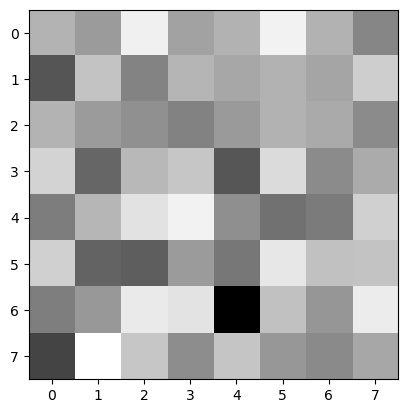

In [58]:
noise = tf.random.normal([1, 64])
generated_image = GEN(noise, training=False)

print(generated_image)
plt.imshow(generated_image[0].numpy().reshape((8,8)), cmap='gray')